In [280]:
import numpy as np
import pandas as pd
import gensim
import logging
import re

import nltk.data
from nltk.corpus import stopwords
import nltk

from nltk.stem.porter import *
from __future__ import division
from sklearn.feature_extraction.text import TfidfVectorizer
import codecs
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import sys
stemmer = PorterStemmer()





In [281]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

In [282]:
from gensim.models import word2vec

In [283]:
import gensim



In [284]:
import random
random.seed(2)

In [285]:
training_data = pd.read_json(codecs.open('Microblog_Trainingdata.json', 'r', 'utf-8'),orient='records')

In [286]:
t2 = pd.read_json(codecs.open('Microblogs_Testdata.json', 'r', 'utf-8'),orient='records')

In [287]:
def cleanText(text):
    text = str(text).encode("utf-8").decode('utf-8')
    newtext = ' '.join(re.sub("(@[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)"," ",text).lower().split())
    newt = newtext.split()
    words = [w for w in newt if len(w) > 2]
    return ' '.join(words)

In [288]:
def merge_spans(train):
        merged_spans = []
        for index,row in train.iterrows():
            if row['spans'][0] != '':
                merged_spans.append(cleanText(" ".join(row['spans'])))
            else:
                merged_spans.append(cleanText(row['spans']))
        return merged_spans

In [289]:
# def merge_spans_test(test):
#         merged_spans = []
#         for index,row in test.iterrows():
#             if row['spans'] != '':
#                 merged_spans.append(cleanText(row['spans']))
#             else:
#                 merged_spans.append(cleanText(row['spans']))
#         return merged_spans

In [290]:

# t2['merged_spans'] = merge_spans_test(t2)

In [291]:
training_data['merged_spans'] = merge_spans(training_data)

In [292]:
training_data['tokenized_sents'] = training_data.apply(lambda row: nltk.word_tokenize(row['merged_spans']), axis=1)

In [293]:
# t2['tokenized_sents'] = t2.apply(lambda row: nltk.word_tokenize(row['merged_spans']), axis=1)

In [294]:
## Test data Removing the rows with empty span 
train_filters = training_data['merged_spans'] != ''
training_data = training_data[train_filters]
training_data.shape

(1673, 7)

In [295]:
# train_filters = t2['merged_spans'] != ''
# t2 = t2[train_filters]
# t2.shape

In [296]:
training_data.rename(columns={'sentiment score': 'sentimentscore'}, inplace=True)

In [297]:
# t2.rename(columns={'sentiment score': 'sentimentscore'}, inplace=True)

In [298]:
training_data['new_senti']= training_data['sentimentscore'].apply(lambda row: 0 if row<0 else 1)

In [299]:
# t2.head(3)

In [300]:


x_train, x_test, y_train, y_test = train_test_split(training_data[['cashtag','id','merged_spans','spans','tokenized_sents','source']],training_data[['sentimentscore','new_senti']], test_size=0.20, random_state=42)



In [301]:
x_test1= x_test
y_test1=y_test

In [302]:


x_train, x_valid, y_train, y_valid = train_test_split(x_train[['cashtag','id','merged_spans','spans','tokenized_sents','source']],y_train[['sentimentscore','new_senti']], test_size=0.10, random_state=42)



In [303]:
print(len(x_train),len(y_train), len(x_test), len(y_test),len(x_valid),len(y_valid))

1204 1204 335 335 134 134


In [304]:
x_train.head(2)

cashtag                  id                          merged_spans  \
151      $VZ  709741154393133056                            overbought   
1538   $INTU  710867849078816768  growing customers globally stay long   

                                          spans  \
151                                [overbought]   
1538  [growing customers globally, e stay long]   

                                 tokenized_sents   source  
151                                 [overbought]  twitter  
1538  [growing, customers, globally, stay, long]  twitter

In [305]:
x_test = list(x_test["tokenized_sents"])

In [306]:
x_train = list(x_train["tokenized_sents"])


In [307]:
x_valid = list(x_valid["tokenized_sents"])


In [308]:
model = gensim.models.Word2Vec.load('all_fin_model_lower')

In [309]:
model['watching']

array([ 0.18225594,  2.42000651, -2.41569281,  0.69263476, -3.5644412 ,
       -0.42235458, -1.21398354,  5.91652727,  2.3058691 , -1.28953135,
       -2.06035995, -2.79737186,  2.68197894,  0.57004428,  0.54688936,
       -3.88889408,  2.72320819, -1.34510231, -0.58553213,  0.14877556,
        2.69371772,  0.13746467,  1.78623152, -2.3544755 ,  0.75761068,
       -2.0086422 ,  2.40244198, -0.80297357, -1.52245212, -1.30653071,
        2.51264071, -1.60332417, -3.83853626, -0.69763041, -3.58881855,
        1.4183135 ,  3.58489513, -3.10508084, -1.14202368,  2.3914299 ,
        2.06303525, -2.03996921,  0.520531  , -2.83603692,  0.30156863,
       -4.54703665, -3.20559692, -1.55080318,  0.19458182,  4.00320053,
        1.95210934,  3.45000529, -0.79137349,  1.00371516,  0.79713494,
       -1.25508559, -2.13108563,  1.2338165 , -1.18678701, -1.13727558,
       -3.74360514, -1.55510128,  3.66983175,  1.27348149,  0.91553283,
        0.53132236, -0.13104308, -0.48729488, -3.3981905 ,  0.66

In [310]:
model.most_similar('offered')

[('gave', 0.6122909784317017),
 ('offers', 0.5952209234237671),
 ('issued', 0.5153627395629883),
 ('provided', 0.5101158022880554),
 ('gives', 0.4862598776817322),
 ('giving', 0.47492527961730957),
 ('offering', 0.474846750497818),
 ('offer', 0.46696561574935913),
 ('backed', 0.46271124482154846),
 ('received', 0.44915658235549927)]

In [311]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook


In [312]:
# defining the chart
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)


Loading BokehJS ...

In [313]:
model.wv.vocab.keys()

dict_keys(['champions', 'inflation-adjusted', '324', 'necessity', 'stifled', 'commentators', '01-14-10', 'non-operational', 'lion', 'royalties', '................', 'open', '-3', 'displacing', 'leaseback', 'lancaster', '1972', 'frequencies', 'brady', 'csg', 'disappearing', '---------', 'rescission', 'redemption', 'bancorp', 'laphroaig', '48-', 'telemedia', 'brightens', 'atlantic', 'narrowing', 'tx', 'violation', 'late-night', 'bondholder', 'samples', 'a.j.', 'inventory-management', '1125', 'spokesmen', 'lansdown', 'louisiana', 'christi', 'mover', 'macintosh', 'senza', 'nec', 'nelms', 'xgeva', 'cck', 'multi-cap', '78', 'brake', 'oak', 'depuy', 'confronts', 'michelmore', 'monotherapy', 'perot', 'behaviors', 'yates', 'attitudes', 'vp', '03-25-10', 'jc', 'manwani', 'hare', 'lanni', 'kenmore', 'principally', 'ration', 'amazon', 'montreal-based', 'peninsula', 'confounding', 'spinco', 'swirled', 'manufacture', 'shed', '1459', 'afterward', 'mazda', 'defenses', 'ssp', '04-27-10', '-------------

In [314]:
# getting a list of word vectors.
word_vectors = [model[w] for w in model.wv.vocab.keys()]


In [ ]:

# dimensionality reduction. converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 38074 samples in 2.573s...


In [ ]:



# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = model.wv.vocab.keys()

# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

In [218]:
# vectorizer = TfidfVectorizer(analyzer=lambda token_sent_only_list: token_sent_only_list, min_df=1)
# matrix = vectorizer.fit_transform([x for x in token_sent_only_list])
# tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
# print( 'vocab size :', len(tfidf))

In [219]:

vectorizer = TfidfVectorizer(analyzer=lambda x_train: x_train, min_df=2)
matrix = vectorizer.fit_transform([x for x in x_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print( 'vocab size :', len(tfidf))

vocab size : 804


In [220]:
from sklearn.preprocessing import scale


In [221]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
        print(vec)
    return vec

In [222]:


train_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in  tqdm( x_train[i] for i in range(0,len(x_train))  ) ])








0it [00:00, ?it/s]

[[ -2.11682010e+00   1.70601439e+00  -2.97737265e+00  -3.28595757e-01
    6.26699090e-01  -3.11341262e+00   1.50099850e+00  -2.77339768e+00
    5.31133771e-01   4.01045799e+00   4.36072975e-01  -5.40957642e+00
    1.45333445e+00  -2.04561448e+00   1.27787054e-01  -8.66400480e-01
    1.62455642e+00  -3.42228007e+00  -3.37496352e+00   1.19955868e-01
    3.78402376e+00   8.18922615e+00  -3.91280293e-01   2.37121153e+00
   -9.28083777e-01  -3.26867032e+00   1.43392611e+00  -7.62510478e-01
   -1.82904971e+00  -6.33604467e-01  -1.19721204e-01  -2.48023033e+00
   -1.30069411e+00   6.86267078e-01   2.90023589e+00  -1.76466930e+00
    2.33073413e-01  -3.51926684e+00   2.49153233e+00  -3.13011718e+00
    1.95921099e+00  -3.74445033e+00  -3.83357191e+00  -2.66124308e-01
   -4.14267683e+00  -1.38689780e+00  -3.62334871e+00  -4.20763636e+00
   -2.82997012e+00   1.11775470e+00   1.70463204e+00  -4.47290468e+00
    2.14018679e+00   1.05704582e+00  -8.02708447e-01   5.12013960e+00
   -3.38323832e+00  

    2.56453276e+00  -6.71687783e+00  -7.20464706e-01   3.43714142e+00]]
[[  1.48746452e+01   2.45604269e+00  -6.91878076e+00   2.28525014e+00
   -7.40221437e+00  -2.64628839e+00  -2.67979415e+00  -2.66873932e+00
   -9.40092305e-01  -8.04124705e+00  -3.48340476e+00   1.52244600e+00
   -3.67177329e+00   3.85266054e+00  -3.02394247e+00   6.12701925e+00
    1.74882669e+01  -1.20078861e+01  -3.76343401e+00   4.04172166e+00
    7.27191114e+00   7.70441151e+00   4.71363767e+00  -4.08665055e+00
   -1.50310834e+00  -3.21671764e+00   4.77316837e+00  -4.87299633e+00
   -8.58861526e-01   4.91646051e+00  -7.55421670e+00  -4.79064528e+00
   -6.24364217e-01   1.18342248e+01   1.27704493e+00   9.12137643e+00
   -2.82637289e+00   1.64469020e+00   9.64391281e-01  -6.44532975e+00
   -4.20348072e+00  -8.07364551e+00  -6.28678179e+00   5.54463561e+00
   -3.22762704e+00   4.38242332e+00  -3.58152127e+00   5.75574557e+00
   -1.46082226e+00   1.14149403e+01   1.42250077e+00   1.11477957e+01
    5.91971874e+00

   -2.77815936   6.11332242   0.30455337  -3.26777379  12.45528698]]
[[  4.13535655  -0.06010346  -5.8498675    4.86455679   3.85103106
   -0.02192225   4.12596492   7.19163768  -2.97256001  -1.10347513
    8.52874851   7.36164077   0.48272135  -0.57047358   3.14880572
   -6.19182401   4.64493521  -6.07763543   3.44796505   4.21692278
    0.15220346  -2.8595676    4.52153899   1.82895587  -1.0056555
   -0.17210677  -2.89958635  -0.19766562   2.50719869   1.03294949
    2.59264266  -3.75446183  -3.03748157   5.05627935  -3.50333198
    7.33148098  -3.84515178  -3.04313572   1.87083383   1.748372
    0.8244825   -4.86965928  -6.21691358  -9.55501707  -1.8366924
   -3.56858605   1.33536983   3.9957273    1.67595072   1.16573684
    1.70995462   3.85854264  -2.055993     6.85575513   5.32472599
    2.59496534   0.12752729  -7.64924622  -1.21938774   4.44085474
   -0.20114152  -7.01344744  -0.08739598 -12.1948475   -1.88685807
    4.39391133  -1.85561401  -5.95083329   5.51343263  -1.837042

   -7.23287463e-02   1.09877634e+01  -1.81249309e+00   7.51280785e+00]]
[[ -3.99130547e+00   3.14136748e+00  -1.07708377e+01   2.72092034e+00
   -6.00121498e+00   4.04852734e+00  -5.89653442e+00   6.98927827e+00
    2.55610836e+00   4.19554937e+00  -3.63490208e+00   8.00177326e+00
    6.38112434e+00  -4.27551974e+00   1.00134368e+00   1.21124780e+00
    1.78192483e+00  -6.48490915e+00  -1.01987095e+01  -1.19131353e+01
    1.03211241e+01   5.64574966e+00  -3.11578178e+00   7.66098123e+00
    5.36933329e+00   6.43809319e-01   4.18892610e+00   9.44319773e-01
    1.11069142e+01  -4.83532460e+00  -3.14245541e+00   7.09104607e+00
   -1.87246768e+01  -6.31196156e+00  -3.94520769e+00   1.13405725e+01
   -7.37261896e+00  -9.14169964e+00   8.86639538e+00  -8.93217864e+00
    2.53875527e+00   1.14265191e+01   6.15347257e+00  -3.90806437e-01
   -1.43177784e+01  -4.11727552e+00  -7.21902819e+00  -9.14100308e+00
   -1.01057998e+01   8.94591303e+00   7.11723385e+00   8.68190346e+00
    5.96173091e+00





7it [00:00, 64.17it/s]

[[  6.51470214e+00  -3.52831015e+00  -9.53815514e+00   9.34831285e+00
   -6.22384286e+00   6.81162649e+00  -1.40987825e+00  -2.43842924e+00
   -2.92150497e-01  -3.26652241e+00  -9.73563313e-01  -9.96335864e+00
    6.13295078e+00   1.52577686e+00   8.47874236e+00  -2.99708474e+00
    8.11231542e+00  -6.40314960e+00  -1.27687259e+01  -3.64315814e+00
    1.89311895e+01   6.68540001e+00   8.41862538e+00  -5.07128102e+00
    3.52650881e-02   8.83331618e+00   3.50502920e+00   9.87740993e+00
   -2.57438040e+00  -1.27934225e+01  -4.81607433e+00  -6.61972117e+00
   -1.07381663e+01   4.35168529e+00  -1.02180734e+01  -2.10789204e-01
    1.09028128e+01  -1.46698122e+01   4.96847177e+00   8.74841452e-01
    1.27452607e+01  -4.45255494e+00  -1.48590285e+00   8.06795096e+00
    6.23330140e+00  -2.09284277e+01   1.91729498e+00  -5.02550900e+00
    6.43011594e+00   8.14178735e-01  -2.69272375e+00   1.21703286e+01
    9.82078868e+00  -1.57448454e+01  -1.13791456e+01   3.90735292e+00
   -1.44944186e+01  

    6.43464335   6.80991961  -5.31892924  -0.93039281  -4.7109955 ]]
[[  6.10943902e+00   3.98740408e+00   2.32031307e+00   4.78788119e+00
   -2.77067884e+00  -4.32218739e-01  -1.55819212e+00  -6.99910502e+00
    1.42088468e+00   1.78127909e+00   4.95145566e+00  -1.57237291e+00
   -2.55447844e+00   2.07735506e+00  -5.95469638e+00   1.53576720e+00
    6.87277135e+00  -6.03884527e+00  -6.53242043e-02   6.42075130e-01
    2.45708698e+00   6.52624123e+00   3.09580057e+00   9.37723722e-01
   -2.23597044e+00   4.46376548e+00   2.89514988e+00  -2.27584663e+00
   -8.09840070e+00   4.35898089e+00  -1.61905663e+00   2.11117404e-01
   -1.07748684e+01   1.45375504e+01   1.06048679e+00   5.43586160e+00
   -2.85470519e+00   1.14700593e+00   6.73769067e+00   1.08142586e+00
   -6.84329674e+00   2.41087066e+00  -5.96292877e+00   2.60680943e+00
   -7.81987286e-01  -1.10370570e+00  -3.68342225e+00  -3.73368468e+00
   -7.74871642e+00   1.80436628e-01  -6.48678303e+00   1.49075723e+01
   -7.51259585e+00   

   -5.93085718   5.48512435 -15.65736866   5.62348592   2.86877346]]
[[ -8.26394081  -1.28025639  12.28976345  14.95531368   0.35795656
  -14.88208961   5.38550329   2.84069085   2.33718348   1.1567688
   10.02793789  -5.87569475  -2.79507256  12.65636158  -4.63174772
    1.48496199   9.26007748  -3.60731435  -8.11309814   0.98836315
    2.02180171   9.57763577   1.43188071   5.75526094   8.61452293
   -3.54297805 -13.50054359  10.12320805  13.86036015  -9.05612755
   -2.76397276   3.56452155   3.85375714   4.58402538  -6.71731901
    9.69871521   5.60259581 -10.03423595   3.52684689   2.0004406
    5.23723316  -0.08617392 -15.84886169  -6.28642178  -4.91644001
  -11.10679245 -10.5395174    8.16857147  -2.28419685  -5.1172061
    9.0939703   16.07260132  -7.65174055  10.68425941  16.79871178
    3.6145668   -2.12629175   2.38059807  -4.17127848  10.43779087
   -5.55536652  -4.01267529  -3.51878071  -5.48420334  -2.1792028
    3.96051931  -4.9355197    9.06132317 -11.6731739  -11.472428

    9.61597443e-01  -2.20990960e+00   3.37233877e+00  -1.38502566e+00]]






13it [00:00, 61.07it/s]

[[  4.42983675e+00  -7.32489061e+00   1.06532335e+01   1.50165157e+01
    5.04617977e+00  -1.84170284e+01   1.99790649e+01   2.43607922e+01
   -1.05172005e+01   9.11987686e+00  -8.08617306e+00  -1.73121243e+01
   -4.53716487e-01  -2.35829060e-03  -3.04561901e+01  -2.79434872e+00
    7.43453646e+00  -1.37709045e+00   8.03095150e+00  -1.27524395e+01
   -1.35348635e+01   1.45667896e+01   2.26449375e+01   1.61399879e+01
   -1.09268951e+00   2.06160202e+01  -5.20157623e+00   6.57839775e+00
    1.77344475e+01   6.87368679e+00   3.52061582e+00  -1.21627436e+01
    1.69175797e+01   2.76557350e+01  -1.68265362e+01   5.84437084e+00
   -9.04162025e+00   1.44835615e+01   1.28193655e+01   1.34253826e+01
   -2.67042446e+00   2.99222260e+01   8.17557240e+00   1.09994173e+01
   -1.13744526e+01   8.55255485e-01   1.97737277e+00  -6.27969122e+00
   -2.83666935e+01  -9.86348057e+00   1.77930737e+01  -2.16723394e+00
   -1.41527090e+01   1.66030788e+01  -6.37037802e+00  -7.22968817e+00
   -4.12649870e+00  

    4.08977008 -13.31020689  -2.37011194  -0.41182327  14.65592384]]
[[  2.20506612   2.06579216  -3.747118     3.3724633   -8.02712403
    7.51687175  -1.96120749   1.23062821  -4.17799926   3.75842151
    3.39545205   8.14756571  -7.96836733  -0.46812927  -3.23705648
   -1.75826264  -0.69567906  -8.69922123  -0.14550498   0.10945749
    2.58877531   5.77227561   4.38117186   0.11452016   5.16163578
    5.08034132  -4.82576611   1.62758666   8.54208607   1.03638069
    2.07254612  -7.19158367  -3.11930886   5.3709518    2.32494038
    3.97680089   4.84844819   0.92887257   1.02443287  -6.74137049
    3.73315954   3.06531107  -1.23182221  -2.47636625   1.71210909
   -5.88700572  -4.09763733   0.05333944  -2.78200935   8.59743957
   -5.03113217   3.81240932  -0.98703119   6.96342852   4.30284794
    5.3276266   -4.41733088 -10.78761125 -12.32837911  -3.78844983
    0.26756263  -6.02039209  -4.01595164 -10.5030067    0.66173343
    1.61379015   6.36038477   2.85286204   0.1632594    2.12

   -1.63049743e+01  -8.19575389e-02  -7.91299061e+00  -1.49768553e+01]]
[[  2.07649493e+00   5.70641577e-01  -2.17097506e-01   1.76476133e+00
   -4.38123322e+00   1.25459981e+00  -1.42338562e+00   7.72432899e+00
    4.03389549e+00   3.84182358e+00   8.21106434e+00   3.80370498e+00
    1.07132220e+00   5.83288956e+00   5.66347408e+00   3.78610873e+00
    3.98308635e-01  -4.56148291e+00  -3.16544485e+00   5.71197367e+00
    2.97553635e+00   2.40011621e+00   1.81914076e-01   4.23899364e+00
    7.04644966e+00  -2.05808496e+00  -3.46336436e+00  -5.65155029e+00
   -1.33176994e+01  -5.59075308e+00  -1.41197538e+00  -5.42411137e+00
    1.60926962e+00  -2.39633369e+00  -9.40390944e-01  -9.28544641e-01
   -8.39890063e-01  -6.71517515e+00   4.97466135e+00  -1.33932662e+00
    9.08294106e+00  -3.04582477e-01   9.29614365e-01  -6.08833313e-01
   -4.36229324e+00   4.11359596e+00  -4.81356525e+00  -8.23419762e+00
   -5.89738703e+00   6.90100336e+00   1.38614786e+00   1.08007848e+00
   -1.38950109e+00

    1.56468552  -5.09668434  -6.16382921  -5.63418067  16.27015281]]
[[ -5.05304241   5.3610763    5.57631379   3.54856968   5.57234414
    0.46200037  -0.26366997 -13.17503536  -9.68602824   7.76684952
   -6.15547037  -6.92143011  -5.10819244   4.42438877  -1.08774865
    0.43400586  -0.47366953 -16.92656004  -2.32451773   9.55948442
   24.34337652   2.66310573  10.15260684   5.58139682   1.79046822
    3.15264571 -23.72731686 -13.42602873  21.86945009  16.43657207
  -12.29862857  11.06758583  -3.59564197   5.90659404  -5.36814451
    5.40819323  -2.86287189  -7.70248413   5.10237455  -8.73770237
    3.55491525 -10.54553886   1.68161869 -11.79966021   0.21530938
    7.31159687 -11.65749788  10.42148733  -4.16595721  -6.32815218
    4.65237175  14.89686632  -4.43785459   9.49021292  21.49063206
   -6.88013458  -0.4157123   20.32182407 -23.09561467  14.89132547
   -7.11126184   0.07080483 -14.01156473   4.19376278   3.77583468
    9.1894834  -11.42393088   2.85772431 -14.7471323    4.35





20it [00:00, 60.94it/s]

[[ -1.01122628e+01   7.49462851e+00  -3.92499240e+00   1.82921581e+01
   -4.11541462e-01   3.48114014e+00   1.99199406e+00  -3.48896766e+00
    1.12096441e+00  -4.63664611e-01   4.52106130e+00   2.88632693e+00
    6.31660128e+00  -3.22185596e+00   2.48893444e+00  -1.90950851e-01
    8.81034430e+00  -3.38521474e+00   8.40700603e+00   1.28475502e+01
   -1.87759399e-02  -1.94424041e+00  -1.72760204e+00   4.45640773e+00
   -8.44707425e+00  -7.96308517e+00  -9.71843227e+00  -2.61324735e+00
   -7.59868701e+00   2.11170685e+00  -7.83540678e+00  -6.97726679e+00
   -5.48912843e+00   4.74936803e+00   1.08340850e+01   6.00254742e+00
   -1.49795176e+01   1.07994610e+01  -6.19550256e+00   6.67201559e+00
    1.32535601e+00   1.39803267e+00   7.69084901e+00   5.34230193e+00
    7.20534960e-01   7.42423058e+00   4.68993870e+00  -6.71651173e+00
   -1.35380332e+00   7.65935918e+00   1.59948335e+00  -1.33060126e+01
   -8.94419837e+00   2.05718955e+01  -8.12774229e+00   6.32722897e+00
    5.40988390e+00  

    8.49607811  -3.48624849  -6.79908382   0.23763164   4.18020253]]
[[  1.29964560e+00   3.07776731e+00  -1.57317214e-01  -5.17121124e+00
    5.43532383e+00  -4.61020082e+00  -4.88569817e+00  -5.54248637e+00
   -2.83586073e+00  -1.26815617e+00   5.82227898e+00   4.92803788e+00
    2.81729126e+00   3.54627174e+00   1.02264378e+01  -8.21486080e+00
    5.49468398e-03   4.30159250e-01  -3.44816613e+00   8.48994777e+00
   -3.99905086e+00   5.59343657e+00   1.62954903e+00  -2.42473340e+00
    7.45628002e+00   9.39332557e+00  -6.42342663e+00   1.05475616e+00
    7.45522156e-02  -9.45662722e-01   9.25065771e-01  -6.73699427e+00
   -5.73446304e-01  -5.06374508e-01  -3.94877756e+00  -6.94371219e+00
   -2.39864078e+00  -2.27438390e+00  -5.48241481e-01  -1.73924917e+00
    1.37221286e+01  -1.86179465e+00  -1.35370263e+00   2.69804826e+00
   -4.79637921e-01  -3.03366208e+00  -1.22550035e+01  -2.30873078e-01
    2.44227491e+00   4.26975545e-02  -5.80847108e+00   2.38757420e+00
    6.17783296e+00  -

   -4.56252940e+00   1.02024353e+00   4.86530014e+00   1.35193443e+01]]
[[  9.21224445e-01  -3.77025455e-01  -6.86368826e+00  -1.57596810e+00
    6.41722359e+00   4.58426639e+00  -6.77107783e+00   8.11614978e+00
    7.19837904e+00  -6.42483339e-01   6.69345095e+00   2.91250090e+00
   -2.91836619e+00   7.48069873e+00   1.06328979e-01   2.87392055e+00
   -7.34700106e-01  -4.00149791e+00   2.66266263e+00   4.62514758e+00
   -3.30503136e-02  -2.55207366e+00  -5.84000913e+00  -4.96354058e-01
    5.21659333e+00   1.24494949e+00  -1.73515068e+00   3.10672639e-01
    1.21830789e+00  -1.39926672e-02  -4.28245677e+00  -3.73460604e+00
   -7.89639463e+00   7.81404481e+00  -2.60617480e+00   7.90848201e+00
   -2.41077379e+00   1.08428008e+00  -2.65413181e+00  -9.24528170e-01
   -5.82276565e+00   4.21955520e+00  -6.76102004e+00   5.14642343e+00
    1.13236547e+00  -1.91384500e+00  -6.82903880e+00  -9.04284894e-01
    9.67527851e-02   5.72252208e+00  -8.26397419e-01  -2.14866711e+00
    4.24408922e+00





25it [00:00, 58.20it/s]

[[ -9.26346481   7.43587446  -3.32532454   6.31624103   6.71124822
    2.54824519  -5.62268555  -1.0188404    1.5285598   -7.06723917
    1.06470966   7.08518863 -10.48823619   8.96410251   0.71496248
    0.6506784    7.73038828  11.74421358   0.87419355  -4.34944332
   -6.76280665  10.44394588 -11.64691019  14.29034758  -0.30924657
    7.03139443  -0.24967051  -5.64495288  -5.12557924   2.82702971
    1.23596454  -6.31154346  -1.90275359   7.94001293 -14.69725418
    1.57301557   2.57536054  -4.84019887   3.34964514  -1.88813543
   -4.70762053  -5.88553405   2.09541821   2.85886935  -4.37010241
   -1.70902994   1.06973433  -8.82111697  -0.54670048   5.69895625
  -10.77866983   0.86993599   2.41654587   6.28169954  -2.29730463
   -5.42086518   9.31697965  15.47851038  -7.90366125   2.56024671
   -6.76161671  -3.09721875  -1.06288385 -11.01898384   6.73781657
    3.56104948  -4.36558425  -2.38249469   7.9913176  -20.08426762
    0.30279732  -2.82042184   4.00992525   6.43045992  -7.3199

   -3.66829737e+00  -4.90599426e+00  -1.46067147e-01   2.62022872e+00]]
[[  1.86781349e+01  -2.28870010e+01  -4.60304737e-01  -8.31325912e+00
   -1.72463870e+00   4.73926973e+00  -6.68917894e-01   3.41110563e+00
   -2.14312496e+01  -8.07472610e+00   2.77596712e+00  -2.98064947e+00
    7.69748640e+00   1.96435499e+00  -3.20704269e+00  -7.80229616e+00
   -1.55327663e+01  -3.23250413e+00   2.29682045e+01   1.87781391e+01
    5.85539007e+00  -5.86979151e+00   7.34957075e+00   1.15182781e+00
    1.04491253e+01  -1.16042175e+01   2.11063938e+01  -3.59325528e+00
    3.59366679e+00  -4.42790842e+00  -5.76607895e+00  -4.17812195e+01
   -1.72652378e+01   1.22819738e+01  -6.47608376e+00   6.06186104e+00
    1.31014719e+01  -1.16399088e+01   1.75661507e+01   3.77085626e-01
    4.79816723e+00  -2.96418118e+00  -7.17411900e+00   3.07944655e+00
   -7.24344873e+00  -3.29136229e+00  -1.48302975e+01   1.41607103e+01
   -7.79026747e+00   2.78180480e+00  -6.91031885e+00   4.24716520e+00
   -1.20786750e+00

   -5.43772244e+00   1.35638332e+00   2.06708961e+01   1.37668607e+01]]
[[  3.074055   -12.49547786   3.70093393   4.98127195  -1.37883413
    5.72805264   0.70689583  -3.07248686   1.52650092   1.89040055
    3.58588719   2.16172143  -3.60635469  -4.7458256    1.72175071
   -0.5644849    8.36367014   4.99109086  -2.27133881   0.41159972
   -0.72396983  12.11601138  -6.08017751   8.21540982   1.52080345
    3.34027757  -1.52374915   3.38001524  -5.73647017  -3.420589
   -6.65519701  -6.02276315  -1.49944922   1.26379309  -2.65411627
    2.35212547  -2.73834113  -7.34599123   0.3947901   -2.68400621
    0.76481222   1.85748519   1.11216017   4.43980635   3.36722354
   -0.77997408  -0.47852984  -2.01331024   3.81010796   0.23960297
    4.87997076  -2.0809506    1.19348363   3.3054501    4.74749024
    4.22095656  -0.3781051   -2.31171518  -6.5667634    2.93016917
   -8.84217794   2.17195381  -4.24383167  -5.62533651   4.41423154
    2.82128486  -0.99419805  -3.8713446    1.71832407  -7.3

   -9.20002972e+00  -6.76771219e+00  -3.62968010e+00   6.78528547e-01]]






33it [00:00, 61.04it/s]

[[ -1.48525552  -8.98958864   6.3736069    4.48087168  11.94974585
   -2.46425405  -0.32548392  -3.96120048  -3.06423517  -3.5555175
    8.89500011   2.29400418  -0.11160378  -2.0817504    4.85583142
  -13.08124181  -8.93803544 -10.57515033  -3.13871944   1.12083258
   10.29911184   4.56712536   1.79813648   5.78482954  12.51486182
    2.26984624  -0.45387381   0.81314039   9.91093536   5.33201525
   -5.47517212  -0.48221273  -7.58091023   5.88332132   0.10803203
    7.64340491   1.28456025   0.09296846   1.42329562  -8.5962584
    2.3877759    3.98041956   1.83084925   1.38239702   1.83358741
   -5.13031065  -9.43393501  -0.25554272  -2.92719722   3.85363877
    3.51734269   7.57078938   0.62739821   0.31348018  -1.61989212
   -2.81283468  -7.89976352   3.06653064  -3.2474339   -1.01312957
   -5.73426456  -2.48180012  -0.92121632 -10.87333369   0.15373735
    8.84229526   0.81873965  -0.75861553   0.60404706 -13.19684009
    2.31822707   8.7480847    7.54423917   7.0716215    5.663055

   -5.59526706e+00  -3.77138455e+00  -6.60435656e+00   7.86019456e+00]]
[[  0.88515246   2.32232094   1.48549      5.86948546  -2.88126993
   -1.55824667   1.23595047   0.12287092   1.7884167   -2.7951738
    8.85102367   6.92033307   5.13988842   0.21986567  -4.53586809
   -8.43719546  12.2127587   -2.8162662    2.35175006  -4.21121351
   -4.5226539    4.58012899   3.08117094  12.60003599   6.05534736
   -0.91786591  -2.93120559  11.88567323   3.88522132  -7.10415252
    6.74247773  -6.53521991  -5.98462009  -1.67585309  -7.07077185
    6.01442361   4.53190366  -1.32659403  -3.30344021  -9.31228578
   -0.18120732 -10.55757395  -6.85350667   3.30754654   0.86689623
   -4.29412572  -6.9899327  -10.55932514 -10.36540814   1.8678142
    9.68999632   3.20177428   2.40405156  -0.63983218  -9.97424531
    2.99846975   6.74669067  -7.1927793   -2.74591891  -4.26220103
   -0.39318085  -2.4790709  -10.26015854 -11.37978156   2.72407472
   -5.56261734  -0.06943909   9.47444369  -2.70258053 -11.1

    1.04025692e-01  -6.16702061e+00   3.68092775e+00  -5.53609514e+00]]
[[  3.67989455  -1.70571492  -5.29036078  -1.63872337  -1.32419767
    6.13446498  -4.55570893   4.51191311   3.37018549  -5.102845
    3.5634757   -1.55960712  -3.02631285  -7.42324522  -4.86359782
   12.46042312   9.30532649  -9.18640456  10.74823847   0.63651485
   -9.32588329   3.18188109   6.68178013   1.81656642   3.95670396
    6.49956417  -3.90057726   7.79669971   9.6962779   -0.05434437
    2.70935047 -10.11922793   1.08344307   7.67483907   6.53934155
   23.6806355    2.96581836  -5.00359243  -5.01426969  -7.84427583
   -5.77964211  14.22774439  -2.46055908  -0.73052282  -7.15583725
   -2.29234234  -9.73296919  12.66446161   5.28108122   2.23827872
    2.38399453   7.05033054   5.93826978  -1.03577006   1.65976868
   -2.27378585   6.0308053   -4.87271804  -4.43840516   2.74092016
    6.55549512  -5.39862976  -2.08457987  -4.58960561  -2.07821615
   -0.67267828   7.30882215  -0.9706214    2.13975091  -8.1





39it [00:00, 60.68it/s]

[[ -7.09319258e+00  -2.93472707e+00   2.78782359e+00   5.00651994e+00
    6.66106886e+00   3.90503167e+00   5.35125744e+00  -4.20712298e+00
   -4.89916426e+00   8.38951111e+00   4.62264907e+00   4.19962096e+00
   -2.06978333e+00  -5.49253881e+00  -4.12565497e+00  -8.98577762e+00
   -6.43164754e-01  -7.91681218e+00  -5.55599171e+00  -3.34417586e+00
   -3.03665018e+00   6.35118008e+00   3.92527872e+00   5.07414252e+00
    4.50178957e+00   2.91380447e+00   8.96763152e+00   4.39070415e+00
    1.26622188e+01  -3.68808174e+00   4.45297837e-01   6.20562145e+00
   -2.79201984e+00   1.10384935e+01  -4.30556151e+00   1.10448063e+01
    5.06106949e+00  -5.18704641e+00   1.59878939e+00  -4.86178493e+00
    3.48475325e+00   1.03451872e+00  -6.37587029e+00  -4.46443570e+00
    1.62450583e+00   8.54514742e+00  -8.19293559e+00  -1.14055386e+01
   -1.00994775e+01   1.00017952e+01  -7.73614633e+00   1.36585464e+01
   -3.00309786e+00   4.52965117e+00  -6.34115934e-02   2.85978600e+00
   -6.81955349e+00  

    1.63310238  -4.21257825   0.25593044   6.08763621]]
[[ -4.57180953  15.72601867  10.38127089   7.69572441  11.31021833
   -9.77742505  12.57976294  10.027776   -10.45605803   9.39218569
    0.23787975  -6.64165115  -0.85029809   2.73003752 -15.32342256
   -0.08414912   4.12725008  -5.02677965  -2.92168236 -15.85702324
   -1.82316589   5.63501096   5.77270555  10.91015816  -3.859442
    3.08074188 -13.60322857   5.24567795  16.90342331   5.30414939
   -0.7194773    4.38106966  12.17183566  25.95830536  -9.06266451
   -3.54431009 -13.66597271   2.82583904  12.39144087  -3.03089142
    3.76939535   4.0962944    5.23961031   2.89764142  -6.0673275
    8.89423007  -2.82936925 -19.79036021 -17.55819297  -2.74588585
    8.20091921  11.07791448  -9.40301919  21.76142979   6.67338681
    3.51818967  -1.02483201  18.04331446  -9.3268683    0.56049144
   -4.29225063  -9.13948488  -4.24394941   7.64931011  -5.88203466
  -12.80859995 -13.75947809  -2.2234807    4.37665057   0.43979073
   21.535

   -2.50715330e+01   1.03718007e+01  -3.56325791e+00  -5.55220286e-01]]
[[  5.48621464  -3.97582579   9.98569012  -3.63869262   9.08318996
   16.74557877 -15.00564384  -3.69560766   8.48114586   8.57171345
   16.2029705   -9.18007183  -1.20056629 -22.24996185  -0.84659529
  -14.7258749   -1.29755807  -4.81424093  16.81364059  -2.70124745
    6.89228725   1.45544374   9.85390854  -4.37871075  -7.7692976
  -23.67072868  29.75956917  12.08154678  -1.21468055  -2.34824848
   -4.24957132  11.25759506 -20.49834061  16.78364754   4.35883188
   -0.69675982  23.29653358  -8.87489128  16.28015137  -7.71039867
    2.78589678  -5.96506071  20.02055931  -9.26023006   3.81260371
   -6.33662653 -13.74879551   1.19600737  -8.30910873  23.49813461
   13.61462784 -13.53488922   3.66416836 -11.79002762  -9.9578867
   -1.39369845  -6.42460442   9.15638828  -7.69686842 -20.29149437
  -13.87085533   6.82686234  13.27956486   8.17815304   7.75635767
   -0.65629548  -4.68664503   3.26044869  -6.03044748  -4.9

   -6.69048123e+00   3.11799763e+00  -1.31362787e+00  -2.51391482e-01]]






45it [00:00, 60.58it/s]

[[  7.25384322e+00   8.31338930e+00  -1.06322215e+01   1.56422706e+01
    1.50114097e+01  -1.21574073e+01   3.90281892e+00   3.51433688e+00
   -5.94602597e+00   1.84773624e-01  -1.14654201e+00   6.76536465e+00
   -1.32206935e+00   1.60007887e+01   7.62203592e+00   3.01200271e+00
   -2.12438893e+00   2.40321712e+01   7.53417444e+00  -4.77851677e+00
   -2.42877216e+01  -1.43240881e+00  -2.29266608e+00  -1.17963505e+00
    4.62348509e+00  -2.81801772e+00  -8.34480309e+00  -1.24836340e+01
   -1.43053651e+00   1.44953685e+01   6.16507173e+00   1.75981445e+01
   -4.08552182e+00  -5.33530712e-02   2.36162543e+00  -3.85110116e+00
    2.28182445e+01   4.55336773e+00   3.71407092e+00   1.00836887e+01
    1.31824732e+00  -1.16483831e+01  -1.53001159e+00   8.47584963e+00
    1.20714531e+01  -1.17805052e+01   3.31321576e+00  -1.21592059e+01
   -1.27811356e+01  -1.24604836e+01  -9.91428947e+00   1.93330765e-01
    7.18726134e+00   1.19108534e+01   6.09265804e-01  -1.11813397e+01
   -7.33200264e+00  

   -3.19739306e+00  -4.11152077e+00   7.88528347e+00   3.72690392e+00]]
[[ -1.08024435e+01   9.61931443e+00  -8.37774658e+00   2.61533916e-01
    6.18571305e+00   6.92359424e+00  -1.11570883e+00  -4.58901572e+00
   -8.88033700e+00   1.36486101e+00  -1.23788452e+00  -5.38640237e+00
   -2.50014722e-01   1.28619447e+01  -1.56999993e+00  -5.54085064e+00
    3.27599275e+00   2.62240839e+00  -2.21635342e+00  -4.12638688e+00
    1.61656027e+01   1.55805087e+00  -1.37983352e-01   1.25043287e+01
    1.10576946e+01   9.74047852e+00   4.39347780e+00   8.87438011e+00
    6.37465882e+00   1.47296891e+01  -1.17807026e+01   1.23404417e+01
   -1.91546931e+01   3.01189631e+00  -5.65945899e+00   1.97158697e+00
    2.56881847e+01  -2.41471660e+00   1.44289746e+01  -1.30770837e+01
    9.43346637e+00   1.85905552e+00  -4.38260639e+00  -7.64157438e+00
   -6.38371822e+00  -1.34073892e+01  -6.17382365e+00  -9.41802025e+00
   -1.39788818e+01   5.89619875e+00  -1.05446333e+01  -1.03030453e+01
    5.38506955e+00

   -9.64464148e-02   3.20145202e+00   3.60867023e-01  -1.56957187e+00]]
[[ -2.88510585  -1.25556242   8.22899246   9.46011353  -6.82141399
    7.50194693  -6.37420225  -8.01454449  -0.3370913    3.56554246
    0.98356783   3.58909178   1.02119684  -2.55369473   8.99978065
    7.14852715   9.63733196   3.89857435  -6.61347532  -6.97146225
   -0.33298972  10.60624599 -12.19984531  -4.72206259   5.26275349
  -12.86935425  11.31101799 -14.25950623  -6.83031702  -8.27079201
   -6.22214508  -1.51216257 -15.06314087   0.0922453    5.12698364
   18.37778473   4.44283724 -11.99973774   9.08480358   0.34283668
    1.38697457 -12.31419086 -14.7036562    0.77964216  -4.08340502
    6.81242323  -3.23540783  -8.68901157   3.84705663   6.17993069
    2.77805042  -5.50530529  17.17444611  -1.95277309  11.4348793
  -10.39300537 -22.7673378   -2.02650857  -3.23628759  -9.95960331
   -9.88278294  -5.03469849   6.37524939  11.15288448   8.31913757
   -1.38222718 -10.47407436  15.67737484  -4.35405731  15.





51it [00:00, 57.70it/s]

[[  1.94299879   0.12094543  -7.17840862   0.6627938    2.58773625
   -2.84567581   2.79020407   5.03950615  -2.0140936   -3.00018485
   11.77878373   1.17196493  -4.08832722   6.55827112  -3.55830066
   -7.1134979    2.32858036  -2.86660075  -6.31963453   3.67993004
    7.56157632   4.13483965   3.82638607   4.80533664   8.1937605
   -0.02481875  -2.69139204   5.33456293   7.6149267   -2.52738132
   -7.13111262  -4.71710625  -2.80729198   3.49780226  -5.64960368
    5.73383069   6.78418187  -5.52835541   6.70575023  -3.24164104
    6.94342688   3.04531304  -9.92718959  -3.44344814  -0.91491346
  -10.49522009  -6.11384282   2.78225925   1.69695652   6.17628392
    1.18698502  10.31583579   5.6243155    1.25116854   1.18745756
    4.06831121  -5.69275661 -13.16888858  -6.79469337  -7.72529311
   -1.5205795   -6.28455658   0.68729529  -6.53569129   2.40270929
    7.13034506  -0.18607149   3.08148718   1.15820835  -6.50607278
   -0.78970004   0.35276532   4.48777037   0.29857001   4.99582

   -1.36992435e+00  -6.34497929e+00  -8.02061796e-01   1.48017027e+00]]
[[ 14.87900448   6.44297582 -14.4416132   -3.79446507  19.18823338
   10.78686953  -7.50711179  -3.64906824  -1.87012506   1.60728437
    4.94055295  -2.02278543  -2.47474915   6.95431161   3.7370708
   12.60885072  -7.15740013  -2.90870309  12.05471325  -9.76009893
    4.84377956  -1.35164356 -15.1874876   12.58701345  19.97225666
    9.47220325 -14.25763607  -5.1329236   15.07911491   6.18828058
    4.94205022   3.25892735 -15.29129505  19.45016026   5.19747531
   -8.97607112  29.26890278   2.02952456   8.87435341   1.55278444
    0.41992545  -0.63290286  -3.33750701  -3.95424318  -2.88772678
  -11.62073994 -12.66823816  -8.86499834 -28.47813892  12.52397156
    1.02462721  -1.66500854   7.29222846   8.80625379   4.96509641
    5.06453276  -3.84961432  -7.05816269  -9.64990449  -8.24900442
   -1.6611976    6.90891385   7.17632365  -6.32862711  -2.95745474
    8.03174508  -6.60758114  -2.83205342   7.23435116  -9.

    4.79310066e+00  -7.29631740e+00  -3.55459870e+00   7.20254239e+00]]
[[ -8.52420998e+00  -1.21126476e+01   6.20156145e+00   5.13857007e-01
   -5.28602123e-01   1.01590064e+01   1.01728257e+00   6.42768894e+00
   -5.17695745e-01  -1.40797391e+01   8.85123491e+00   4.55676291e+00
   -8.21760575e+00   3.15512578e-01  -2.25939111e+00  -4.28061024e+00
   -4.29362106e+00   1.82885249e+00  -1.53953053e+01  -1.36769273e+01
    7.96603378e+00   1.92596149e+00   3.58768962e+00   1.37295464e+01
   -3.94015169e+00   7.77630458e+00   6.51717369e+00  -1.54542192e+00
    2.19737148e+00  -2.63570507e-01  -1.39148881e+01  -3.37960422e-01
    5.96521350e+00  -5.91536045e-01   5.31292931e+00   5.83292357e+00
   -9.88947392e-01  -1.66264145e+00   1.43254907e+00  -3.45470111e+00
    4.65649358e+00  -7.79664358e-01  -7.79107610e-01  -4.48690269e+00
    2.53959856e-01  -5.96389135e-01  -5.43013573e-01   5.55439154e+00
   -1.07279722e+01   9.19922344e+00  -8.47594182e+00   8.17987514e+00
    5.84726469e+00

   14.72529364   0.28724806  -6.15012846  -9.48571978  -1.91021667]]






57it [00:01, 55.26it/s]

[[  1.29964560e+00   3.07776731e+00  -1.57317214e-01  -5.17121124e+00
    5.43532383e+00  -4.61020082e+00  -4.88569817e+00  -5.54248637e+00
   -2.83586073e+00  -1.26815617e+00   5.82227898e+00   4.92803788e+00
    2.81729126e+00   3.54627174e+00   1.02264378e+01  -8.21486080e+00
    5.49468398e-03   4.30159250e-01  -3.44816613e+00   8.48994777e+00
   -3.99905086e+00   5.59343657e+00   1.62954903e+00  -2.42473340e+00
    7.45628002e+00   9.39332557e+00  -6.42342663e+00   1.05475616e+00
    7.45522156e-02  -9.45662722e-01   9.25065771e-01  -6.73699427e+00
   -5.73446304e-01  -5.06374508e-01  -3.94877756e+00  -6.94371219e+00
   -2.39864078e+00  -2.27438390e+00  -5.48241481e-01  -1.73924917e+00
    1.37221286e+01  -1.86179465e+00  -1.35370263e+00   2.69804826e+00
   -4.79637921e-01  -3.03366208e+00  -1.22550035e+01  -2.30873078e-01
    2.44227491e+00   4.26975545e-02  -5.80847108e+00   2.38757420e+00
    6.17783296e+00  -3.63796306e+00   8.44521642e-01   2.83770990e+00
   -2.35903788e+00  

   -2.9242835   -3.88431308  -5.94451792  -1.65818663   8.49963579]]
[[ -0.08289438  -5.94612247  -3.5371114    3.61175859   4.21745372
    1.69458386  -1.29457263  -2.88605216   0.34074858   1.24728218
    0.80636783  -0.49140754   0.60675402  -0.81222607   0.98052412
   -2.59366861   9.62880865  -6.02191516  -5.37258351  -3.40112299
    5.40421504   8.30437386  -0.14650872  -0.61143923  -1.87275463
    7.22355402   5.14173681  -2.96319795  -4.73322141  -4.39311898
   -8.6675731   -2.72267115  -0.98460424   1.08126805  -4.05851668
    7.86294079   6.51319054  -7.48168564   1.55519646  -0.31827888
   12.26755381 -12.48891556  -1.29876271  -3.60864973  -0.65222743
   -4.9024851    2.45820162  -0.53205973   5.93449455  -1.38422324
    1.89989299   1.66409323   6.48919068   2.43080111   0.07379958
   -1.76845375  -5.98412311   4.96223015  -7.7535705    1.65302651
   -6.40461361  -1.97777367   6.64300272   1.64817701  -0.48342875
    3.22810358  -6.50204602  -1.13732147  -3.2624119    3.42

   -1.90967998e+00  -6.05330980e+00  -3.31667964e+00   7.35806471e+00]]






62it [00:01, 54.50it/s]

[[ -2.11682010e+00   1.70601439e+00  -2.97737265e+00  -3.28595757e-01
    6.26699090e-01  -3.11341262e+00   1.50099850e+00  -2.77339768e+00
    5.31133771e-01   4.01045799e+00   4.36072975e-01  -5.40957642e+00
    1.45333445e+00  -2.04561448e+00   1.27787054e-01  -8.66400480e-01
    1.62455642e+00  -3.42228007e+00  -3.37496352e+00   1.19955868e-01
    3.78402376e+00   8.18922615e+00  -3.91280293e-01   2.37121153e+00
   -9.28083777e-01  -3.26867032e+00   1.43392611e+00  -7.62510478e-01
   -1.82904971e+00  -6.33604467e-01  -1.19721204e-01  -2.48023033e+00
   -1.30069411e+00   6.86267078e-01   2.90023589e+00  -1.76466930e+00
    2.33073413e-01  -3.51926684e+00   2.49153233e+00  -3.13011718e+00
    1.95921099e+00  -3.74445033e+00  -3.83357191e+00  -2.66124308e-01
   -4.14267683e+00  -1.38689780e+00  -3.62334871e+00  -4.20763636e+00
   -2.82997012e+00   1.11775470e+00   1.70463204e+00  -4.47290468e+00
    2.14018679e+00   1.05704582e+00  -8.02708447e-01   5.12013960e+00
   -3.38323832e+00  

   23.24762249 -12.50558329  -1.44710732  -3.45192969  13.4788084 ]]
[[  8.35389876  -5.87844626  -4.02032693   0.54258704   7.95124745
    4.289505     0.30237365   2.19896515 -13.19613345  -4.04671759
   10.87311141   5.99859113  -0.14940969  15.97462114  -2.54560804
    3.67518079  -4.56214269  12.26143042  -8.1918389  -11.68501234
  -16.02428913   6.62574065   4.93308179   8.27535804  10.10178844
   -2.68926716  16.76708321   0.72465201 -11.98623943   8.55940517
   -6.37907235  -2.80684654  -5.91192794  11.94762739  -0.42521683
    5.96761457  23.55417951  -7.35727827  -1.22241219  -9.69990571
   10.37000939  10.38919322 -16.57305249   3.90409485   6.5380823
  -16.85482402  -7.18054152 -16.14723651  -9.05494563   4.25566324
    6.60871188   1.21026448  15.16041708 -12.87525241 -17.76686509
    5.6900448    0.97429979   6.15927507  -1.2080874    1.02363205
    5.28122107  -2.22124863   6.09743722   2.75778739  -4.29488341
    4.54932721  -3.32301458   1.2670023    6.87260644 -12.088

   -7.35315768e+00  -8.63555161e+00   8.27879969e+00   4.33062840e+00]]






67it [00:01, 53.36it/s]

[[ -6.51002765e-01   4.55144016e+00  -7.09531132e+00   6.14652438e+00
   -1.64649105e+00   1.19132554e+01  -5.05209593e+00  -9.44908222e+00
   -3.30917263e+00  -9.61346777e+00   1.17896954e+00   9.03333441e+00
   -7.48601246e+00   2.93922778e+00   2.09993998e+00  -2.03966725e+00
    6.95237986e+00   5.34228182e+00  -3.74539162e+00   4.76016013e+00
   -6.46401763e-01   1.15404291e+01   1.67403698e+00   2.36229324e+00
   -1.09787377e+00  -7.89057811e-02   2.19420874e+00  -3.17129205e+00
   -1.24757059e+00  -5.36358670e+00  -1.52875735e+01  -1.02428198e-02
   -6.10873485e+00   1.90295855e-01   2.44446190e+00   5.19211557e+00
    1.06361290e+01   5.33996741e+00   1.55064958e+01  -1.77995237e+01
    2.60737578e+00   6.75996494e+00   8.22714329e+00  -3.37013006e+00
   -5.41259869e+00  -5.63174486e-01   3.07713016e+00  -1.27285868e+01
   -1.01766340e+01   1.83294290e+01  -1.61634096e+00  -6.69057369e-01
    5.54938598e+00   1.86952279e+01  -5.31113513e+00  -2.27510500e+00
    6.13014619e-01  

   -1.11179767e+01  -1.16876604e+01  -5.18684154e+00  -3.57688160e+00]]
[[ -7.38731724   5.18130815  -5.714345     2.68254745   0.96137774
   12.09812045  -1.5115183    0.71909992  -3.77627456   8.81207305
    5.2850408   10.35500979  -7.10346699   3.33536883  -4.33737469
   -1.01961094   1.02438557   1.55821359   1.16198593  -8.9634677
   -4.17803055   8.71434678  -3.6999144    7.79651093   0.11045296
    6.70540118  -1.24677515   1.02387989   0.41637237   0.07113028
    3.00733903  -9.28964949   3.65403265   9.48164749 -11.77484432
    1.96554184   0.75212634   3.02225611   3.52895523  -0.35562658
    1.5635504   -1.48008657   3.10107721  -7.75301242   1.04075038
   -0.29829961  -1.16671878  -4.9799754   -7.48256762   3.61349624
   -2.55767131  -3.72706434  -1.80060825  10.37447661   5.59994877
    1.32393309  -2.05479419  -5.72047889  -6.43481755  -2.98833859
   -5.35775     -1.50012672   1.58379573  -0.1525737   -1.7544876
    5.24137486  -7.65064806  -4.88135019   9.12452814  -0.3





72it [00:01, 52.20it/s]

[[ -7.8706861   -3.9492569  -10.53757076   3.39647927   9.92327046
    3.80358016  -4.52847676  -4.86240595  -0.2879065  -12.52520099
   -1.88907499   1.51616004  -1.20481806  -0.96008215   5.11215925
   -1.82650428  -1.69100099   0.35766153   1.82413578  -1.48579617
   -5.73886976   9.58843305 -11.25756874   3.46343117  -3.1899932
    3.16964397   6.55667224   5.06881786   1.25307937   2.52505821
   -7.97847557  -1.11299222  -5.44514702  -3.99198018  -5.83710124
    6.37675982   3.89916091  -3.44624785  -1.88583884  -5.78414426
   -1.44552023   0.40633502   6.2091012    2.16722655  -8.84950212
   -9.83631015   9.2896708   -1.50440106  -1.43158398  -4.74169855
    6.16402644  -4.60554361  -3.8620693    0.45980973  -9.94816084
    0.5807138    6.07246342   5.39050493  -4.61546338   9.03004012
   -0.98319917   1.9994972    2.17319317   6.33125422  -5.17443266
    0.22335747   0.14403014  -2.4165607   11.8788319  -11.28040037
   -7.21106136   6.11619975  -3.02940154   7.18976784  -0.10978

   -5.16453958  -0.59884274  -5.30926451   1.81873178  -0.24048665]]
[[ -2.06586003e-01   8.01661770e+00   5.91635625e+00  -3.24244998e+00
    5.89530480e+00   3.37622707e+00  -3.52935213e+00  -9.85463146e+00
   -5.03074771e+00  -2.34161019e+00   4.14236887e+00   1.04365234e+01
   -5.63404395e+00   3.54194824e+00  -3.60753511e-01  -4.42248074e+00
    1.23231955e+00   4.75169420e+00  -5.79366336e+00  -6.96096659e+00
    6.68232556e+00  -6.30538225e+00  -8.20885102e+00   3.76866617e+00
   -2.11345196e+00   7.99129804e-02  -8.39544412e+00  -8.79602324e+00
    2.75354553e+00   8.65180604e+00  -6.11072881e+00  -3.06711235e+00
    2.13062849e+00   6.85729421e+00   3.91448907e+00  -5.71661728e+00
   -2.26776648e+00  -5.75124423e-01   2.59629732e+00  -2.37793157e+00
    5.08424695e+00  -9.92836211e-01   4.34255046e+00  -1.19239248e+01
    5.27442761e+00   6.55484955e+00  -4.56319815e+00  -1.30726266e+01
    1.07393881e-01   6.02266113e+00   1.23177834e+01  -4.54766079e+00
   -2.60237201e+00   

    1.06016343e+01   1.05011814e+01  -2.08414750e+01   9.09297593e+00]]






77it [00:01, 51.05it/s]

[[  2.06200755e+00   2.71821153e+00  -5.46548647e+00   1.27043186e+00
    7.05158636e+00   2.23257694e+00  -2.47522295e+00  -1.51310197e+00
    1.06875113e+01  -3.01876068e+00   1.80052162e+01   1.07902692e+01
   -1.21935074e+01   1.90128119e+01   1.82321239e+01  -3.02950376e+00
    7.04680979e-01  -3.75705093e-01  -9.46155712e-01  -1.68634057e-02
    1.24540476e+01   5.99692523e+00   1.58639145e+00   1.47986202e+00
   -2.76386309e+00  -6.55108595e+00   3.05230343e+00   1.51891913e+01
    8.43527901e+00   1.41855483e+01   1.10532111e+00   4.85808074e+00
    1.08113879e+00  -4.75975299e+00  -8.43932986e+00   1.04145603e+01
   -5.14475268e+00  -5.19140273e+00   1.69859865e+00  -7.49624836e+00
   -1.72668040e-01   1.94028570e+00   1.79819244e+00  -6.61068466e+00
   -1.17055418e+01  -5.11512017e+00  -3.15476817e+00   6.20631140e+00
    8.60202822e+00   1.70034947e+01   4.70085621e-01   4.70522134e+00
    4.13676941e+00   1.37363970e-01  -1.40117210e+01  -2.51907279e+01
   -4.40013826e+00  

   -9.45681520e-01  -3.66922868e+00   4.75885196e+00   3.24714193e+00]]
[[ -3.57561290e-01  -6.22275829e+00  -7.27487326e+00   1.74633770e+01
    2.97102089e+01  -1.42752333e+01  -7.09198904e+00   7.58787537e+00
    2.86759543e+00  -1.80839169e+00  -3.86534953e+00   4.89834690e+00
   -7.27912784e-01   1.64922695e+01  -3.88661504e-01  -3.90038729e+00
   -9.93685150e+00   1.98202477e+01   8.50407314e+00  -6.35968637e+00
   -2.59019680e+01  -1.40451307e+01   3.28720975e+00   1.68355236e+01
    6.64378595e+00   4.81190443e+00  -1.06173534e+01  -7.51770782e+00
    3.75621939e+00   1.94839802e+01   3.95100832e+00   1.48351707e+01
    3.66818595e+00   7.27714777e+00   8.93626404e+00   7.69155073e+00
    2.99041767e+01   6.12740374e+00   2.18120742e+00   1.28812990e+01
   -7.51547527e+00  -8.81634140e+00   9.97549653e-01  -4.10013676e+00
    7.90156937e+00  -1.30555267e+01   5.88679361e+00  -1.22205658e+01
   -6.38973808e+00  -1.08918142e+01  -1.13794384e+01   1.16996260e+01
    5.60426760e+00

   -8.79934907e-01   5.12830591e+00   1.62856972e+00   3.05502701e+00]]
[[ -1.01712835e+00  -5.89327514e-01   7.65656352e-01   5.01492596e+00
    3.36157322e-01   1.21625013e+01  -9.09269810e+00   2.77942348e+00
   -1.91066189e+01  -3.78190064e+00   2.57800126e+00  -1.45415659e+01
    7.35819674e+00   8.85500717e+00   6.94343424e+00  -3.81317425e+00
   -6.84880781e+00   5.54440308e+00  -8.97247219e+00   1.51120341e+00
    1.18560925e+01   1.46869373e+00   1.61788521e+01  -7.14789510e-01
    3.27138472e+00   9.42267120e-01   3.30155921e+00   1.46847382e+01
    1.22697668e+01  -3.06288481e+00  -9.65330791e+00  -8.85043335e+00
   -9.16029644e+00   1.94904852e+00  -1.19514723e+01  -1.15503569e+01
    2.19931107e+01  -8.49548149e+00   1.10601711e+01  -3.35291958e+00
    1.27282639e+01   5.97389841e+00  -4.23414707e+00   1.04659042e+01
    1.00637436e+01  -1.77794533e+01  -2.28266191e+00  -6.99539185e+00
   -4.55340719e+00   1.05175483e+00  -1.79594021e+01   9.51889801e+00
    7.64172196e-01





82it [00:01, 50.70it/s]

[[  3.15556432e+00   9.00478847e+00   8.78691787e+00   4.09068296e+00
    5.30143018e+00  -8.24657512e-01   1.37273103e-01  -3.53098981e+00
    2.12950645e+00  -4.50498154e+00   8.36075163e-01   3.00243399e+00
   -3.82691753e-01  -1.55076957e-01  -1.39893069e+00   1.01981443e+01
    4.56606150e-01  -7.22909517e+00  -1.02867634e+01   2.00435781e-01
    1.67893165e+01   3.62181811e+00   4.06039259e+00   6.55757674e+00
    3.31349823e+00   5.66806340e+00  -3.64592224e+00  -3.62986598e+00
    9.87673790e+00   7.34386089e+00  -2.52567351e+00   2.45429507e+00
    1.62293987e+00   5.68815496e+00  -2.77846059e-01  -4.49329146e+00
   -2.44335849e+00  -4.08263714e+00   9.08721215e-01  -6.34324071e+00
   -5.71854129e+00  -4.59212606e+00   4.51148045e-01  -1.03087066e+00
    3.85841131e+00   3.75884705e+00  -1.09997865e+01   7.01467024e+00
   -2.17603035e+00   1.15415936e+00   5.29385209e+00   7.05018420e+00
   -9.85332343e-01   5.60143329e+00   6.88555561e+00  -1.12680753e+00
   -2.82196202e+00  

    1.80996363  -4.48999779  -5.33449749  -1.40836419   1.6434375 ]]
[[  9.15812111   5.22416687  18.00958252  -9.66241646  -9.14936829
    1.12158716  -3.08681011  -5.9903574   -7.57411957  -8.26021099
    0.43317178   3.67064786   9.41413593 -21.733675    -4.18984365
   -0.11696985  17.12164497   4.22216892 -11.69087791  28.32618904
  -12.26839256  13.77662659   7.73303509  -2.44894409  15.43011284
   -8.44318485 -10.44184589  19.00890732   3.16881132  11.16612053
    9.85075569 -18.72383118   6.04563475   6.45269156  12.27103996
   10.61159706  19.3649826   -5.47834587   3.97139192   1.64881802
   10.10481453  -2.0210216    7.68504715 -25.43646622 -10.27498531
    4.6559329    2.43046618   5.7365036  -13.59749126 -23.78227425
   -5.39206696   2.42162013 -14.41048336  -3.03462625   0.97683907
   24.04686356  -2.5217073   -9.12253952   2.0034647    4.01666784
    6.31320429   6.84287834  -2.82319021 -38.77254486   4.07882833
   -5.76027679   5.11676311  -4.06114912  -6.78586578   6.29

   -2.24971497e+00  -5.66247499e+00   3.31448078e+00   1.30359566e+00]]
[[ -7.62004395e+00  -4.91226039e+00  -9.89861584e+00   7.29726715e+00
    5.50501251e-01  -1.84838927e+00   1.24033663e+00  -5.09885830e-01
    8.49617767e-01   4.03516102e+00   4.55827718e+00  -1.49381915e+00
   -7.07956629e+00  -1.62714512e+01   4.88819066e+00  -7.19485581e-01
   -9.82761383e-03  -7.03159285e+00  -6.56671554e+00  -4.64831743e+00
    7.57671700e+00   1.00839667e+01  -6.77825994e+00   1.16535177e+01
    4.85106659e+00   7.97228327e+00  -6.40841169e+00   1.43555722e+00
    2.48740574e+01   2.66732581e+00   2.71954398e+00   2.60930341e+00
   -6.72755852e+00   3.16462386e+00  -9.34036961e+00   8.68367052e+00
   -2.17349170e+01  -5.20183129e+00  -2.96604874e+00  -1.42331371e+00
   -5.10805491e+00   5.39616810e+00   8.20910645e-01   8.73002516e+00
    2.76262070e+00  -9.67141027e+00  -3.45055027e+00   1.00720000e+00
    1.05685579e+00  -2.38291254e+00   4.19644413e+00   1.58109350e+01
   -1.21821495e+01





88it [00:01, 50.91it/s]

[[  1.30937201   3.42429598  -3.94522336   1.04652129  -5.25852525
    7.23367381  -7.49460918  12.27107704   1.45384505  -8.42945296
   -2.85847348   3.9104296   13.72493047  -5.67607248   2.4642511
   -7.71543312   1.37793911   3.67147803   2.99407965   5.39500059
    2.1953063   -0.80046293  11.4868623   -0.88752031   5.96152914
   -1.98071057   7.68574253   2.89717898   2.55451339  -8.13534462
    7.89280272  -7.93077308  -7.31486928  -1.29580754  -6.63908207
    1.76458498  13.03469044  -3.37571931  -2.12322009   6.72833389
    3.72589463  -6.58210975  -1.74636626  -3.53248888   9.15803435
  -14.84121943  -3.632446     3.21107757  -1.9853397    3.58425996
    1.0810622    9.21868406   2.51061466  -6.30535412  -8.74234772
   -2.72171474  -4.68166712  -1.88582897   0.11299455   2.85537338
   -6.64463979  -6.81689811   3.90920474  -1.62147272  -3.02607179
    4.26613727  -2.54749437   2.25425616  -4.53730958  -2.40574741
    1.11969     -1.24163957   6.4315933   -7.86495246  -1.71655

    1.60977172e+01  -7.10774732e+00   5.60958227e-01  -6.17438110e+00]]
[[ 20.27190757 -11.53543341  -0.93383429  -0.05397773   8.73985362
   -8.30136275  -2.58772445  -0.28786111   5.26085036   0.05218363
    1.21270585   5.48527443   2.39988327  -3.85744017  -9.29881871
   -5.38056463   2.39732625  -4.86357681   3.5467999  -10.22375651
   -1.90579945  11.09567402   1.29165184   2.63496578   7.09204221
    5.7278598    8.01475376   3.38768226   2.60223879   3.03417305
   -3.62311482  -4.81001735  -2.56553037  -2.43329811  -2.7985878
  -13.91722512  -6.69224471   1.13560175 -17.30200668  -4.84191344
    8.69275141   3.92691746  -4.58074731   7.11969675  -0.6017426
    1.63316035  -7.40334892   3.80267262  -2.0357269    6.43249553
  -14.74853182   7.75228225   1.43809044  -8.11298883   2.27699816
   13.49029261  -7.55451532  -3.55484819  13.19378424   0.47762395
   -1.56663544  -7.6564151   -8.85305452  -6.19769216  -1.28203669
    9.48076701   2.94523847   0.50128323  15.57173413  -9.7

  -11.79458141  42.26450348 -28.59854507  -3.45026517 -41.46595001]]
[[ 10.15411479  -0.2680834   -6.97987643   1.79405495   1.63082445
    4.86493654  -3.71320828  -1.13745131  11.02305511   3.94723382
   -5.53812359   1.81949634   3.87098094   4.5157259   -7.46379697
   -6.30423507   8.31230624  -7.44113239   6.88028054  -3.22077617
    6.46842334   6.8071242    4.18616397   3.70612698  -4.68003389
    2.9678731    0.91260103  -3.62874363   3.10808916   2.5810489
    1.81040304 -11.38684678   9.5918668    0.68241262   1.08064965
   -3.68561433  -3.0001984   -0.22298838  -9.46020581  -6.02325765
    4.38320066   2.6422941    2.09226227 -18.15896007  -6.63188597
    3.92917244   0.02432201   9.59811717  -4.21947309  -3.03810544
    3.54780851  16.38047801   4.75526416  -0.6686569    0.37385256
    0.82141263   9.88532414  -0.24844078   3.09785388   9.71534535
   -6.7094702    1.24957637  -6.14206714 -17.82932145   1.2763646
    4.30488105   7.28902572  -7.20216509 -14.50211103  -3.0667





94it [00:01, 51.36it/s]

[[ -3.57561290e-01  -6.22275829e+00  -7.27487326e+00   1.74633770e+01
    2.97102089e+01  -1.42752333e+01  -7.09198904e+00   7.58787537e+00
    2.86759543e+00  -1.80839169e+00  -3.86534953e+00   4.89834690e+00
   -7.27912784e-01   1.64922695e+01  -3.88661504e-01  -3.90038729e+00
   -9.93685150e+00   1.98202477e+01   8.50407314e+00  -6.35968637e+00
   -2.59019680e+01  -1.40451307e+01   3.28720975e+00   1.68355236e+01
    6.64378595e+00   4.81190443e+00  -1.06173534e+01  -7.51770782e+00
    3.75621939e+00   1.94839802e+01   3.95100832e+00   1.48351707e+01
    3.66818595e+00   7.27714777e+00   8.93626404e+00   7.69155073e+00
    2.99041767e+01   6.12740374e+00   2.18120742e+00   1.28812990e+01
   -7.51547527e+00  -8.81634140e+00   9.97549653e-01  -4.10013676e+00
    7.90156937e+00  -1.30555267e+01   5.88679361e+00  -1.22205658e+01
   -6.38973808e+00  -1.08918142e+01  -1.13794384e+01   1.16996260e+01
    5.60426760e+00   1.40405846e+01  -5.34108067e+00  -1.58370094e+01
   -8.79668236e+00  

   -5.29576627e+00  -1.56828951e+00  -3.01896675e+00  -8.62398042e+00]]
[[  1.15201535e+01  -1.60045705e+01  -2.38469963e+01   2.68330669e+00
    1.90708300e+00  -1.68799150e+00  -1.44908209e+01  -3.19098568e+00
   -2.99163419e+00  -2.19787645e+00   1.20161657e+01   1.06977803e+01
    4.39091182e+00   6.63704395e-01   1.15604720e+01   7.26744527e+00
   -3.72507289e+00  -1.56936698e+01  -1.28850460e-01   5.53421593e+00
    3.79281044e-01  -2.51725302e+01   5.78999165e+00   1.48261495e+01
    4.83238459e-01  -7.57572174e-01   7.34033895e+00   1.48993962e+01
    5.86553574e-01  -3.61130571e+00  -3.84699173e+01  -1.16878181e+01
   -3.21385384e-01   4.64202070e+00  -1.61768341e+01  -1.70735528e+01
   -8.49127157e+00   4.05136693e+00   2.17616959e+01  -3.44242287e+00
   -7.44658756e+00   1.07096310e+01   7.34503567e+00  -2.18093677e+01
    3.88748266e-01   4.66659844e+00  -1.00264280e+01   9.23740089e-01
   -5.75256157e+00   5.47118139e+00  -8.92081308e+00   2.18086786e+01
   -4.58718801e+00

    6.66766008  -9.36301963  -5.47393123  -3.3548193    5.64830844]]
[[ -1.92197537   4.47583592 -11.42348814  14.8475194   -0.49685007
   -6.90809989  -3.26000571  -7.60758734  -9.63068008  -5.71649981
    9.89718211   9.98837638  12.62490177 -14.94160604   9.70362639
  -13.96010256  -7.4869349   13.77173567  -7.28705502  15.91213244
    5.20346367  -1.79206038  -7.40015855   9.35483742  13.55705178
   11.39954352  -8.56626534   9.29256701   3.75389935   2.00774884
  -11.21459341 -15.87413412  -2.59620261  15.12564993  14.64953041
    6.02524051   0.44320247   3.12874424   0.9241761    5.71128482
   -8.12118316  -1.63100004  -5.59247541  -4.05810726  -5.0178026
   -1.43173072  -6.05307579 -10.87712932   9.52479612  -0.25439024
  -19.29114199   0.20044613 -12.11603928   8.90572131   0.77305031
   -0.22788334  20.28424811 -11.47985578   1.84914303   9.98514915
   -8.06046698  10.93315673   2.79044271 -28.46418953   5.48642135
   10.4418118   -6.10055393   0.89456606  -5.10518575   3.048

   -9.07207235e+00  -1.05928402e+01   1.56178721e+00   7.68423398e+00]]






100it [00:01, 51.74it/s]

[[ -3.40442951   0.68937821 -10.90773864   4.68158371   3.29655838
    6.47218397   0.45430956   8.20167327   2.54905512   5.80956984
   14.34891796   2.73101542  -5.50561056   2.60781507   8.96847429
   -1.01885197  -0.2721568   15.29460335   1.95107222   2.44437304
    3.05405214   9.11898684  -7.5762308    4.47866688  11.69680542
    5.81310105   3.14687315  13.35277128 -11.2624404   -5.22103206
    1.08514979  -1.08037832   1.96029155   2.77110846  -2.65110605
    1.48768106  -1.63895206   1.32626388   7.64199495   3.24468927
   -1.79226598   3.8216416   -1.90840719   1.86660395  -0.08883386
   -1.24550401   0.82560512  -9.31363746  -5.95430901   1.72777369
   -7.10326901   1.70750666  -7.50000072  11.03294864  -6.05171751
   -1.11287411   0.44015243   3.85746379   4.52282767  -1.01928066
    1.70171659   9.36960654   1.39977634 -12.55901706   3.51515665
    5.55877333   4.58891881  -0.15062838  -4.00797702  -9.70835924
    9.45309668   2.96704519   8.23572764   6.47065237  -0.1650

   -1.14511789e+00  -5.36589088e+00  -5.53521305e-01   2.72755972e+00]]
[[ -1.50614691e+01   6.00686264e+00  -3.72948384e+00  -3.41849160e+00
    1.29383078e+01  -3.47716618e+00  -4.89607430e+00  -5.90996599e+00
   -6.60383034e+00  -2.34578681e+00   1.09664669e+01   1.50469618e+01
    3.25477928e-01  -4.56585360e+00   9.33996439e-01  -2.58515873e+01
    8.24687290e+00   2.93834782e+00   3.20009899e+00   2.86817908e+00
   -8.32685375e+00   1.10269940e+00   3.22466993e+00   9.79733086e+00
    9.64316559e+00   1.06136351e+01  -2.82124090e+00   3.89554113e-01
   -5.55338383e+00  -1.24948788e+01   6.13142395e+00  -3.30401206e+00
   -8.34839535e+00   7.92977905e+00  -2.08908997e+01   1.06250191e+00
    7.47475767e+00  -1.00003405e+01   1.96690047e+00  -6.56715631e+00
    4.14159834e-01  -2.96924973e+00  -2.57151070e+01   5.72633839e+00
   -3.71581006e+00   5.89357948e+00   5.21778488e+00  -2.08986759e+01
    2.89058995e+00   7.48665380e+00   8.64257574e-01   8.82121372e+00
    1.52580214e+01

    5.33339258  -1.52182333   1.03855282  -0.29310326  -2.76217031]]
[[ 12.31079102 -22.83787596  -1.50825202   0.58365583  -3.66558647
  -12.06630659  11.95794487   2.07134962   3.63256431 -23.22865295
    1.49386501  -7.45049894  -0.61588228   9.01763844   0.21915722
  -18.393013    15.84029531  -6.36020613   8.83826065 -14.33532
  -18.46846104 -16.11855367   7.10008049  -0.99643755 -21.69577885
  -12.53865974  -5.02265     25.65345383  -8.39861441 -11.53754663
    3.52162528 -38.86808586  15.42126369  -5.83174658   5.81474853
   10.76036572  -6.57289624 -10.42808731   2.59954345  -0.13553143
  -19.49824119  -1.1616112   16.61508322  -9.00075293 -15.27044868
   11.49883506  21.7220335   27.78952408  -4.59991843  -0.46387625
    0.50628376 -12.64140272   0.76105976 -12.52969337  -7.85120201
  -18.18603706  20.910326     0.85841465  -0.3335886   -6.08659977
   12.73662424 -13.23617619   1.64648962  17.24796677  -5.24490142
   -3.64641166  14.48833823 -12.80070117   3.42471981  -8.27205

   -1.81630937e+00  -1.20391996e+01  -7.84437287e+00  -1.80232207e+00]]
[[ -8.08265750e+00   8.77849070e+00   9.96466708e+00  -2.51106723e+00
   -8.30349048e-01   7.81846652e+00   4.82033992e+00  -1.37068705e+01
    1.08720184e+01  -1.15065479e+01   8.49692094e+00   1.82663031e+00
   -2.52228747e+00   1.21291494e+01   8.83612482e+00  -8.90338977e-01
   -1.30306766e+01  -6.04064910e+00   1.01358998e+00   1.50408896e+01
    5.13738187e+00   6.63652436e+00  -2.90296976e+00   6.62571589e+00
    1.08100126e+01   1.27722794e+01  -1.00943594e+00  -7.49776880e+00
   -6.92591508e-01  -1.83719683e+00   1.99261715e+00   1.72732051e+00
    2.28963856e+00   1.93513708e+01  -6.63585504e-01   2.95362298e+00
    7.79332129e+00  -8.95160242e+00   9.08738674e+00  -5.21863627e+00
    4.04642628e+00  -5.56654175e-01   9.68158690e+00  -8.41304461e+00
   -3.60997725e+00   4.11376973e+00  -8.96374570e+00  -6.50928817e+00
   -3.03223864e+00   1.45896331e+01  -1.21296393e+01  -5.44736036e+00
   -3.04852804e-01





107it [00:02, 52.35it/s]

[[  3.01054080e-01  -1.30525843e+01   3.68281714e+00   2.98062722e+00
   -1.91084480e+00  -3.42753665e+00   4.64718755e+00  -9.10920747e+00
    1.37524440e+01  -1.40922194e+01   1.66615591e+01   1.12137771e+01
    1.72364561e+00  -3.85799607e+00   2.77561911e+00   6.31583532e-02
   -9.89589373e-01  -9.03451665e+00  -1.13150733e+01   3.58998251e+00
   -8.96295929e+00   8.12886508e+00  -5.92217982e+00   1.90638642e+00
    2.41659101e+00   4.52250828e+00   9.84435459e+00   8.25332240e+00
    9.94620363e+00   5.34656334e+00  -9.39396795e+00  -4.55589716e+00
   -1.15488958e+00  -5.58947635e+00   1.73903869e+01  -3.56373792e+00
    1.20834901e+01  -2.84266790e+00  -3.41728799e+00  -3.86681207e+00
    1.48836517e+00   6.40066727e+00  -6.41683952e+00   9.36005402e+00
   -2.08391722e+00  -6.97372087e+00   1.61864519e+01   1.00059015e+01
    4.23770038e+00  -5.04357688e+00   5.94981877e+00   1.10530090e+00
    1.16235674e+01  -7.50761636e+00   4.88126167e+00  -3.62585068e-01
    6.33288689e+00  

    2.72044277e+00  -1.52938644e+01   4.63409150e+00   1.40889817e+00]]
[[  4.75260154   2.8903608  -12.56720018   6.3724755   -3.47510829
    4.21493135   5.72058054   1.01171807  -2.78883874   4.75217718
    0.86826586   4.08478439  -3.15864281  -5.91733917  -8.1109677
   -3.65869323   2.96386145 -10.33845409 -11.19057977   7.4843392
    9.05343636  11.89525359   1.89563147  -1.34658591   4.93683137
    4.76890477  -1.3966499   -3.56563057   8.59379077   6.61542327
   -6.7788535    4.15750865  -5.35087379  11.80547754   1.91637385
    8.01486826   4.31340841  -5.20466272  11.34351164  -1.66879861
    3.33075753  -2.21460911   3.25284235  -2.70229474  -1.03589255
   -4.4671514  -11.8664302    3.77746056  -5.74556891   8.00355666
   -1.36487786   7.48407073  -2.88733005   3.53752914   6.09590626
   11.83101741  -2.37077836  -6.59116471  -9.73933812  -7.27418458
  -13.42088709   1.16939497  -2.04878123 -11.16134596   2.70895926
    4.67088723  -7.73700726   4.39854799   7.63115009   7.0

   -8.93616378e-01  -3.86450982e+00   6.69419515e+00  -5.10955304e-01]]
[[ -4.86403382e+00   6.19035953e+00  -9.45768940e+00   6.62058827e+00
    1.21830350e+01   4.53639540e+00  -6.93074048e+00  -4.10899952e-01
    4.99287462e+00   2.47791290e-01   8.36412036e+00   8.42351392e-02
   -1.37211323e-01   6.62351251e-01   3.58988237e+00   5.62691686e+00
   -4.10059565e+00   9.11126208e+00   6.73583049e+00   9.47907245e+00
   -3.34676945e+00   6.36464339e+00  -1.15759422e+01   3.59079599e+00
    1.07639431e+01   1.03737220e+01  -1.01814458e+00   1.74496538e+00
   -1.15808237e+00  -4.01131883e-01  -4.88896042e-01  -6.55589306e+00
    1.62767205e+00   1.07039210e+01  -7.74114320e+00   5.83981395e+00
   -1.90639663e+00   1.03826147e+00   7.59779310e+00  -1.21309757e-01
   -8.00623077e+00  -1.42941047e+00   5.31676775e+00  -3.36835194e+00
    2.34732717e+00  -2.72283050e+00  -1.71724126e+00  -6.82906149e+00
   -8.84595942e+00  -1.89755797e-01  -7.29209995e+00   7.32451302e+00
   -8.98554718e+00

   -1.01484728e+01  -7.73913171e+00  -4.92480826e+00   1.21306862e+01]]
[[  4.08027846  -7.37893637  -2.61699564  -0.22729747   7.37996658
    0.20249841  -7.11640923  -3.13399591   3.03015147   4.70693755
   -0.65904816  -6.39946961  12.28346868 -12.37598401  -0.99030781
   -8.66358952   2.61950866 -10.72135401  -2.11989482  -6.54405137
    7.92834579   2.62203964   0.80349294  -2.21665279   0.70716443
    4.28661903   1.82470181   0.18302715  -1.41963601   4.86291011
  -12.54639482   9.56721431  -2.90231991  -4.54909484  -2.7481068
   11.02180394 -10.77374768  -4.37253866   9.28613096  -3.36129251
    0.1660219  -11.06791353  -0.3757322   11.17004649   0.80436142
   -1.5910538  -10.54958169  -4.69161638   0.03144493   4.46060805
   11.92970506   2.7020932   -1.94037127  -4.1367112    3.65970151
   -1.66656303   5.37502736   7.26880328  -9.39515853   6.50484711
  -12.47876386  -2.66608079  -5.69280623 -11.30241156   2.30667933
    2.73297145  -6.12684838   8.29292674  -6.95074085  -3.





115it [00:02, 53.39it/s]

[[ -3.4672122    0.36211061  -3.40345895  19.11199331   4.23436236
    7.75273463  -5.77309465  -4.45980708   7.39236152   1.96221828
   -2.48047131  -0.73499727   4.44739762   1.64725113  -3.73949599
   -7.26539552  13.05411816 -17.06570721 -16.35381651  -6.92033875
   30.97657204  21.3757658   -9.68686938  -8.2271297   -5.10810643
   12.10398579   6.04111063   6.61252439   8.70353615   6.66600275
  -15.66182375  12.90853405 -18.5586462    9.59927654 -11.26957512
    6.35821581   7.94590998 -19.07407093   8.21512389  -5.41531742
    3.29553628 -14.12078118   0.45293951   4.97525454   6.09432334
   -4.66230655   1.56519985 -16.41143656  -3.70761853  14.5905962
   -1.51608181  14.87700522   2.41761613  -3.17777839   3.83135438
   10.36497372  -8.97286534  -7.32099009 -21.69256926 -11.20767069
  -23.8050909  -13.92457056  -3.62772653  -5.88414288  -1.17189336
    0.61843944 -12.67155886   3.99220143 -13.3646481    1.42963338
    6.18548024  13.01421842   4.33518994   6.75934845 -12.46575

   -3.14850997e+00  -1.24096289e+01  -5.91750622e-01   1.21387050e+01]]
[[ 14.87900448   6.44297582 -14.4416132   -3.79446507  19.18823338
   10.78686953  -7.50711179  -3.64906824  -1.87012506   1.60728437
    4.94055295  -2.02278543  -2.47474915   6.95431161   3.7370708
   12.60885072  -7.15740013  -2.90870309  12.05471325  -9.76009893
    4.84377956  -1.35164356 -15.1874876   12.58701345  19.97225666
    9.47220325 -14.25763607  -5.1329236   15.07911491   6.18828058
    4.94205022   3.25892735 -15.29129505  19.45016026   5.19747531
   -8.97607112  29.26890278   2.02952456   8.87435341   1.55278444
    0.41992545  -0.63290286  -3.33750701  -3.95424318  -2.88772678
  -11.62073994 -12.66823816  -8.86499834 -28.47813892  12.52397156
    1.02462721  -1.66500854   7.29222846   8.80625379   4.96509641
    5.06453276  -3.84961432  -7.05816269  -9.64990449  -8.24900442
   -1.6611976    6.90891385   7.17632365  -6.32862711  -2.95745474
    8.03174508  -6.60758114  -2.83205342   7.23435116  -9.

   -4.59379470e+00  -2.52692213e+00  -3.04905251e+00   6.11423349e+00]]
[[  0.29428837  -4.73116382   2.45563204  -0.548209    -6.77321982
    5.83720725   2.39254792   5.65161302   2.84404299   3.75471663
    1.36635741  -2.23322411   3.16994801  -2.34105244   6.87230065
    5.68258466  -3.66226847  -2.2112874   -1.92715461  -2.44285975
    0.8647644   13.73328543   6.05199571   3.14715816   3.7092273
    6.00834498   3.17306926  13.20963631  13.40392227   0.58898066
   -0.66154642  -1.84666159  -3.35134487  10.96964495   2.58522587
   -0.43161249   0.74654627 -10.83666053  -4.15741158  -5.96361589
    3.35670872   4.10675473  -4.34287307   5.01397557   0.63082805
  -12.35494429  -2.48665323  -1.7904644    0.72931676   0.53025415
   -1.97026625   5.45724821  -4.51806123   2.49692955   5.05542307
   11.18976333   5.95661069 -14.40606308  -1.81091175   1.88326103
   -2.47924385   6.55187445  -4.61788601  -3.35681924  -0.46521033
   -1.43790084   1.11741266  -2.14045668   8.60684274  -6.





122it [00:02, 53.76it/s]

[[ -2.65309715e+00  -1.15906711e+01  -5.57848438e+00  -7.67454306e-01
   -2.69104628e+00   4.04354350e+00  -2.56129742e+00   1.01083048e+01
   -6.53397369e+00   8.57438119e+00  -7.13405689e+00   8.52738841e+00
    3.06909815e+00  -1.11963995e+01   5.41359605e+00  -1.27321676e+01
    6.89111884e+00   9.01394463e+00  -2.35675136e-01  -3.04541183e+00
   -8.05441380e+00  -1.20296546e+00   1.10600576e+01   1.16685038e+01
    5.08766206e+00   3.24475893e+00  -1.06978826e+00   1.21123656e+01
    9.15334068e+00  -6.84682405e+00  -1.21719400e+01  -1.48594467e+01
    9.53491614e+00  -5.30353053e+00  -3.36137231e+00   1.53165278e+01
   -5.94852785e-01   1.60801411e-01  -4.41629871e+00   1.25924667e-01
   -2.31144317e+00  -1.35091718e+01  -5.88105520e-01  -1.82827682e+01
   -9.24353520e-01  -1.42717156e+01  -1.45217673e+00   1.13905508e+01
    6.15458341e+00   2.73653940e+00  -1.70886427e+00  -4.00199016e+00
    1.31251621e+00   1.86368450e+00  -3.31882111e+00   1.17658031e+00
   -2.65719601e+00  

   10.19153274  -4.89859056   4.84222022  -5.00155351   4.45997675]]
[[  9.97878087  -5.3952862   -0.15708242   2.73405834  -1.97767117
    9.55035654   2.40612574   0.58239371   0.71843139  -0.95725892
    0.48378774   5.09560684   5.91798371  -8.64389686  -4.62720605
    0.0848968    4.60785207  -0.23368724   1.37159076   1.8064583
    4.75968452  11.27829925  -0.46357059   7.58906007  -6.67111522
   -5.09938364   0.93274522   7.89129198   7.31809425  -0.4362129
    1.0133756   -3.76957312  -6.122556     7.32452146   3.24928677
   -1.44110239  -1.11344871  -1.09698455   4.65016715  -5.31333544
   -0.67915595   2.7498468    2.50025837   4.26670278   4.51384604
   -0.76379212   1.15676486   4.45752713  -6.48385338   6.90577519
   -1.81944378   3.66454436  -9.31080119  -1.15686832   0.73940182
    6.02594082   1.86883278   4.46180598  -2.68588261   7.60463532
   -2.19779507  -9.30351941  -5.49829111  -5.45931558   1.39805683
   -0.42943366   2.54949586   1.83194256  -5.03609864  -7.4318

    3.42148348e+00  -2.06786676e+00   4.09695729e+00  -4.08976173e+00]]
[[ -2.11682010e+00   1.70601439e+00  -2.97737265e+00  -3.28595757e-01
    6.26699090e-01  -3.11341262e+00   1.50099850e+00  -2.77339768e+00
    5.31133771e-01   4.01045799e+00   4.36072975e-01  -5.40957642e+00
    1.45333445e+00  -2.04561448e+00   1.27787054e-01  -8.66400480e-01
    1.62455642e+00  -3.42228007e+00  -3.37496352e+00   1.19955868e-01
    3.78402376e+00   8.18922615e+00  -3.91280293e-01   2.37121153e+00
   -9.28083777e-01  -3.26867032e+00   1.43392611e+00  -7.62510478e-01
   -1.82904971e+00  -6.33604467e-01  -1.19721204e-01  -2.48023033e+00
   -1.30069411e+00   6.86267078e-01   2.90023589e+00  -1.76466930e+00
    2.33073413e-01  -3.51926684e+00   2.49153233e+00  -3.13011718e+00
    1.95921099e+00  -3.74445033e+00  -3.83357191e+00  -2.66124308e-01
   -4.14267683e+00  -1.38689780e+00  -3.62334871e+00  -4.20763636e+00
   -2.82997012e+00   1.11775470e+00   1.70463204e+00  -4.47290468e+00
    2.14018679e+00

   -9.64464148e-02   3.20145202e+00   3.60867023e-01  -1.56957187e+00]]






129it [00:02, 53.99it/s]

[[  3.08635039   2.03827531  -4.94195642   7.44997826  10.79556789
    4.17129624  -3.7003428   -1.69215063   6.57233605   2.97840421
   -2.32254448  -0.96530637   1.15579116   0.43379928  -1.40820994
    2.76280115  -1.95991106  -0.78012094  -3.12606273   1.93501012
   -3.9451443   -6.13523064 -12.01957412   5.3941188    2.95948812
    5.8462203    0.51338376   2.05208819  10.20853333   3.00914097
   -0.93157792  -1.97126516   5.43163307  10.18525343  -3.24710445
   11.643747    -3.79795213   5.16411133  -3.1872268   -7.70844501
    0.35281904  -2.26770506   4.04415212  -1.60861104   4.18385463
   -0.17308879 -10.65032473   3.3159251   -1.20370888   0.25788875
   -0.99343734   7.5405201    1.91282941   1.08940705   2.53168697
    1.61162477  -0.11650981  -0.96134021  -1.96989012   4.0558596
   -1.8635216   -6.58071585  -7.93707827  -4.95853348  -3.73239465
   -5.21187412  -4.46086545   4.36627535  -0.22173035  -8.21207302
    4.17286603   4.7901015    2.09654405   6.26772203   2.34008

    9.83555752e+00   1.04166752e+00  -1.29497775e+01  -4.23430496e+00]]
[[  4.98728180e+00   2.21181655e+00  -7.57845736e+00  -5.49915981e+00
   -1.76215382e+01  -8.63134384e+00  -6.60856199e+00   7.56471491e+00
   -1.05231686e+01  -3.31011033e+00   1.70258820e+00   5.14444923e+00
   -2.94770603e+01   8.06556416e+00  -1.07067137e+01  -5.03099775e+00
    6.89384556e+00  -6.82244873e+00   1.75649376e+01   1.07081394e+01
    2.88819695e+00   3.16559362e+00   5.59799957e+00  -3.76674032e+00
   -2.29631948e+00  -1.43959398e+01  -4.01580858e+00   7.72211981e+00
    1.82594166e+01  -1.32824411e+01  -5.01390219e+00  -7.21723223e+00
   -3.09144592e+01   1.45204306e+01   8.81395245e+00  -1.17600565e+01
   -5.55427194e-01  -2.59451246e+00   8.04790688e+00   2.07701445e+00
   -2.92804337e+00  -2.57490468e+00  -3.21374607e+00  -5.59723139e-01
   -1.37796030e+01   1.24868097e+01  -6.19841051e+00  -3.72767162e+00
   -1.66380596e+01   2.64670849e+01   1.32626905e+01   2.06066418e+01
    4.42673397e+00

   -2.64412354e+00  -5.26648822e+00   2.41879042e+00  -3.65266120e+00]]
[[ -2.96856737e+00   1.81040535e+01  -9.65180218e-01  -9.70360184e+00
   -4.57207537e+00   7.95363235e+00   4.55760193e+00   8.04245758e+00
   -6.51517105e+00   7.29427576e+00   1.65700397e+01   2.17215691e+01
   -1.28787441e+01   1.21372442e+01  -1.20957794e+01  -2.00102100e+01
   -7.69054508e+00  -9.67537880e+00   8.07710075e+00   6.79106295e-01
   -1.63813725e+01   1.37023401e+01   7.67007971e+00   2.74932575e+00
    2.39040928e+01   1.37900505e+01  -1.68978519e+01  -4.49669886e+00
    1.98668842e+01   2.09055090e+00   2.72151709e+00  -2.20734177e+01
    2.28374720e+00   1.42911606e+01  -2.17904358e+01  -3.54852152e+00
    6.31825352e+00   7.28219652e+00  -1.13720465e+01  -1.57902784e+01
    8.13021755e+00   2.42143822e+01  -3.48767948e+00  -1.03558559e+01
    1.07684526e+01   1.13812470e+00   3.35234189e+00   4.87063456e+00
   -5.52654088e-01   3.74392009e+00   7.43882561e+00  -3.29045177e-01
    3.78373957e+00

    2.24037692 -11.60503382  -7.61314406  -0.26348736   4.98026094]]
[[ -1.92624337e+00   1.28351313e+01   2.95867491e+00  -8.51628844e+00
    1.62813136e+01  -4.51534605e+00   1.75403601e+00  -4.92945675e+00
    3.09832831e+00   6.48811865e+00  -2.86752278e+00   6.55150245e+00
   -9.19928026e+00  -8.74334987e+00  -3.93667505e+00  -9.41272457e+00
   -3.32617426e+00  -6.27348642e+00  -2.95723136e+00   7.64855385e-01
    9.79116428e+00  -3.45322696e+00  -3.43638070e+00   1.30976957e+01
    4.89298264e+00   7.54018124e+00  -1.51719648e+01  -7.79615601e+00
    1.38902558e+01   4.49433744e+00  -1.28446566e+01  -2.57816744e+00
   -4.22296208e+00   4.39454301e+00  -4.44508084e+00   5.11544259e+00
    1.06207546e+00  -4.38031681e+00  -9.74654436e-01  -4.80959892e+00
    1.10925062e+01   8.81280581e-01   6.01508331e+00  -1.22289314e+01
    7.25261211e-01   5.67513593e+00  -6.05526042e+00  -1.18067328e+00
   -1.39029156e+01   1.38345132e+00  -4.47869484e+00   8.12644490e+00
    9.32000677e+00   





136it [00:02, 53.75it/s]

[[  1.65450896e+00   1.05646807e+00   1.44838438e+00  -6.96517626e-02
    2.70624050e+00   8.85797745e+00   1.34057999e-02   6.22105161e-01
    1.98913880e+00  -1.55780411e+00   6.25904486e-01   9.89062389e-02
    2.45092263e-01  -1.81084863e+01  -2.10536969e+00  -9.21920264e+00
    4.87232224e+00  -4.37637927e+00  -5.75089018e+00   7.68119182e+00
    1.68435266e+00   4.46686844e-01   6.39618011e+00   4.87600426e-01
    5.24515758e+00  -1.61668263e+00  -8.27158471e-01   1.35278074e+01
    1.28766660e+01   7.32473779e+00  -5.71949140e+00  -6.18294095e-01
   -5.16689372e+00   1.07611895e+01   1.26395974e+01   6.55865568e+00
    1.06907805e+00   2.54857748e+00   7.94997029e+00  -4.53368839e+00
    4.16945775e+00   5.54014444e-02   6.74004785e+00  -1.06929430e+01
   -2.88740828e+00  -7.70034049e+00  -1.02846468e+01   2.71265191e+00
    9.49779352e-02  -6.64163550e-01   5.55839881e+00   8.75818729e-02
   -5.08708131e+00   5.68041392e+00   1.25679994e+00   4.82889577e+00
    5.32385071e-01  

    1.17305975   2.8975132   -2.85042988  -3.19498919  -1.95909971]]
[[  6.12349987e+00  -1.38146410e+01  -2.32976608e+01   2.59560990e+00
    4.71929836e+00  -5.17088795e+00  -1.73163319e+01  -1.67273655e+01
   -4.14595032e+00  -1.80037975e+01   1.62863274e+01   2.58407712e+00
   -6.96028185e+00  -5.34379053e+00   1.18314333e+01   1.35841150e+01
   -7.42997265e+00  -1.66225758e+01  -7.17003393e+00   1.92464886e+01
    2.35998592e+01  -3.15559921e+01   1.24350309e+01   1.57896690e+01
   -4.85337877e+00  -9.64302444e+00  -2.26300955e+00   2.42468128e+01
    1.76039600e+01   8.07903576e+00  -4.74225693e+01   1.14333108e-01
    1.14148989e+01   5.39004660e+00  -1.18424988e+01  -1.35718095e+00
   -3.47363621e-01   1.06072512e+01   2.27110195e+01   1.15008545e+01
   -1.96444073e+01  -2.59005928e+00   2.08209157e+00  -9.60382366e+00
    9.90356922e-01   2.83854032e+00  -1.52372036e+01  -1.29533374e+00
    1.45011902e+01   1.16846018e+01  -3.19875259e+01   2.36949120e+01
   -1.19589834e+01   

   -2.50715330e+01   1.03718007e+01  -3.56325791e+00  -5.55220286e-01]]
[[ -2.85522203   0.63987923   2.07170439  -0.03660971   1.5322783
   -8.36810398   6.34254503 -14.49395514   7.77011085   0.84809065
    3.07283854 -11.2969892   -5.90897274   9.08362103  15.6622448
  -13.66298079   4.52814937  -9.42088759  -6.47105086  11.64082503
   -2.44514489 -11.19393384  -0.81416941  14.23887002  -1.06698227
    8.73057771  -2.46186686  -0.9958868   -1.60595906  13.72375895
   10.79407024  -2.04271853  -0.38419044  15.05356956  -1.7158556
    2.61709428   8.67519665   7.23842466   9.08023086  -5.21257806
    2.49678707  -3.71840477  -7.41827625   4.92052031  -8.37039614
    3.88345194   0.604321    -8.99972486  -6.53150272  12.28467607
   -0.47541261  11.85237694  12.50376654 -12.4827511   -3.28379965
   -5.4295435    1.21596295  -9.2833209   -8.02683592 -14.94454277
    2.57062697 -13.53689766  -0.16960955  -8.69596505  -3.84769428
   14.68822575   5.54166543 -21.49044514  -0.80909538  11.85





142it [00:02, 53.80it/s]

[[  3.14890206   2.20028019   8.36827329  -0.68436417   8.41893351
   10.38312769   4.67707305 -13.88884747  -2.34902358   7.12923336
    5.75895402   7.17349374   3.42700529   5.18665981 -13.23298315
  -15.36536318   6.34592254   2.50059223  -8.81127957 -17.73664671
    2.43255043   2.09527099 -18.37136638  11.52788099 -10.88836232
   14.29155612   0.99204832   2.13382256   6.2319721    5.08479691
    3.65709448   0.37554413   5.33583516  10.78598297  -3.79363996
  -10.56098759  -9.67387594  -0.4429121    4.73717669   0.42274547
   -3.58504796  11.61567563  -1.38935398  -6.20870316  -1.38368106
   -3.47656274   5.60169482  -0.53646771 -16.46987033   3.19129591
   -9.39046782  11.86146003  -9.78666049  -6.40994143   0.8467437
   -5.67743576  -1.42450929  21.10566616  -4.88851976   1.77985203
   -3.55009246  -7.5470221    4.21228963  -0.48463172  -8.42669548
   -3.23178416  -1.81791958  -9.88467216  -4.07178032  -1.81366223
    4.80549055  -5.16760457  -8.37398487   4.31758571  -2.05269

   -9.87152100e+00   6.00693643e+00  -1.82872248e+01   1.78448648e+01]]
[[  1.23021014e+00  -3.84668750e+00  -2.07902607e+00   3.50366010e+00
    9.45209095e+00  -8.35234478e-01   5.50985534e+00   2.81392888e+00
   -3.59166015e+00   1.41861178e+00  -1.35869496e-01  -8.60542059e-06
   -1.03560608e+00  -2.93387759e+00   5.72882648e+00  -2.59567188e+00
    1.01607606e+00  -4.84280716e+00  -7.81620464e+00  -6.74721932e+00
   -3.34188184e+00   6.12412056e+00  -4.06801378e+00   5.41314298e+00
    1.21817598e+00   4.84279313e+00   7.67899185e+00   2.68514243e+00
    6.58103676e+00   1.88670816e+00  -1.19081716e+01   2.30708924e+00
   -2.84618199e+00   4.33575240e+00  -9.65249389e-01   7.52133045e+00
    5.77503612e-01  -7.36772567e-01   1.47863214e+00  -2.33321857e+00
    8.42369279e+00  -9.57253301e+00  -4.45273604e+00  -3.15139958e+00
   -5.41490777e+00   3.70599286e+00  -8.90922649e+00  -3.33119348e-01
   -2.32873175e+00   5.88026226e-01   6.63444204e+00   1.01501758e+00
   -1.07692844e+00

   -4.22307507  -6.39921014   2.19262405   5.05385653  -5.93401941]]
[[ -9.88440514e-01   7.16539621e+00   2.51352604e+00   6.71018600e-01
    5.80464411e+00  -1.81834280e+00   6.47026738e-01   9.40009435e+00
    4.92447360e+00  -4.60952322e-01   7.95723724e+00   2.30950912e+00
   -4.72523594e+00   4.33837191e+00   8.80152289e+00  -4.54966823e+00
    3.15899207e+00   3.15066767e+00   5.10887702e-01   3.38091087e+00
    7.64269153e-01   8.53851191e+00  -8.02061669e+00  -3.03976690e+00
    1.50301654e+01  -4.91191467e-01   2.23484983e+00   1.15432696e+01
   -4.44228315e+00  -2.15213887e+00   5.32526898e+00   2.24879289e+00
    1.25681197e+00   9.85967636e-01  -3.22299616e+00   9.07913081e+00
    3.06399695e+00   2.77372917e+00   8.96287992e+00  -8.73569020e+00
   -6.60516167e+00   1.51392933e+01   1.15574133e+01   4.25722599e+00
   -1.24419991e+00   1.24756702e+00   4.01877960e+00  -1.01535757e+01
   -1.29714041e+01  -1.23888318e+00  -5.00183799e+00   1.54527823e-02
    7.35523415e+00   

   -5.07824667e+00  -2.34520029e+00   1.32252025e+00   9.79340698e+00]]






148it [00:02, 53.87it/s]

[[ -7.02386600e+00  -6.01478577e+00  -1.10099417e+01  -1.17353932e+00
    3.85367409e+00  -7.28098301e+00   6.80155357e-01   3.06137717e+00
   -1.27291822e+00   1.06550149e+01  -1.59722201e+00   5.01758154e+00
   -6.07325276e+00   2.09095637e-01   1.17552439e+01  -1.60934426e+01
    7.20436760e+00  -4.60343993e+00  -3.69497093e+00  -5.88757197e-01
    3.95579243e+00   2.79600720e+00  -6.01862804e+00   7.21856405e+00
    2.12155024e+00  -5.45781978e+00  -6.46982239e+00  -6.67639685e+00
    3.19625453e+00   1.11189217e+01  -1.13538750e+01   7.03452190e-01
    1.14602108e+01   1.29122519e+00  -1.42898655e+00   1.24216361e+01
   -4.87410466e+00   3.91782709e+00   1.82241122e-01   5.42208958e+00
   -1.61293562e+00   7.30348937e+00  -5.18930101e+00  -5.62974222e+00
   -8.52657318e-01  -2.82432234e+00  -4.97958597e+00  -4.23346500e-01
    1.48153377e+00   1.47005722e+01   1.00435588e+01   3.22665828e+00
   -1.35860532e+01  -2.18304571e+00   5.34462372e+00  -3.40548038e+00
   -1.04237342e+01  

    1.20193857e+01   3.92276728e+00  -3.14807045e+00  -4.73124232e+00]]
[[  1.24686757e+00  -3.09487482e+00   2.36091334e+00   8.15269268e+00
   -7.00912078e-01  -4.27131438e+00   7.73489886e+00   5.28031921e+00
   -3.79074171e+00   3.81872483e+00  -2.96783956e+00  -6.52432328e+00
   -5.96855829e-01   6.06976876e-01  -1.13100925e+01  -1.99548046e+00
    1.85452255e+00  -3.79304963e-01   2.48318126e+00  -5.03287865e+00
   -4.79106522e+00   3.95220534e+00   7.47884011e+00   7.83454386e+00
   -1.96080252e+00   7.62064298e+00  -2.80034809e+00   5.31046271e-01
    7.72312061e+00   2.24287868e+00   2.68001044e+00  -2.71134772e+00
    7.17209307e+00   1.14750748e+01  -3.17039601e+00   5.44171093e+00
   -5.12094943e+00   5.79751075e+00   5.24145023e+00   3.72965968e+00
    1.79821404e+00   7.66098003e+00   2.28902966e+00   3.84998779e+00
   -5.82674625e+00   1.51442643e+00  -2.01918240e+00   4.67384597e-01
   -8.25454420e+00  -3.32275673e+00   4.66636042e+00  -9.86863772e-01
   -5.85943933e+00

   -1.12354189e+01  -8.16724042e+00  -4.19817684e+00   1.36678175e+00]]
[[  1.32124809   4.56661741  -1.23802153  -6.07787603   4.91624308
   -1.91241427   4.8111062    3.67166503   0.05467772  -2.09963905
    3.45979183   5.22418952   4.8894558    1.71193107   4.61725159
   -3.08880735   5.32496993  -4.87448978  -4.49065263  10.56971868
  -13.41823832   4.23235353  -4.42879105  -3.71279128  18.21984069
    5.33772087  -2.12622992   3.15502707   6.56230434  11.16987284
    7.73479271   4.2632246   -1.21816218   1.6940999   -0.47425924
   -2.99922482   8.50178146 -13.51133092   2.7597967    3.7354277
    3.98004246  -1.10864245   1.02620122  -4.63130204   1.4940906
    3.74835221 -11.26249329   2.81011518  -7.33691613  -8.39549255
  -14.33470893   1.98215326   1.55701494  -3.19289573   1.42916369
    9.51296902 -10.19973079  -8.56483189   9.22115306  -6.25869719
    0.8704716   -0.21573857  -6.41590699 -25.01976267   1.5749011
    3.34216197  -0.07650598  -5.39322686   2.09728686  -0.62

   -6.00878507e-01  -1.94516826e+00  -2.42307898e+00   9.23217195e+00]]






154it [00:02, 53.85it/s]

[[  4.28111871  13.52635066  -0.22218068   4.81233897  -9.56751124
   -4.70079335 -19.77758948  -2.93368363   2.58899339   4.61618344
   -5.79414548   3.97891092   3.67703382   4.50319862  -1.31555331
  -11.1401248    1.53228426  -8.80732012 -12.72026062  -2.1612337
    5.46617454   6.66747137  -0.44262457  -2.084843    -0.11144149
   -9.53237756   5.47265625   2.33815548  19.59689649   4.98483092
   -3.26755555   2.92993538  -4.37727531  -0.63219341   1.62127574
    1.61400286   7.06070073   1.87005755  13.0562911  -14.0834802
    1.09588444   2.96201547   0.60024858  -5.38822452 -13.02933296
  -15.07193406  -5.06632825  -5.13777606 -21.25672754   4.93490759  -7.1765
    9.08107122   1.45965421   5.06458187   1.89611491  15.57429123
   -5.17119018  -6.0586942   -8.18106214 -12.30469394  -9.34885152
   -3.4204018   -6.83844084 -14.20751087  -5.66239882  13.9689045
   10.38038866   0.84135038  -1.19358746   7.95397178   3.55861735
   -2.37218471  -7.33111779  -1.92041413   5.5369393    

    9.35906057  -4.30469854  -6.05023088   1.16899493   6.26237836]]
[[  4.46076534e+00  -4.32851267e+00   1.13210223e+00   4.36990801e+00
   -1.40516965e+00   9.71123592e+00  -4.87968516e+00  -6.83774281e+00
    1.17886443e+01   2.96034853e+00  -1.36056324e+00   1.90568062e+00
   -8.12633673e-01  -1.56791210e-01   7.85814693e-01  -1.61406000e+01
   -2.23857323e-01  -4.32186895e+00  -5.80602765e+00  -2.79708917e+00
   -9.72250541e+00   5.76541313e+00  -7.29959806e-02  -4.11888266e+00
   -6.61847623e+00   1.97638305e+00   3.54184715e+00   1.35338835e+00
   -9.93945360e-01   2.32242707e+00  -1.29620115e+00   1.87856396e+00
    2.76280706e+00   3.26976077e+00   5.62385162e+00   7.65505219e+00
   -4.10344219e+00  -3.95147085e-01   3.22368997e+00   2.97749885e+00
    4.76113168e+00  -3.15682292e+00   3.98081911e+00  -1.46787385e+00
   -1.38916470e+01  -4.51909717e+00  -2.52882218e+00   3.94453440e+00
   -1.88638928e+00   4.36177055e-01   4.69624547e+00   4.68032781e+00
    7.09658504e+00   

    7.62957207  -5.28810183 -10.78608984   3.05344382  -9.79711994]]
[[ -1.09762603e+01   1.08875752e+00  -1.69934511e+00   1.46460970e+01
   -6.82107124e+00  -1.05248268e+01  -1.01356649e-01   1.67478316e+00
    9.63999891e-01  -1.69134462e+00   8.72167902e+00  -6.73980212e-01
    3.85463738e+00   5.65996499e+00  -2.93927779e+00   6.24828720e-01
   -2.45129395e+00   1.89621465e+00  -5.42277231e+00  -3.37390976e+00
   -2.95137439e+00  -4.29667609e+00   1.47148643e+00   2.97136831e+00
    7.25976148e+00  -6.78438077e+00   6.40943854e+00  -9.01087713e+00
    4.10454893e-01   4.90762482e+00   6.67502546e-01   3.91940703e+00
   -8.88833017e+00  -1.88835878e+00   9.20474749e+00   6.55515871e+00
    7.67746592e+00   3.74371709e+00   4.67384431e+00  -7.64896584e+00
    1.46354856e+01  -1.79806540e+00  -8.59729114e+00  -5.25276127e+00
   -4.62184834e+00  -6.84829235e-02  -1.56343433e+00  -2.32920576e+00
   -1.01474239e+01   1.22406123e+01   4.96361184e-01   6.56573172e+00
    7.77758968e-01   





160it [00:02, 53.77it/s]

[[ 15.95173348  -2.4073085   -5.41478165   7.35461632  -0.99599552
   -1.88195308  -6.05445683   0.74000573   3.51138349   1.97886141
    0.58070482  -7.9927993    7.16186158 -12.63701876  -1.76640709
    9.26448933   4.53662133 -12.78024754  -6.85078899  -1.06876995
   17.24761454  14.64134328  -5.39100107  -2.06192605  -1.80124474
    2.26540629  -3.67079171  -8.20464734   0.25050847   7.35697091
   -1.78570954   9.61643251  -5.13392782   0.89741532   9.11572528
   12.8220458  -11.86201827  -1.28184382  12.51232851  -8.18616152
    5.48037744  -8.82326078   6.67342969   2.90826988  -4.01130001
    2.61118444 -10.20668753  -1.01629106   0.44031066  -1.32813418
    1.29685748  17.38687785  -3.31646339   5.18759529   1.55593286
    2.03227758   6.57732912   3.88311132 -13.14521162  10.85867802
   -7.89788902 -14.59035142  -4.42645665 -22.3763059   10.55268256
   -8.92659815  -2.56554448   2.44302654  -7.51525688  -4.96682986
    7.12510665   3.95029426   9.45588676   6.03727758  -2.6437

    3.97735882   4.30910997   0.61020899  -5.60207882   6.30053873]]
[[ -0.56789561   8.24823507   5.8832655   -2.9738214   11.27826277
    3.57840077   8.51757008  -7.1549387   -1.27829655   2.6019003
   -1.95992923   7.92411311  -1.42570257  -8.38269011   5.95389663
    1.68600031   1.78083797  -1.85922464   2.80905358  -7.56925211
   10.92761834  -2.09540603  -2.72991323  -0.71831067  -3.76310571
    1.33297729  -3.05254348  -8.87970921   9.88459921   7.16995976
   -4.20233782   4.71729851  -6.85070501   8.97806263   8.14634562
   -9.65665666  -2.0366325   -5.71101811   1.20976663  -2.97722348
   10.91616901 -11.14137395  10.34115728  -1.7663221    7.47252949
    2.8659544   -3.40701389 -10.2104032   -4.89260803   6.62501065
   -2.4107696    1.66195846   4.66823125   5.41798532   8.71204607
    1.25288014   1.81936407   0.14085553 -13.00164366  -0.83565021
   -7.76567014 -11.20321782   6.57442085   4.82391672  -1.59578993
    3.98886051  -3.71765431   1.60290639  -0.83036327   7.444

   -1.98777143e+00   4.12975581e+00   5.38589720e+00   3.65346666e+00]]






166it [00:03, 53.87it/s]

[[  5.96414899e-01   2.22772870e+00  -6.19075135e+00   6.96407986e+00
   -2.58701007e-01   4.84812053e+00  -5.07107766e+00  -4.61139909e+00
   -6.36384221e+00   2.63379288e+00   1.89708793e+00   2.59348152e+00
    1.37410621e+00   9.54684146e+00   3.47805850e+00  -1.39191365e+00
   -1.77230716e+00   5.81008735e+00  -7.24022412e+00  -1.23255402e-02
    3.64845276e+00  -2.18456594e+00  -2.55123774e-01  -1.87051030e+00
    4.32580996e+00   1.39268404e+00  -1.41993173e+00   2.44376222e-01
    4.99476846e+00  -7.38387398e+00  -6.46616379e+00   2.22717222e+00
   -1.44487421e+00  -3.57657544e+00  -3.91726632e-01   1.13905112e+00
    1.17673200e+01   2.76262983e+00   3.39894831e+00  -1.86796641e+00
    1.17034750e+01  -1.05082901e+00  -3.02320794e+00   2.93452779e+00
   -2.96511141e+00  -4.19358428e+00  -2.38274145e+00  -2.98810832e+00
   -3.93399988e+00   2.19275204e+00  -6.51885772e+00   3.51302218e+00
    5.01628204e+00  -9.52138940e+00  -2.95385997e-01   4.60988243e+00
   -7.27151938e+00  

    4.94696283  -3.11374722  -2.36579856  -8.1232852   17.25787287]]
[[ -8.25384424e+00   1.37917632e+01  -1.78342807e+00   1.37806884e+00
   -6.07019134e+00   7.70449042e-01   1.52223039e+00  -3.32486212e+00
   -3.74338613e+00  -1.74359004e+00   7.29036140e+00   7.21254667e-01
   -2.53056405e+00   8.71417824e+00   4.06602522e+00   1.36166859e+00
   -6.88191760e+00   4.94651080e+00   5.59687714e+00  -7.69392811e+00
   -1.05440680e+01   8.34924714e+00  -1.14954398e+01  -2.47746371e+00
   -6.23729777e+00  -8.11910355e+00   7.89811444e+00  -6.33995016e-01
   -6.19333053e+00   3.75254293e+00   7.76089470e+00  -4.75153983e+00
    7.04976424e+00  -1.01951619e+01   2.85447674e+00  -6.54470376e+00
    5.65186255e+00   4.60348014e+00   5.25803089e+00   8.16979086e+00
    6.05028907e+00   1.78537663e+00   1.35078459e+01  -1.39670065e+00
   -3.89894525e+00   5.88536104e-01   4.28393938e+00  -4.99146581e+00
   -2.07814132e-01   9.50297095e+00   7.95809857e+00   1.45718500e-01
    1.20932318e+01   

    3.83792496   7.13936067  -0.902973     1.53167957  -7.03025069]]
[[  1.08778644e+00  -8.13112473e+00  -1.06003757e+01   1.23768377e+01
    2.53927981e+00  -5.72350192e+00  -2.96620369e-01   1.40345371e+01
   -8.30951452e+00   9.70615721e+00  -5.33641326e+00  -5.10666680e+00
   -8.33815023e-01  -7.35743152e-01  -1.25545547e+01   9.43720007e+00
   -1.92935205e+00   3.36812305e+00   9.02654362e+00  -6.53664096e+00
   -1.22295861e+01   7.10334454e+00   2.24182444e+01   2.18363905e+01
    1.18155165e+01   8.00544786e+00  -1.09822874e+01  -3.57191706e+00
    1.62726612e+01  -1.37102079e+00  -1.26762165e+01   1.30403662e+00
   -2.50615692e+00   3.00259209e+01  -1.35593624e+01   3.12636001e+00
   -6.06508780e+00   1.22719741e+01   2.29609427e+01   2.31787777e+00
    3.63134241e+00   1.55378628e+00   1.10620308e+01   1.41132684e+01
   -1.20831299e+00   3.75367039e+00  -1.24126789e+01  -8.27168107e+00
   -1.86758795e+01  -1.45872798e+01   7.65340805e-01   3.75416541e+00
   -1.30484905e+01   

    4.67217216  -5.62971435  -7.9404161   -1.56684104  -6.31869082]]
[[ -3.61607977e+00  -7.90986872e-01  -4.63561012e+00   6.75616837e+00
   -7.75390482e+00   8.56282457e+00  -5.65833626e+00  -2.15747509e+00
   -3.10805695e+00  -8.95775819e+00   1.20145458e+01   3.46297959e+00
   -1.90685837e+00  -1.28076111e+00  -3.50333819e+00  -3.43932700e+00
    4.92695365e+00  -1.58741788e+00   2.20786124e-01  -3.75433497e+00
   -1.05028706e+01   9.87260482e-01   7.90306969e+00  -2.71844378e+00
    1.36097755e+00  -2.09629331e+00  -1.07674192e+01  -1.42668025e+00
   -7.31393147e-01  -2.89290068e+00  -5.79889164e+00  -3.56337032e+00
   -7.30218267e+00   1.37250266e+01   3.59713387e+00   5.76741629e+00
   -7.08728218e-01   3.40058463e+00   2.37551138e+00  -4.77281618e+00
    4.24013672e+00   3.86190500e+00   4.88698137e+00  -5.07282829e-01
   -1.03592224e+00   2.14291344e+00  -1.04232962e+01  -4.10189695e+00
    9.96931136e+00   4.29144638e+00   4.25542631e+00   2.52426388e+00
    3.64233699e+00   





173it [00:03, 54.11it/s]

[[ 13.66466206  -6.65228605  -5.91651559   4.44647014  20.25354648
    7.84910744   4.3592369   -9.5750885   -9.68033557   7.53120542
    6.94476402   6.64801052 -10.35805452   5.34902453 -13.77305102
   -0.42067814   9.59760153  -4.20731185  -5.94519019 -16.33920252
    6.43702978   8.37549444   3.7720322    5.94828095 -11.59466061
   10.54621109   0.78090748  11.11138546 -24.99869919   5.06836229
    2.89662988 -16.18761231   1.1881566    9.95340258   0.69389355
    9.46692634  18.69194251   3.78621629  13.79849502   5.25081873
    6.10702264 -11.95837735   4.57189459 -12.00817084   6.83965921
   -1.52546102   1.06435296  -4.9476518   -2.33326066  18.71732759
   -2.07869513 -14.00378156   3.96962741  -4.64098108   1.65785826
   -1.42345214 -12.98552072   2.13838053   8.17498779  -7.23649615
   -7.6264109  -13.1116758   -1.05208087  10.42047515   2.17424798
   11.15142584 -20.77941986   6.12480363   6.78496549 -23.35300279
    2.49338821  -9.92313015   4.87782383  -9.75891912 -13.6166

   -3.67333651e-02  -3.08241935e+00   2.38558397e+00   2.30878956e+00]]
[[  4.90894127  21.35631943 -38.65609741  -2.64802957  -7.93190718
   17.2872982   20.08594704   9.21257591  -7.59656525  24.00333786
    6.36709499   3.79563403   1.59346986  12.87330055   1.90968931
    2.94748807  -7.52072001  -3.38045073  -9.56904793  14.7956934
   11.00665951  27.6134243    5.53625822   5.07268429  21.86667824
   18.1853466   -3.44923401 -26.64956474  29.29729462  11.46090698
    3.9010396   22.5903511   -2.46032476  12.14563084  -8.74627876
   16.01226234  18.31324196 -19.40901375  15.10714436   2.1601603
    7.09479094   7.44993973   4.05501556  -3.20169425 -16.39331436
    2.8340764   -5.23139143   3.60979652 -18.62072754   6.15299034
  -20.46744728  -8.03518581  -7.25450706  -2.09053087  -5.47003269
   19.32571602 -23.74274826   4.95705605  -6.6491971  -33.04790115
  -14.45235729  35.41689301   3.23738313  10.44949818 -14.23740864
    8.75686836 -13.0991087   23.01446724  22.62001801  13.0

   -2.57415915e+00  -4.73377752e+00  -1.95933354e+00   3.57561493e+00]]
[[ -8.82476409e+00  -6.98517656e+00  -5.40927394e+00   1.05217249e+01
    2.33363946e-01   1.17478844e+00  -6.19902388e+00   5.84282161e+00
   -1.05695804e-01   1.15921479e+01  -2.41729005e+00   3.20284128e-01
   -1.04584536e+01  -3.17710638e+00   1.38031642e+01  -1.42035916e+01
    8.46652905e+00  -7.02111526e+00  -4.76374372e+00   6.49299304e-01
    1.39918235e+01   1.14515661e+01   3.02007413e+00   4.87566479e+00
   -1.53586566e+00  -3.13510418e-01  -9.41359685e+00  -2.37365786e+00
    9.12821766e+00   2.83180449e+00  -1.25970810e+01  -1.63722014e+00
   -4.63443140e-01   3.19373767e+00  -7.95867284e+00   5.39668163e+00
    9.46428776e-01  -4.98166641e-01   2.69591816e+00   6.05284476e+00
    4.29820021e+00  -1.76022450e+00  -5.94050908e+00   3.13007285e-01
    9.45706177e+00  -7.69089993e+00   1.15378920e+00  -4.69605396e+00
    3.62563777e+00   1.31516048e+01   3.14258146e+00   3.87156866e+00
   -7.73701708e+00





179it [00:03, 54.21it/s]

[[  7.86505762   5.29506573   3.04014624   0.47460628 -10.00108426
   -4.92915267 -10.03768394  -1.62954116   7.1498765   -1.18202827
   -1.04994725   7.66690958   4.75723117  -4.80444717   0.67222863
   -0.03694812   5.92094228  -4.57405724  -8.62241068   4.43870471
   -2.05129029   5.4336632    0.84842926  -6.9412122   -4.18249506
   -5.92205211  -0.50009329  -0.41590567   8.46415126   0.07308238
    3.14703596  -8.65632911   2.86530046  -0.86093587   6.66849905
   -0.8118321   -0.51474569  -3.17267793   0.41896729  -6.62578264
    4.58871494   1.57864176  -3.70205563  -1.78804814  -5.54553261
  -10.15285153  -2.52662284   1.82210718 -10.51969591   3.12241615
    0.75558535   1.59466192   0.25477673  -1.81072791   1.5090322
    9.83222491   4.46093427  -1.40266957  -1.51512212  -0.16524772
   -3.27831157   2.21523015  -2.13571698 -12.20243449  -5.37523312
    2.3227794    4.03334643  -4.25915243  -3.27729637  -1.1116048
    9.17233874  -3.11001275   3.71576843   4.21633778   5.839867

   -1.09457636e+01  -3.55545497e+00   2.10337124e+01  -9.45741558e+00]]
[[ -3.6914432    0.8174475  -12.15083424   2.91746092   8.46977131
    7.53017716 -10.32153265 -13.54530398  -2.33732295  -1.46250407
    3.42271956  -1.67776388  -7.4873511    6.75021267  -0.21362555
   -6.85186927  -7.08963442  14.06374518  -8.37255677  -4.50084098
   -0.08606382   4.05484517 -17.24714247  13.59287103   3.2487967
    3.73657223  -2.70026429  -3.45273749  -5.90341997  -2.94667896
  -13.25086674   6.37137695   0.06613771  -3.45969025  -6.66856503
   -0.73750703   7.07606053  -1.07048233   3.33058871 -14.70897309
    9.09203561 -10.69749721   3.15089877 -11.73245398   0.80211198
    3.30011463  -5.42418289  -9.37120231  -5.53264562   9.25929515
   11.06145128   6.72309065  -1.63427822   3.53232539  -4.99865262
    0.94399595   0.92797446  11.5668788   -5.49807819  -5.71353191
   -0.33124256   6.32349288  -8.71535667  -1.91143886   0.09242797
   -0.50712729  -2.99239953  -4.83144728   5.38757936  -5.

   14.80701099  -4.38572472 -15.30058622   1.08762425   3.63733095]]
[[ -6.36827834   5.80346998   1.79842294  -3.72039183 -11.73288075
   14.75013224   1.7247258   -2.60438442  -3.7182471    5.33621881
    2.87787429   5.73625151  -3.38065783   5.30981981   1.34477456
    2.34475374  -3.254474   -11.09153255   1.46753597  -7.86605658
   -2.28576942   8.95979619   3.4138249    0.35620181  -0.95506414
    7.72448107   0.1199042    1.57007909   4.17467889  -1.39794723
    0.55539036  -9.14783382   2.93093999  12.7651577   -3.5182068
   -2.49883207   7.7251811    5.18034124   0.40571087  -3.40277362
   10.38925336   4.29987478   0.1335482    0.90348021   4.76722066
   -3.79807464  -0.25697335  -1.80017124  -7.48894574   1.25946021
    9.40050205  -2.38687162   2.7201064    8.08317089   8.59008845
    7.12299462  -9.97924185 -19.15848223 -12.72721084  -6.06555935
   -8.27187578   1.70250829  -4.4456435   -3.94753456  -0.75976002
    2.7195363   -8.32290681  -5.76954903  -3.72835481   7.132





185it [00:03, 54.27it/s]

[[ -2.50058508e+00  -3.22235644e+00  -4.68788624e+00  -9.56739426e+00
   -9.92814529e+00  -1.08463955e+01  -4.52341843e+00   3.96848720e+00
   -6.11516953e-01   1.34892666e+00   4.65618736e+00   2.09210506e+00
   -8.21598196e+00   5.04447651e+00  -2.63140154e+00  -6.12334442e+00
    1.06209002e+01  -4.45748639e+00   7.24972296e+00   5.23260601e+00
    8.09741688e+00   1.14877546e+01   1.82093012e+00   1.08677149e-02
    1.52063608e+00  -1.78905663e+01  -6.56406641e-01  -4.80333924e+00
    5.57739425e+00  -1.20800843e+01  -8.82375169e+00  -3.59824419e-01
   -1.81852949e+01   8.12952787e+00  -6.85250616e+00  -1.71277857e+00
    3.09827989e+00  -4.02867579e+00   5.42706668e+00   2.64152122e+00
    2.40468860e+00  -5.84370720e+00  -1.20477128e+01   8.33138824e-01
   -8.69798160e+00   2.13082600e+00  -3.52783716e+00  -9.12480414e-01
   -1.25956221e+01   2.00387421e+01   1.11689091e+00   1.43496451e+01
    1.46749347e+00   7.32230520e+00   2.83660817e+00   6.48995709e+00
    2.80691528e+00  

    3.73234453  -1.80409698  -1.11826445   4.38134527   2.13930777]]
[[  1.36121974e+00   5.06819610e+00  -1.04923489e+00   3.90924313e+00
   -2.44892544e+00   2.85149062e+00  -3.91294165e-01  -8.38202644e-01
    5.61679401e-01  -9.99227426e-01   3.59262460e+00  -9.82139024e-01
   -1.64807177e+00  -9.58757238e-01   7.28968978e-02  -8.81433249e-01
    5.07023634e+00  -3.91347859e+00  -1.46070075e+00   4.35308719e+00
    9.59049458e+00   5.13080891e+00   2.83516857e+00   1.04143620e-02
    1.49701073e+00   4.67751651e+00  -7.25161433e-01   5.69808200e+00
    5.35003882e+00  -1.82532284e+00  -4.49903655e+00  -3.62043733e-01
    7.07260806e-01   2.80105186e+00  -1.33529910e+00   6.82240806e+00
   -1.86882217e+00  -1.57940069e-01   4.49886302e+00  -2.40589237e-01
   -2.13518666e+00  -1.31156354e+00  -3.21366999e+00  -2.66428857e+00
   -2.80924384e+00   2.25344692e+00  -7.52725305e+00   6.25540731e+00
   -4.30375619e-01   6.24913996e-01   2.44166367e+00   4.25414066e+00
    7.41039074e+00   

   -1.56501205e+00   4.02863163e+00   3.46357648e+00   9.40642307e+00]]
[[  7.31188822 -10.16362125  -6.89525378   8.5109843   -1.63296461
   -1.47478193   4.48843461   7.91020083   1.16219372 -16.61730516
    6.34212184  -2.30729213   2.21709567  -5.79900956  -3.31079528
   -7.56171155  -0.82354826   0.97643241   1.54467963  -1.58610606
   12.98222405  -2.71551418   0.62138018   1.33290939   9.2071234
    3.83613545  -0.37982947  -1.87969446  14.27939188  -0.56657173
    0.89261889   1.71149659  -1.19827932   8.09941888  -2.66224599
   14.46316051  -5.23434567  -0.68480495   9.58858621  -8.95291138
    2.04908562  -8.28756773   7.23712747 -18.39883366  -6.28489399
    0.15859592   1.41370336  10.35526967  -1.45899484   8.27497312
   -9.92780325   7.38583565   9.81938192  -4.52038933  -6.79314239
   -6.62642863  11.41623133  -0.97858214  -7.57905889   7.08358207
    4.69421226  -0.43829092   0.19649369  -3.85538435   2.99881989
    3.96084523  -2.69054097  -6.72201264   3.08261788  -1.





191it [00:03, 54.43it/s]

[[ -1.10447747e-01  -8.48788387e+00  -4.16911955e+00   4.75640452e+00
    5.09270518e+00   2.73172901e+00  -3.80538525e+00   2.90307249e-01
    3.17713516e+00   8.23139736e-01   2.78845805e+00   3.56292495e+00
   -8.45681531e-01   1.34325497e+00   3.21340231e+00  -2.20453250e+00
    4.44373610e+00   1.83266648e+00  -2.62947585e+00  -6.42431184e+00
    4.73250694e+00   9.78966454e+00  -2.08191565e-01   4.70961475e+00
    2.64225824e-01   6.06206274e+00   3.07063242e+00   3.85091656e+00
   -2.82166570e+00  -2.56388592e-01  -1.23645177e+01  -4.86054753e+00
    1.75616365e+00  -9.99737531e-01  -3.16625988e+00   5.13790468e+00
    3.67655192e+00  -4.07775283e+00   3.12210832e-03  -5.82634296e-01
    8.51432552e+00  -1.38218876e+01  -1.37303540e+00  -6.53482839e+00
   -3.21191872e+00  -2.55225897e+00   5.02025243e+00  -1.22729945e+00
    3.71925287e+00   2.73552409e-01  -1.20064507e+00  -6.59525590e-01
    6.07716376e+00   5.06831096e+00  -2.63080243e+00  -2.07482515e+00
   -4.23534579e+00  

   -9.20002972e+00  -6.76771219e+00  -3.62968010e+00   6.78528547e-01]]
[[ -2.11682010e+00   1.70601439e+00  -2.97737265e+00  -3.28595757e-01
    6.26699090e-01  -3.11341262e+00   1.50099850e+00  -2.77339768e+00
    5.31133771e-01   4.01045799e+00   4.36072975e-01  -5.40957642e+00
    1.45333445e+00  -2.04561448e+00   1.27787054e-01  -8.66400480e-01
    1.62455642e+00  -3.42228007e+00  -3.37496352e+00   1.19955868e-01
    3.78402376e+00   8.18922615e+00  -3.91280293e-01   2.37121153e+00
   -9.28083777e-01  -3.26867032e+00   1.43392611e+00  -7.62510478e-01
   -1.82904971e+00  -6.33604467e-01  -1.19721204e-01  -2.48023033e+00
   -1.30069411e+00   6.86267078e-01   2.90023589e+00  -1.76466930e+00
    2.33073413e-01  -3.51926684e+00   2.49153233e+00  -3.13011718e+00
    1.95921099e+00  -3.74445033e+00  -3.83357191e+00  -2.66124308e-01
   -4.14267683e+00  -1.38689780e+00  -3.62334871e+00  -4.20763636e+00
   -2.82997012e+00   1.11775470e+00   1.70463204e+00  -4.47290468e+00
    2.14018679e+00

   -1.60393500e+00  -7.19125897e+00   4.28970891e+00  -1.60889751e+00]]
[[  2.07111287  -7.34286404  -6.45389843  14.14567184  13.41345119
    6.34797478  -5.59120464   3.90869236  -3.52180576  22.11351204
    8.0362978    2.48146677  -4.60892057  -3.94769144  -9.18806267
   -9.55915833  11.6085968    7.86991119  -2.56748557 -15.55148411
    3.73949647  -0.81344908   6.71654606  10.43300056  -1.76787412
   -1.30565012  -4.42014313  12.71121216 -10.32977486   2.720016
    6.17513466 -11.00762844  11.96742821   5.20816994  -9.14133263
   11.40372562   6.46543169  -0.92957389   9.95886421   7.2710309
    5.76029158 -26.10824585   6.77940941 -22.44099426  12.24926472
  -10.69406796  -6.99713659   3.09303355  -4.3959527   12.48911572
   -7.60109568 -10.32373047   1.72589135   8.52086067   0.1274078
   -4.44320059  -5.89536428   2.45502901   2.4539237   -6.49763012
  -11.74556637  -6.92816353   6.85124207   4.78088331   6.03375101
   10.74451065 -18.11252594  -0.60496509  13.84372044 -10.267

   -5.22270616e+00   1.70167836e+00  -1.00700140e+01   4.62567997e+00]]






197it [00:03, 54.56it/s]

[[  3.99766564 -13.10231304  10.47102165  -5.61733866  -9.31053925
   -1.9082129    1.88888001   4.03397465   0.76702416  -1.2678318
   -4.73806095  -2.23782778   1.50058007 -14.170681     2.29546809
   12.24837494  -8.14370632 -12.68097782  -1.7138443    6.28294706
   -4.26541138   6.70290327  -5.43963003  -0.30587184   8.40128803
   -0.91147465   1.21649444   3.6857543    2.94103456   1.5500164
    7.98528004   2.47614074  -2.36946154   3.27702403  11.7589407
    0.0942057    2.32186246  -5.79638958  -4.36071539   3.68213439
   -0.13732457   2.03121591   2.07664013   3.251477    10.5959816
   -5.24250317   8.53404427   7.81688547   1.080621    -4.93787289
   -6.25028658   0.69232601 -10.04699707   4.08149433   8.04355621
    6.89249134   0.10050094  -9.09743214   8.22386932  -2.54005384
   -2.69790626  -1.41507006  -1.56635988  -5.26267385   5.27298307
    1.92738497   5.93744087  -1.97750127   1.97531462  -4.82089901
    3.51559472   0.72590369   7.14855862   0.29372591   2.144871
 

   -1.48655396e+01  -9.90004897e+00   2.85970569e-01   1.53562675e+01]]
[[ -4.42450265e+00  -1.31981934e+00  -2.25071921e+00   3.31060471e+00
   -1.38364765e+00   5.04857053e+00   2.70921642e+00   7.60888456e+00
    1.08406927e+01  -3.48648763e+00   8.16303362e+00   9.87967764e-01
    1.77063278e-01  -1.15172420e+00  -3.48230647e+00   4.91119759e+00
   -5.94475045e+00  -5.25746821e+00   4.16286308e+00   2.68213000e+00
    3.08419068e+00  -3.22482790e+00  -7.63951485e+00  -2.31655899e+00
    9.88297017e+00   6.68612243e+00  -1.47816438e+00   6.44085918e-01
    7.27902286e+00  -3.04632611e+00   3.82506405e+00  -1.96662366e-01
    2.66156932e+00   4.39399950e+00   1.54471534e-01  -4.99934593e-01
   -2.13043448e+00  -3.38166380e+00   3.93408700e+00  -3.25693613e+00
    2.48780251e-02  -3.17548923e+00  -2.44593844e+00   1.39281853e+00
   -1.01557861e+00  -9.22789431e+00  -3.71394191e-01  -3.55601152e+00
   -2.89576731e+00   3.01905661e+00  -5.60082999e+00  -4.11601306e+00
   -7.07911219e-01

    5.93329273   0.64005858  -6.32483612  -5.68148518   6.56578565]]
[[ 14.47115755  12.09280777   7.64823651  -8.90097213  -4.4230547
    1.85522079  -2.31789464  -5.41868305  -1.82382917  12.14328861
    6.65286517  -0.97589207   6.54851979  15.73098707  -2.63627256
   18.69409847   3.40508687   4.71212029   1.8334403  -11.81328988
   -0.19496465   6.14993429 -12.31069347  17.52329111   1.91863298
   11.52683544  -3.18858552  -4.53992498  -7.35974431  -8.80191898
   10.31614017  -5.12457848   3.27618349   2.16391802  -8.96074152
    1.51777154  -1.29256964  -3.11889091   0.13231568  -1.40816545
   10.51941442  -4.72860992  16.61669302  -6.72025347 -17.90281534
    5.11911333  -1.66434145 -19.94318056   2.64126956  19.35802412
    0.51021719  -0.93404412  -4.32211304  -4.24408209 -12.96586013
   -5.71348      4.66326824  15.64421797  -7.21969092   4.75103855
    8.75977516  -3.48418027   8.52224284  -0.50090361  13.71424818
    0.60375285   5.91417754  -9.34778118   6.72923422 -10.252

   -1.13955612e+01  -2.04914427e+00   4.19705141e+00   1.24385343e+01]]






203it [00:03, 54.66it/s]

[[  2.08921456e+00  -1.83538461e+00   1.04460275e+00   6.43671608e+00
    8.14632988e+00  -3.38974357e+00  -1.52964264e-01  -3.18204188e+00
   -3.81797028e+00   1.98212492e+00  -2.67521203e-01  -6.23788834e-01
    8.47169101e-01   6.24090135e-01   4.19383383e+00  -6.55176830e+00
    7.26128197e+00  -2.93995190e+00  -7.47209883e+00  -2.89080119e+00
    4.41672230e+00   1.00047216e+01  -3.12595749e+00   3.62882423e+00
   -5.06078625e+00  -5.23904753e+00   8.16008091e+00  -9.67208767e+00
   -5.57443285e+00   5.04579210e+00  -4.97073317e+00   5.35936022e+00
   -1.10764611e+00  -1.09913075e+00  -2.62252402e+00   1.03472447e+00
    7.00328588e+00  -6.80564547e+00   3.72599268e+00  -6.24808025e+00
    1.41383390e+01  -1.19512787e+01  -5.59722614e+00  -3.37383509e+00
    1.67105186e+00  -1.18697011e+00   1.13280046e+00  -5.77460814e+00
   -8.03743553e+00   4.37723684e+00   4.60779220e-01  -9.60430741e-01
   -5.59449375e-01   6.67518914e-01   8.43548179e-01   4.71861076e+00
   -2.89656305e+00  

    4.99536741e+00   8.02989260e+00   7.23743598e+00  -4.83758863e+00]]
[[  1.81111693e+00   8.85788679e+00   7.16200980e+00   2.12466793e+00
    5.87426100e+00   1.71045246e+00  -5.14693785e-01  -3.47442293e+00
    1.41546605e+00   4.84626808e+00   2.60235248e+00   7.01729422e+00
   -4.00102847e+00  -1.61758168e+01  -1.66083956e+00   4.26904557e+00
    1.95585814e+00  -1.05719600e+00  -6.35935659e+00   1.90187325e+00
    1.69111246e+01   2.35659781e+00  -1.85859452e+00  -5.20169024e+00
   -6.25869136e+00  -4.35609633e-01  -2.75613499e+00   1.52162207e+00
    1.08222649e+01   2.53755131e+00  -3.05465691e+00   1.06114932e+01
   -2.21337056e+00   3.87879844e+00  -5.62928200e-02  -3.61151652e+00
   -7.08617921e+00  -3.25214803e+00  -3.15149217e+00  -5.30620134e+00
   -3.15510845e+00  -2.96116476e+00  -5.52435875e-01   7.74761915e-02
    3.01437836e+00   2.91184179e+00   5.20141977e+00  -8.46082897e+00
   -4.14428020e+00   4.87859370e+00   2.92216320e+00   9.14479637e+00
   -4.30532820e+00

   -2.77100873  -2.30642913  -3.96778548  -8.06597614  -3.09305674]]
[[ -9.07249737e+00  -1.46770201e+01  -8.39035130e+00   4.41922140e+00
   -1.42394495e+01   2.80037189e+00  -1.63134727e+01   2.69699192e+01
   -1.78811913e+01   1.39695823e+00   1.66562862e+01   6.21237373e+00
    9.47109413e+00  -3.46118813e+01   2.68626857e+00  -2.05255547e+01
    5.03533697e+00  -4.74150181e+00   9.08325863e+00  -1.54707289e+01
    4.27562218e+01  -1.37401199e+01   1.85046902e+01   2.89342155e+01
   -4.44196272e+00   1.67044902e+00  -2.79603815e+00   1.11317873e+01
   -1.29619427e+01   9.30934238e+00  -5.64884663e+00   5.72537565e+00
   -3.39712524e+01  -2.70031504e-02  -1.42767830e+01   1.62615147e+01
    1.39192057e+01  -2.80509186e+00  -1.26573181e+01   1.25542784e+01
    3.81504974e+01  -1.84494381e+01  -1.85697174e+01  -1.34676924e+01
    1.91151161e+01   1.59453211e+01   1.35564709e+01   3.67835790e-01
   -2.42427707e+00   2.67676468e+01   1.45145044e+01   1.15352392e+00
    1.50308287e+00   

   -4.54482728e+00  -1.07489130e+01  -6.13227779e+00  -1.02975173e+01]]






209it [00:03, 54.62it/s]

[[ 16.84277344  11.02160931   7.57191229   7.32684469 -11.48308372
   14.94347286  -5.81853294   6.32021093  -9.36540413 -17.42074966
    2.52420473   9.61487293  -3.25831318  -1.57485747  12.77492237
    1.36594474  10.69737148  13.32988834  -0.42819181  14.06569576
   -2.94063878  20.1147213   11.64129162  11.33802795  14.40004539
    0.86653864   0.29334557   4.74488306  -2.93618369 -13.93496895
    4.71665192  -3.96203756  17.28685188   4.20905304   2.08538294
   12.54389      3.95903516   2.07942224   5.06663036 -11.31428146
  -17.74339485  19.57816315  32.32721329 -18.26519585 -16.14551735
   -0.81607437 -14.41221428  -8.22000408 -11.04505539  18.38373566
  -18.60732079  -9.82824898   7.72264576  10.11579704   2.4848218
   -5.2460475   10.34315014   0.11966434  -6.53868771  25.68826485
   12.48128223  -1.20964563   6.00883627 -14.88718128   0.23163122
    6.69991922   3.63725829 -14.34729099  -7.31190777 -27.12850189
    8.62347221   7.15785933  13.19995689  -4.51179504   3.98940

   -3.07238603e+00  -1.05757530e+01   7.51398861e+00  -1.37238772e+01]]
[[-24.94482803 -12.11938477  -6.79760933   0.17191541  -0.99479574
   14.39909267  13.98943901   9.1595583  -12.4980402    4.12455416
   -3.1218152   -0.11974013  -1.81130075   9.04790783   5.57163191
    0.9729898   -9.62956524   2.66987681   5.02126074  -6.16221523
   -7.55106878  -3.39569759   1.21208417  10.64002419   5.81480598
  -10.8158989    4.78969002 -10.58975792 -11.68308735   9.04840374
   -8.15138912   7.66418314  -8.0127821  -13.82685947  11.44387341
   26.7592144   10.99495983   4.39048767  16.9124794   -1.55322385
  -13.27630711  -3.73392177  -0.57644153   4.93221664  -7.66542578
    7.32967329  -8.6446619   20.26397705 -17.60217857   7.82216072
  -24.63012695   7.55128765   8.06597042   7.47283506 -11.08952045
   -2.47438288  10.02612305   5.76760149  -7.02408743  -3.45990705
    1.28277647   7.06271267 -20.24122238 -26.416008   -12.14639664
    7.38487291  -2.54140258  -2.77992511   7.68683767   7

   -1.38328568e+00  -3.66054595e-01   3.83167861e+00  -3.49362005e+00]]
[[  1.30009012e+01   2.34172599e+00   2.31508040e+00  -1.08605266e+00
    6.10717666e+00   1.69967643e+00  -3.94031302e+00  -1.01992284e+01
   -1.06090829e+01  -7.72260288e+00   2.52069656e+00   3.01641439e-01
    1.37027224e+00  -1.92677081e-01  -6.20791054e+00  -1.34478111e+01
   -5.63886817e+00  -1.01065762e+01  -8.75242551e-03   3.44904684e+00
   -7.12167476e+00  -2.72718473e+00   6.10612595e+00   2.70816142e+00
   -8.00828760e+00   4.56427252e+00   4.32650820e+00  -9.96146679e-01
    8.26970905e+00   1.12644746e+00  -8.37216981e+00   1.40017629e+00
    4.88190472e+00   5.92654252e+00   1.59584570e+00   6.88752429e+00
    6.05739957e+00  -7.22596232e+00   1.59577742e+00  -2.74076295e+00
    1.96274273e+00   8.11676939e+00  -2.20026759e+00  -2.18781018e+00
    6.32762901e+00   2.47189526e+00   3.99152682e+00   4.45446209e+00
    7.77046267e+00  -5.04043810e+00   1.21346060e+00   2.45803595e+00
   -3.39236518e-01

   -5.40812763e+00   1.92520730e+00   9.89499680e+00   1.70669333e+00]]






215it [00:03, 54.70it/s]

[[  2.86514257e+00   7.86928336e+00  -2.92905881e-01   7.20539404e+00
    1.06596466e+01   2.24953036e+00  -4.49813239e+00   7.63645997e-02
   -4.31170716e+00   2.28983471e+00   4.07003201e+00  -3.23423141e+00
   -8.67188853e+00  -3.14052536e+00   1.86017281e-01   4.41791200e+00
    2.61300087e+00  -7.47917108e-01  -6.89911815e+00   2.75681244e+00
    3.39726934e+00   1.76637101e+00   1.20316792e+00   5.29096112e+00
    2.87940148e+00   2.70471645e+00  -3.69204421e+00  -2.52028513e+00
    7.22487313e+00   6.54653231e+00  -1.05101076e+00   1.39126134e+00
   -4.18346792e+00   1.20823286e+01  -4.73854422e+00   3.03956807e+00
    2.30550255e+00  -1.71533320e+00   3.71335028e+00  -5.95750957e+00
   -9.29058931e+00  -2.68641553e+00   1.47971526e+00  -2.98483198e+00
    1.42741201e+00   2.25533759e+00  -4.45367746e+00  -7.03308822e+00
   -2.72369867e+00   8.46231534e-01  -1.19451010e+00   5.70946405e+00
   -2.00047135e+00   9.20518721e+00  -2.67002133e+00  -2.39317408e+00
    3.14646216e+00  

    4.17728049 -14.80798244  -2.50769946  -6.04963504   7.40571519]]
[[ -2.31968045   2.28109462 -10.26279531   5.19728965   7.47225577
    4.18058949  -6.22450435  -2.33050523   3.90892195   1.44733756
    8.53730348   1.00188496  -2.77279668  -0.05506171   0.28330593
    2.5915856    0.91470592   4.4892463    1.77101723   3.3314946
   -2.75520066  -3.72800411  -5.1271926   -3.31781828   3.82125248
    2.00195517  -2.57330345  -4.50107796   0.72178529  -4.59641505
   -3.45692437   0.25489556   3.86633382   6.78018059  -0.11747004
    8.32649982  -1.38827855   1.75139373   5.71908249   1.34920285
   -1.45007992  -7.17264227  -2.97974495   1.80495991   1.80227927
   -2.17893692   1.5728153   -2.50320515  -0.20627124  -0.20357976
   -0.66600418  -0.17237908   4.93644037   5.90601807  -2.41720108
   -1.66243054   0.04565445   2.42007836   5.39211644  -6.06949107
   -5.95842092   3.79391657  -4.47249142 -10.0829689   -3.07191636
    3.30185487  -1.61654609  -1.76790275  -2.17219384   1.122

   -5.79048777e+00   1.27552077e-02  -1.23958729e-01   2.51328969e+00]]
[[ -3.6914432    0.8174475  -12.15083424   2.91746092   8.46977131
    7.53017716 -10.32153265 -13.54530398  -2.33732295  -1.46250407
    3.42271956  -1.67776388  -7.4873511    6.75021267  -0.21362555
   -6.85186927  -7.08963442  14.06374518  -8.37255677  -4.50084098
   -0.08606382   4.05484517 -17.24714247  13.59287103   3.2487967
    3.73657223  -2.70026429  -3.45273749  -5.90341997  -2.94667896
  -13.25086674   6.37137695   0.06613771  -3.45969025  -6.66856503
   -0.73750703   7.07606053  -1.07048233   3.33058871 -14.70897309
    9.09203561 -10.69749721   3.15089877 -11.73245398   0.80211198
    3.30011463  -5.42418289  -9.37120231  -5.53264562   9.25929515
   11.06145128   6.72309065  -1.63427822   3.53232539  -4.99865262
    0.94399595   0.92797446  11.5668788   -5.49807819  -5.71353191
   -0.33124256   6.32349288  -8.71535667  -1.91143886   0.09242797
   -0.50712729  -2.99239953  -4.83144728   5.38757936  -5.





221it [00:04, 54.68it/s]

[[ -8.08265750e+00   8.77849070e+00   9.96466708e+00  -2.51106723e+00
   -8.30349048e-01   7.81846652e+00   4.82033992e+00  -1.37068705e+01
    1.08720184e+01  -1.15065479e+01   8.49692094e+00   1.82663031e+00
   -2.52228747e+00   1.21291494e+01   8.83612482e+00  -8.90338977e-01
   -1.30306766e+01  -6.04064910e+00   1.01358998e+00   1.50408896e+01
    5.13738187e+00   6.63652436e+00  -2.90296976e+00   6.62571589e+00
    1.08100126e+01   1.27722794e+01  -1.00943594e+00  -7.49776880e+00
   -6.92591508e-01  -1.83719683e+00   1.99261715e+00   1.72732051e+00
    2.28963856e+00   1.93513708e+01  -6.63585504e-01   2.95362298e+00
    7.79332129e+00  -8.95160242e+00   9.08738674e+00  -5.21863627e+00
    4.04642628e+00  -5.56654175e-01   9.68158690e+00  -8.41304461e+00
   -3.60997725e+00   4.11376973e+00  -8.96374570e+00  -6.50928817e+00
   -3.03223864e+00   1.45896331e+01  -1.21296393e+01  -5.44736036e+00
   -3.04852804e-01  -4.99105223e+00  -1.41417523e+00  -4.89635150e-01
    1.17925851e+00  

   -1.89340294   2.36832196  -1.94291079  -1.91963667   4.7941899 ]]
[[  1.84154615e+01  -1.64334774e+00   5.36460423e+00   1.35052061e+01
   -3.21030331e+00  -1.00402510e+01  -2.71723289e+01  -2.45068425e+00
    1.49457784e+01  -2.42060906e+00  -9.29664263e+00   5.76961339e+00
    1.09592778e+01   6.31889176e+00   3.97773474e+00  -1.69983125e+00
    1.61452141e+00  -3.16556409e+00  -2.16870308e-02  -1.08868837e+01
    1.07688405e+01   1.11737652e+01  -3.40208054e-01  -1.46830637e+01
    7.64490128e-01  -6.31615114e+00   6.65021181e+00   4.23993087e+00
    1.16240227e+01   1.69055896e+01  -8.03359365e+00  -1.12543582e+01
    1.28632360e+01  -7.04242063e+00   4.37271929e+00  -1.17109747e+01
   -1.20625988e+01   1.62258048e+00   1.62879223e+00   6.38039589e-01
    2.99009933e+00  -6.77188206e+00  -1.14478159e+01   7.81877041e-01
   -1.52925406e+01  -1.51673847e+01  -2.72356224e+00  -1.10737469e+01
   -1.81064310e+01  -6.00025117e-01  -1.27169023e+01   4.93001705e+00
    3.99794817e+00  -

   -0.7301891   -1.79627705   4.91867685  -1.45135335  -4.45232491]]
[[ -8.26394081  -1.28025639  12.28976345  14.95531368   0.35795656
  -14.88208961   5.38550329   2.84069085   2.33718348   1.1567688
   10.02793789  -5.87569475  -2.79507256  12.65636158  -4.63174772
    1.48496199   9.26007748  -3.60731435  -8.11309814   0.98836315
    2.02180171   9.57763577   1.43188071   5.75526094   8.61452293
   -3.54297805 -13.50054359  10.12320805  13.86036015  -9.05612755
   -2.76397276   3.56452155   3.85375714   4.58402538  -6.71731901
    9.69871521   5.60259581 -10.03423595   3.52684689   2.0004406
    5.23723316  -0.08617392 -15.84886169  -6.28642178  -4.91644001
  -11.10679245 -10.5395174    8.16857147  -2.28419685  -5.1172061
    9.0939703   16.07260132  -7.65174055  10.68425941  16.79871178
    3.6145668   -2.12629175   2.38059807  -4.17127848  10.43779087
   -5.55536652  -4.01267529  -3.51878071  -5.48420334  -2.1792028
    3.96051931  -4.9355197    9.06132317 -11.6731739  -11.472428

   -8.32029438e+00  -4.28130664e+00   8.75909705e+00  -4.01140690e-01]]






227it [00:04, 54.58it/s]

[[  4.41927542e+00   3.60431724e+00   2.03671536e+00   5.13487033e+00
   -3.00361506e+00  -3.69940602e+00   1.48282673e+00  -6.01605929e+00
   -2.93804129e+00  -2.07479646e+00  -4.90811221e+00   7.42179434e+00
   -6.95275940e+00  -1.08371806e+01  -4.93420194e+00  -5.81393241e+00
    1.39785300e+00  -9.59771982e+00  -1.73544465e+00   6.19472615e+00
    1.29485037e+00   5.94561934e-01   2.49177446e-01  -2.11446196e+00
    4.52545501e-01  -3.35286596e+00   1.05597522e+00  -3.98651878e+00
    1.92944356e+00   2.44099663e+00  -5.28390293e+00   8.00853529e+00
   -5.96293620e+00   4.69267303e+00   1.07765242e+00   5.78314336e+00
   -3.81205223e+00  -4.73554057e+00   6.10400873e+00  -4.71607333e+00
    1.09010318e+00  -5.39021045e-02  -1.56970431e-01  -1.83169568e+00
   -1.61788903e+00   4.30504609e+00  -3.35029884e+00  -9.12941463e+00
   -7.55621687e+00   4.17235636e+00   2.93351450e+00   7.76621342e+00
   -3.97954499e-01   7.26485591e+00  -4.82282200e+00   4.25845376e+00
   -5.62630429e+00  

   -1.37437296e+00  -1.04888000e+01   9.71928883e+00   1.47246063e+00]]
[[ -2.43902365e+00  -2.19734418e+00   8.61104886e-01   1.29356447e+01
    4.79309627e+00   3.30855083e+00  -8.46557856e+00   3.39597508e+00
   -5.50552805e+00  -1.10460973e+00  -1.54721212e+00  -3.40185912e+00
    2.87246921e+00   8.99691979e+00  -2.85320059e+00   6.44304140e+00
    5.64840539e+00  -3.47103159e+00  -5.30643042e+00  -1.00211064e+01
    1.78567348e+01   1.49290244e+01  -4.59674509e+00   1.86714490e+00
    9.11649366e+00   1.12552377e+01  -1.78688105e+00   6.40718313e+00
    1.14985824e+01   1.01882140e+00  -7.24516424e+00  -3.72995138e-02
   -7.53000824e+00   3.45039789e+00  -1.05387600e+01   8.00593090e+00
    9.28037516e+00  -4.89668989e+00   6.80147457e+00  -6.51023666e+00
    5.45508655e+00   2.41720028e+00  -1.43320104e+01  -5.76938868e+00
    3.23833098e+00  -5.25686646e+00  -5.70590357e-01   3.31742032e+00
   -8.37067731e+00  -3.06993055e+00  -6.66225751e-02   5.47312196e+00
    1.61824838e+00

    2.49821398  -3.43866777  -1.12511746   2.90121648   4.97291634]]
[[  5.52350640e-01  -6.80772543e-01   3.24069679e+00   4.57540157e+00
    2.51969956e+00  -1.60111032e+01   4.01341176e+00  -7.48371214e-01
   -7.07066879e-02   3.21562445e+00   2.97540820e+00   1.07954891e+01
   -1.14056553e+01  -2.54805601e+00  -7.88756219e-01  -4.60510945e+00
    7.93792349e+00  -8.40185273e+00  -1.04718699e+01   4.72752738e+00
    1.48414663e+01   2.02513185e+00   8.82314718e+00   8.56905836e+00
    9.19047737e+00  -2.39487809e+00   2.74223971e+00   7.82588908e-01
    9.16058391e+00  -1.70667893e+00  -6.03793888e+00  -5.91564810e+00
   -9.89815849e+00   3.69196135e+00  -8.77979536e-01   7.29348063e-02
   -2.85814679e+00  -9.30478507e+00   4.36926723e+00  -5.63852698e+00
    7.79988563e+00   4.31530607e+00   2.21850085e+00  -7.57244802e+00
    7.80958200e+00   1.13454367e+00  -6.58939956e-02  -3.65839779e+00
   -1.17488861e+01   9.80406022e+00   1.02365646e+01   5.63009417e+00
    4.72403020e+00   

    6.49936364  -1.55443758 -12.94503016  -8.838199     6.69960432]]
[[  1.30937201   3.42429598  -3.94522336   1.04652129  -5.25852525
    7.23367381  -7.49460918  12.27107704   1.45384505  -8.42945296
   -2.85847348   3.9104296   13.72493047  -5.67607248   2.4642511
   -7.71543312   1.37793911   3.67147803   2.99407965   5.39500059
    2.1953063   -0.80046293  11.4868623   -0.88752031   5.96152914
   -1.98071057   7.68574253   2.89717898   2.55451339  -8.13534462
    7.89280272  -7.93077308  -7.31486928  -1.29580754  -6.63908207
    1.76458498  13.03469044  -3.37571931  -2.12322009   6.72833389
    3.72589463  -6.58210975  -1.74636626  -3.53248888   9.15803435
  -14.84121943  -3.632446     3.21107757  -1.9853397    3.58425996
    1.0810622    9.21868406   2.51061466  -6.30535412  -8.74234772
   -2.72171474  -4.68166712  -1.88582897   0.11299455   2.85537338
   -6.64463979  -6.81689811   3.90920474  -1.62147272  -3.02607179
    4.26613727  -2.54749437   2.25425616  -4.53730958  -2.405





234it [00:04, 54.78it/s]

[[  2.83951968   2.31828877  -3.4123137   -2.05174702  -0.26232871
    4.15592571  -5.01352274  -4.46870306  -3.45398557   5.80733716
   11.14235225   1.26990402  -2.34944597   9.23042512   0.63002932
   -3.79462135   3.57491702   8.75107461  -2.77213609   1.2211186
    2.28697675   7.27278881  -6.30705744   6.09308621   5.1908052
   -9.24957484   2.06860328   5.11772119   0.12979808   0.58946633
   -3.85020494   1.21312293  -4.88742751   6.3921317    1.2655108
   -3.90217917   2.98483229  -5.77410716  15.72198224   0.55211663
   -0.84760636   1.8426974    2.21512175  -9.5281142    3.31816882
   -6.8042956   -9.83923507  -3.96936837   3.2287997    3.9356102
   10.21471936   3.77596033  -5.56975722   3.82951713  -4.30338252
   -3.68297985  -2.71199499   2.74920058  -4.89808849  -0.55160797
   -4.20307636   0.32415575   8.80800509   1.76601815   1.82468504
    1.57933141  -4.98694897  -0.34524363  -4.65520406  -7.5649761
    0.57815409   3.78363276   1.97070357  -0.3372187   13.92121178


    6.95387387e+00   8.27665016e+00   1.14430773e+01   2.86876684e+00]]
[[  2.56653517e-01  -3.58531385e+00  -7.40640126e+00  -3.19473818e+00
   -2.19133681e+00   4.58396687e+00   6.86503071e+00  -2.85847253e+00
    8.11239924e-01   4.18007065e+00   3.45778614e+00   8.12136739e-01
    2.30896050e+00  -5.11994845e+00   4.66566286e+00   4.78261031e+00
   -2.91586680e+00   4.38512504e-01  -1.66911420e+00  -6.39310285e-01
   -4.36056820e+00   9.64375669e+00  -7.12049332e+00   9.44981110e+00
    1.08638880e+01   7.64800102e+00   2.66965513e+00   1.14181369e+00
   -9.74073839e+00  -9.30353992e-01  -5.60446301e+00  -1.93573570e+00
   -4.31979775e-01   7.62135974e+00  -1.90180883e+00  -1.64164624e+00
   -4.22181278e+00  -3.10091466e-01   3.14638211e+00  -1.23827111e+00
   -1.62202539e+00  -2.11000100e+00  -5.65929039e+00   8.07001758e+00
    1.93695074e+00  -8.69021787e+00   3.72179776e-01  -6.14468399e+00
   -2.09445541e+00  -2.99884081e-02  -5.17746354e+00   1.46196072e+00
   -1.20567379e+01

   -5.50364627e+00  -4.15219486e-01  -4.24377200e+00   4.73549497e+00]]
[[ -4.51387858e+00   5.52045125e+00  -5.48027770e+00   1.00829595e+00
    9.93802273e+00   2.63848406e+00  -5.62891206e+00  -5.17994523e-01
   -9.30050284e-01  -1.09154379e+00   9.91766882e+00   3.46835726e+00
   -9.45934454e+00  -1.61568844e+00  -6.12627763e+00  -1.31372258e+01
    8.06884363e+00  -8.32923487e+00  -1.24066538e+00  -3.37023824e+00
    7.20393068e+00   6.14620474e+00  -4.32059348e+00  -1.17914702e+00
    3.83756483e+00   4.95873982e+00  -1.35887870e+00   3.24071901e+00
    2.38078690e+00  -3.90500784e+00  -2.10247305e+00   4.32301855e-01
   -1.28944061e+01   2.42990810e+00  -1.04638875e+01   3.47946100e+00
    2.44285804e+00  -2.01936544e+00   7.79520524e+00  -6.61132808e+00
   -2.17713147e-01   4.00307584e+00  -1.82748719e+00   7.78257224e+00
   -1.09242511e+00   6.10011743e+00  -2.86333533e+00  -7.91385192e+00
   -8.16654569e+00   1.06389484e+01  -2.76836753e-02   1.19642237e+01
    4.97561371e+00





240it [00:04, 54.87it/s]

[[ -3.6914432    0.8174475  -12.15083424   2.91746092   8.46977131
    7.53017716 -10.32153265 -13.54530398  -2.33732295  -1.46250407
    3.42271956  -1.67776388  -7.4873511    6.75021267  -0.21362555
   -6.85186927  -7.08963442  14.06374518  -8.37255677  -4.50084098
   -0.08606382   4.05484517 -17.24714247  13.59287103   3.2487967
    3.73657223  -2.70026429  -3.45273749  -5.90341997  -2.94667896
  -13.25086674   6.37137695   0.06613771  -3.45969025  -6.66856503
   -0.73750703   7.07606053  -1.07048233   3.33058871 -14.70897309
    9.09203561 -10.69749721   3.15089877 -11.73245398   0.80211198
    3.30011463  -5.42418289  -9.37120231  -5.53264562   9.25929515
   11.06145128   6.72309065  -1.63427822   3.53232539  -4.99865262
    0.94399595   0.92797446  11.5668788   -5.49807819  -5.71353191
   -0.33124256   6.32349288  -8.71535667  -1.91143886   0.09242797
   -0.50712729  -2.99239953  -4.83144728   5.38757936  -5.11914492
   -0.10687637   1.17789193   1.47685599  11.33843454   5.58695

   -7.94606174e+00  -2.59342649e+00   3.53303438e+00   5.33817476e+00]]
[[ -1.39926851e-01  -3.33852376e+00   3.68890574e+00   4.56164304e+00
    5.06907732e+00  -9.61806857e-01  -2.25155866e+00  -5.37898523e+00
   -4.07704246e+00   2.81544336e+00  -6.78571522e-01   3.37908994e+00
   -9.54504818e-01   2.02986085e+00  -1.95876523e+00  -4.69207287e-01
    3.54425454e+00   1.42806586e+00  -8.33551264e+00   3.49065816e+00
    6.49530105e+00   6.35668890e+00   6.98539535e-01   6.69846786e+00
    3.19159746e-01  -2.00336066e+00  -1.19367919e+00   2.21611094e+00
    1.01231155e+01  -1.26506853e+00  -1.11604466e+01  -5.09916508e+00
   -6.12104217e-01  -5.97947021e-01  -1.21802298e+00   1.48826238e+00
    5.27291245e+00  -5.30716292e+00   3.49159428e+00   1.52341485e-01
    1.33584497e+00  -3.71792708e+00  -6.63348130e+00  -1.31784741e+00
   -1.00897117e+00  -1.39826810e+00  -6.82868354e+00   6.54983346e+00
   -3.68060553e+00   4.25027194e+00   5.92911418e+00   5.13138111e+00
   -1.14606100e+00

    3.17995095e+00  -8.49187021e+00  -2.12895838e+00   2.62202933e+00]]
[[ 0.78613236  0.56006253 -1.50667327  5.45580298 -1.81034368  1.5053305
  -1.5545373  -3.60557845 -1.42020637  0.28303277  5.07383209  2.35735318
  -6.3521874   0.60673952  2.97220564 -0.49790305  2.47558415 -3.901109
   1.49260557  2.43939922 -3.19240589 -3.13827777  2.71375608  0.53039199
  -1.92500174  2.60005352 -4.29854119 -1.34690821 -1.6499486  -3.52957278
  -1.38066483 -0.57148433  6.38929629  5.63441288  6.16794562  3.70404267
  -0.76092243  0.65007973  3.56119114 -1.7692546   0.09520793 -2.28735539
   2.24891812 -2.50135982 -4.98577607  5.3326335  -8.39934874  6.9970417
   0.52584895 -1.28042853 -0.8243311  -0.98185658 -2.56924689  4.07307136
  -2.81366491  2.13745153  5.2667014  -2.33334649 -6.20312476 -0.94437695
  -2.51238593 -3.83691716 -0.53649056 -5.81736314  5.25895202 -3.26328385
  -0.61425745  6.79772139 -1.11409223  3.04036871  1.89905542 -1.99000561
   1.26141435  0.60308266 -0.6536901  -1.943

   -4.49282122e+00  -1.02851246e+01  -1.09709710e+00   3.74300643e+00]]






246it [00:04, 54.91it/s]

[[  2.76207142e+01   1.46655416e+01  -4.02908993e+00  -1.46345730e+01
   -1.76963081e+01   1.37337399e+01   1.81813354e+01  -1.66253548e+01
   -9.70866680e+00   1.52976024e+00  -1.31570044e+01  -2.40305409e-01
   -9.49110317e+00  -7.14675367e-01  -2.16713543e+01  -1.37359924e+01
   -9.19826317e+00  -1.75375614e+01  -2.56212401e+00   1.96439648e+01
   -7.54274845e+00  -5.84237337e+00   1.06723404e+01  -1.02153053e+01
   -4.42816114e+00  -7.85928607e-01   4.00629163e-01  -2.00276814e+01
   -4.73734760e+00   4.50500202e+00   9.72886944e+00   6.30184364e+00
    1.70610218e+01   5.93512869e+00   1.35392511e+00   8.98931313e+00
    4.05848455e+00  -9.82062340e+00   1.67304878e+01   3.01399755e+00
   -2.13125014e+00   2.34704247e+01   2.08705115e+00  -3.54790139e+00
    3.16851497e+00   1.07906742e+01   1.36167049e+01   3.68157220e+00
    4.80604124e+00   2.55484939e+00   6.76293564e+00   9.22084141e+00
   -5.74208641e+00   5.90937710e+00   2.44851422e+00   2.03293800e+00
   -1.48700905e+01  

   -4.56433475e+00  -4.94712799e+00   2.00068380e+00   6.65603008e+00]]
[[  2.96495235e+00   2.81507230e+00  -3.03059246e+00  -3.90824409e+00
    3.09799674e+00   1.27632210e+00  -2.60149369e+00   1.87865285e+00
    2.06983440e+00   2.64786234e+00   3.16931599e+00   1.48008339e+00
   -2.54136285e+00  -9.68299770e-01  -2.89759307e+00   2.08720915e+00
   -1.95633149e+00  -4.26644278e+00  -4.91858387e+00   2.89270747e+00
    2.10117828e+00   5.24902344e-04   2.43783851e+00   7.59668853e+00
    4.29606421e+00   6.23551279e-01  -2.93009927e+00  -1.34474052e+00
   -5.13005924e-01  -3.15423155e-01  -5.59910631e-01  -3.47107358e+00
   -2.83595471e+00   1.38642335e+00  -7.67670727e-01   4.79310136e+00
   -1.07713897e+00   6.52059245e-01   7.53017795e+00  -6.80946647e+00
   -1.50113854e+00  -2.57205606e+00   4.80341005e+00  -1.48238306e+00
   -9.46426916e-01   1.64387856e+00  -9.47862501e+00   1.86613970e+00
   -1.43349007e-01   2.28552707e+00   5.82408342e+00   9.20414090e-01
   -2.94358791e+00

   -7.28421879e+00  -1.00544901e+01   1.10743370e+01  -2.13843560e+00]]
[[  6.13168955e+00  -1.73059175e+01   4.04200530e+00   5.02616933e+00
   -6.63086307e+00  -5.77517164e+00   4.02244163e+00  -1.24322810e+01
    1.05046258e+01  -5.82414365e+00  -1.12584152e+01  -3.96930933e+00
    2.40572137e+00  -1.01501701e+01   7.45804161e-01   2.25690286e+01
   -1.36139576e+01   1.21548261e+01  -3.10659409e-03   1.05323821e+01
    1.19634563e+01  -2.56817746e+00  -6.14314239e+00   1.03455615e+00
   -6.75898576e+00  -2.52898493e+00  -1.39233870e+01   2.89063065e+01
    1.09415815e+01  -1.00500417e+00  -1.40298004e+01   1.24178457e+01
    1.63336563e+00  -7.52679634e+00   3.74206747e+00  -8.52714676e+00
    2.06074932e+01  -1.71166158e+00   5.25356376e+00  -6.83948326e+00
   -1.15715101e+00   1.34083951e+01   1.86635108e+01   6.59327477e+00
   -5.57644023e+00  -8.06770504e+00   6.38168037e+00  -1.34672925e+00
    2.38076985e+01  -3.96788454e+00  -3.05494714e+00  -4.95758522e+00
    6.36731744e-01

   -1.98777143e+00   4.12975581e+00   5.38589720e+00   3.65346666e+00]]






252it [00:04, 55.01it/s]

[[  2.39213317e+00  -3.10982086e+00   3.07026173e+00   1.02447852e+01
    3.16205083e+00  -3.12533675e+00  -1.45363001e+00  -7.83504287e+00
    1.26109266e+01  -6.88372563e+00   7.27728371e+00   3.13623521e+00
   -6.50331640e+00   5.38868029e+00   7.53861978e+00   3.94126644e+00
   -2.10884980e+00   2.76601577e+00  -3.85217717e+00   8.11234016e+00
    9.51176251e+00   1.09651909e+01  -5.54386813e+00   2.60896312e+00
   -2.40602897e-01   2.44994798e+00   5.55183437e+00   1.33886325e+01
    3.98395330e+00   6.87499679e+00  -1.63955037e+00  -1.24595417e+00
   -3.03515623e-01  -4.48927675e+00   5.88611911e+00  -6.90244979e-01
    5.00490046e+00   2.51365508e+00  -1.37292572e+00  -4.44456028e+00
    1.43382814e-02   1.86925668e+00   2.54921015e+00   5.49769839e+00
   -9.86399198e+00  -8.66089630e+00   1.00646074e+01  -1.41905718e+00
   -1.45873462e+00   2.47919219e+00   3.98940682e-01   5.86274942e-01
    1.85513357e+00   4.12067731e-01   1.83920873e+00  -1.70991686e-01
    5.84750162e+00  

   -8.53917964  -8.7331731  -13.63842893  11.71864446   4.83957926]]
[[  1.25332106e+01  -4.01120645e+00  -6.96916750e+00  -9.34540667e+00
   -6.32342845e+00   4.22653045e+00   2.40107524e+00   7.31962764e+00
    2.72428989e-01   5.03051263e+00  -8.45332658e+00   8.87588757e+00
   -6.76849163e+00  -4.01934912e+00  -6.31057978e+00   1.21652001e+00
    1.29680291e+01  -1.31805592e+01  -8.40978956e+00  -1.26694423e+00
   -3.30388486e+00  -1.12995076e+00   9.42880630e+00   1.04673652e+01
    9.54189402e+00  -1.48780572e+00  -1.06628289e+01   2.44744611e+00
    4.19081938e+00  -1.30007887e+00  -2.91056824e+00  -1.26314233e+01
    9.82100314e+00   8.83198237e+00   1.59210218e+01  -3.24882513e+00
   -2.48027682e-01   2.12178939e+00   1.00068585e+01  -2.05928910e+00
    7.48538351e+00  -1.08927909e+01  -6.16400504e+00  -1.77226949e+00
   -4.36603528e+00   2.83437550e+00  -9.28366232e+00   9.22252154e+00
   -2.35043350e+00   6.06538355e-03  -6.49306607e+00   1.31386530e+01
   -5.39250362e+00  -

    3.48676269  -6.95570115  -6.98153101   3.15040786  14.28845395]]
[[ -3.73436721e-01   1.71475921e-01  -5.95968334e+00   6.43620715e-02
    3.99735296e+00  -3.41075890e-01   2.92328543e+00  -6.99421023e+00
    1.33454575e+00   7.39371851e-01   9.66108483e-01  -7.68418439e-01
    4.53254157e+00   9.33955036e-01  -3.12238946e+00  -6.25604424e+00
   -2.05779970e+00   1.07304324e+00  -2.35455041e+00  -5.49643666e+00
    1.03020048e+01  -5.40827960e+00  -6.35162492e+00   6.56042998e+00
    1.64211772e+00   1.31720350e+01   1.77342936e-01  -2.33227004e+00
    4.21608752e+00   3.74768896e+00  -4.93813488e+00  -2.38324878e+00
    7.52054452e+00   1.69448391e+01   6.70343058e+00  -1.79858088e-01
   -8.92784789e+00   4.77626550e+00  -8.14881101e-01  -2.00730477e+00
   -9.53258816e-01   6.60524184e+00  -3.55172247e-01  -1.06798473e+01
   -6.80426474e+00   5.90951681e-01  -8.70636135e+00   4.45877731e+00
   -3.35719848e+00   7.73633979e+00  -6.63127951e+00   4.35866243e+00
    2.83330835e+00   

   -1.31541924  -1.75335541  -3.82466418  -3.76854699   1.27080197]]
[[  0.37477246  -7.88366976   3.88060617  -1.24769109   3.43651199
   -5.99474436   4.91204759   4.11701554  -2.4127039   -1.71699458
    0.38483208  -6.04413275   0.79782936   1.54606669  -2.05091535
    6.51826984   0.71870479  -6.21702369   0.75498548  -2.08922279
   -7.22101122   6.41619937   1.33824578   6.12555698   7.38258743
    4.78026469  -1.34197059  -0.37178093   5.95852321   3.01594329
    3.53454512  -1.48003316  -0.58705646   8.45328689   0.13092759
    1.53820883  -1.75961605   3.62429214   3.73290962   3.84719732
   -0.55654326  12.15133542  -1.0007962    4.28105193  -2.13938332
    3.14564165   1.41525914   2.17215443 -11.08756071  -1.98749647
   -0.38113487  -0.94455935  -6.91759831   6.71469364  -1.01122916
   -0.22014288  -1.96359855   1.16206473  -0.48202014   1.75691913
   -2.32828474  -1.80926791  -6.00387499  -1.45837113   2.79963863
   -1.88685903  -4.78133936  -0.02061769   2.26173927  -1.70





261it [00:04, 55.59it/s]

[[  1.05314660e+00   7.93407409e+00  -5.52348192e+00   1.30619109e-01
   -1.14283082e+01   5.24711284e+00  -3.91286308e+00   4.20357513e+00
   -4.35613492e+00   3.43482060e+00   1.85552788e-01  -2.69148645e+00
   -4.70537586e+00  -2.60205879e+00  -6.95895548e+00   1.39083748e+00
   -2.16682100e-01  -1.30403924e+01  -6.64503081e+00  -2.30232658e+00
   -7.76409700e+00  -2.02139292e+00   3.18088690e+00  -4.71826215e+00
   -1.12736735e-01   1.52206135e-01  -8.60977173e-04  -6.96612573e-01
    7.36797962e+00   6.55102215e+00   6.20815485e+00  -7.32060394e+00
   -2.11078892e+00   1.40573217e+01  -4.46279042e+00  -4.07954907e-01
    1.26426028e+01   1.05316764e+01  -2.54766922e+00  -7.29505029e+00
    3.44176817e-01   2.49904504e+00  -4.80965163e+00   6.28920126e+00
   -7.16404090e+00  -5.33071423e-01  -4.59878567e+00   2.94971551e+00
    8.59192371e-01   3.85156717e+00  -2.63638108e+00   8.01703162e+00
    5.69512916e+00   2.20953360e+00  -2.91814332e+00  -2.05982113e-01
   -3.78604279e+00  

   -1.26433995   6.68537889  11.09383621   9.62946472   2.60111995]]
[[ -5.90619254 -10.93989038 -10.98268831  11.6407796    1.74438953
   -4.78582764  -2.93415308   3.61865242  -1.96850774   5.09010756
    4.46654201   0.78640032   0.05949488   3.93021059   2.1614559
   -3.64751232   0.79710138  -0.84494591  -5.58703732 -13.29590225
    1.69792271  10.43449807   3.00794458  -7.32777309  -2.04393679
    0.17728186   1.96327829   1.70498562   9.20642591  12.04755282
  -17.17218208   2.51014757  -6.89582908  -0.98243332   3.4680686
   12.15747356  23.31236649  -8.94501972   7.37481475  -0.80320203
    4.99309969   3.61769366 -14.98172307   9.74659848  -5.14199257
   -1.81578016   3.79502678   4.48633623  -1.62078738   6.3578279
   -3.24357367 -14.12682569   8.13552511 -13.10581374   2.10770059
   17.95935822 -11.79051828 -15.07776594  12.96145868 -14.2959733
   -5.47485125  -4.4639256   -6.19289923  -7.59412956   4.18838882
   -3.64403105 -13.02339697  -1.75377297 -11.65800014   1.876091

   -8.00491202e+00  -2.88960260e+00  -4.54340656e+00  -2.86147241e+00]]
[[  2.81477965   1.83121877  -9.0359139    8.72125311   9.64635143
    7.0167417   -2.71537222   0.48967304  -2.80109756   1.21448283
    4.06476771  -1.18892685 -10.70680075   3.36046705  -4.12028232
   -0.69915196  -6.42248046  -2.70217944  -4.35527596   7.91431288
    1.62960321   7.65962071  -7.86012154   3.2030198    6.57754698
    9.52091265   1.597632    -1.2957257    5.48728668   5.3980065
   -6.0874457   -2.41199652  -7.16585753  -0.71672513  -1.49187441
    5.06021553   0.62395267   4.73698478   8.83320098  -9.04944032
    7.11320267  -0.35763068   1.85815079  -0.89481664  -1.2883934
    0.46443167 -10.4104002    6.61561873  -3.80087851   0.44990015
   -3.11687585   5.36917653   8.28379283   5.70677328   3.45532942
   -3.96782962   5.88555205  -6.06636896  -5.18925629   5.70117672
   -2.34793801  -3.37670282   0.6644002  -10.52659883   4.31533256
    4.58888624   3.50984128  -4.2247329    7.11701827  -4.9





270it [00:04, 56.23it/s]

[[  7.06865489e+00  -5.07629096e+00  -4.26876229e+00   1.12594556e+01
    6.17801738e+00  -4.18798942e+00   3.78746003e+00   1.91337802e+00
   -9.22415197e+00  -3.37772658e+00  -4.82860124e+00  -1.95401442e+00
   -2.69828325e+00  -1.44802176e-01  -8.96942258e+00   5.83633542e+00
    8.56775105e-01  -6.70003533e-01  -8.72981495e+00  -9.79118896e+00
    5.83728707e+00   2.75674450e+00   4.84049022e-01   1.03470507e+01
    4.88133416e+00   1.48760072e+01   1.60383084e+00   3.22766194e+00
    7.89154589e+00   3.06133318e+00  -4.63288283e+00  -5.13847688e+00
    4.81357005e+00   9.33829933e+00  -4.36510456e+00   7.82807362e+00
   -9.61272442e+00   1.24556450e+01   6.78640661e+00  -1.88831598e+00
    3.90691388e+00   1.10936760e+01  -6.87470579e+00  -9.62784708e-01
    6.59280285e-01   3.80773768e+00  -1.14897309e+00   2.59625411e+00
   -1.37380918e+01  -2.78644198e+00   1.28440356e+00   2.81284350e+00
    1.11584216e-02   9.03276223e+00  -7.48534667e+00  -1.81844562e-01
    3.65954483e+00  

    5.68182448  -4.12179685  -6.15229046   1.43801562  -2.92658623]]
[[  6.99353034e+00  -7.74116678e+00  -6.18727245e+00   6.97098351e-01
    3.39094682e+00   1.04621413e+01  -3.87455049e+00  -5.10631809e+00
   -2.56936460e+00   9.34023700e+00   3.09492230e+00   3.93505812e+00
   -4.73237610e-01   6.65869104e+00   2.20330238e-02   4.21526690e+00
   -4.35928965e+00   2.86101631e+00  -7.71086569e+00  -8.18009250e+00
   -1.27623463e-01  -2.04982595e+00   3.37779875e+00   1.20775073e+01
    1.99399853e+00   8.41338524e+00  -4.65956736e+00  -1.57174733e+00
    1.06387592e+01   8.16653097e-01  -5.00967336e+00  -1.55352969e+00
   -8.02778721e-01   4.98267174e-01   8.41943425e-01   3.37081022e+00
   -9.37565024e+00   1.15810163e+00   6.98535781e+00   1.80247440e+00
   -2.13274126e+00   1.88564529e+00   2.66522063e+00  -5.39477940e+00
   -6.84392791e+00   2.09872017e+00  -1.13828379e+01  -5.75196981e+00
   -8.70040202e-01  -6.19088325e+00  -2.63437145e+00   6.50564768e+00
    5.29011297e+00   

    3.34264941e+00   9.45948728e-01  -5.08440514e+00   5.24327382e-01]]
[[ -7.98298836e-01   1.21121945e+01  -1.30391194e+01   7.55760372e+00
   -1.66447949e+00   1.13875622e+01   1.03018644e+01   1.16914928e+01
    2.61450720e+00   1.73351753e+00   1.94266491e+01   1.33485699e+01
   -7.67996502e+00   1.23190820e+01   1.41171896e+01  -6.75972331e+00
    2.76124230e+00   1.75060196e+01  -9.27753925e-01   2.35124969e+00
   -2.72340775e-01   1.87040071e+01  -1.72991941e+01  -2.08119202e+00
    1.33283187e+01   3.28333080e+00   8.95626354e+00   1.21615026e+01
   -2.09227753e+01  -5.92563725e+00  -8.19922554e+00   1.03950245e+01
   -5.56070387e+00  -2.85488260e+00  -7.85743761e+00  -1.20344973e+00
   -4.07376361e+00   7.35608757e+00   9.32990670e+00   1.04112481e+00
   -6.21675360e+00   5.73710954e+00   7.08830833e+00   2.66035080e+00
   -4.42153955e+00   2.63691783e+00   6.35426474e+00  -1.53586298e+01
   -9.33637381e+00   5.23026764e+00  -1.87589216e+01  -7.25115991e+00
   -8.79011321e+00

   -7.85670593   0.19936788  -1.17068887   5.6597771    8.65034771]]
[[  1.11768011   7.24074628   8.78471204   1.76808143   8.61578004
    7.36018602  -5.52568366  -4.34797963  -9.61215766  -5.49909727
   -5.48426755  11.6112388   -7.82883914  -4.30441229   1.91199099
   -8.74817729  -1.52630758  -3.04996475  -5.9235177   -0.48837165
   13.73754191  -2.95715427   3.61783866   3.57127674   4.10267878
   -0.25282997 -14.1985786   -0.49840784  15.17135127  11.11655823
  -14.00658957   7.18575319  -4.78350657   7.47685862   2.09252659
   -8.33346017   6.32224433  -4.64933364   8.94306151 -10.49344381
    5.56289228   5.62231938   4.43528891  -7.53598022   3.12951724
    6.28723494  -4.94989761 -16.34697723 -12.62208478  12.03214037
   -6.76271828   7.16860334   0.68093113   1.08422502  -2.97257042
    2.3862826   -5.07899682  -9.15010166  -8.44633039   3.82615813
   -8.83343569  -8.74402666  -4.82484907   2.31223647  -5.97825508
   -0.38303798  -5.86107286   0.40587234  -2.36606498   4.45





277it [00:04, 56.37it/s]

[[ -0.87960569  -5.77467632   5.83574583  -0.33903451   7.01253869
   -0.73494236   2.78961925   2.5022119   -1.82343059  -6.86719334
    1.38935611   0.62043774  -0.03604451  -2.17848715   3.8598583
   -6.19889294   0.73519099  -3.41241685  -5.79493072   0.65242995
   -0.92430158   1.82099535  -2.96453903   6.09012005  10.8287655
    7.11002092   0.93759215   2.57688427   1.31010368  -0.50929823
   -7.83426978  -1.94965886  -3.56089499  -3.64336933   3.96145019
    7.97799789  -2.57489284  -6.45083449   8.22900243  -0.46983428
    1.04301669  -1.96787264   0.0884912    0.75980073  -3.78764925
   -0.17173505  -3.66590625  -2.90423987  -3.35953806  -1.6898954
   -3.4131358    4.24815331   3.92145469   5.1196477   -0.43259491
   -2.9614801    1.63959356  -3.11980704  -5.14022039  -1.65132785
   -2.05197429  -1.90343038  -1.6258296   -6.29527051   5.8089215
    0.49667122  -1.94230348   2.28682774  -5.28808819  -2.31743939
   -3.06229644   0.46965712  -1.61141495   5.77140641  -0.03153155

   -1.89352278e+00   2.80447000e+00   6.65126328e+00  -2.99880060e+00]]
[[ 14.00145149   5.74234009 -13.37861049   0.85652304  21.15247631
  -11.58570672  -7.05510437   4.15472794  10.31786203  -7.14654112
   12.52697849   0.05453014   9.39570093 -10.29486728  -8.3104521
    0.4492178   -3.3918786  -19.11558151  -6.42462611   4.87041283
   10.21713829   1.81389257   4.64594364  -1.8184647   17.20458698
  -13.72227764 -20.8654561    5.81625795  -2.76661444  13.35019037
   -8.01433027 -11.71257842  -1.91370487  27.89439201   6.48844159
    8.42932534   8.9112196   -0.66061735   1.35361767  -6.02901018
    2.10542971  -7.20274544 -10.64690351 -11.97430563  -5.83055452
    4.59249783   6.78493035  15.58960593 -10.61778355  10.9841609
   11.03016233  25.39662838  -0.18792915  -1.36882359   5.51556671
    3.31486392   5.75169086 -11.66061497  -9.73083735  -7.03168565
   -2.21636748  -7.33583283 -11.13312769  -0.50391841  -2.62978053
    8.45486403  12.19686812   5.6742456  -16.37970757  -7.1

    9.74208534e-01   1.57136707e+00  -4.17178589e+00   6.54206085e+00]]
[[  5.83611512  -6.71627069 -10.78204679  10.89811659 -13.60399294
   -7.60336822   2.09035826   8.56819844   9.00133041   9.2653867
   -1.57773787  -0.10151863   2.33100032  -4.00823355   5.46163794
   -3.4425019   11.16274136   0.55399895  -4.20620871  -7.87471223
   -1.75582123   5.20555741   5.89392379  -1.85044765   3.46989954
    5.48750043   1.37184358   2.42944705  -7.09200954  -7.21040392
    3.69238309  -1.70759293  -3.74562192  -0.92197132  -4.49076995
   13.55644274   5.9307459  -13.02575088   0.84239721   0.72553098
   10.96799898 -17.05969572  -8.60580879   1.31881523  -6.23051524
   -7.04438782  10.40600133  -0.73706836  12.89193392  -0.70196643
    5.27331281  -7.40025663   9.9226526   -2.27538085   7.27962303
    2.59932709 -17.01038599  -4.22611952  -3.25998831   4.06991851
  -11.46472931  -9.13811511  10.80033398   2.15538025   9.80101824
   -1.525051    -0.38960436   6.06843758  -2.63272715  -3.

   -1.31541924  -1.75335541  -3.82466418  -3.76854699   1.27080197]]






284it [00:05, 56.42it/s]

[[ -0.27307712  -0.62003728  -6.05136291   6.79256606  -6.20530748
    3.10290764   5.45304203   3.20518573   4.27834435  -5.79789646
    8.03367933  -1.21462202  -9.63295809   8.63271332   7.5821178
    1.19683629  -9.167358    -2.1980636   -0.4446675   -6.27949158
  -14.70044041   0.476964     2.19343972   0.55791152 -11.05187527
   -8.27495992   9.21376522  13.31909943   3.67775933   2.97062397
   20.02365621  -5.25136185  11.35385545  -8.21371396  10.9231046
    4.51248946  -6.46812375   3.58586009   2.70198409   0.54204082
    6.18844215  -9.50780535   0.37117688  -4.78604907 -10.52566655
   13.42918777   2.71246902   3.00282866   4.89547201  12.50859586
   -0.71198352   5.51236423  -6.12487348   9.08597509  -7.69031302
  -12.90342426   6.03755697 -15.99442863 -10.13626942  -0.36584345
   -8.22273525   1.81364683  -6.68708372  -4.40752061   2.73934937
   -1.3965888    2.19244035  -1.38304702  -8.16477966   3.22993648
    9.97431914   3.02656513  -4.82245413   1.84813436   2.758209

    4.84564954e+00  -9.38139361e+00  -9.82024401e-01   5.40515745e+00]]
[[ 21.6631279   -0.59048796 -19.28198099   9.21354437   4.47997014
   -2.79435635  -5.35999769  -7.19898963  10.9548105    7.76789129
    2.0974448   16.83417273  -9.0068357    3.42872238  -8.34250653
   -7.84635806   4.05103827  -7.51481748   6.00982451  -3.19347858
    7.89602089  -7.29156375 -14.19326305   1.0254035    3.52201605
    8.05341911   0.69314384  -0.16674948   4.53833783  -7.73535073
    2.82786751  12.75147176 -11.83465123 -10.22870493 -25.77063179
   13.02117682  -4.73262596  -7.49201345   4.41686565  -6.78471684
    1.81900342  -6.60126093   0.71435583 -12.87547755  -6.43084264
   -8.57426643 -10.31099725 -17.7042737   -7.56779039   5.1290018
   -6.70486176  12.61938     -0.0562855   -7.86048985   1.24651146
   -6.6516695    5.42584062  -6.80632305 -21.69368362 -12.26993656
   -7.94449425 -10.46011055  -0.29478693 -19.17709148  12.40262103
    2.40356541 -15.235641    -9.38485861   1.78253412  -6.

    3.37280762e+00   4.85582970e+00   6.38981027e+00  -2.64627512e+00]]
[[  4.42983675e+00  -7.32489061e+00   1.06532335e+01   1.50165157e+01
    5.04617977e+00  -1.84170284e+01   1.99790649e+01   2.43607922e+01
   -1.05172005e+01   9.11987686e+00  -8.08617306e+00  -1.73121243e+01
   -4.53716487e-01  -2.35829060e-03  -3.04561901e+01  -2.79434872e+00
    7.43453646e+00  -1.37709045e+00   8.03095150e+00  -1.27524395e+01
   -1.35348635e+01   1.45667896e+01   2.26449375e+01   1.61399879e+01
   -1.09268951e+00   2.06160202e+01  -5.20157623e+00   6.57839775e+00
    1.77344475e+01   6.87368679e+00   3.52061582e+00  -1.21627436e+01
    1.69175797e+01   2.76557350e+01  -1.68265362e+01   5.84437084e+00
   -9.04162025e+00   1.44835615e+01   1.28193655e+01   1.34253826e+01
   -2.67042446e+00   2.99222260e+01   8.17557240e+00   1.09994173e+01
   -1.13744526e+01   8.55255485e-01   1.97737277e+00  -6.27969122e+00
   -2.83666935e+01  -9.86348057e+00   1.77930737e+01  -2.16723394e+00
   -1.41527090e+01

    5.61348382  -6.13151491  -0.36196689  -8.62970304  -6.94366602]]
[[  1.20341370e+01  -8.99318297e+00  -5.06668079e+00   7.87440199e+00
    5.85682440e+00   4.43495274e-01  -1.32141566e+01  -1.77479792e+00
   -8.86785364e+00  -6.41276646e+00  -9.01202631e+00   1.06701509e+01
    1.51236119e+01  -1.01611686e+01   1.39258473e+01  -7.39841700e+00
   -2.41987348e+00   8.50833821e+00   1.57039511e+00   5.07541203e+00
    2.71918988e+00  -1.43699348e+01  -1.88404846e+00  -2.94374403e-01
    1.60076396e+01   4.18021870e+00   4.20061314e+00  -4.52419996e+00
    1.67755813e+01  -2.64741755e+00   1.30242491e+01  -4.90717888e-02
   -3.38202131e+00   7.52853501e+00  -6.05876148e-01   2.09153116e+00
   -7.62964249e-01   3.39293981e+00  -6.08516562e+00  -8.68563461e+00
    4.03414011e-01  -1.73696914e+01   3.85318661e+00   4.06095141e+00
    1.25001621e+01  -7.79653534e+00  -1.67709298e+01  -6.41346705e+00
    5.48005927e+00   3.37648988e-02   5.90966868e+00   4.78095436e+00
    1.77971520e+01  -





291it [00:05, 56.52it/s]

[[  1.30117214e+01   5.50372612e+00  -2.98682060e+01   1.23255587e+01
   -4.72855258e+00   3.87162447e+00  -1.07080207e+01  -5.61722445e+00
    1.00659504e+01   1.52112217e+01  -9.55484676e+00   7.02241778e+00
    1.50406410e+01  -1.10595770e+01   1.66406777e+01  -4.19466972e-01
   -4.56418574e+00  -3.26611042e+00  -1.33739832e+01  -1.73632064e+01
    1.03196201e+01  -1.70369297e+01  -1.89268456e+01  -2.01913605e+01
   -1.25624335e+01  -1.67258091e+01  -2.44557062e+00  -1.98469725e+01
   -2.04621029e+01  -2.99888020e+01  -7.76737976e+00   1.55164719e+01
    3.70494783e+00  -2.29922905e+01   4.41951418e+00   1.92625499e+01
   -7.27346325e+00   3.69872856e+00   7.00038467e+00  -4.46806991e+00
    1.90842915e+01  -2.21418324e+01  -3.08468017e+00   1.52324452e+01
    1.83847499e+00  -1.49959385e+01   1.47076249e+00  -1.38803992e+01
    1.24820075e+01   1.45294600e+01   2.41608982e+01  -8.46813995e+00
    2.34655247e+01  -2.54479609e+01   4.88286245e+00  -1.70702400e+01
   -1.05665627e+01  

   10.36629629   6.60399926  -2.32904038  -8.74107695   6.08754063]]
[[ -3.57561290e-01  -6.22275829e+00  -7.27487326e+00   1.74633770e+01
    2.97102089e+01  -1.42752333e+01  -7.09198904e+00   7.58787537e+00
    2.86759543e+00  -1.80839169e+00  -3.86534953e+00   4.89834690e+00
   -7.27912784e-01   1.64922695e+01  -3.88661504e-01  -3.90038729e+00
   -9.93685150e+00   1.98202477e+01   8.50407314e+00  -6.35968637e+00
   -2.59019680e+01  -1.40451307e+01   3.28720975e+00   1.68355236e+01
    6.64378595e+00   4.81190443e+00  -1.06173534e+01  -7.51770782e+00
    3.75621939e+00   1.94839802e+01   3.95100832e+00   1.48351707e+01
    3.66818595e+00   7.27714777e+00   8.93626404e+00   7.69155073e+00
    2.99041767e+01   6.12740374e+00   2.18120742e+00   1.28812990e+01
   -7.51547527e+00  -8.81634140e+00   9.97549653e-01  -4.10013676e+00
    7.90156937e+00  -1.30555267e+01   5.88679361e+00  -1.22205658e+01
   -6.38973808e+00  -1.08918142e+01  -1.13794384e+01   1.16996260e+01
    5.60426760e+00   

   -7.23287463e-02   1.09877634e+01  -1.81249309e+00   7.51280785e+00]]
[[  4.07674170e+00   1.06199367e+01   3.74213425e+00  -4.01190265e+00
   -1.87669683e+00  -5.47093678e+00   1.92859252e+00  -4.75546201e+00
    3.03993114e+00   3.37740874e+00   3.36701639e+00  -3.87903253e+00
   -6.37625694e+00   4.36367321e+00   3.90505384e+00   1.18837123e+01
    3.53387670e+00  -2.84119821e+00   5.62372287e+00  -6.91136376e+00
    1.81259267e+00   7.43712322e+00  -5.82513523e+00   6.53685308e+00
    5.88000059e-01   1.11331104e+01  -6.92561412e+00  -3.47756465e-01
   -1.99975204e+00  -7.23449491e+00   6.58099186e+00  -1.04256779e+01
    2.96004621e+00   1.79481268e+00  -3.56759055e+00   4.11924307e+00
    5.15511052e+00  -2.12581674e+00   2.29401451e+00   4.04128671e+00
    2.84019478e+00  -4.85395320e+00   7.14658240e+00   2.45769948e-01
   -1.13206474e+01  -2.50159621e+00  -7.86071467e+00  -4.88003953e+00
   -2.22387179e+00   1.18306743e+01   4.56967513e+00   6.65560722e-01
   -1.39691035e-02

   -8.13373494e+00   6.35646439e+00  -8.28421617e+00   1.53722839e+01]]






298it [00:05, 56.76it/s]

[[ -3.85283383   2.61619699  -6.71192547   4.73560387  11.01759924
   -5.43568559  -6.46239213   5.58997736   5.80676081  -0.6507376
    5.80537864  -3.46252517   1.10677252   0.29793946   5.4345725
    9.16321701   0.46658254   4.10114137  -0.72047675  -0.84133308
    1.39715735  12.43522048 -11.83767134   2.00219846  -0.37564699
    6.92630172   3.03459613  12.28984556  -5.64038344   2.6620485
   -3.43728096  -6.57051396   4.30981297   2.58964523   9.47484299
   11.07843117  -3.49255762  -8.62898322  -1.48563156  -6.72754572
    4.03800352  -7.19562793   3.70683422  -5.47211107   0.27334404
   -8.46081797   2.15528107  -4.90129356   8.19852336   4.85795874
   10.27167636  -1.02676654  -0.26939552   8.63946282  -0.90470287
    3.42510068   2.02086541  10.48261905  -3.21824451  -0.92756324
   -4.46208958   1.85797011  -6.28509268  -2.39033242   9.64299446
   -0.10165246  -2.78783639   4.66695905  -0.18312697  -1.10142676
    8.85975703   8.61297806  -0.46567378   0.31403023  -2.3228387

   -0.50889874   5.4197248    6.57922582  -4.58502998  -6.86174007]]
[[ -7.26319045e+00   1.04454905e+01   1.23790621e+01   7.72450972e+00
   -2.21187735e+00   6.13303685e+00  -8.39826298e+00  -2.43734658e+00
   -2.85648823e+00  -2.03256885e+01   1.43599263e+01  -7.26331189e+00
    1.30137370e+01   1.85071135e+00   6.34964156e+00   8.70161104e+00
   -8.93253684e+00   2.36170775e+00  -1.19622126e+01   2.29134518e+00
    2.18653431e+01  -3.14993668e+00   1.06237798e+01  -1.34590858e+00
   -3.88920951e+00   7.73088011e+00   7.07161462e+00   6.76130992e+00
    6.03866100e+00  -6.46072602e+00  -9.44588614e+00  -2.45551813e+00
   -1.42091441e+00   5.37049699e+00   3.84682894e+00  -7.44873857e+00
    4.71470022e+00   5.77489185e+00  -1.71351337e+00   2.06441998e-01
    1.01550014e+01   6.00599504e+00  -5.13538074e+00   1.19364243e+01
    1.01241798e+01  -1.17682786e+01   4.73923421e+00  -5.52179599e+00
    8.13805103e-01   2.66451615e+00  -2.68316317e+01   1.21864839e+01
   -1.87009710e+00  -

   -1.01256396e+00  -4.98901140e-01   4.73722911e+00   4.97147107e+00]]
[[  1.04001131e+01  -8.01400852e+00   5.76955366e+00   1.29348254e+01
   -2.36876774e+00   5.09338212e+00  -6.54033052e+00  -1.25188009e+00
    6.53214955e+00   1.06042913e+01   2.81896426e+00   1.42672125e+00
   -2.01570622e+00   7.18935490e-01  -6.56156087e+00  -1.45331484e+01
    7.67061480e+00  -7.05411275e+00  -1.05601312e+01  -1.53078661e+01
   -7.23014450e+00   2.57035859e+00  -7.39516234e+00  -1.10945066e-01
    5.16883532e-02   1.04886897e+01  -2.04039097e+00   4.52147275e+00
    3.07015334e+00  -2.71333243e+00  -3.58840291e+00   1.22360778e+00
    4.40397721e+00   7.44105021e+00   9.87282276e-01   7.69280656e+00
   -7.44243375e+00  -3.62119675e+00   1.49730253e+01  -1.29229967e+01
   -1.26404260e+01   7.24050363e+00   4.97548389e+00  -3.00025457e+00
   -1.00879319e+01  -1.33383768e+01   2.77626228e+00   4.90930033e+00
   -1.09581016e+01   3.05477217e+00  -4.92040000e+00   1.07324953e+01
   -7.24684167e+00





305it [00:05, 56.96it/s]

[[  8.47556384e+00   2.52091412e+00  -9.88527743e+00   4.83367880e+00
   -9.29442930e+00   4.44190237e+00  -4.19367043e+00   7.62077594e+00
   -1.77364711e+00   2.69943812e+00   1.72187243e+01   1.19153465e+01
   -1.73639384e+01   7.84788533e+00   1.41411594e+01   1.41207771e+01
   -8.92047413e+00   5.33714080e+00  -1.64729211e+01  -5.47288974e-01
   -3.79868182e+00   1.51020688e+01  -3.19171949e+00   4.35286729e+00
    1.63675038e+01  -2.37938893e+00  -1.96174788e+00   1.90201251e+00
   -5.68876306e-01  -9.58879832e+00  -1.10262328e+01  -3.42630219e+00
    5.90029965e-01  -2.56573284e+00   5.41115483e+00   1.96288149e-01
    1.92677816e+00  -6.64318498e+00   9.64648334e+00  -4.80333801e+00
    4.64910273e+00  -2.60566870e-01   1.57469499e+01  -3.54670072e+00
   -6.52223523e+00  -1.74129430e+00  -7.95705370e+00  -1.28366969e+01
    4.92704539e+00   1.25352492e+01  -1.62732124e-01  -6.19649553e+00
    1.03076831e+01   1.30323900e+01   6.64621989e-01  -2.09193488e+00
    6.22339682e+00  

    5.43991179e+00  -5.57382209e+00   3.88354387e+00  -4.02800503e+00]]
[[  1.10714431e+00  -4.18331090e+00  -1.77182804e+00  -6.54908490e+00
   -2.17102420e+00   1.15744970e+01   8.01349618e-01  -7.64265633e+00
   -2.07083290e+00   1.48669079e+00   2.74998364e+00   4.47839177e+00
   -2.04768714e+00   7.19479340e+00  -7.01906031e+00  -6.45182490e-01
   -7.31242514e+00   4.37591214e+00   1.80820451e+00  -7.86356217e+00
    3.42021358e+00   7.97144294e-01  -7.69078225e-01   8.54863584e+00
   -2.95806012e+00  -3.09298539e+00   3.34561690e+00   6.54901028e-01
   -6.09358805e+00   8.88401398e+00  -1.57480320e+00   6.50298660e+00
   -9.71772003e+00   5.40459064e+00   2.36456633e+00   2.61779353e-01
   -3.41149783e+00   1.50669286e+00   7.81922641e+00   1.58738068e+00
   -1.46166176e+00  -1.48191592e+00  -3.86651133e+00   4.31156448e+00
   -6.88536640e+00   1.08231598e+00  -3.32984218e+00   6.92032225e+00
   -3.21743047e+00   5.26289612e-01  -6.34090084e+00   8.07026839e+00
   -3.76055255e+00

   13.46131694  -4.22356749  -9.15024455   2.18912726   6.52932301]]
[[ -8.58968306   1.99142516  -7.43376923   2.65873206  -4.506257
    7.35784817  -2.65039569  -4.31499746  -0.88329096  -1.46928896
    3.20623806   1.88932723   1.78849542   5.78901243   0.94696069
   -1.35055083   5.23587817  13.8056072   -5.74609309 -14.29847676
   -7.39983672   8.94934969 -14.46515203  -0.5718056    2.22087578
   -2.83931799   5.79755354  -4.56221186  -8.94032007   4.67815334
    3.33287418  -1.14923143 -11.76805127  -5.43177223  -3.50802651
    3.09907164   4.74970114   1.07116926  -2.97332847  -3.47528207
    5.89415103   4.96789157   0.98661417  -6.08609766  -4.22231245
   -3.62678456   5.54662761 -13.91100794  -2.55688441   2.22994018
    1.91820955   0.35275876 -14.27199829   3.67573124  -4.19663301
    2.14651708  -8.52142584   3.43397275   3.38810265   1.11552432
   -2.56428802   7.99394238   4.46930635  -2.41351628  -0.55597806
    4.66562704   2.45398217  -7.55285841   1.82331955  -3.7903

    2.15686321e+00  -9.69088396e+00   5.23026443e+00   1.17528272e+01]]
[[  3.95707915e-01   7.37744248e+00  -4.38878049e+00   7.25867772e+00
    4.41179910e+00   1.63985626e+00  -3.70336644e+00  -2.56306116e+00
    7.31818803e+00  -1.04449096e+00   3.30095889e+00   2.77960488e+00
   -6.89515246e+00   1.83616023e+00  -2.00050842e+00  -6.88618089e+00
    3.61847901e+00  -2.19972475e+00  -8.89614892e+00  -5.47850871e+00
    6.74805903e+00   2.27439028e+00  -8.35669997e+00   7.64549434e+00
    8.69584903e-01   7.89250923e+00  -1.87157677e+00  -2.63505727e-01
    1.37398782e+00   2.79297599e+00  -8.88419280e+00   6.85108852e+00
   -8.14611810e+00   3.27416247e+00  -1.10838237e+00  -4.15279620e+00
    4.57548556e+00   1.08509300e+00  -2.82473436e+00  -1.11706384e+01
    5.17069212e+00  -1.58737552e+00  -6.61836153e+00  -8.16987015e+00
   -6.43602122e-01   8.05532164e-02  -3.15827687e+00  -6.94127617e+00
   -6.48679337e+00   4.25519140e-01  -4.45352039e+00   6.71005141e+00
   -1.05873644e-02





312it [00:05, 56.91it/s]

[[  4.43653375e+00   9.16436639e+00  -4.62262923e+00   3.17112833e+00
   -1.31832273e+01   1.41855502e+01   1.52699280e+00  -6.63845408e+00
   -2.60390348e+01  -1.00135680e+01  -3.90734756e+00  -1.92881761e+01
    3.88942778e+00  -6.64989948e-01   2.43020058e-03   8.68881178e+00
    8.25374055e+00   1.75892801e+01  -1.62491708e+01   4.94611627e+00
    1.23171978e+01   2.05818295e+01   4.53256583e+00  -2.83173090e+00
   -1.68296933e+00   1.52000469e+01   1.10754527e+01  -3.58511925e+00
    2.72560668e+00  -4.59428310e+00  -4.49093354e+00   1.22003365e+01
   -9.23465824e+00  -4.62823749e+00  -6.50731087e-01  -1.30792952e+01
    2.79416523e+01  -1.08831067e+01  -6.59955502e-01  -9.84772253e+00
   -1.78103161e+00   9.92825484e+00  -2.49856606e+00  -6.14105034e+00
    7.56156850e+00  -8.99512269e+00   1.65527511e+00  -1.93197212e+01
   -2.35882044e-01  -1.29391370e+01   5.58743668e+00  -2.79887676e+00
    1.23178647e+01  -5.37682343e+00  -8.83978939e+00   5.04824996e+00
   -2.01525745e+01  

    8.87193928  -5.11345494  -7.02289248  -1.14209148  16.08965578]]
[[  3.18823881  -8.60599062  -5.5766206    7.63195002  -5.99724503
   -0.12627726   1.95554404  -1.78917402   3.33048377   6.02511485
    5.18678782   0.70065947  -0.6164898   -3.09047184  -2.55840449
   -6.7086916    3.97774367  -4.27382545  -6.46059732 -11.3781908
    2.23909748   5.6428998   -8.13637838   2.56075943   0.30609779
    8.17675598  10.07588058   5.09130511   7.15896406  -4.40122223
    4.74072037  -4.18181312   5.44787362   4.02422831  -0.18906782
    0.98504534 -12.52002344  -3.20483692  11.76639309   9.27137196
  -13.45384426  -0.40992384  -8.58059688   5.96892223  -2.24006681
   -2.36080076  -8.81194687  10.38515415  -8.30944567   1.37230018
   -1.82333069   3.68230842  -3.06626906  -7.65879269  -2.77247822
    1.87923865  -6.34554534   6.9500654    7.19160216   2.43493419
   -1.85189955   2.01415822  -5.53385177 -20.60925121  -3.92794576
   -5.04768693   4.83562517  -6.33072786  -0.09257801  -8.350

   -1.73216502e+00   1.86736723e-01  -2.21453688e+00   2.55945830e+00]]
[[  8.23065439e+00   1.72375441e+00   3.06024313e-01   1.71859133e+00
   -5.88518259e+00   8.37542713e+00  -2.59642139e+00   2.92515513e+00
   -3.73099607e+00  -6.69260192e+00  -2.89265275e-01   3.01242912e+00
   -4.14200377e+00  -3.09537041e+00   9.86043930e+00   6.84935025e-01
    7.60022759e+00   5.73773414e+00  -3.05597027e+00   9.38605595e+00
    4.76571023e+00   5.65958738e+00   6.33068800e+00   5.17487663e+00
    6.71161541e+00   2.70509392e+00   6.26843303e-01   7.55421400e-01
   -3.40085053e+00  -9.79449987e+00   1.51545483e+00  -2.47480625e+00
    7.81602859e+00   2.82609499e+00   1.24312311e+00   7.97075534e+00
    5.54978490e-01   9.10543963e-01   2.94867191e+00  -3.92476153e+00
   -8.61550352e+00   6.04356337e+00   1.50224173e+01  -1.16341608e+01
   -9.30843294e+00  -1.52636456e+00  -1.01278145e+01  -3.55544978e+00
   -4.53867072e+00   9.64926556e+00  -9.26081757e+00  -2.00787568e+00
    4.41383141e+00

    9.04134965e+00   8.19449693e-01  -9.12590283e+00   3.60329008e+00]]
[[ -6.94509472   3.70452678  -6.61835888   0.45715562  -1.02200206
   -9.64204194   0.0920186   -0.14865905  -2.40315276   3.04546331
    4.17829317  -0.25694251   6.57475127  14.97814536  -6.41157609
   -0.58526656   5.79572239  12.34458372   1.33992822 -19.7764259
  -18.27798122  -5.19658873  -4.89141998  -0.14602661  -4.60586509
   -3.95278704  -3.04095617   5.86656695  -5.25806048 -11.11243721
    3.83884151 -13.24788507  15.36877403 -13.05010258   5.00935689
   -4.00133645  -0.4009583   -0.91328734   7.25974149   2.33671051
   -1.35729814  -3.88039291   5.17980604  -0.90159653  -6.17476624
   -2.84276572   7.4794316    2.08169242  -4.37805149   7.87463221
   -0.03988052   0.36102745   8.03682421  -9.67376819  -4.60451645
   -3.70454761   4.5352       2.3459886   10.66899464  -7.73943679
   -0.39101598  13.47787282   3.31829352  -1.33157206  -6.61238744
  -12.37274647  10.13730322  -7.89355284   3.22966206 -12.





319it [00:05, 56.86it/s]

[[  1.13947731   3.08695358  -9.92358364   0.16221547 -10.00659142
   -5.60699457 -15.02152085   3.24521297  -5.05786669   1.04577951
   15.43407387  -0.14873099  -1.5362848    8.32830977   7.74418664
   -2.45391393  -1.23510242  -7.05890515   1.36444643  -1.5389567
   -6.60870126  11.89068311   5.75658226   1.02158211   0.76057768
    6.76837444 -11.63094604   8.38868582  12.45897102  -6.3524158
    0.36454189  -2.60941017  15.07679689   5.43370676   6.66402209
   -5.25570464   8.0140183   12.04783988   0.89383793  -5.33118844
   -2.2241118   -4.53754942  15.3244096  -13.72268894 -11.06684977
   -7.267977    -7.64453995  -3.43078677   0.58317552   9.43208277
   11.10010052   3.90027589  12.29590353   0.193717     2.89847052
   -9.19615436  -7.31119096   1.38890637   1.70542777  -3.73881182
  -16.61274409  16.88825667 -12.60136461   8.4362402    0.11376619
   -3.03430945   3.04966581   0.15060794   6.7301687   -2.66605292
    4.05946773  10.01359451 -10.14022177   6.0045051    5.561224

   -4.56252940e+00   1.02024353e+00   4.86530014e+00   1.35193443e+01]]
[[  1.62672424  -2.40081476  -1.62412039   2.43952231   2.73215365
    3.24756606  -5.19097201 -10.01116006  -0.80861135  -2.16002774
    7.49492049   5.40567009  -1.34765287  -7.28911416  -0.62845325
    7.41798779   5.88009012  -4.9190797   -2.41506537  -0.17136868
   -0.91927727   7.86222728  -6.25352279  -3.82670848  -1.79407827
    8.82535489  -3.43287698  -2.23228367  -1.86489789   2.87737282
   -2.08395902  -5.85025032  -3.06486607   1.28846408  -3.07937098
   -2.68712179   5.65719175  -4.64307117   3.72579328  -1.34944586
   -3.58846084   3.73157549  -1.18094452  -1.80320051   0.38061206
   -1.02106587  -2.27343007  -2.84048637   5.35173313  -3.92942071
    1.34777888   1.71359523   1.14810534   2.67320359   3.0110062
    6.04416382   2.12628365  -0.43886944  -3.52701565  -2.78931872
    1.03801405  -2.21494468   2.58924131  -6.94107882  -0.37109482
    9.83646552 -13.6321915   -3.18056778  -3.50288598   3.

    6.20756944e+00  -2.91339805e+00   2.59989190e+00   2.27407002e+00]]
[[  3.20852712e+00  -4.78882313e-01  -2.62629838e+00   3.06256914e-01
   -7.19391831e+00  -1.06740406e+01   1.27309642e+00  -1.68833027e+00
   -3.77472899e+00   3.65486145e-03   1.68342624e+00   1.05617393e+01
   -3.02957919e+00  -4.34316120e+00   3.00327160e+00  -5.22567511e+00
   -7.71296597e-01  -4.53589082e+00  -5.59705377e+00   7.57381064e+00
    7.65501390e+00   6.14452362e-02   1.02050889e+01   5.32894402e+00
   -2.02686810e-01   3.21550038e+00   9.00235138e+00   3.12099893e+00
   -8.51004624e-01  -7.37032539e-01  -7.67071486e-02   1.00853369e+00
   -1.10282039e+01   3.72416441e+00  -1.66110764e+00   4.19129000e+00
   -2.94639568e+00  -9.41436105e+00   5.41970637e+00  -4.76482363e+00
   -3.83926280e+00   2.39541616e+00   3.74013593e+00   7.34824800e-01
   -2.61509213e+00   3.07008600e-01  -5.11863451e+00   3.90950050e+00
   -6.45334697e-01   3.77297766e+00   1.00065260e+01   3.32089087e+00
    1.68671422e+00

   -9.25675154e-01   6.90447855e+00   2.14828875e+01  -2.80476398e+01]]






326it [00:05, 56.89it/s]

[[  5.48621464  -3.97582579   9.98569012  -3.63869262   9.08318996
   16.74557877 -15.00564384  -3.69560766   8.48114586   8.57171345
   16.2029705   -9.18007183  -1.20056629 -22.24996185  -0.84659529
  -14.7258749   -1.29755807  -4.81424093  16.81364059  -2.70124745
    6.89228725   1.45544374   9.85390854  -4.37871075  -7.7692976
  -23.67072868  29.75956917  12.08154678  -1.21468055  -2.34824848
   -4.24957132  11.25759506 -20.49834061  16.78364754   4.35883188
   -0.69675982  23.29653358  -8.87489128  16.28015137  -7.71039867
    2.78589678  -5.96506071  20.02055931  -9.26023006   3.81260371
   -6.33662653 -13.74879551   1.19600737  -8.30910873  23.49813461
   13.61462784 -13.53488922   3.66416836 -11.79002762  -9.9578867
   -1.39369845  -6.42460442   9.15638828  -7.69686842 -20.29149437
  -13.87085533   6.82686234  13.27956486   8.17815304   7.75635767
   -0.65629548  -4.68664503   3.26044869  -6.03044748  -4.91337967
   -6.29472399  35.26378632   1.18478787 -17.28147316   9.164025

    0.97157909   2.02241178   3.12702544   3.33825006  -0.47368298]]
[[  6.94849825e+00  -6.11704381e+00  -2.88760250e+00  -1.29106349e+00
    2.19122097e+00  -4.49521884e+00  -4.47610176e+00  -4.00369725e+00
   -7.74649442e-01   8.12156916e-01   8.75893107e+00   5.56546298e+00
   -6.54888065e+00   8.72893423e+00   1.00801591e+01  -5.32356524e+00
    8.51705740e+00   4.87960646e+00  -5.11873358e+00   1.18987298e+01
    8.08995613e+00   3.48079254e+00   5.22694615e+00   9.71639246e+00
    2.09562063e+00   2.15750082e+00  -9.19825379e+00   3.15618959e+00
    7.22035387e+00  -1.78945121e+00  -6.25871825e+00   5.46490252e-02
    2.58440422e+00  -7.41258353e-01  -3.97328579e+00   2.26692441e+00
    6.24944931e+00   1.73167188e+00   9.90989242e-01  -5.03007281e+00
    7.02927124e+00   1.00256828e+00  -4.62472439e-02  -2.73998767e+00
    2.30183619e+00   1.92651026e-01  -2.17564809e+00   2.54486922e-01
    3.24401219e+00   6.87479975e+00   2.61503735e+00   3.42897328e+00
    6.28073579e+00  -

    1.12564839e+01  -1.16290007e+00   5.69235228e-01   1.05252182e+00]]
[[ 8.48423349 -4.90163864 -4.81134772  2.87423454 -5.2318409   5.74351002
   0.28974212 -0.66284212  4.34748146  1.66848281  9.64003967  4.90366201
  -6.73036774 -1.53273932 -1.26951244 -3.37031633  4.50076349  1.32848264
  -1.13430099  3.18369209  2.36965874  5.60126996  3.95808319  2.56069313
  -1.84769028  4.67045896 -3.07097089 -0.14926513  8.07663262 -1.1829243
  -2.75956665 -4.19265057 -0.51160309  5.22869053  3.78428351  4.64105317
  -3.21309635 -6.59040734  2.89355197 -2.51824197  6.74762327  5.43033927
  -4.37028219 -2.73230304 -0.43382543 -7.01590512 -4.63386944  3.88265388
   4.63354859  3.68450836 -2.35871378  2.34584996  5.6816748   4.50825013
  -2.45193298  4.32317371 -1.66334849 -7.49400616 -3.56836854  0.6588443
  -1.32839875 -4.10912502  1.79997155 -8.5602417   2.13759463  2.93317137
   1.17286841  2.9531041   0.0459468   2.22847061 -0.78289536 -2.40084025
   4.64771685  5.46447561  1.44585427  4.8





332it [00:05, 56.85it/s]

[[  7.11954051   5.44008175   2.54691285 -16.34971285  14.0728457
   20.37401342 -10.40360212  10.09357584  -6.91176081  11.41520202
    6.50386298  -8.02566141  -0.97386718  17.59482479  -1.61921525
    4.85166788 -16.14871192  12.02142906 -13.99323034   1.32799548
    3.61189198  -5.98741007  12.00115466  16.9331879   12.34142661
    0.68503185  -1.65102804   5.19329715   4.33898926   4.86173892
   -7.74140406  -6.29873884  -7.86007667   2.75902867 -18.511724
   -2.8268559   10.73562711  -5.18800265  14.39979935  -9.87973833
    2.54367232  -7.88319087   5.42775965   1.40133166   4.58090174
   -4.54629755  -6.24487615  -9.03451586  -1.0509156    0.47879799
   -8.5113349    4.00515133  -3.10932511 -14.14016771   6.6665554
   14.84371328 -12.06426024  -9.44734187 -10.09195375   9.31588316
    4.33677983 -11.60003066  -0.93394753  13.78195715   2.04249811
   -0.56706631   4.54193413   5.50624084  -0.82838564  -9.43862581
  -14.37664175  -6.44675088   7.82642579   5.46705627  15.07972193

   -1.16560864e+01  -1.50978065e+01  -3.60093864e+00   5.54461522e+00]]
[[ 13.91810131 -10.41952038   2.18407035   2.32693887   0.53428841
    3.47385526  -7.96622944   4.09744263 -15.28734589 -19.07004356
  -16.51142693  35.51757812 -23.72600937  -3.17901444  -1.07015157
  -19.79272842  -3.23250055  -6.48422766   5.86490488   6.92172146
   -0.91494727   8.45059776   1.35956752   0.42769754  17.60055351
  -14.60879612 -18.1791935   -4.21561193   5.57987738  22.3270092
  -24.39596558  12.81730747  -6.14940357   5.47173595  13.13158798
    9.31100845   4.91861916   8.23740101  27.37413216  -9.10868168
   -3.52461195  22.03656769   7.0945611  -15.07196617 -10.59432697
   14.39941692  -3.45865726 -25.91961098 -27.59708595  26.14479065
   -5.94265413   8.5859251    2.41523337   4.45032215 -26.77132607
   -7.1612916   -6.50629759  -5.94408512  13.55979443  18.08042145
   -4.44933558 -14.59908104 -16.37853241 -14.41725063  -0.34445229
   -0.68402702   2.83651328  -7.062747    -2.90174961  -8.

   -9.62137270e+00  -1.10724442e+01   7.19587070e+00   9.00937819e+00]]
[[  1.36121974e+00   5.06819610e+00  -1.04923489e+00   3.90924313e+00
   -2.44892544e+00   2.85149062e+00  -3.91294165e-01  -8.38202644e-01
    5.61679401e-01  -9.99227426e-01   3.59262460e+00  -9.82139024e-01
   -1.64807177e+00  -9.58757238e-01   7.28968978e-02  -8.81433249e-01
    5.07023634e+00  -3.91347859e+00  -1.46070075e+00   4.35308719e+00
    9.59049458e+00   5.13080891e+00   2.83516857e+00   1.04143620e-02
    1.49701073e+00   4.67751651e+00  -7.25161433e-01   5.69808200e+00
    5.35003882e+00  -1.82532284e+00  -4.49903655e+00  -3.62043733e-01
    7.07260806e-01   2.80105186e+00  -1.33529910e+00   6.82240806e+00
   -1.86882217e+00  -1.57940069e-01   4.49886302e+00  -2.40589237e-01
   -2.13518666e+00  -1.31156354e+00  -3.21366999e+00  -2.66428857e+00
   -2.80924384e+00   2.25344692e+00  -7.52725305e+00   6.25540731e+00
   -4.30375619e-01   6.24913996e-01   2.44166367e+00   4.25414066e+00
    7.41039074e+00

    1.12322302e+00  -1.06008379e+00  -1.35107168e+00   2.86807676e+00]]






339it [00:05, 56.93it/s]

[[ -2.09418815  17.77417946   3.85148609  -0.61615747  -9.2986877
   15.13190842   1.231601    -5.70050758   2.13525319   8.72047901
    6.91523695  -6.1638329  -11.36570978   5.62028652   1.0491004
    4.36276531   2.18757582  -5.95676529  -0.39346778   1.29696947
    9.6954515   11.12084544  -4.4490366    4.41355956  -3.72370863
   -0.35435152  -5.91231859   9.168118   -13.29494047  -4.22545837
    3.57831895   0.24780142   3.07941055   3.54467297  -5.80690774
   -9.98740721  20.61040211   7.98941457   8.85631862   0.17698312
    4.89710379  -4.501791    10.00184733   3.17033446  -0.37830734
  -13.71379709  -1.14106678  -9.98133755  -2.89199829  13.67598343
    2.28738403  -7.74412155  12.12341309 -21.32233715 -13.51307583
   -0.22867203  -3.3586297  -11.05951929 -15.33499813   4.21136177
    4.14506865  -5.14559019   3.10376954   1.09721637   0.09833431
   -3.23181581  -6.0235821   -8.00733995   3.59186792  -4.58754212
    6.1432457    3.41928399   0.76241755   1.72752649 -10.056775

   -1.28929372e+01   3.48478941e+00  -4.19911064e+00   6.13758550e+00]]
[[  3.87928963e-02   3.32458131e+00  -8.06824768e-01   3.82315483e+00
    4.66859012e+00  -7.82864370e+00  -1.40997485e+00   7.64994241e+00
    6.74598542e+00   2.67601948e+00   1.16780591e-01   6.35746837e+00
    3.36437338e+00  -3.11206331e+00  -4.34366080e+00  -4.75119014e+00
   -3.33884766e+00  -1.17136822e+00   1.86469965e+00   5.08235180e-01
   -1.21238521e+01   8.97551248e+00   1.35157853e+00  -3.44476042e+00
    1.35143425e+01   8.20176840e-01  -2.47748728e+00   3.01071377e+00
    8.89214430e+00   3.89353933e+00   5.75000801e+00  -2.90953039e+00
    2.11131521e+00   2.12956124e+00  -1.04441274e+00   1.21431300e+01
    1.78638201e+00  -4.20620234e+00   2.63201880e+00  -1.25598528e+00
   -3.39329300e+00   5.62789936e+00  -3.35023797e+00   1.84295912e+00
   -6.34130297e+00  -1.21929979e-01  -1.69939375e-01   6.14953923e-01
   -2.47388202e+00   3.36313462e+00   4.84306993e+00  -3.99213053e+00
    1.65527773e-01

    4.24399181   0.81897514  -4.03031436  -4.3317102    2.93540277]]
[[  6.21636362  -5.18995353   1.4082764    5.18740086   8.72618258
    1.31570504   0.54442897 -10.51892304  -2.85316817   8.00119753
   -0.30445705  -2.71104671   2.52598407  -7.47567248  -0.91868356
   -1.27778027   6.55015985  -9.00592073  -5.52977892  -9.47662839
   -2.49322802   0.17349084  -1.31265401   4.2810363   -5.25244498
   11.8820591   -2.02225411   0.11777246   9.47674378   7.08642221
   -5.53247344  -5.81310821   3.26841647   7.86765544   6.70531755
   -2.01405036  -3.14791171   1.44588954  -2.74844378   0.63038419
   -1.79863127   0.99270042   2.31272047  -5.87195158   4.31704005
    4.62792365  -1.95705009  -4.2029462    1.57881879   0.8506278
    0.58774777  10.87256602   7.20130318   3.57901156  -6.62768881
    5.44327436  -6.47577439   2.97659318  -6.72253501   2.36526614
   -8.05124252   0.8321015   -0.29308174   0.77267583  -2.36707456
    1.20768368 -10.92654043  -1.90727152  -1.6049225    0.574





345it [00:06, 56.97it/s]

[[-10.54320164  -2.65346569   2.19206948   5.08924189   8.79830208
    2.09315632   0.65401966  -0.87390829   1.29091692  -8.2855144
    5.45644293   8.2792593   -3.73607893   1.60143442   6.10027037
   -2.0733242   -4.52531199   1.12986984  -0.71321435  -1.76298223
   -8.58658495   5.33067908   1.06759701   6.8801837   10.24398712
    3.18629065   4.58921199  -0.20923049   3.82812424   3.18461943
    6.09451833  -5.30875787  -4.3210762   -0.84633831  -6.03453994
    4.30808153   8.0486804   -9.50808167   2.47812662  -8.14594431
   -2.50585346   8.19936962   0.31336222   4.10686395   4.96867628
    0.37756314  -0.88716424   3.48232861  -8.24272842   3.03701401
   -3.44994307  -0.37309484  -1.22794522   2.28130212  -5.5051899
    4.38047047  -1.85936499   3.18227437  -1.76637214   2.60457454
   -2.4750113    9.60663614  -8.15179806 -10.26987944   1.24558852
    8.68676097  -2.86943698  -2.59680717  -2.95139701  -6.4414802
    0.13067698   4.1455397   -1.28432052   6.73170298  -6.3575808

   -6.75343323e-01  -1.66146913e+00  -4.77111912e-01   5.21348668e+00]]
[[ -3.53728247   0.58969561   3.65528571   2.43065648   3.50781408
    0.89392343   0.5135451   -1.38174975 -11.50969083   0.91350541
    6.00148691   8.43964318  -5.36134023   2.51610936  -2.23202692
   -3.23341026   3.28998022   2.80203402 -10.71213978   3.89489065
    3.92990626   8.44704767   2.71412299   0.80198402   3.31147575
    2.67395711  -3.41614226  -2.53562185   4.83577125   2.79072273
   -7.95703319   3.69637676  -4.79785556   6.18437453  -0.38914561
    0.09816782   5.30244623  -5.45182449   4.94576231  -5.49990812
    3.11301214  -4.75265058   0.23875775  -6.09170668   0.36416696
    3.93894029  -9.2553004   -4.61336102  -3.01849999   5.77557815
    2.32984768   7.60132962   1.45305107   4.67045832   2.84649312
    0.05518369   2.86943937  -1.6797557   -4.19832844   1.70252915
   -9.33794944  -0.6171076    4.19760498  -4.36769505  -2.01613928
    2.31550294  -5.16026308  -2.17092134   0.89122679  -2

    2.15485544e+01   7.69071031e+00  -1.13080001e+01  -3.30042019e+01]]
[[ -0.37547903  -9.21154611   4.69929372   4.06810669   1.13473119
    3.16472802   3.926633    -7.92340507  -0.25390179   5.38365373
    1.89806354  -2.27527146   0.47186739  -1.45715577   6.52209725
   -6.23926009   3.00339954   5.13414921   1.97482072   0.84085087
   -2.97849902   4.78228188  -3.53883358  -1.82811176   3.70665964
    4.96616881   7.16239718   7.82218111  -0.39835734  -0.66901886
   -3.98398856  -2.34954773   2.99917414   3.56721061   6.18048213
   11.4545369    1.07485897 -11.04146356   3.77847053  -2.04759029
    2.33640269   3.36978057  -1.82571478  -3.60962466   4.68544871
   -5.06193669   0.56817344  -6.93677207   1.8301492    4.48105507
   10.52367745  -8.14757923   1.5831666   -5.8717399    4.85570717
    4.5853592   -2.16745819  -3.55719826 -11.46505434   0.33643156
   -9.24752906   8.30839493  -2.49810754   0.57989066  -0.58037605
   -1.34486672  -3.18766538  12.00105292  -0.4964946  -14

   -5.18099010e+00  -1.08426089e+01   4.64262117e+00   8.01724376e+00]]






351it [00:06, 56.97it/s]

[[  8.8943103   13.51053429   6.76202416   1.01902699 -10.57627678
   14.19491529  -2.03211468  -6.4517262  -12.66310978  13.41612756
    7.8357141   -6.02229095 -10.43263322  11.55465984  -4.36172211
   17.30229759   3.04127926  -2.20909357 -17.54571819   0.70137048
   20.14098406  10.73445487   8.76614979   4.95824979 -10.83413124
   -1.81079531  -3.14516568  10.62263834  -5.33824682  -5.6834774
   -7.87749147  12.1712594   -7.85311282  14.22123861 -11.94086981
   -3.7308839   23.40500546   4.63561663   4.50326978  -2.5432      10.48083639
   -5.80453169  10.87056398  -9.69281054  -8.42646456   2.38301849
    3.039222   -18.00544071  -1.07767314  20.11469746 -14.10780573
   -1.81962371   5.76022601 -10.96321058 -14.18916798  -2.61303902
    5.32589614   1.8553648   -6.31966603 -17.7074461    6.36779463
   -5.77053714   9.29825556  21.64615488   0.66495562   6.96428919
   -1.51066256  -2.58515143   2.36537313  -2.71932387   9.47120309
   10.64342821  -0.55483675  -4.22294819  -1.50329

    2.61868656e+00  -5.79554080e+00  -1.15943180e+00   4.29029495e+00]]
[[  1.13947731   3.08695358  -9.92358364   0.16221547 -10.00659142
   -5.60699457 -15.02152085   3.24521297  -5.05786669   1.04577951
   15.43407387  -0.14873099  -1.5362848    8.32830977   7.74418664
   -2.45391393  -1.23510242  -7.05890515   1.36444643  -1.5389567
   -6.60870126  11.89068311   5.75658226   1.02158211   0.76057768
    6.76837444 -11.63094604   8.38868582  12.45897102  -6.3524158
    0.36454189  -2.60941017  15.07679689   5.43370676   6.66402209
   -5.25570464   8.0140183   12.04783988   0.89383793  -5.33118844
   -2.2241118   -4.53754942  15.3244096  -13.72268894 -11.06684977
   -7.267977    -7.64453995  -3.43078677   0.58317552   9.43208277
   11.10010052   3.90027589  12.29590353   0.193717     2.89847052
   -9.19615436  -7.31119096   1.38890637   1.70542777  -3.73881182
  -16.61274409  16.88825667 -12.60136461   8.4362402    0.11376619
   -3.03430945   3.04966581   0.15060794   6.7301687   -2.6

   -9.20002972e+00  -6.76771219e+00  -3.62968010e+00   6.78528547e-01]]
[[  1.71350384e+01   1.95244379e+01   2.93495214e+00   1.39330044e+01
   -6.61748409e+00  -4.14495540e+00  -2.33147349e+01  -4.30047727e+00
    3.19892263e+00  -5.84867501e+00  -1.29385428e+01  -4.56186295e-01
    1.40529382e+01  -2.34706712e+00   9.23147005e+00   3.88708448e+00
    2.49433851e+00  -7.59735107e-02  -1.49440284e+01   1.25494404e+01
    9.53480306e+00  -2.56590557e+00  -3.64782774e+00  -6.26934052e+00
   -1.49352825e+00  -1.19339067e+01  -4.01881289e+00   6.87150788e+00
    1.80518005e+01   7.95263767e+00  -7.43262148e+00  -3.11048841e+00
    5.55846381e+00  -6.71621466e+00  -1.76311350e+00  -6.38816333e+00
    6.41255605e+00   5.75026698e+00   7.83372712e+00  -1.25080323e+01
   -5.78188181e+00   1.89251590e+00  -5.56834209e+00  -2.70057952e+00
   -8.78632617e+00  -2.03696733e+01  -2.21977472e+00  -6.18981481e+00
   -2.07083213e+01   4.25650376e+00  -9.80465651e+00   1.11052771e+01
    9.55269122e+00

   -2.23938119e+00  -2.82807159e+00  -8.08513582e-01  -2.86829442e+00]]
[[  8.93057632   0.12304457  -0.70594434   3.68853853   8.25579826
    5.35744237 -10.65107034   4.52567998   0.82593211  -3.07068475
    3.64282731  10.96982662 -10.3242979    0.33792996  -3.45798191
    4.17346919   4.72096667  -9.79096023 -10.29344964  -4.4636569
   21.5259515   14.24132256  -5.75909919   7.02417157   8.79236205
    5.57387431  -6.83522171   5.11623018  13.36921342   3.87299037
  -10.49226149  10.87488715 -16.21158775   1.16543074  -5.6011537
    3.22661718  -5.80057923  -7.61262748  12.92237941  -9.73562806
    3.10138114  -4.25234811  -2.21879021   2.01179725   3.46251074
    4.05622149  -7.597043    -4.90538915 -16.36680297   8.38305012
    0.95286121  20.17967017   4.01136205   4.22667674  -0.42680921
   -0.66480787  -8.3453902   -0.65367134  -9.34259975   3.62628404
  -11.45551934 -23.09288247  -2.70694224 -16.39678089   2.43055043
   -4.89154821   2.89186454  -1.70052052  -1.27664646  -3.4





358it [00:06, 57.02it/s]

[[  3.93974340e+00   2.41314702e+00  -7.47360873e+00   1.16458726e+00
    5.88404649e+00   9.99735312e+00  -2.65239160e+00   5.66040647e+00
    1.44942887e+00   7.77285701e+00   8.42956488e+00   6.48696601e-01
   -6.96770477e+00   2.84376780e+00  -9.44069564e-01  -1.67906375e+00
   -7.93097218e-01  -2.31747595e+00  -1.09341931e+01  -1.86293741e+00
    7.29817216e+00   9.01948929e+00   1.58914685e+00   7.87125166e+00
    8.20822344e+00   1.07027928e+00  -1.21359953e+00  -3.37467692e+00
    4.04477475e+00   1.05338314e+00  -6.54291340e+00  -4.42214940e+00
   -4.22402024e+00   8.28735280e+00  -2.13558634e+00   8.75134496e+00
    2.96247023e+00   1.62027167e+00   1.16860786e+01  -7.10217369e+00
    8.57495785e+00  -9.29373177e+00   7.20259587e+00  -7.06708578e+00
    1.94709730e+00  -1.97373041e+00  -1.26086780e+01   4.53355270e-01
   -3.41548091e+00   4.09659253e+00   1.59109195e-01   5.04994756e+00
    3.68710507e+00   5.36237456e+00   1.54781334e+00   7.07084888e+00
   -2.09115215e+00  

    6.49936364  -1.55443758 -12.94503016  -8.838199     6.69960432]]
[[  4.73066684e+00  -2.81210617e+00   3.79859345e+00  -2.72126439e+00
    1.01842458e+00   1.80921839e+00  -5.26339850e+00   4.23517507e+00
   -1.55371509e+00   3.19147519e+00  -2.17165596e+00  -9.45326637e-01
    4.23713949e+00  -4.74759688e+00   8.39256334e-01  -1.02481387e+01
    7.70618672e+00  -2.19963110e+00  -4.66074122e+00  -1.64944136e+00
    4.44691903e+00   3.90330395e+00   1.30644827e+00   2.95189362e+00
   -5.98361039e-01   2.56882652e+00   1.49901828e+00   2.46538389e+00
   -5.11748827e+00  -1.92000987e+00  -8.14060392e+00  -1.32173725e+00
   -4.78459709e+00  -3.34250867e+00  -5.45270311e+00   6.04301276e+00
   -1.59085821e+00  -9.61877383e+00   1.74947914e+00   1.37349381e+00
   -3.09517841e+00  -2.62673738e+00   5.57071269e-01   8.17577505e-01
    1.13146085e+00  -2.40885184e+00  -6.58703077e-01  -2.36799631e+00
    2.09035921e+00  -1.04488216e+00   5.36646206e+00   1.31302540e+00
   -2.64644710e+00   

    6.63234349  -1.4327182    0.6525443   -5.02987083   1.57495513]]
[[ -0.76036912   4.30626659   4.0814928    4.17585135  -1.01812975
   -6.94761523   9.57974113   4.24980005  -5.50112572   6.67023734
   -1.54134246  -6.6927218   -6.1588801    4.85652817  -6.42612656
    0.15321612   4.55805214   0.28938772   4.15549511  -3.67680621
   -1.68986209   4.61712702  10.24272052   7.89755289  -4.3364615
   10.9162372   -6.36977344   3.56661701   4.56646037   2.40914548
    4.64165413  -4.77332797   6.47135266   9.32049453 -10.94966141
    4.34920484  -0.55137889   5.91301685   4.90809725   7.64290233
   -1.467424     7.85072752   2.97287295   5.83742193  -7.57668235
   -4.22532841  -0.10065599  -6.02286122 -12.35411636   3.52264643
    3.68754522  -0.98646434  -1.72057902  -2.78886777  -5.35680532
   -9.25490467   0.62795337   3.98149002  -6.87405713   2.14470649
    2.32616969  -4.66242345  -1.43387099   2.08702946  -2.35517931
   -3.97532252  -4.90338278 -12.01052014   9.6347754    0.486

    1.67156897e+00  -1.08275886e+00   1.85326087e+00  -5.46197159e+00]]






365it [00:06, 57.22it/s]

[[  6.95664306e+00   4.89393766e+00   2.75656472e+00   8.29424909e+00
   -8.50263664e-01  -6.71589309e-01  -8.74499277e+00   3.02748013e+00
    2.18187101e+00   1.35357969e+00   1.80796577e+00  -5.79122517e+00
   -1.92502978e+01   1.16543191e+00   4.86710164e+00   4.43078481e+00
    7.79606923e-01  -5.38952618e+00   5.65793548e-01  -1.12562024e+00
    1.31332575e+00  -4.32881846e+00   9.67758523e+00   1.14828779e+00
   -9.01623289e+00   8.09158284e+00  -4.83031154e+00   1.95217822e+00
    2.09112553e+00   2.96860055e+00  -4.65933511e+00  -3.72315063e+00
    7.54236448e+00  -5.91338603e+00   8.50988558e-01   6.76320723e+00
   -2.09953267e+00   8.38429049e+00  -1.97639721e+00  -3.59266055e+00
   -4.71002286e+00   3.40069618e+00  -4.46674938e+00  -9.01693923e+00
   -3.80016720e+00   6.58817747e+00   1.55243213e+00   4.21603748e-01
    9.36397143e+00   4.93181758e+00   4.55945611e-01   1.78990133e+01
    2.40108814e-01   1.00383251e+01  -1.31331535e+01  -5.34794708e+00
    1.14666215e+01  

   -4.86359586e+00  -1.42272891e+00  -5.65506275e+00   4.84212383e+00]]
[[  0.92895222  -3.54089254  -5.7591331   -9.91711593  -5.91104317
   14.64472723   3.47102082   9.72529912   7.47983789   4.01024632
   22.13468552   8.20106912 -15.6732502    9.46075892   9.29287362
    2.97543526  -8.88977277  -6.54214621 -13.68755209  -3.30767107
  -14.85186219  17.99575424   2.81980723  -3.91132283   3.04531145
    6.23924947   3.03739071   5.72658682  -8.62925363  -0.71420419
   -4.83322763   2.24326825  -5.13419771  -4.21787304  -0.17255795
  -14.14755505  -7.69458747 -10.1457305    5.32755703  -8.30129659
    5.74731153  -5.29386187   9.13753223   7.02536583  -9.56220648
    1.78214046 -10.6736412  -12.22491646  -3.96855283  16.98610067
    2.57219505   1.49772286  16.46211094  15.3294096   -8.13824773
   -1.61782646   3.04058504   1.61228514  -3.49697879   7.14204919
  -10.5310967    5.91949201  -9.23502231  -8.84511149   9.13154943
    0.88464355  -4.23526525   5.53914475  -7.32078302 -21

   -2.74213569e+01   3.65453541e+00  -1.26355469e-01  -7.51041746e+00]]
[[ -4.64455470e+00  -7.69542098e-01  -1.19192776e+00  -1.89590859e+00
   -5.94411775e-01  -3.10667932e-01  -5.85000217e+00   8.72032085e+00
    7.71190256e-01   7.85908043e-01   6.60234988e-02  -3.10188586e+00
    5.96442941e+00   2.50495958e+00  -6.20996833e-01  -1.03914064e+01
    4.32115737e+00   8.84766854e-01   2.42985827e+00  -1.73310734e+00
    1.84562299e+00  -1.89869106e-02   2.13027807e+00   1.00172353e+00
    7.02398562e+00   1.61392015e+00   4.41787612e+00  -4.17904425e+00
   -2.44840407e+00  -6.54428291e+00  -3.93998995e+00  -8.83873212e+00
   -5.06947204e+00  -1.91803699e+00  -7.98233116e+00   3.20521277e+00
    8.11028600e+00  -5.19376063e+00   2.33571941e+00   5.47958544e+00
    6.66021323e+00  -9.62433189e+00   5.74805394e-01  -1.46824358e+01
   -1.38058199e+00  -4.71338093e+00  -4.67893247e+00  -3.98975551e+00
    4.23779485e+00   3.30248851e+00   2.70685947e+00   3.00906146e+00
   -2.16777560e+00

   10.36629629   6.60399926  -2.32904038  -8.74107695   6.08754063]]
[[ -2.06354599e+01  -1.61425095e+01   1.82437077e+01   5.94891548e+00
   -5.08798504e+00  -4.11002010e-01  -1.62115726e+01  -2.53224964e+01
   -5.72386026e+00  -2.03628426e+01   5.44231033e+00   1.01199522e+01
    5.16279554e+00   7.39850700e-01  -1.46262026e+00   2.66682267e+00
    1.17507982e+01   1.77817523e+00  -5.99643946e+00  -2.09102459e+01
   -8.78838921e+00  -2.91516893e-02  -4.89089155e+00  -2.60903244e+01
   -1.78152523e+01  -2.72571869e+01   1.30815868e+01  -1.16401415e+01
   -3.29991531e+01   4.44353771e+00  -1.85602665e+01   8.27380943e+00
   -1.92576771e+01   4.55998659e+00   2.83812256e+01   8.14040375e+00
    1.67651520e+01  -4.56536144e-01  -5.57283974e+00  -1.40737972e+01
    1.49045229e+01  -1.19484472e+01  -2.54239202e+00   5.87275934e+00
    4.62298870e+00   8.14165974e+00  -3.52380037e+00  -2.72860813e+01
    4.30245972e+00   1.32950029e+01   1.31937122e+01  -1.70150070e+01
    7.59761429e+00   





372it [00:06, 57.26it/s]

[[  1.92263222 -12.94316483  -6.51304376  -0.54361844   5.30415702
   10.9190838    1.45387506  -5.4315896  -11.13466716  -2.16370732
    1.03898239  -3.18101287 -14.63642454  12.70719981  -6.81956601
   -8.42490101  -0.1098386    6.1993711   11.51952928  -5.10607088
   -1.85790873  14.36351901 -12.72431523   8.1373326  -10.1239903
    4.88511705   2.43684435  -3.3153739   -4.65532935   9.75174522
   -6.65334749 -11.17613101  -3.06836963  16.02812958  -1.85642433
   -8.88582066   8.21939135  -5.93075371  -0.74913191  -2.86380899
   -2.60158062  -8.4059087   -7.24285947  -7.10166651  -2.27367415
  -11.28123999  -4.67932713  -4.69307399 -16.58412504 -13.96566868
   -4.27539349  14.60014963 -13.66452295  -0.73061705 -21.0933485
  -16.13600779  -2.30929041  14.33000088  -3.78677273   7.75034761
  -12.8999176  -13.93252754   0.50923188  -7.9947238  -14.31104565
    5.62101328   4.71409464 -11.2368927    4.34253645  -0.12261748
  -15.40076828 -16.15614462   4.27372444  -0.45303082  -3.587825

   -1.65468728e+01  -8.80059460e+00   6.32897939e+00   1.91934848e+01]]
[[  1.72104130e+01   7.17621577e+00  -1.77138567e+00   3.95002651e+00
    1.24096098e+01  -1.71979690e+00  -6.41548240e+00  -1.95748889e+00
    1.60840797e+00  -7.87394047e-01  -1.12845359e+01  -1.36037779e+00
    9.42669034e+00  -1.32357173e+01   6.59579802e+00   3.52925062e+00
    2.38174617e+00   3.50152493e-01   2.73780155e+00   3.00366249e+01
    2.95240374e+01  -2.67265916e+00  -7.54435539e-01  -2.90471363e+00
   -8.60883832e-01  -3.16295707e+00  -1.22163634e+01   1.54314399e+01
    7.84705949e+00   1.07726550e+01  -2.19407148e+01   7.86884743e+00
   -4.71516180e+00   2.01055942e+01  -1.41031537e+01   1.88363814e+00
    3.15426540e+00   1.11087704e+00   6.92203057e+00  -8.48514128e+00
   -6.56904554e+00  -1.05301096e+01  -8.01347768e+00   3.68516624e+00
    1.27501919e+01  -1.18865399e+01   2.73836404e+00  -4.60448122e+00
   -1.98982161e+00   6.48099542e+00  -6.83134699e+00   1.24195995e+01
    8.74660826e+00

    5.34628868 -14.4150912   -9.79716396  -5.48244039   5.53331971]]
[[ -3.6914432    0.8174475  -12.15083424   2.91746092   8.46977131
    7.53017716 -10.32153265 -13.54530398  -2.33732295  -1.46250407
    3.42271956  -1.67776388  -7.4873511    6.75021267  -0.21362555
   -6.85186927  -7.08963442  14.06374518  -8.37255677  -4.50084098
   -0.08606382   4.05484517 -17.24714247  13.59287103   3.2487967
    3.73657223  -2.70026429  -3.45273749  -5.90341997  -2.94667896
  -13.25086674   6.37137695   0.06613771  -3.45969025  -6.66856503
   -0.73750703   7.07606053  -1.07048233   3.33058871 -14.70897309
    9.09203561 -10.69749721   3.15089877 -11.73245398   0.80211198
    3.30011463  -5.42418289  -9.37120231  -5.53264562   9.25929515
   11.06145128   6.72309065  -1.63427822   3.53232539  -4.99865262
    0.94399595   0.92797446  11.5668788   -5.49807819  -5.71353191
   -0.33124256   6.32349288  -8.71535667  -1.91143886   0.09242797
   -0.50712729  -2.99239953  -4.83144728   5.38757936  -5.119

   -3.55583305e+00   2.54743241e+00  -5.32940571e+00  -4.75438786e-01]]
[[ -9.4088344   -2.33300132  -5.08744651  -1.11677176   6.94545652
    3.65068054   3.11455736   5.08644958   7.32295156  -1.46385956
    5.48582472   2.93047909   3.38227689  -0.51245945  -0.72146305
    1.18016326   1.42019898   1.00376773   4.94992623  -3.76370744
  -11.81475848   1.78995838  -4.85444522   6.12703237   2.10613003
    2.17928831  -1.89204091   5.65765882   4.24744391  -0.91786778
    2.055884    -7.9703929    4.21919203   4.49692881   0.53338706
   10.63174212   1.22449738  -6.93463776   2.71191716  -0.8145821
   -2.53820515  -3.17245068   3.34079832   2.19955908   1.94530088
   -9.5030584   -5.65595534   2.74539167  -5.61968702   2.05098873
    0.47556829  -0.7908712    2.97555977   4.51731133   3.63602204
    2.52027011   2.47661388  -1.76995713  -1.90862435  -3.74897164
   -2.01242325  11.82655764  -3.21230355  -3.39374521  -3.12470415
    1.63392889  -5.06753635   2.29064831   9.69844025 -10.





379it [00:06, 57.02it/s]

[[  5.98899148  -7.3727265   -8.30391675  -0.0255242    9.97758949
    2.66788393  -7.90220111   2.38753388   0.19566712  -1.37225252
    7.74534556   4.64969297 -13.26061678   6.55940974  -5.21642212
   -3.36443154  -0.70233652  -0.47819129   1.31944247   0.8523912
   -0.99140149  -0.53184921  -1.45532668   3.56675979   0.73953813
    0.05879384  -1.56496499  -0.28443651   1.87581852   2.15635546
  -14.84064341 -11.45184541   2.9002979    2.96596554  -2.1978687
    8.73258597   6.00163085   7.89210667   7.75368473   5.72652811
   -3.79601735   2.68678114  -4.48662314  -4.59401542   1.35633871
   -5.05839722  -4.49341282   1.46367757  -7.34603019   7.36526483
    3.77054375  11.36826199   0.85536325  -1.45935019   0.30035782
   -3.02968675   1.92916027  -3.70731679  -2.9478778    2.5906312
   -3.7138724   -6.18780509   1.29077881  -3.12439781   2.40432626
   -0.91327786  -2.59643784   4.61835444  10.03092277  -0.30608031
    1.85933566  -7.88492391   3.74701628  12.54225734   0.8447624

   -9.12682629e+00  -1.23367333e+01  -6.05000567e+00  -2.43946058e+00]]
[[  6.2299892   -3.37290434  -1.7385491    3.77759868  -0.27603032
   -1.26058138  -1.63552202  -4.66921749  -2.20771277  -7.66688317
    3.04270113   4.54252586  -0.34089689  -2.93268334   1.30182184
   -2.16459868   2.38253518  -4.13196115  -1.71424161  -0.51981988
    5.0385585    5.77988222  -1.7001556    1.01508298   1.60400783
    1.04103091  -2.27099748   2.66766891   6.96240542   5.01676763
   -5.9561555   -2.14424912  -8.36294617   3.80543427   4.46374505
    5.01735271   0.98342731  -2.57764409   4.50473474  -4.01279504
    3.26820785  -2.91548582  -3.15286248  -4.43463398  -6.12495312
    2.96373624  -6.29822565   2.16674104  -1.78459602   5.38416393
   -1.83872311   6.21812309   1.43142116  11.44124445  -4.30764843
   -0.87663893   1.36524798  -2.42311122  -1.84487955   5.93493618
   -6.6260506   -0.8324699   -1.57847271  -8.81833893   1.68043046
    0.08310537  -1.66313664  -1.35080144  -2.04086183   0





385it [00:06, 56.78it/s]

[[-15.71269902  -0.22450527  -2.34048883  -2.97398905  -3.66441274
   10.62720203  -5.05688254  -5.29062398  -0.26698558   6.80939396
    6.14765565   1.98078008  -1.63824034  10.70988663 -12.92040141
    6.24823912 -10.28049409  -7.49158557   8.97415005 -14.39925591
    0.20545864  -9.79725997  -0.04039784  14.68261687  10.75056394
   -0.50968337   1.44576327  -3.17505932  -5.609725     9.1359694
   -5.98696907   4.12163946  -0.83232721   4.3395888   -1.55382649
    8.30395277  -4.85068353  -3.83483521  12.36148039  -9.69344592
   -4.71233082  -2.77983753   7.08051157   1.87432655  -6.11720427
   -1.84875186  -7.97705162   9.19676177  -2.67016252   3.80550961
   -8.02753703   3.42950312  25.81463464 -11.65446266  -8.75610002
   -5.64185516   4.79837093   3.9600608   -8.46616093  -5.64090649
    4.18908743  -0.73655152 -22.63068008 -10.65642134  -2.00865847
   -1.27170801   6.61250138  -0.32138423  10.99882619   2.86758677
    9.34096241   7.97600444  10.13916465   6.73217328 -20.91844

    1.12564839e+01  -1.16290007e+00   5.69235228e-01   1.05252182e+00]]
[[  1.10666475e+00   1.58669071e+00  -3.77443600e-01   2.23559856e-01
    4.05331621e+00   1.15841495e+00  -2.53499310e+00   2.97862333e+00
   -2.57442482e+00   5.40397698e-01   8.41090984e+00   4.94777666e+00
   -6.39621000e+00   6.61413126e+00  -5.45840645e-01   2.70004175e+00
    2.29422936e+00   6.97738872e+00  -3.59585667e+00   2.35249748e+00
   -3.38067623e+00   9.86338129e+00  -1.51626600e+01  -1.35559062e+00
    3.01285795e+00   6.39902124e+00   4.00916257e+00   7.93707211e+00
    1.80883236e+00   8.15653467e-01  -7.82460475e-01  -2.46763828e+00
    4.42265573e+00  -2.48306018e-01  -3.84675741e-01   8.66486686e+00
    3.03702161e+00  -1.80112877e+00   9.57992829e+00  -1.66722579e+00
   -5.91377988e+00   2.18091393e+00   4.48905544e+00  -5.72812519e+00
   -2.72281914e+00  -2.23087072e+00   4.45798407e+00  -7.42894192e+00
    1.81023540e+00   6.21149411e+00  -6.46104121e-01   7.38452625e-01
    1.15123866e+00

   12.86510878  -7.26651945   4.99773427  -1.66839848   9.82838931]]
[[  3.82841825  -1.08592832   1.85757828 -29.02742958 -17.23945427
    2.25170279  11.66359901  -6.02135086  21.22563553   5.93673182
   10.77414894  -6.73351955  15.16691208   3.98935127  -0.83415747
  -17.41199112  -2.59726191  -5.04701281 -14.13953781   8.69867325
    2.61716628   7.79578352 -10.66599083  16.70968056  11.05250072
   -8.00801849  -1.76406872  -3.96372318 -15.96640015   5.84668064
   -5.62860537   3.83971953  10.87063885  -4.88486576 -15.52297497
   -0.79296899  17.51148605  20.54613495   8.9585495  -16.10757256
   -2.14273381  -6.09833193 -21.06409264  15.76328182   7.21427345
    8.89004707 -13.07403088  -6.69640779 -19.74463654  14.96268463
  -11.14291763   9.51007175  11.25758457 -13.94745541  -1.39637399
   17.03423119   9.65981007  -0.54416972   4.2594862   -0.83596832
    7.47554207  31.64003181  -4.82455826 -19.31892967  13.95027542
  -13.67604542   3.24457812   5.71150589   9.66034031  -9.85

   -2.78355631e+00  -4.63389468e+00  -2.47486125e+00   1.35736530e+00]]






391it [00:06, 56.50it/s]

[[ -5.35963065e+00   4.52014510e+00   5.11791372e+00   6.55903886e-01
    8.68386380e+00  -1.45552799e+01   1.31465912e+01  -3.88352780e+00
    1.55374382e+00   5.38780028e+00   1.53100618e+00   1.15792064e+01
    9.22782898e-01  -7.85693471e+00  -5.07978133e+00  -1.57237323e+01
   -1.27857717e+00  -4.86596425e-03  -1.01270657e+01  -4.04069281e+00
   -1.02245694e+01  -8.15963340e+00  -4.28467592e-01   5.42486143e+00
    5.23630047e+00   4.08276367e+00  -4.38066165e-01   1.66620509e+00
    3.77953865e+00   1.48879799e+01  -8.60227219e+00   5.14434799e+00
   -3.96489088e+00  -1.05253668e+01   7.92054439e+00   2.05682580e+01
    6.83104038e-01  -1.03756118e+01   4.30070106e+00   5.51461109e+00
    2.41593663e+00  -1.04254627e+00  -3.78062057e+00   4.27870242e+00
   -1.37577167e+01   4.39081152e+00  -4.04357791e-01  -4.31902091e+00
   -1.29131640e+01  -2.59408959e+00   1.87182089e+00  -4.07741753e+00
    1.20365984e+01   1.79836273e+00   1.36149783e+01  -3.54353714e+00
    4.27231979e+00  

    1.04025692e-01  -6.16702061e+00   3.68092775e+00  -5.53609514e+00]]
[[ -6.15273755e+00   6.79304225e+00   1.15304042e+00   8.85461553e+00
    2.64295938e+00   4.25383384e+00  -3.67812353e+00   1.15482102e+00
    2.06035980e+00  -3.01541858e+00   7.57110546e+00   4.44503105e+00
    2.04625765e+00  -6.35589997e-01  -2.77914339e+00  -1.36356222e+00
    2.23834093e+00   4.72415602e+00  -5.30627728e+00  -1.72599271e+00
    1.99427074e+00   1.30343315e+01  -5.06791148e+00   5.75740348e+00
    1.42030297e+00   2.43604445e+00   2.19990306e-01   9.54767303e-01
    2.78774183e+00   1.44212827e+00  -6.30317810e+00   2.99355954e+00
   -6.60856356e+00   4.58491119e+00  -2.61436261e+00   4.15741354e+00
    2.74263888e+00  -5.92408564e+00   9.74132034e+00  -7.53694492e+00
    2.79606530e+00  -5.54992840e+00  -2.73104333e+00  -3.72113291e+00
    3.89407580e+00   1.96401589e+00  -1.88699147e+00  -5.22537560e+00
   -4.68185871e+00  -8.12633447e-01  -9.83497222e-01   1.21806734e+01
   -1.40027438e+00

    3.09080946   0.83803461 -13.57711584  -4.75754482   5.40314314]]
[[  1.03518607e+01  -6.45367225e-01  -7.94775093e+00   6.57284065e+00
   -3.36444032e+00   2.76180029e-01  -4.31769121e+00   2.02955913e+00
   -5.14629318e+00  -4.27156196e+00   5.73845926e+00  -1.06139596e+00
   -8.78593649e+00  -5.68491964e+00  -1.68151098e+00  -1.43438840e+00
    2.36090909e+00  -8.60835239e-01  -4.29536478e+00   4.71704792e+00
    1.50457435e+01   8.95171920e+00   5.55154655e+00   1.21449713e+01
   -9.23374287e+00  -6.01592461e+00   2.11815377e+00  -1.34064575e-01
    3.47474849e+00  -1.62233124e+00  -1.91550601e+00  -2.85433580e-01
   -8.97782360e+00  -9.37619607e-02  -1.37532248e+00   5.39007998e+00
    3.61788058e+00  -8.86611378e+00   7.60531578e+00  -9.49524355e+00
    1.65175339e+00   2.56025374e-01  -6.94751640e-01  -2.57913981e+00
    8.44385425e-01   1.67479555e+00  -3.06909317e+00  -1.78801157e+00
   -2.25520432e-02   5.81010629e+00   1.05496671e+00   6.89408505e+00
   -2.37561333e+00   

   -8.87933756e-01  -5.09676388e+00  -1.98310274e+00   1.75712933e+00]]






397it [00:07, 56.19it/s]

[[  7.38223839 -13.39348507   3.56667566  -6.46228886 -16.14048815
   -4.00541537  -1.07700634 -29.62018871  -5.34114695 -21.74076939
    7.40248394  -0.95031786   8.91236663   2.70821318  -5.90133786
   16.97222817  14.27582121   9.55913347 -15.97775483 -11.17464173
   -1.95922065  17.93505871  -8.09605098 -14.91458428  -3.55519438
   -3.46818352  18.37184811  -4.35743809 -11.28356361  -8.15868711
  -17.44967079  16.38537121 -29.85693073   9.74604392   2.62814236
   10.03610039  12.43989134  -1.41066293  -9.32515001  10.76745319
   -9.31551313  -8.01564479  -0.20053327  28.10976529  -0.38423944
  -15.28293562   4.93056178 -16.77325463  -4.17841005   9.54280329
    7.67349505 -18.60569096  -3.24173594  16.3211503  -23.34738207
   -4.90389013 -17.51510191   4.96549296  18.72919846   4.58219695
   -7.31713343   2.08680892  12.35710526   7.76643705 -24.33467484
  -14.25999784  12.02416217  -1.20219088 -31.92888546 -21.95129925
   -6.37028813 -15.2479949   17.7139848   20.42654037 -15.9432

   13.45349789  -5.20657802  -9.33887419  -3.36614269  -6.20578557]]
[[  4.46076534e+00  -4.32851267e+00   1.13210223e+00   4.36990801e+00
   -1.40516965e+00   9.71123592e+00  -4.87968516e+00  -6.83774281e+00
    1.17886443e+01   2.96034853e+00  -1.36056324e+00   1.90568062e+00
   -8.12633673e-01  -1.56791210e-01   7.85814693e-01  -1.61406000e+01
   -2.23857323e-01  -4.32186895e+00  -5.80602765e+00  -2.79708917e+00
   -9.72250541e+00   5.76541313e+00  -7.29959806e-02  -4.11888266e+00
   -6.61847623e+00   1.97638305e+00   3.54184715e+00   1.35338835e+00
   -9.93945360e-01   2.32242707e+00  -1.29620115e+00   1.87856396e+00
    2.76280706e+00   3.26976077e+00   5.62385162e+00   7.65505219e+00
   -4.10344219e+00  -3.95147085e-01   3.22368997e+00   2.97749885e+00
    4.76113168e+00  -3.15682292e+00   3.98081911e+00  -1.46787385e+00
   -1.38916470e+01  -4.51909717e+00  -2.52882218e+00   3.94453440e+00
   -1.88638928e+00   4.36177055e-01   4.69624547e+00   4.68032781e+00
    7.09658504e+00   

    2.17693523e+00  -3.18367981e+00   1.55211270e+00   1.72642406e+00]]






402it [00:07, 55.96it/s]

[[  5.38049941e+00   2.64519960e+00  -3.53566906e+00   5.16760707e-01
   -2.26237643e+00  -7.75456345e+00   1.47470719e+00   1.19727100e+01
    1.05214263e+01   5.69827238e+00   8.21009958e+00  -1.64884210e+00
    4.60461587e+00  -3.81924510e+00   2.59583455e+00  -9.31215341e+00
    4.62549829e+00  -3.68045717e+00  -2.43872145e+00  -6.06245473e-01
    1.55136546e+01   8.10017717e+00   9.20398378e+00   2.28270213e+00
   -7.22392142e+00  -2.35477066e+00   6.11439705e-01   1.17275318e+01
    1.76983900e+00   2.39077294e+00  -5.55603045e+00   9.76179135e+00
   -2.26103256e+01   1.68850404e+00   7.81291522e+00   1.03408506e+01
    4.42756225e+00  -4.02628469e+00   7.73568821e+00   4.29332793e+00
    1.03946408e+01  -1.74274692e+01   1.67308521e+00   7.93055296e-01
    4.59658858e+00  -9.14113829e+00  -9.06170821e+00   1.49860694e+01
   -5.33858442e+00   1.60401912e+01   6.75804037e+00  -3.92428482e+00
    3.95599774e+00   9.37344730e+00  -2.49315163e+00   7.53006804e+00
    7.03256321e+00  

    5.19492515   1.23922257 -10.49523809   1.75556179   8.96861396]]
[[  8.47556384e+00   2.52091412e+00  -9.88527743e+00   4.83367880e+00
   -9.29442930e+00   4.44190237e+00  -4.19367043e+00   7.62077594e+00
   -1.77364711e+00   2.69943812e+00   1.72187243e+01   1.19153465e+01
   -1.73639384e+01   7.84788533e+00   1.41411594e+01   1.41207771e+01
   -8.92047413e+00   5.33714080e+00  -1.64729211e+01  -5.47288974e-01
   -3.79868182e+00   1.51020688e+01  -3.19171949e+00   4.35286729e+00
    1.63675038e+01  -2.37938893e+00  -1.96174788e+00   1.90201251e+00
   -5.68876306e-01  -9.58879832e+00  -1.10262328e+01  -3.42630219e+00
    5.90029965e-01  -2.56573284e+00   5.41115483e+00   1.96288149e-01
    1.92677816e+00  -6.64318498e+00   9.64648334e+00  -4.80333801e+00
    4.64910273e+00  -2.60566870e-01   1.57469499e+01  -3.54670072e+00
   -6.52223523e+00  -1.74129430e+00  -7.95705370e+00  -1.28366969e+01
    4.92704539e+00   1.25352492e+01  -1.62732124e-01  -6.19649553e+00
    1.03076831e+01   

   -1.78836981e+00  -7.08948354e+00   4.65479406e+00   2.48907745e+00]]
[[  4.53738530e-01   7.25311551e+00   6.84583167e-01  -3.56158868e+00
    1.36728171e+01   4.12091887e+00  -5.32258865e+00  -7.26264675e+00
   -5.20198754e+00   5.67387136e+00   1.08625231e+00   5.56925865e+00
   -6.22535157e+00  -2.32131220e+00   5.62634612e+00  -1.85344418e+00
   -8.64414463e+00  -3.37668928e+00  -5.31903394e+00   5.21200031e+00
    1.69876476e+01  -9.00562962e+00  -1.23209643e+00   1.34337477e+01
    8.16764422e+00   9.01761933e+00  -1.22534783e+01  -4.64037132e+00
    1.37458471e+01   1.27867429e+01  -1.36687593e+01  -1.70839198e+00
   -5.52165909e+00   3.82200487e+00   8.92468929e-01  -4.13595948e+00
   -6.79385968e+00  -2.19516577e+00   8.33192078e+00  -1.14018739e+01
    1.01099191e+00  -2.02204545e+00   8.10427399e+00  -7.20705156e+00
   -2.50065180e+00   4.38835896e+00  -1.30869265e+01  -4.12985905e+00
   -1.97129099e+00   4.50812845e+00  -6.18907794e+00   3.61167516e+00
   -6.98737895e+00





407it [00:07, 55.74it/s]

[[ -3.15764757   1.24711363  -2.18274097   0.76237461   3.93137659
    2.32004901  -1.83890553   2.87211127   3.31188357   1.93155546
    5.82946287  -1.29105292  -1.69801823   0.84607723  -8.16598935
    3.51844527   2.46902515  -8.75097336   2.052357     2.07483885
   -1.99073441   2.44398795  -6.88644248  -0.25288622   2.10076774
    4.03971594   0.64846153   3.23202848  -0.99485619  -5.22777076
    3.48081471   2.28814928  -4.04254326   0.59972435   4.80090573
    3.80007495   4.71920233  -1.97210409  -4.56230299  -5.99106766
    2.24829023   2.50852946  -0.87585494   5.61494255   2.23594753
   -3.06945753  -3.5220369   -4.49621942  -6.14938874   0.14294541
    1.61985057   5.88051732   2.81664741   0.28948412   0.29582995
    3.52335902  -2.21240393  -5.59261643  -2.75731336  -2.15189499
   -6.52159139  -5.52829258   1.92352103  -4.15753601   6.41645117
   -3.64336432  -3.17288185  -2.50767643   0.34146811   5.06526791
    0.25658862   2.0451789    1.04822393  -1.21299828 -10.9804

   -1.20798187e+01  -9.29348660e+00   1.77610016e+01  -1.29515057e+01]]
[[ -7.38731724   5.18130815  -5.714345     2.68254745   0.96137774
   12.09812045  -1.5115183    0.71909992  -3.77627456   8.81207305
    5.2850408   10.35500979  -7.10346699   3.33536883  -4.33737469
   -1.01961094   1.02438557   1.55821359   1.16198593  -8.9634677
   -4.17803055   8.71434678  -3.6999144    7.79651093   0.11045296
    6.70540118  -1.24677515   1.02387989   0.41637237   0.07113028
    3.00733903  -9.28964949   3.65403265   9.48164749 -11.77484432
    1.96554184   0.75212634   3.02225611   3.52895523  -0.35562658
    1.5635504   -1.48008657   3.10107721  -7.75301242   1.04075038
   -0.29829961  -1.16671878  -4.9799754   -7.48256762   3.61349624
   -2.55767131  -3.72706434  -1.80060825  10.37447661   5.59994877
    1.32393309  -2.05479419  -5.72047889  -6.43481755  -2.98833859
   -5.35775     -1.50012672   1.58379573  -0.1525737   -1.7544876
    5.24137486  -7.65064806  -4.88135019   9.12452814  -0.3

   -8.81454647e+00  -1.48799711e+00   5.12164080e+00   1.16538000e+00]]






412it [00:07, 55.63it/s]

[[ -7.60891322  15.53644119  -2.06555774  -6.81851117   2.5254851
   -5.21769728  -1.17502773  -2.07096219  10.14630016   8.02941749
    0.84729218   8.79925489   0.2113452  -10.09002606   3.17221326
    0.56780446  13.85780553 -11.41513209 -15.91007745  -4.94792573
   22.32501415   1.91162729  -1.22234307   4.4550306  -15.71632834
   -7.271209    -8.60849619  -1.89975307   0.33933616   8.50367045
   -9.09121688  19.2741824    4.76847959   3.64935638  -5.58361248
   -7.04104225   1.86742902  -4.73628402 -11.13858559 -10.75100875
   -6.64166246  -3.35293586  -9.87354755   1.24971668   3.07786532
   12.04600141  -6.42343289 -10.38897785  -4.07168372   8.25943851
   -3.75611178   3.26738028   4.88968636  -0.16238946   8.02066414
    6.90420216  12.06903873   4.74314797 -11.62491911   1.51565617
    0.18571035  -8.07328812   3.67681011  -2.50018859  -6.05407556
   -2.90295563  -0.20772807   1.44603182   5.24243551   9.25033294
    9.69094984   4.5930649   -8.5706472    4.27800711  -2.56278

    5.68182448  -4.12179685  -6.15229046   1.43801562  -2.92658623]]
[[  1.16480406e+01   1.12556648e+00   1.82836306e+00   4.18259013e+00
   -1.08230898e+01   4.40547544e+00   2.99068433e+00  -7.75171977e+00
    3.84952223e+00   7.49275756e+00   1.98321976e+00   6.41349936e+00
   -2.18926844e+00   4.05049169e+00  -3.43989372e-01   3.37112373e+00
    1.00725237e+00   3.93087268e-01  -5.17146662e-01  -3.77572060e-01
    9.46647906e+00   9.11784410e+00  -3.66716087e+00   2.82148908e+00
   -4.92807412e+00   3.17500848e+00  -4.76885337e+00   1.99264576e+00
    6.92465812e+00  -9.91769850e-01  -1.64298615e+00   4.89801830e+00
    2.09066331e-01   3.44505250e+00   2.79338667e+00   2.00622904e+00
   -3.30864704e+00  -1.38642824e+00   8.01285348e+00  -4.21378124e+00
    4.14688516e+00   2.49748135e+00   3.78445661e+00  -2.83842325e+00
    2.65496036e+00   2.98696622e+00  -1.24192181e+01  -3.34460118e+00
   -7.97053838e+00   1.14369798e+00   7.00925541e+00  -1.33392859e+00
   -7.53068328e-01   

    7.08107384e+00   4.08579284e+00   1.39424801e-01   6.35905107e+00]]
[[ -2.11682010e+00   1.70601439e+00  -2.97737265e+00  -3.28595757e-01
    6.26699090e-01  -3.11341262e+00   1.50099850e+00  -2.77339768e+00
    5.31133771e-01   4.01045799e+00   4.36072975e-01  -5.40957642e+00
    1.45333445e+00  -2.04561448e+00   1.27787054e-01  -8.66400480e-01
    1.62455642e+00  -3.42228007e+00  -3.37496352e+00   1.19955868e-01
    3.78402376e+00   8.18922615e+00  -3.91280293e-01   2.37121153e+00
   -9.28083777e-01  -3.26867032e+00   1.43392611e+00  -7.62510478e-01
   -1.82904971e+00  -6.33604467e-01  -1.19721204e-01  -2.48023033e+00
   -1.30069411e+00   6.86267078e-01   2.90023589e+00  -1.76466930e+00
    2.33073413e-01  -3.51926684e+00   2.49153233e+00  -3.13011718e+00
    1.95921099e+00  -3.74445033e+00  -3.83357191e+00  -2.66124308e-01
   -4.14267683e+00  -1.38689780e+00  -3.62334871e+00  -4.20763636e+00
   -2.82997012e+00   1.11775470e+00   1.70463204e+00  -4.47290468e+00
    2.14018679e+00





418it [00:07, 55.61it/s]

[[ -7.40404177   3.09578323 -16.06601715  24.3432045   11.17980766
    8.01766109   3.24885798   3.19826412   0.59316951  23.10662651
   10.14395332  -1.5471648  -14.66601562   4.27199984 -10.74987602
    8.77726364  16.86125946  -0.878313    -1.6011517  -16.85600662
   -3.53816319  -3.33532667   2.37620211   8.78139019  -2.74419212
   -2.27800608  -2.41141725   2.31926394 -11.97635746   1.79197228
   13.25819302 -13.80740929   6.75567293   0.16899753  -4.53131199
   21.301754    -2.20173383  -4.10438108  20.16313934  12.38030148
    3.56844997 -16.56931496  10.98574543 -23.55828476   4.76588678
   -3.72921205   1.4677881  -14.72858715  -8.06738663  18.30250549
    2.19745064 -10.10140705 -16.15114212  17.74863815   3.12360549
   -6.1162467  -19.4621563    4.91086054   5.23444223  -2.26203537
  -12.49335861  -2.11377549   8.32620144  -0.13364568   5.96357155
    4.7465353  -17.0699234   -2.91587424   8.41792679 -17.97713089
    1.261922    -2.82593751  13.2898922    6.8168745  -12.7324

   -7.52648234e+00  -4.47467887e+00   2.49640936e+00   1.38789239e+01]]
[[  9.56882210e+00   2.75067515e+00  -2.92240419e+00  -4.15341733e+00
   -4.99820013e+00  -6.82300525e+00  -5.32935526e+00   7.48216929e+00
    3.04220239e+00  -3.51396990e+00  -2.04087288e+00   2.03584671e+00
   -1.12031283e+01  -1.13570454e+01  -5.80437508e+00   5.59000015e-01
    9.79475463e+00  -1.86861332e+01  -8.52181447e+00  -4.00268612e+00
    1.26320324e+01   6.39939966e+00   8.65288734e+00   3.13105583e-03
   -5.25306076e+00  -8.69439263e+00   1.68856888e+00  -1.01250591e+01
    2.66978464e+00   3.12267854e+00   5.68333197e-01  -8.30633726e+00
   -1.50386009e+00   8.25628934e+00  -7.13006535e+00   5.77048388e+00
   -1.14073276e+01  -1.85923426e+00  -1.94870863e+00  -1.33030847e+01
    7.39700985e-01  -3.77796557e+00  -5.64722393e+00  -3.82538557e+00
   -1.00007372e+00   7.41477121e+00  -5.55208726e+00  -1.19993553e+00
   -6.47746267e+00   3.87738195e+00   1.38133202e+00   1.66609815e+01
   -2.18755466e+00

   -5.28259341e+00  -5.79891797e+00   3.50846853e+00   6.42425656e+00]]
[[  9.82250044 -14.48061299  -6.04729328  10.00315475   4.52084915
   -5.31997526  -6.21429729 -14.27929437  -5.46869997  -7.17967184
    0.45065598   1.23620953   6.26951663   4.93537362  -0.57912334
    5.57370551   1.43779858  -2.88746191   7.32763775  -6.52772825
   -8.45951335  -0.04887327   7.82273205   4.29603259  -4.07845882
   18.25428009  -8.56056905   8.430407     9.20895179   8.62052228
  -11.62267001 -11.63089053  12.36164347   9.60069005   3.32977034
    6.35962741  -1.86760934   1.40051905   1.61328463  13.90585343
  -10.93956534  17.28232813   6.08811293 -10.01060303 -10.83793545
   -9.08204571 -15.62925402   8.86604134   8.53295038 -12.76944824
   -3.5414962    3.74671268  11.01550746   0.61391981  -5.44954522
   -1.89810324   0.65490528   5.36455806  -6.88750807  -0.75178115
    4.39203318   4.59513791  -6.44221052   3.61690807   1.90753428
   -2.46682485  -3.92036164   3.4139891  -11.7839001    2





424it [00:07, 55.66it/s]

[[ -1.48419619e-01  -5.93162162e+00  -1.30671492e+00  -2.28749595e+00
   -1.23968941e+01   1.60547948e+00   3.52887154e-01   5.32360260e+00
    2.41623020e-01   7.74157604e+00   7.97722659e+00   2.93149238e+00
    6.63349943e+00   1.29251709e+00   8.66513467e-01  -1.07326096e+01
   -6.27024937e+00   5.71857319e+00  -4.54739726e+00  -3.26706982e+00
   -1.01783710e+01   9.75441211e+00   4.88128815e+00   6.77934294e+00
    4.62647067e-01  -5.25518215e+00  -4.49649680e+00   7.27587819e-01
   -1.10493771e+01  -1.53764986e+00   2.65691450e+00  -4.20646605e+00
   -1.42622027e+00  -3.31100922e+00  -4.64691544e+00   5.17131376e+00
    7.31892343e+00  -1.01386776e+00  -2.55875940e+00  -8.01988299e+00
    6.48629923e+00  -1.40345522e+01  -7.15447986e+00  -4.12460165e+00
    3.57392162e+00   1.32942386e+00   1.81909575e+00   4.80272532e-01
   -8.99191475e+00   8.81557026e+00  -3.33589382e+00  -4.91739378e+00
   -2.30068296e+00   4.72042217e+00   3.89977198e+00   9.87781829e+00
   -2.96222804e+00  

   -2.39568768e+00  -3.61558342e+00   7.35247386e-01   4.46692283e+00]]
[[  3.78943276e+00   2.25505457e+00  -6.57166921e+00   7.25358789e+00
   -8.07785804e+00  -5.00323939e-01   2.35015950e+00  -7.73894405e-01
    1.19642957e+00   7.25167251e+00   9.23008237e+00   7.69563637e+00
   -2.93590794e+00   2.07117941e+00   4.52802403e+00  -3.59641852e+00
    1.17979581e+01  -8.54836717e+00  -6.76551959e-01  -2.34078530e+00
    9.01413832e+00   1.47779982e+01   9.18103496e+00   5.35671554e+00
    2.94727278e+00   9.58120999e+00  -6.84165540e+00   5.84573946e+00
   -1.20293236e-01  -4.86857330e+00   1.06569197e+00  -5.62215761e+00
    4.01757193e-01   6.41148043e+00  -1.00209970e+01   5.17103415e+00
    3.44594822e+00  -2.55893703e+00  -6.05273699e+00  -3.27269182e+00
    5.87247145e+00  -8.55022192e+00  -2.73649101e+00  -7.84302588e+00
    1.91010733e+00  -1.24878213e+01  -6.39140587e+00  -6.96710315e+00
    2.97516557e+00   9.03068475e+00   7.87422829e+00   1.90781596e+00
    2.46247005e-01

   -7.23287463e-02   1.09877634e+01  -1.81249309e+00   7.51280785e+00]]
[[ -1.13829337  -1.94760995  -8.18108996   8.31064647  -0.51324811
    0.32567616  -5.88996266  -1.52311144   4.49121006  -0.89978291
    3.28840513   8.34287103  -8.12686484   5.33534466  -7.10098881
   -1.95317684   6.01943556  -1.8813525   -4.32292826  -1.2808623
    8.88902336   8.56383983  -4.55609445   5.66154875  -0.41277977
    8.10775997   3.21043743   3.05507043   5.73395398   1.32552369
   -5.01219038   0.66255245  -3.85960424  -5.55157465  -3.02271917
    0.85090823   1.87555096  -1.12176867   5.60286625  -4.10505189
   -1.35116234   7.68784677  -3.28793078  -4.85206405  -3.61172831
   -3.36839666  -5.54299777  -8.31922828  -7.77533053  -1.93593335
   -4.32802551   2.77274985   7.85365845   2.80111413   0.06353995
    6.79126853  -5.51354533  -5.26717579  -4.37354485  -6.49150864
   -1.24837997  -1.31499937 -10.75106235  -9.54896394   0.10042058
   -4.34914456   2.90794618   0.51438637   5.67796944  -2.

    3.42148348e+00  -2.06786676e+00   4.09695729e+00  -4.08976173e+00]]






430it [00:07, 55.71it/s]

[[ -1.52569924e+00  -4.11447740e+00   7.87456266e+00   5.94148922e+00
    7.42443784e+00  -8.25202068e+00   7.99273241e+00   8.51627588e+00
   -2.10288751e+00   4.94017239e+00  -4.50595311e+00  -6.26710226e+00
    1.76146389e+00  -5.55487358e+00  -8.01265748e+00  -5.48909585e-01
    3.11700018e+00  -5.27737984e+00   6.16873050e+00  -2.38640580e+00
   -6.08997794e+00   3.82305129e+00   3.97575696e+00   6.44044436e+00
    5.28800646e+00   5.93197489e+00  -3.76547511e+00   9.73603380e+00
    8.21178548e+00   4.28229757e+00   6.74160981e+00  -4.25617154e+00
    1.02894522e+01   1.38870662e+01  -1.26332990e+00   1.39367819e+01
    1.62344233e+00   8.46601168e-01   9.53555429e+00   1.78775946e-01
   -2.97157828e+00   1.75664843e+01   6.87949948e+00   8.57648842e+00
   -3.83607499e+00  -4.50320760e-01   5.61325590e-01   1.84371471e+00
   -1.73881750e+01  -2.66083999e+00   6.16788459e+00   2.81907447e+00
   -2.13458053e+00   4.30663466e+00   4.52280569e+00   2.24234295e+00
   -6.01129115e-01  

   -3.32900975e+00  -5.64566724e+00   3.27238838e+00   7.64986674e-02]]
[[  1.51952126e+01  -1.09158177e+00  -1.29966073e+01   2.33334424e+01
   -7.89575911e+00   2.38371134e+00  -9.86012292e+00   4.75933349e+00
    1.36838441e+01   1.11729533e+01   1.20396883e+01   9.21519279e-01
   -4.17413616e+00   1.32394505e+01  -2.94723815e+00  -1.53286505e+00
    3.97810817e-01   1.22286677e+01   3.27213967e+00   4.14437962e+00
    4.33053374e+00   1.33342727e+01  -8.31932521e+00   1.28917437e+01
    1.89493895e-01  -4.88335860e+00  -6.54615071e+00  -1.43634362e+01
   -4.18392867e+00  -1.97448730e-01  -1.00987659e+01  -9.51812495e+00
    2.32701302e-02   8.53196633e+00  -1.02344794e+01  -1.67727947e-01
    2.33257771e+00   1.83657479e+00   1.44772279e+01  -7.60593581e+00
   -9.83641148e-02  -6.81386507e+00   3.13494873e+00  -5.17100608e+00
    1.08920135e+01   6.60771704e+00   4.31809998e+00   3.69514465e+00
   -6.89691103e+00   9.41980171e+00   4.90776873e+00   1.40766830e+01
    8.68848324e-01

    5.67858204e+00  -8.76392582e+00  -4.40379468e+00  -2.36037150e-02]]
[[  0.23372396  -7.95713814 -11.71426916  -2.8465395   -5.444441
   -0.47308381  -7.78155955   5.72377872  -4.07609177  -2.63997173
    1.05713467  11.81150039 -13.5286355    9.03341105  -4.98572048
    0.06256604   5.66519117  -5.08810393   7.7600584    3.20561409
   11.21493928   5.41911825  -1.52597872   5.50163047   7.49492836
    2.72250144  -1.85066732   7.82281236  21.84764862  -4.53733969
   -4.85531894   0.54094458 -25.59833972  -7.66802406   4.82527781
   -4.80954742  -2.11884042  -9.90138547  11.46534491  -5.14860233
    6.72486242   3.45110901  -3.24300369   2.09983083 -15.10761134
    5.45458523  -9.07813787  -7.99911578 -13.49713182  12.70382738
   -5.83421103  14.94332027   8.6968085    8.20473627   1.12878013
    6.35132758   1.35162131  -5.16925796 -14.32620875  -8.25401402
    1.32192707  -8.70948855  -7.14408116  -9.5957224    3.43766681
    6.53695838   7.63220763  -0.47506267   5.23278125   0.7

    5.39399034  -0.16822234   4.77306479  -0.20353705   0.32373923]]






438it [00:07, 55.87it/s]

[[ -7.72801018   0.9196735   -6.07906628   8.06810021  -1.34302737
    7.29800487   2.33385074   1.6025171    6.67256558  15.13492298
   -6.39399433  -4.48587763   3.49017906  -1.32018793  -0.78368402
   -2.6078248   10.87541628  -4.97748864   3.14647877   3.07440537
   10.14616844   7.12268421   7.00475824  -0.85792971   0.06035715
    7.41319489   8.08475423   8.71621931   2.28600055   5.89334691
   -6.00953197  11.9613803   -0.4113692    8.09317446  -3.75419474
    6.30182958   2.20499396 -12.87541723   0.47554159   3.55209255
    5.04453599  -1.94224542   0.34487104  -3.81308162  -6.45845985
   -1.20716211   0.72148246   2.22314405  -5.39430118   5.22325766
    4.4978739   -5.8694458   -2.25195848  -8.13794279   2.94493926
    1.47928059   6.67673385   5.42835638 -13.39207172   1.40718409
   -0.31030464   4.51289749  -1.07938528 -11.68486071  -4.95818889
   -0.10116386   2.95947933  11.08723259  -3.09141052   3.13264287
    3.71043253   7.19306014   0.55745745  14.83195829   0.7737

   -6.86273915e+00   4.24440145e+00  -6.78356171e+00   3.90906096e+00]]
[[ -0.54432917  -3.04520178  -3.28558099   6.38288164   6.31869629
    3.55317208  -2.33607653   3.2867595   -3.23893213  12.2877506
    4.69635868   3.3292594   -5.29984355  -0.86902249  -5.4336915
   -4.8807997    7.65373743   3.29901654  -3.03343356  -9.01619351
    2.77675164  -0.80584943   5.10513771   5.77449238  -0.90634715
    1.3856948   -1.28053731   4.61207914  -6.42631507  -0.98121572
    1.62353539  -3.39365196   4.60835898   2.48457477  -4.64592197
    4.88723993  -0.29238534  -0.30879189   5.55473161   3.78781554
    3.41097784 -10.16231894   4.28069055 -10.85633662   4.54910338
   -5.27299332  -3.98532265   1.42083453  -2.33162905   6.36506339
   -3.94121628  -4.13460636   0.45504814   5.09830594   1.47762883
   -2.67918718  -0.63125348   1.82696146   1.46753056  -4.15941185
   -4.44412982  -4.64019203   3.18298155  -0.58978128   2.0321095
    6.17762709 -11.64497161  -1.0134331    8.11748111  -4.78

   -4.89480821e+00  -4.30274137e+00   6.15881284e-02  -8.62253332e+00]]
[[ -2.94632726e+00   1.61661392e+01  -1.74077225e+01   1.26776482e+01
   -1.75327106e+00   5.59495320e+00  -1.64531518e+01  -8.37474048e+00
   -1.73852379e+01   1.33589144e+00  -8.73215912e+00  -1.63383760e+00
   -6.60274086e+00   8.67520010e+00   3.48320589e+00  -3.59921541e+00
    3.78138852e-01   9.44905558e+00  -1.94378328e+00   2.93745613e-01
    1.51048303e+00  -3.78022348e+00   1.86566439e+00   1.67219319e+01
   -4.10533485e+00   3.01058029e+00  -6.72803879e+00   1.12147166e+00
   -3.75640907e+00   7.56729381e+00   1.91703920e+00   8.96325970e+00
    1.11595216e+01   5.44154277e+00   6.06582140e+00  -1.08795219e+01
   -1.26943727e+01   7.91944714e+00  -8.90048218e-01  -2.08124375e+00
   -4.25651610e+00   9.99965487e+00  -1.92714920e+00  -1.89916568e+00
   -4.81716137e+00  -1.35551701e+00   1.10723066e+00   2.40830273e+00
    1.90334704e+00   9.08991170e-01  -3.92730706e+00   1.96044338e+00
   -1.49544392e+00

    3.10635338  -0.72668848  -3.74883822  -2.90843811  12.11360559]]






444it [00:07, 55.78it/s]

[[  4.16271973e-01   5.08239012e+00  -3.81630819e+00  -4.99419162e+00
    9.02868315e+00   2.96106627e+00   3.23868036e-01  -1.91532440e+00
   -2.48582268e-01   2.95901890e+00   9.83538761e+00   5.36088636e+00
    1.19403469e+01   1.09481035e+01  -3.46317577e+00  -1.35659803e+00
   -3.26244266e+00   9.95661449e-01  -1.49358501e+00   4.13576174e-01
   -7.36342962e+00   1.06847911e+00  -7.61423054e+00   5.94364061e+00
    4.85932003e+00   4.22288871e+00  -2.11425860e+00   1.14425125e+00
    3.63035645e+00  -9.67642479e+00  -4.35917377e+00  -3.46600234e+00
    9.60749304e-01  -2.73948169e+00   3.22132764e+00   5.91332349e+00
    1.05939132e+01   1.47721854e+01   5.18275361e+00   2.70967827e+00
    7.61384436e+00   6.53690557e+00   8.90711813e+00   8.12899532e+00
   -1.05030436e+01  -8.26150817e+00   5.62660447e+00   4.32780536e+00
   -1.00339750e+01   5.87208290e+00  -1.09479225e+01   9.12487996e-01
    1.75242210e+01  -1.75843294e+00   5.09475129e+00   9.56602364e+00
   -3.63360362e+00  

   -6.87009358e+00  -5.75108725e+00  -6.47358230e+00   7.51429409e+00]]
[[  0.48303013  10.43918114  -0.8591867    9.26754951   6.02998328
    9.50536134  -6.77416823   0.59934849   4.57681189   4.69453988
   -5.15702124   6.79509807   0.7878443    2.30251875   2.24786606
    3.92117513   2.33723406  -6.28241286   1.27707324   0.99028196
   -0.54701223  11.54179373 -13.65985713   1.11307443  -3.79812962
    7.51709852  -1.79265642   6.30842703   6.57176571  -3.95974112
   -0.41967776  -4.53465967   2.35938778   7.20435029   0.19368439
    9.76493859   1.62541277  -2.05042362  12.05657954   2.72283994
   -5.44178016  -7.41535282  -0.02893338   8.49826837  -2.72291946
    2.34251227  -4.97484517   3.00763109  -2.0671277    0.20695326
   -8.67321298   3.76416497  -0.98789341   5.79791425 -10.45276232
    5.83072798  -5.67231534   1.29774694  -6.23835744   2.27587337
   -5.43937638 -10.27932968   2.34406394  -7.93865089  -9.03318274
   -1.20251927  -6.44741025  -3.23319216   6.06550987  -7

    8.04286391e+00   2.64163554e+00   8.78688395e+00   7.80206689e+00]]
[[  0.95174921   4.2036714   -6.76533097  -9.62990439   8.98517072
   -3.56108677  -9.15759194  -5.33479583   0.61848535   4.6657781
   -1.22021735  -0.88636392   7.93005982   7.60455263  -1.45462931
    2.42151785   9.2903013    0.45354325  -4.66072339  10.61810637
  -10.66857862   4.68738109  -6.96068949  -6.9735966    1.61642897
   -0.98704445  -4.7934151   -8.60763299   3.67607185   8.25330472
   -8.15273768   5.31157413  -0.96859065  -4.18867361   0.29812288
   -0.62222117   0.91847342  -6.66794503  -1.91887748   5.35267118
    0.66559818  -3.4255832  -11.1368137    2.60609756   1.26668583
   -9.45844233   4.26076531   0.629577   -11.59881771   3.03950888
   -5.9155821   -5.00192118  -3.368007     0.25525486   1.14469808
    6.26181456  -1.92402494   4.56404337   4.40521246   7.69737339
    0.44746983   1.88257393  -2.64697757   3.80108548   1.10065566
    0.74995708   9.31921588  -3.90737004   3.48946774   0.





450it [00:08, 55.76it/s]

[[  3.69908268  -3.52756441  -3.84388949  12.15800245  -7.38984946
    3.34746574  -3.43263043  -0.46796441   1.37370352  -2.74708531
   -0.47501622   3.30375725  -5.12736262  11.12310708  -2.47339483
   -4.25942989   5.60163601   6.83639713   2.43175444   0.38307043
   10.33212288   9.7955149   -6.88190089   6.78408143   1.65792857
   -2.37504522  -2.10992017   1.33378073   5.3002788    2.15066761
   -4.68472693  -6.8407462   -4.06394966   3.50905913  -7.74745218
   -2.48371594  -0.22864449   0.53813017   0.04241248  -4.03730295
    3.62836587  -4.03408509  -0.22501666  -3.7148601   11.87904631
   -3.72840323  -3.21696929   1.10896974   1.16032463  -2.9773445
    4.32638942   5.29080975  -7.80056405   5.4000244   -6.35821303
   -5.19554985   2.31337722   1.95636938   1.77305199   0.1871801
   -2.9632713   -0.6186862   -7.28291516 -11.80974448  -4.31315619
    5.77497411  -0.73706868  -7.27264344   4.74296675  -4.37041756
   -3.51497483  -1.5204517    3.3218048    4.49854392  -3.549719

   -8.62289031e-01  -5.65390824e+00   2.93490938e+00   5.02636035e-01]]
[[  3.1605635   -8.3815643   -9.180657     1.31837869  -7.00186288
    4.78615354   4.61468661  -0.30002445 -11.17201349  -5.35021645
    1.23531097   0.39560032  11.81696251   4.74089622  -9.39202678
   -0.34181502   4.13004091  11.31197137   3.39179218   3.11837366
   -1.75025821  -5.115399     1.47587019 -15.87700394  -3.6503886
   -1.73240192 -13.4130004    9.42576432   8.9577359   -4.21962857
   -7.75844052  -5.45875251 -10.14572501 -12.97499155  -8.63762546
  -10.98193663  13.35168195   2.53725135   4.29640076  -4.73231766
   -5.42626429   0.11815596   6.81825662   7.68570995   0.14578313
   -1.68532336   7.09769666  -2.21721086  14.13067186  -7.31628177
  -12.33172661   5.17850018   5.53671223   5.36272788  -9.46656644
   -3.66552579  -5.85864195  -2.02612841  -1.59650809   2.76827717
  -10.15432191  -2.77342784   5.2133977    7.76956725 -19.37996998
  -13.98188519  -8.17306304   1.17169923  12.13154087  -6.

    8.94478164  -0.47790748   4.52122885   1.04692253   5.3835161 ]]
[[ -4.12457665e+00   9.21077145e+00  -1.05295744e+01   6.62408563e+00
    1.37743402e+00   5.18437790e+00   1.21327603e+00  -6.94450246e+00
   -4.54250324e+00  -3.96626194e+00   3.69604027e+00   9.98265783e-01
   -3.04632007e+00  -8.65999109e+00  -5.76384119e+00  -4.94500609e+00
   -3.46690271e+00  -2.80697083e+00  -3.84683331e+00   5.89432526e+00
    4.97780236e+00   4.60694517e+00  -5.76929478e+00  -7.99349546e-01
    1.06045609e+01   4.82035387e+00  -1.41761969e+00   6.30352454e+00
   -6.14732635e+00  -1.32487833e+00  -3.39285398e+00  -9.84347026e-01
   -5.26986602e+00   4.81622386e+00  -5.58227567e+00   2.91889163e+00
   -4.56904538e+00   1.35219872e+00   1.25587541e+00  -8.27657942e+00
   -6.71954903e+00   6.41174932e+00  -4.46210321e+00   7.05004947e+00
   -4.83592550e-01  -2.61484166e+00  -2.96522101e+00  -4.00937345e+00
   -1.60162085e+00   3.93552744e+00  -7.52787272e-01   7.77961075e+00
   -6.52968557e+00   





456it [00:08, 55.76it/s]

[[ -7.02386600e+00  -6.01478577e+00  -1.10099417e+01  -1.17353932e+00
    3.85367409e+00  -7.28098301e+00   6.80155357e-01   3.06137717e+00
   -1.27291822e+00   1.06550149e+01  -1.59722201e+00   5.01758154e+00
   -6.07325276e+00   2.09095637e-01   1.17552439e+01  -1.60934426e+01
    7.20436760e+00  -4.60343993e+00  -3.69497093e+00  -5.88757197e-01
    3.95579243e+00   2.79600720e+00  -6.01862804e+00   7.21856405e+00
    2.12155024e+00  -5.45781978e+00  -6.46982239e+00  -6.67639685e+00
    3.19625453e+00   1.11189217e+01  -1.13538750e+01   7.03452190e-01
    1.14602108e+01   1.29122519e+00  -1.42898655e+00   1.24216361e+01
   -4.87410466e+00   3.91782709e+00   1.82241122e-01   5.42208958e+00
   -1.61293562e+00   7.30348937e+00  -5.18930101e+00  -5.62974222e+00
   -8.52657318e-01  -2.82432234e+00  -4.97958597e+00  -4.23346500e-01
    1.48153377e+00   1.47005722e+01   1.00435588e+01   3.22665828e+00
   -1.35860532e+01  -2.18304571e+00   5.34462372e+00  -3.40548038e+00
   -1.04237342e+01  

   -1.19056244e+01   9.10374069e+00  -1.21356277e+01   8.93983173e+00]]
[[  4.24382889  -2.14111111  -3.80697817   9.44966123   6.02404296
    0.41066617  -2.64055854   7.50252014   2.82841045  -6.98707616
    9.70500386   5.00695023  -5.84716761  -4.36444944 -17.12021153
   -1.55445689   2.54350036 -10.73530746  -4.79066616  -1.64023256
    2.51634914  10.96445419   2.59174475  -4.88841763  10.49277705
    1.28483607 -12.11037195  -2.22834569  -0.49115551   3.49032544
   -4.68307851  -3.50118041  -2.51975483   8.18905258  -0.06214136
    6.45140862  -1.5563525   -5.91453028   6.55213165  -2.05092353
    3.23521811   3.60052896  -3.07070978 -21.3188473   -4.75731804
    2.38845825  -8.3291026   16.03104848  -4.46658927  11.09370226
   -1.55977368  10.94692077   1.31655273   0.88432223   9.64951104
   -1.77545762   3.57568341  -2.41364676  -3.62961817   7.41692147
    0.44089222   1.84278059  -5.50958252 -17.6239984    3.84581262
    3.41802549  11.69272506   2.37392211  -8.1108942   -7

   -9.67775822e-01  -9.26158333e+00   3.23154122e+00   2.67654896e-01]]
[[ -2.44249149e+00  -4.05544443e+00  -6.68231212e+00  -3.43383146e+00
    1.44272648e+01   3.80871791e+00  -4.09512921e+00   1.72379744e+00
    5.52822661e-01   6.73961375e+00   1.52762789e+00  -2.86672898e+00
    4.91923168e-01   5.59476461e+00   1.11572204e+01   3.86597766e+00
   -5.75014373e+00  -4.46470472e+00  -9.71532762e-01  -2.30793984e+00
    2.43781868e+00   2.29292668e+00  -7.40809627e-01   1.06548572e+01
   -9.63719690e-01   4.30966688e+00  -5.22287494e+00  -3.54470015e-01
    7.25797518e+00   2.99936903e+00  -1.48842443e+01  -8.40126157e-01
    5.20837432e-01   3.23886804e+00  -2.17414574e+00   5.57138547e+00
    3.61575216e-01   3.58326112e+00   4.05317113e-01  -2.86405005e+00
    3.31878030e+00  -5.99631831e+00   1.88670951e+00  -6.66468997e+00
   -2.60638537e+00   1.74821404e+00  -6.82331377e+00   7.80177416e-01
    4.05313957e+00   9.87261899e-01  -7.48646632e-02   1.02059778e+01
    2.71712452e+00

   -2.18414378e+01   1.21724252e+01  -1.61086196e+00   1.10982387e+01]]






462it [00:08, 55.73it/s]

[[  3.46953359e+00  -2.44580194e+00   4.36988494e+00  -2.04213202e+00
    4.37012225e-01   3.14936866e+00  -1.21877060e+00  -5.70887312e+00
   -3.92596629e+00  -1.25396556e+00   4.87829122e+00   4.29882801e+00
    5.76542005e-01   1.46900750e+00  -2.45667152e-01  -2.11148407e+00
    3.52045542e+00  -7.76217133e-01  -2.17106208e+00   4.38310355e-02
    5.30401007e+00   2.61699069e+00   2.82658375e+00   3.61454774e+00
    1.59529876e+00   9.59785044e-01   2.31091169e+00   3.72513263e+00
    3.46303433e+00   1.70937881e+00  -1.63754452e-01  -4.40894139e+00
   -6.69309684e+00   8.33470470e+00   1.10417366e+00   7.30897695e-01
    5.48854069e+00  -7.66674292e+00   2.59584421e+00  -1.36903900e+00
    7.49559794e+00  -2.09320956e+00  -2.55493544e+00  -5.63730584e+00
   -2.20256892e+00  -6.38799727e-01  -4.47743750e+00   2.17312872e-02
   -3.76977473e+00   3.38144542e+00  -5.05978799e+00   5.24529982e+00
   -2.57085794e+00  -5.62876880e-01  -6.88672668e+00  -1.48265171e+00
   -1.15052968e+00  

   17.62871198  -8.48151195   3.66391871   1.48061938  10.7913543 ]]
[[  7.31754163   5.94847196  -5.27346948   2.17419273  -4.49151409
   -2.25881016   0.49574564  17.58821106   8.73684086 -11.57770187
    8.47871822  12.44944149   2.05605799  15.55497766  13.58118045
  -16.34139788  -7.21207368  -8.41460023  -0.14684942  -4.16117108
   -1.87879181  -0.98014951  -0.85556896   8.18626904   3.53812367
   -7.33408403  -1.63106437  -4.31738544  -7.82561624  -0.84980232
   11.8971706    0.04629901  -8.86433983   1.2684589  -15.52043796
    0.63132367   8.25467825  -5.7468162   10.74068719  13.53954047
    5.31271422  -5.27540308 -15.23823807 -12.25100535 -11.91536608
  -12.51070178  -3.82906043   3.30384961   1.98136979   6.61192822
  -10.16485202   3.36496973  -1.56492835  -5.50939438   7.29521751
  -12.20583403  -8.04214382  -9.77259606  -0.1290608    2.16538954
   -3.61278862  -8.00909376   3.76264328  -8.04169011  -5.06503201
    5.948829    -4.88960946 -16.87354445   7.69645965  -4.95

   -8.50345230e+00  -3.16145408e+00   1.14169488e+00  -4.83988085e+00]]
[[ -6.36827834   5.80346998   1.79842294  -3.72039183 -11.73288075
   14.75013224   1.7247258   -2.60438442  -3.7182471    5.33621881
    2.87787429   5.73625151  -3.38065783   5.30981981   1.34477456
    2.34475374  -3.254474   -11.09153255   1.46753597  -7.86605658
   -2.28576942   8.95979619   3.4138249    0.35620181  -0.95506414
    7.72448107   0.1199042    1.57007909   4.17467889  -1.39794723
    0.55539036  -9.14783382   2.93093999  12.7651577   -3.5182068
   -2.49883207   7.7251811    5.18034124   0.40571087  -3.40277362
   10.38925336   4.29987478   0.1335482    0.90348021   4.76722066
   -3.79807464  -0.25697335  -1.80017124  -7.48894574   1.25946021
    9.40050205  -2.38687162   2.7201064    8.08317089   8.59008845
    7.12299462  -9.97924185 -19.15848223 -12.72721084  -6.06555935
   -8.27187578   1.70250829  -4.4456435   -3.94753456  -0.75976002
    2.7195363   -8.32290681  -5.76954903  -3.72835481   7.

   -1.53908606e+01  -6.38045907e-01  -2.09054708e+00   4.87352705e+00]]






468it [00:08, 55.75it/s]

[[ -0.54432917  -3.04520178  -3.28558099   6.38288164   6.31869629
    3.55317208  -2.33607653   3.2867595   -3.23893213  12.2877506
    4.69635868   3.3292594   -5.29984355  -0.86902249  -5.4336915
   -4.8807997    7.65373743   3.29901654  -3.03343356  -9.01619351
    2.77675164  -0.80584943   5.10513771   5.77449238  -0.90634715
    1.3856948   -1.28053731   4.61207914  -6.42631507  -0.98121572
    1.62353539  -3.39365196   4.60835898   2.48457477  -4.64592197
    4.88723993  -0.29238534  -0.30879189   5.55473161   3.78781554
    3.41097784 -10.16231894   4.28069055 -10.85633662   4.54910338
   -5.27299332  -3.98532265   1.42083453  -2.33162905   6.36506339
   -3.94121628  -4.13460636   0.45504814   5.09830594   1.47762883
   -2.67918718  -0.63125348   1.82696146   1.46753056  -4.15941185
   -4.44412982  -4.64019203   3.18298155  -0.58978128   2.0321095
    6.17762709 -11.64497161  -1.0134331    8.11748111  -4.78009725
    3.39739347  -1.44870135  11.17044707   3.13424718  -4.0140595

   -8.80806486e+00  -9.02628779e+00   9.22349143e+00   6.73406760e-01]]
[[  1.63829349  -2.3427582   -4.65682425   6.4578321    0.96610186
    2.79417422  -0.44062593  -0.77501187  -1.85583851   3.9384293
    1.15291636  -2.75423237  -2.01106629  -4.18935027   0.42510267
    2.78543265  -0.84803753  -5.34140102  -1.74927365   6.68793446
    1.76340384   4.46151814  -3.66703393  -0.06883679   5.4418077
    5.53013936   3.90942441   3.22810435  -0.27704906   1.43009675
    4.34664116  -1.45646547  -5.38378563   9.28973706   0.29290229
    7.62274158  -0.6952316   -4.64029506   6.32063038  -3.82655892
   -2.08601436   2.45806952  -3.61653542   3.15280263  -3.42740638
   -1.86501753  -7.6511252   -0.30752459  -3.93576448   1.10689745
   -3.38695813   6.52274411  -3.03972316   3.14415212   2.34763858
   -0.23824925   6.54112075  -1.35073605  -9.97821224  -1.14414541
   -5.14130147  -0.34548742   0.34634481 -10.74629043   2.35306854
   -0.26839806   4.57228146   1.78859606   0.26911083  -4.1

    1.29077799  -5.82164158   2.58932664   4.60390864   8.38411038]]
[[  4.75546274  -5.48236067   2.36643115  -2.36612543  -1.09762914
   -4.02380911  -1.3779996    1.54513372   1.36158531   3.88854685
    0.14495665  -0.7768949   -3.82866821  -6.37090085   3.27759585
    2.17506866  -0.40807734 -10.06810084   1.6870933    0.63093373
   -2.09020768   5.29301068   1.56514605   3.52918435   6.38150727
   -4.59420277   2.42246446  -1.15544315   4.25676626   2.39231684
   -0.02565848  -1.47946399  -3.51055612   4.25829591   2.79507633
    3.89324855   0.49465866   1.92951516   2.18534424  -0.79535642
   -0.87049938  -2.62500666  -4.03575547   2.27879762   2.82507962
   -3.1813261   -1.80333894   4.55852507  -3.65443751  -2.029105
   -2.44116743  10.17153833   0.62022408   1.62975874  -0.84808276
    3.8292323   -2.16542113  -6.48800705  -0.44543337   2.11317758
   -1.23764521  -0.47022821  -1.15991098  -5.40743236   1.1488333
    3.41103899   0.76827597  -1.62880711   2.81095318   1.03352





475it [00:08, 55.81it/s]

[[  8.79728913e+00   3.43893838e+00   1.37984319e+01   1.22191052e+01
    5.22600460e+00  -9.33301247e+00  -1.67751312e-01   1.75638528e+01
   -1.36142397e+01   6.42251360e+00  -1.45764947e+00  -1.06273713e+01
   -1.94479257e+01  -5.84332554e+00  -1.69516118e+01   8.73281431e+00
    8.01516366e+00  -6.09738827e+00   5.59702969e+00  -1.07467861e+01
   -1.44245100e+01  -3.96287918e+00   2.94854288e+01   9.22375095e+00
   -2.95987082e+00   8.78596258e+00  -9.06929493e+00   5.81226015e+00
    6.19551659e+00   1.47049336e+01   8.34191048e+00  -3.41429830e+00
    2.49228764e+00   1.77749753e+01  -2.93923616e+00   1.17054982e+01
   -1.02078199e+00   1.24505439e+01   2.91245127e+00  -1.88987732e-01
   -9.24274969e+00   1.81729155e+01  -7.84852839e+00   1.09593725e+00
   -4.99748313e+00   1.59669983e+01  -1.92508310e+00  -7.87159467e+00
   -3.94500256e+00  -6.09316730e+00   6.14538336e+00   2.34288418e+01
   -7.84279716e+00   1.93024454e+01  -1.74201963e+01  -1.33499897e+01
    8.27170873e+00  

  -0.20133351  0.96557075 -5.01800776 -0.78826821  0.90360826  1.00581348]]
[[  3.68636061e+00   1.20494221e+00  -3.50007621e+00   7.62681325e+00
   -3.56980101e+00   2.43320254e+00   2.18625287e+00  -8.71979777e+00
    1.44510822e+00   1.96728675e+00  -5.61520835e+00   5.24495933e+00
   -2.11319451e+00  -8.20064545e-01  -4.69525178e-01   5.70980310e+00
    4.85076110e-02   2.58751554e+00   7.26335025e+00   4.39719894e+00
    8.14596097e-01  -4.34921594e+00   8.02732849e+00   3.60936006e-01
    2.94640255e+00   3.21784810e+00  -4.17403527e+00   4.73990532e+00
    1.16248496e+00   4.10933832e-01  -3.25509286e+00   2.84369437e+00
    7.06651016e+00   1.33276973e+01  -3.13557688e+00  -8.31265132e-01
   -2.49090719e+00  -3.73198986e-02   8.50208928e-01  -4.48353728e+00
   -1.34767954e+00  -4.06638821e-01   1.74829551e+00  -2.12068041e+00
   -1.26154750e+00   5.75606239e+00  -1.40810664e+00   7.27287610e+00
    4.48078918e-01   3.77242434e+00   8.37736364e+00   2.43422282e+00
    2.60988661

    1.15262389e+00  -2.62291735e+00  -1.60130789e-01   6.48544153e-01]]
[[  1.65266732e+00   3.02860790e+00  -2.49099070e+00   4.66772601e-01
    4.55944350e+00  -2.04013216e+00   7.69282401e-01   4.92942813e+00
    3.73349905e-01   2.86673400e+00  -9.72120762e-02   2.65268706e+00
   -5.98879713e+00   1.93865246e+00  -5.41390905e+00   1.41211561e+00
    2.84818852e+00  -7.45917577e+00   2.87698448e-01   4.02476527e-01
   -6.90495238e+00  -1.60846788e+00  -2.89276475e+00  -4.29743278e+00
    6.27174020e+00   5.12342191e+00  -3.45630974e-01  -1.98994482e+00
    6.45007217e+00   5.80753633e+00  -2.30560344e+00   5.93431935e-01
   -1.00168213e+00  -3.37586772e+00   6.16452411e-01   2.34818369e+00
    2.07639432e+00  -6.65757537e+00   1.58768427e+00   3.48838148e+00
    1.40675747e+00  -6.21226075e+00  -2.14514911e+00  -5.48126465e+00
    5.16688848e+00   9.34121370e-01  -4.32196492e+00  -1.94981075e+00
   -9.21511590e+00   1.29711527e+00  -9.78161424e+00   2.73635495e+00
    4.41664869e+00

   -8.39038557e+00   4.16119669e-01   6.74663365e+00  -2.04006290e+01]]






481it [00:08, 55.84it/s]

[[  2.06200755e+00   2.71821153e+00  -5.46548647e+00   1.27043186e+00
    7.05158636e+00   2.23257694e+00  -2.47522295e+00  -1.51310197e+00
    1.06875113e+01  -3.01876068e+00   1.80052162e+01   1.07902692e+01
   -1.21935074e+01   1.90128119e+01   1.82321239e+01  -3.02950376e+00
    7.04680979e-01  -3.75705093e-01  -9.46155712e-01  -1.68634057e-02
    1.24540476e+01   5.99692523e+00   1.58639145e+00   1.47986202e+00
   -2.76386309e+00  -6.55108595e+00   3.05230343e+00   1.51891913e+01
    8.43527901e+00   1.41855483e+01   1.10532111e+00   4.85808074e+00
    1.08113879e+00  -4.75975299e+00  -8.43932986e+00   1.04145603e+01
   -5.14475268e+00  -5.19140273e+00   1.69859865e+00  -7.49624836e+00
   -1.72668040e-01   1.94028570e+00   1.79819244e+00  -6.61068466e+00
   -1.17055418e+01  -5.11512017e+00  -3.15476817e+00   6.20631140e+00
    8.60202822e+00   1.70034947e+01   4.70085621e-01   4.70522134e+00
    4.13676941e+00   1.37363970e-01  -1.40117210e+01  -2.51907279e+01
   -4.40013826e+00  

   -6.02939487e+00  -8.18053412e+00  -2.03801581e+00   2.61179972e+00]]
[[  4.58629894e+00   4.47773790e+00  -1.64324939e-01  -7.94624281e+00
    1.37691832e+01  -1.01402731e+01  -1.04761610e+01  -9.43500900e+00
   -3.73847413e+00  -4.10624123e+00   1.00675154e+01   1.25047216e+01
    7.98041153e+00   8.12699223e+00   1.61033592e+01  -1.74825554e+01
   -9.72553670e-01   4.71654721e-02  -6.52926159e+00   1.79435081e+01
   -5.41535711e+00   1.02877140e+01   3.81221199e+00  -3.53272152e+00
    1.55639868e+01   1.66115875e+01  -1.31723309e+01   2.96293640e+00
    3.67356300e-01  -3.94998401e-01  -2.55110234e-01  -1.00080824e+01
    8.87489021e-01  -1.77785373e+00  -9.19549274e+00  -1.39128447e+01
   -5.36438560e+00  -5.97301006e+00  -2.42146581e-01  -6.50494218e-01
    2.31266975e+01  -1.63612211e+00  -1.96013618e+00   6.08297646e-01
    5.16814113e-01  -7.28240681e+00  -2.55419197e+01   4.12643433e-01
    5.16160774e+00   3.23540829e-02  -9.22435665e+00   2.74289250e+00
    1.04523897e+01

   -3.22860336e+00   3.12320012e+00  -3.85698870e+00  -4.62248325e-01]]
[[  7.40172968e+00  -2.66704285e+00  -2.73326600e+00   3.61314515e-01
    1.01366142e+01   3.30279454e+00   9.67187103e+00  -3.99265989e+00
    1.14852508e+00   1.18380462e+01  -7.99397755e+00   3.16642145e+00
   -1.77465646e+00  -4.50841899e+00  -2.25365162e-02   3.91433358e-01
    5.02672195e-01  -4.01672401e+00  -5.17507037e-01  -5.57726630e+00
   -3.79847447e+00   2.39879076e+00   6.84862304e+00   8.57867136e+00
   -3.34635043e+00   1.29805105e+01  -1.34494333e+01   2.60353092e+00
    2.54436088e+00   5.06972878e+00   6.80032893e+00  -4.66240945e+00
    5.15833318e-01  -1.77662892e+00   7.19749490e-01   1.01216238e+01
    2.05917279e-01   1.75354411e-01   1.81448041e+00   4.58212316e-01
    3.11912578e+00  -6.30367907e+00   1.19009606e+00   3.90165587e+00
   -2.03441374e+00  -8.89249023e+00   1.03432094e+00   7.36757994e-01
    9.42896651e-01  -3.79954980e+00  -1.46766980e-01   1.65927014e+00
    8.46427196e+00

    3.61730987 -10.60370926  -2.0457838   -1.53516412  11.52744406]]






487it [00:08, 55.87it/s]

[[  6.13686466  -5.28277413  -4.62981753  -0.54123557   3.3018109
   -8.17226934   5.11760139  -3.45918846 -11.9775629   -8.40984714
   -1.68868283   9.51448321  -6.92305819  -9.44187053  14.72826147
   -2.58463524   3.54961713 -12.54779005 -13.18444427   4.67436315
   18.35061797  -1.50753528  -6.09702446   8.74262301  -0.75925078
    2.23955369   3.84000071  15.96850771  17.33546666   4.67997948
   -0.95544179   7.40159432   0.51916361   6.35602601  -2.40044038
    5.83287628  -9.06956466   8.24399535  -8.02392562 -15.08221626
    8.95651992 -11.47488674  -9.38119125   2.6426417    3.71334275
   -7.48904451   0.15350316  -9.00155298  -9.42370065  -5.64336163
    5.99945617  -5.16626549   1.69640025  -1.88432101   1.45942005
    4.49124185   5.18019454  -3.99377789 -14.4104236   -6.61646946
    2.55003834   3.24758546 -12.83569272 -11.99983509  -1.75870959
   -0.41787402   2.08620564  -2.28923138  -1.42068805  -6.93430269
    1.69760811  11.52777561   9.75314609  -0.82105001  -1.24423

   -4.45772594  -2.02351308   1.99037367  -1.51883878  -5.08722091]]
[[  6.74016857   2.94278505   3.54101408  -0.07393889  -1.84099258
    8.15893198  -7.71629607   1.87808695   1.9137917   -1.11371643
    0.1268831    1.99556353  -2.28456848  -1.31478413  -3.82440205
    4.12266294   7.59390339  -4.86594291   0.28716208  -1.2403603
   -2.80121935   1.86900286   7.33355141  -0.05272647  -0.49478804
   -2.67507146  -3.70992555   3.75882132   5.51021516  -4.95070223
    2.14901703  -7.62813775   5.19463006   6.13181771  10.76992022
    1.10879953  -0.2870425   -1.36839102  -0.90165594  -9.00348599
    5.42122665   3.12123058   4.24092017  -4.63964598  -1.34843096
    5.49600445  -3.12652664   5.06778631  -2.81400448   0.265852
    0.39901001   0.22041593   4.30389396  -2.63473424   4.96898606
    6.78894834  -1.62814808  -3.82027756  -6.37279207   2.38141669
   -7.90503338   0.8934131   -3.83952785  -3.92954462  -3.12333925
    3.57316198   2.67932908  -1.13414758  -4.42828351  -2.30023

    1.82552542e-01  -1.99867519e+00  -5.18036400e-01   7.67689248e+00]]
[[  3.27960269e+00   5.32219410e-01   7.88933595e-01  -1.81756409e+00
    5.26698128e+00  -1.57804100e+00   3.58200856e+00   1.88341860e+00
    6.03853480e+00   4.44146071e+00  -2.17230979e+00   2.77802881e+00
   -1.14342690e-01   8.67831071e+00   1.02445308e+01  -4.08659728e+00
   -8.54255160e-01  -7.52293587e-01   7.56657968e+00  -1.98507102e+00
   -7.51160816e+00   2.91540122e+00  -5.88696869e+00  -4.87224987e+00
    3.17826303e+00  -7.17601931e+00  -3.22326334e+00   6.72395388e-01
   -2.74609616e+00   1.03187259e+01   8.55694421e+00   6.36502123e+00
   -1.74790112e+00   2.72872194e+00   1.71870581e+00   7.48212862e+00
    4.83318281e+00  -4.21337740e+00   5.64948694e+00  -5.34591265e-01
    2.68173114e+00   6.86191233e+00   1.06790150e+01   5.82598337e+00
    1.12550969e+01  -9.78157520e-01  -4.87609752e+00  -2.49207290e+00
   -2.00752099e+01   7.77383566e+00  -3.42644076e+00   2.65293312e+00
   -9.98462761e-01





494it [00:08, 55.91it/s]

[[ -8.71506542   6.94270698   4.72751582  -1.14507771  13.72569116
   -0.32737319   4.01107156  -0.83129589  -4.67143126   3.69060504
    2.52300394  10.16698804  -0.44843213 -10.42101081  -2.27643045
  -11.2496202    1.85951861 -12.66725716   5.37853614   2.205028
   -0.71038306   3.29711548  -4.00352156  -0.95057483  13.62777265
    0.59163411  -1.49427255  10.57109487   3.61613369  -1.25349414
    4.45724614   8.6551822   -3.55583509  12.87924544  -6.10848053
   11.57736337   6.07067871  -7.755627     6.4267058   -9.97434664
   -2.79968055   4.39923493   1.36410336   8.32076319  -0.05780441
    8.78604158  -4.07196395  -7.93662818 -10.35351533   3.43266459
   -2.14184308  10.47079118   3.9039398    6.44459319   9.01020002
    5.26031276   0.1458382    4.55236848  -9.08732955  -6.08665816
  -11.54091533  -7.81626483  -0.30536143  -8.44887384  -2.62478669
   -9.96305839   2.02049705   8.66727908  -3.32936907  -5.51351976
    6.67772532   9.33395982   1.63682143  11.36563969   1.549218

   -1.23272851  -4.22104696  -1.60285878  -0.97359943  -3.62347693]]
[[  4.42983675e+00  -7.32489061e+00   1.06532335e+01   1.50165157e+01
    5.04617977e+00  -1.84170284e+01   1.99790649e+01   2.43607922e+01
   -1.05172005e+01   9.11987686e+00  -8.08617306e+00  -1.73121243e+01
   -4.53716487e-01  -2.35829060e-03  -3.04561901e+01  -2.79434872e+00
    7.43453646e+00  -1.37709045e+00   8.03095150e+00  -1.27524395e+01
   -1.35348635e+01   1.45667896e+01   2.26449375e+01   1.61399879e+01
   -1.09268951e+00   2.06160202e+01  -5.20157623e+00   6.57839775e+00
    1.77344475e+01   6.87368679e+00   3.52061582e+00  -1.21627436e+01
    1.69175797e+01   2.76557350e+01  -1.68265362e+01   5.84437084e+00
   -9.04162025e+00   1.44835615e+01   1.28193655e+01   1.34253826e+01
   -2.67042446e+00   2.99222260e+01   8.17557240e+00   1.09994173e+01
   -1.13744526e+01   8.55255485e-01   1.97737277e+00  -6.27969122e+00
   -2.83666935e+01  -9.86348057e+00   1.77930737e+01  -2.16723394e+00
   -1.41527090e+01   

    1.9259549    1.06547186  -3.4696862   -3.60642242 -10.30920291]]
[[  7.26215402e+00  -3.93927111e+00   1.14719206e+01  -7.95737414e+00
   -8.61457591e+00  -1.95703616e+00   4.62987614e+00  -5.23313554e+00
   -1.19099665e+01  -1.08219145e+01   7.43622605e+00   1.01629399e+01
   -4.47203855e+00   3.74095186e+00  -5.17601760e+00  -2.65956187e+00
    3.27910690e+00   3.32829968e+00  -9.68225288e+00   1.01021229e+01
    2.38806073e+00   1.43392888e+01   3.25552201e+00  -3.27722220e+00
   -6.14728832e+00   5.68974161e+00   4.03353524e+00  -2.51783885e+00
   -7.49402889e+00  -4.77073050e+00  -3.84523042e+00  -1.13071335e+01
   -9.64836121e-01   4.05775128e+00   3.29504494e+00   3.70666260e+00
   -6.39310698e-01  -2.51986814e+00   1.78859599e+00  -4.06799976e+00
    3.73016580e+00   6.92482475e+00   1.16441896e+00  -8.88197772e+00
   -4.52830044e+00   2.16603533e+00  -6.48851538e+00  -1.22527305e+01
    3.13845571e+00   8.36216323e+00   1.80917738e+01  -5.69359342e-01
   -8.95010185e+00   





500it [00:08, 55.96it/s]

[[ -4.42450265e+00  -1.31981934e+00  -2.25071921e+00   3.31060471e+00
   -1.38364765e+00   5.04857053e+00   2.70921642e+00   7.60888456e+00
    1.08406927e+01  -3.48648763e+00   8.16303362e+00   9.87967764e-01
    1.77063278e-01  -1.15172420e+00  -3.48230647e+00   4.91119759e+00
   -5.94475045e+00  -5.25746821e+00   4.16286308e+00   2.68213000e+00
    3.08419068e+00  -3.22482790e+00  -7.63951485e+00  -2.31655899e+00
    9.88297017e+00   6.68612243e+00  -1.47816438e+00   6.44085918e-01
    7.27902286e+00  -3.04632611e+00   3.82506405e+00  -1.96662366e-01
    2.66156932e+00   4.39399950e+00   1.54471534e-01  -4.99934593e-01
   -2.13043448e+00  -3.38166380e+00   3.93408700e+00  -3.25693613e+00
    2.48780251e-02  -3.17548923e+00  -2.44593844e+00   1.39281853e+00
   -1.01557861e+00  -9.22789431e+00  -3.71394191e-01  -3.55601152e+00
   -2.89576731e+00   3.01905661e+00  -5.60082999e+00  -4.11601306e+00
   -7.07911219e-01   5.73759511e+00   3.19305821e+00  -3.96215848e-01
   -3.87794239e-01  

   -7.85427958e+00  -3.77280021e+00  -1.70460775e+00   5.02928352e+00]]
[[  1.29964560e+00   3.07776731e+00  -1.57317214e-01  -5.17121124e+00
    5.43532383e+00  -4.61020082e+00  -4.88569817e+00  -5.54248637e+00
   -2.83586073e+00  -1.26815617e+00   5.82227898e+00   4.92803788e+00
    2.81729126e+00   3.54627174e+00   1.02264378e+01  -8.21486080e+00
    5.49468398e-03   4.30159250e-01  -3.44816613e+00   8.48994777e+00
   -3.99905086e+00   5.59343657e+00   1.62954903e+00  -2.42473340e+00
    7.45628002e+00   9.39332557e+00  -6.42342663e+00   1.05475616e+00
    7.45522156e-02  -9.45662722e-01   9.25065771e-01  -6.73699427e+00
   -5.73446304e-01  -5.06374508e-01  -3.94877756e+00  -6.94371219e+00
   -2.39864078e+00  -2.27438390e+00  -5.48241481e-01  -1.73924917e+00
    1.37221286e+01  -1.86179465e+00  -1.35370263e+00   2.69804826e+00
   -4.79637921e-01  -3.03366208e+00  -1.22550035e+01  -2.30873078e-01
    2.44227491e+00   4.26975545e-02  -5.80847108e+00   2.38757420e+00
    6.17783296e+00

   -0.2546463   -9.5501205   -2.28887066  -1.77111721   5.61610026]]
[[ -4.36390638e-01  -9.61816430e-01   2.31874981e+01  -6.31913328e+00
   -3.52914619e+01   1.56388483e+01  -2.10620686e-02   2.12699151e+00
    9.53718758e+00   1.91124802e+01  -3.19331970e+01   2.27203465e+01
    1.00702467e+01   3.19950080e+00  -2.03532863e+00  -1.08440993e-02
    8.54679489e+00  -1.30947218e+01   3.46113634e+00   1.83951759e+01
    2.78527527e+01   1.24143353e+01  -2.05239677e+00  -2.26393080e+00
   -1.76578236e+01   2.27020073e+00  -1.09339161e+01   7.91454124e+00
    9.18022251e+00   1.99223537e+01  -1.61804028e+01   2.13574581e+01
   -4.54418373e+00   2.71456885e+00  -2.25640488e+01  -4.64375925e+00
    2.03602467e+01   2.63408165e+01  -8.05918634e-01   5.72054243e+00
   -7.68220806e+00   1.85153179e+01   1.12078571e+01  -7.29492331e+00
    1.30835228e+01  -2.61943703e+01  -9.96123695e+00   2.66286030e+01
   -3.72069025e+00   3.61169004e+00  -9.40331268e+00  -3.40972805e+00
   -9.62273312e+00   

    6.41799965  -7.55894823   2.66356641  -2.74185991  13.70372219]]
[[ 10.98922119   5.54756794   7.05700645  -0.93907397  -6.88154583
    1.76550722 -10.22827787  -1.63802006  -3.22131672   9.54279649
   -7.27893438   1.81450039   1.44851694  -0.20593112  -2.68341842
  -14.6716764    5.8065671   -1.92971573   0.48738747   3.57665865
   -4.03148874   4.7077363    1.78607912  10.0126039    1.74119616
   -7.06956012   3.14297614 -11.01259813  -3.23624208  -0.70927734
   -2.29126191  -3.08529949   4.78594637  -0.70386496  -3.2846031
   10.34298248   4.90276539  -5.19542977   4.456752    -0.46400909
   -0.08866696  -6.21625767  -7.67056894  -9.39843841  -5.58396926
  -11.05461111  -6.7364224    0.64966559  -9.27269545   9.57235663
   -0.43870392   3.34426041   0.13673971   3.07200432   2.82827091
   10.47609406  -1.37489437   5.12705956   5.24499879   1.2301011
   -8.83506222   5.34573226  -0.40190439 -11.4190835   -3.00927706
    0.94532995   5.47870877  -2.12546017   1.89961796   2.4712





507it [00:09, 56.03it/s]

[[  0.16117783  -3.63506198  -4.89956884   8.21608101  -1.34017973
   -5.01824563   5.22046247   3.39783087   0.13556278   2.62305858
   -0.96240414  -3.69633257  -0.11530045  -5.1689121   -5.93011536
   -9.44779515  10.41938901  -3.42005844  -4.36298265  -1.26023114
   13.99262257  11.96435776   2.07534477   4.76161804  -2.55507751
    7.08382676   2.18532548   7.66028665   4.78430557  -8.42338324
    0.19021726   3.93481016  -6.27445202   5.46870866 -12.89960632
    6.41877136  -6.05359571  -9.20005531   3.23578526  -0.67011366
    4.89939394  -5.55747598   0.94515264   1.54080839   0.74295211
   -4.19396966  -1.55222738  -6.42145467  -3.79715147   1.88075927
   17.01363125   7.97643709  -4.61879468   1.54768784  -5.36901473
    0.88527431   2.10637217  11.52740531  -9.85194941  -0.16368353
   -3.84113593  -6.69924865  -4.30970936 -11.55577888   0.1660708
   -0.79885054  -3.18890736  -1.53805437   1.78823462  -7.81237655
    6.60588403   4.30292702  -5.94226604  -0.43743744  -1.18104

   -3.95802840e+00  -5.29591368e+00   2.58466389e+00   4.66985718e+00]]
[[  1.48774354e+00   8.30381099e+00  -9.51410460e+00   9.62717851e+00
   -1.46338576e+00  -1.87655437e+00   7.17342854e-01  -3.13391908e+00
   -2.68904030e-01  -1.87752675e+00   7.14421193e+00   1.05005168e+01
   -6.11444314e+00  -6.78555012e-01   2.69409152e-01  -1.10685206e+01
    1.43447654e+01  -6.51500324e+00   3.20377286e+00   4.31436203e+00
    2.29426845e+01  -1.10339872e+00   8.32402102e+00   8.88870891e+00
   -2.48179658e+00   4.06332608e+00   4.27058955e-01   3.59931260e-01
   -5.42034729e+00  -1.39995205e+00   1.34908485e+00   8.56025982e+00
   -1.35849590e+01   6.59052753e+00  -7.93916241e+00  -2.73224513e-02
   -8.46847788e+00  -1.11136936e+01   4.15655414e-01  -1.37013857e+01
    2.88907782e+00   4.85954301e+00  -3.62677813e-01  -1.72054702e+00
    4.73976000e+00   4.34426733e+00  -5.59856542e+00  -4.87667322e+00
   -1.02530403e+01   1.96362189e+00   1.20883862e+01   1.17495203e+01
    2.35251296e+00

   -7.50823170e-01  -1.11261815e+00  -3.05992946e-01  -4.72276318e+00]]
[[  1.56025237   5.48975551   7.5654121   -2.17323852  -6.50022084
    1.08851072   3.83219224   2.33777171   4.90472966   1.80067956
    2.93566693  -2.88982475   5.14731994   2.13038373  -6.20588076
    0.50633662   6.85646021   2.87643319 -11.8176558   11.35505196
   -1.0344038    6.97351772  -2.77556378   7.08038652   9.15869793
   -6.69293791  -7.21184501   5.10483396   1.3117286   -0.50535631
   -2.14578605   1.35265243   6.25435585   4.25794303  -1.1325103
    7.26101249  12.74908864   4.914644     7.16193134  -1.20520031
    3.17137943  -0.67446081  -5.36674821  -4.27528575  -3.44786441
    2.86073363  -9.34747016   2.3090477  -10.25495374  -3.25088941
   -1.41650885   4.96816272  -1.2067039    3.41780442   6.70404786
    8.51146579   4.3317706   -3.72333868  -4.65024388   1.49904697
   -0.09004533   4.5164969   -2.66442022 -12.26843762   5.49697226
    0.3534466   -0.54737943   5.13734567  -0.02488804  -2.





513it [00:09, 56.05it/s]

[[ -1.14510441e+01  -1.35041008e+01   6.05327272e+00   7.66640759e+00
   -3.23116989e+01  -1.20759592e+01  -1.19950533e+00  -1.87473190e+00
    2.11377740e+00   3.91134977e-01  -6.85091352e+00   4.19215798e-01
    1.65357723e+01   2.20791936e+00  -6.64097786e+00  -4.42044640e+00
   -1.44354410e+01   2.65356445e+01   4.56549597e+00  -3.26722374e+01
   -2.78193054e+01  -8.39719677e+00   1.15362244e+01  -2.57108097e+01
   -5.11700106e+00  -2.88910065e+01   6.03346777e+00  -1.17995787e+01
   -1.32875562e+00   1.08539934e+01   2.76161556e+01  -2.98096728e+00
    7.51894522e+00  -4.79660892e+00   2.53070393e+01   2.75920296e+01
    5.29555798e+00   7.24000484e-02  -2.11294937e+01  -1.56293631e+01
    4.57370110e+01  -1.03739154e+00  -1.06491365e+01  -1.13595238e+01
    7.14264536e+00  -3.85550809e+00   4.27129698e+00  -3.63394308e+00
   -1.24059639e+01   1.45727720e+01   1.82451515e+01  -1.09038315e+01
   -1.54067240e+01   7.18306255e+00  -7.39977932e+00   2.62813687e+00
   -2.69081421e+01  

   -3.95131416e+00   9.51947165e+00   1.94314766e+00  -6.64599545e+00]]
[[ 23.11666298 -18.85387421 -31.02036285  15.42992878  34.9654274
    4.16822052 -13.88440323  -8.07115364 -20.6140976  -17.1189785
   -3.79518008  -9.96403122  -1.93168759  -2.49272323  17.79838181
   -9.66139507   5.92902517  -6.10190725  14.29230785  -4.35019684
   -4.23727226  10.32571888  -6.14384604  -7.64094448  -4.27525282
   11.3884964   12.98221588   4.88303614  13.7997303   26.19008636
   19.98661613  30.56435394   9.43135548  -1.96972883  26.54678917
   12.53822708  -8.33368301  18.68862915  10.11705208 -23.7742939
    2.48949265   9.33809566   4.09584379   6.84064674 -34.36924744
  -19.26337433   4.4274745    1.67022073   8.91083527  -5.39475012
   18.31503487  -5.47277212 -40.36174774  -6.39045     -3.8747437
   -4.17443514   9.61503983  -4.50218964   6.91879845  34.80294037
    9.13067341 -29.95875931   9.15350819  24.66621017 -29.77467537
   18.03585625   6.08570814  -5.01391602  37.98414612   7.964

   -4.97878987e+00  -4.94651498e+00  -1.14872728e+01   3.65086842e+00]]
[[  7.42618904  -5.07148342  -3.3767195    0.57947103  -3.99962044
   -2.7422652   -3.32665345  -2.48441601   9.18117075   0.82956924
    0.63733196   2.14741135   6.86848433  -3.19665249  -7.27356863
    5.61608632   3.81798143  -9.58583951   2.63335054  -2.96717415
   -6.23651981  -4.45419114   0.81935564  -4.01470661  -2.2985446
    0.15783834   0.28374286   7.44714725  -0.80813622  -4.05018139
    1.7448532  -10.02644968   6.83442345  -6.86018328   9.67695472
    6.16289186   2.57399066   5.95852156 -10.32865109  -7.20114174
   10.61123104  -8.19516406   0.2214187    2.66751769  -1.86734352
  -10.94779387  -3.8604331    0.82633022   6.76455002   4.61727778
    8.51790259   1.10611434  10.34752539  -3.53143787  -6.36346011
   -7.13101799  -2.25622454   4.72193551   4.84802403  -6.1462217
    0.55680885   6.06572766  -1.97955325  -0.79865551   6.0622736
   -6.35164652   5.19995296  -1.1081501   -8.49054828  -1.11

   -9.73364758e+00  -5.53395486e+00  -7.25512671e+00   5.81523037e+00]]






520it [00:09, 56.14it/s]

[[  1.74960345  -1.14901453   4.91769031  -3.01743615   3.09232724
    8.83272511  -7.15043959  -2.6727857    3.27394927   5.07082117
    8.89000654  -5.91435885  -1.77319765 -11.6422053    1.75146055
   -6.83652055  -0.15700752  -2.00054395   8.22328496  -1.83243003
    2.15477133   1.17730144   4.6503973   -2.84772801  -4.21036217
  -10.74783254  15.04252338   5.61406136  -0.71646621  -1.92228776
   -1.07216477   3.89584446 -11.26636112   8.77437612   2.82838476
   -0.33566978  11.93181881  -3.72532451   7.71290749  -5.2692014
    3.55172825  -4.02626395   9.63664511  -2.23621559   1.16825688
   -2.56077194  -6.35844135   0.16080889  -4.29308333  11.77558782
    5.61102116  -5.75131667   2.78372228  -4.87794375  -6.22546923
    0.69686985  -2.67225623   6.59545755  -4.76724499  -9.21004391
   -7.93115264   2.53319895   4.94996965   4.34094468   4.81627786
   -1.08478585  -3.06465387   0.39184177  -2.31473136  -3.66365039
   -1.763309    16.76148313   1.16963691  -9.72485018   4.49520

   -8.35975758e+00   5.63767584e+00  -3.22383873e+00   4.26645899e+00]]
[[ -1.34748164   1.26844447  -9.75338035   1.36251196  -2.35845411
    5.34729646  -4.80317756   4.81418849  -3.84976832   5.93504807
    8.6028106    5.924935    -7.12466342   0.58752843  -7.27575132
   -0.81835783  -5.72830633  -4.29958858  -3.48149644   2.10423968
   -0.84557656  11.12134739   0.88266257   2.2446373   11.23991629
   10.04946171  -7.3931617    0.37886056  19.75547613   0.8291921
    1.61621296  -9.93991859  -4.62805358   9.22969062 -10.61758673
    3.44552714  -0.74883257   5.78321975  -2.32294915  -3.20060205
   -0.24840621   4.00569006   1.36792062  -2.98099535   4.42051834
   -5.53163464   0.1018409   -0.98738114  -0.05764381  -0.47029044
    2.26262944   6.35207936  -1.23116646   8.95846864  12.4365384
    3.47677483  -1.39227418 -12.92308242  -8.64460769  -9.95103444
   -1.12453164   8.0369621   -8.15651587  -7.79423468  -0.74692528
    2.25866575   0.13484793  -0.34046651   6.98876666   7.0

   -9.20002972e+00  -6.76771219e+00  -3.62968010e+00   6.78528547e-01]]
[[  1.21029118e+01  -7.04011758e+00   2.36289718e+00   2.96392490e+00
    9.39740379e+00   3.49974021e-01  -8.25761048e+00  -8.71262624e+00
   -2.08349221e+00   2.61883571e+00   6.35186529e+00   1.02429806e+00
   -6.13060043e+00   6.46176116e+00   1.47000866e+00  -2.21528457e+00
    3.81195280e-01  -8.73013392e+00  -6.61199668e+00  -4.28837633e+00
   -7.21063832e-01   7.01265205e+00  -8.64056881e+00   2.94358138e+00
   -2.42697215e+00   5.97636162e+00   3.11475143e+00   5.00040940e+00
    8.44072628e+00   1.76873418e+00  -6.35582734e+00  -4.50487125e+00
    2.81149209e+00   1.68283481e+00   7.15453572e-01   1.02052040e+00
    2.03001553e+00   5.21597904e+00   5.89511381e+00  -2.35363160e+00
    3.45752396e+00  -4.55276282e+00  -1.00927756e+01   1.92901768e+00
   -4.08309236e+00  -4.82039491e+00  -2.73240736e+00   1.17851132e+00
   -5.69847822e+00   6.30656154e+00   6.58684972e+00  -1.78294781e+00
    2.76292057e+00

   -6.82030582e+00  -5.48401631e+00  -2.66356237e-01  -5.69840711e+00]]
[[ -8.41667016e-01   3.77061017e+00   1.19173152e+01   7.51174804e+00
    2.64345519e+00  -4.30547707e+00  -6.06045953e+00  -3.01145943e+00
   -1.36878128e+01   4.70629632e-01   5.35436311e-01   1.08677553e+01
   -1.63868143e+01  -1.46669690e+00  -7.72036894e+00   4.45247682e+00
    8.21973006e+00  -1.02823795e+01  -2.85676050e+00  -2.00956980e+00
    1.65473324e+01  -5.48698076e+00   1.82906504e+01   1.17865054e+00
   -7.41724209e+00   1.01956272e+01   5.39463361e-01  -5.62842528e+00
   -1.59537252e+00   1.42652764e+01   4.90382926e+00   5.31913952e+00
   -2.74515100e+00   7.11789513e+00   2.87040202e+00   2.35792224e+00
   -4.42805958e+00  -1.65066065e+00  -1.56062337e+00  -6.43061312e+00
   -6.66321548e+00  -1.64446545e+00  -2.89599514e+00  -6.16970046e+00
   -5.83113102e+00   6.00111151e+00  -6.96172555e+00  -1.26149416e+00
   -4.28672568e+00   8.44246556e-01   4.66019169e+00   8.27874517e+00
   -1.41235193e-02





527it [00:09, 56.23it/s]

[[  7.12458885  -4.02350251  -7.6801555    5.98250784  -3.26506307
    3.4796648   -5.49895869   0.99543133   3.17055924   0.34270776
    3.36117922   5.57352067  -3.80099521  -7.66558517  -1.92575383
   -0.73295164   2.75310657  -9.18117271  -7.57007412  -0.35150312
   16.09724842   3.07681995  -0.12793396   4.25154172   3.12567799
   -1.26699627   2.35979363   4.44540215  11.52693657  -1.08222312
   -1.41190072   3.03673585  -9.46144814 -11.37694189  -5.3674344
    2.45182977  -4.61910966  -0.82432549   8.71881076  -3.50622218
   -0.07065093   1.96293919   0.75978293  -2.09899511  -5.15705817
   -7.04614469  -8.45665855  -6.41181641 -10.43753266   3.71501341
   -6.91490153  12.67242255  -0.10087465  -3.69769115   2.90065506
    5.89047146  -6.39776843  -3.16953809 -15.76662511  -3.49053454
   -4.51001378 -10.15498805 -11.59215928 -12.42638765  -1.68430784
   -2.38677161  -2.53185441  -5.1350192    3.30419982   1.64650879
   -6.5762808   -1.74869017  -2.01697295   5.66937692  -8.78399

   -1.38328568e+00  -3.66054595e-01   3.83167861e+00  -3.49362005e+00]]
[[ -2.10560684e+01   1.49602675e+00  -2.37027397e+01   1.37681370e+01
    1.01805239e+01   2.26462364e+01  -5.95254469e+00  -7.32240534e+00
   -5.80855846e-01  -7.98805952e+00   1.79005635e+00  -4.87614584e+00
   -2.43271580e+01  -2.59233236e-01  -4.42666674e+00  -8.67539787e+00
   -2.60901600e-02   9.26791906e-01  -1.86787090e+01   1.37637691e+01
    7.49818563e+00   2.10662785e+01   3.55519342e+00   2.03121853e+01
   -2.83147502e+00   2.35335884e+01   2.12746000e+00  -2.89336052e+01
    8.03793144e+00   1.03764172e+01   1.80239792e+01  -2.08963223e+01
    3.62252259e+00  -1.57066793e+01   2.45246162e+01  -8.10350180e-01
    9.88485718e+00   1.15822268e+01   2.09580841e+01  -1.85840549e+01
   -2.32241893e+00   1.06898804e+01   6.34376669e+00  -7.63627148e+00
   -9.07428837e+00   4.83888960e+00   8.81657004e-01  -5.50265074e+00
   -3.57287025e+00   1.02844887e+01   2.14766827e+01  -2.99176288e+00
   -7.63729095e+00

    1.64585681e+01  -5.77373558e+00  -9.56834778e-01  -4.45558882e+00]]
[[  3.17294681e+00  -3.79523573e+00  -4.62163448e-01   4.46046978e-01
    1.16402149e+01  -1.23285222e+00  -1.04219944e+01  -1.45614684e+00
    1.41744068e+00   8.54347068e+00   5.90594059e+00  -7.09757507e-01
   -1.84257719e+00  -1.11540703e+01  -1.02868185e+01  -3.87050035e+00
    9.55653957e+00  -5.23452979e+00   4.14388835e+00  -6.55383182e+00
    9.17699856e+00   5.84880741e+00  -1.19584697e+00  -8.45139432e+00
   -3.64934316e+00   7.49339452e+00  -3.12467873e-01   5.23036760e+00
    2.13426391e+00  -5.29308975e-01  -3.61717218e+00  -2.67934090e+00
   -2.30166936e+00   2.14358843e+00  -4.52866971e+00   5.10893530e+00
   -2.70877576e+00  -3.75467178e+00   2.94506687e+00  -2.70702246e+00
   -4.29533440e+00  -7.70823836e+00  -3.15221137e+00  -2.63110723e+00
   -2.80389833e+00  -2.72825569e+00  -9.12806070e+00  -1.87887639e+00
   -9.84766901e-01   6.84117228e+00   7.90700489e+00  -2.53769094e+00
   -2.34491232e+00

   -2.18414378e+01   1.21724252e+01  -1.61086196e+00   1.10982387e+01]]
[[  2.46989835  -5.37592234  -3.38916068   8.61179141  -6.57027631
    9.7292917   -6.1933601   -1.82923997  -6.04867301   4.64962
    2.55143971   7.76756122  -4.47922919   6.20395509  -0.33225217
   -4.43016971   2.41303497   6.11581582  -4.74836316  -7.35335687
    1.52466175   1.03533119  -7.85934528   4.21638071  -0.25654814
    3.65613301   2.7141579    3.41872272   3.22133219   1.99548829
   -6.44162268   1.58228364  -1.92024632  -3.12026517   0.44815965
   -0.3792971   -6.98019899   4.36790196   5.81864048   2.5022041
   -0.35714817  -0.20779676  -0.8877711   -0.54639909   1.48244738
   -3.22527642   0.40891989  -6.27729474  -8.91533993   2.48166108
   -6.11656743   6.96522591  -6.51307525   3.28861178  -2.41793201
   -3.89954037   1.32668502   6.51552531  -7.85955222   3.67805558
   -2.07810837  -3.81831895   0.80471485 -15.02886677   3.56300802
   -1.94247988   4.86403116 -11.12013457  -1.3029376   -1.980





534it [00:09, 56.25it/s]

[[  4.88831139e+00   6.60372287e-01  -3.04646644e+00   1.88261957e+00
    6.75452447e+00   1.41961496e+01  -6.93978440e+00  -1.43390310e+00
    3.60392302e-01  -6.03941739e-01   4.34253740e+00   6.24986380e+00
   -8.44786108e+00   9.96192449e+00  -4.94827208e+00  -4.25463283e+00
    4.36357635e+00   4.97643769e-01  -6.46001846e-02  -1.88055807e+00
    7.44436705e+00   5.82629693e+00  -8.50581622e+00   1.25206163e+00
   -4.53386426e+00  -2.34228742e+00  -8.27880025e+00  -4.92958179e+00
    3.36446583e-01   3.31760037e+00  -1.58269969e+00  -1.80381522e-01
    8.85385931e-01   2.54417962e+00  -9.08360043e+00   2.42364407e-03
   -5.57903743e+00   9.92111301e+00  -1.04337081e+00  -6.34951061e+00
    4.64698255e-01  -6.54663992e+00  -7.22539850e-01  -6.91333437e+00
   -7.68978840e+00   1.62309635e+00  -1.30872660e+01   3.17590523e+00
   -1.18688045e+01   4.46397014e+00   2.29296693e+00   2.52124983e+00
   -5.48652275e+00   3.48963812e+00  -9.60988417e+00  -7.51014841e+00
    1.10116391e+01  

    4.24905008e+00  -9.26347074e+00  -6.26709086e+00   1.29208168e+01]]
[[ -1.53326032   1.35335595  -4.22866318   2.37137257  -2.71505609
    7.9727541   -5.97105541  -1.26682283  -8.84936548  -3.19179345
    1.652614    -0.40836043   6.45728159   7.83999224   1.24404783
    1.80553637   3.01588821  11.68729391  -7.17608557 -13.6199672
    4.25767064   5.95776008  -5.45464916  -1.30319378   6.08375206
    0.45831182   5.60664783  -0.96330583  -1.80641207   4.08181939
   -0.4150526   -1.48524549 -12.70945821  -6.70550542  -4.87905571
    1.10617963   8.15715742   0.12776885  -2.10517054  -7.59186611
   10.72567887   8.42322969  -6.01010652  -6.62229934   1.32335976
   -4.14230375   3.03027512  -6.9420115   -4.57141113  -0.52933953
    2.27673635   0.60865864  -6.804199     2.16964464  -7.44460938
    3.46685494 -10.59867077  -2.00019996   1.39997263   0.05259058
   -1.33585691   5.97230916   7.51504916   2.1401166   -1.97927113
    1.99108784   0.51299272  -4.18681382  -2.59637811  -4.

    1.39081335e+00  -8.26650909e+00  -5.39117273e+00  -6.97286447e-01]]
[[  3.94934667  -3.39863311  -4.59517588   5.53640515  -0.59200905
    5.34844908  -3.05854515  -3.1638736   -0.13914243   7.16148176
   -2.34395816   1.31543011   0.37214891  -3.08164011  -2.15340609
   -1.46384506  -0.72267822   1.82872094  -4.52720475   1.33954258
   -0.67766867   5.53886597  -3.13697628   6.17791069  -0.10155436
    3.26165297  -1.19987885   3.54817426   6.94612166  -2.46578467
   -4.7068558    2.41366832  -1.01124259   3.83205738   0.52730528
    5.94113324  -2.50775303  -5.21059554  -0.18031099  -5.06091147
    6.75075841  -9.33763582  -2.54033373  -9.26646233   4.32142915
   -2.11256409  -4.80681692  -5.76221855   0.8027195    3.94259615
    3.81593699   4.07734713  -5.47964428   3.16452551   0.05996888
    5.33901806  -1.8322025    2.05124869  -3.83171143   0.01525384
   -0.5375498   -3.26368145  -9.00344024 -11.1414346    2.19048716
    5.11484478  -1.19870177   2.63216232   4.61714431  -5

   -1.01098340e+01   5.25585413e-02  -2.10651019e+00   1.08631898e+01]]






541it [00:09, 56.24it/s]

[[  0.28709833  -6.55992782 -11.81841771  -1.93118143  -6.56629164
   -0.97669586   3.14787769  -2.60050742  -4.32595476   5.68069454
   12.51002502   5.33537912  -8.28458903  12.60970402   8.14038738
    5.36938843   2.96417483   4.87234322   0.53120748  -4.67644695
   -8.52040728   3.16365512  -2.0815167   -2.427447     8.48653142
   -1.39014498  10.64960718 -17.20989037  -1.30324872   1.03117005
    3.82069381   4.05581506  -9.56727115   1.67311807   4.34424194
    5.87014405  -3.82016691 -11.4066906    5.82387026  -1.52439944
   -5.1180617    0.02725172   0.36804183  -1.70671066   3.65925225
    2.27345308  -2.00724284  -4.69512606   5.13933913   0.90185467
   -0.93164914  -0.27223871   5.00994174  -2.34035949   2.31626352
   -4.20444834  -7.5537955  -11.99717506   4.59142431  -5.69556363
  -13.45313815   5.74382019   5.04673926 -14.53217856   3.30742522
    0.78944119   4.82224826   5.76501258   0.38304905  15.10224692
   -2.08148146  -3.22898426   2.60137879   4.0114612   -5.2537

    9.67135938  -1.05599324   0.7984577   -0.99707617   1.97491   ]]
[[  0.3410501   -0.12423578   1.42252849   3.45604307  -4.82618695
    1.14202398   1.55635967   1.56540617   2.44178517   5.2465751
    5.1700766    4.78155594   0.4994662   -0.78911927  -6.94891724
   -1.86267186  -3.30798859  -5.23698829   0.40790877  -2.8324821
   -7.3181619    6.79476666   4.40162075  -0.39682433   3.17612093
    4.6911284   -0.38271496   2.66714835  13.17835432   3.72028078
    4.85984741  -2.40809093   0.77180301   4.67862809   2.85819642
    5.0019607    2.9575369   -0.17375481  -5.63511185  -9.53735726
   10.60346365   7.45940456  -2.62083216  -0.19754413   0.49727803
   -3.75361124  -6.23139444   5.02385955   0.43761127   5.22447617
    3.92779458   2.46681322  -1.06038517   9.54141435   6.76641771
    2.36314415  -1.4184999   -2.84364414   1.09178546   1.60262052
    0.03991494  -0.64314847  -0.47689535  -7.32892194   2.57528724
    4.18300664  -0.1839308   -1.95198077   0.53748658   0.5983

   -1.81985390e+00  -6.14937782e-01  -1.43149567e+00  -1.12170982e+00]]
[[ -0.37547903  -9.21154611   4.69929372   4.06810669   1.13473119
    3.16472802   3.926633    -7.92340507  -0.25390179   5.38365373
    1.89806354  -2.27527146   0.47186739  -1.45715577   6.52209725
   -6.23926009   3.00339954   5.13414921   1.97482072   0.84085087
   -2.97849902   4.78228188  -3.53883358  -1.82811176   3.70665964
    4.96616881   7.16239718   7.82218111  -0.39835734  -0.66901886
   -3.98398856  -2.34954773   2.99917414   3.56721061   6.18048213
   11.4545369    1.07485897 -11.04146356   3.77847053  -2.04759029
    2.33640269   3.36978057  -1.82571478  -3.60962466   4.68544871
   -5.06193669   0.56817344  -6.93677207   1.8301492    4.48105507
   10.52367745  -8.14757923   1.5831666   -5.8717399    4.85570717
    4.5853592   -2.16745819  -3.55719826 -11.46505434   0.33643156
   -9.24752906   8.30839493  -2.49810754   0.57989066  -0.58037605
   -1.34486672  -3.18766538  12.00105292  -0.4964946  -14





548it [00:09, 56.31it/s]

[[ -2.43902365e+00  -2.19734418e+00   8.61104886e-01   1.29356447e+01
    4.79309627e+00   3.30855083e+00  -8.46557856e+00   3.39597508e+00
   -5.50552805e+00  -1.10460973e+00  -1.54721212e+00  -3.40185912e+00
    2.87246921e+00   8.99691979e+00  -2.85320059e+00   6.44304140e+00
    5.64840539e+00  -3.47103159e+00  -5.30643042e+00  -1.00211064e+01
    1.78567348e+01   1.49290244e+01  -4.59674509e+00   1.86714490e+00
    9.11649366e+00   1.12552377e+01  -1.78688105e+00   6.40718313e+00
    1.14985824e+01   1.01882140e+00  -7.24516424e+00  -3.72995138e-02
   -7.53000824e+00   3.45039789e+00  -1.05387600e+01   8.00593090e+00
    9.28037516e+00  -4.89668989e+00   6.80147457e+00  -6.51023666e+00
    5.45508655e+00   2.41720028e+00  -1.43320104e+01  -5.76938868e+00
    3.23833098e+00  -5.25686646e+00  -5.70590357e-01   3.31742032e+00
   -8.37067731e+00  -3.06993055e+00  -6.66225751e-02   5.47312196e+00
    1.61824838e+00   7.81766399e+00  -4.07957188e+00   6.66451772e+00
   -5.42516565e+00  

    5.26909971  -1.0056169  -11.30317505  -3.07150586   2.49797348]]
[[ -2.02172703   8.98512644 -13.28189573   4.61393096  -1.76338813
    7.42980516  -0.49678608  -3.87815212  -5.84026566   0.04451779
   -6.97823086  -3.23425019  -6.19109654  -9.46959168  -6.63149154
   -3.68032861  -5.86089963  -7.8109073   -8.83453622   8.97016187
    6.30649066  -1.43385482   3.10800016  11.88992834  -2.05314239
    8.96562344  -0.11981818 -10.34409332   3.30156958   2.1099059
    2.11113483  -7.89099443   3.25738958   3.20904106  11.57770303
    4.05983875   3.19061843  12.53757405   7.05720517 -11.98733836
    3.53158718   5.26919049  -2.40390886  -2.60061729  -0.60211539
   -1.33909881  -7.75067291   9.62443554  -3.42639506  10.24152976
    4.21475676  -2.37128174   0.96633185   4.27285691  -0.97432172
   -8.10786375   4.13071561  -0.86307254  -9.95373887  -8.44980638
   -2.18370962  -2.42403257  -3.73774512 -16.53121036   3.35916117
    3.3531754   -2.77869153  -0.8573111    5.30318268  -6.274

   -5.84939468e+00  -9.15060532e+00   1.44230763e+00   8.94988437e+00]]
[[  4.6760658   -7.86542964  -1.17793441  -7.38379002  -5.58626017
  -10.86988282  -5.75389433   5.52146649   7.84965956   5.75291443
   10.91450071  -1.63221294  -3.8249464    0.58198929  12.64368677
   -2.9582839   -9.42985344  -0.71826029   0.94236183 -12.58791566
    3.51490456  -7.44331288  -3.80812502  12.01058054   7.5539248
   -1.33167374  -1.4331044   -3.57993805   1.40433049 -20.5041647
    4.63188958 -18.34671974   3.03148389   6.93224943   0.39075422
  -14.99069738 -10.74698448   3.93524885   6.4954071   11.42525291
   -1.46081424  -4.12326586  -6.44246098  -2.28277302   3.99454775
   -1.1865809  -10.93933067  -4.84425235   3.72565037  -4.34690738
   -1.53656304  -1.67315475  -7.98436809  -1.55428958  -3.68800974
    7.08620954   9.1065793    3.47234046   8.43990219   4.41331053
   -8.16146398  10.71028471  -1.60948585 -18.85030651  -1.75252533
   11.16769576  -5.06128597  -0.65138113  -0.03570795   4.9

    8.04286391e+00   2.64163554e+00   8.78688395e+00   7.80206689e+00]]






556it [00:09, 56.48it/s]

[[ -2.11682010e+00   1.70601439e+00  -2.97737265e+00  -3.28595757e-01
    6.26699090e-01  -3.11341262e+00   1.50099850e+00  -2.77339768e+00
    5.31133771e-01   4.01045799e+00   4.36072975e-01  -5.40957642e+00
    1.45333445e+00  -2.04561448e+00   1.27787054e-01  -8.66400480e-01
    1.62455642e+00  -3.42228007e+00  -3.37496352e+00   1.19955868e-01
    3.78402376e+00   8.18922615e+00  -3.91280293e-01   2.37121153e+00
   -9.28083777e-01  -3.26867032e+00   1.43392611e+00  -7.62510478e-01
   -1.82904971e+00  -6.33604467e-01  -1.19721204e-01  -2.48023033e+00
   -1.30069411e+00   6.86267078e-01   2.90023589e+00  -1.76466930e+00
    2.33073413e-01  -3.51926684e+00   2.49153233e+00  -3.13011718e+00
    1.95921099e+00  -3.74445033e+00  -3.83357191e+00  -2.66124308e-01
   -4.14267683e+00  -1.38689780e+00  -3.62334871e+00  -4.20763636e+00
   -2.82997012e+00   1.11775470e+00   1.70463204e+00  -4.47290468e+00
    2.14018679e+00   1.05704582e+00  -8.02708447e-01   5.12013960e+00
   -3.38323832e+00  

   -4.54200071e+00  -1.99600554e+00   6.91299868e+00  -4.89667732e+00]]
[[  1.03861389e+01   7.95575094e+00  -1.74876404e+01  -1.15381622e+00
    3.07779860e+00   5.96309900e-01  -8.80745602e+00   5.57433426e-01
   -3.71822929e+00  -1.01817446e+01   9.19421387e+00   2.10007979e-03
   -2.59349670e+01  -6.19386244e+00  -1.70940924e+00   1.38953352e+01
    8.87808418e+00  -9.98184967e+00  -3.57360625e+00   7.26066494e+00
    7.00278997e+00   8.81876659e+00  -1.23801148e+00   1.56922522e+01
   -1.90961533e+01   2.56226730e+00  -7.31573009e+00   3.36196423e-01
    1.19439459e+01  -2.51696110e+00  -2.80719590e+00   8.87082756e-01
    1.87181747e+00  -1.74366360e+01   3.77124500e+00   5.17888784e+00
    4.46197540e-01   1.07118154e+00   7.08504152e+00   2.55895138e+00
   -2.71977186e+00   3.90508175e+00  -6.28709364e+00  -9.94360542e+00
   -2.24048748e+01   2.18733006e+01  -1.63359582e+00  -1.52204525e+00
   -1.62149296e+01   9.41986382e-01  -1.15305300e+01   1.02204571e+01
   -7.63101149e+00

    8.18782622   3.26497495  -0.49216462  -5.62949236   1.49180281]]
[[ -1.20014042  -4.8692747   -2.94798774   8.35661372   2.53105768
    9.62845421   0.91514285  -5.62483088  -1.90643315   7.65230775
    8.56039719  -6.50235711  -5.94106197   5.78861411   1.78980748
    8.70300134  -1.88818872   5.15316352  -1.46861927  10.1463011
    1.9887478    6.77820079  -0.60867437   3.31216208  -0.62949688
    8.02291727  -1.0862963   -0.75134889   1.9419872   -0.96922147
   -0.14770206   2.01955868  -2.9519976    5.35732301   4.36544736
    6.88263808   4.17289003   5.27379052   6.33069861  -5.49446412
   10.22974173  -2.10588082  -4.34408152   1.26257849  -1.98194466
   -1.57234796   0.37743451   5.37510971   4.38013178   0.6168781
    6.17636355  -1.01995834  -2.8584435    5.12504117   3.41923173
   -3.94076077  -0.34481978   1.49230019   0.45629372   2.89172045
   -6.98595587  -4.92937962  -1.03038502   3.53929456   5.82350057
    1.91102644  -0.55394888  -2.4541677    1.65692019   7.1154

    4.98131413  -1.37366507  -4.09859761  -4.6587807    0.29405876]]






563it [00:09, 56.44it/s]

[[  9.59675813   0.54795837  -1.33968985   3.55700648  -6.22534257
    0.68566988   0.33914596  -8.7388556  -10.70784175   2.54042923
    7.14320561   7.53156798  -2.31798868   1.59755185  -5.01352992
    3.60596585  11.37943745   9.33023822  -6.9718141    8.12385952
    7.55640656   9.46544237  -2.53047967   4.98099478  -0.41107735
    1.78576028   1.47929075   3.7553391    1.86420596  -3.69978595
   -4.46496177  -2.01526758   5.31194115   2.62220959   0.79234624
    3.86726801   1.11612312   0.22999355   7.45232596  -0.45361453
   -1.96019042  -8.79854339  -2.40347564  -8.95464778   4.14993328
   -3.63576287  -6.96942186  -4.63099974   5.10706794   6.84983647
    7.89820755   3.44779384  -3.49027008   7.07047114  -7.11605018
   -4.77384287  -1.44689052   2.20010972  -8.67171061   0.98528938
  -15.61706924  -0.14578179  -3.84254289  -0.83978164  -1.12609518
   11.53498989 -10.43548697   0.65957847   4.26409805 -10.6551168
   11.87460971  -3.20767254  -2.84161627  10.92974335  -0.77978

   -7.23287463e-02   1.09877634e+01  -1.81249309e+00   7.51280785e+00]]
[[-10.25081629  -8.62937021  17.54100184   7.24364936  12.66855145
  -11.02925617  -7.03019948  -5.11097562   9.59775418   9.27839577
    1.61393029   4.38580823   8.34714425 -16.10118413  -2.92773322
  -15.55590247  -5.1146664    7.60327756 -12.48343572 -12.14434814
   -3.69365925  -3.68535352   0.32155764  13.97916579  -6.66743565
   14.07258505  -7.85603797  -3.42512234  13.12791395   1.47334659
   -8.85817251  11.17614293  14.62046252  -6.67093843   4.44390905
   -7.19459283 -15.06877124  -7.29886356   2.47510004  -1.18566871
    6.20943391  -2.3209256   -1.66296601  -9.27012372  -3.22440942
   -1.44178162  14.10981011   1.4951514   -7.5182364   -2.11194692
    3.72610587  11.95623344  -2.79447311  -1.79498097  16.30518293
   -7.68058026  -3.57052398   6.0638693   -3.03897595  -0.61823988
    8.55833554   6.38372886  -2.57025963  -7.56546148  -1.11601852
  -11.54258919 -14.31203538   8.52012259  11.21556735  17

   -7.28421879e+00  -1.00544901e+01   1.10743370e+01  -2.13843560e+00]]
[[ -8.58968306   1.99142516  -7.43376923   2.65873206  -4.506257
    7.35784817  -2.65039569  -4.31499746  -0.88329096  -1.46928896
    3.20623806   1.88932723   1.78849542   5.78901243   0.94696069
   -1.35055083   5.23587817  13.8056072   -5.74609309 -14.29847676
   -7.39983672   8.94934969 -14.46515203  -0.5718056    2.22087578
   -2.83931799   5.79755354  -4.56221186  -8.94032007   4.67815334
    3.33287418  -1.14923143 -11.76805127  -5.43177223  -3.50802651
    3.09907164   4.74970114   1.07116926  -2.97332847  -3.47528207
    5.89415103   4.96789157   0.98661417  -6.08609766  -4.22231245
   -3.62678456   5.54662761 -13.91100794  -2.55688441   2.22994018
    1.91820955   0.35275876 -14.27199829   3.67573124  -4.19663301
    2.14651708  -8.52142584   3.43397275   3.38810265   1.11552432
   -2.56428802   7.99394238   4.46930635  -2.41351628  -0.55597806
    4.66562704   2.45398217  -7.55285841   1.82331955  -3.7

    2.61868656e+00  -5.79554080e+00  -1.15943180e+00   4.29029495e+00]]






570it [00:10, 56.46it/s]

[[  1.21588956e+01   2.33764370e+00   2.15636822e+00  -5.45422395e-01
    7.68579896e+00   8.11716076e+00   2.78206460e+00  -1.19695671e+00
   -1.70402416e+00  -3.18966931e+00  -1.24860098e+00  -5.02632709e+00
    5.35730952e+00  -1.26306527e+00  -8.07155212e-01   5.25876516e+00
    5.39862043e+00   5.19245752e+00   3.46485112e+00   7.21082821e+00
   -8.96475395e-01  -3.68054402e+00   2.41387800e+00   5.90797665e+00
    2.18097647e+00  -4.48860262e+00   5.31711520e+00   2.67875071e+00
    6.70212948e+00   4.44968913e+00   3.79024266e+00   1.01769392e+00
    7.59481032e+00   3.04192233e+00   4.51015182e+00  -1.64259481e+00
    1.38579218e+01   1.66719157e+00   6.15554606e+00   6.12771352e-01
    2.53115674e-01   8.18567053e+00   9.08441063e+00  -1.06036200e+01
   -5.18897148e+00   1.81986340e+00  -9.64001775e-01  -7.76501942e+00
   -6.02534755e+00  -1.23615987e+01   3.30294561e+00   5.85854987e+00
   -3.54316354e-01  -1.17131864e+00  -2.58045208e+00   5.71542605e+00
   -9.56664721e-01  

   -3.56847729  -1.20168868  -6.87834859   1.96329317   4.39061918]]
[[ -1.01712835e+00  -5.89327514e-01   7.65656352e-01   5.01492596e+00
    3.36157322e-01   1.21625013e+01  -9.09269810e+00   2.77942348e+00
   -1.91066189e+01  -3.78190064e+00   2.57800126e+00  -1.45415659e+01
    7.35819674e+00   8.85500717e+00   6.94343424e+00  -3.81317425e+00
   -6.84880781e+00   5.54440308e+00  -8.97247219e+00   1.51120341e+00
    1.18560925e+01   1.46869373e+00   1.61788521e+01  -7.14789510e-01
    3.27138472e+00   9.42267120e-01   3.30155921e+00   1.46847382e+01
    1.22697668e+01  -3.06288481e+00  -9.65330791e+00  -8.85043335e+00
   -9.16029644e+00   1.94904852e+00  -1.19514723e+01  -1.15503569e+01
    2.19931107e+01  -8.49548149e+00   1.10601711e+01  -3.35291958e+00
    1.27282639e+01   5.97389841e+00  -4.23414707e+00   1.04659042e+01
    1.00637436e+01  -1.77794533e+01  -2.28266191e+00  -6.99539185e+00
   -4.55340719e+00   1.05175483e+00  -1.79594021e+01   9.51889801e+00
    7.64172196e-01  -

    2.51921352  -9.97024743  -2.59839598  -2.43389533  -1.7880698 ]]
[[ -9.39237177e-01  -3.37330253e-01   3.26598222e+00   2.20875430e+00
    1.60657054e-01   2.61171122e+00   7.29459441e-01   7.26807165e-01
    3.86328660e+00   4.75609469e+00   5.70893493e+00  -2.74699512e+00
    6.73189449e-01  -5.12141838e+00  -1.56497450e+00  -3.40632815e+00
    3.60645852e+00  -7.04233488e-01   3.08320315e+00   1.30327055e+00
    4.60782952e+00   6.57531841e+00   2.46464763e+00   2.40728002e+00
    2.79699121e+00  -4.42810607e+00   1.09740099e+00   8.55139027e+00
    5.16649716e+00  -3.39220557e+00   9.28417635e-01   1.41837919e+00
   -2.26533389e+00   5.34335427e+00   1.33288956e-01   8.65726233e-01
    7.12000666e+00  -3.73719433e+00   7.16129842e+00  -2.06663518e+00
    6.29223099e+00  -9.50296527e-01  -7.98322272e-01  -1.04787679e+00
    2.82800009e+00  -5.12601585e+00  -5.15070429e+00   6.68866014e-01
   -1.13846324e+00   3.06711397e+00   5.77870684e+00  -3.06278610e-01
   -4.07105345e-01  -

   -9.54692864e+00  -5.14774323e-01  -5.87896300e+00   3.49340563e-01]]






576it [00:10, 56.45it/s]

[[  5.49314578e-01   6.25267331e+00  -4.86000707e+00   5.81421407e+00
   -1.98587700e+00  -4.67018747e+00  -8.39357813e+00   1.06785542e+01
    3.04620360e+00   1.10313331e+01   2.81810666e+00   1.12061933e+01
   -2.76787837e+00  -1.80095320e+01  -4.41409520e+00  -1.53709246e+01
    1.53399960e+00  -6.30596145e+00  -5.28920213e+00  -9.76772626e-01
    9.35542317e+00   8.50204722e+00   7.66395728e+00   1.17184900e+01
    4.89034581e+00   4.39052439e+00   7.71160078e+00   5.40787047e+00
    1.79322497e+01  -1.95227365e+00  -8.89151365e+00  -1.54787997e+00
   -1.01286271e+01   4.08903480e+00   4.14016247e-01   1.67064128e+01
   -1.08826399e+00  -4.47555137e+00   6.88565413e-01  -1.15750895e+01
    5.64392694e+00  -5.24039777e+00  -1.23569528e+01  -1.41586730e+01
   -1.45311594e-01  -7.27459078e+00   3.07603137e+00  -2.85967891e+00
   -7.65513806e+00   1.07710635e+01   6.53875542e+00   9.93206294e+00
    5.63967546e+00   1.77094571e+00   1.05424341e+00   7.42315992e+00
   -3.89252719e+00  

    6.49936364  -1.55443758 -12.94503016  -8.838199     6.69960432]]
[[ -7.38731724   5.18130815  -5.714345     2.68254745   0.96137774
   12.09812045  -1.5115183    0.71909992  -3.77627456   8.81207305
    5.2850408   10.35500979  -7.10346699   3.33536883  -4.33737469
   -1.01961094   1.02438557   1.55821359   1.16198593  -8.9634677
   -4.17803055   8.71434678  -3.6999144    7.79651093   0.11045296
    6.70540118  -1.24677515   1.02387989   0.41637237   0.07113028
    3.00733903  -9.28964949   3.65403265   9.48164749 -11.77484432
    1.96554184   0.75212634   3.02225611   3.52895523  -0.35562658
    1.5635504   -1.48008657   3.10107721  -7.75301242   1.04075038
   -0.29829961  -1.16671878  -4.9799754   -7.48256762   3.61349624
   -2.55767131  -3.72706434  -1.80060825  10.37447661   5.59994877
    1.32393309  -2.05479419  -5.72047889  -6.43481755  -2.98833859
   -5.35775     -1.50012672   1.58379573  -0.1525737   -1.7544876
    5.24137486  -7.65064806  -4.88135019   9.12452814  -0.3329

   -7.66461704   2.73825474  11.72516277   6.94670138  -7.30599588]]
[[  9.62342095  15.29187489 -15.16132522   6.95485997  -5.46723914
   15.48838854  -3.13591665  -9.81570642  -8.56093204  14.12733698
   -4.13389802  -8.71909785  -6.86993581  25.36452436  -4.49240136
    4.07920313   5.64120626  33.01250315   0.68986368  -9.49596953
    2.35844989   8.1704452    3.0667434   15.38086557  -0.42356968
    4.76253992  -4.42070794   1.41555622 -18.28419781  -7.99962425
   -3.39930391  14.56844234   9.74648941   2.81792164  -5.99271011
   -1.49944812 -11.29620361  -2.31499997  -4.88811196  -1.84791952
   10.53173113   4.80597222   8.71663356  -5.05200991  -8.9988209
    1.47395736   1.49070868 -18.21970558  -3.35564744   7.0412426
  -14.48754072  -0.95615578  21.48112488   5.29590368 -13.2145853
  -17.48643875  -0.28517675  -8.72820902   6.85266387 -12.70355606
   17.69847631   0.61532617  18.09633684   5.09859741  12.60936546
    8.50995922   2.63937449   2.74795389   9.67808706  -3.60391

   -2.63624120e+00  -8.51385929e+00   2.71328461e+00  -1.29017080e+01]]






583it [00:10, 56.51it/s]

[[ -8.63640863 -12.12981349  10.25801766   1.15083691  -2.72846556
   -0.2870663   -9.8582868  -10.67520469  -2.08222386  -9.33087432
    3.92143369   4.31509951   1.54202849  -5.33895722  -0.10125214
    4.0155398    2.1584928   -0.79433638  -3.88024867  -6.93216658
   -2.83609748   2.63740426  -2.0129087  -11.11169454  -4.43091059
  -15.36211418   6.35559201  -7.11426795 -16.83620411   2.5154606
   -7.4351739    1.6856162   -9.83444485   2.97453409  16.66686168
    2.78237649   5.97316462  -2.40042298  -1.80900109  -4.71565944
    6.83450788  -5.68303628  -2.86522734   1.17688102   6.89889586
    1.95873636   0.69430771 -11.48584481   1.22681302   4.39703941
    7.7182914   -6.57256617  -3.35431862   7.84945863  -3.55193756
    9.19193578 -12.76927173  -5.25943875  14.73827064   1.81597622
   -2.95399809  -0.846228    -5.60172948  -3.3972286    1.92540181
   -5.60414049  -1.41119254   1.38187018 -12.2880099    0.79852194
   -1.4472065   -2.89213867   6.03493793   0.46009456  -3.45262

   11.52444344  -4.11898084  -9.05338359 -10.43920875  11.3400013 ]]
[[  1.62336395e+01   9.09859228e+00   9.27058685e+00   2.23506472e+00
   -8.04324418e+00   5.47224581e+00  -1.21757786e+01  -2.14058995e+00
   -6.35167956e+00   1.04265047e+01  -1.10011146e+01   2.50818527e+00
   -1.45062792e+00  -7.63261110e-01  -4.71525067e+00  -1.65356727e+01
    3.67122018e+00  -1.88901365e+00   1.37560725e+00   4.53155516e+00
   -8.36602013e+00   9.32191491e-01   2.72163373e+00   1.15686359e+01
    8.42097282e-01  -3.49065194e+00   3.25297134e+00  -9.43354809e+00
   -2.26914558e+00   1.83283520e+00   2.94322908e-01  -5.48102021e+00
    7.34646559e+00  -1.31448749e+00   1.52398732e+00   1.08451033e+01
    4.44046000e+00  -5.12857743e+00   4.86938338e+00  -1.38151836e+00
   -2.04518884e+00  -5.49219465e+00  -4.36779130e+00  -1.23045482e+01
   -6.07587153e+00  -1.17619745e+01  -8.20621204e+00   3.36404294e-01
   -9.45257318e+00   8.56284598e+00   2.20884728e+00   2.15716338e+00
    5.43861389e-01   

   -6.04953532e+00  -1.18450241e+00  -2.91651719e+00  -2.05251575e-01]]
[[ -5.01279950e-01  -9.93353724e-01   5.61431623e+00   1.10407293e+00
    6.96323776e+00  -5.29900390e+00  -5.03613444e+00   5.21979028e+00
    6.99541691e+00  -9.83324385e+00  -4.28496963e+00   1.13810206e+01
    3.79595813e+00  -8.39223325e+00  -6.02290136e+00  -7.86569127e+00
   -4.34611100e+00  -5.19724768e+00   4.15456867e+00   7.40624261e+00
   -7.59713787e+00   5.72465235e+00  -3.37395926e+00  -4.93037611e-01
    1.58724763e+01  -4.09881462e+00  -6.59088337e+00   9.54288423e+00
    8.13746059e+00   1.02334960e+01  -1.04951124e+01  -2.88232481e+00
    7.49002963e+00   4.27888520e-01   5.84988022e+00   8.50731346e+00
   -5.34105825e+00   6.26039386e-01   8.91366822e+00   5.07374287e-01
   -4.29623711e+00   6.91847193e+00   5.54131734e+00   1.55244792e+00
   -9.77860296e+00   4.04166210e+00  -1.23910284e+00  -1.73487459e+01
   -3.11348510e+00   1.38466621e+01   1.43789035e+00   7.44265318e-02
   -4.03798643e+00

   -1.36748219e+00  -2.88564122e+00  -1.41841359e+01   1.13774657e+01]]






590it [00:10, 56.57it/s]

[[  2.25840585  -4.20566033  -3.09344486   0.98298046   7.74273222
    0.01814876 -12.82744406  -7.81580649   4.34718032  -5.1417676
    4.12682624   1.5592728   -9.81052297   8.16749236  -1.18915367
    1.59402479  -7.3515594    1.529928    -4.82978133  -7.95934991
   -6.02737228  -3.71174261  -7.91990566   5.70241641   2.39641891
    1.43164708  -5.79481891  -2.06460338  -0.30998666   4.5564653
  -11.60451933   1.93262073  -1.36555622   2.70453024   4.38284036
    2.44804251   2.54788085   2.68539488   0.98245432  -2.19737298
    3.51644773   1.42227902  -6.0739564   -8.51606257  -0.31362351
    0.05112107  -5.51529016  -6.37642915  -2.391622     1.26800391
    2.69271869   3.3315826    1.3432382   -2.44495364   4.94659189
   -1.41070113  -3.16344767   0.91988407  -4.82207675  -1.13438593
    1.17878103 -10.55770935  -3.97552388  -4.1397578    0.86561949
   -4.41753473   1.202332    -0.2425533   -0.63453698   4.91559835
    9.69328758  -5.89613894  -1.42655764  12.50235071  -2.134035

    7.75809360e+00   4.14247513e-01  -9.20466167e+00   1.28627665e+01]]
[[ -3.53612423  -4.38533735  -0.2915349    8.68476546  -4.92909612
   12.87066829  -0.14752257  15.02637112  10.87093472  16.2695899
   -1.44483054   7.17105341   6.56630206  -5.35994434   6.30396795
   -0.18996429   3.00830889   7.23660755   5.26075774  -0.94573849
    5.82784438  12.7054615   14.79478824   6.25265646  -3.57729107
    6.96943021   1.71346211  23.99882889   4.81441253   5.82481219
   -4.1816204    5.86880827   1.53001809   5.55977535  -8.3567009
   10.51309228   6.40894985 -13.68744612  -3.14383936   3.38617754
   10.40950012 -17.63156706  -5.56719512 -16.07454073  -4.44587937
   -2.57668516   4.04849774   4.72843337   7.05835986   4.23638833
    8.88925982 -17.81501055  -0.16353782  -0.16456652   4.78093421
    8.81795287  -3.35677016   1.99584767  -2.57901001   0.94803748
  -15.32151079  15.73070741  -0.9802804  -13.00165844   2.22104251
    6.13735825   1.40697962  10.33694482   4.46976638   2.8

   -4.27195692e+00  -5.30358053e+00  -6.54688197e+00   4.92047065e+00]]
[[ -2.09349823   0.67641159   0.69373584  10.28945601  -2.65073414
   -4.43367465   3.14111455  -0.55292169  -4.55115223   7.92965603
   11.29354064  -4.00783714  -5.19434897   4.05320644   2.485436
   -3.00565497   4.06635777  -6.47106568  -7.29798675   0.67951397
   -4.13375847  10.75546527   1.93856772   4.50688322  -1.52154968
    3.20924803 -12.66648706   0.46986167  -7.18993568  -9.51518169
    1.02451507  -4.00734083  -1.8270154    7.106716   -13.73292557
    5.37401175   3.59886972  -5.98695254   3.45139529   2.6142807
   -5.48655097  -6.21493798  -8.11530554   3.02077166  -8.34867223
   -5.23254681  -3.51359558   3.62605667  -7.5412302    2.67027712
   -1.04376189   7.89468368  -3.09118732  -2.55641715  10.28084628
   -4.15240367   1.07464866  -5.01914597 -11.74945974   3.49756821
    3.60317643  -2.42978414   9.60383733  -5.55385939  -3.84283733
    0.44306533  -1.91377163  -7.93656508   6.24857712  -9.46





597it [00:10, 56.70it/s]

[[  6.67826235e-01   1.84744625e+01   2.34310608e+01   2.04167628e+00
    5.02946377e+00  -2.24417915e+01   1.56248770e+01   3.05006580e+01
   -1.43353643e+01  -4.83592987e+00   2.26945133e+01  -2.25093689e+01
   -4.18491707e+01   1.74312744e+01  -2.94896011e+01  -2.38762302e+01
    7.26583910e+00   4.71397896e+01   1.79747524e+01  -9.16672897e+00
   -1.41650629e+01   1.17037058e+00   1.41366615e+01  -4.16477013e+00
   -7.99302864e+00  -1.59933519e+00   1.76753044e+01  -1.23873425e+00
    1.53572817e+01   5.56816578e+00   6.86612463e+00  -3.52517815e+01
   -2.07887515e-01  -1.61531791e-01  -3.49038267e+00   1.33944054e+01
    4.82517511e-01  -4.62766600e+00  -1.88288372e-02  -1.97492793e-01
    4.25396252e+00   2.73636742e+01   1.79734440e+01  -5.23129606e+00
    1.08918743e+01  -9.84268284e+00   1.42200031e+01  -2.62213211e+01
   -2.76269646e+01  -6.38771296e+00   3.17286224e+01  -1.45479918e+01
    3.22734833e+01   3.31109428e+01  -1.27030411e+01  -2.12780495e+01
    7.38571644e+00  

    9.8236563   -2.60743925  -5.1708193   -6.29372443  13.342856  ]]
[[  5.59887481   0.79440618 -19.52702069  -3.72316253 -12.21883368
   -5.99158967   0.32882524   7.57723093  -7.79202724  -5.63507354
    8.12457043   4.38859594 -15.59911752   7.7556119   -4.69522876
  -16.71218944   5.99938226   0.9636116    1.48322964   5.6656909
   11.35587502   3.65839267   7.95448971  13.29529786   2.37141895
   -4.05066633   1.34272432   1.69206333  10.16317546 -13.00984955
   -7.79907346 -21.71042085 -18.66069627   7.86445439  -5.70436335
   -3.82401729  -0.63551292  -7.00031734   7.82506609   0.21543121
    6.33043146   3.87450922  -9.37646914  -5.64498866  -9.86151671
   -5.58314562  -2.42002356   4.59412003  -1.35907459  12.3915723
    5.8709029   22.2655077   16.54106855  14.31485558  -4.56853378
    2.00090931  -3.76440239 -15.62511992 -10.69487739  -1.01368093
   -1.17445016  -9.12881184   6.36610073 -10.06315404  -0.91388512
    7.86052847  -0.58162355   2.29290682  -0.64964081  -3.4778

   11.41500378  11.00588608  -0.97250599  -8.7398138    5.97175121]]
[[  0.38639199   0.18330867  -3.20103863   2.29481484  -3.40992644
   -3.56012055  -1.85413     -1.73170723  -6.90833737   2.83760087
    0.62251748  -0.6707691   -1.5057224   -3.05948638  -6.32149987
   -3.60547136   4.45139839  -2.615643    -3.91495126  -3.08174563
    0.29637255   4.73058471   2.59717751   8.04442063   1.98798825
    8.34634659  -3.49994892  -2.98026415   1.89242743   1.9839753
   -5.60269588  -3.37474157  -1.93752446  11.26992465  -1.6327044
    7.15212724  -0.39600714  -2.86955889   9.71336168  -1.43081207
   -1.21147805   3.45886448   0.15854757  -3.82204055  -3.97219031
   -0.34401392  -6.00213702   2.64916211  -5.99317138   5.64654236
    0.21007022   2.72614249  -0.47659862   2.29453913   1.86604909
   -3.48125797   2.54104661   1.98258635  -6.55763549  -1.6642866
   -8.08454285  -2.88607832   1.71648967  -7.06143158   1.35583125
    2.69775292  -2.48759509   0.27367854   0.28987671   5.51257





604it [00:10, 56.71it/s]

[[  1.09922639e+01   8.93189748e-01   4.14443652e-01   2.16658672e+00
    1.03544462e+01   1.85609873e+00  -1.33821869e+01   7.52804782e+00
    6.42119916e+00  -3.01908231e+00   1.38079755e+00  -7.53254509e+00
   -6.53844931e+00  -6.78288523e+00   1.81926286e+00   4.02550062e-01
    2.30794299e+00  -8.10383469e+00   1.09784198e+00   9.20613925e-01
   -5.61781732e+00   1.27885683e+00   8.94698389e+00   1.26981211e+00
    2.68240585e+00   1.00867883e+00   4.09616566e+00   6.42541631e+00
    9.35651143e+00   1.42204286e+01  -7.16236639e+00  -6.94480923e+00
   -6.67050547e+00  -1.37928526e+00   8.78415744e+00   1.51040345e+01
   -2.38750473e+00   6.18323259e+00   7.88560295e+00  -1.26479644e+01
   -8.18953808e+00   1.13555644e+01  -1.28653238e+01  -2.19116720e+00
   -2.22184654e+00  -1.89526743e+00  -9.60957575e+00   2.69586786e+00
   -2.32757584e+00   7.40428416e+00   1.55879703e+01   2.30066150e+01
   -1.87603760e+00   7.83657185e+00  -4.30374050e+00  -7.11263728e+00
    1.63987207e+00  

   -1.72394431e+00   8.56929398e+00   5.96334362e+00   3.09605861e+00]]
[[ -1.1181562    4.23634163  -7.94300988   7.57839316   5.43185079
    8.68058413   1.28661561  -2.23745354   3.5202421    4.33163993
    1.81472109   5.04788684 -10.08560658   1.13806079  -4.43150454
   -3.48533341   3.15107653  -5.30569908 -11.18103896  -0.52172721
   13.34935507   1.28989577  -5.81583971   1.84218037   1.34034604
    7.20594825  -5.44686823  -3.75305833  12.75386514   2.85035746
   -5.13598743   4.50842579  -0.64820913   1.27273834   3.99916606
    3.8551482   -2.92630338  -1.68154911   6.2195067   -7.37312955
    5.94040886  -2.25573495   1.65949528  -7.3914489   -5.24077754
    5.00963547 -12.35740265  -2.64940509  -7.87457729   4.4706323
   -2.82932808   3.09251621   3.05435197   3.2007529    4.69872712
    1.87941164   4.29366146  -3.42905051 -13.22714671  -4.71969883
   -3.59347719  -1.43846899  -8.53108994  -7.80558316  -2.27698267
   -0.97892359  -1.95461172   2.8590766    2.80989902  -0.

    3.40677791e+00  -8.62124239e+00  -2.89998445e+00   6.08195991e+00]]
[[ -8.32057941   5.74136847   6.16560626  -1.08915146   0.08888966
    1.1935544    1.73205894  -5.84061208   8.37019324  -1.73004684
    6.32650474   3.96724755  -4.32823724  10.85998371  -8.72059703
    5.09992874   5.02107137  -3.31898502  -0.70893928  -6.12096888
   16.3761549    3.33749029   2.31549893   0.6332649   -0.81751609
    0.0739294   -5.4236986    1.00088483  11.30769877   8.83988988
    4.84263259  11.60860783  -9.36546206   9.5736112    1.73575138
   -6.92422962  -8.21058381  -8.08583626   2.43920493  -7.13942882
   -4.33427429   3.18217576  -1.0554056    2.26682177  11.4305827
    7.06858173   3.40207153  -6.5062089  -14.86619174   4.52551377
    6.09029029   5.45656514   0.48696586  -0.63535309   8.26183039
   -6.85759562  -0.20150524   0.30274463 -16.21830128   7.00260517
  -12.32695971  -1.70459914 -11.26671228 -16.50128829  -4.47151923
   -2.43525338  17.91730835   4.91132617  -6.69555194   0.





611it [00:10, 56.75it/s]

[[  3.82841825  -1.08592832   1.85757828 -29.02742958 -17.23945427
    2.25170279  11.66359901  -6.02135086  21.22563553   5.93673182
   10.77414894  -6.73351955  15.16691208   3.98935127  -0.83415747
  -17.41199112  -2.59726191  -5.04701281 -14.13953781   8.69867325
    2.61716628   7.79578352 -10.66599083  16.70968056  11.05250072
   -8.00801849  -1.76406872  -3.96372318 -15.96640015   5.84668064
   -5.62860537   3.83971953  10.87063885  -4.88486576 -15.52297497
   -0.79296899  17.51148605  20.54613495   8.9585495  -16.10757256
   -2.14273381  -6.09833193 -21.06409264  15.76328182   7.21427345
    8.89004707 -13.07403088  -6.69640779 -19.74463654  14.96268463
  -11.14291763   9.51007175  11.25758457 -13.94745541  -1.39637399
   17.03423119   9.65981007  -0.54416972   4.2594862   -0.83596832
    7.47554207  31.64003181  -4.82455826 -19.31892967  13.95027542
  -13.67604542   3.24457812   5.71150589   9.66034031  -9.85120869
   15.94625759  -2.03643751  24.9926815   30.86721802   3.2506

   -5.04588778e+00   3.74586552e-01   1.31325738e+00   6.83698440e+00]]
[[ -3.8493326   -1.23333669   5.30438834   7.89163482  20.62762101
   -4.97165966  -8.98373151  -0.15584135   9.76662469  -8.79454803
    3.3492384   -4.48214436   4.87352753   1.98075342  -1.58369571
   -5.65793109   6.24909794  -2.28811261  -4.93607342  11.49384111
    1.73318475   3.33008373  -0.65791225   5.27356553   5.11264831
    0.37743318  -0.90750313  18.35849237  20.10917044   6.84712887
  -13.85934043   1.53629334  -3.22455728   1.85588676   6.51859879
    5.43562996   0.50297165  -2.38913918   8.65274143 -10.49216652
    0.87924874  12.79693799 -10.7514236   -5.70560932  -3.04012603
  -11.48438597 -12.20515299  -1.4474597   -3.38323283   1.53734183
   15.43480444  13.40600204  -7.97837615   7.93270135   6.2376008
   -4.4412303   -0.71541178   5.89374065  -4.02250707   7.57412601
   -6.03041291  10.04950953  -7.8740859  -16.80304527 -11.09981525
   -5.33060431  -2.58541004   0.17411375  -0.76132774  -6.

   -6.24110023e-01  -9.67769523e-01  -2.42209740e+00   8.70304255e+00]]
[[  6.74016857   2.94278505   3.54101408  -0.07393889  -1.84099258
    8.15893198  -7.71629607   1.87808695   1.9137917   -1.11371643
    0.1268831    1.99556353  -2.28456848  -1.31478413  -3.82440205
    4.12266294   7.59390339  -4.86594291   0.28716208  -1.2403603
   -2.80121935   1.86900286   7.33355141  -0.05272647  -0.49478804
   -2.67507146  -3.70992555   3.75882132   5.51021516  -4.95070223
    2.14901703  -7.62813775   5.19463006   6.13181771  10.76992022
    1.10879953  -0.2870425   -1.36839102  -0.90165594  -9.00348599
    5.42122665   3.12123058   4.24092017  -4.63964598  -1.34843096
    5.49600445  -3.12652664   5.06778631  -2.81400448   0.265852
    0.39901001   0.22041593   4.30389396  -2.63473424   4.96898606
    6.78894834  -1.62814808  -3.82027756  -6.37279207   2.38141669
   -7.90503338   0.8934131   -3.83952785  -3.92954462  -3.12333925
    3.57316198   2.67932908  -1.13414758  -4.42828351  -2.30

   11.115259    -4.89189613  -3.75351745  -2.57943814  14.05109749]]






618it [00:10, 56.75it/s]

[[  4.9617694    3.46891757  -0.34622268   5.72393413   6.41361777
    0.91011365   2.92426078   1.71736232  -8.76419512  -8.62374115
   -7.26944351 -14.81183481   4.16968998  -6.2940667  -11.97680255
    1.86520831  11.34298126   9.09605195  -5.75132219   5.87596957
    0.22933582  17.11476223   4.26117063   5.32772859  -2.0397464
   18.12389708   8.44443576   3.77239927  12.42462492   7.83279689
   -6.92088381   6.86547594  -0.89810403   5.19265322   4.52599684
   -2.5304393    6.75064039   2.1562624    4.73930645  -8.63397217
   -7.47982907  23.16162904   0.58620061  -5.62446149  -2.49295708
   -3.73917204  -2.10006789 -16.32907756  -9.5891064   -9.53387324
   22.90099589  -2.18149424   0.47127883  10.18109846  -4.80055888
   -8.27456315  -9.01298658   7.53430907  -1.64789208   1.46495136
   -4.70848902  13.97400824   1.84957441   5.79424032  -4.65547824
  -10.25254315 -17.18047598  -5.77691213  -1.57931582  -1.57301954
   14.01798757  -2.72085222   3.6180021    1.69087696  -0.66133

    2.47289062e-01  -1.06634044e+01   1.75588548e-01   4.70096710e+00]]
[[ -2.91119931e+00  -1.10919335e+01  -4.35543370e+00  -6.00328684e+00
    1.11276821e+01   5.64488730e+00  -1.07943779e+01  -4.79751762e+00
    4.85550221e+00   6.75460398e-01  -1.35865450e+01  -1.90733322e+00
   -6.79598832e+00   5.49153090e+00   3.51515643e+00   8.48130830e+00
   -8.05024370e+00  -4.99744225e+00  -8.48538558e+00   6.27737792e+00
    1.97073650e+00  -7.75302370e-01  -5.91632501e+00  -1.19575318e+00
    1.46641486e+01   7.40718208e+00  -1.75533394e+00  -1.35523804e+00
    4.95400113e+00  -9.20492617e+00  -1.68653365e+00   1.27894941e+01
   -8.57308817e+00   5.01763113e+00   1.17207400e+00   8.86888054e+00
    4.67432872e+00   2.95646377e+00  -2.65627797e+00   1.95031522e+00
    7.25102631e+00  -3.38744330e+00   4.69032923e-01   7.08778096e+00
    2.35926871e+00   4.15746987e+00   1.56027063e+00   7.56283538e+00
    6.64904356e-01  -3.29315019e+00  -1.47794301e+00   1.07800482e+00
    1.45574633e+00

   -1.61119724   0.11534166  -6.42705412  -7.146668     0.57898296]]
[[  1.15015774e+01  -4.93265347e+00   6.94832961e+00   8.98442173e+00
    1.30376389e+01  -7.22429544e+00   3.23678589e+00  -1.11659566e+01
    5.78281085e-02  -3.88989913e+00   1.11332949e+01  -6.84373458e+00
   -2.06193193e+00  -8.18956979e+00   1.40093983e+01  -3.47469455e+00
   -5.70140076e+00  -2.67595355e+00  -8.96720314e+00  -1.97406444e+00
    7.45674984e+00   2.48747603e+00   8.49395355e-01  -1.07075230e+00
    9.19417906e+00   7.08949534e+00   2.07676649e+00   1.76947145e+01
    1.95826197e+01   1.22263396e+00  -6.33983978e+00   7.96002920e+00
   -9.80037141e+00   8.02617137e+00  -2.76030016e+00   1.16460799e+01
   -3.35715721e+00   4.28780715e+00  -8.64373684e+00  -1.63538257e-02
    3.88683780e+00  -3.09292441e+00   3.27733525e+00  -8.90936057e-01
    5.02841632e+00  -2.14482101e+00  -1.63691696e+00   4.68278984e+00
   -2.74800520e+00  -4.45067557e+00  -2.26427857e+00   9.17920033e+00
    5.37073517e+00  -

   -3.35198479e+01  -3.27144012e+01  -2.86300302e+00  -5.04593515e+00]]






625it [00:11, 56.79it/s]

[[-10.54320164  -2.65346569   2.19206948   5.08924189   8.79830208
    2.09315632   0.65401966  -0.87390829   1.29091692  -8.2855144
    5.45644293   8.2792593   -3.73607893   1.60143442   6.10027037
   -2.0733242   -4.52531199   1.12986984  -0.71321435  -1.76298223
   -8.58658495   5.33067908   1.06759701   6.8801837   10.24398712
    3.18629065   4.58921199  -0.20923049   3.82812424   3.18461943
    6.09451833  -5.30875787  -4.3210762   -0.84633831  -6.03453994
    4.30808153   8.0486804   -9.50808167   2.47812662  -8.14594431
   -2.50585346   8.19936962   0.31336222   4.10686395   4.96867628
    0.37756314  -0.88716424   3.48232861  -8.24272842   3.03701401
   -3.44994307  -0.37309484  -1.22794522   2.28130212  -5.5051899
    4.38047047  -1.85936499   3.18227437  -1.76637214   2.60457454
   -2.4750113    9.60663614  -8.15179806 -10.26987944   1.24558852
    8.68676097  -2.86943698  -2.59680717  -2.95139701  -6.4414802
    0.13067698   4.1455397   -1.28432052   6.73170298  -6.3575808

    1.07172808e+00  -1.02343719e+01  -1.11905651e-01   7.08880274e+00]]
[[  6.02570051  -2.18137249 -10.36074786  14.70984459   0.86001372
    0.70884958   1.20738811 -14.47565274   0.24496839   1.83407151
    7.72957358   4.30570163   5.62521687   1.39699039  -0.7124043
   -0.4918817    7.26056662  -5.06173754  -7.97704883  -5.08728691
    0.46843481  -0.28837805  -1.16232572   6.36675119  -7.0835623
    7.6211936   -5.51204951  -0.22326401   1.24750228  -2.06689557
   -7.55092607  -2.41236105  -0.50219326  12.7325489    4.39014117
    5.07616129  -9.69097919   2.22774256   5.40957708  10.77648225
   -3.34602461   5.08698149  -0.76473489  -0.11175847  -3.14183075
    0.47102718  -8.63507433  -4.18781252   1.77487704   1.5313976
    0.78276881   6.61279869   0.5344535    6.7407678   -8.69177551
    1.90772486  -0.29755826  -0.26231723 -10.17980313   2.51018915
  -12.35419979  -2.48884735  -0.08872403  -3.31802769   2.98128662
   -4.35057178 -10.01981246  -2.22711884  -9.33557653   4.21

   -6.15948160e+00  -5.48526888e+00   2.21177000e+00   5.43739319e+00]]
[[  3.17468779  -0.87540869   1.37766346   5.00256606  -0.30811028
   -1.85366289  -0.54572231  -1.77204981   0.64697842  -1.4309714
    4.7766116   -0.82311676  -4.01820385   1.12486418  -0.17042547
    2.11272587   0.12920848  -3.96061534  -0.80901505   3.10057028
   -1.87463713   0.37794298   3.34458825  -0.60732492   2.96478741
    2.13530613  -3.0505815   -4.49949627   8.38199311  -0.90333088
   -2.06049302  -5.04767241   5.73150927   5.54968905   1.71959475
   -1.08916186   0.4023664    2.02173285   0.79812284   0.32279582
    2.31847613   1.96166874  -4.17008026  -3.9543011    1.72207117
   -1.25933627  -1.09009352   4.37210286  -4.09047855  -1.12483751
    1.79265724   8.17266863  -0.37166835   6.56728759   7.07215121
    1.38466552   0.16794407  -5.48827682  -3.1830482    0.96842921
   -4.69541116   0.41059658  -1.04489671  -2.82799155   2.80657834
    3.91779519  -0.80222754   1.99064596   2.64719999   0.

   -7.92881042e+00  -4.22157440e+00  -1.75344772e+00   3.89844833e+00]]






632it [00:11, 56.61it/s]

[[  9.55660439  -5.50571632   6.48175764 -10.73174095   0.27970678
   16.93215179   6.84916878  -6.69114351 -12.18690872 -16.46335793
    5.08694077   0.26868808  -6.21628428   4.6038413   -5.6616087
   -5.44993544 -10.12536049  11.43141079   1.80552983  14.67004395
   21.5003624   -3.11407256  12.1647644    4.04883909  11.70442486
   -4.6614027    0.34865397  23.0991745    1.03970337  -1.97898662
  -19.65951729 -21.61819839  -4.410923     7.27100468   6.42308807
  -21.11144829  37.23921204   0.46456981  29.86509132  -0.40590301
    6.77810001  16.09863091  -2.64761591   1.57924366   1.23417556
  -33.64923859  -1.35058272  -2.79380679  11.00853252   2.58590221
  -20.29434967   1.0535078    4.32401752 -17.18665314 -24.67688942
   15.5145359  -29.55046272 -34.69863892 -12.79128265   3.55317187
    2.34970808 -10.52612019  -5.14429331  -0.78999281   0.46164486
   16.06038094  -0.45376754  -6.18210888   0.7733224  -17.14809227
  -11.03040123   1.46742952   7.50887251  -8.63788605  -1.55230

   -1.20798187e+01  -9.29348660e+00   1.77610016e+01  -1.29515057e+01]]
[[  3.18360392e+00   5.10825022e+00   5.86747050e+00   1.45230003e+00
   -2.14602566e+00  -6.69039935e+00   1.26473562e+00   2.09453789e+00
    4.49139110e+00  -4.94915167e-01   1.01742624e+01   5.91060416e+00
   -5.30821850e-01  -1.82255824e+00  -2.62169703e+00  -2.68375015e+00
    5.17132680e-02  -3.84200104e+00   8.12033017e-02   1.03615278e+01
    3.50192142e+00  -9.25617514e+00   2.59061925e+00  -3.29565954e+00
    1.31511984e+01  -4.66606808e+00  -8.88522975e+00   6.39379043e+00
    1.60652455e+00  -2.20958471e-01   5.36492244e+00  -7.61151465e+00
   -1.64326986e+00   7.01855564e+00  -7.85182150e+00  -6.62524017e+00
    4.73163923e+00  -9.10582701e+00   2.25085358e+00  -5.54873260e+00
    2.41125599e+00  -1.72307309e+00  -6.73802121e+00   1.44775896e+00
    1.91848553e+00   1.18736712e+00  -1.07731822e+01   2.75011011e+00
    1.50453404e+00   7.04301413e+00  -2.69036690e-01   1.16049484e+00
    4.49790955e+00

   -3.45958352e+00   5.22263908e+00   1.30923796e+00   1.61384034e+00]]
[[  3.87928963e-02   3.32458131e+00  -8.06824768e-01   3.82315483e+00
    4.66859012e+00  -7.82864370e+00  -1.40997485e+00   7.64994241e+00
    6.74598542e+00   2.67601948e+00   1.16780591e-01   6.35746837e+00
    3.36437338e+00  -3.11206331e+00  -4.34366080e+00  -4.75119014e+00
   -3.33884766e+00  -1.17136822e+00   1.86469965e+00   5.08235180e-01
   -1.21238521e+01   8.97551248e+00   1.35157853e+00  -3.44476042e+00
    1.35143425e+01   8.20176840e-01  -2.47748728e+00   3.01071377e+00
    8.89214430e+00   3.89353933e+00   5.75000801e+00  -2.90953039e+00
    2.11131521e+00   2.12956124e+00  -1.04441274e+00   1.21431300e+01
    1.78638201e+00  -4.20620234e+00   2.63201880e+00  -1.25598528e+00
   -3.39329300e+00   5.62789936e+00  -3.35023797e+00   1.84295912e+00
   -6.34130297e+00  -1.21929979e-01  -1.69939375e-01   6.14953923e-01
   -2.47388202e+00   3.36313462e+00   4.84306993e+00  -3.99213053e+00
    1.65527773e-01

   -1.89340294   2.36832196  -1.94291079  -1.91963667   4.7941899 ]]






638it [00:11, 56.63it/s]

[[ -6.36827834   5.80346998   1.79842294  -3.72039183 -11.73288075
   14.75013224   1.7247258   -2.60438442  -3.7182471    5.33621881
    2.87787429   5.73625151  -3.38065783   5.30981981   1.34477456
    2.34475374  -3.254474   -11.09153255   1.46753597  -7.86605658
   -2.28576942   8.95979619   3.4138249    0.35620181  -0.95506414
    7.72448107   0.1199042    1.57007909   4.17467889  -1.39794723
    0.55539036  -9.14783382   2.93093999  12.7651577   -3.5182068
   -2.49883207   7.7251811    5.18034124   0.40571087  -3.40277362
   10.38925336   4.29987478   0.1335482    0.90348021   4.76722066
   -3.79807464  -0.25697335  -1.80017124  -7.48894574   1.25946021
    9.40050205  -2.38687162   2.7201064    8.08317089   8.59008845
    7.12299462  -9.97924185 -19.15848223 -12.72721084  -6.06555935
   -8.27187578   1.70250829  -4.4456435   -3.94753456  -0.75976002
    2.7195363   -8.32290681  -5.76954903  -3.72835481   7.1326944
   10.47922993  -7.59827924   4.81810665   4.73424617  -3.525956

   -9.44833857e+00  -1.63540217e+00  -6.18692696e-01   5.20160556e+00]]
[[  1.41245461  -1.81219339 -11.18015575   1.93622041   2.03627634
    4.80797005  -5.70759416   5.74350113   3.83939695  20.59213018
    9.68591762  -2.37553167 -23.9195385    3.52442741  20.02923393
   -0.13785076   6.07241619   4.98103166  -8.51131189  11.48406553
   13.47157288   6.40829945   5.28287292  12.19889593   6.41359508
    2.315207   -14.63258782  -6.23271978  16.81167889   3.93131262
   -3.36442661   2.06985497   4.53942943   1.64307594 -12.39242935
   13.18941784   3.79214787   4.67549455  -0.47318321   5.42018837
    7.55009711   1.71439424  -1.03500307   3.06613392   2.53283909
  -11.38787651  -0.9589549   -2.36869758   8.6982671   14.64328814
   17.71720219   2.4336265  -12.83782816  -9.39974594   3.81989563
  -13.43855     -3.19818765  -0.45402122 -19.0999389   -4.91398191
    0.46103954  -6.09755611   8.22033358  22.3480072    2.40441933
  -11.5202412   -1.40122914 -14.56338146  17.15564394   9

   -3.86409938e+00  -7.56990991e+00   4.37563236e+00  -9.32296515e-01]]
[[  3.11869797e+00   1.14703407e+00  -2.10130516e+00   4.83275711e+00
   -3.94551752e+00   2.78685329e+00   1.24810134e+00   2.54035037e+00
    6.27370179e-03   2.12242863e+00   2.24979006e+00   7.83797623e+00
   -4.22550544e-01  -9.72902490e-01  -2.21191344e+00  -3.59460066e+00
   -2.49740010e+00   2.09529455e+00  -3.61461777e+00  -3.19293854e-01
   -2.99182408e-01  -2.89655209e-01   4.57396085e-01   3.45951551e+00
    2.58471550e+00   1.32125050e+00  -4.88228505e-01   2.52898263e+00
    3.30075187e+00   2.18093057e+00   6.22187831e-01  -1.59859042e+00
   -2.37642244e+00   3.57724767e+00   2.04918899e+00   4.48926566e+00
   -3.58023877e-01   1.16375281e+00  -1.67427982e-01  -2.62645255e+00
    3.57977276e+00  -6.08048937e+00   4.84188593e+00  -5.72975282e+00
   -1.07313485e+00   4.24792652e+00  -6.43391445e+00  -2.37176577e+00
   -1.31681089e+00   1.67202670e+00  -1.48117284e+00   4.71387722e+00
   -5.58288788e+00

    1.12564839e+01  -1.16290007e+00   5.69235228e-01   1.05252182e+00]]






645it [00:11, 56.67it/s]

[[  9.02308011e+00  -7.26765943e+00  -3.33356076e+00   1.35363984e+01
    1.47807815e+01  -5.89293683e+00   7.23946667e+00   1.72339957e+01
   -5.63846898e+00   2.33606080e+01  -1.00079030e-01   4.90340424e+00
    1.71200109e+00  -1.40252743e+01  -8.10400653e+00  -2.18406010e+01
    1.66291130e+01   1.82750386e+00   2.08766365e+01  -2.35684435e+01
   -7.69731355e+00   4.00500298e-01   8.82187086e+00   1.15168967e+01
    2.81410313e+01   8.38053536e+00  -1.20160055e+00   1.77370107e+01
    9.98629743e+00   1.37906392e+01  -6.99508524e+00  -1.82137165e+01
   -1.14083035e+01   4.07563722e+00  -1.32409868e+01   1.10025973e+01
    4.95746970e+00  -4.85635889e+00   6.49218857e+00   8.31429458e+00
    2.88386035e+00  -1.42114067e+00   4.57227468e-01  -2.04575480e+01
   -2.81359291e+00  -9.88044953e+00  -5.58213353e+00   5.15923738e+00
   -1.44508872e+01   1.86797318e+01  -9.60153198e+00  -1.72361405e+01
   -3.09999108e+00   1.91227684e+01   3.40476799e+00   5.20270061e+00
   -1.92359829e+01  

    7.91033316 -13.98383331   9.73366833  -0.62921447  11.64417362]]
[[ -4.86403382e+00   6.19035953e+00  -9.45768940e+00   6.62058827e+00
    1.21830350e+01   4.53639540e+00  -6.93074048e+00  -4.10899952e-01
    4.99287462e+00   2.47791290e-01   8.36412036e+00   8.42351392e-02
   -1.37211323e-01   6.62351251e-01   3.58988237e+00   5.62691686e+00
   -4.10059565e+00   9.11126208e+00   6.73583049e+00   9.47907245e+00
   -3.34676945e+00   6.36464339e+00  -1.15759422e+01   3.59079599e+00
    1.07639431e+01   1.03737220e+01  -1.01814458e+00   1.74496538e+00
   -1.15808237e+00  -4.01131883e-01  -4.88896042e-01  -6.55589306e+00
    1.62767205e+00   1.07039210e+01  -7.74114320e+00   5.83981395e+00
   -1.90639663e+00   1.03826147e+00   7.59779310e+00  -1.21309757e-01
   -8.00623077e+00  -1.42941047e+00   5.31676775e+00  -3.36835194e+00
    2.34732717e+00  -2.72283050e+00  -1.71724126e+00  -6.82906149e+00
   -8.84595942e+00  -1.89755797e-01  -7.29209995e+00   7.32451302e+00
   -8.98554718e+00   

    1.58669643e+01  -2.23629260e+00   6.63512051e-01   7.51392174e+00]]
[[ 12.41130428  -3.34684593  -3.41185885   5.42508406   1.94369244
    7.71580846  -5.94171651 -11.51036881   3.32991421   2.44490119
   -7.77757728  -4.61392997  -5.94725743   9.03685172   1.04160973
    5.22043607  -7.29642203  -4.93927829  -4.14408742  -7.95519454
   -0.55409225   8.26856483 -10.05868358  -6.41783555  -3.91712647
    8.7458787    0.87923926   0.1370152  -14.40622293   3.99098179
   -0.15385596  -2.61928961  -4.23421783   6.8086081    1.01436833
    1.5850446    5.1941282    4.262138     1.495093    -5.24414555
    4.19351063  -3.27459961   0.64811329 -10.06219049  -2.81849581
   -2.38860431  -5.84402447  -9.0524284   -3.82893187   7.64014826
    4.27651102  -0.27516789   0.83631082  -9.78584213  -2.02440773
   -1.89802053  -5.02915727   6.23022683  -4.13562398 -12.07193417
   -1.23105503  -2.3744377    2.38136215   2.46205862   4.77735037
    3.03027043  -4.51375001   3.79998583  -0.47583066  -6





651it [00:11, 56.50it/s]

[[  0.46395222  -9.99183432  15.30469338  -7.65584429   3.15951677
   -3.90098993  -1.4099509    6.46135934  -4.31209787 -19.0856425
    2.86845001   5.15902996  -8.15444978  -5.43780657  -5.45509362
  -17.42260838  -1.09451516  -8.01783355  -6.12735367  -5.68070241
   -2.34567825   4.57995987   9.11660699   0.11126498  -5.13519828
   -0.67301321  -0.50473515   0.16734393 -10.83808502   0.20831585
   -4.48732138   0.31234201  -6.48409017  16.73877207   9.97474686
    5.41810878  -6.65437555   3.31587044   3.33168141  -4.53116614
    4.75382185  13.61672481   8.85777871  -7.95327107  -8.37127765
    9.20483843  -4.35295614  -7.51483806  -6.42178933  15.581358
    9.16941343  -7.19503657 -11.32428559  12.66109149 -18.02298737
   -5.1015741   -0.15550693   7.99937991   6.26880648   5.15661478
   -7.27568352   0.52718019  -8.54999614   3.14456081  -1.67126223
  -11.03741433 -15.05420947 -14.89177879   1.04138275   1.79472315
    9.48362494 -15.74105644   4.52107644   2.04850086  -0.1194883

   -1.11179767e+01  -1.16876604e+01  -5.18684154e+00  -3.57688160e+00]]
[[ -0.35049682   2.76989007   0.32659137  -1.63657248   6.77131289
    5.863803   -10.42176671  -9.33912221   2.05528829   4.43796921
    7.30396014  10.37419371  -8.91066918   2.21894217  -1.10129551
   -6.04319848   1.76758917   0.2400043    0.27315339  -2.15724874
    2.40538517  -0.47466487 -11.48361576   2.42932161  -3.3217262
    3.44156384  -4.47467399  -1.70679152   5.13526255  -0.9629828
  -10.31317472  -0.62880945   3.09087358   0.88444686   1.20802659
   -3.51862741   1.09001052   3.79535782  -5.85518715  -3.59473139
   11.73164797  -9.48371583   8.00559659 -11.30442154   3.20619583
   -0.03198326  -3.76024717 -10.72226095  -6.84815192   3.79571134
    1.12762338   3.68848425   5.07775265   5.77895784   0.90045848
  -12.71141183   3.25131917   7.22142154  -2.59502363  -8.08738357
  -16.21631217   1.58702195   0.36017098  -5.71314597  -7.96225871
   -6.82588887  -0.52688545  -7.94025755   3.59988899   4.7

   -1.05295763e+01  -8.51437497e+00   1.19840142e+01   6.82322979e-01]]
[[ -1.10447747e-01  -8.48788387e+00  -4.16911955e+00   4.75640452e+00
    5.09270518e+00   2.73172901e+00  -3.80538525e+00   2.90307249e-01
    3.17713516e+00   8.23139736e-01   2.78845805e+00   3.56292495e+00
   -8.45681531e-01   1.34325497e+00   3.21340231e+00  -2.20453250e+00
    4.44373610e+00   1.83266648e+00  -2.62947585e+00  -6.42431184e+00
    4.73250694e+00   9.78966454e+00  -2.08191565e-01   4.70961475e+00
    2.64225824e-01   6.06206274e+00   3.07063242e+00   3.85091656e+00
   -2.82166570e+00  -2.56388592e-01  -1.23645177e+01  -4.86054753e+00
    1.75616365e+00  -9.99737531e-01  -3.16625988e+00   5.13790468e+00
    3.67655192e+00  -4.07775283e+00   3.12210832e-03  -5.82634296e-01
    8.51432552e+00  -1.38218876e+01  -1.37303540e+00  -6.53482839e+00
   -3.21191872e+00  -2.55225897e+00   5.02025243e+00  -1.22729945e+00
    3.71925287e+00   2.73552409e-01  -1.20064507e+00  -6.59525590e-01
    6.07716376e+00

   -9.35940437e+00  -2.71914856e+00  -3.64714861e-01   4.50925998e+00]]






657it [00:11, 56.50it/s]

[[ -3.8517642   -8.36635518  -1.25372934   4.7086693   -8.90335989
    5.58068752 -14.3845048    5.65360308  -4.26563784  -5.93017387
   13.88055056   8.321419    12.90422081 -12.19294214   1.24818918
    1.43943071  10.69285363  13.86345196   3.70360082  -8.58769679
  -17.39819193  22.29298121  -8.40290594   5.49061155  -9.63235378
    3.10792851   9.01996768 -11.97301209 -13.12597847   3.91236934
   -8.88329434   2.13439277   3.49066055 -18.93560028 -13.74867877
    3.6503973    8.93106508  -2.50587258  18.68846154  -4.01659548
   -1.80652189   2.45128632  -7.63369274   0.38719869  -4.48635077
   -3.14750862  21.34134817  -6.15256029  -1.46507931  -6.03533554
    0.72944725  -8.28263855  -6.08937991   3.76794615  26.94283676
   11.58285189 -21.75897217   7.3505497    9.20402789   0.81500572
  -16.04844666  -2.83167881   0.63904667 -13.06342411   9.19123483
    3.19272244 -24.49385855   2.79398322   0.31718278   4.78917789
   -8.83014059  -4.50695646   6.05000544   1.9161694  -10.5955

    8.25638056e-01  -3.75854995e+00   4.52652785e+00   2.51645032e+00]]
[[  8.07879261e+00   1.69864678e+00   2.49982973e+00   2.01173278e+00
    6.19141801e+00   1.27485082e+01  -6.08507188e+00  -1.83724936e+00
    4.21025602e+00   4.57656105e+00   2.50901381e+00  -6.22397645e+00
   -5.15073737e+00   2.86860160e+00  -4.41688315e+00   4.15493488e+00
    4.20202923e+00  -1.12946358e+01  -3.90112638e+00  -6.79375422e+00
    1.02537804e+01   2.05588214e+01  -7.51909065e+00   2.80426375e+00
    4.76393294e+00  -4.22538106e+00  -1.07853492e-01   4.18504397e+00
   -9.23550248e+00  -1.91945903e+00  -4.38980285e+00  -3.68817727e-01
   -1.48887988e+01   6.42606807e+00  -1.42882083e+00  -1.59453853e+00
    1.73782387e+01  -3.52419027e+00   1.18100770e+01  -1.14791965e+00
    4.29183467e+00  -1.04394873e+01   3.80368225e+00   1.48470457e+00
    2.78487015e+00  -3.61819585e+00  -5.17776958e+00  -3.33574152e+00
    2.91794991e+00   6.10065095e+00   4.31543891e+00   4.51845074e+00
    9.19963121e+00

    3.30221927e+00  -9.23358440e+00  -2.73150033e+00  -2.91566730e-01]]
[[ -2.11682010e+00   1.70601439e+00  -2.97737265e+00  -3.28595757e-01
    6.26699090e-01  -3.11341262e+00   1.50099850e+00  -2.77339768e+00
    5.31133771e-01   4.01045799e+00   4.36072975e-01  -5.40957642e+00
    1.45333445e+00  -2.04561448e+00   1.27787054e-01  -8.66400480e-01
    1.62455642e+00  -3.42228007e+00  -3.37496352e+00   1.19955868e-01
    3.78402376e+00   8.18922615e+00  -3.91280293e-01   2.37121153e+00
   -9.28083777e-01  -3.26867032e+00   1.43392611e+00  -7.62510478e-01
   -1.82904971e+00  -6.33604467e-01  -1.19721204e-01  -2.48023033e+00
   -1.30069411e+00   6.86267078e-01   2.90023589e+00  -1.76466930e+00
    2.33073413e-01  -3.51926684e+00   2.49153233e+00  -3.13011718e+00
    1.95921099e+00  -3.74445033e+00  -3.83357191e+00  -2.66124308e-01
   -4.14267683e+00  -1.38689780e+00  -3.62334871e+00  -4.20763636e+00
   -2.82997012e+00   1.11775470e+00   1.70463204e+00  -4.47290468e+00
    2.14018679e+00





663it [00:11, 56.52it/s]

[[  1.16286474e+01  -5.64981234e+00  -4.79248610e+00   1.09725428e+01
   -1.18817675e+01  -3.24938154e+00  -1.66192818e+00  -3.70370793e+00
   -4.99140978e-01  -1.70846730e+00  -8.81525350e+00   1.16070744e+01
   -1.57833358e+01   8.32206720e+00  -1.03792841e+01  -3.46416581e+00
    1.08121872e+00  -1.70223683e-01  -1.61573970e+00  -6.17424297e+00
    1.10835960e+01   3.00905627e+00  -1.11051223e+00  -7.09857598e-01
   -2.32760906e-01  -9.73185420e-01   5.39696419e+00   8.17419147e+00
    1.48744462e+01   1.36047643e+01  -2.81659567e+00   1.58702230e+00
   -2.90372840e+00  -6.51983802e+00   2.88665450e+00  -3.52633667e+00
   -1.92131400e-02  -9.27841485e-01  -5.61826122e+00  -1.92757696e+01
    2.35003367e+00   7.02311873e-01  -6.10998559e+00  -1.19093250e+01
   -8.39459124e+00  -1.92783967e+01  -9.01640266e+00  -7.64328301e+00
   -1.21897465e+01   1.10094836e+01   5.16193613e-01   6.30910492e+00
   -2.24526632e+00   1.21141925e-01  -1.22373240e+01   4.65351854e+00
   -8.64227945e+00  

   -6.80638868e+00  -2.53157194e+00  -7.06597105e+00   6.70443565e-01]]
[[  1.45583425e+01   7.16231149e+00  -5.27399004e+00   3.65610790e+00
    5.93692478e+00   9.03706257e+00  -3.23199431e+00  -9.92923554e+00
   -6.96114333e+00  -3.09776382e+00  -1.31587354e+00  -6.40853802e+00
   -5.89290112e-01   6.36780725e+00  -1.02865802e+01  -5.93809874e+00
   -5.71744796e+00  -3.36690251e+00  -1.12129267e+00   7.01405399e+00
   -3.37861951e+00  -1.05350359e+01   2.72614924e+00   2.61507761e+00
    4.91940912e+00   4.91498053e-01   9.02273810e+00  -4.45590178e+00
    5.42534828e+00   1.23074091e+01   1.63528808e+00   2.51534335e+00
    4.40096744e+00   4.72710609e+00  -2.10797298e+00  -5.67681599e+00
    2.11334259e+01  -5.64324788e+00   9.46355548e+00  -1.72005081e+00
   -9.48300600e-01   1.48998949e+01   1.64981294e+00   1.08655580e+00
    5.84134332e+00  -1.05225945e+01   4.51723695e+00  -1.40460046e+00
   -3.08526802e+00  -6.46254647e+00   3.87703832e+00   9.55033620e+00
    6.67076766e+00

    1.12322302e+00  -1.06008379e+00  -1.35107168e+00   2.86807676e+00]]
[[  4.46076534e+00  -4.32851267e+00   1.13210223e+00   4.36990801e+00
   -1.40516965e+00   9.71123592e+00  -4.87968516e+00  -6.83774281e+00
    1.17886443e+01   2.96034853e+00  -1.36056324e+00   1.90568062e+00
   -8.12633673e-01  -1.56791210e-01   7.85814693e-01  -1.61406000e+01
   -2.23857323e-01  -4.32186895e+00  -5.80602765e+00  -2.79708917e+00
   -9.72250541e+00   5.76541313e+00  -7.29959806e-02  -4.11888266e+00
   -6.61847623e+00   1.97638305e+00   3.54184715e+00   1.35338835e+00
   -9.93945360e-01   2.32242707e+00  -1.29620115e+00   1.87856396e+00
    2.76280706e+00   3.26976077e+00   5.62385162e+00   7.65505219e+00
   -4.10344219e+00  -3.95147085e-01   3.22368997e+00   2.97749885e+00
    4.76113168e+00  -3.15682292e+00   3.98081911e+00  -1.46787385e+00
   -1.38916470e+01  -4.51909717e+00  -2.52882218e+00   3.94453440e+00
   -1.88638928e+00   4.36177055e-01   4.69624547e+00   4.68032781e+00
    7.09658504e+00

   12.66921043  -7.06656694  -7.93740082  -4.76537752  15.64655018]]






669it [00:11, 56.54it/s]

[[ -1.18798571e+01  -9.43065315e+00  -1.16608138e+01   1.34517074e+01
   -2.64600515e-02  -7.31981337e+00   9.63003743e+00  -4.38824368e+00
    1.56344458e+01  -1.15604097e+01   6.97798777e+00  -9.57747489e+00
   -7.07697845e+00   1.05435586e+00  -1.90495086e+01  -1.24174614e+01
   -6.98982538e+00   7.61565685e+00   6.01269436e+00  -1.63463161e+01
   -1.25026554e+01   3.29376605e+00  -1.94364584e+01  -7.59550110e-01
    1.70377493e+00  -4.70529926e+00   1.93911791e-01  -1.72991128e+01
   -1.40084951e+01   6.18287086e-01   4.53484154e+00   1.68257809e+01
    1.39412522e-01  -1.74074860e+01  -1.23275002e+01   2.60417736e+00
    5.10665894e+00  -7.41790295e+00   7.78836656e+00  -1.21891723e+01
   -7.03495145e+00   1.67636752e+01  -1.29540371e+01  -1.61463006e+01
   -1.65189953e+01   4.55207753e+00   7.78388388e+00   2.52087255e+01
   -4.33005941e+00   1.13787737e+01  -6.31662750e+00  -4.17513180e+00
   -1.08674565e+01  -1.45602927e+01  -4.38697612e+00   5.45713854e+00
    3.69849122e+00  

   -3.03282086e+00  -6.69951056e+00  -4.07670359e+00   7.36337521e+00]]
[[  5.40236162  -6.93838016  -4.71714013   4.93731483  -2.05783549
   -1.0866351  -10.79297456   4.90018472   3.9972667    6.57417401
    8.22283274   3.00963665  -4.64167657   2.13282449   4.16440254
    0.44576515  -2.42788208  -8.20112325  -0.40339848  -5.72943715
    5.41125393   0.81455177  -0.37916371  -0.51966184   8.16590793
    3.1503567    1.97690812  -2.43149303   3.79661296   1.6476383
   -2.4145007   -5.15042838  -0.71265669   0.14357253   3.02419828
   -1.10637072 -11.17186676  -0.98862083   8.28449092  -0.51384793
   -0.2504661   -1.39500428  -8.68795809   0.84962239  -0.5073121
   -6.05011061  -4.39500848   1.11069328  -7.49674279   4.7907447
   -6.20245383   8.52881381  -3.25762146   4.94366189  -5.57646055
    3.83098563  -2.46047329  -2.32795174  -7.19194801   3.01547792
   -5.4241475    3.00526197  -7.62325805 -15.8274092    5.18287686
    7.77143448  -0.20860486  -0.67657426   2.19581819   2.48

    6.07294615e+00  -5.03111196e+00  -7.42186085e+00   8.70583725e+00]]
[[  1.86781349e+01  -2.28870010e+01  -4.60304737e-01  -8.31325912e+00
   -1.72463870e+00   4.73926973e+00  -6.68917894e-01   3.41110563e+00
   -2.14312496e+01  -8.07472610e+00   2.77596712e+00  -2.98064947e+00
    7.69748640e+00   1.96435499e+00  -3.20704269e+00  -7.80229616e+00
   -1.55327663e+01  -3.23250413e+00   2.29682045e+01   1.87781391e+01
    5.85539007e+00  -5.86979151e+00   7.34957075e+00   1.15182781e+00
    1.04491253e+01  -1.16042175e+01   2.11063938e+01  -3.59325528e+00
    3.59366679e+00  -4.42790842e+00  -5.76607895e+00  -4.17812195e+01
   -1.72652378e+01   1.22819738e+01  -6.47608376e+00   6.06186104e+00
    1.31014719e+01  -1.16399088e+01   1.75661507e+01   3.77085626e-01
    4.79816723e+00  -2.96418118e+00  -7.17411900e+00   3.07944655e+00
   -7.24344873e+00  -3.29136229e+00  -1.48302975e+01   1.41607103e+01
   -7.79026747e+00   2.78180480e+00  -6.91031885e+00   4.24716520e+00
   -1.20786750e+00

    2.43261576  -3.99905801  -6.25287461  -2.45352516   5.3931936 ]]






675it [00:11, 56.55it/s]

[[ -2.95520878e+00  -2.13803798e+00   5.31511891e+00   7.02271622e+00
    1.86177857e+00  -6.20903623e+00   3.01549110e+00  -5.16568303e-01
    1.89271253e+00   1.06634998e+00   6.68110251e+00  -4.20330560e+00
   -2.17595416e+00   9.89746976e+00  -1.24507010e+00   2.85945988e+00
    3.77316010e+00  -2.95147920e+00  -4.19441491e+00   2.11126286e+00
    7.24151343e-01   3.17590189e+00   1.26339614e+00   4.34312522e+00
    4.53540154e+00  -1.49814400e+00  -7.70129746e+00   5.51048443e+00
    8.80411589e+00  -6.71988153e+00  -4.32256675e+00   1.72780208e+00
    2.32398677e+00   3.58984292e+00  -1.84861171e+00   1.75718904e+00
    3.18495634e+00  -7.41422534e+00   1.92457408e+00   1.53062880e-01
    2.86788759e+00   2.40424971e+00  -1.02792270e+01  -2.81399155e+00
   -1.20048583e+00  -5.06876811e+00  -6.76082063e+00   5.44587374e-01
   -4.18507767e+00  -2.29816845e+00   3.31697035e+00   9.63586283e+00
   -3.90787953e+00   4.77371800e+00   1.08983943e+01   2.85964394e+00
   -1.66166437e+00  

   12.66921043  -7.06656694  -7.93740082  -4.76537752  15.64655018]]
[[ -8.26394081  -1.28025639  12.28976345  14.95531368   0.35795656
  -14.88208961   5.38550329   2.84069085   2.33718348   1.1567688
   10.02793789  -5.87569475  -2.79507256  12.65636158  -4.63174772
    1.48496199   9.26007748  -3.60731435  -8.11309814   0.98836315
    2.02180171   9.57763577   1.43188071   5.75526094   8.61452293
   -3.54297805 -13.50054359  10.12320805  13.86036015  -9.05612755
   -2.76397276   3.56452155   3.85375714   4.58402538  -6.71731901
    9.69871521   5.60259581 -10.03423595   3.52684689   2.0004406
    5.23723316  -0.08617392 -15.84886169  -6.28642178  -4.91644001
  -11.10679245 -10.5395174    8.16857147  -2.28419685  -5.1172061
    9.0939703   16.07260132  -7.65174055  10.68425941  16.79871178
    3.6145668   -2.12629175   2.38059807  -4.17127848  10.43779087
   -5.55536652  -4.01267529  -3.51878071  -5.48420334  -2.1792028
    3.96051931  -4.9355197    9.06132317 -11.6731739  -11.472428

    6.07294615e+00  -5.03111196e+00  -7.42186085e+00   8.70583725e+00]]
[[ -7.12562953e-01  -2.18081837e+00   1.71696172e+00   5.66748227e+00
    2.03635274e+00  -2.19121017e+00  -6.97214557e-01   5.55945143e+00
   -3.45768183e+00  -3.70538575e-01   2.15987750e-01   2.71900838e+00
   -1.81747944e+00   2.41069191e+00  -1.78170999e+00   4.13725819e-01
    2.50517416e+00  -2.22405561e+00   5.77343773e-01   2.38338915e+00
    1.46054108e+00   6.31407220e+00   1.75098893e+00   9.78103297e+00
    9.45215746e+00   1.76205574e+00  -3.09116006e+00   2.43265806e+00
    5.87764243e+00   6.96082439e-01  -2.03892139e+00  -3.98834601e+00
   -3.85145215e+00   3.37391964e-02  -3.85104680e+00   3.87960121e+00
    5.44281739e+00  -9.35414825e+00   9.86294406e-01  -2.47406054e+00
    1.48787090e-01  -5.82179738e-01  -4.11174927e+00  -5.23131536e+00
    3.93678999e+00  -5.56794776e+00  -8.58959084e+00   4.05927896e+00
   -4.78048752e+00   1.15119917e+00   5.32515467e-01   1.43949427e+00
   -5.82242231e+00

    3.68481255e+00   3.45892322e+00   3.10346520e+00  -8.14203191e+00]]






681it [00:12, 56.54it/s]

[[  0.94704915   0.2350023    0.46532847   4.07097388  -3.11282471
   -3.03248453   4.45200844   4.32673808   4.31558039  -1.65886162
    1.59117986   9.16274967  -5.85348952   1.72249485  -3.72179406
   -0.89252323   6.0599342   -6.03387286  -2.98365447   4.45628916
    6.12650586   6.16264206   0.70487888   3.38482855   0.98835015
    4.70183007  -2.93645595   5.65993699   9.32918809  -1.60605449
   -2.11088107   1.90289698  -7.45529093  -3.06438691  -0.62958483
   -0.37405715  -3.66070012  -9.56708119   1.67101293  -7.52842139
    6.26530204   1.70891947  -1.66186504   1.3564781   -1.43346174
   -3.64224967  -8.84550236  -1.45198196  -2.35455314   1.25709705
   -1.45787012  10.22671998   0.99214944   7.16256236   5.05063593
    4.43994006   2.61173724  -4.01344794  -5.94514132   1.08218503
   -0.32283176  -6.52708515  -0.2435853  -10.61044626  -3.44934045
   -0.86643595   5.44471838   0.431898     1.17011189  -1.93031273
   -1.09545736   3.91930373  -0.69326537   0.54808205  -0.8931

   -4.73519790e+00  -2.62958326e+01   6.51856637e+00   6.68018341e-01]]
[[ -6.38271222e+00   4.42282140e+00  -8.44242692e-02   5.86379788e+00
   -1.10079741e+00   2.50728793e+00  -7.43662721e-01  -7.90487666e+00
   -1.92500988e+00   2.79356692e+00   1.44166369e+00   4.49001495e+00
   -2.81705296e+00   3.44743834e+00   2.30705978e+00  -3.07724953e-01
    5.59757897e+00   9.46704391e-01  -3.37031191e+00  -2.43856300e+00
    8.60980721e+00   4.94537497e-01  -4.03221269e+00   8.64172230e+00
   -6.46003387e+00   3.32850113e+00  -8.25236747e+00  -1.35190217e+00
    5.37567000e+00   2.31782775e+00   4.32292295e-01  -8.83303523e-02
    3.31474483e-01   4.20391333e+00  -6.80380726e-01  -8.19870114e-02
   -9.66896763e+00  -2.28953189e-01   4.10402961e+00  -8.69729674e+00
    5.46284223e+00  -3.20258811e+00   3.42420725e+00  -2.88417151e+00
    1.93423103e+00   3.98215599e+00  -4.42781701e+00  -8.41784691e+00
   -1.73945633e+00   3.72635946e+00   6.03418899e-01   1.61946664e+00
   -1.08123290e+00

   12.6916585   -5.5767102   -2.16783564  -3.6558925    4.85159311]]
[[ -2.11682010e+00   1.70601439e+00  -2.97737265e+00  -3.28595757e-01
    6.26699090e-01  -3.11341262e+00   1.50099850e+00  -2.77339768e+00
    5.31133771e-01   4.01045799e+00   4.36072975e-01  -5.40957642e+00
    1.45333445e+00  -2.04561448e+00   1.27787054e-01  -8.66400480e-01
    1.62455642e+00  -3.42228007e+00  -3.37496352e+00   1.19955868e-01
    3.78402376e+00   8.18922615e+00  -3.91280293e-01   2.37121153e+00
   -9.28083777e-01  -3.26867032e+00   1.43392611e+00  -7.62510478e-01
   -1.82904971e+00  -6.33604467e-01  -1.19721204e-01  -2.48023033e+00
   -1.30069411e+00   6.86267078e-01   2.90023589e+00  -1.76466930e+00
    2.33073413e-01  -3.51926684e+00   2.49153233e+00  -3.13011718e+00
    1.95921099e+00  -3.74445033e+00  -3.83357191e+00  -2.66124308e-01
   -4.14267683e+00  -1.38689780e+00  -3.62334871e+00  -4.20763636e+00
   -2.82997012e+00   1.11775470e+00   1.70463204e+00  -4.47290468e+00
    2.14018679e+00   





687it [00:12, 56.49it/s]

[[  4.95720448  -1.01593153  -3.93404429  11.69584866  -5.92560186
    1.10667009  -3.7240468   -5.30278196  -2.40558305   2.02659616
    0.9598065    1.82607107  -3.95024891  -6.72890396 -11.95813537
   -5.44984794   3.10589933  -6.03901826  -0.1971519   -5.38632628
    2.45727844  -2.11614399   3.35223745   4.86738611  -9.70123301
    3.57760649  -1.75327456  -6.62039986   5.04053116   7.42363158
    4.18086815   3.24740281  -9.65734234  -3.31694992   8.06288767
   10.21427059 -10.67683101   2.06591275   1.65064812  -2.50408344
   -5.55919839  -3.56201496   1.46211166  -5.28188512  -5.03338099
    3.11459336 -10.88028259  -0.26117573  -1.76296074   3.71154571
    3.73612127   7.8201472   -6.56799805   1.69887767  -1.54364524
    2.01751814  -2.21162746   1.37999675 -13.78270283   8.25209494
  -11.11164773   0.02716599  -6.97386217  -9.68766356  12.0564045
    6.18011591   2.17011366   4.45286732  -5.30546627   1.65716715
    5.9976301   -1.32764697   3.13337126   6.63121862   4.15719

    1.74512730e+00  -7.12731912e+00  -5.89615350e+00  -3.50927231e+00]]
[[  1.01851135e+01   2.27214460e+00  -2.12697372e+00   4.30714645e+00
    1.31645868e+01   9.15662127e+00  -4.67648547e+00  -1.17283764e+01
   -5.66936207e+00  -1.04725398e+01   7.15866585e+00  -9.12600899e-01
   -3.80822932e+00   5.51740241e+00  -8.38277614e+00  -6.04030417e+00
   -2.91206269e+00   7.74424648e+00   3.80592666e+00   9.21366288e+00
    3.08017931e+00  -1.26850989e+01  -9.08156013e-01   9.39809947e+00
    9.07083187e+00   1.53447962e-01   8.13001659e+00   4.97338467e+00
    3.51491342e+00   1.08728030e+01  -7.69949379e+00  -4.76324557e+00
    8.60806894e-01   8.84925690e+00   6.22828274e+00  -1.32536522e+01
    2.76462770e+01   2.97518554e+00   1.54274294e+01   1.89550912e-01
   -5.41153107e+00   1.14366294e+01  -2.36663055e-01  -2.54993029e+00
   -1.05169725e-01  -2.08887522e+01   4.79446268e-01  -3.16032467e+00
   -2.17951088e+00  -7.96502384e+00  -9.32779884e-01   3.51991911e+00
    1.32616994e+01

   8.9537454   6.91938104  3.69699031 -4.90869019 -4.4438712   0.90622892]]
[[  2.39213317e+00  -3.10982086e+00   3.07026173e+00   1.02447852e+01
    3.16205083e+00  -3.12533675e+00  -1.45363001e+00  -7.83504287e+00
    1.26109266e+01  -6.88372563e+00   7.27728371e+00   3.13623521e+00
   -6.50331640e+00   5.38868029e+00   7.53861978e+00   3.94126644e+00
   -2.10884980e+00   2.76601577e+00  -3.85217717e+00   8.11234016e+00
    9.51176251e+00   1.09651909e+01  -5.54386813e+00   2.60896312e+00
   -2.40602897e-01   2.44994798e+00   5.55183437e+00   1.33886325e+01
    3.98395330e+00   6.87499679e+00  -1.63955037e+00  -1.24595417e+00
   -3.03515623e-01  -4.48927675e+00   5.88611911e+00  -6.90244979e-01
    5.00490046e+00   2.51365508e+00  -1.37292572e+00  -4.44456028e+00
    1.43382814e-02   1.86925668e+00   2.54921015e+00   5.49769839e+00
   -9.86399198e+00  -8.66089630e+00   1.00646074e+01  -1.41905718e+00
   -1.45873462e+00   2.47919219e+00   3.98940682e-01   5.86274942e-01
    1.85513357

   -1.20798187e+01  -9.29348660e+00   1.77610016e+01  -1.29515057e+01]]






693it [00:12, 56.51it/s]

[[  8.35353058   3.43170575  -8.43108944  -5.84132142   0.9175583
   -8.03577549  -7.46285507   6.0720653    0.33578302   1.58948436
   10.22345884   6.82783287  -0.94465165  -6.37017965  -4.24823581
   -1.11227345   2.0035742   -6.13601286   0.5771684    0.83638958
   13.39721771  -1.41325485   5.53132772  -4.84638361   8.36531697
    7.17001503  -0.70898519   5.13061074   3.40228053  -2.41057355
   -1.45436171  16.68813321  -9.4893051   -2.37362916  -3.58346799
   -4.06094745   8.89658611  -9.18365329  20.27747166  -2.21261702
   -4.8318666   -2.71478081  -1.44437579  -0.88706281  -1.17216689
    1.72010102  -7.6666941   -9.5152385   -5.83033943  -5.9571898
   -8.71998812   4.45445936   9.3317196    1.83225612  -3.68101731
    0.40094762   4.48129363  -4.7186531   -2.89868835  -8.42526807
    3.97628573 -14.50754602  -3.65742585  -1.4546555   -0.17832805
    9.90490437   8.97843061  -5.11070163   7.4593106    5.90586557
    1.755383    11.61085981  -8.37867785  -2.81673503   1.431329

   18.10967636   5.0179286    1.06258607  11.86967087  10.08750629]]
[[  2.72761985  10.97705277   7.03786246  -0.49317249  -3.20938555
   -0.08678251  -6.80210845   9.19357677   1.50949061   1.30608447
   -2.43155241   0.16048263   7.22855171   5.2160244   -3.38348389
   -8.54049603   6.03681318  -4.06340275   1.31396914  -5.6905907
  -11.5087016   -1.86453382  -4.53923353  13.92594624  -0.92621748
    6.66286039  -2.22919035  -6.0294981   -5.96522951  -4.46977762
   -7.24160445 -21.88737917  12.68381166  -3.17662001   0.7808069
    1.67592017   1.43181213   2.34200891   1.21347761  11.77899456
    8.03767999  -4.50267665  18.52045091  -0.64000305 -12.83999395
   -8.34479904   4.213129     0.44849157 -21.18664169   0.37842949
    3.17544842  11.97057088   5.38691123  -6.33874607  -2.60780017
    6.0727094    3.91757393   6.28857803  -9.09064698   7.11130631
  -15.29325263   2.79717159 -13.08110903 -12.67820706  -0.99416711
  -13.34637094   6.68443831   0.75593424  -9.32521653  -7.5324

    2.15318666e+00  -6.52991792e+00   3.09910576e+00  -1.49811499e+00]]






700it [00:12, 56.56it/s]

[[  2.04936939   7.37649596   3.72064221  -3.33353841 -14.21336126
   21.87844467  -0.90267396   4.67459399  12.04235601  -0.88116431
    8.40574193  -1.85468626  -2.55059576  -1.16924256  -5.08406442
    3.32155848   6.00257468  -5.89295411  -2.10921256  -0.71677567
   10.12760115  18.82407665  -3.24150896   3.73110253  -0.21837449
   -8.11337802   0.34851003  10.89845848  -3.27909613  -6.9923625
   -5.21135819   2.03628704   1.8963846    6.52026629   5.87016097
  -11.60495234  15.66391778  -2.59031582   6.90384507  -6.88729215
   11.4107461    1.74830365  11.39478457   1.16558364   4.73078597
  -16.88143826  -1.68957078  -0.84916139   0.37196517   3.33643043
    7.51070333  -4.07947588   9.10469484  -6.25175333   1.22910309
   20.14441204   1.53251839 -10.93527555  -8.59890032   2.53672755
    1.57311511   9.24266398  -1.50500447   1.63004112   0.31883985
   -5.39042163  -2.89003754   1.49073696   3.36026382  -3.49479842
   11.11293727   6.11237359  -0.74616957  -0.56154956  -2.78174

    4.73292369   5.68446851  -3.99827766   1.19207335  12.41930676]]
[[ -6.43402974e+00  -2.55445600e+00   5.13384271e+00   4.81366571e+00
   -3.05524095e+00   3.09325602e+00  -1.87745730e+00  -7.65970866e+00
    8.57623974e+00  -8.97119960e+00   4.75892945e+00   9.21282959e+00
    4.24748786e+00  -6.46759768e-01  -3.86585343e+00  -2.46182926e+00
    1.59574416e+01  -4.48992844e+00  -9.92494944e+00  -7.43867029e+00
    1.10313921e+01   1.03028635e+01  -4.66498836e+00  -1.09773179e+01
   -1.17243670e+01  -4.79697321e+00   7.51141779e+00   8.34545374e-01
   -5.17246270e+00   1.74827401e+00  -1.34635121e+01   1.25742751e+01
   -1.29559873e+01   7.28564215e+00   9.35789998e+00   7.52680906e+00
    8.36737951e-03  -1.49703842e+01  -1.10247231e+00  -9.23307339e+00
    9.09278965e+00  -9.01665401e+00   2.42675193e+00   4.70206604e+00
    2.65300314e-01  -2.24790303e+00  -4.11248414e+00  -1.51698397e+01
   -7.75200566e-01   1.17011638e+01   1.05283987e+01   6.98146470e+00
    4.86015248e+00   

   -3.11052545e+00   4.20374201e+00  -8.64940532e+00   1.36271092e+01]]
[[ -1.07713783e+00   2.70566404e+00   3.90107377e+00   4.01751455e+00
   -1.60421332e-02   2.10179300e+00  -6.76441582e+00  -4.77975678e+00
    3.18012847e+00  -1.84217751e+00   5.93113959e+00   3.22734833e-01
    3.65903268e+00   1.72261527e+00  -5.03690616e+00  -3.85454088e+00
    1.42858410e+00   5.25603502e+00   2.08254431e+00  -6.44486390e+00
   -1.94030273e+00   5.31348502e+00   2.50942270e-01   2.95983483e+00
   -7.07856254e+00  -5.07311729e+00  -4.46814469e+00   5.14042791e+00
   -1.61083899e+00   7.34226835e+00  -8.03570765e+00   9.76805657e-01
   -7.33208577e+00   3.84843356e+00   7.36119787e+00   3.25329502e-01
    4.80865697e+00  -7.39098078e+00  -1.28566599e+00  -8.34545030e+00
    5.43697421e+00  -6.08375859e+00  -3.91292771e+00  -1.06665712e+01
    2.36474995e+00  -7.91424493e+00  -6.06354014e+00  -8.64939515e+00
    3.02586224e+00   3.45374084e+00   8.27255245e+00  -7.39625672e-01
    4.90968114e+00





706it [00:12, 56.39it/s]

[[  2.60653071   3.64654369  -4.38562441   2.38448789  -4.45696505
    0.59094534 -12.88618724  -4.72045704   0.39329977   5.21137023
    1.53876697   1.74227503  -0.86821789   2.33809237  -3.98273977
   -5.16750757   1.86406446  -2.45059339  -2.10216019  -7.15483588
    8.06448724   7.02969817  -6.60974065  -2.76526536   1.07849167
   -3.36041488  -2.35228276   0.25596211   5.39408807   3.04762693
    1.88077599   0.30839484  -5.08716226  -2.41077471  -6.61599
   -4.35281112  -5.8224575   -1.87243317   6.07407062  -8.147883
   -1.19653845   0.7248251    2.66228676   2.61899314  -2.96054916
   -3.62881003  -8.04451263  -9.65498736 -10.19231302   2.71283108
    5.43199739   8.23513743  -5.57648025  -2.39383763   0.10931009
    6.75524622  -0.96222293   7.36749858  -1.00277487  -5.42514014
   -3.63776573  -6.46885008  -9.53817358 -14.92753392  -4.4619181
    5.84334075   9.98590762  -1.48065643  -1.30116238  -3.47362314
    7.67823346  -0.78257596  -1.32509255  12.00334441   7.78322824
 

    6.15598917e-01  -3.12320363e+00  -3.96077251e+00   3.21966004e+00]]
[[ 15.10256332  -0.61818303   1.92469055  -1.26239593  -4.15505573
    2.7415994   -3.02231338  -1.34624135   8.75748135  -1.18456289
   -0.66156215   0.68132856   0.19874757  14.72327198  -4.83026716
  -15.28937592   2.95825204  -7.82095485  -5.27992117 -14.03102841
   -9.382422     0.88476597  -5.10950275   0.80070892 -10.10701319
    1.40461023  -2.193939     2.5740076  -14.59415489  -1.29482947
    6.4369958  -14.89239655   2.27631051  -0.08612926  -1.72022409
   -3.16083935   1.97107356   0.82109509  15.96302247   1.85448756
   -2.07809629   0.3043513  -12.07081234  -1.21979179  -9.7871307
   -5.3352169    0.59227882   3.56288753  -6.86925875  12.19659967
   -1.54434117   3.69997999   0.35807884 -17.59261346   0.34861929
    0.48171759  -5.42815374   0.95812936   1.35040425  -3.62691238
   -1.44773172   3.35356542  -6.39667763  -3.7543226   -5.90230874
   -4.75232135  -2.67163653  -2.98144654   2.00677054 -17.

    6.07311726e-04   1.88333511e-01   2.89719382e+00  -2.39128608e+00]]
[[  1.04303868e+01   1.63757086e-01   7.36544299e+00   4.62071443e+00
   -7.91489601e-01  -4.43241644e+00   1.05104855e+01   2.20865345e+00
   -1.19366822e+01   1.62008209e+01  -9.34137583e-01  -6.45365787e+00
    7.72088125e-01   7.35924823e+00  -1.77055557e+01   7.31620836e+00
    6.08510709e+00   1.48073244e+00  -1.76953268e+00  -9.71036267e+00
   -4.46460533e+00   9.78902984e+00   1.10972731e+01   1.32605853e+01
   -7.20979166e+00   1.56673250e+01  -1.18430924e+00   4.85840762e+00
    3.90160370e+00   3.79449987e+00   6.08138001e+00   1.95086336e+00
    6.68575752e+00   2.11239185e+01  -1.63607259e+01   3.41459912e+00
   -7.29506302e+00   6.84887347e+00   6.22513781e+00   4.18486547e+00
    1.30391788e+00   1.30119873e+01   9.09393883e+00   9.17878151e-01
   -1.63880701e+01   1.09659487e+00   2.10862213e+00  -1.65431516e+01
   -1.54391140e+01   7.16275263e+00   3.02116156e+00   9.59617853e-01
   -3.61317015e+00

   -3.08837146e-01  -2.21524296e+01  -2.83667850e+01   3.07562141e+01]]






712it [00:12, 56.21it/s]

[[ 17.22507784  -4.02385229 -24.97055209   1.48900323   2.35210863
    6.59840274  -2.29183371   5.8294493   -0.41616631  -3.17503588
    0.85901502   7.46645856  -7.51208305   6.06010523   9.29183784
   -5.05250248  -1.63904369   5.97212148   1.03805774  -7.15208853
    7.39415824   6.85703161   4.29868954   4.77810931  15.21489787
    0.83798116  -4.74496128   1.47306933   3.88143963 -11.46885192
   -3.95046949  -2.06358469  -6.95723593   0.95609988  -7.57140315
    1.42754507   6.64479432   3.87015855  11.58945704   1.45811367
  -14.44800552   5.94983101  10.48051906   5.60713571  -8.54174519
    1.67255947   4.22184122   0.60625827   3.91119826   4.04161137
   -8.37044787  11.23480958   5.3202225   -9.48813045   5.24506819
    2.93647414  -9.93626237  -5.0774892   -6.15052617   7.62569791
  -12.72393668   5.47284698  -1.02256441  -9.88323593   1.09470394
   -8.83537889   6.87525386   5.27041233   1.9149313   -4.56954515
    1.26763237  -6.15279347   1.2990779   10.31179535  14.6273

   -7.23287463e-02   1.09877634e+01  -1.81249309e+00   7.51280785e+00]]
[[ -7.83984137e+00  -1.18263111e+01   8.08567238e+00   1.82764602e+00
    1.47559443e+01   2.12264013e+00  -2.15391083e+01   2.89054871e+00
    1.61153336e+01   3.47308731e+01   1.54907012e+00   8.57997799e+00
   -3.23034453e+00   6.94968700e+00   1.31711587e-01  -2.24115543e+01
   -1.19924679e+01  -2.16057658e+00   5.85233879e+00  -1.64008427e+01
   -1.31849356e+01   5.32935095e+00   3.00956059e+00   2.03774376e+01
    1.06048145e+01   1.96040809e+00   1.28641825e+01  -1.53785295e+01
    2.74260521e+00  -2.18630123e+01  -2.72820473e+00  -1.05240622e+01
    2.30116749e+01  -1.09714317e+01  -1.80497952e+01  -3.81824613e+00
   -6.52273655e+00  -4.34086657e+00   2.20159149e+01   1.23186760e+01
   -4.07428551e+00   5.61809111e+00   4.68240309e+00   6.63987398e-01
   -2.39853840e+01   4.88530368e-01   2.20471249e+01  -5.24392366e+00
   -1.73992043e+01   1.74652939e+01   9.45712662e+00   1.70078621e+01
    1.85627289e+01

   -7.52590913e+00  -4.95862097e+00  -5.54780978e+00   1.02559251e+00]]






717it [00:12, 56.01it/s]

[[  7.28782153  -6.34463561   9.58897638   4.79083872  -1.21339843
   -4.91368365  -9.54165956   5.47681846   5.53605783  -2.45710337
   -0.23907346   2.31899172  -8.3234458    4.65670717   4.91347218
   -1.29449785   4.48332751  -7.79187274   3.5056076  -10.67719999
    2.00456202  10.0229874    0.2873303   -6.28261662  -6.76015532
    0.39633369   6.38581175  -7.70719838   2.64000332  -1.8322068
    8.73153412 -16.52285838  -7.61809874  16.75292134  -2.30130018
    5.42026544 -10.88461816  -4.09220898  -4.14645192   0.29746398
    3.58728674  -4.78842759   2.68182862  -2.65423155   2.74138369
   -7.47163069 -21.74040031  -2.24594665  -0.63185537  12.72842073
    8.47028303  -4.23785301  -4.64798868  13.8366847  -14.13094497
   -2.87040921  -2.27728868   7.74982378   3.94078983  -9.6046437
   -8.08961362   7.42515692   2.64100915  -1.12361914   3.82590461
   -1.64308402   9.42405891  -8.67419441  -2.61695787  -5.25988284
    2.83539295  -2.9718287    3.46961701   7.34559667   2.315620

   12.18008828 -10.85561889   4.4779762   -2.12099588  14.0844326 ]]
[[  5.96414899e-01   2.22772870e+00  -6.19075135e+00   6.96407986e+00
   -2.58701007e-01   4.84812053e+00  -5.07107766e+00  -4.61139909e+00
   -6.36384221e+00   2.63379288e+00   1.89708793e+00   2.59348152e+00
    1.37410621e+00   9.54684146e+00   3.47805850e+00  -1.39191365e+00
   -1.77230716e+00   5.81008735e+00  -7.24022412e+00  -1.23255402e-02
    3.64845276e+00  -2.18456594e+00  -2.55123774e-01  -1.87051030e+00
    4.32580996e+00   1.39268404e+00  -1.41993173e+00   2.44376222e-01
    4.99476846e+00  -7.38387398e+00  -6.46616379e+00   2.22717222e+00
   -1.44487421e+00  -3.57657544e+00  -3.91726632e-01   1.13905112e+00
    1.17673200e+01   2.76262983e+00   3.39894831e+00  -1.86796641e+00
    1.17034750e+01  -1.05082901e+00  -3.02320794e+00   2.93452779e+00
   -2.96511141e+00  -4.19358428e+00  -2.38274145e+00  -2.98810832e+00
   -3.93399988e+00   2.19275204e+00  -6.51885772e+00   3.51302218e+00
    5.01628204e+00  -

    8.97041917   3.5983206    2.19045365   3.38942266   7.9762878 ]]






722it [00:12, 55.83it/s]

[[  5.87767146   0.30530962 -16.76559305 -13.70529683   5.32201366
    9.31073141   2.77195168   0.09346008   2.51222539  12.51825265
    4.05089982  -0.78460308  -6.01659743   6.94750945  -2.79728063
    2.24928093  -6.16089606   5.64360984  -4.38556258   5.67779374
   -6.90673574  -2.68020248   7.56450343  19.04571501  21.9073265
   10.37097159  -5.18319921  -9.9801151    5.94880168   6.49708994
   -3.63399084  -7.70055445  -1.41592741   7.68892527  -5.506718
    7.56479883  -2.65783981  -7.22389352  12.36878645  -7.98526422
    6.29732529  -2.84289201   1.02906585  -0.90803814  -1.42258604
    0.88462154 -11.34058173   2.39921697  -3.21130045  -3.65749565
  -12.58475765   1.10447705   2.76740632  -4.62122099   0.07104127
    3.295795    -2.95955292   1.45701094 -11.61280131  -5.82204199
  -10.37295977  -3.49124527  -1.1733069   -9.58720907   4.7545776
    1.45728739  -5.01886415  -0.41955221   1.80656886   1.13164997
   -2.97600238  -2.79702243   9.28313255  12.67231592   8.27557554

    3.42148348e+00  -2.06786676e+00   4.09695729e+00  -4.08976173e+00]]
[[  4.05024059  -0.83803395  -4.06162198   4.54372644  -6.54963732
   -0.02356158   2.99964935   2.68004278   2.07404767   2.52132781
   -3.87910893   3.84871793   0.05171772  -6.46726704   2.58006749
    2.19389601   2.66909637  -6.2277784   -6.50430538   4.06272825
   10.00184902   2.60634302   2.79776749   1.36536682   3.62747649
    4.37325324  -2.01980885  -0.21805      0.52641788   1.08087166
   -0.4272727    6.60543375  -8.54949816   0.34537045   2.32941219
    0.86685885   0.35770302  -9.31446846   1.95031585  -1.90619417
    1.09898061  -6.44163001  -3.44643333   0.58676924   1.20310346
   -4.20136561  -1.10464902   0.30418475  -0.20437431   1.36163027
   -1.02359772   1.84735257  -0.22328349   3.02951304   4.57430255
    4.98377239  -4.18953941  -1.4580361  -10.6475935    5.35036854
  -11.84736971 -10.003036     4.35217164  -7.96615982   6.42904468
    2.92059733  -0.08305096  -1.4044047   -1.77285477   3

   -2.78355631e+00  -4.63389468e+00  -2.47486125e+00   1.35736530e+00]]
[[  3.18247065e-01   5.02150826e+00  -2.90494728e+00  -1.75807121e+00
    5.21921172e+00   6.08448906e+00  -9.76341462e-01   2.58887477e+00
    2.56383808e+00   9.26077685e+00  -2.63059863e+00   2.38530835e+00
    1.27163334e+00  -2.93719149e+00  -2.45145891e+00  -8.38239694e-01
   -3.57543283e+00  -1.90004480e+00  -6.54699340e+00  -1.11468955e+01
    7.34647007e+00  -3.10647297e+00  -7.12249069e+00   6.42328172e+00
    3.37675304e+00   1.05974499e+01  -2.25066142e+00  -1.95924132e+00
    1.78757871e+01  -4.53984070e+00   4.68816757e-02   1.63431096e-01
    2.21433983e+00  -5.20596104e+00  -4.22681084e+00   2.64296064e+00
   -9.94886160e+00  -4.46305346e+00  -5.69566348e+00  -7.46607566e+00
    1.61114798e+01  -9.56931210e-01   3.12326915e+00  -6.87011499e+00
   -1.21880609e+00   4.95752773e+00  -3.78835164e+00  -3.02771626e+00
   -4.05223790e+00   3.55365199e+00  -1.80795891e+00   1.11087337e+01
    6.49668323e+00





727it [00:13, 55.71it/s]

[[ -3.54651015e+00  -7.86268892e+00   3.55354517e+00   8.75144778e+00
    9.73799326e+00  -5.14570038e+00  -2.63892778e+00  -5.46495754e+00
    6.38953369e+00  -2.27934687e+00   3.20910367e+00  -8.56456556e+00
    8.16633378e-01  -1.22632299e+00   4.38883860e+00   3.88001367e+00
    3.13539548e+00  -8.49976947e+00  -3.71545728e+00  -5.21777784e+00
   -2.70505246e+00   5.65552725e+00  -3.48995607e+00  -7.08804658e-01
    4.70466379e+00   9.49566662e-02  -1.71089627e+00   2.44139564e+00
    6.30821943e+00   2.08348852e+00  -3.74395967e+00  -3.92279104e+00
    2.64076216e+00   1.40569380e-01   7.69452446e+00  -1.06110636e+00
   -2.26535078e+00  -1.06916426e+00  -2.66941033e+00  -5.37022645e+00
    8.73469230e+00   5.45580249e+00  -4.37363247e+00  -5.55341468e+00
    4.58116353e-01  -6.75613873e+00  -1.24950184e+00   7.91851929e+00
   -5.07751559e+00   4.56969889e+00   7.30402339e+00   1.10815744e+01
    2.78322560e-01  -8.28432935e+00   8.16084575e+00   1.25399760e-01
   -1.38903352e+00  

   -5.79048777e+00   1.27552077e-02  -1.23958729e-01   2.51328969e+00]]
[[ -3.85115266e-01   6.30096861e+00   2.21063805e+00   5.63183514e+00
   -4.69459160e+00   2.97398353e+00   3.49772612e+00  -8.87406921e+00
   -1.34455652e+01  -8.41298103e-01   7.08748945e+00   4.67751662e+00
   -9.50778770e+00   1.18640807e+01   1.19099848e+01   1.09809291e+01
   -7.05220008e+00  -1.12688548e+01  -1.07382646e+01  -8.95875792e+00
    4.58858331e+00   1.92558673e+01  -8.32460944e+00   3.84396126e+00
   -1.14970061e+01  -3.02519250e+00   1.12268524e+01  -8.04289679e+00
    1.27707386e+00   1.82783740e+01   6.66238149e+00  -7.69816335e+00
    7.81802543e+00  -3.08162053e+00   1.50025696e+00   1.50012477e+00
   -3.31252448e+00   5.61509864e+00   1.23472891e+01  -4.59437950e+00
    1.95978721e+01   7.35617638e-01   1.40608158e+01  -8.73013528e+00
   -1.08244889e+01   8.88960527e+00  -8.75538747e-01   1.20948135e+01
    3.12682978e+00   1.76952686e+01   2.52530845e+00   1.25951249e+01
    7.51373100e+00

   10.36629629   6.60399926  -2.32904038  -8.74107695   6.08754063]]
[[ -3.54651015e+00  -7.86268892e+00   3.55354517e+00   8.75144778e+00
    9.73799326e+00  -5.14570038e+00  -2.63892778e+00  -5.46495754e+00
    6.38953369e+00  -2.27934687e+00   3.20910367e+00  -8.56456556e+00
    8.16633378e-01  -1.22632299e+00   4.38883860e+00   3.88001367e+00
    3.13539548e+00  -8.49976947e+00  -3.71545728e+00  -5.21777784e+00
   -2.70505246e+00   5.65552725e+00  -3.48995607e+00  -7.08804658e-01
    4.70466379e+00   9.49566662e-02  -1.71089627e+00   2.44139564e+00
    6.30821943e+00   2.08348852e+00  -3.74395967e+00  -3.92279104e+00
    2.64076216e+00   1.40569380e-01   7.69452446e+00  -1.06110636e+00
   -2.26535078e+00  -1.06916426e+00  -2.66941033e+00  -5.37022645e+00
    8.73469230e+00   5.45580249e+00  -4.37363247e+00  -5.55341468e+00
    4.58116353e-01  -6.75613873e+00  -1.24950184e+00   7.91851929e+00
   -5.07751559e+00   4.56969889e+00   7.30402339e+00   1.10815744e+01
    2.78322560e-01  -





732it [00:13, 55.59it/s]

[[  5.96414899e-01   2.22772870e+00  -6.19075135e+00   6.96407986e+00
   -2.58701007e-01   4.84812053e+00  -5.07107766e+00  -4.61139909e+00
   -6.36384221e+00   2.63379288e+00   1.89708793e+00   2.59348152e+00
    1.37410621e+00   9.54684146e+00   3.47805850e+00  -1.39191365e+00
   -1.77230716e+00   5.81008735e+00  -7.24022412e+00  -1.23255402e-02
    3.64845276e+00  -2.18456594e+00  -2.55123774e-01  -1.87051030e+00
    4.32580996e+00   1.39268404e+00  -1.41993173e+00   2.44376222e-01
    4.99476846e+00  -7.38387398e+00  -6.46616379e+00   2.22717222e+00
   -1.44487421e+00  -3.57657544e+00  -3.91726632e-01   1.13905112e+00
    1.17673200e+01   2.76262983e+00   3.39894831e+00  -1.86796641e+00
    1.17034750e+01  -1.05082901e+00  -3.02320794e+00   2.93452779e+00
   -2.96511141e+00  -4.19358428e+00  -2.38274145e+00  -2.98810832e+00
   -3.93399988e+00   2.19275204e+00  -6.51885772e+00   3.51302218e+00
    5.01628204e+00  -9.52138940e+00  -2.95385997e-01   4.60988243e+00
   -7.27151938e+00  

    2.72044277e+00  -1.52938644e+01   4.63409150e+00   1.40889817e+00]]
[[  1.40394363e+01  -1.66842407e+01  -1.09182879e+01  -3.20147856e+00
   -1.06355664e+01  -3.46856260e+00  -5.82243681e-01  -1.04591411e+01
   -1.17172330e+01  -1.23637495e+01   1.24007182e+01   2.78025985e+00
    2.96485058e+00  -3.65383987e+00   3.02337408e-01   1.07495896e+01
   -9.23485243e+00   4.27968438e+00  -3.41303809e+00   1.48011064e+01
    1.40466671e+01  -1.94187934e+01   8.14770031e+00  -6.50266480e+00
   -1.30545624e+01  -8.50958379e+00  -9.21543594e+00   1.83777151e+01
    1.10762444e+01  -3.52953323e+00  -2.74808493e+01   5.73038404e-01
    1.54119651e-01  -1.47552501e+01  -2.55840715e+00  -4.40844532e+00
    1.19439486e+00  -1.44070848e+00   1.14620934e+01  -3.94531997e+00
   -1.37326193e+01  -1.42427397e+00   5.84124732e+00  -1.28490384e+00
   -3.13901690e+00  -2.27286299e+00  -4.34787305e+00   2.24194090e+00
    1.42050722e+01   2.30052551e-01  -1.39096696e+01   1.08556565e+01
   -1.71603711e+00

    6.15598917e-01  -3.12320363e+00  -3.96077251e+00   3.21966004e+00]]
[[  5.33492096  -8.97597605  -5.97202283   1.69238696  13.45264399
    2.50043613  -5.82885849   4.06009585  -1.99177271  -1.32798138
    3.4694189    0.76805702  -2.81332704   7.24488106   2.16189894
    0.55648533  -4.97778744   9.43929946   8.04667553   2.90053099
   -1.11707979   4.11524487  -3.82419336   6.61613642   2.17518938
    1.04221821  -1.04431362   2.9065671   -0.77724481   7.34928294
   -2.15061274   5.93052518   1.92637232   9.12096322   1.59007922
   -7.00850856   7.49189043   3.24956238   0.75065729   1.3247512
   -1.7091693   -1.37437643  -5.07330146  -7.15806043   3.9257834
   -5.91175705  -4.96854493 -13.38566096  -5.59948075  -7.74791098
   -3.50777817  13.22067881 -10.2821334    7.30996617 -10.78124974
   -2.91005564  -1.26144066   7.29898149   1.06433007  -0.52258562
    4.46794075  -5.08503085  -3.33241747  -8.89737645   3.22846013
    5.28128751  -4.02142584 -10.23112404   9.07525407  10.0





737it [00:13, 55.52it/s]

[[  4.60401538e+00   1.92185893e+00   2.78137281e+00   1.43971245e+01
   -2.18197260e+00   8.35493239e+00  -1.41403685e+00  -9.51748037e-01
   -2.48924129e+00   8.01592906e+00  -2.53412700e-01  -1.45617324e+00
   -5.52361126e+00   9.21809425e+00  -9.70579977e+00  -9.11371517e+00
    5.06918166e+00   3.64095249e+00  -7.16955504e+00  -8.90848866e+00
   -4.03792934e+00  -7.79486245e+00  -1.77654227e+00  -2.53419781e-01
   -8.51050863e+00   5.55566626e+00  -3.50469651e+00   5.89316232e+00
    1.36668898e+00   6.12278724e-01   4.93560743e-01   4.56172791e+00
    2.91309814e+00  -8.28287160e-01   1.77300611e+00  -3.11827765e+00
   -5.83651066e-01  -4.08366461e+00   7.95001442e+00  -7.48337173e+00
   -2.03768343e+00   2.44654593e+00  -3.15677240e+00  -1.64443268e+00
    7.19387293e-02  -2.45499196e+00  -3.06218384e+00   5.50502722e+00
   -2.88122431e+00   8.91081541e+00  -4.42795738e+00   1.12075579e+00
   -9.52136660e+00  -9.51934996e+00   9.00741577e-02   1.12442740e+00
    9.96667504e-01  

   -0.36227095 -13.31186334 -10.74450493  -3.29973517   2.00092824]]
[[  1.57241977   6.61484144   2.10080432  -1.68872997   0.34753093
   -1.56962356  -0.55766456   1.49517112   4.29218159   5.32234186
    0.08762013   1.47734916   0.76228534  -1.26978145  -4.40314468
    3.49056231   0.87541194  -4.5063025   -3.81531285   3.9079794
    2.40065606   6.08232288   4.72723326   1.56054848   5.9783923
    0.63509468  -5.10708491  -3.31950301   9.17776398   0.76407073
   -1.78652497  -2.87770363  -3.63303237   6.89710516   5.56440394
    2.95907027  -0.26317738  -7.26022894   1.74950404  -4.41450325
   -3.72143799   0.1206851   -1.42089401  -1.46136397  -1.13714721
   -3.43345499  -6.87323839   1.84850724  -5.21847293   4.04748376
   -5.00170536   4.93474325   2.5657858    7.18302454   3.80601256
    5.83797937   0.08286486  -8.18955972  -4.6882233    2.78886142
   -9.61342213  -5.05534231   2.36867574  -8.64166988  -0.33395157
    2.27836797   5.66156565  -6.70408039  -0.9407525    1.7014

   -6.81392355e+00  -6.63401173e+00   1.96601307e+00   1.06541650e+01]]
[[  4.36004483e+00  -4.64943890e+00   3.70273099e+00   4.85417066e+00
    3.16542816e-01  -1.65763474e+00   3.40079236e+00  -9.53573036e+00
   -5.71295035e+00  -5.34791274e+00  -3.70157905e+00  -1.05643265e+00
   -8.92283869e-01   1.31362610e+00  -2.83105035e+00  -1.08907700e-02
    8.82011156e+00  -9.13669111e+00   1.02482623e+00  -9.47086403e+00
   -1.67296604e+01  -5.51679029e+00  -2.65986395e+00  -3.99756238e+00
   -8.59831657e+00   6.80743565e+00   3.46061370e+00   6.66583776e+00
   -6.19987731e+00  -4.12500148e+00   6.53603363e+00  -6.32515354e+00
    6.43339901e+00   1.01659293e+00   1.69068651e+00   4.84467189e+00
   -1.11503679e+01  -7.56245060e+00   6.86942248e+00   2.89123464e+00
   -8.32960181e+00  -4.49155455e+00  -2.93886137e-01   1.50958136e+00
   -5.84225430e+00   4.36869448e+00   6.05583839e+00   1.59341844e+01
   -1.48333812e-01  -1.94682555e+00   1.08789597e+00  -3.58123600e-01
   -5.33979864e+00

    1.04025692e-01  -6.16702061e+00   3.68092775e+00  -5.53609514e+00]]
[[  3.93974340e+00   2.41314702e+00  -7.47360873e+00   1.16458726e+00
    5.88404649e+00   9.99735312e+00  -2.65239160e+00   5.66040647e+00
    1.44942887e+00   7.77285701e+00   8.42956488e+00   6.48696601e-01
   -6.96770477e+00   2.84376780e+00  -9.44069564e-01  -1.67906375e+00
   -7.93097218e-01  -2.31747595e+00  -1.09341931e+01  -1.86293741e+00
    7.29817216e+00   9.01948929e+00   1.58914685e+00   7.87125166e+00
    8.20822344e+00   1.07027928e+00  -1.21359953e+00  -3.37467692e+00
    4.04477475e+00   1.05338314e+00  -6.54291340e+00  -4.42214940e+00
   -4.22402024e+00   8.28735280e+00  -2.13558634e+00   8.75134496e+00
    2.96247023e+00   1.62027167e+00   1.16860786e+01  -7.10217369e+00
    8.57495785e+00  -9.29373177e+00   7.20259587e+00  -7.06708578e+00
    1.94709730e+00  -1.97373041e+00  -1.26086780e+01   4.53355270e-01
   -3.41548091e+00   4.09659253e+00   1.59109195e-01   5.04994756e+00
    3.68710507e+00





745it [00:13, 55.63it/s]

[[ -4.58854938e+00  -1.39696226e+00  -4.65900016e+00   1.23780549e+01
   -1.47185313e+01   6.28318790e+00  -8.85358925e+00  -5.59099607e+00
   -6.33393879e+00  -1.15880076e+01   9.92794552e+00  -3.50610723e+00
    8.16556158e+00   1.00193207e+01   6.45007038e+00   4.08436012e+00
    2.60164435e+00  -1.29831195e-02   1.97695780e+00  -1.29448104e+01
   -8.62629614e+00   7.42312739e+00  -4.07250080e+00   1.42827535e+00
   -1.01435800e+01  -8.83889239e+00   3.38614130e+00  -1.91017828e+00
   -1.36188907e+01  -4.92432690e-01   4.45364246e+00   4.68911052e-01
    7.92074097e+00  -3.35686235e+00   1.28740047e+01   5.55837054e+00
   -3.00104122e+00   1.88314975e+00  -5.81569281e+00  -7.06482117e+00
   -9.26894236e-01   1.75301704e+00   2.34851632e+00  -4.54592338e+00
   -1.62713915e+01   5.78811841e+00  -3.20122085e+00  -7.21805351e+00
   -2.12356143e+00   1.90656663e+01  -2.49740677e+00  -1.00061335e+01
    4.99891402e+00   4.23627472e+00  -1.75874938e+01  -8.01214504e-01
    8.35416746e-01  

   -1.13684535e+00  -1.03314981e+01  -4.54906321e+00   8.32153785e+00]]
[[  4.33271706   1.68449357 -16.38489974   1.16276789  -0.63694143
   -0.9130168    1.2315469    5.90844994   1.53077749   1.02751317
   -3.20559406   6.10822754   6.20034866  -0.90578978  -5.59500704
  -14.55174732  -5.59743128 -14.50528631  -9.51120522  -1.69382763
   -2.67544274   0.65857038  -2.98087735   2.46507804  12.64042964
   -7.0986536   -2.38110621  -1.603527    -1.04082565   2.34967445
   -2.95809093  -3.94488254   0.18339024   7.20163879  -8.51988857
    6.90235724   0.66043873   8.67198668   2.26729031  -6.64651847
   -4.15979919  -0.79724803 -12.83542224   4.27762556  -7.05382444
    4.32063222  -0.91037822  10.5827734  -10.22826452   6.11413198
   -2.03287661  13.28233352   1.06663876  -0.81773849  10.77520438
    2.14169505   2.4367341   -0.55186187  -0.38744192   3.77972753
   -2.53681335   9.32501221  -3.81386762 -17.92149067   2.78697011
   -4.53391685  12.49296679   4.37479601  -0.20464611 -13

   -7.97282398e+00   7.21610868e+00  -8.77365065e+00   1.56395202e+01]]
[[  4.62259316e+00  -6.38813150e+00   2.73601860e+00   7.97575998e+00
   -2.37925673e+00  -2.55920440e+00  -2.90663101e+00  -5.17250298e+00
    7.94673026e-01  -2.72947432e+00  -1.94058752e+00   4.27612627e+00
    1.86045921e+00   2.99703580e+00  -7.06546217e+00   2.84625900e+00
   -8.61330301e+00   3.26644502e+00  -5.89110464e+00  -3.87986779e-01
    2.37034608e+00   4.04854868e+00  -7.71090984e-02  -6.75223875e+00
    5.74474669e+00  -1.58425832e+00   3.78973114e+00  -7.56937981e-01
   -4.26831638e+00   3.26804124e+00   5.76571405e+00  -5.12114429e+00
   -1.08905608e+01  -6.02836829e+00   1.06450491e+01   9.01205142e+00
    1.44845593e+00  -2.37982571e-01   3.77985740e+00  -6.93762302e-01
    1.04994351e+01  -4.37674439e+00  -4.11462736e+00  -2.34166265e-01
   -1.14602733e+00  -4.84664190e+00  -4.87373286e+00   5.16178471e+00
   -5.44665295e+00   5.61892399e+00  -1.38911867e+00   4.12721222e+00
    2.87020195e+00

    4.86277235  -2.36937869  -3.27650028  -1.97659451  -0.48209584]]






751it [00:13, 55.66it/s]

[[  2.31081145e+00   3.79610944e+00  -9.46889830e+00   9.49287204e+00
    1.17727992e+01   1.13141424e+01  -6.69846741e+00   6.23376918e+00
    3.28305562e+00   7.62488381e+00   5.61631829e+00  -6.99945764e+00
   -1.18617717e+01   4.67259947e+00  -5.86029482e+00  -1.53161829e-01
   -2.99787470e+00   2.36399380e+00  -7.79471588e+00   7.63974476e+00
    4.95698484e+00   1.23313049e+01  -5.55429220e+00   5.15811650e+00
    3.83459298e+00   1.97628848e+00  -8.00453742e-01  -1.08500764e+01
    3.13229362e-03   3.54055498e+00  -2.15308347e+00  -9.30873150e+00
   -2.84650465e+00   2.68772459e+00  -2.47887369e+00   7.70178668e+00
   -1.78369808e+00  -1.89573600e+00   8.60161904e+00  -4.92313565e+00
    3.88630072e+00  -3.20141556e+00  -2.37728596e+00  -8.39884329e+00
    4.03570310e+00   5.07918541e+00  -7.80782918e+00  -6.91052298e-01
   -6.58452717e+00  -3.75848262e+00   7.94702707e+00   6.89979744e+00
   -2.37069019e+00   6.13736749e+00  -1.79347003e+00  -2.54720585e+00
    7.61605163e+00  

    1.20193857e+01   3.92276728e+00  -3.14807045e+00  -4.73124232e+00]]
[[  5.72795411e+00  -2.49526429e+00  -9.49342092e-01   2.06236211e+00
   -1.01147364e+01   9.69119887e+00  -3.66986871e-01   6.71474659e+00
    6.07175143e+00   4.22200759e+00   8.07689079e+00   1.75701141e-01
   -6.80305042e+00   9.60644245e-01   5.15911774e+00   8.20864228e+00
    3.52896184e+00   6.66817661e+00  -5.16297828e+00   3.76515384e+00
    6.45110432e+00   1.25260614e+01   4.73829683e+00   4.14603587e+00
   -2.60523438e+00   4.72222469e+00  -1.04045930e+00   2.76632572e+00
    1.01319108e+01  -1.18909280e-02  -7.75207420e-01   3.69587284e+00
   -1.21748807e+00   7.97103341e+00   6.15967095e-01   4.96976844e+00
    1.68905497e+00  -3.09273982e+00  -9.02455345e-01  -2.39341080e+00
    8.00571903e+00   4.21494706e+00   7.77199666e-01   2.86182763e+00
   -1.06208825e+00  -9.89296414e+00  -3.42833573e+00   2.31560270e-01
   -2.22455780e+00   2.12425621e+00   6.17894697e+00   2.05750370e+00
   -3.68683616e+00

    2.87590965  -7.67195868  -2.65554794  -1.14663265   2.99884542]]
[[ -4.86403382e+00   6.19035953e+00  -9.45768940e+00   6.62058827e+00
    1.21830350e+01   4.53639540e+00  -6.93074048e+00  -4.10899952e-01
    4.99287462e+00   2.47791290e-01   8.36412036e+00   8.42351392e-02
   -1.37211323e-01   6.62351251e-01   3.58988237e+00   5.62691686e+00
   -4.10059565e+00   9.11126208e+00   6.73583049e+00   9.47907245e+00
   -3.34676945e+00   6.36464339e+00  -1.15759422e+01   3.59079599e+00
    1.07639431e+01   1.03737220e+01  -1.01814458e+00   1.74496538e+00
   -1.15808237e+00  -4.01131883e-01  -4.88896042e-01  -6.55589306e+00
    1.62767205e+00   1.07039210e+01  -7.74114320e+00   5.83981395e+00
   -1.90639663e+00   1.03826147e+00   7.59779310e+00  -1.21309757e-01
   -8.00623077e+00  -1.42941047e+00   5.31676775e+00  -3.36835194e+00
    2.34732717e+00  -2.72283050e+00  -1.71724126e+00  -6.82906149e+00
   -8.84595942e+00  -1.89755797e-01  -7.29209995e+00   7.32451302e+00
   -8.98554718e+00   

    5.49526560e+00   1.72927433e+00  -2.12352592e+00   7.71631700e+00]]






757it [00:13, 55.68it/s]

[[ -1.29214732e+00  -1.29698106e+00   4.56777779e+00   1.29606911e+01
   -6.33095137e+00   1.70606709e+00  -1.03007610e+01   1.39284166e+00
    1.06949854e+00   1.67918158e+00   1.46032290e+01   1.25896853e+01
   -1.49104696e+00   3.75908144e+00   3.89965018e+00   2.69658995e+00
    3.36452047e+00   6.08932904e+00  -3.72235096e+00  -5.59281866e+00
   -8.07931423e-02   4.39767853e+00  -1.53049564e+01   2.92156151e+00
    2.00532707e+00  -5.16722639e+00   8.72512992e+00  -3.67732477e+00
   -1.20188573e+01   3.50651201e+00  -8.47232707e+00   7.28590790e+00
   -8.34318558e+00   8.60737546e+00   1.01296107e-03  -2.59284210e+00
   -3.41985671e+00  -1.68153715e+00   8.03580908e+00   5.12951454e-01
    6.10446946e+00  -5.44865028e+00  -6.37586807e+00  -1.81157303e+00
   -3.17841395e+00  -5.81953548e+00  -4.22105106e+00  -1.20556815e+01
   -5.81333319e-01   5.62182885e+00   5.03972149e+00   1.68468901e+01
   -5.07451534e+00   4.97534784e+00  -9.44072564e+00  -7.13560851e+00
   -6.79129993e-01  

   12.46278755  11.66172981 -15.00154553   1.59573468   7.40375074]]
[[ -1.49223510e+01  -1.84750824e+01   1.71749257e+01   8.05141728e+00
    1.55123464e+00  -9.99179207e+00   4.74751129e+00  -3.97226388e+00
    1.50910888e+00  -2.83531393e+00   1.41261627e+01   7.85269817e+00
    1.39922273e+01   7.77039150e+00  -1.91091878e-01  -1.15334601e+01
   -5.95755904e+00   6.07621190e+00  -6.67226890e+00  -1.28800809e+01
   -1.21277819e+01  -2.06041908e+00   3.56841087e-03   1.60018120e+00
   -3.81391662e+00   5.85904569e+00   1.93462602e+01   1.08498766e+00
    5.69458989e+00   1.36707042e+00  -1.28177700e+01   1.67845313e+00
    6.83907543e+00  -2.71682855e+00   2.35469518e+00   7.38615475e+00
    1.06941030e+01  -6.81876327e+00  -1.68514251e+01  -1.28110053e+01
    1.49018413e+01   3.85066284e+00  -2.85995533e+00  -4.26344803e-01
    1.08358950e+01   2.60002258e+00   4.35901155e+00   4.46188034e+00
    2.58780016e+00   6.26767693e+00  -8.22311415e+00  -1.73759443e+00
    7.76840603e+00   

   -3.85812974e+00  -1.55797610e+00   1.11429498e+00   6.87393356e+00]]
[[ 15.32346821   4.51602161 -11.24924501   5.97418499   0.25226275
    1.86718734 -15.04042617  -1.62096759  -6.08208021  -7.22230244
  -17.24122334   5.3516175    1.73603455  -3.26623122  -4.84675312
   -1.87066905   7.5799617   -1.03635693  -6.39506594  20.6935335
   23.5656929   -8.33181842  -4.08306217   2.13799063  -4.84261839
    2.36167947  -7.87142402   4.95242214  -1.36314058   9.42780383
  -15.08484089  -0.06369619  -1.89972234  20.84085751 -12.00167767
   -2.28806957  -1.01561483   5.32912159   7.05786252  -4.72294839
   -9.71544107 -11.40301371  -7.57175342  -5.34958402   7.59319011
  -10.79212443   7.61164844  -0.06066291  -7.05791612  -2.42157348
   -3.63907949  11.19856071   5.81087363   2.89439126   3.98406665
    3.41246859   3.18908942  -3.80962753   3.26490544  10.28329722
   -0.35751224 -11.86375324  -4.41058824  -4.07584039   0.82475996
    2.61490266  -8.57308205   5.21053537   8.49069897   1.





763it [00:13, 55.67it/s]

[[ -7.60891322  15.53644119  -2.06555774  -6.81851117   2.5254851
   -5.21769728  -1.17502773  -2.07096219  10.14630016   8.02941749
    0.84729218   8.79925489   0.2113452  -10.09002606   3.17221326
    0.56780446  13.85780553 -11.41513209 -15.91007745  -4.94792573
   22.32501415   1.91162729  -1.22234307   4.4550306  -15.71632834
   -7.271209    -8.60849619  -1.89975307   0.33933616   8.50367045
   -9.09121688  19.2741824    4.76847959   3.64935638  -5.58361248
   -7.04104225   1.86742902  -4.73628402 -11.13858559 -10.75100875
   -6.64166246  -3.35293586  -9.87354755   1.24971668   3.07786532
   12.04600141  -6.42343289 -10.38897785  -4.07168372   8.25943851
   -3.75611178   3.26738028   4.88968636  -0.16238946   8.02066414
    6.90420216  12.06903873   4.74314797 -11.62491911   1.51565617
    0.18571035  -8.07328812   3.67681011  -2.50018859  -6.05407556
   -2.90295563  -0.20772807   1.44603182   5.24243551   9.25033294
    9.69094984   4.5930649   -8.5706472    4.27800711  -2.56278

    2.46780545  -4.79832087  -4.28925558   1.25862813  -8.50070375]]
[[  1.40465326e+01  -6.46729279e+00  -1.98419666e+01   1.36816998e+01
   -1.27838430e+01   1.46075165e+00   6.27294159e+00  -7.65628195e+00
    1.85223179e+01  -2.75114417e+00  -4.52512789e+00  -5.38515139e+00
    4.90770483e+00  -5.80345345e+00   1.00140505e+01  -2.18099523e+00
    2.30734386e+01  -1.83507023e+01  -1.65649796e+01  -8.79751968e+00
    2.60062866e+01   1.19021063e+01   6.58398688e-01  -9.42777252e+00
   -3.20085454e+00   1.67243652e+01   3.70849919e+00   5.07008171e+00
   -1.74185276e+01  -2.25239601e+01   2.11592596e-02  -4.38900900e+00
   -1.23160362e+01   6.75432205e+00  -8.48467445e+00   1.11287785e+01
   -1.87485099e-01  -2.08441429e+01  -1.12322760e+00   5.10260248e+00
    1.27622576e+01  -1.48790083e+01   1.26234138e+00   5.66999769e+00
    2.40285921e+00  -2.40774021e+01   6.11725187e+00  -3.05562615e+00
    1.74136391e+01   5.76602638e-01   1.25739546e+01   1.48217592e+01
    1.88774052e+01  -

   -2.57724237e+00   4.06966639e+00   1.18053751e+01   1.96296749e+01]]
[[ -7.68551898e-01   1.53304354e+00   1.05879419e+00   4.51577221e+00
    6.67447100e+00   8.38035564e+00  -9.89410591e+00   3.45934109e+00
   -1.21561420e+01  -9.08834410e-01   4.18556123e+00  -6.74586432e+00
    5.39603934e+00   1.17090662e+01  -8.15447330e-01   2.91107607e+00
   -6.59282835e+00   5.34795303e+00  -2.68877411e+00  -2.99965737e+00
    1.00766602e+01   2.45099068e+00  -4.23216772e-01   9.51663926e+00
    4.27193193e+00   7.57414695e+00  -2.65754323e+00  -4.18807957e+00
   -1.95586505e+00   1.56516252e+00  -4.06369143e+00  -4.09150748e+00
    6.17463865e+00   6.21076064e+00  -2.72625942e+00   3.10273457e+00
   -1.42978203e+00  -2.87924597e+00   3.31870146e+00  -4.78550014e+00
    4.06391935e+00   5.81549654e+00  -1.33306623e+01  -2.30910349e-01
   -5.20433470e+00  -1.24867382e+00  -3.51656095e+00  -1.97293876e+00
   -1.62360151e+00   1.03063186e+00  -5.81654959e+00   1.14689257e+00
   -5.61275680e+00





770it [00:13, 55.76it/s]

[[ 13.54304695  -1.22827126  -3.61122109   2.28727458   5.27446913
   -0.04526499  -5.14789981  -5.44631957  -1.16541111   3.12686801
    2.91458693   3.84505077  -4.46796084  -0.79884182   0.61376737
   -2.75816293   3.14847241  -9.30474039  -6.8160993   -6.86524553
    8.30290024  13.61122846  -4.35460606   2.30201288  -1.21594368
    5.0248949    4.32802665   1.97213511  -1.67412125   0.39710084
   -5.27298728  -2.07435672  -6.5332506    6.05452163  -3.7081461
    1.05935836   3.61669165  -1.86232178   6.71458641  -2.98265641
    2.84307538  -3.62659589  -3.60305514   2.93407023  -1.77095853
   -3.50769433  -3.89991351   4.06294036  -6.44545891   8.15059528
    5.37692001  -0.68936801   5.74390683  -1.0703029   -2.53803938
   -2.1811542   -1.99835598   0.80716217  -2.02892708  -4.75373275
   -4.18321481  -9.67562548  -5.19829139 -10.5040281   -1.30983108
    8.22529693  -1.71903848   5.12033435   0.55165042  -4.66081616
    7.88434645   5.19432232   4.60037178   3.51823443   0.04767

   -1.52202498  -0.9139797   -3.49889877   0.91500894   7.27034335]]
[[  4.79075526  -4.28482322   7.04901395  -6.67618015   1.10849598
    1.67455935   4.51185672  -0.39429895  -7.12518036   2.16929215
   -7.36345138   0.55650052  -2.08676759  -3.4709386    0.3968277
    8.1197378   -1.72411247  -4.44579713   2.24755075   3.25719761
   -1.32939802  -3.01186202   2.11651643   3.10055815   6.39542341
   -0.85904884   0.66353179   2.44204525  -0.68406608  13.83475429
   -0.12765225   2.33870786   2.30228994   6.66978959   9.05400795
    5.95158339   5.32523505  -8.66974966  -2.03100711  -8.38999613
   -4.55458464   4.86419169  -2.63394512   0.57274195  -1.66797805
   -5.71695113  -9.95569317   8.66063213 -12.21621471   0.4981074
   -4.20940926  -2.51564002  -9.52299623   7.31524067   7.79582218
    2.96538313   1.78342138  -1.54956905   0.2943147    0.85307683
   -6.11571685  -1.3467177   -4.01174966  -7.41450691  13.8164342
   -4.2901117   -1.7569192    3.28497052   2.20131509   1.42424

   -5.85923195e+00  -5.27605236e-01  -3.55501008e+00   8.45109940e+00]]
[[  1.29575697   3.55526467   0.39964581   2.60246334   0.7185684
    5.91141373  -4.04657038   2.366096    -3.61057325   0.4979341
    3.16535223   2.03411816  -1.6152373   -2.77263073   5.96241901
    0.0861174    2.48306374   5.51603246  -0.28588869   7.36105192
    0.4984777    3.49370391   3.7652808    8.91039797   2.59644794
   -2.3521391   -3.47006474  -3.65428098  -2.96698197   0.15627765
   -5.33186912  -2.30629531  -1.82573241   5.18938148   3.78184557
   -1.21637752  -2.71597493   2.73501949   5.64181825   8.38712184
   -0.38926186  -3.66540759  -0.93618478  -5.24443809   0.62237806
    7.71075618   1.33320349  -1.7953479   -4.1941553   -0.6238666
   -3.67030279  -7.47714384  -8.4774618    9.444897    -3.48376374
   -1.20083927   1.10122758   0.31936674  -3.58305232  10.8693086
  -11.70411111   2.79697331  -2.32818419 -16.77364648   5.53274393
    5.35631184   2.09660532   0.02588228  -1.03238815   2.591





776it [00:13, 55.77it/s]

[[ -1.91162205   8.19006586  -3.92513776   5.99508476   0.87681007
   13.04477787  -4.17562115   2.86332235  -1.64906764  -9.64925468
    0.43310118   6.09025598  -4.36379313   1.63705671   4.72327471
    1.754103     6.15012372  12.64101171   2.23191635   3.79794502
   -7.29531682  19.21278667 -10.10994196  11.29962015   6.90486988
    7.51704103   2.84123713   2.2261268   -5.20587623  -6.64435101
    4.60652304  -5.34268355   7.09763229   7.01622343  -6.49894547
    9.53178287  -1.28984129   2.15945983  10.35053253  -4.23475814
  -13.10680819   8.07890153  20.45834064  -6.31884384 -14.54621172
   -1.81429887  -4.696908   -12.76160479 -10.1094389   10.20702195
  -17.23392344  -2.24818277  -1.50613546   6.7117089   -6.21933389
   -0.74289453   4.35784602   8.05518301  -8.62102318  18.30997133
    3.90899801   0.81453949   2.21942306 -11.52381802  -2.24475649
    3.11489107   3.67539263  -8.21357071   4.70833921 -21.60146904
    5.78420234   3.46365342   8.72240305   4.72245359   1.4777

    7.98737803e-01  -4.71730011e+00  -5.21149072e+00   1.31813889e+01]]
[[  9.30204026  -6.39788151 -12.39085846   7.03377565   0.13884584
    0.3531001   -6.70635398  -2.35471773  11.46137496 -10.32232936
   17.88243739   3.26525664  -2.89787197  10.84319258 -12.60518138
   -4.67446264  -1.53287045  -7.63206228   1.21178246  -0.67209689
   -0.08146995   8.54403098  -4.4375356    6.48189862  -4.68313026
   19.27202988   6.15984869  10.67355871  11.74375953   4.17553711
  -14.19143836   0.51443895  -3.20153598   4.57886759  -6.73167674
  -12.16501307   6.57613953   7.59711719  -7.19247341 -14.09714619
    1.45261629  11.42303244 -11.75625388  -4.79364014   5.32446396
   -4.99177337  -7.0195876    1.95113627  -2.32686059 -13.55407452
  -14.8657093    6.19101564   7.50673993 -13.47646433  -7.15896261
   11.37547119  -0.08651871 -10.62668403   1.09758405  -1.9216698
    4.4787249   -2.89507707   4.59788934   0.20367895  10.90139898
    4.99899769   5.21172428 -11.26602681   9.09641759   3.

   -2.50715330e+01   1.03718007e+01  -3.56325791e+00  -5.55220286e-01]]
[[ -2.91441647 -12.56372178  -3.17517662  -7.53044844  -8.72365475
   -5.20990364  10.46369155   4.31207275  13.85645717  -8.97219888
    0.21601518   2.01543617   8.26095414   0.36915223   6.45174568
  -11.2451547   13.30230204  -7.61157477 -14.62000004   6.45350884
   -7.21413835 -14.93001048   2.43030739   0.99720955   0.7499179
  -19.11828566  -7.27422333  -2.25282383  -3.37917328   6.24807167
  -20.95287927  -6.30077891   8.2756145    1.98824908 -17.16662963
   -6.53048229   0.124355     5.1389002   -4.2481734    9.44892979
   -0.29976988 -17.69467294  -6.41112995  -9.31739791  -3.76397375
    3.87093453   0.40321944  13.83799569   8.23297246   9.94840693
  -12.80477381   9.28844547  -3.85245776  11.50558933  -8.41906793
   11.50011559   3.93606838 -10.71489429  13.83015474  -9.04866568
    7.43948205   3.53574053   0.47133246  12.08306821 -18.88905462
    2.78501574   7.9630341    1.82257303   2.14475759   3.

    3.15503731e+00  -4.38540969e+00  -3.61491270e+00  -2.63321807e+00]]






782it [00:14, 55.78it/s]

[[  1.50839074e+00  -7.54991452e+00  -1.26752144e+01   7.18642871e-01
    3.33060652e+00  -1.74820145e+00  -6.64051779e+00   2.63157403e+00
   -1.40620377e+01   2.97285358e+00   5.60650174e+00   1.32432694e+01
   -1.13371936e+00   7.11010138e+00  -1.53384805e+00  -1.08337063e+01
   -1.65942748e+00   3.19932585e+00  -6.85535848e+00   6.36072238e+00
    1.12096268e+01   5.95100657e+00  -1.33172909e+00   4.13776016e+00
    1.18233105e+01   4.74476201e+00  -1.04377203e+01  -4.37811216e-02
   -2.35613902e+00  -1.04311012e+01  -1.11550784e+01  -7.04414924e+00
   -4.24636919e+00  -3.43072104e+00  -4.25857602e+00   6.22817707e+00
   -3.16128596e+00  -1.55751403e+00   9.88116582e+00   5.28270499e+00
    1.97909530e+00  -6.14267826e+00   1.26981028e+00  -3.19690601e+00
    2.52745469e-01   1.32687457e+00  -5.13242177e+00  -3.75451883e-01
   -1.39574619e+00  -6.77953529e+00   1.92174514e+00   1.75328945e+01
   -7.39054839e-01  -1.52948666e+00  -5.91537160e+00  -7.42733240e-01
    3.02339617e+00  

    5.79054737  -4.60053563 -10.84673691  -9.09752035  -6.54473829]]
[[  4.67177698  -9.33069549   1.15746502  -0.71867568  -1.20643003
   -6.07387274  -7.82937561   1.72470638  -4.97700329   0.21462655
    8.86287658   3.91296998  -6.51894839   5.5425697    0.90676645
   -2.16575422  -7.4834454   -3.25655324   0.85392521  -5.75260115
    1.05473702   4.35876689   0.89479849   4.77485333   7.55157343
    4.07111536   2.26680298   3.71211634  10.37360127   3.52827181
    3.82921975 -10.33281364  -5.19226389  -7.09996564  -2.69122429
    1.10896155  -4.50966836  -4.44577857   1.80527976  -8.17423603
    5.97002101   0.07720055  -6.45686257   2.31285271  -6.46267322
   -7.8447455  -14.08032802   1.78606609  -6.67007596   3.0925656
   -3.84980229   1.97444523   4.57930815   1.11318534 -15.40696376
   -0.04459066  -2.64840793  -2.92680396  -0.9191683   -5.0397736
   -6.91622407  -6.17973071  -6.38413192 -10.20135239  -6.36570699
   14.88471209   7.47787973  -1.16433528   7.23531216  -2.8239

    1.10801442e+01   2.80737058e+00   2.90818628e+00   1.62765407e+00]]
[[ -9.88440514e-01   7.16539621e+00   2.51352604e+00   6.71018600e-01
    5.80464411e+00  -1.81834280e+00   6.47026738e-01   9.40009435e+00
    4.92447360e+00  -4.60952322e-01   7.95723724e+00   2.30950912e+00
   -4.72523594e+00   4.33837191e+00   8.80152289e+00  -4.54966823e+00
    3.15899207e+00   3.15066767e+00   5.10887702e-01   3.38091087e+00
    7.64269153e-01   8.53851191e+00  -8.02061669e+00  -3.03976690e+00
    1.50301654e+01  -4.91191467e-01   2.23484983e+00   1.15432696e+01
   -4.44228315e+00  -2.15213887e+00   5.32526898e+00   2.24879289e+00
    1.25681197e+00   9.85967636e-01  -3.22299616e+00   9.07913081e+00
    3.06399695e+00   2.77372917e+00   8.96287992e+00  -8.73569020e+00
   -6.60516167e+00   1.51392933e+01   1.15574133e+01   4.25722599e+00
   -1.24419991e+00   1.24756702e+00   4.01877960e+00  -1.01535757e+01
   -1.29714041e+01  -1.23888318e+00  -5.00183799e+00   1.54527823e-02
    7.35523415e+00

   12.66921043  -7.06656694  -7.93740082  -4.76537752  15.64655018]]
[[  1.64608230e+00  -5.21170384e+00  -3.77592192e+00   6.31685678e+00
    4.15682463e+00  -2.10901010e+00  -7.39474656e+00   2.46325900e-01
    9.02292430e-02  -2.56053460e+00  -2.25283041e+00   1.27017021e-01
   -1.76395175e+00  -1.50259520e+00   4.07807981e+00  -4.70787644e+00
    6.31376237e+00  -1.36692087e+00   1.05003691e+00  -1.10792735e+01
   -1.15249833e+01   5.55519507e+00  -6.60356498e+00  -3.13206189e+00
    2.77049450e+00  -8.64341855e-01   5.31343639e+00   3.48560719e+00
   -1.68425298e+00   9.60837531e+00  -2.10605611e+00   5.57895816e+00
   -2.74728161e+00  -1.60550239e+00   7.48555323e+00   1.77713569e+00
   -8.13091834e-01   1.60509993e+00   6.31948920e+00  -7.15182807e+00
    1.96271145e+00  -2.80999025e+00  -4.47098414e-03   5.26338228e+00
   -1.30264554e+01  -4.55579464e+00   2.42766460e-01  -5.17557204e-01
   -2.72433509e+00   4.89315065e+00   7.53606820e+00  -3.17491555e+00
    2.15813903e+00   





789it [00:14, 55.82it/s]

[[ -0.17624772   6.00747051   3.35027962  -1.5490222   -4.68272704
    7.16370435   1.2372082    3.00083901  -1.06908292  -1.3031106
   -1.47286638  -6.82032212   4.89781871  -3.70018215   6.59331384
    0.44843951  -0.35735918   6.058149     2.40862455  -4.47604408
  -17.66120901   2.53836221  -5.76137657  11.96066761   1.04827402
   -8.57891378  -1.49145896  -1.69363519  -8.28247785  -5.3173624
   -3.05607631   0.34373832  -5.3876689    0.04776697  -5.91207135
   10.32353563   8.89304514  -2.90383929   6.49446402  -4.55845098
   -2.73271213  10.56990631   7.23496654   8.14693654 -10.60324984
   -3.30623581  -0.4990267   -1.040062   -11.08605003   6.48459419
    0.79252367  -6.2022387   -1.61818242   4.5612216   -0.26928329
    0.18472056   5.63563595   8.62728748  -9.37205658   4.11978512
   -1.45334194   5.79199238   2.19565906   1.0781105   -2.92809534
   -5.67011733   2.7569768   -3.21842895  -4.2796061   -7.39763596
    1.33502951  -1.05315933  11.85673735   9.6386708    7.143089

   -6.75343323e-01  -1.66146913e+00  -4.77111912e-01   5.21348668e+00]]
[[  3.16553702   2.53338163  -0.74335207  -1.65558488  -3.35542543
   -4.12522793   2.46007557   3.76720941   9.08586064  -0.16517904
    5.75107574  14.84483337  -3.62408078  -7.72013561  -3.63490927
    2.15119292   2.4461922   -9.24637355  -4.37343749   0.88230555
   11.04058009   1.18236669   5.95366005  -0.75929368   5.26449674
    4.39502605  -5.35100075   8.24843609  11.60135436  -5.12230117
    1.89630524   4.90864159  -9.83597919  -4.42576878   4.73446546
   -2.69287997  -8.9757187  -12.82171379   0.63908648  -6.56557759
    1.95216098   7.13968887  -0.20182695   2.23377979   0.98611852
   -3.11532143  -0.27647041  -2.56530912 -11.74217837   1.42846776
   -1.2630931    8.56253631   1.85134358   1.90519438   5.37629482
    8.50353365  -2.36671948  -9.89170667 -14.77207974  -3.00209284
   -7.5011048  -12.16230556  -5.3557204   -8.14794319 -12.92813676
    0.2274142    3.31916969  -7.66853451   2.34572438   5

    4.67217216  -5.62971435  -7.9404161   -1.56684104  -6.31869082]]
[[ -7.02386600e+00  -6.01478577e+00  -1.10099417e+01  -1.17353932e+00
    3.85367409e+00  -7.28098301e+00   6.80155357e-01   3.06137717e+00
   -1.27291822e+00   1.06550149e+01  -1.59722201e+00   5.01758154e+00
   -6.07325276e+00   2.09095637e-01   1.17552439e+01  -1.60934426e+01
    7.20436760e+00  -4.60343993e+00  -3.69497093e+00  -5.88757197e-01
    3.95579243e+00   2.79600720e+00  -6.01862804e+00   7.21856405e+00
    2.12155024e+00  -5.45781978e+00  -6.46982239e+00  -6.67639685e+00
    3.19625453e+00   1.11189217e+01  -1.13538750e+01   7.03452190e-01
    1.14602108e+01   1.29122519e+00  -1.42898655e+00   1.24216361e+01
   -4.87410466e+00   3.91782709e+00   1.82241122e-01   5.42208958e+00
   -1.61293562e+00   7.30348937e+00  -5.18930101e+00  -5.62974222e+00
   -8.52657318e-01  -2.82432234e+00  -4.97958597e+00  -4.23346500e-01
    1.48153377e+00   1.47005722e+01   1.00435588e+01   3.22665828e+00
   -1.35860532e+01  -





796it [00:14, 55.87it/s]

[[ -2.43067915  -0.80967529  -1.54296112   5.68503027   6.8655983
    3.77504563  -5.05066657  11.20632725   0.41010687  -0.27078825
   -3.09918946   4.72189388  -5.77729516   3.17390366   4.93889539
    2.93015075   7.21780777  -3.54121159   6.93139222  -3.52991269
   -2.38373089  -5.39223754  -0.32552705   0.96162739  -4.84422677
   -1.75538095  -6.7986026   -2.54543869   0.41424537  -8.52263784
   -7.58386834  -0.66736608  16.90631638  -6.17960119   2.70094688
   -2.27944474  -8.78513098  -1.59240799   3.3161152    2.82081771
   -9.61885678   4.93809795   8.26793418 -12.31935868  -5.36787901
    5.14524276  -0.71193504   3.53224096   1.04821283  -7.07942019
  -10.05817008   5.00286702  -3.56464643   8.15867195 -12.47837319
    3.73324393   1.48805593   1.60171137   8.26640868   4.01071873
    1.50238805   5.62174702  -2.71568365 -16.33478012  -7.52554467
   -2.30993574  -5.36765127  -3.960356    -5.09262333  -5.24104309
    0.66298652  -3.2534695   -2.99156685  -2.86477661   0.36043

    1.48439725  -7.31620137  -8.34007645   3.97270916  -2.43793297]]
[[  1.62804663  -1.46655214  -4.60079622  13.56244659 -27.8811245
   19.3927784   -6.80028105  14.76467133  16.18430519  16.45026016
   12.22221565  20.13387108 -17.65097618 -18.40595245   0.88398039
    7.11430883   3.77061367  -7.0036335    3.62912583 -10.05813217
   -8.14539814   9.30292892   3.10578108 -11.08525658  19.40857697
    8.49702168  -1.94341516   3.52722049  28.99273109  -8.87161922
   27.36019325 -11.022048    -0.55747575   4.43984318  17.70134735
    6.34964466  -9.96676826   3.12768269  -7.79867649 -10.11566448
   10.04510403  -6.44431496  -6.4131937    1.42114198  13.47309303
  -17.44841576   7.84604836 -18.12580299 -26.47408485  16.79803276
   -8.3707428   12.73175812 -26.35046577  22.31780815   1.78656292
    9.4706831  -18.20344734 -20.68837547 -32.83057404  12.37534428
   -2.07480931  -3.86551666  -9.40063477   0.29268718   0.7554577
    2.52105165  13.29429245  -4.46184015  -3.81850195  12.1345

    0.31778602  -1.39388609  -5.15635308  -5.08970965   3.49900451]]






803it [00:14, 55.94it/s]

[[  2.86514257e+00   7.86928336e+00  -2.92905881e-01   7.20539404e+00
    1.06596466e+01   2.24953036e+00  -4.49813239e+00   7.63645997e-02
   -4.31170716e+00   2.28983471e+00   4.07003201e+00  -3.23423141e+00
   -8.67188853e+00  -3.14052536e+00   1.86017281e-01   4.41791200e+00
    2.61300087e+00  -7.47917108e-01  -6.89911815e+00   2.75681244e+00
    3.39726934e+00   1.76637101e+00   1.20316792e+00   5.29096112e+00
    2.87940148e+00   2.70471645e+00  -3.69204421e+00  -2.52028513e+00
    7.22487313e+00   6.54653231e+00  -1.05101076e+00   1.39126134e+00
   -4.18346792e+00   1.20823286e+01  -4.73854422e+00   3.03956807e+00
    2.30550255e+00  -1.71533320e+00   3.71335028e+00  -5.95750957e+00
   -9.29058931e+00  -2.68641553e+00   1.47971526e+00  -2.98483198e+00
    1.42741201e+00   2.25533759e+00  -4.45367746e+00  -7.03308822e+00
   -2.72369867e+00   8.46231534e-01  -1.19451010e+00   5.70946405e+00
   -2.00047135e+00   9.20518721e+00  -2.67002133e+00  -2.39317408e+00
    3.14646216e+00  

   -6.88518763e+00  -8.67791462e+00   1.48820758e+00   9.56363901e-02]]
[[  0.39365435   9.36350226   7.50642061  -0.15735626   6.71033001
    0.59352398  -8.02292722   6.65068412  -7.701298     5.52648753
   -8.02733135  -6.7434094    1.28768277 -12.78809261   5.00538623
    1.44245145  -0.53596985  -3.57408595  15.693501     7.4323554
   -1.32547265   0.6691428  -10.51656628   3.75378402   4.92814636
   -8.01648021   0.63880885   6.11510801 -10.27730179  12.22908211
   -2.05716801  -4.51608825  -2.7872858    4.94172287   0.75019628
    3.24402428  14.65546679   6.78242779  14.84027863  11.73206615
  -10.70295811  19.8125329   14.95511866  10.47241306  10.10215306
    0.82712865  10.56663942  -2.72043061 -18.90493536   0.87696072
   -8.76127106  -2.10966849 -14.81428671  13.95257783  -0.27706575
   -4.05013084   7.45747587  17.04981422 -11.34485769  12.97579193
   -4.56702152   2.71057981   4.59128523  -9.73429775  10.21281958
  -11.63968599   9.6357162   -4.50159693 -11.00736237  -6.

   -8.76846443e-01   6.62099403e+00   9.10375071e+00  -2.80644453e+00]]
[[ 16.84277344  11.02160931   7.57191229   7.32684469 -11.48308372
   14.94347286  -5.81853294   6.32021093  -9.36540413 -17.42074966
    2.52420473   9.61487293  -3.25831318  -1.57485747  12.77492237
    1.36594474  10.69737148  13.32988834  -0.42819181  14.06569576
   -2.94063878  20.1147213   11.64129162  11.33802795  14.40004539
    0.86653864   0.29334557   4.74488306  -2.93618369 -13.93496895
    4.71665192  -3.96203756  17.28685188   4.20905304   2.08538294
   12.54389      3.95903516   2.07942224   5.06663036 -11.31428146
  -17.74339485  19.57816315  32.32721329 -18.26519585 -16.14551735
   -0.81607437 -14.41221428  -8.22000408 -11.04505539  18.38373566
  -18.60732079  -9.82824898   7.72264576  10.11579704   2.4848218
   -5.2460475   10.34315014   0.11966434  -6.53868771  25.68826485
   12.48128223  -1.20964563   6.00883627 -14.88718128   0.23163122
    6.69991922   3.63725829 -14.34729099  -7.31190777 -27.

    1.59428082  -1.42458361  -4.27698869   4.28194302   1.14431617]]






810it [00:14, 56.00it/s]

[[-1.30462563 -1.51401722 -1.02310753 -3.60565972  6.0327673   0.80507088
  -2.56279993 -2.06617093  3.16379023 -0.45381376  2.31088614  0.38858253
   0.29397985 -0.44822261  0.19110182  1.28940797 -1.12728798 -0.69077617
   1.03048241  0.61361361 -3.15738606  0.11419981 -1.8717078   2.88009501
   4.08872318 -0.70470011 -0.29145217 -2.99834418 -4.01024818 -2.20951462
  -0.84599185  1.54976296  0.32769322  1.64630747 -0.62863672 -1.1290729
   1.65598357  2.74306321  3.24806714  1.72008359  1.52090311  2.23030424
   2.50993776 -1.17879009 -3.83382511  0.51181793 -0.95322806  4.07542992
  -3.42421579 -1.50779092 -2.99852085  3.01074266 -0.79025078  0.41282594
  -1.82578063 -1.04046559  1.97177351  2.3047359   1.59740543 -0.24361236
   2.47995639 -0.20279469  3.00886106 -1.68474996  0.11164261 -1.87084484
  -0.10665065  3.17772722  0.67816979 -1.19394076 -1.54832006  1.62148988
  -4.42427874  4.25984335 -1.40271485  1.174909    0.31203902  1.23156416
  -1.00407982 -3.67766976  2.02642798  

   -1.66789241e+01   1.19324373e+01   4.07584190e-01   6.08228207e-01]]
[[ -7.75594783 -11.93146718  -5.79386616  -4.88114101  18.33819771
    0.74201119  -2.42750549  -7.3196367    4.97276902  14.47118688
   -1.2164259   10.18910962  -4.62263334  -4.75918323  -0.55856782
  -10.65491098  -1.23356128   3.7971999  -10.25549483   4.00450098
    3.9764297   -0.4757911    2.33700061  13.30887651   3.57069016
   -4.50519264   4.17230374  -5.78382897  12.62458491  11.67706606
  -18.62335616 -14.18329191   3.87015659  -5.96531224   6.86777478
   -0.89999342  -3.53747535  -2.88031435   4.36669597   0.49491334
   -0.37978703   2.12019131 -10.94145775  -9.92756414  -2.35349107
    5.55843008  -2.47289032  16.60606036 -11.92909932   6.47038126
   13.86629057  -6.36353636  -6.05799079   3.92656314   3.77120547
   -4.57961178   2.08560687   3.99850321   0.81436431   3.92423049
   -3.67356455   2.02780759 -16.96675634 -28.26532173   5.72345483
  -13.21719003   4.9841547    5.00765705   0.71424124   0

   12.91804981   4.95942688   5.29122305   1.00884914 -11.31180286]]
[[  8.38036891e+00   1.28859348e+01   3.45653216e+00   5.40783068e+00
   -1.03697074e+01   2.47732182e+00  -1.62839549e+01   2.46117663e+00
    6.24472300e-01   8.83939028e-01  -1.70318921e-01  -2.00793691e+00
   -2.50485388e+00   1.39769252e+00  -8.62349470e-01   1.92812192e+00
   -5.82113942e-01  -2.84654315e+00  -1.33452926e+01   4.73933780e+00
    1.52332860e+01   8.57289799e+00   9.17404691e+00  -6.02397173e+00
   -1.76581240e+00  -1.44695064e+01  -1.08836345e+00   2.21206808e+00
    8.03849554e+00  -1.83800970e+00  -5.14729170e+00  -8.11004321e+00
    1.10346385e+00  -2.39882421e+00   8.08669925e-01  -7.12962627e+00
    1.22646655e+01   2.49520172e+00   7.14192597e+00  -3.36999415e+00
    6.34485881e+00   1.60224100e-01  -1.80313396e+00  -8.10975854e+00
   -3.30349938e+00  -9.00348123e+00  -2.06779206e+00  -5.46293634e+00
   -1.35555560e+01   4.36474526e+00   1.31607056e-02   2.39944951e+00
   -3.49433168e+00  -





817it [00:14, 56.10it/s]

[[  8.38036891e+00   1.28859348e+01   3.45653216e+00   5.40783068e+00
   -1.03697074e+01   2.47732182e+00  -1.62839549e+01   2.46117663e+00
    6.24472300e-01   8.83939028e-01  -1.70318921e-01  -2.00793691e+00
   -2.50485388e+00   1.39769252e+00  -8.62349470e-01   1.92812192e+00
   -5.82113942e-01  -2.84654315e+00  -1.33452926e+01   4.73933780e+00
    1.52332860e+01   8.57289799e+00   9.17404691e+00  -6.02397173e+00
   -1.76581240e+00  -1.44695064e+01  -1.08836345e+00   2.21206808e+00
    8.03849554e+00  -1.83800970e+00  -5.14729170e+00  -8.11004321e+00
    1.10346385e+00  -2.39882421e+00   8.08669925e-01  -7.12962627e+00
    1.22646655e+01   2.49520172e+00   7.14192597e+00  -3.36999415e+00
    6.34485881e+00   1.60224100e-01  -1.80313396e+00  -8.10975854e+00
   -3.30349938e+00  -9.00348123e+00  -2.06779206e+00  -5.46293634e+00
   -1.35555560e+01   4.36474526e+00   1.31607056e-02   2.39944951e+00
   -3.49433168e+00  -6.12610189e+00  -5.73296131e+00   1.34106782e+01
    3.76923160e+00  

    9.52188253e-01  -2.05711708e+01   8.64349639e+00   5.51662189e+00]]
[[  1.30996097e-01  -6.72356345e+00   2.29650676e-01   9.47211621e+00
    9.00583008e+00   6.05621185e-01  -7.07602683e+00  -3.29307502e+00
   -7.22276511e+00   6.37183939e-01   8.41250481e+00   1.92503793e+00
    1.16385903e+00   6.42408683e+00  -2.16122712e+00  -3.21451914e+00
   -3.53758352e-01  -4.37542600e-01  -1.72538337e+00   5.21390421e-01
   -3.24544481e-01   3.15968960e+00  -2.80558538e+00   6.71705994e+00
    5.83700620e+00   9.24322117e+00  -1.30113522e+00   1.12065879e+00
   -3.45849211e+00  -2.22692158e-01  -2.30904281e+00  -7.11823766e+00
   -3.93135493e+00  -6.00911645e+00  -1.70067479e+00  -3.81013573e+00
   -1.06840331e+00  -3.14200987e+00   1.38312689e+01  -8.56095730e+00
   -5.41466917e+00   9.13834799e+00  -1.41059549e+00  -1.36780923e+00
   -2.34382730e+00  -4.81998450e+00   1.24820416e+00   6.17728327e-01
    4.94853020e-01  -8.59746290e-01  -6.73319961e+00   2.12110186e+00
   -1.48594172e+00

   -1.56620240e+01   6.02626106e+00   2.04645090e+00   8.32967114e+00]]
[[ -1.21292551e+00   7.91242697e-01  -5.12218811e+00  -4.32573145e-01
   -1.61012060e+00   4.43841835e-02  -4.97371309e+00   1.78421333e+00
    3.29645536e+00   9.11790838e-01   4.09364336e+00   1.22395036e+00
   -3.13697022e+00   1.12767633e+00  -2.36541477e-01  -6.37066639e-01
    2.55044810e+00  -8.10573809e+00  -4.68580354e+00  -2.38614129e+00
    2.95730979e+00   2.28328345e+00   3.47112526e-02   2.56460065e+00
   -7.26631171e+00  -3.27037781e+00  -1.85609900e+00   4.32576315e+00
   -1.75013454e+00   5.06944623e+00  -9.50459636e+00   3.62222590e+00
   -2.56606874e+00  -4.98626094e+00   2.24473287e+00   8.10244027e+00
    1.34786546e+00  -3.28414985e-01  -1.03983027e+00  -2.81835814e+00
    3.70413696e+00  -8.11124870e+00  -7.04796296e+00  -1.48346941e+00
   -4.16208661e+00  -4.48400199e+00  -5.35372489e+00  -4.09395612e+00
   -2.88116309e-01   8.26588513e+00  -2.43370167e+00   4.55718295e+00
    2.81822206e+00

    1.81324919e+00  -4.26970128e+00   2.40763301e+00   5.95439679e+00]]
[[  4.30580494  -8.09195986  -5.04428729  -1.43081796  -7.72949734
    1.24449229   1.64606713   1.34684917  -5.58441242  -3.03594123
    1.72444179   2.54506143  -0.34725396  -0.67432453  -0.4807666
   -0.08398201  -3.23001021   0.56473311  -4.22209334   3.35558288
    1.64453363   4.29588405   0.70069845   0.06275958   4.69140671
    0.76027932   0.9464015   -1.48562376  -2.69725017  -3.83936344
   -2.89850386  -4.16749866  -3.84794427   7.4858928   -0.49905896
    1.78058833   1.47095156  -1.25047669   3.34703318  -0.48053841
    1.06727978   0.84526932  -0.8465894   -1.08834091  -1.87540086
   -0.96826295  -2.35773994   4.64132756   2.21736823   0.73393154
    5.01964916   5.0548573   -3.3373996    3.95582824  -3.75640769
    1.64336247   3.18253574  -3.77346776  -0.5181701    2.02815736
   -3.84958514  -1.66553835   7.06153541  -0.14074621  -0.53528222
    4.06529564  -2.36394639  -7.64451988   3.04064035  -2.





824it [00:14, 56.10it/s]

[[  2.08921456e+00  -1.83538461e+00   1.04460275e+00   6.43671608e+00
    8.14632988e+00  -3.38974357e+00  -1.52964264e-01  -3.18204188e+00
   -3.81797028e+00   1.98212492e+00  -2.67521203e-01  -6.23788834e-01
    8.47169101e-01   6.24090135e-01   4.19383383e+00  -6.55176830e+00
    7.26128197e+00  -2.93995190e+00  -7.47209883e+00  -2.89080119e+00
    4.41672230e+00   1.00047216e+01  -3.12595749e+00   3.62882423e+00
   -5.06078625e+00  -5.23904753e+00   8.16008091e+00  -9.67208767e+00
   -5.57443285e+00   5.04579210e+00  -4.97073317e+00   5.35936022e+00
   -1.10764611e+00  -1.09913075e+00  -2.62252402e+00   1.03472447e+00
    7.00328588e+00  -6.80564547e+00   3.72599268e+00  -6.24808025e+00
    1.41383390e+01  -1.19512787e+01  -5.59722614e+00  -3.37383509e+00
    1.67105186e+00  -1.18697011e+00   1.13280046e+00  -5.77460814e+00
   -8.03743553e+00   4.37723684e+00   4.60779220e-01  -9.60430741e-01
   -5.59449375e-01   6.67518914e-01   8.43548179e-01   4.71861076e+00
   -2.89656305e+00  

   -1.28929372e+01   3.48478941e+00  -4.19911064e+00   6.13758550e+00]]
[[  5.15078506  -5.89346769  -9.32809114   0.67741156  -5.14661596
   -2.5528517   -4.01819578   0.71764803   2.79810884   8.3345749
    4.38991957  -1.01864662  -0.4201472   -6.09343867   0.48191376
    0.3239803   -0.86635204  -7.90584588   2.701016    -3.13238717
    3.2117445    4.26737485  -7.9726276    1.29417335   1.75205469
   -6.59682374   0.34704021  -8.12066395   1.9493067    4.92585433
    4.78768307 -10.96362739  -4.29817028  -1.75541222  -6.38555911
    7.31408391   1.23603369   1.52315238   2.55219793   0.13102789
   -4.63549926  -1.84996573  -0.35020223   2.89274073   1.13597641
   -1.90082982  -1.92504582   0.19480453  -3.1401825   12.01679211
   -6.55897862   4.81130552   2.92754283   5.44730792   2.29245677
    2.20670699   1.68672421   4.48866625  -4.46413269   4.67479863
    0.0579396   -7.25174036  -2.56166649  -6.10584698  -3.84893317
   -3.06465845  -2.38661451  -0.83646293   2.93747571  -4.

    6.77627881e-01  -7.18149416e+00  -8.68861794e-01   1.18185361e-01]]
[[  5.57701516 -12.83056593  -7.34066939   7.96528037   1.70725062
    3.82103774  -8.62963239  -9.15819534  10.90603844   2.32241305
   -3.26999148   1.9683848   -3.66767581  -7.52666553  -3.56873826
   -4.74490976   2.8271602   -1.27868366  -2.73461016  -0.54056199
   14.58801015   1.34364323  -8.40715019   2.89646339   9.39158408
   -2.03485787   2.591875     4.44304228   2.22320479 -12.23237999
   -4.86011903  10.69352293  -8.00016165 -12.89190288 -14.07237466
    8.73716577  -5.18070269   3.11185964   5.74162942  -3.54017615
    8.37979298 -13.54070632   4.73259036  -7.25231114  -0.25589446
   -9.29345787 -13.87217983  -6.31272507   3.22925909   5.06034923
    2.09484971   3.14893643  -3.04845921  -1.50068637  -1.58927838
    2.14370831   6.6388127   14.50779533  -8.43491586  -6.06378073
   -4.12150335   4.13702484  -7.04893633 -18.10721207   1.35720277
    1.55381139  -5.68951503  -1.95076704  -4.91219155  -9





831it [00:14, 56.13it/s]

[[  4.51216698e-02  -1.12502919e+01  -1.36645540e+00   6.33102898e+00
   -3.99936574e+00  -6.65927052e-01   2.11412986e-01  -6.26559258e-02
    5.59918944e+00   5.66559172e+00   4.31088543e+00   4.31590927e+00
    6.96584304e-01  -7.71226088e-01   1.98512157e+00   2.37041366e+00
   -4.41413085e+00   7.68459860e+00   8.43402433e+00   6.87126696e+00
    5.73980808e+00   7.61054015e+00  -4.66682355e-01   7.63342285e+00
    1.09975776e+01  -1.12533967e+00   6.60932275e+00   4.51766237e+00
    8.77927442e+00   3.42414592e+00  -1.02700954e+01  -1.34260082e+00
   -4.29948644e+00  -4.77757454e-02  -1.32483919e-01   3.69398769e+00
   -1.93760228e+00  -1.16405013e+01   1.46582762e+00  -5.40937424e-01
    1.44506900e+01   1.65427488e+00  -9.35960166e+00  -1.29445814e+01
    3.56900136e+00  -1.53505768e+01   2.78955833e+00   7.57421786e+00
   -1.30838482e+00   9.29788836e+00   8.76090177e+00  -4.47011789e-02
   -2.19292346e+00  -6.10076213e+00   6.36906296e-01   8.31909323e+00
    5.51803982e+00  

   11.2526687    1.23673874 -16.41470743  -2.7038285    5.87629   ]]
[[ -3.76026285e+00  -2.64479113e+00  -8.44952017e+00  -8.35505757e+00
    4.88022250e+00   1.21315479e-01  -1.88758975e+00  -3.23729688e+00
    5.83891186e+00  -6.85934681e+00   1.58530518e+01   2.51648849e+00
   -9.49769843e+00   4.75423992e+00  -8.78377318e-01  -1.45035222e+00
    7.20919505e+00  -1.40531993e+01  -1.05415600e+01   1.05047786e+00
   -2.67725468e-01   1.09023366e+01  -2.07678539e+00  -1.32491618e+00
    8.74358517e+00   3.94453239e+00  -4.16987747e+00   2.05614883e+00
    1.13652636e+01  -2.74527162e+00  -6.78147498e+00  -2.81830770e+00
   -3.78818023e+00   6.97090878e+00  -5.32381231e+00   6.04453492e+00
    9.23081005e+00   1.80060375e+00   6.54191412e+00  -6.22941726e+00
    6.71744591e+00   3.84068645e+00  -7.24904495e+00   9.27890435e-01
   -5.25083944e+00  -3.24771792e+00  -5.04675437e+00   6.31638968e+00
   -1.28916693e+01   1.41349338e+01  -4.77706909e+00   2.16602373e+00
    1.37726570e+01  -

    5.41619302  -2.082382    -2.43307718   0.25819307  -3.10801685]]
[[ 14.29732847   3.15979236   7.61867404   5.09472966   1.50181341
    0.40618467  -7.41598862  -8.00636697  12.40933943   9.6306076
   11.69813085   8.17085195 -12.88637906  19.30976439  -9.04748464
   15.23998594  -4.02058554   5.55000854  -1.54279995  -3.94652808
    4.53268957   4.13798237   5.2705653    0.53502083 -18.84915113
   -1.15224171  -1.29632258   2.84203589  -9.49767447   9.88824272
   -3.9613061   -4.98260975   6.44425952  -3.34904575  -5.41945601
  -13.9382599  -12.9587431    5.74293455  -3.40105595  -4.62840939
   15.01439428 -14.15559995  -4.81592417  15.50006533 -10.55509098
   -5.51363337   9.33593917 -16.2890439    3.29323447  20.24040127
  -20.84919691  -0.97245955   1.0962019    1.45850563   4.02103615
   -5.5179739    6.13880587  -2.46873331 -12.15562975  -1.31270151
    1.08590436  -8.96205211   2.48899984  -1.92627811   8.61605978
    9.91872311  10.57892895  -1.68943191  19.92039394   4.674

    7.86316490e+00   4.75007962e+00  -1.05827055e+01   1.59344974e+01]]
[[ -2.11682010e+00   1.70601439e+00  -2.97737265e+00  -3.28595757e-01
    6.26699090e-01  -3.11341262e+00   1.50099850e+00  -2.77339768e+00
    5.31133771e-01   4.01045799e+00   4.36072975e-01  -5.40957642e+00
    1.45333445e+00  -2.04561448e+00   1.27787054e-01  -8.66400480e-01
    1.62455642e+00  -3.42228007e+00  -3.37496352e+00   1.19955868e-01
    3.78402376e+00   8.18922615e+00  -3.91280293e-01   2.37121153e+00
   -9.28083777e-01  -3.26867032e+00   1.43392611e+00  -7.62510478e-01
   -1.82904971e+00  -6.33604467e-01  -1.19721204e-01  -2.48023033e+00
   -1.30069411e+00   6.86267078e-01   2.90023589e+00  -1.76466930e+00
    2.33073413e-01  -3.51926684e+00   2.49153233e+00  -3.13011718e+00
    1.95921099e+00  -3.74445033e+00  -3.83357191e+00  -2.66124308e-01
   -4.14267683e+00  -1.38689780e+00  -3.62334871e+00  -4.20763636e+00
   -2.82997012e+00   1.11775470e+00   1.70463204e+00  -4.47290468e+00
    2.14018679e+00





838it [00:14, 56.12it/s]

[[ -6.11599159e+00   1.84895821e+01   2.11606050e+00  -1.31585610e+00
   -6.04607725e+00  -3.91598892e+00   8.30540657e+00  -9.69287014e+00
   -6.46034098e+00   1.24351664e+01   4.94272232e+00  -1.46773863e+00
   -1.98378315e+01   9.90094852e+00   1.35219383e+01   4.01973581e+00
    7.48081923e+00   2.32827830e+00   3.58607936e+00   4.29765844e+00
    3.23191214e+00  -2.84437442e+00   1.00851593e+01   3.07646251e+00
   -1.30909128e+01   1.46109324e+01  -1.39419060e+01   8.10143852e+00
   -6.30549335e+00  -2.89956540e-01   9.35826969e+00  -2.91924572e+00
    3.83565450e+00   1.84046125e+00  -1.25264997e+01   8.07311535e+00
    6.24447441e+00   3.10800624e+00   6.75974190e-01   7.66312933e+00
   -4.96978951e+00  -4.87269068e+00   1.57098889e-01   4.87618923e+00
   -1.20978870e+01  -1.26518297e+01  -2.28522277e+00  -1.25073881e+01
   -1.13186531e+01   1.98017216e+01  -4.12654877e+00   3.77762032e+00
    9.12362385e+00  -2.42252254e+01  -8.35549164e+00  -1.86727581e+01
    3.50786209e+00  

    4.79829493e+00  -4.33165772e+00  -4.00308452e+00  -3.44450722e+00]]
[[  2.10286341e+01   5.36777252e+00   6.73715544e+00   4.18687135e+00
    7.46874869e-01   9.87704754e-01   7.62720203e+00  -7.11727631e+00
   -1.26643448e+01   1.40491838e+01  -1.31368637e-02  -9.35699844e+00
    1.13514661e+01   1.22445045e+01   2.40846539e+00  -1.38987732e+00
    7.90415490e+00   1.99199438e+00  -4.61345959e+00   9.54122281e+00
    5.45933843e+00   4.87760973e+00  -1.14312067e+01   2.21135082e+01
    8.74886960e+00   9.48062849e+00   1.33807844e+00  -9.96033144e+00
    2.84416986e+00   6.80400771e+00  -1.50933204e+01   3.93740979e+00
    1.94807625e+00   1.58986816e+00   8.00056219e+00  -3.96291164e+00
    9.18846631e+00   1.18663591e+01  -5.97101027e+00  -1.86666465e+00
    1.01362815e+01   1.19513786e+01  -1.44071593e+01  -1.68874712e+01
   -7.54617906e+00  -3.87326479e+00   3.40350866e+00  -5.73621488e+00
   -2.88496394e+01   1.24736156e+01  -9.06159496e+00   1.28119450e+01
    7.56588590e+00

   -6.93342280e+00  -4.35953856e+00  -7.93666482e-01   3.65592003e+00]]
[[  3.68636061e+00   1.20494221e+00  -3.50007621e+00   7.62681325e+00
   -3.56980101e+00   2.43320254e+00   2.18625287e+00  -8.71979777e+00
    1.44510822e+00   1.96728675e+00  -5.61520835e+00   5.24495933e+00
   -2.11319451e+00  -8.20064545e-01  -4.69525178e-01   5.70980310e+00
    4.85076110e-02   2.58751554e+00   7.26335025e+00   4.39719894e+00
    8.14596097e-01  -4.34921594e+00   8.02732849e+00   3.60936006e-01
    2.94640255e+00   3.21784810e+00  -4.17403527e+00   4.73990532e+00
    1.16248496e+00   4.10933832e-01  -3.25509286e+00   2.84369437e+00
    7.06651016e+00   1.33276973e+01  -3.13557688e+00  -8.31265132e-01
   -2.49090719e+00  -3.73198986e-02   8.50208928e-01  -4.48353728e+00
   -1.34767954e+00  -4.06638821e-01   1.74829551e+00  -2.12068041e+00
   -1.26154750e+00   5.75606239e+00  -1.40810664e+00   7.27287610e+00
    4.48078918e-01   3.77242434e+00   8.37736364e+00   2.43422282e+00
    2.60988661e+00

   -1.07382219e+00  -4.59169763e+00  -2.39813797e+00   1.06087208e+00]]






844it [00:15, 56.11it/s]

[[  1.04912746e+00  -2.53936994e+00   1.66118111e+00   9.56997395e-01
    7.51569295e+00   1.62148817e+00  -2.56491221e+00  -1.71341810e+00
    9.10442531e-01   3.60670888e+00   4.69227600e+00   3.33662713e+00
   -3.99371624e-01  -6.00559254e+00  -4.48054039e+00  -5.25315396e-01
    2.60598099e+00  -2.50301492e+00   1.92805099e+00   5.06201571e+00
   -5.61700089e+00  -4.16880512e+00   1.97451794e+00  -3.78315574e+00
   -3.80059615e+00   2.24945688e+00  -4.58358285e+00  -8.73223007e-01
    8.66436303e+00   1.70709336e+00  -2.46649939e+00  -3.36814240e+00
    5.05341929e+00   1.45492078e+00   1.85791707e+00  -1.82752609e-01
   -4.21649516e+00  -1.88510323e+00  -1.01661516e+00   9.49531183e-01
    1.14682597e+00  -5.26679945e+00  -2.38596952e+00  -5.52920532e+00
    3.26195204e+00  -1.08296728e+00   5.26824117e+00  -1.67813802e+00
    6.55687323e+00   9.19876277e-01   2.40889788e+00  -1.57187223e-01
    6.81823552e-01   5.76382291e+00  -5.18888998e+00  -3.02062696e+00
    1.87510327e+00  

   10.81553824  -0.52950113  -4.05356279   6.50941067  -0.26010641]]
[[ 14.87900448   6.44297582 -14.4416132   -3.79446507  19.18823338
   10.78686953  -7.50711179  -3.64906824  -1.87012506   1.60728437
    4.94055295  -2.02278543  -2.47474915   6.95431161   3.7370708
   12.60885072  -7.15740013  -2.90870309  12.05471325  -9.76009893
    4.84377956  -1.35164356 -15.1874876   12.58701345  19.97225666
    9.47220325 -14.25763607  -5.1329236   15.07911491   6.18828058
    4.94205022   3.25892735 -15.29129505  19.45016026   5.19747531
   -8.97607112  29.26890278   2.02952456   8.87435341   1.55278444
    0.41992545  -0.63290286  -3.33750701  -3.95424318  -2.88772678
  -11.62073994 -12.66823816  -8.86499834 -28.47813892  12.52397156
    1.02462721  -1.66500854   7.29222846   8.80625379   4.96509641
    5.06453276  -3.84961432  -7.05816269  -9.64990449  -8.24900442
   -1.6611976    6.90891385   7.17632365  -6.32862711  -2.95745474
    8.03174508  -6.60758114  -2.83205342   7.23435116  -9.611

    6.07294615e+00  -5.03111196e+00  -7.42186085e+00   8.70583725e+00]]
[[ -5.90619254 -10.93989038 -10.98268831  11.6407796    1.74438953
   -4.78582764  -2.93415308   3.61865242  -1.96850774   5.09010756
    4.46654201   0.78640032   0.05949488   3.93021059   2.1614559
   -3.64751232   0.79710138  -0.84494591  -5.58703732 -13.29590225
    1.69792271  10.43449807   3.00794458  -7.32777309  -2.04393679
    0.17728186   1.96327829   1.70498562   9.20642591  12.04755282
  -17.17218208   2.51014757  -6.89582908  -0.98243332   3.4680686
   12.15747356  23.31236649  -8.94501972   7.37481475  -0.80320203
    4.99309969   3.61769366 -14.98172307   9.74659848  -5.14199257
   -1.81578016   3.79502678   4.48633623  -1.62078738   6.3578279
   -3.24357367 -14.12682569   8.13552511 -13.10581374   2.10770059
   17.95935822 -11.79051828 -15.07776594  12.96145868 -14.2959733
   -5.47485125  -4.4639256   -6.19289923  -7.59412956   4.18838882
   -3.64403105 -13.02339697  -1.75377297 -11.65800014   1.876

   -6.72480631e+00  -2.80984879e+01   7.95946026e+00   1.75996609e+01]]






850it [00:15, 56.12it/s]

[[  1.29964560e+00   3.07776731e+00  -1.57317214e-01  -5.17121124e+00
    5.43532383e+00  -4.61020082e+00  -4.88569817e+00  -5.54248637e+00
   -2.83586073e+00  -1.26815617e+00   5.82227898e+00   4.92803788e+00
    2.81729126e+00   3.54627174e+00   1.02264378e+01  -8.21486080e+00
    5.49468398e-03   4.30159250e-01  -3.44816613e+00   8.48994777e+00
   -3.99905086e+00   5.59343657e+00   1.62954903e+00  -2.42473340e+00
    7.45628002e+00   9.39332557e+00  -6.42342663e+00   1.05475616e+00
    7.45522156e-02  -9.45662722e-01   9.25065771e-01  -6.73699427e+00
   -5.73446304e-01  -5.06374508e-01  -3.94877756e+00  -6.94371219e+00
   -2.39864078e+00  -2.27438390e+00  -5.48241481e-01  -1.73924917e+00
    1.37221286e+01  -1.86179465e+00  -1.35370263e+00   2.69804826e+00
   -4.79637921e-01  -3.03366208e+00  -1.22550035e+01  -2.30873078e-01
    2.44227491e+00   4.26975545e-02  -5.80847108e+00   2.38757420e+00
    6.17783296e+00  -3.63796306e+00   8.44521642e-01   2.83770990e+00
   -2.35903788e+00  

    1.10338926e+01   3.67107677e+00   2.32592344e-01  -2.98899949e+00]]
[[ -0.02829043  10.05276843  -1.96070342   8.22541218  -2.4080162
    4.98785877  -2.06982971  -9.18645849  -5.39269326   2.05019133
    0.94050205   0.86496381  -4.12026348  -7.06086626  -0.09974888
    0.99906787   1.29152012  -1.83216105  -1.90532622   3.22071084
    3.26495768  -4.94545142  -2.53406765  10.01840925  -3.47556088
    1.44718962  -6.70923083  -8.89208906  -2.2625596    3.76457598
   -6.14737306   0.98131418   0.1690504    8.62217468   4.68595626
   -7.14672756  -1.49713764   4.36532211   2.04331899   0.55594468
    2.76792936  -0.52963543   3.49454715  -2.35474257   5.77798345
    7.14666286  -2.35748444  -1.56554279  -5.65899879   0.95377399
   -5.72129591  -0.25556     -9.64839638  13.16481028   2.04555669
   -3.49869771  10.43093841   0.67121372 -12.18194103   0.25573773
   -8.20634996  -1.97266188   0.40930829 -11.54882374   3.72510351
   -1.9306993   -4.4710365   -0.8327781   -4.14235659   6.

   -2.50715330e+01   1.03718007e+01  -3.56325791e+00  -5.55220286e-01]]
[[  1.42902764e+00  -6.74165857e+00  -6.85823047e+00   5.95992178e+00
   -2.53350943e+00   8.27867961e+00   2.44194150e-01   7.16623020e+00
   -1.26877154e+01  -4.14211977e+00  -4.23623508e+00   8.23128432e-01
   -1.33400128e+01  -9.42686439e+00  -1.28310273e+01   6.80631399e-02
    1.82958877e+00  -4.53548600e+00  -2.26391602e+00   1.04333031e+01
   -1.80236435e+00   6.80807519e+00   1.16827335e+01  -5.69826841e-01
   -4.64046001e-02   8.08186150e+00  -8.33632267e+00  -2.16190630e+00
    6.18189692e+00   6.95804375e+00  -1.11808083e+01  -3.20819807e+00
   -2.99816132e-02   1.03513575e+01   9.47698116e+00   7.93782759e+00
    3.27332258e+00  -6.31026983e-01   1.13265801e+01  -4.34950113e+00
    4.59278536e+00  -8.41053748e+00   7.69472462e+00  -7.12251341e+00
   -5.23501694e+00   3.48117685e+00  -1.47405796e+01   1.52217402e+01
   -6.65878445e-01   8.24043930e-01   5.70800418e+00   1.71962862e+00
   -3.88024151e+00

   -8.46705343  -1.09408855  -4.93019716  -5.3190854  -14.57119719]]






856it [00:15, 56.14it/s]

[[  5.34260584e+00  -4.57454655e+00  -1.70355316e+00  -5.28776871e+00
   -9.18467744e+00  -1.30887449e+00  -8.61284633e-01  -6.21414502e-01
    1.15377351e+01   4.40229082e+00  -7.98992932e-01   2.11865702e+00
    5.22408577e+00  -5.06990387e+00   7.74491588e-01  -7.42382924e-01
    5.01580091e+00  -9.72602185e+00  -6.92095882e+00   3.56988835e+00
    1.16130976e+00   7.61004106e+00  -9.64780331e-01  -1.70996672e+00
   -3.60464732e-01  -1.03577883e+00  -1.18232097e+00   1.74522756e+00
   -2.78019348e+00   5.68553241e+00  -6.87223943e+00   4.72669729e+00
   -2.44453207e-01   4.88689053e+00  -2.43230899e-01   6.27431995e+00
    4.56089453e+00   1.22067149e+00   2.56706566e+00  -1.36223848e+01
    2.99267634e+00  -3.08703808e+00  -1.15726805e+01   5.65202575e+00
    1.43543559e+00   1.20345382e+00  -4.28257211e+00  -4.92411693e+00
   -3.64676767e+00   8.30979087e+00  -3.56078707e+00   1.93419074e+00
    6.82024340e-01   3.10215382e+00  -1.47869845e+00   8.32953720e+00
    2.39799062e+00  

   12.50950925  -3.71412913   2.54983528   2.47147036  11.59470387]]
[[  1.30299114e+01  -1.62425461e+01   1.85216427e+00   1.84344093e+00
    1.05972004e+00  -1.02079956e+01  -5.33782434e+00   5.53788936e+00
    1.06123475e+01   2.86190907e-02   1.53535199e+01   1.07573819e+00
   -7.06994790e+00   3.59531164e-01   1.16362453e+01   7.48334185e+00
   -7.38391151e+00  -3.44990796e+00   1.23834272e+00  -3.74214490e+00
    8.80688914e+00   7.11265580e+00   3.31043323e-01   1.69953736e+00
    6.70576477e+00   8.18710454e+00   5.22768267e+00   3.29397233e+00
    4.44198386e+00   3.49782848e+00  -1.58563264e+00  -1.12976398e+01
    5.37505976e+00   5.02234920e+00   1.64878035e+00  -1.07334913e+01
   -1.03973136e+01  -1.70287720e+00   2.31163307e+00   7.66551749e+00
    1.14719352e+00   2.06120491e-01  -9.12675412e+00   1.08845328e+01
   -2.52378956e+00  -5.60769645e+00  -1.13724394e+01  -6.58840513e+00
   -3.59444432e-02  -6.48492010e+00  -1.66632395e+01  -1.31372299e+00
    1.15913129e+00   

   -1.31046786e+01  -6.52382684e+00   4.58168602e+00  -8.28409767e+00]]
[[  1.56025237   5.48975551   7.5654121   -2.17323852  -6.50022084
    1.08851072   3.83219224   2.33777171   4.90472966   1.80067956
    2.93566693  -2.88982475   5.14731994   2.13038373  -6.20588076
    0.50633662   6.85646021   2.87643319 -11.8176558   11.35505196
   -1.0344038    6.97351772  -2.77556378   7.08038652   9.15869793
   -6.69293791  -7.21184501   5.10483396   1.3117286   -0.50535631
   -2.14578605   1.35265243   6.25435585   4.25794303  -1.1325103
    7.26101249  12.74908864   4.914644     7.16193134  -1.20520031
    3.17137943  -0.67446081  -5.36674821  -4.27528575  -3.44786441
    2.86073363  -9.34747016   2.3090477  -10.25495374  -3.25088941
   -1.41650885   4.96816272  -1.2067039    3.41780442   6.70404786
    8.51146579   4.3317706   -3.72333868  -4.65024388   1.49904697
   -0.09004533   4.5164969   -2.66442022 -12.26843762   5.49697226
    0.3534466   -0.54737943   5.13734567  -0.02488804  -2.

   -3.69350851e+00  -8.19348729e+00   7.93227839e+00  -7.96673775e+00]]






864it [00:15, 56.24it/s]

[[  1.92608705e+00   1.14167611e+00  -2.33355641e+00   1.40428778e+00
    5.54193370e+00  -3.67735513e+00  -6.69056018e-01  -1.00597902e+01
    1.99829491e+00   2.25711290e+00   6.66946610e-01  -2.97010670e-01
   -7.73353100e+00  -1.49375327e+00  -5.76891323e+00  -6.68141619e+00
    1.81919106e+00  -6.72937950e+00   1.29017901e+00   1.00862377e+01
    7.54432241e-01  -6.18950725e+00   2.65992951e+00   9.79054403e+00
    5.75282892e-01   7.66215563e+00  -4.75350944e+00  -8.81986578e-01
    3.28113294e+00   1.78341730e+00  -7.17400249e+00  -2.99716616e+00
    5.07940968e-01   6.71788057e+00   1.09979844e+00   1.21900511e+01
    8.63493443e-01   2.81966956e+00   9.77207458e+00   2.82250976e+00
    2.53263807e+00  -5.54766575e+00   4.24651865e+00  -5.29471211e+00
   -9.51811361e+00  -2.04846541e+00  -2.04714579e+00  -1.10494224e+00
   -1.01836823e+01   1.97643308e+00  -6.92765415e+00   9.98087168e+00
    4.53348724e+00   8.71407835e+00   1.53303146e-03  -5.16498534e+00
    1.81820468e+00  

   -5.96403689  -3.00419068  -1.61753986   0.90519435]]
[[  1.66391834e+00  -9.45967378e+00   7.37842424e-01   6.20693649e+00
    4.35132279e+00  -5.18371269e+00   3.43467232e+00   4.32341242e+00
    2.11818770e+00  -2.28714178e+00   3.66356954e+00  -8.83349589e-01
   -2.22958348e+00   4.44226029e+00  -1.06876040e+00   1.43421934e+00
   -3.00590876e+00  -5.58881228e+00  -8.61813624e+00  -3.40364334e+00
   -6.17498432e-01   1.00289957e+00  -2.20895222e-01   4.14373262e-01
    2.32422081e+00   7.81383947e+00   1.33302765e+00  -7.33102051e+00
    6.63580288e+00   5.93416539e+00  -1.39595893e+00  -2.01547020e+00
    4.77382490e+00   2.00415155e+00  -1.46288069e+00  -4.83534149e+00
   -1.23313657e+00  -2.43426953e-01   4.84843550e+00  -1.85115048e+00
    3.08064679e+00   5.14259943e+00  -2.44954775e+00  -2.68961089e+00
    1.93667446e-01   2.22368659e+00  -4.77776825e+00   6.16415017e+00
   -1.19574998e+01  -1.13040287e+00  -3.56335660e+00   2.43277503e+00
    1.54638617e+00   6.56480592e+0

    4.81665635e+00   4.16211557e+00   3.82462764e+00   1.09846482e+01]]
[[  6.67826235e-01   1.84744625e+01   2.34310608e+01   2.04167628e+00
    5.02946377e+00  -2.24417915e+01   1.56248770e+01   3.05006580e+01
   -1.43353643e+01  -4.83592987e+00   2.26945133e+01  -2.25093689e+01
   -4.18491707e+01   1.74312744e+01  -2.94896011e+01  -2.38762302e+01
    7.26583910e+00   4.71397896e+01   1.79747524e+01  -9.16672897e+00
   -1.41650629e+01   1.17037058e+00   1.41366615e+01  -4.16477013e+00
   -7.99302864e+00  -1.59933519e+00   1.76753044e+01  -1.23873425e+00
    1.53572817e+01   5.56816578e+00   6.86612463e+00  -3.52517815e+01
   -2.07887515e-01  -1.61531791e-01  -3.49038267e+00   1.33944054e+01
    4.82517511e-01  -4.62766600e+00  -1.88288372e-02  -1.97492793e-01
    4.25396252e+00   2.73636742e+01   1.79734440e+01  -5.23129606e+00
    1.08918743e+01  -9.84268284e+00   1.42200031e+01  -2.62213211e+01
   -2.76269646e+01  -6.38771296e+00   3.17286224e+01  -1.45479918e+01
    3.22734833e+01

    2.75681567e+00  -6.17414436e+00  -8.74137020e+00  -7.77707577e-01]]
[[  8.3986027   -3.28056423   0.76925115  -6.85702634  10.03645802
   16.56269972  -8.43012244  -1.67449285   9.79819965   4.66857227
    0.14311568   3.79047585 -13.79582087  15.75345325  -2.58915226
    3.68132019  -2.49920444  -1.75463172  -9.60068929  -3.34312749
    1.49259313   7.1195399  -10.38779004   5.58992707  -6.88942949
    2.29389922   1.5034825    8.61729368  -1.12348322   8.54265141
   -3.00742936  -2.03214602   4.07890757   6.95794606  -7.76403475
    2.08542109  -0.10261528   6.12088879  -4.45261868 -12.53161534
    1.4865365   -1.44804597   6.78351964  -5.8056136   -6.01073233
    0.64809783  -9.54302867  -0.05143813  -4.16306504  -0.55007974
    5.6300598    0.94408894  -3.28853532   0.1769366   -3.91798139
   -3.39713709   3.51627874  11.82577006  -9.54888643   3.90055601
   -1.41669242 -13.99075158  -3.28773721   2.20753495  -8.13076337
    2.88428736  -0.77163363  -4.55768708   0.4365305  -13





871it [00:15, 56.29it/s]

[[  9.60856547  -5.13471905  -9.24008689  -9.56713641   0.14269142
    1.51696942  -7.41957092   0.44611697   7.74640827   9.85634251
    3.86826701   2.35423806  -2.55753031   5.41483088  -5.28550553
    0.90448139   4.55254722  -3.242905    -8.68074546  -7.56150808
   11.71400604  17.99312263   8.05141678   3.32871294  -3.02556438
   -4.20064802   3.83505774  -0.21164371  -2.342414    10.21473521
   -2.79377432   4.24730406  -3.76488712   5.86209955  -3.14832904
   -9.0143919   -5.41602623  -3.14346552   5.21290579   3.80761159
   -0.49201026  -3.65563184 -12.95050704   5.67294662  -1.31394243
   -1.81252354  -7.24867556  -5.46415049  -2.52545657   0.32422566
   -8.60802441   7.73945582  -4.44105778  -8.13591523  -0.4316907
    8.35234566  -0.35877964  14.49215374  -8.84709063   2.19243332
   -6.8902514    0.56639538  -0.36509785  -8.10422522  -3.60596771
    2.04735787  10.22905617   3.43261381  11.91475428   4.18406997
    0.79765215   1.57161026   4.59321573  10.4608459   13.01842

    1.11114422e+00  -7.79454517e+00   1.92575912e+01  -1.28722897e+01]]
[[  5.65444664  -7.1593452   -8.79108973   8.86180909  -5.3995676
    8.42711465  -3.7054882   -9.22171378  -9.09446398  -2.26261501
    2.19487913  -3.97176663  -1.27445523   3.93858973   1.88263353
   -2.99746641  -0.58911165   2.45810429  -4.76769261   1.09251702
    5.52501917   7.34211191  -2.85741591   3.08706736  -4.30299699
    1.69807599   3.91708545   4.3958451   -2.63391431   1.73336291
   -4.75055083  -7.51394701   2.59387477  13.93631728  -1.72598012
   -7.22177887   3.12691116   6.83590571   3.35068496  -0.80799135
    7.26507489   4.7299192   -4.79110057  -2.2731417    5.62620083
  -11.2710638  -10.91242647  -1.27688567  -3.45019468  -2.35493433
   -8.57217391   9.40071281  -8.00145143  -1.50451827 -17.25180546
   -1.60292224  -0.23300966   0.37807322  -8.79787834  -6.91064215
  -11.82280779  -5.21018235  -3.96317261 -10.81830152  -5.01386531
   -1.62936624  -4.58107289  -3.06913348   5.64603556  -0.

   -1.45182955e+01  -4.05807209e+00  -5.89922784e+00   2.24918442e+01]]
[[ 12.76992798   2.841892     0.70142317   0.72898209  -1.81986046
   -0.13025433   6.40229082   5.64796829   3.50058818   4.41872692
   12.27054119   6.74883366  -3.63653231 -11.02470207 -13.87836647
    0.98965836  -0.69988549 -11.52057934 -10.67092323   7.53401423
   16.69171333   0.87226349   9.78944778 -13.88380814   8.38668728
  -11.88989353  -4.80154848  15.62771702  -2.65555835   9.93966866
   -1.13734174  -3.56901741 -13.45907307   7.24642897   2.03485036
    2.87519312  10.46975994  -6.85346127  10.39679241  -2.50787401
    0.21475546   2.26921487 -11.92612648   0.08904888   9.91534042
  -12.13856888 -15.55662441   1.15370023   1.51594293  16.01226044
    2.46973848   0.74368489 -12.626544    -6.26270819   0.55306864
   30.35127449   2.93069625 -22.94333458  -4.48941851 -18.282938
   -1.32291281 -18.91575241   3.9145534   -9.7775259    4.00294828
   15.741292     5.25789309  -1.22392356   7.09120989  -3.1





878it [00:15, 56.28it/s]

[[  1.19944599e+01  -1.27471950e+01   1.36261013e+01   7.81078899e+00
   -9.95924330e+00  -6.20631301e+00  -1.89222269e+01   5.04911423e-01
   -1.19447234e+01  -1.23943229e+01   1.02019033e+01  -5.90184546e+00
   -6.59427261e+00   5.85819507e+00   8.55080462e+00  -2.57219315e+00
   -5.46155518e+00  -8.56752166e+00  -1.84264183e-02  -8.21193218e+00
   -7.09390020e+00  -1.10029483e+01   1.67636873e+01   1.41623702e+01
   -1.58621902e+01   1.37962036e+01   3.04838562e+00   1.07726212e+01
    4.48500562e+00   5.41097194e+00  -2.16638372e+01  -3.46065521e+00
   -5.97653806e+00  -3.53468180e+00   1.06558678e+01   8.40420485e+00
   -2.23924015e+00   7.68112880e+00  -2.10999961e+01  -3.57551508e+01
   -2.20789337e+00   1.64759221e+01  -1.95486660e+01   2.70626545e-01
    4.90443492e+00  -5.75392038e-01   1.71900600e+00   9.54949021e+00
    1.60292912e+01  -3.72888017e+00  -3.37356734e+00   3.36063271e+01
   -1.17515073e+01   5.78741956e+00  -1.19388928e+01   2.37981462e+00
   -4.78849983e+00  

   -1.71851230e+00  -4.80475748e+00  -2.90708601e-01  -1.65916920e-01]]
[[  5.31091293e+00  -1.32962823e+00  -6.56096586e+00  -1.40186447e+01
   -5.16392485e+00   3.66953472e-01   1.20762415e+01  -7.60790284e+00
   -9.74387018e+00   4.49890216e-01   9.39987884e+00   8.73077250e+00
    3.20736976e+00   4.67794259e+00   1.59026154e+00  -2.87514536e+00
    5.58764044e+00   5.88753021e+00  -7.30306812e+00   1.03423531e+01
    2.69610198e+00   8.31054449e+00  -6.51153485e+00   7.44788023e+00
    1.40711056e+01  -2.74001336e+00  -1.19361097e+00  -3.89246096e+00
    1.15870570e+01  -2.97804865e+00  -1.17626117e+01  -2.19345009e+00
   -7.87590504e-01  -6.97352787e-01   5.47349294e-01   7.14124260e+00
    7.41752871e+00   5.68594201e+00   5.91827846e+00  -3.98662198e+00
    1.77763271e+00   9.20976408e+00  -3.99525980e+00  -8.62819417e+00
   -3.91754707e+00  -3.09975052e+00  -9.74887037e+00  -4.92654355e+00
    1.96865416e+00   4.96952401e+00  -2.85891151e+00   1.22581275e+01
    6.03370166e+00

   -9.14454781e+00  -1.93906101e+00  -4.48728649e+00   1.22265031e+01]]
[[  1.09780705  -3.92790723  -0.62425554   1.77050042   3.06016624
    1.8027814   -3.65310895  -3.5671041   -2.74555224   5.89832211
    5.07872164   2.37693843  -1.33887166 -10.10805702  -6.14942795
   -6.15342622   7.9337666    3.21819818   2.55818617   8.72619081
    1.57846594   3.77681184  -4.03480995   0.79524946  -4.62401199
    3.51406056  -2.51138175   6.530581    10.25563216  -4.03362775
   -0.80967648   0.80838132   2.59610629   0.7877415   -2.79177809
    2.08405054  -5.51081467  -9.94729733  -0.95027462  -2.10257977
    4.41269875 -13.62414718  -4.7883141   -3.3788836    5.79226327
    0.63810563   1.17542958  -6.04299593   6.10518527   2.64076602
    8.55671823   0.57828689  -6.71471041   7.32853192  -5.44663334
    3.14186889   5.98169899   9.53326678  -5.11146843   2.92276892
   -2.4988153   -3.70985812  -2.97104293 -11.74816798  -1.48330492
    8.74200058  -3.66831982  -1.89640975   2.23457848  -3

    2.36205220e+00   5.84094572e+00   9.06310844e+00  -1.07969828e+01]]






884it [00:15, 56.29it/s]

[[  6.83709296 -17.09007188   0.8915062    4.10879391  -3.55344951
   -9.92853368  -1.48178891   0.87486601   6.73459184   1.8022607
   14.32746005  13.16756161   0.64078756  -7.29154376  -8.77146494
   -5.92916568  -3.08357956   1.58881521   0.47453056   4.29060594
    3.11246514  -2.6292986    5.38219007   3.42726807   4.38262506
   -6.30167947  12.13860361   9.81002694   7.63036064  -0.74797006
   -8.19589151  -4.7732331   -1.43007183  -1.665766     7.16580701
    6.27631911   7.37605417 -12.2550725    2.86259546  -3.23119342
    5.49865555  -7.61640831  -1.95562714  -4.5485456    1.90153489
   -9.50810611   0.57861143   8.76438083  -6.00937563  11.10410794
   11.29816969  -1.56585015  14.19206096  -5.43028696   1.08611991
    5.47509559   3.59440223  -9.9834307    1.64464629  -8.79266977
    0.15748642   5.76895974  -2.62149723 -16.80656036  -1.90060386
    2.65646344   0.32103715   5.72777597   9.6737407   -8.8636922
   -9.42527914   6.29821022   1.14181697   2.16454033  -4.030608

    3.25061199  -6.49889445 -10.7386992    1.54529983   8.62386835]]
[[-13.07591701  -7.28454828   2.38847232  13.21887922  -1.06358051
   -3.75050306  11.44718051   4.84757519 -12.9013586    4.69378138
   -0.5689919   -6.79329634   0.64935233  13.55774934 -12.06504774
    9.34675455  16.17302442   5.71899748   3.8314382   -6.8444052
   -7.39506769  17.41637516   1.50346565  14.66162348  -6.54250813
   14.49686193  -7.97191668  11.12330818  10.80536842   3.00284427
    7.24852383 -17.27773237  11.22367024   9.21938419 -10.91660619
    5.88304591 -10.83213234  16.72406149  17.84324503   2.92366123
   -1.02474856  11.18055701  11.73081732   4.0781579  -11.2563262
   -1.38644785   0.49015075 -16.90762401 -18.21950865  -0.87890863
    2.1581955   -3.93749237  -8.67802751   3.44818306  -5.00244439
   -2.58975196  -8.34801602  23.86874866   0.47305322  11.51818776
   -4.17021298 -10.86957073  -7.9835453   -0.64400101  13.26873028
    1.5443759   -8.05010915  -6.01730686  18.59049034   2.4898

    6.90557261   1.36085067  -0.40696192  -3.67584837   3.89841852]]






890it [00:15, 56.29it/s]

[[ 13.78919272   6.78834808  -7.13705802   5.32349428   0.9615268
    7.15557114   2.57251326  -5.9426134  -14.25694656   2.97438105
    5.81915899   8.5422616   -9.53121154   7.76154645   2.3882614
    0.88648987   8.53678393  14.50351532   4.20986152  -6.05461963
   -6.41821655   1.05239932  -2.15815687   2.35311063  -8.65853299
   -4.91460673   1.57517672  -1.29998791 -10.6167202    3.51107661
   -5.65820535  19.7671833   -8.73522409   6.67301043   2.00781131
  -15.6996061   -1.74214522   2.71187298   8.98982827   9.34878318
   -4.8519427    2.03901354  -3.70402098   5.47734054  -2.37672313
   -7.68230756   1.86387128  -4.0736262   -7.77010105 -10.00592518
  -12.22110144   1.80471087 -16.44683297   3.68493462 -13.96238836
   -3.7358106   -2.06110732  24.62522944  -2.82372705  11.55328925
    9.35945257 -15.78524081  -0.50669049   0.49305439 -11.90322208
   -2.85925333   6.5423282   -1.99805625  15.95421012  -7.63188585
  -14.92850018 -10.28669802  -4.35160629  -6.14420859   9.342330

    0.31778602  -1.39388609  -5.15635308  -5.08970965   3.49900451]]
[[  2.36877728e+00   4.20536637e+00   2.19507468e+00   4.45702581e+00
   -2.74669711e+00  -2.52189990e+00  -3.82545392e+00  -5.92129099e+00
    5.37719671e+00   2.43548355e+00   1.97718986e+00   2.44078052e+00
    1.57384729e+00  -3.90416805e+00  -3.52401590e+00   1.63845658e+00
    8.01526165e+00  -3.59907023e+00  -2.27786700e-02  -1.15165078e+01
    6.23999214e+00   4.26534613e+00   8.30528625e+00  -7.85037025e+00
    2.27701179e+00  -4.38889980e-01   4.10749149e+00   2.90625699e+00
    4.61760918e-01   9.31455803e+00   1.47719865e+01   1.26781828e+01
   -1.69234729e+01   2.54220263e+00   7.99660444e+00   9.74397469e+00
    8.61276309e+00  -9.99993993e+00  -2.15217690e+00  -9.80494134e+00
    1.40314857e+01  -1.09794390e+00  -7.24210207e+00  -1.32877253e+00
    1.79520543e+00   3.50178091e+00  -3.19024738e+00  -1.22346416e+01
   -4.13568497e+00   1.42476085e+01   3.34505908e+00   6.04406802e+00
   -1.19342307e+00   

   17.62871198  -8.48151195   3.66391871   1.48061938  10.7913543 ]]
[[  0.29428837  -4.73116382   2.45563204  -0.548209    -6.77321982
    5.83720725   2.39254792   5.65161302   2.84404299   3.75471663
    1.36635741  -2.23322411   3.16994801  -2.34105244   6.87230065
    5.68258466  -3.66226847  -2.2112874   -1.92715461  -2.44285975
    0.8647644   13.73328543   6.05199571   3.14715816   3.7092273
    6.00834498   3.17306926  13.20963631  13.40392227   0.58898066
   -0.66154642  -1.84666159  -3.35134487  10.96964495   2.58522587
   -0.43161249   0.74654627 -10.83666053  -4.15741158  -5.96361589
    3.35670872   4.10675473  -4.34287307   5.01397557   0.63082805
  -12.35494429  -2.48665323  -1.7904644    0.72931676   0.53025415
   -1.97026625   5.45724821  -4.51806123   2.49692955   5.05542307
   11.18976333   5.95661069 -14.40606308  -1.81091175   1.88326103
   -2.47924385   6.55187445  -4.61788601  -3.35681924  -0.46521033
   -1.43790084   1.11741266  -2.14045668   8.60684274  -6.073





896it [00:15, 56.29it/s]

[[  4.2254349    1.2604748  -16.71873927   9.64003909  -4.2839641
    1.57213223   2.54050267  10.87595487  -2.3963926    1.24210715
    8.62293184   8.64581096   4.10969377   0.30886316   0.41726983
  -18.94857216  11.16962409   8.08923626  -7.36569702  -2.05747437
   18.3245306   15.03286362   9.72498226  25.66199589   4.17271817
    1.69962823   3.58489728   5.70763564   6.47224033  -7.75204337
  -11.98657656 -17.37755746  -7.81104445   3.18580449 -14.81916475
   11.11155009   1.80482098 -13.02578306   5.39448428  -4.2646687
   15.27945614 -10.09234238 -10.10971951 -15.17266607   5.22285628
  -18.62828445  -6.9462651    6.45014476   7.33501714   5.31689483
    6.36462486  10.79874039  12.40514469   5.42603201  -9.40850973
    7.43641637  -8.605034   -14.06616974  -4.17638361  -4.24206209
   -9.75938106  -7.91421199  -3.68621111 -22.75047112  -0.20091641
    8.52398729  -5.15118146   4.3272658    5.62637161  -7.17297918
   -1.1438593   11.14601648   2.62634826   4.28355885  -2.938504

   -1.52183787e+01  -9.27836144e+00   5.58854159e+00   3.97819757e+00]]
[[  1.29964560e+00   3.07776731e+00  -1.57317214e-01  -5.17121124e+00
    5.43532383e+00  -4.61020082e+00  -4.88569817e+00  -5.54248637e+00
   -2.83586073e+00  -1.26815617e+00   5.82227898e+00   4.92803788e+00
    2.81729126e+00   3.54627174e+00   1.02264378e+01  -8.21486080e+00
    5.49468398e-03   4.30159250e-01  -3.44816613e+00   8.48994777e+00
   -3.99905086e+00   5.59343657e+00   1.62954903e+00  -2.42473340e+00
    7.45628002e+00   9.39332557e+00  -6.42342663e+00   1.05475616e+00
    7.45522156e-02  -9.45662722e-01   9.25065771e-01  -6.73699427e+00
   -5.73446304e-01  -5.06374508e-01  -3.94877756e+00  -6.94371219e+00
   -2.39864078e+00  -2.27438390e+00  -5.48241481e-01  -1.73924917e+00
    1.37221286e+01  -1.86179465e+00  -1.35370263e+00   2.69804826e+00
   -4.79637921e-01  -3.03366208e+00  -1.22550035e+01  -2.30873078e-01
    2.44227491e+00   4.26975545e-02  -5.80847108e+00   2.38757420e+00
    6.17783296e+00

    3.58190404   4.02716616  -7.40522406   2.0329141   -3.16812581]]
[[ 12.14278591   1.95697808  -1.40248448  -9.02159362   4.60720916
   10.41862836   4.59544301  -1.12730706 -10.83675969  -7.15662578
   -4.43076222  -0.05351475   1.90658009   4.11771385  -7.42474079
    3.83784902  -5.56823957   2.51852095   6.229536     7.38998532
   10.70777577   0.19531453   0.79153866   0.81576076   8.15961063
    6.90078595   1.76886639   5.36139211   3.0313679    1.53254151
   -4.59478784   2.0859051    0.50399488   3.82580405   0.75847492
   -3.5455339   13.56408978  -2.08305067  11.69995177  -6.44830767
    3.67663911  13.60390347  -8.71006125  -4.38792819   2.2658775
   -2.09898996  -0.73315375  -5.17566907  -1.20607674  -3.13772875
   -5.19829142   6.3499741    1.82860643   2.0470828  -12.86407965
    8.25355959 -12.23466927  -5.84146458 -10.22399631   6.04633737
    3.13126183  -2.90952283   5.23575296   2.11207686   4.57506745
    8.97552347  -3.32061639  -4.85551534   1.59498031  -6.309





903it [00:16, 56.33it/s]

[[  7.12446705   2.99307283   0.17528106  -3.35895862   6.47571301
    1.99225565   3.4724299   -0.76526025  -3.19030493   0.61142223
    6.58750233   0.8122671   -9.56075777  -4.11229479   2.81267315
    3.12312252  -0.40047023  -8.70303886  -4.19870922   4.6372942
    6.03145856  -2.29315788   1.62548876   7.22851071   5.00219835
    5.3456792    2.47389948   7.56592103   6.30213428   7.98520286
   -4.87464969   2.65561397  -8.18778293   3.5716062   -1.03660001
   -1.61464389  -1.30452764  -0.44982089  -2.42530813 -10.95826111
    2.40534886   5.23181226  -7.3774089   -4.40976638   0.07536346
    1.96505963  -1.91823484   0.55556144  -4.77116845   6.59998592
   -2.63373631  10.48532555   4.25547349   0.52175515   3.34360753
    0.7447272    0.73317649 -10.4311247   -7.13408899  -1.50395697
   -6.47186198  -4.72311211   2.52974738  -2.35032621  -5.68844246
    4.30618026   1.05076051  -3.18618883  -3.80918407  -0.08110588
    5.55331602   1.45354839   2.31284474   6.61761464  -3.28417

    1.95331677e+00  -9.20900146e+00  -2.89457734e+00   1.29459029e+01]]
[[  3.92881213e+00   7.29603905e+00  -4.17874478e+00   1.07346238e+00
    2.92555244e+00   3.81700341e+00  -6.63135306e+00  -7.06017562e-01
    3.37695123e+00   9.47582006e-01  -5.95544304e-01   7.84381686e+00
    5.46919959e-02   1.54666560e+00  -5.09983424e+00  -6.98048370e+00
    4.26610032e+00  -5.05891177e+00  -7.73554363e+00  -5.13147169e+00
    1.00471731e+01  -3.17652007e+00  -4.01172902e-01   2.67521163e+00
    2.54214764e+00  -2.35275609e+00  -7.70323641e+00  -3.40548360e+00
    1.20111502e+01   4.43342214e+00  -5.41316249e+00  -6.40837124e+00
    2.24702194e+00  -4.76114382e+00  -5.69356269e+00   2.34179340e+00
   -2.87671268e-01  -1.58770710e-01   1.82042156e+00  -9.02585397e+00
    3.32612340e+00   9.47073255e-01  -1.86589657e+00  -7.34961959e+00
   -3.89768083e+00  -7.86348009e+00  -1.14450238e+01   3.63004621e+00
   -6.22479992e+00   6.67706977e+00   6.56436086e-01   7.67273578e+00
    2.98138413e+00

   -6.17431831  -9.87470619  -6.09024719   1.66349443 -16.94268386]]
[[  0.99598046   1.54734615   0.18808745  11.24354081  13.48204107
   -1.82748137   4.98092117   9.31863118   1.49639671   7.29668012
   -3.97595537   3.96882595   7.73348055   4.9147521   -3.28152041
    6.34423504  -1.4709693   -1.43230649  -0.09992781  -0.05558768
   -7.27615957  -5.36760652  -9.1543828    1.4827281   16.33901062
    6.8198493   -2.49547191  -1.50315721   3.97388601  -5.85481665
    3.51789663  -7.43653      5.63777676   6.05125513   2.23059654
   18.30318127  -2.73063745   2.12874088   6.18423121  -3.37972536
   -6.42857075  -3.69547901   2.32887318  -1.40568223  -4.08600817
    0.64538773  -7.2862562   11.82913771   4.36183177   0.1336096
   -1.44410187  -0.40748656  13.26518865   2.23034041  15.04259672
    0.59952137  -4.43935368 -13.33507051  -8.70858636  -0.63943219
   -3.7695178    3.66906149   2.02401872 -14.65690413   2.95243077
   -4.82369428   3.35424271   5.65928364   4.3057364   -2.395





909it [00:16, 56.26it/s]

[[  5.44526298   0.09589963   0.89547653   1.32816512   1.76028057
   11.003337    -1.17088672 -10.65925655   1.12602682  -2.5704644
    0.43153882   4.85289934  -6.25803423  -3.46724465  -3.33881648
   -0.783113     1.42357874  -1.50257063  -4.49623003   4.67828918
   16.10075064   2.89338326   1.45323381  -1.8141852   -2.98388195
    1.3413275   -0.47802111   5.09404112   5.82413616   7.45309711
   -9.87508192  -1.09364846  -6.06362773   9.92366428   2.63808541
   -9.54898561   2.45994196   3.51846895  10.62181904  -8.85482557
    3.29293461   0.85895267  -2.33173336  -3.7936862    1.06575928
   -5.67976121  -4.38486092  -8.24308906  -2.42185583   4.30743179
   -1.41201224   5.48204112  -6.29658802   6.10888119  -6.18274776
    0.67888212  -7.53288841  -0.99447379  -8.68436095   2.32238359
   -7.0584256  -10.52225885  -3.64320273  -7.13906107  -2.93521433
    6.78943758  -3.41808546  -3.84824944   2.95891834  -0.04750085
   -1.56802778  -5.61314604   0.84469018   1.15389683  -4.10386

    7.36563593  -2.47477669 -16.02014961  -6.38172939   9.25323865]]
[[ -2.9682501   -1.46473598  -4.62335193  -2.46149981  -8.15921029
   -3.36569414  -2.8114625   -4.65315041  -2.17588773   1.13173666
   -4.33488517   3.01944327  -2.82392204  -4.1671856    2.25784615
   -4.75990972   4.97246495  -8.17227512  -4.54066236  -3.18975556
    3.66727288  -2.76865204  -6.56245428   6.97941972   6.981989
   -0.72112929  -2.36312203  -5.16975376   6.97238886   4.64420676
   -0.94101526  -5.77836576   2.80366366   8.36401221   0.75770636
   -0.94092609  -3.50945367  -1.81435597   0.07607383  -3.43310668
    0.57946095  -1.42913347   0.70683035   0.30504802  -1.13602328
   -0.84448997  -0.12148806   1.60709708  -3.83772621   0.48117614
   -2.5130792    6.62355467   5.21304761   1.31030333   3.61896271
    5.09335545  -4.08558001  -7.20113033  -2.64881551   4.14692486
  -11.19212697   6.17765176  -2.08210992 -13.14745301  -5.05325536
   -0.16064313  -4.57509616  -4.79050208  -5.99815416  -4.2860

    8.07992466   3.25083604  -6.58774805   1.57341909  -6.33446629]]
[[  3.06321304   9.61011624   1.64773377   5.61913908  -8.22025507
   -1.59638933  -9.336058    -1.28117784  -0.6117036   -5.04762299
    1.06364568   4.70860558  -5.56756309  -5.01230233  -3.11996761
    2.92616946   0.15246633  -4.8485459   -3.70405207  -0.54409831
    3.09533822   6.66504608   4.04480393  -3.11504987  -4.87359221
  -10.27395398   5.83332011  -2.92696241   1.27661589   3.26168031
   -0.99609339   2.93710682  -6.77078245  -4.4658401    0.22152237
    6.57971661   7.68202049   0.23132357   6.43077809  -7.45070461
    3.22579908  -1.146492     0.04166695  -3.6050077   -4.59396366
    1.11331172  -5.95424056  -5.04374034  -2.06400339   0.94705985
    0.39556708   8.52671773   3.43554153   9.44086509  -2.53135284
   -3.22622333   0.72310707  -9.49779017  -0.82044846  -6.22609247
   -4.1876454   -4.23856219  -2.69406097 -15.26122428  -4.06673408
    7.16075666  -0.07065065  -0.28754256  -8.99056663   9.29





916it [00:16, 56.29it/s]

[[  3.83582884  14.44468689  15.64433146  -9.89159012  14.37882233
  -11.94773799  -2.58164299  -9.46777582  -2.11872542 -13.5985961
    9.4360006   16.29432642   3.67942321 -15.0849185   -1.32710433
    4.0031129   11.69692922  -3.35871267  -7.01265693  14.71780628
    7.81162643   6.36272138  10.35955286   0.26751876  16.26866245
    1.45538521  -3.48353696  21.29901695  14.08545852   8.52639318
   12.54576492  -2.57763338 -13.52308869   3.67383766   2.1436255
   -2.21440077   8.8325066   -8.4077158   11.21412385  -0.53291464
   -0.06337261   4.490996    -0.10234094 -11.36858487   0.2786231
   12.22940898  -5.31194139  -7.87001038  -5.10193515 -15.04446268
   -2.46909256   5.8397311  -11.49429703   5.27720296   1.89613187
   10.00729918   6.01777089 -10.78636932 -15.85123396  -2.65514207
   -3.70855021   2.19852626  -6.87575173 -20.47481835  -3.7051332
   -4.55977821  -4.58757067   7.50029492  -6.32826233  11.8035996
   -3.22227001   5.8189106   -6.56967568  -5.81677043  10.84206581


   -5.15407832e+00  -5.30961895e+00  -2.74582102e+00   4.58468051e+00]]
[[ -1.09589525e+00   6.45637298e+00  -8.77209119e-01   9.04979956e+00
    5.85944593e-01  -7.57139377e-01  -3.38304866e+00  -2.45996968e+00
   -1.70192477e+00   6.41789603e+00   1.67117187e+00  -5.89627555e+00
   -1.68613720e+01  -3.81876693e+00   2.88582018e+00  -3.84899204e+00
    2.14752534e+00  -9.55067880e-01  -9.63612437e-01  -2.15109269e+00
   -1.99570574e-01  -5.71593809e+00   8.81435204e+00   2.93469346e+00
   -7.05835147e+00  -1.43686649e+00  -4.22781800e+00  -5.36140740e-01
    1.33563167e+00  -1.99451968e+00  -7.25251265e-01   5.49247502e+00
    7.35312372e-01   1.78548589e+00  -8.17471325e-01   4.83192044e+00
    5.87887466e-01   7.34902298e+00   8.17072310e-01  -3.52747867e+00
   -1.28006950e+00  -2.17186689e+00  -7.81683877e+00  -7.67108220e+00
    1.37474450e+00   5.01418185e+00   2.22397327e-01  -1.93942440e+00
    3.34313327e+00   5.62459117e+00   7.60709420e+00   1.32806700e+01
   -7.58561176e+00

   -5.3576399   -0.99537096  -3.84519482   2.34529467  -0.4783896 ]]
[[  5.7774594   -6.51066026   1.20158409   6.32614928   5.37691426
   -5.83732295   5.02764849   2.10873963  -3.52726644  -2.45942339
   -2.21857199  -4.09884778  -9.09694877  -0.96240255  -6.80948597
    3.13441581  -0.53757539  -6.18026822  -7.71721141  -9.16829938
    3.28183901   6.83220911   3.80324501   4.9792217    0.43997547
    7.91407156   0.61154928   5.78346723  10.17545909   2.05398461
   -4.49801332  -2.65910135   2.26090553   9.3438268   -4.96462286
    3.59280585  -4.84344757   6.41814993   6.82546154   2.69890109
    0.12030578   4.96750888   0.68238421   4.1373095   -3.87710924
    1.19594786  -0.42919579  -0.4144346  -10.06756115   0.10488486
    2.30732089   2.79552317  -1.45355448   3.91321193   0.90935993
    0.33614755   5.56852257   2.90717074  -5.33050993  -3.07382166
   -0.26423758  -5.06185412  -1.88395883  -5.65353072   2.36837745
   -2.52815112  -2.80009466  -5.93254688   1.86438644  -2.91

    4.16629314e-02  -1.36968684e+00  -1.10371813e+00   2.46931639e+00]]






923it [00:16, 56.33it/s]

[[  5.59700464e+00  -1.18320598e+00  -1.16565801e+00   2.73471131e+00
   -5.68982711e+00  -5.49460591e-01   6.62170669e+00   5.19846439e+00
    4.65143354e+00  -2.67450789e+00   5.72920134e+00   3.39176594e+00
   -3.72770800e+00   6.03336069e+00   1.49687610e+00  -2.90322519e+00
    1.61699685e+00  -7.77408421e-01  -6.12926412e+00  -6.52693526e+00
   -1.05979804e+00   1.80578046e+01   4.46397492e+00  -1.91043976e+00
    6.68774253e+00   9.00138428e+00   5.79934535e+00   2.25645433e+00
    2.99340492e+00  -2.30840702e-01   2.30817246e+00   3.09668946e+00
   -7.65567623e+00   3.17110567e+00  -2.16782621e-01   5.10813452e+00
   -7.32891840e+00  -6.97176681e+00   2.43906432e+00  -1.59368087e+00
    3.18426534e+00   3.85887752e+00   5.53744613e+00   6.84165043e+00
   -1.38301926e+00  -5.75681487e+00  -7.46388224e+00  -9.27808741e+00
   -5.13730250e+00   9.34380460e+00   1.58955864e+00   5.14333318e+00
    1.58397257e+00   6.26496551e+00   2.37837546e+00   4.88162412e+00
    6.02533749e-01  

    2.87431161   2.96426284  -5.51680923   3.50502706   9.66829033]]
[[  5.88807774e+00  -2.54404712e+00   1.80383590e+00  -1.96313739e+00
    1.60174870e+01  -5.14945234e+00  -9.89298630e+00  -4.11424726e+00
   -3.24508858e+00  -9.76451755e-01   1.47151852e+00   1.09702687e+01
    2.29024947e+00   4.69427550e+00   5.06699157e+00  -9.26696992e+00
   -2.68739459e+00  -5.63251954e-02  -8.59191084e+00   5.59586549e+00
    2.43787050e-01   1.12976637e+01  -3.51333857e+00   1.28581119e+00
    1.02767487e+01   6.35033178e+00  -1.15120020e+01  -4.19027042e+00
   -3.47911906e+00  -4.23216192e+00  -5.17510961e+00  -1.05835481e+01
   -7.33389774e+00  -2.51643801e+00  -8.54446816e+00  -5.82047153e+00
   -7.21869469e-02  -7.26561594e+00   2.63321538e+00   4.87420005e+00
    8.04338980e+00  -8.13170546e+00  -3.98160934e-01  -1.83032736e+00
   -3.53950721e+00  -2.10830331e+00  -1.69606771e+01   3.04373860e+00
    1.29417884e+00  -3.29956617e+00  -5.12499332e-01   9.09455216e+00
    6.44704747e+00  -

   -6.9130687   -1.33331919   2.78078067   7.66071379   1.45171362]]
[[ 17.58877647  -0.18484958   9.54007101   9.24178735   6.89317362
    1.58420062   3.43267957   1.99077813 -11.82370885   1.85956089
  -11.45641073  -7.34070539  -1.84523741 -12.48305543 -11.82827655
   10.7823747    7.76794795  -7.54174916 -15.55179739   5.61845589
   10.39991601   8.58695956   6.00203959  11.54677628   1.22249413
    0.06295411  10.0687712    6.59128352  -2.48534934   8.79039955
   -6.55643702  -1.60859072  -4.10362689   7.66406552   5.28773689
   -9.23985879  17.5568126   -1.35203713 -12.5414149  -12.8066883
   -7.67642721  -4.94670725   4.26626126  -5.31593029  -1.24299463
    8.30255644   4.77704096   1.62042634  -0.91747995   8.35314369
   -7.76214759  15.31496318  -6.17118216 -10.02610252  -7.85644277
   20.10570971  -5.14195824  14.32379182   0.50580629  -7.87838888
   -2.36897374   0.19250552   6.92526189  12.4733731    6.72687854
   -0.87329308  -9.4048969   -9.30131197  10.3450187   -2.769

    1.58491278e+00   1.80406976e+01  -1.23770952e+00   8.34445906e+00]]






929it [00:16, 56.31it/s]

[[  9.41661712   3.77990334   1.91144498  -3.02729532  -0.29293506
   -0.51743194   0.5502876  -10.5803286   -6.04577748   8.90751311
    2.56452183   6.66645819  -0.13319027  10.27182123  -1.13237811
    3.80170143   3.59509581   1.52591175  -9.05524411  -2.17645126
    2.94994747   5.21860356   2.2525304    4.50812641  -2.41498913
    7.74659978   0.91153898   1.06205975  -4.57407263  -3.07921786
    2.6971557    2.6254776   -1.9640182    8.58839757  -8.22084822
    1.94689885  -3.4885773   -5.23399309   5.34498411  -3.54530415
    8.05041649   1.74242035   3.07497923  -5.06160379  -4.8171454
   -3.89212612  -0.0504261   -7.78456817  -0.32363139  14.29968731
   -4.33218884   3.79006791   7.43608826  -4.31317016  -8.90354034
   -6.6601682    4.98314612   7.3211798   -1.90513587  -0.06080452
    2.1797358   -2.05111006   9.03339495  -2.6288287    4.21698544
    5.27250069   4.71291336  -5.31442545   6.01286502  -6.95501668
   -0.74149379   7.30057966   8.36457275   3.52620909   1.25876

   -9.89536762e+00  -1.28867686e-01   4.95424122e-01   1.71641588e+00]]
[[  9.33741315e+00   7.69497554e-01  -1.88029715e+01  -1.50734178e+00
   -1.33186016e+01  -1.35062464e+00  -8.05264869e+00  -7.50824720e+00
    6.00058174e+00   5.39710522e-01   1.04916620e+01   8.65697646e+00
   -2.80671167e+00   2.82257875e-01   5.60711424e+00   2.18904390e+00
    4.80090841e+00  -7.10606678e+00  -1.03108856e+01   1.50187771e+00
    6.26330249e+00  -9.85518026e+00  -4.15938886e+00   5.58571577e-01
   -6.90180387e+00  -1.16813540e+01  -6.57800976e+00  -7.64259865e-01
    8.58879607e+00   2.05120746e+00  -1.60587802e+01  -9.38853806e+00
   -2.33421294e+00   1.03657404e+01  -1.29828787e+01  -8.83681500e+00
    2.52840929e+00   9.75003401e-01   3.30731964e+00  -5.14967251e+00
   -3.47635245e+00  -1.29117147e+00  -4.94612495e+00  -7.22792323e+00
   -5.66896125e+00   4.95250714e+00  -9.96368723e+00   1.04373372e+00
   -7.88925171e-01   4.63891268e+00  -1.29768913e+01   1.08190230e+01
    7.36018380e-01

    5.61782207   1.80393281  -0.76306001  -2.97827044   1.522124  ]]
[[  7.76876493e+00  -1.21200940e+01   3.28013118e+00   3.17899060e+00
   -7.76991320e+00   1.76051972e+01   8.26004752e+00   1.00076151e+00
    6.53110635e+00   6.72300561e+00  -1.50995032e+00  -2.09801849e+00
    3.41512879e+00  -1.38914553e+01  -5.06080572e+00   5.88488839e+00
    4.99171146e+00   3.79505285e+00  -5.33630323e+00  -8.64997288e+00
    3.26067678e+00   9.18891700e+00  -3.18147071e+00  -1.03214612e+01
   -4.36265278e+00  -7.84121241e+00   4.11367261e+00   5.24633400e+00
   -1.75013770e+01   2.36762969e+00  -6.87372605e-01  -8.19638507e+00
    1.07257373e+01   2.76102699e+00   2.10957458e+00  -5.06109275e+00
    7.90157612e+00  -5.74580161e+00  -1.74834744e+00   2.72429109e+00
    1.26397482e+01   3.25369064e+00   2.32408110e+00   3.54002126e+00
    8.02971633e+00  -8.44849253e+00   6.73807343e+00  -1.87322060e+00
   -3.03583201e+00   4.60927995e+00  -2.69768095e+00  -1.12228042e+01
    6.73063882e+00  -

    7.98737803e-01  -4.71730011e+00  -5.21149072e+00   1.31813889e+01]]






936it [00:16, 56.38it/s]

[[ -9.98845196  -8.65652943  -1.79731512 -13.6356287   -2.23475242
  -13.06144714  -2.43827486   0.3722595    9.30013466   6.00796366
    7.60978651  -0.96023911  13.0450964    2.02338886   5.4439106
   -7.21569109  14.34795475  -2.09252405  -3.06549168  -0.2429274
   13.30663681  19.80991554  -1.95613933   3.78847575   5.33759165
  -21.38519287   2.7029953  -17.32879829  -7.10462809 -10.87772751
  -12.63360119   6.49758339  -5.4561305    1.73862517 -22.51896477
    8.33449936   6.75198698  -5.46283913   2.80622649   3.20602798
    7.73742056  -9.11250973 -20.88167953   2.22600079  -3.61636019
   -8.22515774  -0.8572638    1.9027108   -8.55318451  13.61039925
  -11.02890873   8.09264851  -1.49174702  -4.49301624   2.53259206
    9.31150436  -3.96581268   9.60463142  13.49044895   4.84471607
    2.73066807   6.50486803  -9.15101051  -7.63162374  -3.18405247
    2.6423583   20.85082626  -1.77661288  12.58878136   1.49698949
   12.51151371 -11.83046532  11.61262894   6.45354939  -8.380164

   -3.04969788e+00   5.97263021e+00  -7.37670279e+00  -1.53135896e+01]]
[[  4.67918249e+00  -9.10730349e-01   3.98266945e+00  -7.00986364e+00
    2.01556691e+00   1.07680912e+01  -4.98703427e+00   3.59822653e+00
    7.13723371e+00   6.81024971e+00   4.70582114e-02   6.58051479e+00
   -9.73363786e+00  -2.18619453e+00  -5.46133906e+00   3.43377256e+00
   -6.41151293e+00  -1.16781280e+01  -6.07434048e+00  -2.19020958e+00
   -5.65601076e+00   7.15023359e+00  -1.56313435e+00   3.09708195e+00
    4.07426220e+00   2.23648120e+00  -3.48584178e+00   3.32058615e+00
    1.13967368e+01   4.28006283e+00   4.53214206e+00  -5.05829660e+00
   -1.79954973e-01   2.05910232e+00  -2.06607872e+00   5.10664587e+00
   -1.65213145e+00   2.73010196e+00  -4.05334202e+00  -1.11745867e+01
    6.06577079e-01   1.30662122e+00   4.05364948e+00  -1.85744577e-01
    3.08588669e+00   4.14418708e+00  -2.10354053e+00   5.94684241e+00
   -7.57634472e+00   3.87678729e+00   4.04680019e+00   1.55705698e+00
   -3.18291018e+00

    5.68350257  -7.02949033   1.04020729  -3.61662717   2.17133154]]
[[  2.74913164e+00  -3.15420900e+00  -7.20841648e+00  -3.73067229e+00
   -1.52614528e+00  -2.22643408e+00   3.79986951e+00   1.00854725e-01
    1.54556784e+00  -6.60207111e+00  -4.12500600e+00   2.26163399e+00
   -3.46498501e+00   1.67921445e+00  -4.83619988e-01  -5.92628109e+00
   -1.04136057e-01   2.55606428e-01   5.23975754e+00   3.69171231e+00
    3.70055035e+00   6.05556518e-01  -4.39806664e+00   3.77187946e+00
    1.17624258e+01   2.02933481e+00  -6.02265221e+00  -2.89813504e-01
    4.26840416e+00   2.57965088e+00  -6.50985467e+00  -1.38829973e+01
    1.17251292e+00   1.41143379e+00  -2.42869219e+00   2.00425982e+00
   -4.91684020e-01   7.40756929e-01  -4.16957884e+00  -3.95362505e+00
    2.14668244e+00   7.70485851e+00   5.21786961e+00  -3.51891302e+00
    4.09756273e+00   1.55182683e+00  -4.96194330e+00   8.29795673e+00
    2.51277041e+00  -5.61418165e+00  -1.16599815e+00   4.24699649e+00
    3.13308100e+00   

   -2.27802122  -0.96824968   2.82792011  -3.68126662   3.96556461]]






943it [00:16, 56.45it/s]

[[  6.32213031  -2.20772188  -8.83806403   8.37790313   2.13173434
   -2.19676365   3.5799865    6.15086664   0.80108154  -8.8322446
    3.36925027   1.31143999  -7.01098365  -1.59115427  -5.17598698
   -2.93877465  -1.69436904  -8.95041895   1.86285263   7.13291197
   11.05927797   8.56738431  -1.18381588   2.310437     1.18578652
    5.5715423    4.19830474   4.83230204  21.1296805   -0.90758848
   -7.97602623   5.29406316 -14.51885753   2.74749954   1.89549092
   -1.82576912  -6.52991322  -9.46071284   6.07539499  -6.02360167
   -0.68234586   7.17154534  -2.40540818   1.81692336   0.71902306
   -2.45932649  -1.65675684  -6.42108199  -4.50035538  -2.76634524
   -2.49213736  12.61592376  -1.24728257  -1.75319454  -0.86149721
    0.99732804  -2.2532956   -8.74599726  -5.32530194  -2.03141956
    1.39762436 -10.98403146  -3.20355609  -7.43053831  -3.74790062
    6.16945171  -4.33734417   0.37719277  11.56270729   5.46368259
    1.59324288  -2.35959429  -3.85169721   6.09292974  -0.44210

    9.89033478  -4.62072376   1.73566375  -4.53487931   1.66227853]]
[[ 12.07392428   0.50268404   5.05260309   5.9591523   -6.16317209
    1.36509728  -2.62135458  -6.17855326  -8.26563219  -8.6873788
   -5.73290054  15.05991791  -9.2397752   -2.56161312  -3.02222784
    3.47430023   2.05850323  -3.56032388   1.16773923   8.09832556
    0.22760669   3.74427684   4.17882248   1.263764    -0.05718962
   -3.69345228  -7.4867539   -5.47908445   4.69135682   8.36799173
   -9.56569322   2.98515781   4.60202344   5.74124757  13.67672984
    7.98627814  -0.68572723   7.70851262   9.75449841  -3.56940643
   -3.2737174    6.52027218   0.96199246  -4.04261231  -5.43710303
    5.85289121  -6.29445791  -3.78265127  -6.21467767  13.0547605
   -0.63867668   5.95557419   0.81675959   5.98499926  -9.47055531
   -2.92992791  -4.46212773  -4.79640492  -5.48115158   9.08042796
  -14.47726313  -5.05710904 -15.19288508  -8.29908816   3.20314784
    7.74081133  -0.38337568   2.86909087  -4.87830623  -4.4371

    6.75885936e+00  -4.04828533e+00  -8.43734397e+00  -2.07650284e+00]]
[[  9.08239222e+00  -6.30663859e+00  -1.03287864e+01   1.88501963e+00
    1.03560311e+00  -7.97145315e-01  -1.79745586e+00  -2.92442171e+00
   -2.22619614e+00   1.25434750e+00   5.04586041e+00  -2.47724354e+00
    2.32680577e+00   1.07051417e+01  -7.09643093e+00  -7.96247876e+00
   -3.30226197e+00   2.56941232e+00   4.38171858e+00  -2.43635449e+00
   -3.80501116e+00  -4.29356533e+00  -1.32159480e+01  -4.09850655e-01
   -7.54124035e+00  -8.03140741e-01   2.88395368e-01  -6.63475484e+00
   -4.25199048e+00   5.66304857e+00   3.31069659e+00  -2.58541404e+00
    1.71034473e+00   4.50954965e+00  -5.55030661e-01  -2.62426275e+00
    1.81082137e+00  -8.62834092e-01   5.91320848e+00   3.06965773e+00
   -7.62967367e+00   4.31452534e+00   2.52648705e+00   8.72198135e-01
   -3.47386478e+00   3.12079576e+00   4.25986862e+00   3.47723886e-01
   -2.38681814e+00   3.18676046e+00  -2.60069060e+00   2.16988565e+00
   -6.72507668e+00

    3.80684733   3.89613207  -3.11418112   0.64435903  10.26545183]]






950it [00:16, 56.49it/s]

[[  4.46076534e+00  -4.32851267e+00   1.13210223e+00   4.36990801e+00
   -1.40516965e+00   9.71123592e+00  -4.87968516e+00  -6.83774281e+00
    1.17886443e+01   2.96034853e+00  -1.36056324e+00   1.90568062e+00
   -8.12633673e-01  -1.56791210e-01   7.85814693e-01  -1.61406000e+01
   -2.23857323e-01  -4.32186895e+00  -5.80602765e+00  -2.79708917e+00
   -9.72250541e+00   5.76541313e+00  -7.29959806e-02  -4.11888266e+00
   -6.61847623e+00   1.97638305e+00   3.54184715e+00   1.35338835e+00
   -9.93945360e-01   2.32242707e+00  -1.29620115e+00   1.87856396e+00
    2.76280706e+00   3.26976077e+00   5.62385162e+00   7.65505219e+00
   -4.10344219e+00  -3.95147085e-01   3.22368997e+00   2.97749885e+00
    4.76113168e+00  -3.15682292e+00   3.98081911e+00  -1.46787385e+00
   -1.38916470e+01  -4.51909717e+00  -2.52882218e+00   3.94453440e+00
   -1.88638928e+00   4.36177055e-01   4.69624547e+00   4.68032781e+00
    7.09658504e+00   1.62488818e+00   1.36317806e+01   2.57314070e+00
   -1.59129957e-01  

    3.17860174e+00   6.64555804e+00   9.55305338e-01   1.29338853e+01]]
[[ -5.31884989  10.12905617  -0.63874011   4.40887877   6.21487849
    2.13643045  -0.33934485  -2.57104808  -4.64569829  -0.50472655
    0.48812613   3.52359157  -3.93729217  -0.40870481  -2.24856254
    3.78338669   2.87310508  -0.24277177  -0.03685684   0.76784895
    0.27947855   4.76571169 -12.16723781   1.81965637  -1.70634226
   -0.0955549   -3.65264347   5.4462709    2.72439457  -0.77787132
   -0.79626598   3.27273797  -0.14638321  12.45010062  -2.28686991
   -3.73634381   0.24762707  -8.46307912   6.31328378  -3.38933604
    3.41962843  -8.5794402    0.1518868    1.68825259  -0.5255955
   -1.51096497   1.17594042 -15.08937903  -2.00808043   1.61920013
   -6.18634942   7.737921    -2.26271257   0.59389091  -3.41492915
    7.7269995    3.48461103   3.64042068  -5.96682241   1.65676155
   -1.33199368  -6.95976591   1.46227845  -2.75334167  -1.98132319
    1.42893909  -6.57210011   0.49353766  -1.68158088  -3.

   12.94389278  -0.66148373  -2.37774932  -4.47832596   3.14414433]]
[[ 13.42906264   3.69164658  -4.36836235   0.37158627  -3.69571845
    3.1502472    3.48094108  -3.42257478   2.63263639  -5.03491267
   -2.83428134   7.1521159  -16.49859174   3.3556635    2.95490917
    3.38250721  14.10903088   2.3916016    0.44891878  -3.76880169
   14.2366662    7.38679091   5.52675088 -14.79051399  -8.94193663
    9.28058894   6.17188798   2.79552104   3.23791981   0.35097559
   -7.8772049   11.31073491 -25.77016735  -0.40694284   2.68380642
   -9.03834428  15.06331841   1.29034964  11.66929849  -5.52050145
    7.91632013   8.84588369 -10.90550375  16.74587123   6.98502878
    0.85167535   3.5567317  -13.73214345   5.7004331    6.82418577
   -2.17176771   9.92746361   0.69457551   9.99016062 -10.8795592
   -0.45906329  -2.75885473  -3.00845544   2.03809086  -5.18441216
   -3.31406574 -13.83488957   1.6295778  -11.69200705  -0.87198575
   12.13867315   7.44856834  -3.94879119  -5.56659635  -2.281





957it [00:16, 56.49it/s]

[[  2.56653517e-01  -3.58531385e+00  -7.40640126e+00  -3.19473818e+00
   -2.19133681e+00   4.58396687e+00   6.86503071e+00  -2.85847253e+00
    8.11239924e-01   4.18007065e+00   3.45778614e+00   8.12136739e-01
    2.30896050e+00  -5.11994845e+00   4.66566286e+00   4.78261031e+00
   -2.91586680e+00   4.38512504e-01  -1.66911420e+00  -6.39310285e-01
   -4.36056820e+00   9.64375669e+00  -7.12049332e+00   9.44981110e+00
    1.08638880e+01   7.64800102e+00   2.66965513e+00   1.14181369e+00
   -9.74073839e+00  -9.30353992e-01  -5.60446301e+00  -1.93573570e+00
   -4.31979775e-01   7.62135974e+00  -1.90180883e+00  -1.64164624e+00
   -4.22181278e+00  -3.10091466e-01   3.14638211e+00  -1.23827111e+00
   -1.62202539e+00  -2.11000100e+00  -5.65929039e+00   8.07001758e+00
    1.93695074e+00  -8.69021787e+00   3.72179776e-01  -6.14468399e+00
   -2.09445541e+00  -2.99884081e-02  -5.17746354e+00   1.46196072e+00
   -1.20567379e+01   8.57497305e+00  -3.71127613e+00  -7.01169811e-01
   -2.27164359e+00  

    8.5060192   -0.13025171  -1.17979196  -8.98088226  -0.14738381]]
[[ -9.58645161   3.33618236  -1.71414638  -3.24315896  -7.1279131
    7.2326231  -10.98175565 -11.23788357   1.68656349   1.99486852
    4.93319925   2.47125125  -2.81231928  12.48307681 -16.6214145
    6.09408426  -6.03002719  -7.99144232   7.91350515 -13.27786819
    9.58035167 -10.2604572   -0.41859662  15.59772205   9.52670542
    1.6078972    0.71524453  -1.93461974   0.49243498   4.53889759
   -0.52497109   1.96787728  -0.55128733   9.456352    -9.97371499
   -2.21090357  -6.94749912  -4.93328019   7.57178577  -6.60314083
    3.88978672  -2.25511193   7.0531107    1.27852877  -1.76651057
   -3.97617439  -1.26435967   0.62825044   2.93768875   2.58082585
   -0.11141239  -4.26521492  23.22579706 -12.24088923  -8.09487915
   -9.85938493   3.96293967  -0.49511476  -5.82137932  -4.73073486
    3.92222765   2.22762052 -15.35095878  -5.4449447   -0.40989262
   -1.29669317   7.42236665  -0.9090548    8.47108085   2.0132

   14.223725     1.97617579   3.42495807   6.00282341   2.21071213]]
[[  5.59700464e+00  -1.18320598e+00  -1.16565801e+00   2.73471131e+00
   -5.68982711e+00  -5.49460591e-01   6.62170669e+00   5.19846439e+00
    4.65143354e+00  -2.67450789e+00   5.72920134e+00   3.39176594e+00
   -3.72770800e+00   6.03336069e+00   1.49687610e+00  -2.90322519e+00
    1.61699685e+00  -7.77408421e-01  -6.12926412e+00  -6.52693526e+00
   -1.05979804e+00   1.80578046e+01   4.46397492e+00  -1.91043976e+00
    6.68774253e+00   9.00138428e+00   5.79934535e+00   2.25645433e+00
    2.99340492e+00  -2.30840702e-01   2.30817246e+00   3.09668946e+00
   -7.65567623e+00   3.17110567e+00  -2.16782621e-01   5.10813452e+00
   -7.32891840e+00  -6.97176681e+00   2.43906432e+00  -1.59368087e+00
    3.18426534e+00   3.85887752e+00   5.53744613e+00   6.84165043e+00
   -1.38301926e+00  -5.75681487e+00  -7.46388224e+00  -9.27808741e+00
   -5.13730250e+00   9.34380460e+00   1.58955864e+00   5.14333318e+00
    1.58397257e+00   

   -1.01256396e+00  -4.98901140e-01   4.73722911e+00   4.97147107e+00]]






964it [00:17, 56.50it/s]

[[ -5.71571206   4.51763316   4.74428781  -1.06381563   7.24329619
    8.87452091  -1.43778348   3.24328059   1.48491804  -0.50875723
    6.56195406   4.57825423  -1.7373287    1.46948636  -3.95874751
   -1.30771923   0.18765761   1.56272309  -8.52017883  -1.85270317
    4.86461775   3.72281084   1.15084837  14.06086628   6.88977524
    4.23792246  -0.24752891  -5.77101654  -1.21716662  -4.06048101
   -4.64298306   1.03069492  -2.24377147   6.22973386  -6.38785529
    5.08346907   4.1935218   -6.80177512   3.44025748  -4.81527897
    2.35686089 -11.50205461  -0.11057519  -1.84313597   0.4139633
    5.37503914  -9.36918163  -3.41089376  -0.42528663   2.46919343
   -0.13359559   3.34109885   3.90561291   2.818648    -2.05144254
    1.79448076   3.37464261  -2.74718572 -10.91347967   0.97910794
   -2.89087472  -7.84686629   1.18431022  -3.46900015  -3.06248802
    4.01537349  -1.77290956   6.09878138  -2.52601668  -7.95476182
    2.52005448   7.84684034   4.68743555  11.39511484  11.00624

   -7.23287463e-02   1.09877634e+01  -1.81249309e+00   7.51280785e+00]]
[[  3.12310562e+00  -6.17973089e-01  -4.42182330e+00   6.51408168e+00
   -5.05411148e-01   4.30075147e+00  -2.78554826e+00  -1.34998696e-01
    4.38638920e+00   2.96028444e+00   2.57453168e+00   7.71718821e+00
   -3.66864327e+00   1.49753700e+00  -5.89566703e+00  -9.67509367e+00
    8.60710148e+00  -6.87954879e+00  -3.62532134e+00  -5.41679788e+00
    1.38637674e+01   1.14143281e+01  -4.70561552e+00  -1.76476334e+00
    4.45579815e+00   5.48778261e+00   3.99934091e+00   5.49458550e+00
    5.80087672e+00   6.15617985e+00  -1.33269068e+00   3.81960336e+00
   -1.59254895e+01  -1.16510401e+00  -5.45098850e+00   2.69423750e+00
   -1.15326353e+01  -4.95526328e+00   4.30262913e+00  -6.03050246e+00
   -5.22580215e-01   3.60449999e+00   3.41145657e+00   3.23671407e+00
   -4.74394865e+00  -2.14370550e+00  -6.95315255e+00  -1.02910208e+01
   -9.25915707e+00   8.30529419e+00  -2.60068519e-02   1.51112249e+01
   -4.47595590e+00

   -2.25705301e+00  -1.08628383e+01  -2.96010303e+00   1.02746530e+01]]
[[ -6.36827834   5.80346998   1.79842294  -3.72039183 -11.73288075
   14.75013224   1.7247258   -2.60438442  -3.7182471    5.33621881
    2.87787429   5.73625151  -3.38065783   5.30981981   1.34477456
    2.34475374  -3.254474   -11.09153255   1.46753597  -7.86605658
   -2.28576942   8.95979619   3.4138249    0.35620181  -0.95506414
    7.72448107   0.1199042    1.57007909   4.17467889  -1.39794723
    0.55539036  -9.14783382   2.93093999  12.7651577   -3.5182068
   -2.49883207   7.7251811    5.18034124   0.40571087  -3.40277362
   10.38925336   4.29987478   0.1335482    0.90348021   4.76722066
   -3.79807464  -0.25697335  -1.80017124  -7.48894574   1.25946021
    9.40050205  -2.38687162   2.7201064    8.08317089   8.59008845
    7.12299462  -9.97924185 -19.15848223 -12.72721084  -6.06555935
   -8.27187578   1.70250829  -4.4456435   -3.94753456  -0.75976002
    2.7195363   -8.32290681  -5.76954903  -3.72835481   7.

    3.88023937e+00   3.03605199e-03  -7.77146056e-01  -2.85366309e+00]]
[[  6.02093315  -6.86190438  -1.52075613  -4.79701912   1.0501399
   -0.54932004  -2.49531205   3.17136908   3.64553094 -12.99550819
    0.79891348  -2.61735535  -4.60622907  -1.60132241   5.11090112
   -3.36121571  -2.99484491 -12.06835198   2.94690001  13.86763994
    3.00659716  13.23147917  15.13204765  -4.21693611   7.88898288
    8.2267437    6.93766701  10.14111042  13.90586209   2.46910179
    1.34286267   1.31761551 -19.41807926  11.90288319  10.40915906
    7.89105487   2.7568419  -21.34375      0.39107768   0.10658073
   -0.21469796   0.21466208  -5.13125354   9.94604307   7.343647
   -2.23353541  -4.72298169  12.3066504   -1.52929401  -0.71720822
   -7.91400981   3.48370457  14.30347249   2.71727705  -6.6775372
    5.0322516   -6.00004292  -8.20515317   2.47290668  -3.74735165
   -8.97097099  -2.91323853  -7.12694025  -8.22616148  -3.16283941
    2.15781799  10.26904249   2.43083943  -3.56349176   4.163





971it [00:17, 56.54it/s]

[[ 10.64068776   4.52100337   5.08109966  -0.06256239  -1.88885534
    0.53351692  -2.83492577  -0.09498644  -7.23689893 -11.97640401
  -11.858273    11.71918106  -7.29567052  -6.70437554  -8.21909231
    6.47818381  -4.47274578  -9.11834729   3.41348389  16.87003922
   -0.42108202   3.0232296    8.69612762   0.70936449   4.14371848
   -1.1217137   -2.82336935  -0.84315541   9.23301101   8.75547022
   -5.63812345  -0.72003388   0.51259595   2.32981021   8.84495428
    6.78613359   5.99525181   2.76706457   4.27229647  -9.32912904
   -1.67954767   9.51053071  -1.93732227  -0.26949176  -3.6454435
    0.53200859  -6.49750185   6.03043413  -6.5429455   13.637532
   -1.21312991   2.7497074    0.06569247   8.65719795  -7.52997863
   -3.7510938   -3.20374858  -3.7483868   -3.48160429   7.48337622
   -5.9842692    2.07921302 -13.03742468 -11.80056      1.78287356
    7.37699425   3.31225675   1.4120403   -4.43159613  -5.50500691
    9.58125794  -0.9349784    3.01206273  -1.73913015   8.6808241

   -3.29897657e+00  -8.15735658e+00   2.18783075e-02  -1.70089814e+00]]
[[  9.21224445e-01  -3.77025455e-01  -6.86368826e+00  -1.57596810e+00
    6.41722359e+00   4.58426639e+00  -6.77107783e+00   8.11614978e+00
    7.19837904e+00  -6.42483339e-01   6.69345095e+00   2.91250090e+00
   -2.91836619e+00   7.48069873e+00   1.06328979e-01   2.87392055e+00
   -7.34700106e-01  -4.00149791e+00   2.66266263e+00   4.62514758e+00
   -3.30503136e-02  -2.55207366e+00  -5.84000913e+00  -4.96354058e-01
    5.21659333e+00   1.24494949e+00  -1.73515068e+00   3.10672639e-01
    1.21830789e+00  -1.39926672e-02  -4.28245677e+00  -3.73460604e+00
   -7.89639463e+00   7.81404481e+00  -2.60617480e+00   7.90848201e+00
   -2.41077379e+00   1.08428008e+00  -2.65413181e+00  -9.24528170e-01
   -5.82276565e+00   4.21955520e+00  -6.76102004e+00   5.14642343e+00
    1.13236547e+00  -1.91384500e+00  -6.82903880e+00  -9.04284894e-01
    9.67527851e-02   5.72252208e+00  -8.26397419e-01  -2.14866711e+00
    4.24408922e+00

   -1.02033113e+00  -1.04858155e+01  -7.41398652e+00   1.95751786e+01]]
[[  2.32761747   6.96342742  -0.16972733  -0.79680175  -1.98932552
   17.88087875  -7.37054324   1.10102719   6.54132414   4.83790565
    9.21346331  -5.80080289  -4.27582264  -3.66261238  -5.59948683
    1.59296685  -4.91479325  -4.14726353  -3.09364319   3.05257946
   13.32839537  14.49554121  -5.90672708   6.89519954   7.57453489
  -10.67112184   0.07998437   0.68612719 -12.28596616  -4.26810482
   -1.40353721  -4.43322313   1.93510145   2.37501192  -0.47063044
  -16.6467185   11.50841093   4.98929644  12.65352678  -0.85317039
    6.21515369  -2.49867895   5.69691515  -4.41249597   9.5474484
   -8.99081767   0.64693827  -3.32169452   0.37818408   1.74313498
    9.71867228  -6.10922003  -1.72115183  -8.18810427  -9.15635581
   12.76740456  -4.35873193  -9.32242584  -5.97951245   2.06009451
    0.89282596   1.95054209  -6.87658286  -7.03577423   5.06085145
   -7.32190394  -9.38154984   0.4687438   -2.79618147  -0.

   -2.49402714  -3.44696164   1.22614586  -4.87794065   0.58736837]]






978it [00:17, 56.59it/s]

[[ -8.37752819e-01   1.07849264e+01  -4.69655228e+00   1.52426996e+01
    1.17976866e+01   1.13686495e-01   6.54234409e+00  -8.71396255e+00
    1.80987148e+01   2.17364058e-01   9.10745740e-01   1.03679819e+01
    9.78727150e+00   9.97979641e-01  -1.13905487e+01  -1.19896326e+01
    2.10107098e+01  -1.77038612e+01  -2.39329987e+01  -1.67593312e+00
    3.77863541e+01   1.83756542e+01  -2.16042881e+01  -8.55317783e+00
   -1.12776041e+01   1.37733879e+01   1.08729153e+01   2.58165812e+00
    3.75556970e+00   6.62504911e+00  -1.36091852e+01   2.87912903e+01
   -2.10798874e+01   9.50529194e+00  -1.11351633e+01   9.60199833e+00
   -1.30915556e+01  -2.64031620e+01   5.49439573e+00  -7.16000175e+00
    4.31635094e+00  -2.27290134e+01   6.87967443e+00   7.36675119e+00
   -1.94738734e+00   4.10174322e+00  -5.43142128e+00  -2.39804020e+01
   -1.83733523e+00   2.26858730e+01   1.20713940e+01   2.68524895e+01
    3.89665580e+00  -1.58650205e-01   1.53119221e+01   1.66595209e+00
   -7.63441420e+00  

    7.10544384  -6.92838557  -7.46422436  -2.66171043   5.55111649]]
[[ -5.09927479   2.09308839  -5.70467814   5.49095647   7.19648608
    9.02470855   2.59473923   3.57888254  -3.54633967  -0.80758794
   -2.19060234   7.11054564   0.03833063  -4.21901019   3.00152496
   -1.77725228  -4.05215851   5.87474807  -4.45727702  19.38785231
   -6.24097586   4.12674908   6.93784966   7.93246611  15.96177546
    3.70650077  -5.97438979  10.30760074   6.66348886  -2.99828744
   -4.28544402   3.60828904  -1.18797835   3.92489871   5.70107329
    6.00034513   4.2882515   -2.40368605   0.91859565  -5.53197292
   -4.12850207   1.83163802  -4.45791125   1.17236952   0.18089207
    1.97358664  -4.90312052  -2.06396166  -2.28047848  -1.53279463
   -7.25432452  -0.64491796  -7.56212284  10.73453299   3.49583379
    4.10447786  -4.54715649 -22.42345047  -3.62422222   3.36728748
   -5.92311388   5.03929011  -4.19633468 -12.2436595    3.89629583
    1.13018777   2.55538762   2.32275781   1.97128427  -3.11

    2.79311866e+00   1.46435820e+01   8.00445503e+00   1.46757746e+00]]
[[ -1.76375532 -10.62605965  -3.13049912   3.81562991  -8.35840059
    2.52263332  -1.16699238 -10.70932398  -7.20715885  -3.61911141
   -1.78455453   3.98194923  -5.25531466  -1.95812441  -3.83641016
   -5.89268909   1.60975113  -5.07505066  -1.44699764   2.58304272
    5.09029284   0.88362221  -6.15476713  -2.18185651  -2.20540075
   -3.81923001   7.5478034   -2.67883673   4.12642221   0.44888663
   -1.67586985  -0.39758015  -2.58031034   9.23445991   6.62883587
    5.238884    -4.06456432  10.03358421   2.32209175   2.0390079
   -5.4879539    1.19301419   0.64103103   6.80417805   0.5940532
    0.61234653   0.27467661  -0.21821909  -8.61273339   2.80693141
   -3.00457764  -2.38707771   0.53397551   2.65781813   3.08855443
    7.47399931  -8.15079861  -8.93655787  -0.03226143   0.74212685
    2.91905985  -1.10893784 -16.31736846  -9.53243198  -2.28263149
    3.02446349   5.32389464   9.35057397  -1.90924225  -3.4





985it [00:17, 56.61it/s]

[[ -9.69628215e+00   1.28449544e+01  -3.31477004e+00   4.09633845e-01
   -2.96076312e+00  -6.85364991e+00  -3.71172249e+00   1.11390334e+01
   -1.16631651e+00  -2.62141824e+00   1.28035004e+01   3.70929551e+00
    1.22267401e+00   1.23763880e+01   2.27436686e+00   6.31443641e+00
    1.11586214e+01  -8.94939649e+00  -4.01651555e+00  -2.57685593e+00
   -1.59442371e+00   4.61887419e-01  -6.17920148e+00   6.88194805e+00
    5.71153307e+00  -1.22645313e+01  -1.05606061e+01   1.20282062e+01
   -1.99986887e+00  -6.17236011e-01   8.89779127e+00  -8.26933366e+00
   -3.22529966e+00   9.87083256e+00  -1.84205757e+01   3.26139116e+00
   -6.92352653e-01  -7.43525267e-01   1.18272904e+01  -3.06319743e-01
   -1.35880947e-01  -1.25880911e+01  -1.39338154e+01  -9.57321658e+00
   -9.91162571e+00  -4.75167942e+00  -1.04239518e+00  -8.75540674e+00
   -6.89564824e+00   8.36090493e+00  -3.79532254e+00   1.60861242e+00
   -4.85395193e+00  -5.74836552e+00   9.94447947e-01   2.88049150e+00
    1.31038392e+00  

  -18.23018646  -4.11598301  10.29566479  22.57535553 -17.18165016]]
[[ -1.37626910e+00  -3.53404713e+00   1.19330935e+00   5.36755407e+00
    3.86861529e+00   5.65276741e+00   2.04226287e+00  -1.04812949e+01
    8.67649647e+00  -8.69322948e+00  -4.69721532e+00  -5.98884614e+00
   -9.35888481e+00   1.86452993e+00   1.55851364e+00   5.66820025e-01
   -6.02688392e+00  -1.07443905e+00  -1.36278009e+00  -6.69394988e+00
   -4.10982339e+00   2.92083844e+00   1.56188758e+00  -6.83999326e+00
   -2.22039958e+00   9.50877720e+00  -2.24800855e+00   2.58744261e+00
   -9.12721093e+00  -6.94233259e-01   5.96301178e+00  -4.59183828e+00
   -1.95518989e+00   1.57301331e+01   4.46902759e+00   2.80350896e+00
   -4.10948225e+00   2.12395223e+00  -1.09717333e+00  -1.70929069e+00
    3.45803748e+00  -7.27090601e+00   4.06616648e+00  -1.11746306e+01
   -2.12183587e+00  -3.07402054e-01  -7.72299356e+00  -6.51389050e+00
   -4.42965299e+00   5.13220473e+00   4.44110409e+00   3.35331758e-02
   -1.11341623e+00   

    6.71268892  -0.56274466  -1.35623727  -3.81392039   5.17398993]]
[[ 11.69633174  14.28866816   5.28416944  10.26546192 -16.44173121
   -9.52419233 -17.90197244  -3.28037834  -1.55030584  -8.49963021
  -10.51591551   9.23698354   5.06714582   3.98922896   0.43279174
    0.26417398   2.14084229  -0.24388027  -2.56393814   8.76657873
    2.35800114   6.61417365  -4.68409503  -9.07095504  -2.90190452
  -12.40101045   6.77997112   7.95816159  14.37458695   0.31977415
    3.57008755  -4.86574888  -0.65253305  -0.76438332   5.56028479
  -13.53565168  11.36675966  -9.96357827   3.32638752 -10.16790509
    7.22894096   4.81134346  -2.61016464   4.00166869 -11.13754446
  -19.75743055  -2.89713383 -13.99908185 -19.14151323  -0.31919962
   -3.71138334   8.55720329   3.45392263 -24.22525358 -13.20126677
   15.98858643   9.97511673  -9.63586426   1.9145847   -6.46179891
    0.37197018  -7.99733305  -1.82410979 -15.50083447 -12.01521617
   11.9592123    2.78129148  -7.54608393 -13.1999383    2.76

   -6.38228321e+00  -1.42020574e+01   6.34504801e+00  -8.47901762e-01]]
[[  1.91744211e+00  -2.78539115e+00   5.06420895e+00   6.92170507e+00
    1.49584401e+00  -8.46342838e+00   1.02169084e+01   1.12211351e+01
   -5.02151810e+00   3.78777283e+00  -4.78337485e+00  -9.30521339e+00
    6.80595592e-01   2.33431800e+00  -1.64001590e+01  -1.78004372e+00
    3.09666860e+00  -7.30057579e-01   4.44020298e+00  -7.66403854e+00
   -4.15074921e+00   8.34787774e+00   1.03215011e+01   1.03080981e+01
    4.07641530e-02   9.06888962e+00  -2.58370717e+00   1.29920626e+00
    1.00024372e+01   3.75869650e+00   2.28334635e+00  -5.70036909e+00
    7.78920174e+00   1.30605112e+01  -1.01612422e+01   2.48724958e+00
   -3.94930553e+00   7.31552215e+00   7.02415878e+00   7.63278884e+00
    2.83758759e-01   1.42124366e+01   4.38075998e+00   6.31803828e+00
   -5.31608000e+00  -1.20777488e-02   9.91627396e-01  -2.78059778e+00
   -1.28718480e+01  -4.61689115e+00   7.59459221e+00  -3.36850667e+00
   -7.14268046e+00





992it [00:17, 56.62it/s]

[[  2.08921456e+00  -1.83538461e+00   1.04460275e+00   6.43671608e+00
    8.14632988e+00  -3.38974357e+00  -1.52964264e-01  -3.18204188e+00
   -3.81797028e+00   1.98212492e+00  -2.67521203e-01  -6.23788834e-01
    8.47169101e-01   6.24090135e-01   4.19383383e+00  -6.55176830e+00
    7.26128197e+00  -2.93995190e+00  -7.47209883e+00  -2.89080119e+00
    4.41672230e+00   1.00047216e+01  -3.12595749e+00   3.62882423e+00
   -5.06078625e+00  -5.23904753e+00   8.16008091e+00  -9.67208767e+00
   -5.57443285e+00   5.04579210e+00  -4.97073317e+00   5.35936022e+00
   -1.10764611e+00  -1.09913075e+00  -2.62252402e+00   1.03472447e+00
    7.00328588e+00  -6.80564547e+00   3.72599268e+00  -6.24808025e+00
    1.41383390e+01  -1.19512787e+01  -5.59722614e+00  -3.37383509e+00
    1.67105186e+00  -1.18697011e+00   1.13280046e+00  -5.77460814e+00
   -8.03743553e+00   4.37723684e+00   4.60779220e-01  -9.60430741e-01
   -5.59449375e-01   6.67518914e-01   8.43548179e-01   4.71861076e+00
   -2.89656305e+00  

   -2.55224428  -5.64534605   3.15889144  -3.20260815   0.32933229]]
[[ -4.11516467  14.84354872   2.29639447  -2.2598953    2.14018419
    0.94765709  -3.13835037  -7.34496486  -8.94862793   2.47807895
    2.22243485  -0.05802666  12.96096179  -6.87019491   2.91613544
   -2.15455246   4.56211364  -3.14274931   0.72474721  -4.21053523
    6.25565344  -4.17548183  -1.94322139   4.92092375   0.72702372
   -5.06859773 -11.81684589  -1.97290674  13.4520005    2.69096821
   -9.89127436   3.19062196   8.73295255   5.64024073   6.80204981
   -3.65565351 -10.38323468   1.35889482   7.03492036  -1.13101271
    0.48240356  -7.23737189  -2.23940247  -9.97620416  -3.50655918
    5.18870213  -5.60148886 -16.47700512  -7.33016886   6.92893198
   -4.36661754   9.50988209  -4.43563861   8.34426689   1.03001076
    6.5945735    7.01500523   0.33932409  -5.06031615   5.97817421
   -0.01940641   5.56530809   1.95367779 -11.47494411  -1.17454556
    5.35315716  -2.4890082   -1.89334667  -5.61062926   3.06

    6.89577353  -4.44321042  -4.2761693   -3.09843659   7.26242018]]
[[ -1.01680329e+01  -3.24953311e+00   3.94425937e+00   1.79178764e+00
   -1.07798426e+01   9.13782719e+00   3.75823753e-01   1.35737775e+00
   -3.64349256e+00  -9.27863804e+00   6.41724547e+00   8.24665299e-01
    7.00022363e+00   2.55285721e+00  -4.76029244e+00   5.08526993e+00
   -6.36682806e+00   6.84744699e+00  -3.55658603e+00  -1.84656425e+01
   -9.61780328e+00   5.01525128e+00   3.60234675e+00   4.18155574e+00
   -5.02011371e+00  -5.04797190e+00   8.38346366e+00  -9.25070457e+00
   -6.58610704e+00   1.61708537e+00   2.34038098e-01   1.24472209e-01
    3.90102782e+00   1.42954629e+00   1.15706234e+01   1.61928630e+01
    1.04598382e+01  -1.79192709e+00   6.60744718e-01  -6.88997991e+00
    1.01673435e+01   1.53231304e+00   1.19143535e+00  -8.12266520e+00
   -3.65424951e+00   3.47638924e+00  -6.12291446e+00   5.19661484e+00
   -3.52696712e+00   1.56065358e+01   6.20403102e-01  -1.12025639e+00
    3.96132762e+00   

    1.95331677e+00  -9.20900146e+00  -2.89457734e+00   1.29459029e+01]]






999it [00:17, 56.63it/s]

[[ -0.47210729  -0.67136419  -5.90633392  14.18783665   8.81391335
    6.29414034  -2.77195358   8.63718796 -17.04048157   2.10250163
    6.39724016   7.52942324 -31.6037178  -10.97394753   1.85720801
   -9.72779942  18.01791763  -3.29809737   5.05325174   3.4973135
   -7.65051985 -31.90757561  19.64797211  17.2950573    0.41003785
    4.84039783  -7.51242065   1.5122534   -3.84073639  -5.11498117
  -33.8409996   21.27389526   5.64501476   2.81228232   2.00730491
   -3.86473894  -9.42877388  -2.4921546   15.77653027  -6.85580635
  -11.80455494  10.74008751  12.25329685  -9.82979012 -16.55660629
   -1.57294846   9.89843178  15.25659466  -0.74160308 -10.81445599
  -10.00013638   5.15015745 -18.33329582  17.35043144 -11.24196625
   11.81240177  -2.31771302  12.98902893   3.90748286   0.93470335
   21.42615128 -11.68166351  -0.06410036 -19.31554604 -14.33823586
  -22.41470718 -14.58192158   1.07735252   6.34194517 -11.61967373
   -3.52284527 -28.15741158  -8.10851383 -18.8692379   -1.49934

   -8.98733562e+00  -9.88952659e+00  -4.43356276e-01   1.21126780e+01]]
[[ -1.13890848e+01   2.55789185e+00   9.24050975e+00   9.17846942e+00
    2.14000521e+01  -8.97230446e+00   3.64694107e+00  -7.56654119e+00
   -1.37804346e+01  -2.37733889e+00   7.68669248e+00  -1.19250131e+00
    1.19975826e+01   1.39423919e+01  -1.27269883e+01  -5.16574401e+00
   -2.48460865e+00   1.16313345e+01  -1.35535777e+00  -2.01480155e+01
    8.89714956e-01  -1.16920002e+01   8.13300610e+00   3.70627332e+00
   -2.60648441e+00  -6.36459674e+00   8.06554437e+00   1.35208964e+01
   -2.39211799e+00   8.47139210e+00  -6.10851082e+00   6.49689719e+00
   -9.39003277e+00   1.05076530e+01   2.54845214e+00   1.37742810e+01
    3.82983599e+01   5.42873645e+00   3.33742470e+00  -1.06613708e+00
    7.81812048e+00  -2.70367071e+00  -6.18914235e+00   2.52925479e+00
   -4.84251285e+00  -2.22642460e+01   1.40097284e+00  -2.14059434e+01
   -2.09748144e+01  -2.91357601e+00   2.06612799e+00  -1.54843035e+01
    2.10800009e+01

   10.19153274  -4.89859056   4.84222022  -5.00155351   4.45997675]]
[[ -6.78249318 -13.79927645   5.14163671   0.8850405   -1.71103471
    8.83674322  -1.53761274   0.16572476   1.19445903   1.43397624
    7.72936366   5.613576     1.44871344   4.10728577  -1.86304173
  -10.35085011   1.1234684   10.05545133  -2.22314608 -11.74184117
   -7.27791234   6.19407848   4.41037355  11.96102706  -7.53455489
    3.39673288   8.37433961   5.04966061   0.92569181  -5.73748133
   -7.96566631  -2.78279066   8.79029967  -6.12477997  -6.06082582
    5.24858536  -1.82713372  -0.55172487   8.17001806  -0.78288535
    0.51317222  -0.26118946  -2.29698132  -6.09756176   1.09299134
   -5.2734091   12.6555966    0.13118989  -3.3864552    5.97580841
   -1.54468853   0.68553829  -2.05352658  -3.35112563  10.64427246
   -4.28362853   1.39615849  10.0688011    3.22077426  -2.80341256
   -4.24710655   7.5567208    3.16065992  -5.92171349   4.46023192
   -2.18187823  -9.38278208  -6.46563584   3.64822824  -7.37





1005it [00:17, 56.63it/s]

[[  1.36706146e+01  -1.06885427e+00  -2.89122403e+00  -2.88991749e+00
   -6.57563640e+00  -1.45850304e+00   3.59683394e+00  -9.09068191e+00
    4.38998246e+00  -2.09452221e+00  -2.62593916e+00  -5.19548893e+00
   -1.45007823e+01   6.39604820e+00  -4.84989786e+00  -1.59106051e+01
    3.17807269e+00  -1.31734290e+01   2.21584898e+00   1.19683000e+01
   -2.67752534e+00  -4.63900328e-01   1.57411337e-01   2.44972923e+00
   -1.34080029e+00  -8.98474157e-02   3.43155017e+00  -9.45982730e+00
    7.61929983e+00   4.10025311e+00   2.42815280e+00  -1.79555827e+00
   -6.30638635e+00   1.01231006e+01   3.80486283e+00   2.49683630e+00
    3.76435921e+00   1.37033761e-02   1.59009972e+01  -2.07703626e+00
   -1.03878349e+00   3.92091030e+00  -1.21996852e+01  -3.59073555e+00
   -5.40510756e+00   1.11363438e+01   3.79882509e+00  -1.99758583e+00
   -8.46319354e+00   7.92885870e+00   4.71791494e+00   1.37743027e+01
    8.43172479e+00   7.03962053e+00   4.38402259e+00   4.28308868e+00
   -4.89901540e+00  

   -1.67897415e+01  -1.19739332e+01   5.36549473e+00   1.27402496e+01]]
[[  9.88374249e+00  -7.41362508e+00   1.48392955e-01   4.90983725e+00
   -1.90498900e+00   9.45106284e+00  -5.74797014e+00  -6.76545123e-01
    3.18768342e-01   1.53389557e+00   5.81543048e-01   4.04935328e+00
   -7.22428817e+00   5.59060407e+00   2.03421235e+00  -1.29201571e-01
    3.98411377e+00  -1.69599501e+00   2.14290102e-01  -5.52632157e+00
    6.52829731e+00   1.91918116e+01  -1.15666041e+01  -5.21456374e+00
   -1.01797883e+00   5.40726622e-01   3.49591637e+00  -1.20515505e-01
   -1.26978642e+00   6.29732518e+00  -3.21606000e-01  -5.21207333e-01
   -2.16927158e+00   8.64104463e+00   9.08881346e-01  -4.94055907e+00
   -1.66573938e+00   3.30368356e+00   4.99951112e+00  -3.40776845e+00
   -1.86391505e+00   2.21609465e+00  -4.58446120e+00  -5.89782556e+00
   -5.35057144e+00   2.21792062e-01  -1.21270426e+01  -3.15029812e+00
   -8.74386152e+00  -4.17425553e-01   6.37184773e+00   8.25639200e+00
   -1.60149511e+00

   -4.76504858  -1.60418292  -2.91888936  -7.34341153   4.01460489]]
[[  2.94522492e+00   3.01257586e+00  -7.39439166e+00   1.08433851e+00
   -3.21143254e+00  -5.28647520e+00   1.12298445e+00   1.83083599e+01
    8.18214111e+00   4.53139206e+00  -1.49456660e-03   1.45625385e+00
   -9.46550159e+00  -1.10617379e-01   1.31515929e+01  -3.16373332e+00
   -1.97545290e+00  -7.73055442e+00   5.17085028e+00   4.57586134e+00
    5.60437361e+00   1.06569141e+01   1.00693993e+01   7.84977976e+00
   -2.56220651e+00   8.48966249e+00   9.06639449e+00  -2.29580768e+00
   -1.92629242e+01  -1.03256553e+01   8.32282066e-01   2.07065344e+00
   -1.48137342e+01   1.90716616e+00   1.62643846e+00   2.55687817e+00
   -1.20228847e+01  -2.85389249e+00  -1.23117797e+00   6.83985392e-01
    1.59776910e+00  -1.30635564e+01  -6.99227397e+00   2.56511088e+00
    4.59382256e+00  -8.84609620e+00  -1.48384484e+01   1.38623993e+01
    8.93499374e+00   1.50815719e+01   1.99876204e+01   1.48823144e+01
    1.04896132e+00   

    5.83603199  -2.13157988  -7.05828436  -0.06534839   8.41209892]]
[[  9.16816203  -5.34621692   7.46116138 -18.04118443   5.12590281
    5.93884659  -2.59542338 -13.0638531  -10.44103591  -1.34004219
    5.42215061   6.1048886   16.46167668   2.09838629   8.71956317
   -7.90244714  17.22631343   0.04997984   5.51050858  15.71371261
    5.4589146   -4.95671972  10.36681716  17.73818906  -4.72672798
    4.41020664  -4.7053939    4.81537724   6.47607692   2.21889097
  -12.4201841   17.36504459   6.48454682  -3.48732567   2.32855288
   -6.84246862   0.20499428  10.90230417   5.15404614  -7.566347
   -1.19304117  10.92888411   5.40192489   2.06725478   2.95328538
    7.19638887  -3.79164662  -4.3174537   -6.65470314   7.84366465
   -6.58576874  11.80212792  10.4830455    5.5382239   -1.59548791
    2.12402948  10.85951527   8.11995506  -2.1382815    1.91634385
   -1.09391299  -7.4316632   -3.34097664  -1.48127413  -4.69721623
    6.98966789   1.43954261  13.75551224   1.40922407  -6.6913





1012it [00:17, 56.66it/s]

[[ -3.09917417e+00  -7.19141671e+00  -4.25820066e+00  -8.08917173e-01
    1.01807376e+01   2.17060886e+00  -7.43501706e+00  -6.30579825e-01
    4.20090368e+00   6.14554911e+00   1.06012269e+00   9.91136987e+00
   -1.78523876e+00  -2.95130892e+00   2.32061623e+00  -9.85442122e+00
    6.29227749e+00   7.43359341e+00   7.89455812e-01  -4.13101766e+00
    6.44266795e-01   5.40428948e+00   5.10817645e+00   5.17926390e+00
    5.40619530e+00   1.91670460e+00   6.95128730e-01   9.09310056e+00
    8.91318638e+00  -1.50404087e+00  -7.06311056e+00  -9.66786184e+00
    1.75002543e+00   2.16485657e+00  -8.26556294e+00   8.46324645e+00
    1.39870077e+00  -8.26188275e+00  -4.37881180e-01  -8.27421771e+00
    5.62190364e+00  -8.03139169e+00  -1.12614025e+00  -6.03794962e+00
   -2.75688887e-01  -5.36058560e+00  -2.65858718e+00   3.96347231e+00
    3.36491231e+00   8.51897678e+00   1.01001719e+01   1.94543044e+00
    7.64080879e+00   1.92131197e+00  -1.85768945e-02   2.65577190e+00
    4.47391174e+00  

   -2.82686133e+01   1.44600550e+00  -3.44126272e+00   4.20850881e+00]]
[[ -9.26346481   7.43587446  -3.32532454   6.31624103   6.71124822
    2.54824519  -5.62268555  -1.0188404    1.5285598   -7.06723917
    1.06470966   7.08518863 -10.48823619   8.96410251   0.71496248
    0.6506784    7.73038828  11.74421358   0.87419355  -4.34944332
   -6.76280665  10.44394588 -11.64691019  14.29034758  -0.30924657
    7.03139443  -0.24967051  -5.64495288  -5.12557924   2.82702971
    1.23596454  -6.31154346  -1.90275359   7.94001293 -14.69725418
    1.57301557   2.57536054  -4.84019887   3.34964514  -1.88813543
   -4.70762053  -5.88553405   2.09541821   2.85886935  -4.37010241
   -1.70902994   1.06973433  -8.82111697  -0.54670048   5.69895625
  -10.77866983   0.86993599   2.41654587   6.28169954  -2.29730463
   -5.42086518   9.31697965  15.47851038  -7.90366125   2.56024671
   -6.76161671  -3.09721875  -1.06288385 -11.01898384   6.73781657
    3.56104948  -4.36558425  -2.38249469   7.9913176  -20

   -1.37216587e+01   3.58227158e+00   7.62423944e+00   1.62385139e+01]]
[[  3.93974340e+00   2.41314702e+00  -7.47360873e+00   1.16458726e+00
    5.88404649e+00   9.99735312e+00  -2.65239160e+00   5.66040647e+00
    1.44942887e+00   7.77285701e+00   8.42956488e+00   6.48696601e-01
   -6.96770477e+00   2.84376780e+00  -9.44069564e-01  -1.67906375e+00
   -7.93097218e-01  -2.31747595e+00  -1.09341931e+01  -1.86293741e+00
    7.29817216e+00   9.01948929e+00   1.58914685e+00   7.87125166e+00
    8.20822344e+00   1.07027928e+00  -1.21359953e+00  -3.37467692e+00
    4.04477475e+00   1.05338314e+00  -6.54291340e+00  -4.42214940e+00
   -4.22402024e+00   8.28735280e+00  -2.13558634e+00   8.75134496e+00
    2.96247023e+00   1.62027167e+00   1.16860786e+01  -7.10217369e+00
    8.57495785e+00  -9.29373177e+00   7.20259587e+00  -7.06708578e+00
    1.94709730e+00  -1.97373041e+00  -1.26086780e+01   4.53355270e-01
   -3.41548091e+00   4.09659253e+00   1.59109195e-01   5.04994756e+00
    3.68710507e+00

   -4.97750753e+00  -7.00908852e+00  -4.37319536e+00   7.27193933e+00]]
[[ -0.07545048   3.11187763   0.97011874   2.41706909  -3.18666991
    6.28648567  -4.32841104   0.81580205  -0.76110787   3.16394437
   -0.4722734    4.84513406  -9.07150602   3.54708931  -2.90863615
    5.66531975   2.80409246  -3.36232752  -0.38204826   6.90803185
    6.0578895    3.92300229   4.56474318   3.33175826  -0.16864928
   -1.47776374  -3.79640671   5.63288269   6.89637583   2.86584805
   -7.18664773  -1.82214009  -5.86212726   1.53781438   3.02212381
    4.4001382    0.40942442   2.03946447   0.52475097  -4.30268192
    3.9384744   -3.23864545   2.45427857  -3.17834738  -2.22525876
    3.69564876  -3.39110527  -3.65347611  -2.49121136   7.33226726
   -2.64143201   4.22447863   4.04172051   8.57563344  -2.37868017
    5.80664429   1.6922927   -1.64978424 -13.68891776   3.01554164
   -2.01647889  -8.28632836  -6.15604475  -0.28620059   1.14874169
    7.96201253   1.05479405  -1.59646054  -3.76943336  -4





1019it [00:17, 56.69it/s]

[[  4.88779620e+00  -4.91808325e+00  -1.46994714e+00   1.21321170e+01
    4.82246339e+00   6.29707789e+00  -4.91973146e+00   5.53796985e+00
   -9.59205883e+00  -2.48104548e+00   2.63309320e+00   1.71503846e+00
   -3.35338036e+00   2.35329199e+00   4.50441492e+00  -2.96305211e+00
    3.31855933e-01   1.88326804e+00  -1.56342771e+01  -5.49955078e+00
    1.43030024e+01   6.71638823e+00   7.75912793e+00   9.22795324e+00
    2.85509467e+00   1.70402191e+00   3.00283853e+00   1.59666332e+01
    1.29165964e+01  -6.78930283e-01  -1.46651773e+01  -1.53114847e+00
   -6.61876198e+00   1.51940711e+00  -8.25114171e+00   4.57451582e+00
    2.86189381e+00  -2.68862693e+00   7.30936495e+00  -5.64249611e+00
    9.96072340e+00  -9.65311559e+00  -4.33598153e+00  -1.79132628e+00
    9.67890724e+00  -7.60724099e+00  -1.83507554e+00  -4.68485849e+00
   -5.06093204e+00   7.28652251e+00  -4.91118590e+00   6.97916381e+00
   -3.38287393e-01  -6.64450109e+00  -5.07080793e+00   1.25493585e+01
   -2.42365559e+00  

    7.47830665   8.78939819  -5.74595919  -0.29935396   4.8293705 ]]
[[  0.9092499   -9.25823498   1.51986241   2.25293279  -5.01507807
   -0.47255552   0.7396785   -0.85963976   4.84441042   8.1898756
    3.63489914   8.80469036   0.38088018   4.52514839   4.57724571
    1.72492445  -0.61125344   1.81675375  -1.41921473  -8.82092476
    1.75917959   6.43011665  -4.28404045   5.36417341  -5.45467758
    1.13164461  -1.15037382  -0.28030393  -1.46525514  -0.57393849
   -0.48377866   7.86922884  -0.41704446   3.74145603  -0.0267182
    0.66208339  -5.10419083   3.03808522   0.22421332   0.2929461
    4.29676676   2.53371143   4.01253414   0.14228106  -0.3562637
   -0.83396274  -7.3796711   -6.08289337  -5.35136366   4.3741641
   -6.02710724 -10.55987263  -3.0123632   -4.1148572   -6.01499319
    4.1077919    2.88902879   5.59191275   3.07756233   8.5625782
   -0.36772996  -1.99621165   2.73025703 -13.50114632  -2.0197103
    7.50511742   3.21267605   0.13607061   1.53531051  -6.45228004


    5.78366026  -1.80555858   1.61124702   2.92796041   7.04680705]]
[[  5.18716598   0.44843739  -1.27287006   0.86379886  -8.37895572
   -3.57350731  -5.76309896   7.7296679   -0.04127455  -2.82106006
    3.0986684    3.79352176 -14.57580915   6.93528271  -9.31405044
    0.72442746   3.26072082  -4.13028389   6.52185273   7.37414312
    7.78380728   6.84252334   6.00680923  -1.52929533   4.61698318
   -3.86848068  -0.85974276  -1.01752973   9.35582961  -4.22377443
   -4.89046097   2.12685275 -11.83062291   3.2499404    5.85568082
   -6.89293718   2.8642258   -2.75208437   7.24813437  -1.91339684
   -5.04191232   2.64234817   0.53427625   1.97740257  -7.11849907
    8.20777118  -7.02250862  -0.31468463  -6.77398324   7.65735626
    0.67962313   8.29974151   6.22308159   7.30551076  -1.12747228
    2.82875794   4.16012198  -2.27865171  -9.32679868   5.06325853
   -1.69783711  -8.34696913   1.25334027   0.32264775  -0.63274741
    6.73694384   5.23442459  -2.49742317   3.27604866   3.64





1026it [00:18, 56.75it/s]

[[ -1.18798571e+01  -9.43065315e+00  -1.16608138e+01   1.34517074e+01
   -2.64600515e-02  -7.31981337e+00   9.63003743e+00  -4.38824368e+00
    1.56344458e+01  -1.15604097e+01   6.97798777e+00  -9.57747489e+00
   -7.07697845e+00   1.05435586e+00  -1.90495086e+01  -1.24174614e+01
   -6.98982538e+00   7.61565685e+00   6.01269436e+00  -1.63463161e+01
   -1.25026554e+01   3.29376605e+00  -1.94364584e+01  -7.59550110e-01
    1.70377493e+00  -4.70529926e+00   1.93911791e-01  -1.72991128e+01
   -1.40084951e+01   6.18287086e-01   4.53484154e+00   1.68257809e+01
    1.39412522e-01  -1.74074860e+01  -1.23275002e+01   2.60417736e+00
    5.10665894e+00  -7.41790295e+00   7.78836656e+00  -1.21891723e+01
   -7.03495145e+00   1.67636752e+01  -1.29540371e+01  -1.61463006e+01
   -1.65189953e+01   4.55207753e+00   7.78388388e+00   2.52087255e+01
   -4.33005941e+00   1.13787737e+01  -6.31662750e+00  -4.17513180e+00
   -1.08674565e+01  -1.45602927e+01  -4.38697612e+00   5.45713854e+00
    3.69849122e+00  

   11.86109498  -4.41535316  -5.02705008  -2.74918153   6.87740226]]
[[ -2.11682010e+00   1.70601439e+00  -2.97737265e+00  -3.28595757e-01
    6.26699090e-01  -3.11341262e+00   1.50099850e+00  -2.77339768e+00
    5.31133771e-01   4.01045799e+00   4.36072975e-01  -5.40957642e+00
    1.45333445e+00  -2.04561448e+00   1.27787054e-01  -8.66400480e-01
    1.62455642e+00  -3.42228007e+00  -3.37496352e+00   1.19955868e-01
    3.78402376e+00   8.18922615e+00  -3.91280293e-01   2.37121153e+00
   -9.28083777e-01  -3.26867032e+00   1.43392611e+00  -7.62510478e-01
   -1.82904971e+00  -6.33604467e-01  -1.19721204e-01  -2.48023033e+00
   -1.30069411e+00   6.86267078e-01   2.90023589e+00  -1.76466930e+00
    2.33073413e-01  -3.51926684e+00   2.49153233e+00  -3.13011718e+00
    1.95921099e+00  -3.74445033e+00  -3.83357191e+00  -2.66124308e-01
   -4.14267683e+00  -1.38689780e+00  -3.62334871e+00  -4.20763636e+00
   -2.82997012e+00   1.11775470e+00   1.70463204e+00  -4.47290468e+00
    2.14018679e+00   

    3.63327447  -1.07425941  -8.18441783   9.58420102   7.42003148]]
[[ -8.26394081  -1.28025639  12.28976345  14.95531368   0.35795656
  -14.88208961   5.38550329   2.84069085   2.33718348   1.1567688
   10.02793789  -5.87569475  -2.79507256  12.65636158  -4.63174772
    1.48496199   9.26007748  -3.60731435  -8.11309814   0.98836315
    2.02180171   9.57763577   1.43188071   5.75526094   8.61452293
   -3.54297805 -13.50054359  10.12320805  13.86036015  -9.05612755
   -2.76397276   3.56452155   3.85375714   4.58402538  -6.71731901
    9.69871521   5.60259581 -10.03423595   3.52684689   2.0004406
    5.23723316  -0.08617392 -15.84886169  -6.28642178  -4.91644001
  -11.10679245 -10.5395174    8.16857147  -2.28419685  -5.1172061
    9.0939703   16.07260132  -7.65174055  10.68425941  16.79871178
    3.6145668   -2.12629175   2.38059807  -4.17127848  10.43779087
   -5.55536652  -4.01267529  -3.51878071  -5.48420334  -2.1792028
    3.96051931  -4.9355197    9.06132317 -11.6731739  -11.472428

    8.23177069e-01  -5.50416523e+00  -5.76961422e+00   8.70994449e+00]]






1033it [00:18, 56.66it/s]

[[  2.1316553   -4.89226067  -6.38507549  11.28783973   5.20441202
    0.39837527  -2.57735817   6.68215926  -2.95540946   4.32514826
    2.5218883   13.18102539  -6.28731902  -3.43753888   8.27861027
   -4.3026549    1.48144941  -0.77804025  -3.66888372   5.83377361
   12.62395986   5.94224898  -1.32900857  13.3455615   13.67941689
    3.9833564    2.55169582  12.46259975  13.26866786  -0.32063015
  -13.07809877  -3.76238175  -9.3100119   -2.86994775   1.24902566
    3.13443438  -6.08978907  -1.83057372  13.81131101 -11.12707933
    8.98294989  -1.46717135   1.76484577  -6.54899406  -2.30072467
  -14.57567056 -18.19507058  -1.99387487  -0.5616856   10.00881799
   -1.22476244   4.62852796  -8.70281947   7.22945766  -2.97017543
    0.11504211  -1.21652151   0.06356059   3.3084089   -4.18468388
   -4.34173248 -14.17465289 -12.24158166 -18.43647353   2.7825706
   -4.02491029  -0.33087985   1.76922401   8.92351166  -2.14651083
  -14.27248891   0.7110219    5.44765298   7.47704633  -4.46858

    2.78478885e+00  -1.27045989e+00  -4.44537544e+00   4.74562693e+00]]
[[ 10.59807105  -1.4432856   -4.75023709   7.25244769  -1.3213033
  -10.30166527  -1.76254576  -6.48561968   5.45326946  -9.3948726
    1.86104643  -1.33878557  -1.97928762  -4.44997236  -9.40327976
   -4.7850897    0.45388581  -5.85568342   1.90200537   0.56751421
    8.86801297  -2.53228371  -4.68217805  -3.19637181   7.29118175
    8.01121017  -9.67906666   7.44191703   7.08248792   8.22058038
    1.33144059 -13.28034974  -2.14720273   3.91229956   4.40656294
   -1.87848003 -13.07505138   5.02062084  -5.51279213  -4.19566301
   -4.24499839   2.39509065   3.49692282  -6.7271642   -0.57010222
    1.76349464 -11.13746493   9.09849929  -2.03064896  -3.25687162
    2.16594333  10.41031272  -2.97430117   0.58765273   5.05869581
   -5.62769478   1.08431535  -5.3610644    0.74278203   2.03416053
   -5.0035812   -3.83328867 -10.10262234 -11.52830512  -3.05282874
    2.19424711   4.36202385  -6.9381885   -2.20013048  -5.0

   12.2185266   -8.52450144  -9.67513824  -3.90192401  12.05707574]]
[[ -3.33560200e+00   4.02950346e-01   1.49373610e+01  -4.87380943e+00
   -4.18378184e+00  -6.17875528e+00   1.14008988e+01  -1.30492470e+00
   -1.19006505e+00  -1.16448900e+01  -3.49702252e+00   6.77268280e+00
   -3.63162756e+00  -9.66757231e+00  -7.58057282e+00  -8.46812768e+00
   -2.81656672e+00  -4.14889650e+00  -1.00655537e+00   1.00443620e+01
    2.12970757e-01  -1.86977520e+00   5.99511955e+00   1.21367021e+00
   -7.76762867e-01   2.67272115e+00   8.61922789e-01   6.74549856e+00
    6.31793014e+00   4.40406158e+00  -2.58989706e+00  -1.21553828e+01
   -5.58880072e+00   6.28106070e+00   8.75700483e+00   5.87988396e+00
   -2.65808356e+00  -7.23789911e+00   1.37606025e+00  -1.45570064e+00
   -1.10694809e+00   5.04928823e+00   1.27478218e-01   1.39512882e+00
   -9.86995676e+00   7.51934381e+00  -1.24117239e+01  -2.83578119e+00
   -4.46809177e+00   2.83393126e+00   6.51696527e+00  -2.38849134e+00
    2.74002218e+00   





1039it [00:18, 56.52it/s]

[[ -2.96856737e+00   1.81040535e+01  -9.65180218e-01  -9.70360184e+00
   -4.57207537e+00   7.95363235e+00   4.55760193e+00   8.04245758e+00
   -6.51517105e+00   7.29427576e+00   1.65700397e+01   2.17215691e+01
   -1.28787441e+01   1.21372442e+01  -1.20957794e+01  -2.00102100e+01
   -7.69054508e+00  -9.67537880e+00   8.07710075e+00   6.79106295e-01
   -1.63813725e+01   1.37023401e+01   7.67007971e+00   2.74932575e+00
    2.39040928e+01   1.37900505e+01  -1.68978519e+01  -4.49669886e+00
    1.98668842e+01   2.09055090e+00   2.72151709e+00  -2.20734177e+01
    2.28374720e+00   1.42911606e+01  -2.17904358e+01  -3.54852152e+00
    6.31825352e+00   7.28219652e+00  -1.13720465e+01  -1.57902784e+01
    8.13021755e+00   2.42143822e+01  -3.48767948e+00  -1.03558559e+01
    1.07684526e+01   1.13812470e+00   3.35234189e+00   4.87063456e+00
   -5.52654088e-01   3.74392009e+00   7.43882561e+00  -3.29045177e-01
    3.78373957e+00   2.12385597e+01   3.38216743e+01   4.31487656e+00
   -4.75753498e+00  

   -3.46437295e+00  -5.39247064e+00   1.32232112e+00   1.74260912e+00]]
[[  1.77346020e+01  -6.20804548e+00  -6.78068471e+00   6.88300729e+00
   -4.91658723e+00   1.31381426e+01  -1.21100271e+00   3.80842924e-01
   -2.11941361e+00  -8.75451604e+00   1.36678231e+01   4.35049942e+00
   -4.30121422e-01   1.10981656e+01   1.22619267e+01   8.56525558e+00
   -9.58316326e-01   1.28475051e+01  -1.79708346e+01   4.61436129e+00
   -6.97778666e+00   1.55790930e+01   7.76593637e+00   1.28740907e+01
    1.51458101e+01  -7.31007165e+00   8.22327000e+00   5.47744322e+00
   -1.61597155e+01  -4.15829873e+00  -2.61327171e+00  -2.62363875e+00
    9.71583819e+00   6.13702869e+00  -2.49348116e+00   1.42850542e+01
    1.13182360e+01  -3.13974655e+00   1.30624890e+00  -8.22567940e+00
   -8.72923996e+00   1.80070066e+01   1.65446758e+00  -3.17681456e+00
   -2.29834795e+00  -1.18816919e+01  -8.31078839e+00  -1.44327273e+01
    2.98984718e+00   1.33772697e+01  -1.93520975e+00  -5.38545281e+00
    1.41670871e+01

    6.7238231    0.98690879  -3.1350379   -8.49042273  13.83772409]]
[[  4.30580494  -8.09195986  -5.04428729  -1.43081796  -7.72949734
    1.24449229   1.64606713   1.34684917  -5.58441242  -3.03594123
    1.72444179   2.54506143  -0.34725396  -0.67432453  -0.4807666
   -0.08398201  -3.23001021   0.56473311  -4.22209334   3.35558288
    1.64453363   4.29588405   0.70069845   0.06275958   4.69140671
    0.76027932   0.9464015   -1.48562376  -2.69725017  -3.83936344
   -2.89850386  -4.16749866  -3.84794427   7.4858928   -0.49905896
    1.78058833   1.47095156  -1.25047669   3.34703318  -0.48053841
    1.06727978   0.84526932  -0.8465894   -1.08834091  -1.87540086
   -0.96826295  -2.35773994   4.64132756   2.21736823   0.73393154
    5.01964916   5.0548573   -3.3373996    3.95582824  -3.75640769
    1.64336247   3.18253574  -3.77346776  -0.5181701    2.02815736
   -3.84958514  -1.66553835   7.06153541  -0.14074621  -0.53528222
    4.06529564  -2.36394639  -7.64451988   3.04064035  -2.509

   -6.87033069e+00  -5.46192535e+00  -7.27856611e-01   9.53981155e+00]]






1045it [00:18, 56.39it/s]

[[ 15.32172553  -6.04959178  -7.85857654  -7.90815989  -6.22634888
   11.01627111   5.33850727  -3.0885965   -3.78896693  -6.90740625
   24.26048501   2.38676886  -2.97076829   3.3064609   -0.41167116
   -0.68927646  -0.93141413  -3.2267731   13.20684437  18.40740768
   -1.33453331   4.90237689  12.87121232   2.11933529  12.4773016
    9.49016094   1.13927898   3.27811384  21.21522204   6.59983896
   -6.30812339   5.32867479  -5.06050642  -0.98959701   4.7225099
    1.30706656   5.61699319   1.92866627  11.37703975  -4.80092649
   -1.61664271   9.76851296  -6.88760714   1.98163882   2.70422252
   -0.88818423  -3.8228004    4.85409737   1.49128644   6.19829369
  -16.75528145   8.75486366   4.60248582  -3.69753393  -8.82872868
    4.59235112   3.92399372 -10.06964095  -2.91340621  -3.66169357
    1.15013663  -8.17788887  -1.05776207  -6.18368195   2.86806611
   22.34473801   3.89082479  -3.27184912   5.54672074   4.67050489
   -6.21680836 -11.93796937   2.67049023   5.14047535  -4.863113

    1.80996363  -4.48999779  -5.33449749  -1.40836419   1.6434375 ]]
[[  3.69908268  -3.52756441  -3.84388949  12.15800245  -7.38984946
    3.34746574  -3.43263043  -0.46796441   1.37370352  -2.74708531
   -0.47501622   3.30375725  -5.12736262  11.12310708  -2.47339483
   -4.25942989   5.60163601   6.83639713   2.43175444   0.38307043
   10.33212288   9.7955149   -6.88190089   6.78408143   1.65792857
   -2.37504522  -2.10992017   1.33378073   5.3002788    2.15066761
   -4.68472693  -6.8407462   -4.06394966   3.50905913  -7.74745218
   -2.48371594  -0.22864449   0.53813017   0.04241248  -4.03730295
    3.62836587  -4.03408509  -0.22501666  -3.7148601   11.87904631
   -3.72840323  -3.21696929   1.10896974   1.16032463  -2.9773445
    4.32638942   5.29080975  -7.80056405   5.4000244   -6.35821303
   -5.19554985   2.31337722   1.95636938   1.77305199   0.1871801
   -2.9632713   -0.6186862   -7.28291516 -11.80974448  -4.31315619
    5.77497411  -0.73706868  -7.27264344   4.74296675  -4.3704





1050it [00:18, 56.23it/s]

[[  4.42983675e+00  -7.32489061e+00   1.06532335e+01   1.50165157e+01
    5.04617977e+00  -1.84170284e+01   1.99790649e+01   2.43607922e+01
   -1.05172005e+01   9.11987686e+00  -8.08617306e+00  -1.73121243e+01
   -4.53716487e-01  -2.35829060e-03  -3.04561901e+01  -2.79434872e+00
    7.43453646e+00  -1.37709045e+00   8.03095150e+00  -1.27524395e+01
   -1.35348635e+01   1.45667896e+01   2.26449375e+01   1.61399879e+01
   -1.09268951e+00   2.06160202e+01  -5.20157623e+00   6.57839775e+00
    1.77344475e+01   6.87368679e+00   3.52061582e+00  -1.21627436e+01
    1.69175797e+01   2.76557350e+01  -1.68265362e+01   5.84437084e+00
   -9.04162025e+00   1.44835615e+01   1.28193655e+01   1.34253826e+01
   -2.67042446e+00   2.99222260e+01   8.17557240e+00   1.09994173e+01
   -1.13744526e+01   8.55255485e-01   1.97737277e+00  -6.27969122e+00
   -2.83666935e+01  -9.86348057e+00   1.77930737e+01  -2.16723394e+00
   -1.41527090e+01   1.66030788e+01  -6.37037802e+00  -7.22968817e+00
   -4.12649870e+00  

   -4.22307507  -6.39921014   2.19262405   5.05385653  -5.93401941]]
[[  2.07111287  -7.34286404  -6.45389843  14.14567184  13.41345119
    6.34797478  -5.59120464   3.90869236  -3.52180576  22.11351204
    8.0362978    2.48146677  -4.60892057  -3.94769144  -9.18806267
   -9.55915833  11.6085968    7.86991119  -2.56748557 -15.55148411
    3.73949647  -0.81344908   6.71654606  10.43300056  -1.76787412
   -1.30565012  -4.42014313  12.71121216 -10.32977486   2.720016
    6.17513466 -11.00762844  11.96742821   5.20816994  -9.14133263
   11.40372562   6.46543169  -0.92957389   9.95886421   7.2710309
    5.76029158 -26.10824585   6.77940941 -22.44099426  12.24926472
  -10.69406796  -6.99713659   3.09303355  -4.3959527   12.48911572
   -7.60109568 -10.32373047   1.72589135   8.52086067   0.1274078
   -4.44320059  -5.89536428   2.45502901   2.4539237   -6.49763012
  -11.74556637  -6.92816353   6.85124207   4.78088331   6.03375101
   10.74451065 -18.11252594  -0.60496509  13.84372044 -10.267752

   14.7495185   -3.65450003 -14.57948947  -3.57360153   3.81544632]]






1056it [00:18, 56.19it/s]

[[ -6.41921258e+00   1.61492240e+00  -5.85089731e+00  -2.75261670e+00
    5.49802685e+00   1.29989004e+00  -7.37556815e+00   3.88956821e+00
    1.16612883e+01   2.98110247e-01   7.79915428e+00  -5.05068272e+00
   -8.28802586e+00   5.64827919e-01   6.19784307e+00  -3.27552122e+00
   -3.93378258e-01   4.35834670e+00   1.00299478e-01  -5.46344733e+00
    4.99740601e-01   5.64286244e+00  -7.44405508e-01   3.43157697e+00
    1.54532189e+01   1.59773898e+00  -5.10048598e-01  -7.63163161e+00
   -5.56103945e+00  -2.75177482e+00   2.11064023e+00  -4.48855913e+00
    6.41429171e-01   2.59969020e+00  -7.21639842e+00  -5.89333963e+00
   -1.06380434e+01   1.55785871e+00   4.39707389e+00  -5.90410089e+00
    1.28837156e+00   6.51660249e+00  -5.53830254e+00   4.25193357e+00
    7.89765596e-01  -2.12412512e+00  -2.20321363e+00  -3.81957641e+00
   -5.33768106e+00  -3.29469264e+00   5.31861510e+00   1.94488060e+00
   -6.56279826e+00   5.48874032e+00  -2.33982892e+00  -1.48332596e-01
   -8.90502948e+00  

   -3.53512629e+00  -4.46457942e+00   2.10655570e+00   6.11472733e+00]]
[[  8.11101323e+00  -1.24130386e+01   2.06599563e+00   9.52668667e+00
    1.03796027e+01  -9.77354527e-01   2.11064672e+00   1.12957538e+01
   -1.33173137e+01   1.01074227e+01  -2.02461135e+00   9.23501921e+00
   -2.54099584e+00   2.52985954e-02   1.14360142e+00   2.43848467e+00
    2.76158500e+00  -1.68721914e+00  -3.17793238e+00  -2.94529575e+00
    1.37946324e+01  -6.23506927e+00   2.04351053e+01   6.49727196e+00
    1.52278802e+01  -1.43649384e+01   2.59328520e+00   1.59445419e+01
    2.94191551e+00   1.05780556e+01  -1.59201884e+00  -1.30706739e+00
   -7.49633002e+00   1.26232774e+01  -4.24947739e-01  -9.22537327e-01
    1.72699523e+01   1.00227623e+01   5.85339171e+00  -3.22054684e+00
    1.88709908e+01  -3.59162807e-01  -1.15961280e+01   5.23670981e+00
    1.07744288e+01  -1.62508659e+01  -2.51989841e+00  -3.21974489e+00
   -8.22631764e+00   6.22119850e+00  -5.81226563e+00  -4.08987713e+00
    1.41536731e+00

   -2.57415915e+00  -4.73377752e+00  -1.95933354e+00   3.57561493e+00]]
[[  7.88979244e+00  -4.90626907e+00   3.76892757e+00   1.27408676e+01
   -1.76364708e+00  -2.74044380e+01   1.24075470e+01   2.08220673e+00
    2.96613842e-01  -4.86249447e+00  -7.96525574e+00   2.34713211e+01
   -9.18081760e+00   5.79070139e+00   3.52210514e-02  -1.43175087e+01
    1.22402310e+00   9.30827141e+00  -9.50531483e+00   1.27186756e+01
    5.91277456e+00   4.78482389e+00   1.52153673e+01   8.85879803e+00
    2.04174118e+01  -1.77249584e+01   8.16533756e+00   1.07849874e-01
    1.01734123e+01  -8.97892666e+00  -1.52337754e+00  -2.73670197e+01
   -7.37610054e+00   1.40716019e+01  -4.54796821e-01  -3.00562406e+00
    9.03899193e-01  -7.91211843e+00   1.41786737e+01   9.04458904e+00
    1.68351250e+01   1.67344627e+01  -2.75139189e+00  -1.64395008e+01
    4.49103355e+00  -1.64514275e+01   4.67705202e+00   2.67160301e+01
   -6.76860619e+00   1.94136848e+01   9.53833008e+00   3.94024110e+00
    8.22862530e+00





1061it [00:18, 56.12it/s]

[[ -9.88440514e-01   7.16539621e+00   2.51352604e+00   6.71018600e-01
    5.80464411e+00  -1.81834280e+00   6.47026738e-01   9.40009435e+00
    4.92447360e+00  -4.60952322e-01   7.95723724e+00   2.30950912e+00
   -4.72523594e+00   4.33837191e+00   8.80152289e+00  -4.54966823e+00
    3.15899207e+00   3.15066767e+00   5.10887702e-01   3.38091087e+00
    7.64269153e-01   8.53851191e+00  -8.02061669e+00  -3.03976690e+00
    1.50301654e+01  -4.91191467e-01   2.23484983e+00   1.15432696e+01
   -4.44228315e+00  -2.15213887e+00   5.32526898e+00   2.24879289e+00
    1.25681197e+00   9.85967636e-01  -3.22299616e+00   9.07913081e+00
    3.06399695e+00   2.77372917e+00   8.96287992e+00  -8.73569020e+00
   -6.60516167e+00   1.51392933e+01   1.15574133e+01   4.25722599e+00
   -1.24419991e+00   1.24756702e+00   4.01877960e+00  -1.01535757e+01
   -1.29714041e+01  -1.23888318e+00  -5.00183799e+00   1.54527823e-02
    7.35523415e+00   1.26494072e+01   2.55409273e+00   1.32118513e+00
   -3.72625734e+00  

   -2.77815936   6.11332242   0.30455337  -3.26777379  12.45528698]]
[[  5.16012125e-02  -1.28624405e+01  -4.48601884e+00   9.12498403e+00
    1.20795023e+01   1.49397990e+01   4.86856556e+00  -4.61996317e+00
    2.21040044e+00   1.24239203e+01  -2.96345460e+00  -4.74659011e-01
   -1.00320791e+01  -1.05245340e+00   7.02257440e+00   8.86371851e-01
    6.34390214e+00  -2.95666064e+00   5.62135339e+00  -9.69878330e+00
   -2.14422601e+00   3.92077780e+00  -1.96642971e+00  -7.68157089e+00
    4.84863453e-01   1.21980347e+01   4.60729766e+00  -1.62698478e-01
    1.67150474e+00   3.86036485e+00  -9.24641865e+00  -2.58815217e+00
    4.95123291e+00   1.49078093e+01   6.32367611e-01   1.20842639e+01
   -2.97428966e-01   2.56827950e-01   4.92574731e+00   4.19719040e+00
    4.44868419e+00   4.64860779e+00   3.03544536e+00   4.14496559e+00
   -6.22233941e+00  -2.69083118e+00  -8.79974163e+00  -4.78196439e+00
   -1.04474054e+01  -3.46376118e+00   1.33108381e+01   1.52517915e+00
    3.27994806e+00  -

    8.46870875 -16.59397101  -0.57717742  -6.35158748   0.74647117]]
[[ -3.88034523  -2.68012148   2.26495647   5.65560222   5.6409415
    8.6024313    0.19736886   0.55340886   0.87925601  10.7076706
    4.64206648   2.03004831   1.51557684  -4.44490004  -8.40372539
  -11.27090549   7.4965241   -0.29102802   5.64623606 -13.25280762
    3.55950701  -0.8097229    1.39902759   9.83738184  -1.04048483
    2.13548952  -8.0205493    8.39779758  -9.86484623   2.70031655
    7.19216919  -6.61013889   9.57434177   6.75019121  -4.68988264
    8.29280734   2.78809765 -10.29514068  11.21469879   2.17345917
    1.95207995 -12.39041287  -0.06062365 -15.31451368   2.06093168
  -11.97981453  -5.13004351   0.68901646  -4.88130021   7.58663583
    1.45280051  -5.68427217   7.57977116   4.03212425  -3.60722124
   -4.67702556  -6.25110245   0.25661868  -1.00620341  -3.45356829
   -5.17553627  -3.03041962  -3.65817356  -5.65883756   7.90194774
    4.35629141  -2.22467566  -0.86777264   4.47070384 -11.7537





1066it [00:19, 56.07it/s]

[[  2.31081145e+00   3.79610944e+00  -9.46889830e+00   9.49287204e+00
    1.17727992e+01   1.13141424e+01  -6.69846741e+00   6.23376918e+00
    3.28305562e+00   7.62488381e+00   5.61631829e+00  -6.99945764e+00
   -1.18617717e+01   4.67259947e+00  -5.86029482e+00  -1.53161829e-01
   -2.99787470e+00   2.36399380e+00  -7.79471588e+00   7.63974476e+00
    4.95698484e+00   1.23313049e+01  -5.55429220e+00   5.15811650e+00
    3.83459298e+00   1.97628848e+00  -8.00453742e-01  -1.08500764e+01
    3.13229362e-03   3.54055498e+00  -2.15308347e+00  -9.30873150e+00
   -2.84650465e+00   2.68772459e+00  -2.47887369e+00   7.70178668e+00
   -1.78369808e+00  -1.89573600e+00   8.60161904e+00  -4.92313565e+00
    3.88630072e+00  -3.20141556e+00  -2.37728596e+00  -8.39884329e+00
    4.03570310e+00   5.07918541e+00  -7.80782918e+00  -6.91052298e-01
   -6.58452717e+00  -3.75848262e+00   7.94702707e+00   6.89979744e+00
   -2.37069019e+00   6.13736749e+00  -1.79347003e+00  -2.54720585e+00
    7.61605163e+00  

    1.10801442e+01   2.80737058e+00   2.90818628e+00   1.62765407e+00]]
[[  1.32124809   4.56661741  -1.23802153  -6.07787603   4.91624308
   -1.91241427   4.8111062    3.67166503   0.05467772  -2.09963905
    3.45979183   5.22418952   4.8894558    1.71193107   4.61725159
   -3.08880735   5.32496993  -4.87448978  -4.49065263  10.56971868
  -13.41823832   4.23235353  -4.42879105  -3.71279128  18.21984069
    5.33772087  -2.12622992   3.15502707   6.56230434  11.16987284
    7.73479271   4.2632246   -1.21816218   1.6940999   -0.47425924
   -2.99922482   8.50178146 -13.51133092   2.7597967    3.7354277
    3.98004246  -1.10864245   1.02620122  -4.63130204   1.4940906
    3.74835221 -11.26249329   2.81011518  -7.33691613  -8.39549255
  -14.33470893   1.98215326   1.55701494  -3.19289573   1.42916369
    9.51296902 -10.19973079  -8.56483189   9.22115306  -6.25869719
    0.8704716   -0.21573857  -6.41590699 -25.01976267   1.5749011
    3.34216197  -0.07650598  -5.39322686   2.09728686  -0.62

    3.15500841  -0.32803595  -3.8676998   10.68710685  -7.58340469]]
[[  7.42357695e+00  -3.50413823e+00   6.96660280e-01   2.17964199e+00
   -5.70550597e+00   1.72934681e-03   8.26514950e+00  -4.18317497e+00
    2.78099525e+00  -9.96229649e-01  -4.43436468e+00  -1.23099684e+00
   -7.62844878e+00  -5.28590989e+00   5.53786755e-02  -2.85918498e+00
    3.97324181e+00  -1.46781480e+00   6.20617782e+00  -1.64214492e+00
   -1.16672701e+00  -3.64797187e+00   7.07923606e+00  -1.04587197e+00
    2.41921569e+00   1.32865709e+00  -7.08739793e+00   8.60674873e+00
    7.14036664e+00   4.43767428e-01   1.16631391e+01  -8.35863984e+00
   -3.62787927e+00   1.45007576e+01   1.41390374e+01   4.51096046e+00
   -6.09221220e-01   6.16554010e+00   6.84243390e+00   1.73889518e+00
    1.96317250e+00  -5.64969072e+00  -8.29902633e+00   2.26625687e+00
    4.55106673e+00   4.68651032e+00  -1.81427646e+00   1.93693995e+00
   -4.34084356e-01  -2.55763805e+00  -6.38192976e+00   6.46393478e+00
   -7.77131462e+00   

   -6.75747426e+00  -3.36338567e+00  -1.90589801e+00  -3.86372328e+00]]






1073it [00:19, 56.11it/s]

[[ -7.88923264e-01  -1.71901464e+00   3.30617380e+00   3.51723611e+00
   -5.88374758e+00   2.14017832e+00  -1.24193020e+01   7.45502949e-01
   -1.04760296e+01   9.95336783e+00   1.07872689e+01   3.67989254e+00
   -1.95393966e+01   2.74507189e+00   1.27834582e+00   1.23157327e+01
    8.54181767e+00  -1.31787934e+01   7.61277199e+00  -1.56715555e+01
   -2.29382992e+00   6.05351448e-01   1.42246900e+01   7.10365206e-01
    6.14712238e-02  -4.58208871e+00  -1.15787039e+01  -1.34279680e+00
    6.06316662e+00   1.10842043e+01   1.33923092e+01   5.10190272e+00
   -7.01128829e+00   7.51683784e+00  -5.89807510e-01   1.10397339e-02
   -5.52582979e+00   8.83986473e-01   6.42516708e+00  -6.38086855e+00
   -1.49706392e+01   5.16403306e+00  -1.18863630e+01   8.38510799e+00
   -1.34856236e+00   4.34327316e+00  -5.07480979e+00  -1.17181172e+01
    6.59942555e+00  -6.52312183e+00  -6.94499397e+00   2.12489033e+01
   -1.46140712e+00   4.47363186e+00  -9.97418785e+00  -7.91551137e+00
    8.89771450e+00  

   -0.07624081  -3.221641     6.45015047  -3.26039874  -2.74459376]]
[[ -6.43402974e+00  -2.55445600e+00   5.13384271e+00   4.81366571e+00
   -3.05524095e+00   3.09325602e+00  -1.87745730e+00  -7.65970866e+00
    8.57623974e+00  -8.97119960e+00   4.75892945e+00   9.21282959e+00
    4.24748786e+00  -6.46759768e-01  -3.86585343e+00  -2.46182926e+00
    1.59574416e+01  -4.48992844e+00  -9.92494944e+00  -7.43867029e+00
    1.10313921e+01   1.03028635e+01  -4.66498836e+00  -1.09773179e+01
   -1.17243670e+01  -4.79697321e+00   7.51141779e+00   8.34545374e-01
   -5.17246270e+00   1.74827401e+00  -1.34635121e+01   1.25742751e+01
   -1.29559873e+01   7.28564215e+00   9.35789998e+00   7.52680906e+00
    8.36737951e-03  -1.49703842e+01  -1.10247231e+00  -9.23307339e+00
    9.09278965e+00  -9.01665401e+00   2.42675193e+00   4.70206604e+00
    2.65300314e-01  -2.24790303e+00  -4.11248414e+00  -1.51698397e+01
   -7.75200566e-01   1.17011638e+01   1.05283987e+01   6.98146470e+00
    4.86015248e+00   

   -5.49296204e+00  -1.59856243e+01   2.55006305e+00   1.25319582e+01]]
[[ -4.67088002e+00  -1.55580773e+01  -1.18634704e+01  -9.90093946e-02
   -5.39129639e+00   5.03932649e+00  -5.05262417e+00  -4.85223895e+00
   -7.77943492e+00   5.99103355e+00  -6.41241550e-01   6.87930727e+00
    1.39509287e+00   5.13217950e+00   2.71263227e+00  -7.74058992e+00
    4.22327438e+00  -6.85170949e-01  -4.04652297e-01  -1.04210095e+01
   -6.62900853e+00  -2.86849689e+00  -1.95723876e+00   9.25206113e+00
    2.52680016e+00   8.21069115e+00  -8.66199791e-01   8.43934551e-01
    5.81698161e+00  -7.95090318e-01  -1.77546705e+01   1.13913107e+00
    1.09967056e+01  -9.43798780e-01  -1.22477558e+00   1.40967735e+01
   -8.15455675e-01   1.04366957e+01   1.07312339e+01   5.06126797e+00
   -7.58832049e+00   1.07532163e+01   4.86695290e+00  -6.02366948e+00
   -2.12713161e+00  -1.13305327e+01  -5.71521997e+00  -8.27428102e-01
    1.66801906e+00   4.85622525e-01  -1.54907932e+01   4.62199736e+00
    1.88544452e+00

   -8.57004627e+00  -1.08236598e+01  -2.23063330e+00   1.01787897e+01]]
[[  2.88521433  -9.78786659  44.50510406 -14.25444984   0.20313774
   -6.31510496   3.82900906  -5.11068821 -12.9890871  -31.26367188
   -4.01977396   9.17639637 -13.12743473 -14.68817806 -17.07847214
  -15.39350224  -5.4704442   -9.7606554   -4.13777018   1.54350889
   -0.56156254  21.58532143  26.33828735 -13.09365749 -38.20814514
    8.15786648   7.81333876  -1.67479897 -14.55354023  -2.33373356
    6.10224581 -29.50862312  -2.78819275  13.854949     2.17941046
   13.0469799   -5.13990355  -4.58061695 -19.06834412  -5.29855442
   11.22398472  11.4901371   11.50541115 -10.91146088  -4.71777201
    9.34159946  -7.30534935  -6.85619688  -3.10433912  22.4690876
   32.93945312 -17.37799072 -18.65386009  18.10799789 -18.98648453
  -18.42152786   4.13881969  28.4876461    0.8224588    4.87075472
  -16.63312721  12.09105015  -6.43082905  39.13232803   9.48146534
  -17.48477173 -32.97570038 -31.71373367  -0.19022048  -1.





1080it [00:19, 56.15it/s]

[[  4.40785003   0.56294411  -2.86043954 -17.2632947  -17.43049622
   -3.18982053   2.52751851   0.77168202   5.35123348   1.31331074
    6.23836857  -0.79453516  -7.15507412   6.02745771  -5.77043557
  -11.22149444   2.14829183  -5.93473077   1.71269989   9.70340633
    2.75268161   5.48068857  -2.53399563   6.47147012   4.37809062
  -11.20197916  -2.88993865   1.87919831   1.14650822  -3.71788025
   -5.32125378  -1.68875635 -10.02191019   4.8177824   -3.35451126
   -6.27651274   8.47802943   8.97581124   8.50322819  -7.01527905
   -2.53538859  -4.3366183  -12.13891935   7.60177934  -3.28266478
   10.6884284   -9.63622069  -5.21203971 -18.19134808  20.71488476
    1.05988646  15.05835676   7.84215927   2.59508562   0.87212515
   10.35132051   9.61972666   0.04684505  -5.58354998   3.462859
    5.7363162   12.97011328  -1.52658564 -10.26117879   7.92618513
   -1.77206135   3.62355816   4.2908299    4.03251219  -1.90231991
    6.67574704  -3.27945375   6.88205194  10.78820515   5.130354

    1.58491278e+00   1.80406976e+01  -1.23770952e+00   8.34445906e+00]]
[[ -8.3980546   -0.56896129   7.76500344   6.84883881  12.55835533
   -9.49797368  10.10035372  10.44237304  -5.19368696   3.56580377
   -5.98782355  17.85368252   4.71400404 -28.98773575  -0.61139488
  -14.58455837  10.1036067   -4.60192655   1.69230254   4.38734141
   25.31521225 -19.07931232   7.12919807   5.19011331  -8.46870279
   -6.76730371  -5.17240334  -9.28832841  21.8823452   15.59327459
  -14.71435618  -6.41053486   7.62635517  -7.30487669   0.84571457
    3.63539934   5.69968796   8.47413969   1.79161358  10.13843632
    1.24539846  19.0701769   12.37908483  -2.98761028 -17.68712711
  -27.40315151 -32.1358099   17.59539747  25.08431625  -6.01555014
   -1.91874313 -19.90124798   7.85129058   7.06143975  -2.87380695
   -0.3759861    7.19826251 -30.61581707   4.0490303    5.39169598
    0.72139001  10.55346787  -6.93701458  -7.18589926  13.72306787
   -6.34818721  15.05014133   1.15765047  -6.04911017   2

   -2.49814161e+00  -3.89658362e-01  -2.55304879e+00   1.17205675e+01]]
[[ -0.84687002   9.76207193  -0.70824028  15.1774471   11.96697748
   11.82584471  -4.82079907  -7.16307716   3.80751019   9.44312739
   -5.89144367  19.00429773   5.70440924  -0.30477794   1.43525622
  -14.17427192   3.53243498   3.88767568  -0.85857105  -7.18673538
   -2.50595633   6.95074725  -1.64984928   6.60897704  -4.05909832
    6.86965462  -3.82389271  -1.99567348  15.47650894   0.02411182
   -0.05158424  -4.48638843  -2.30988578  -2.29520847  -6.06011081
    3.39104732  -0.43728801   0.74080785   3.92059882  -7.41188323
    2.15106179   1.27765075   1.10164946  -5.79675961   4.86320456
    6.41372446  -3.19159317   2.54320637 -12.07704247   0.16789377
    0.74619689   6.22628707  11.02335196   7.38676616  14.09182906
    0.6518259   -1.39860936   2.70865281 -12.76874041   1.78673108
   -2.1965763   -5.0088564   -7.02576496  -4.74726502  -4.90239962
    3.9885604   -2.97747707  -2.139359     4.34721186   3





1086it [00:19, 56.15it/s]

[[  9.07029319e+00  -3.03667596e+00  -2.72010091e+00   6.76457304e+00
   -5.14932913e+00   8.28190446e-01  -2.58889928e+00   5.30750217e+00
    8.21373041e+00   8.67621601e-01   5.69651425e+00  -2.07881057e+00
   -4.44970848e+00  -2.97818838e+00   1.02928506e+01   3.31775314e+00
   -4.18583173e+00  -1.13738312e+01  -8.76142576e+00  -7.27038026e+00
    1.00997890e+01   1.01334778e+01   1.38146639e-01  -4.04746979e+00
    5.21983141e+00   7.97425741e+00   5.46331924e+00   1.13182664e+00
    2.66067100e+00  -2.99226528e+00   3.53123486e+00  -7.32968855e+00
   -2.83772846e+00   2.17448986e+00   1.18975878e-01   9.68465626e-01
   -2.37407908e-01  -7.61867061e+00   5.67765104e+00   4.51407698e+00
   -2.32870197e+00  -5.11633712e+00  -6.27903265e+00   6.08277059e+00
   -1.21877742e+00  -1.68130413e+00  -1.72165723e+01  -9.41161692e+00
   -6.47095358e+00   1.82207346e+00  -2.75162244e+00   7.09211079e+00
   -1.01438254e+00  -1.28982365e+00  -6.02508709e+00   3.77505121e+00
   -1.01114118e+01  

   -4.86359586e+00  -1.42272891e+00  -5.65506275e+00   4.84212383e+00]]
[[ -2.06799743e+00   4.55534302e+00   4.61464063e+00  -3.57589302e+00
    4.24881619e+00   2.77610847e+00  -5.50945301e+00   2.93231950e+00
   -8.38711006e+00   2.23971452e+00   1.89152832e+00  -5.69471800e+00
    4.98856106e+00   4.14515721e+00  -2.77610054e+00  -2.42052841e+00
   -2.18267876e+00   8.71346779e+00   1.36309744e+00  -1.16242991e+01
    6.44105792e+00  -7.50885420e+00   5.48393459e+00   3.24336231e+00
   -9.22405844e+00   7.91957792e+00  -3.85477508e+00   3.63040340e+00
   -4.99457989e+00   7.47055984e+00   3.37064862e+00  -4.14808161e+00
   -6.56872478e+00  -4.21057472e+00  -6.11193454e+00   7.12515974e+00
    2.90954937e+00   7.26553326e+00   7.55667934e+00   4.88944654e+00
   -7.28868914e+00  -8.79539227e-01   5.70943050e+00   7.10958538e+00
   -1.61705903e+00  -9.95205889e+00   5.56045752e+00  -1.42637738e+01
   -1.05102889e+01   1.87299715e+00  -3.51369247e+00   5.25554466e-01
    9.26530688e+00

   -9.08111741e-01   3.13667174e+00  -4.32092039e+00  -7.44137535e-01]]
[[  2.41562618   2.38692079  -6.36107072   1.25747042  -1.34750462
    7.12402503   3.21370692  -1.90349216   4.90016794   0.19486279
   -5.49544566  -0.45055143   0.43762934   1.36534219  -1.4363471
    2.01748469   2.32359446   2.54021057   0.6890218   10.739241
   -2.94379406  -1.00480398  -3.50388675   2.1540947    8.44919567
   13.43413296  -8.05759648  -2.44009202  10.9601263    4.61903269
   -3.30652812  -2.8850234    2.48900766   6.09106942   1.51564865
   -1.15365586  -2.75847206 -10.51544981  -0.47798979  -2.46617012
    0.78784466  -7.69946098  -2.46186416   1.42581973  -2.89656516
    0.24252916  -0.17073259   4.78068476   4.08689286  -4.00887692
   -4.58201129   3.6976665   -0.30145191   1.89099417  -3.42035153
   -0.95712044  -2.06802913   7.84318867   0.96594558   2.14866319
   -4.87539501  -2.10018959  -2.15487807  -6.21469235  -5.45459983
    3.19340127  -6.48183668  -0.46738005  -2.64841175  -2.28

   -3.34396667e+00  -2.34734882e+00  -7.09826970e-01   2.68258905e+00]]
[[ -0.09428151  -3.71384215  -3.0456779   10.61466789  -5.09442425
    4.11291361   2.77087975  -6.60131264  -1.32918894   3.88062882
    0.66323102  -0.96254307  -3.15175867  -2.84770536  -1.12995958
   -2.42635393  -0.62976956   0.32220027  -1.43086219   0.22944112
   -6.07169724  -4.83913946   1.79351807   2.88743544  -5.96393585
    4.7241497   -3.23362994  -1.0052737    3.16448736  -0.78875697
    3.4733386    3.26669502   5.93787575   8.30420208  10.81129646
   11.35063362  -7.46423721   2.76148796   1.67603314  -4.07659864
    4.8271246   -5.44193316  -1.89443099  -1.08611321  -6.84807873
    4.56743479  -8.040802     6.96334934   0.98006338  -0.73448789
   -1.19010317   3.77642202  -3.29295707   3.89897037   4.27402973
    1.53287363   1.64531839  -5.12923288  -8.20754147   3.25681591
   -5.7057662   -4.57888222  -3.98282242  -8.24650383   8.57722855
   -2.16322589   0.11365951   6.20268202  -3.82013178   6





1093it [00:19, 56.20it/s]

[[  8.77473657 -10.75488496  -4.25994666   4.81786793  -3.00580627
    2.17429559   0.31377761  -4.85252104  -8.18983196   0.43145204
    4.55183232   3.08977964  -1.81733144   0.68083746 -10.58443157
   -7.95395746   1.14331362   0.88551615  -6.63666515  -1.53650308
    0.21785212   6.09220219  -1.97252571   2.99811009   3.96146703
   11.92281467  -3.27236611  -0.98835876  -0.89731326  -0.24701569
   -8.75956681   0.62792518   1.26643025  -0.86188971   2.35745079
    5.25511093  -6.8153019   -4.04104861  17.38111432  -4.87489618
   -6.57676397   0.77172232   2.70404156  -3.54111083  -6.07409538
   -5.01215391  -6.01898964   2.56681681  -0.61261455   3.75356571
    2.29437955   3.4011783   -5.0081748   -2.91051801  -2.39682523
   -4.2578218    5.05262344   5.45205879  -4.5930719   11.78194078
   -7.86329376  -2.23223795   3.70104985  -4.60848395   0.39253048
    1.39057855  -4.98251303  -2.75112965  -1.32846955  -2.22810175
    4.52820516  -6.67553429  -2.18080556   6.11775517   5.5415

   -3.24146795   8.52835941  -5.59765053   6.85317802 -11.89252758]]
[[ -2.06799743e+00   4.55534302e+00   4.61464063e+00  -3.57589302e+00
    4.24881619e+00   2.77610847e+00  -5.50945301e+00   2.93231950e+00
   -8.38711006e+00   2.23971452e+00   1.89152832e+00  -5.69471800e+00
    4.98856106e+00   4.14515721e+00  -2.77610054e+00  -2.42052841e+00
   -2.18267876e+00   8.71346779e+00   1.36309744e+00  -1.16242991e+01
    6.44105792e+00  -7.50885420e+00   5.48393459e+00   3.24336231e+00
   -9.22405844e+00   7.91957792e+00  -3.85477508e+00   3.63040340e+00
   -4.99457989e+00   7.47055984e+00   3.37064862e+00  -4.14808161e+00
   -6.56872478e+00  -4.21057472e+00  -6.11193454e+00   7.12515974e+00
    2.90954937e+00   7.26553326e+00   7.55667934e+00   4.88944654e+00
   -7.28868914e+00  -8.79539227e-01   5.70943050e+00   7.10958538e+00
   -1.61705903e+00  -9.95205889e+00   5.56045752e+00  -1.42637738e+01
   -1.05102889e+01   1.87299715e+00  -3.51369247e+00   5.25554466e-01
    9.26530688e+00  -

   -1.53490502e+01  -5.42814342e+00   9.89758174e-01  -2.55272039e+00]]
[[ -0.06753969  15.53246673   6.48775053   0.07962211  -2.97568671
   -2.7154026   -2.32133369  -8.18619887  -1.89290142  13.16440336
    0.93956788  -2.60707617 -15.89707235   3.5224928    3.56243054
    3.6584714    7.72394613  -3.11819744  -4.12136539 -17.32200638
   -2.14441466  -5.32099311  18.46109027  13.25443192 -13.99220483
    4.27611987  -6.6926589   -2.36237558 -10.86268393   7.71292337
   -3.48186247  16.41236591  -4.17548068  -9.21115271  -9.13126175
   14.15674031   6.12151305  14.34599914   0.31286146   3.98283354
   -2.57716703   5.65363407  -9.20695909  -2.27326171  -8.98328904
    2.6867133    0.47312117  -8.0349439    8.17819285  20.13446903
   -9.70724487  18.7496891   -1.11858575   1.40571944 -21.57225927
   -9.83682315  16.10924657   3.75271161   0.74136964   1.38425517
    2.92602436  -1.69316053  14.75773303   2.49138451   1.32756909
    1.13238748   4.38400714  13.0932277    9.9950492   -0





1099it [00:19, 55.96it/s]

[[ -4.55911851e-01  -1.83223667e+00  -1.69675464e+01   1.10119195e+01
   -7.74785434e+00   5.93443596e+00  -1.24174160e+01  -1.16798662e+00
   -2.54038520e+00   2.65726566e+00   4.81348329e+00  -5.91513424e+00
   -1.32280492e+00   1.05953452e+01   2.10634838e+00   3.72538903e+00
   -3.08677075e+00  -1.99439143e+00   2.41091776e+00  -6.37917690e+00
    6.91242185e+00   7.61574392e+00   4.23516328e+00   3.13665895e+00
    1.89004901e-01   3.00658660e+00  -2.54952192e-02  -2.90788168e-01
    5.35763767e+00   6.70952537e+00  -4.70946592e+00   7.72721736e+00
    2.45000135e+00   7.18113365e+00   4.50058353e-01  -2.74319568e+00
   -5.71161301e+00   7.67515340e+00   5.96996330e+00  -1.37510369e+00
   -1.20619369e+00   5.90583687e+00   1.45877688e+00   6.31555820e+00
   -9.24516832e+00   8.66431665e-01  -6.05584803e+00  -3.83351383e+00
    6.22596052e+00   6.34131823e+00  -1.16575562e+01   2.60812645e+00
    5.70014768e+00  -2.82200260e+00  -3.50005484e+00   1.14796586e+01
    2.61106596e+00  

   12.50950925  -3.71412913   2.54983528   2.47147036  11.59470387]]
[[  1.15697289e+01   8.81186771e+00  -1.34591599e+01   2.34163799e+01
   -3.37670565e+00   6.71998215e+00   1.16297073e+01  -1.98100185e+01
    1.97447929e+01   2.26427183e-01   2.93496346e+00  -1.21819763e+01
   -4.18285418e+00  -2.33729148e+00   8.75513375e-01   3.88408923e+00
    4.18966246e+00  -5.58782434e+00   5.34147692e+00   9.49621582e+00
    1.59932127e+01   2.28626595e+01   3.14732122e+00  -3.74098325e+00
    8.19696045e+00   1.40648909e+01   9.41093636e+00   9.18058014e+00
   -1.38751860e+01   1.70458775e+01   1.13315783e+01   1.86436176e+01
   -2.69879093e+01   2.48679638e+01   1.79545534e+00   1.13002644e+01
    2.51410408e+01  -7.61957884e+00   5.62147188e+00  -2.87194490e+00
    7.24185419e+00  -2.32347469e+01   4.72583845e-02  -1.13347232e+00
   -5.20572805e+00  -2.77218223e+00  -9.15355587e+00  -1.11108751e+01
   -6.58446598e+00  -1.01699018e+00  -8.31719685e+00   1.00264063e+01
    1.31263380e+01   

    2.72989329   7.55337238  -8.60788933  -7.53259007  -5.04463943]]
[[  2.51141959  -6.47078882   5.40556201   5.54244047  -1.28642994
   -5.94789714  -9.05639273 -15.30828857  -9.82103419   0.92874116
   12.62634709   7.29967523  -0.89935637   4.39801079   6.71762109
    1.5866946   11.8635124   -9.96981263  -3.80120374  -7.4445529
  -13.56515962   5.60759878  -9.36871457  -4.77873421  -1.27287197
    8.85215756  19.1764915   -0.47154817   1.11912441  -9.66639531
   -8.99077368 -10.87492031   1.01228189   0.39038804   1.80964565
    9.79907751   0.80467644  -3.22890276   9.12081838   0.25113553
   -1.16094303 -21.36595869  -2.17312735   4.32820688  -0.94132149
   -1.13880754  -6.04739073  11.38023257   2.64191949   0.4343006
   10.88864487  -4.42471521  18.42974943  -3.17958403   5.86282916
   -3.56570375  10.83299404   9.5286051    0.36814126  10.37908518
    2.03553259  11.16906619   4.01290578  -9.03883933 -13.0835433
   -0.6359961   -9.64793205  -1.76529506   5.42731082  -4.94831





1105it [00:19, 55.91it/s]

[[  2.17221001  -0.51352417  -1.23593557   4.51426486  -4.04321182
    5.33453819  -3.72703614   3.65930803  -2.12788103   2.38375957
   -0.32368513   3.9167938   -9.40806169 -12.8461817   -5.68873225
    9.80933105   1.23768693  -5.70737781   0.19502927   3.48543586
    1.33440404  -0.64915029   6.51520991   1.97537762   0.36210003
    3.73265394  -0.48325119   3.63484565   5.96218207   2.29115243
    1.71004748   1.67689968  -6.45286816   3.3477385    4.20484769
    4.25557474  -4.75770508   1.38721487  -1.37479978  -8.11949571
    2.4863433   -2.69905186  -6.56602514  -2.17446535   3.59919879
   -2.24444707  -6.46115246   2.52076875  -3.07712427   5.28262981
    0.55489002  10.42563303  -7.51683012   8.95454983  -1.40378369
   -1.05460028   5.59292793  -9.11218532  -6.90052701  -1.15755851
   -2.9748887   -5.50510218  -6.9765218  -16.23261862   3.25320006
    3.31750827   2.33863323   4.45792188   1.17631695   1.64837216
    8.02409561   3.52106317   6.4565888    3.80310282   0.8463

   -2.50715330e+01   1.03718007e+01  -3.56325791e+00  -5.55220286e-01]]
[[  0.16117783  -3.63506198  -4.89956884   8.21608101  -1.34017973
   -5.01824563   5.22046247   3.39783087   0.13556278   2.62305858
   -0.96240414  -3.69633257  -0.11530045  -5.1689121   -5.93011536
   -9.44779515  10.41938901  -3.42005844  -4.36298265  -1.26023114
   13.99262257  11.96435776   2.07534477   4.76161804  -2.55507751
    7.08382676   2.18532548   7.66028665   4.78430557  -8.42338324
    0.19021726   3.93481016  -6.27445202   5.46870866 -12.89960632
    6.41877136  -6.05359571  -9.20005531   3.23578526  -0.67011366
    4.89939394  -5.55747598   0.94515264   1.54080839   0.74295211
   -4.19396966  -1.55222738  -6.42145467  -3.79715147   1.88075927
   17.01363125   7.97643709  -4.61879468   1.54768784  -5.36901473
    0.88527431   2.10637217  11.52740531  -9.85194941  -0.16368353
   -3.84113593  -6.69924865  -4.30970936 -11.55577888   0.1660708
   -0.79885054  -3.18890736  -1.53805437   1.78823462  -7.

    7.74153166e-01  -1.67095850e+01   3.52880940e+00   3.72476098e+00]]
[[  5.57701516 -12.83056593  -7.34066939   7.96528037   1.70725062
    3.82103774  -8.62963239  -9.15819534  10.90603844   2.32241305
   -3.26999148   1.9683848   -3.66767581  -7.52666553  -3.56873826
   -4.74490976   2.8271602   -1.27868366  -2.73461016  -0.54056199
   14.58801015   1.34364323  -8.40715019   2.89646339   9.39158408
   -2.03485787   2.591875     4.44304228   2.22320479 -12.23237999
   -4.86011903  10.69352293  -8.00016165 -12.89190288 -14.07237466
    8.73716577  -5.18070269   3.11185964   5.74162942  -3.54017615
    8.37979298 -13.54070632   4.73259036  -7.25231114  -0.25589446
   -9.29345787 -13.87217983  -6.31272507   3.22925909   5.06034923
    2.09484971   3.14893643  -3.04845921  -1.50068637  -1.58927838
    2.14370831   6.6388127   14.50779533  -8.43491586  -6.06378073
   -4.12150335   4.13702484  -7.04893633 -18.10721207   1.35720277
    1.55381139  -5.68951503  -1.95076704  -4.91219155  -9





1111it [00:19, 55.93it/s]

[[  2.20085087e+00   5.93746040e+00  -1.41221595e+00   3.40550327e-01
    1.12662791e+01  -3.05248235e+00  -8.51639768e+00  -8.01664157e+00
   -2.56374018e+00  -2.40416889e+00   6.64325672e+00   7.56346416e-01
   -5.89113200e+00   1.90913091e+00   6.49885521e+00   3.01950331e+00
   -4.40347338e+00  -1.74215770e+00   7.32263303e-01   9.40271671e+00
    5.91081181e+00  -7.29516721e-01   2.77404034e+00   6.64119358e+00
    1.41600609e-02  -5.67410064e+00  -9.94663286e+00   6.17414750e+00
    1.01122154e+01  -4.95103869e+00  -5.47682586e+00   8.23106999e+00
    3.11408100e+00   8.60427284e-01  -1.23861980e+00  -2.69174107e+00
    9.71572466e+00  -6.14547253e+00  -2.29055524e-01  -9.42781172e+00
   -8.24559975e-01  -8.98271044e+00  -5.18304720e+00  -3.32464801e+00
    6.76096478e+00  -3.09809475e+00  -1.16142101e+00  -3.15351982e+00
   -9.24533794e+00   4.72665014e+00   1.32290413e+00   9.47617836e+00
    9.28062987e+00   9.90302564e+00   5.77801037e+00   8.92585182e-01
   -1.50894127e+00  

   -2.57415915e+00  -4.73377752e+00  -1.95933354e+00   3.57561493e+00]]
[[ -5.22613168e+00   3.24371129e-01  -3.21549720e+00   3.50333817e+00
    3.90377569e+00   3.12186413e+00   4.46166557e+00   1.68424702e+00
   -5.85191297e+00  -6.73548025e+00   6.03066266e+00   3.37561795e+00
   -1.69090194e+00   1.79532290e-01  -9.02932578e+00  -1.03868412e+01
    2.84554591e+00  -2.40685344e+00  -1.20069504e-01  -5.21519125e-01
    3.04064232e+00   7.06902236e-01   3.75738592e+00   7.60643482e-01
    1.33134532e+01   4.45913035e+00   7.64328539e-01  -3.48651148e-01
   -2.07656449e+00   5.87775218e+00   3.74001563e-01  -2.78958261e-01
   -9.81632608e+00   8.51870149e-01  -1.02682317e+01   2.79347171e+00
    1.20331264e+01  -1.86992556e+00   7.74662843e+00  -4.01890141e+00
    3.98095202e+00   5.78379589e+00  -1.06333767e+01  -9.74117624e+00
   -3.38588946e+00  -7.46914184e+00  -5.81020244e+00  -2.90734568e+00
   -5.15811047e+00   1.16543456e+01  -5.13523829e+00   3.95719889e+00
    4.17703673e+00

    3.52380806   1.36434367  -3.80179679   3.94077267   1.57934067]]
[[-10.54320164  -2.65346569   2.19206948   5.08924189   8.79830208
    2.09315632   0.65401966  -0.87390829   1.29091692  -8.2855144
    5.45644293   8.2792593   -3.73607893   1.60143442   6.10027037
   -2.0733242   -4.52531199   1.12986984  -0.71321435  -1.76298223
   -8.58658495   5.33067908   1.06759701   6.8801837   10.24398712
    3.18629065   4.58921199  -0.20923049   3.82812424   3.18461943
    6.09451833  -5.30875787  -4.3210762   -0.84633831  -6.03453994
    4.30808153   8.0486804   -9.50808167   2.47812662  -8.14594431
   -2.50585346   8.19936962   0.31336222   4.10686395   4.96867628
    0.37756314  -0.88716424   3.48232861  -8.24272842   3.03701401
   -3.44994307  -0.37309484  -1.22794522   2.28130212  -5.5051899
    4.38047047  -1.85936499   3.18227437  -1.76637214   2.60457454
   -2.4750113    9.60663614  -8.15179806 -10.26987944   1.24558852
    8.68676097  -2.86943698  -2.59680717  -2.95139701  -6.4414

   -6.09539175e+00  -2.06188717e+01   5.14886379e+00   2.06620789e+01]]






1117it [00:19, 55.89it/s]

[[  8.44690418e+00  -1.83972588e+01   1.79213734e+01   1.42453556e+01
    8.99098587e+00  -5.54290485e+00   8.30254778e-02  -1.39172010e+01
    6.48714590e+00  -1.46086693e+00   1.78227293e+00   1.12522340e+00
    1.19743385e+01  -7.43450356e+00  -3.65602279e+00  -1.04637985e+01
   -2.09040604e+01   1.46861877e+01  -2.01048708e+00  -1.66492999e+00
    6.44045639e+00   1.31625490e+01  -1.14072943e+01   7.69781208e+00
   -1.41536512e+01   1.68284206e+01   1.52776184e+01   1.67929697e+00
    6.47800922e+00   1.07352715e+01  -1.09459889e+00  -3.07755375e+00
   -9.32041454e+00   5.72197580e+00  -1.01188393e+01  -2.36010146e+00
    9.12961483e+00  -1.03647385e+01   4.55353594e+00  -1.38088036e+01
    1.54830894e+01   1.68950558e+01  -1.08553779e+00  -7.69558525e+00
    5.00838947e+00  -6.89768791e+00   1.04960155e+01   1.53132248e+01
    1.25644817e+01  -3.10681748e+00   4.30267048e+00   4.82875395e+00
    4.38646126e+00   2.65452099e+00  -1.23025217e+01  -6.64992332e+00
    2.36976409e+00  

   -1.59996462e+00  -2.41226649e+00  -7.60341638e+00  -6.33131742e+00]]
[[  7.25384322e+00   8.31338930e+00  -1.06322215e+01   1.56422706e+01
    1.50114097e+01  -1.21574073e+01   3.90281892e+00   3.51433688e+00
   -5.94602597e+00   1.84773624e-01  -1.14654201e+00   6.76536465e+00
   -1.32206935e+00   1.60007887e+01   7.62203592e+00   3.01200271e+00
   -2.12438893e+00   2.40321712e+01   7.53417444e+00  -4.77851677e+00
   -2.42877216e+01  -1.43240881e+00  -2.29266608e+00  -1.17963505e+00
    4.62348509e+00  -2.81801772e+00  -8.34480309e+00  -1.24836340e+01
   -1.43053651e+00   1.44953685e+01   6.16507173e+00   1.75981445e+01
   -4.08552182e+00  -5.33530712e-02   2.36162543e+00  -3.85110116e+00
    2.28182445e+01   4.55336773e+00   3.71407092e+00   1.00836887e+01
    1.31824732e+00  -1.16483831e+01  -1.53001159e+00   8.47584963e+00
    1.20714531e+01  -1.17805052e+01   3.31321576e+00  -1.21592059e+01
   -1.27811356e+01  -1.24604836e+01  -9.91428947e+00   1.93330765e-01
    7.18726134e+00

   -6.43505192e+00   1.77729642e+00  -5.25618410e+00   5.21190739e+00]]
[[  2.1159215    3.11774278  -3.36731172   4.56383616  -4.42331815
    1.81336308  -3.3931284   -3.76862121  10.50890064  -5.07220888
    0.74694443   5.63767385   3.02277756   2.67223632   7.32558912
    8.0184769    0.77782631   4.79996407   5.9890639   24.29621267
   19.52686727   5.04240417  -0.3818717   13.30709791   1.623981
   -3.60966986   7.97219235   2.63448471   7.39775383  -8.20537531
    9.38736296   0.6230948   21.51696491   8.48274136  -8.67541575
    4.03818941  10.28132117  -0.7649653    9.63200712  -0.51040792
   -8.03589845   8.94171846   7.40834427   3.16807938 -18.06943607
    5.53964186   3.78833675 -13.31424475   0.27391005   6.89501309
  -13.06582451 -20.50298786   2.71044731  -0.78560781  -2.10442114
   -3.06144109  14.13650084  -0.81565921   5.93179464  20.24653006
    1.44131804   2.73215348  11.59147906  -7.73298344   5.10313889
    5.49200106 -11.00972855   3.68176126   4.90746927 -12.1

   -9.20339410e+00  -5.18207169e+00   2.29534642e+00  -1.13613074e+01]]






1123it [00:20, 55.86it/s]

[[  4.02519578e+00  -4.79017735e-01  -3.47423577e+00   9.65625894e+00
   -1.38201373e+01   7.28648756e-01   4.86127424e+00   3.44213009e+00
    1.70397353e+00  -1.21413201e+01  -3.01336098e+00   2.66484809e+00
   -2.95607969e+00   3.97355998e+00  -2.84438229e+00  -6.63717508e+00
    1.31406388e+01   2.42895558e+00   2.74322462e+00   8.43818855e+00
    1.50642104e+01   3.30267811e+00  -5.77798119e+00   3.19079685e+00
    1.33207276e+01   8.03702354e-01  -5.33803368e+00   1.13569666e+01
    1.77856488e+01   3.48069239e+00  -4.95617080e+00  -2.01444943e+01
   -1.55393600e+00  -1.64716172e+00  -2.93598080e+00  -5.74343681e-01
   -7.04411280e+00  -4.58369160e+00  -1.41480916e+01  -1.32535148e+01
   -1.22400522e+00  -1.05819821e+01   9.21752533e+00  -1.41567504e+00
    1.54389520e+01  -2.58647680e-01  -8.14669013e+00   4.17753315e+00
    8.29614741e+00  -1.11333139e+01   1.20294764e+01   9.14189470e+00
   -7.13277531e+00   7.45869374e+00  -1.72324634e+00  -1.08751106e+00
    5.12503624e-01  

   -2.30640674   5.04846054  -1.91589099   2.73100621  -6.46821904]]
[[  5.40236162  -6.93838016  -4.71714013   4.93731483  -2.05783549
   -1.0866351  -10.79297456   4.90018472   3.9972667    6.57417401
    8.22283274   3.00963665  -4.64167657   2.13282449   4.16440254
    0.44576515  -2.42788208  -8.20112325  -0.40339848  -5.72943715
    5.41125393   0.81455177  -0.37916371  -0.51966184   8.16590793
    3.1503567    1.97690812  -2.43149303   3.79661296   1.6476383
   -2.4145007   -5.15042838  -0.71265669   0.14357253   3.02419828
   -1.10637072 -11.17186676  -0.98862083   8.28449092  -0.51384793
   -0.2504661   -1.39500428  -8.68795809   0.84962239  -0.5073121
   -6.05011061  -4.39500848   1.11069328  -7.49674279   4.7907447
   -6.20245383   8.52881381  -3.25762146   4.94366189  -5.57646055
    3.83098563  -2.46047329  -2.32795174  -7.19194801   3.01547792
   -5.4241475    3.00526197  -7.62325805 -15.8274092    5.18287686
    7.77143448  -0.20860486  -0.67657426   2.19581819   2.48260

    5.17152254e+00   5.58347730e+00   9.19317698e+00   9.97364712e+00]]
[[ -4.42450265e+00  -1.31981934e+00  -2.25071921e+00   3.31060471e+00
   -1.38364765e+00   5.04857053e+00   2.70921642e+00   7.60888456e+00
    1.08406927e+01  -3.48648763e+00   8.16303362e+00   9.87967764e-01
    1.77063278e-01  -1.15172420e+00  -3.48230647e+00   4.91119759e+00
   -5.94475045e+00  -5.25746821e+00   4.16286308e+00   2.68213000e+00
    3.08419068e+00  -3.22482790e+00  -7.63951485e+00  -2.31655899e+00
    9.88297017e+00   6.68612243e+00  -1.47816438e+00   6.44085918e-01
    7.27902286e+00  -3.04632611e+00   3.82506405e+00  -1.96662366e-01
    2.66156932e+00   4.39399950e+00   1.54471534e-01  -4.99934593e-01
   -2.13043448e+00  -3.38166380e+00   3.93408700e+00  -3.25693613e+00
    2.48780251e-02  -3.17548923e+00  -2.44593844e+00   1.39281853e+00
   -1.01557861e+00  -9.22789431e+00  -3.71394191e-01  -3.55601152e+00
   -2.89576731e+00   3.01905661e+00  -5.60082999e+00  -4.11601306e+00
   -7.07911219e-01

    5.92417263 -16.65161109   2.3865211    0.38449966  13.46023188]]






1129it [00:20, 55.82it/s]

[[ -7.85864329   5.19076443  22.2360034   -5.11837101  -3.94481421
   -9.60733867  26.39077282 -11.07216221   1.59317195  -9.25288048
   -2.28859426  10.15684044   9.32177997 -18.13800669  -5.51156589
  -14.06645763  -7.60799491  -4.42545104  -8.05608177   9.82643819
    0.06183434 -13.91785097  -1.54256177   4.13124168  12.51115131
    8.80284238   7.69160688  12.59609818   8.26569488  19.69533348
    0.64176345  -9.99774551  -5.44349551  -1.34971476   9.00369215
   14.81433022   0.94851685 -19.60949039   6.09744585  -0.96790123
   -9.24143076   4.33739901 -10.26189232   7.64850092 -15.10478354
   -0.06189096 -17.26532191  -5.58205843  -2.68406606  -7.23015141
   -1.75965697  -0.72488189   7.04212832  12.43750238   8.07544708
   -3.735569     1.61535454 -14.84234715 -14.23376751   2.96505451
  -10.16722202  -6.72239435   6.89204621   2.22529793   1.77084401
   12.33665371  12.75618005  -8.08914232 -11.75353064  -4.64074302
   -4.60332537  15.87405053 -10.70158863  -0.90241289   9.7080

    1.20193857e+01   3.92276728e+00  -3.14807045e+00  -4.73124232e+00]]
[[  9.26704032e-01  -5.63562580e+00  -1.55099606e+00  -4.08992370e+00
    2.75613538e+00   4.24236101e+00  -1.04691232e+01   1.74009090e+00
   -8.94632737e-02   3.50097287e+00   3.90692417e+00  -8.16993217e-01
    7.89836943e-01  -4.01949301e+00   7.55686206e-01  -1.17214847e+01
    9.38864652e+00  -1.31818652e+00   1.90458502e+00  -1.64308514e+00
    9.75010114e+00   9.24534790e+00  -5.92208513e+00   9.97713998e-01
   -3.68269782e+00   3.98459486e+00   6.24795144e+00   9.15294069e+00
    5.72781662e+00   1.65767809e+00  -1.05049488e+01   5.52792191e+00
   -3.18982063e+00   2.15254366e+00  -1.05238872e+01   1.61824425e-01
   -6.31429215e+00  -1.75534711e+00  -1.06537171e-01  -5.49146265e+00
    2.00704747e+00  -6.04741474e+00  -1.83023709e+00   2.19979127e+00
    1.23035312e-01  -4.41236250e+00  -1.16539706e+01  -6.69888290e+00
   -1.45378128e+00   2.20882155e+00   1.23454865e+01   4.91339350e+00
   -9.93916925e+00

    6.25462008e+00   4.95210115e+00  -6.81470366e+00   3.76303763e+00]]
[[  6.69455599e+00   8.33031019e-01  -7.29729156e-01   1.59358757e+00
    4.58900313e-01   9.13842062e-01  -2.82329016e+00   4.40696220e-01
    6.64435854e+00  -1.39174382e-01   3.75454436e+00  -1.12734407e-01
   -3.59408279e-01  -6.50871100e+00  -9.02051894e+00   5.62844657e-01
   -1.25955172e+00  -2.65890873e+00  -5.70309605e+00   7.96019899e+00
    5.37500628e+00   2.20103244e+00   4.43787370e+00  -1.05002118e+01
    8.66876801e-01   2.48022993e+00   2.17301675e+00   5.94783779e+00
    3.98388728e+00   6.07506830e+00   1.36926172e+00  -2.38317966e+00
   -3.68388828e+00   9.75679068e+00   5.06518592e+00   1.40066137e+01
   -4.80415138e+00  -7.24198000e+00  -1.88490429e+00  -9.78066109e+00
    3.93423311e+00   8.13207269e-01   1.54600415e+00   1.24307175e+00
   -2.00054113e+00  -6.45399531e+00  -5.83089995e+00  -3.91814550e-01
    1.06352669e+01   1.29435132e+00   6.38242396e+00   8.15126010e+00
    2.42491727e+00

   -3.27814031e+00  -1.30235425e+00  -1.52161674e+01   2.87193055e+00]]






1135it [00:20, 55.78it/s]

[[ -3.14999008   2.34117079  -0.59658468   3.32450771   8.64408231
   10.5559746   -7.20917678  18.05341506   4.5594542    3.86033185
   22.7258234   -1.82153093 -20.89358521  19.6204288   12.91306877
   -4.84940004  -9.24189794  -1.14735508 -11.4731108  -15.47504282
  -16.86942394  16.23405027  -5.32655263 -11.04444218  -1.62891483
   11.1018219   17.10900831   7.28687716  -7.81598067  -1.6035226
   -4.06543648   5.79301023  -2.3569684   -8.19364065  -4.93660927
   -8.49094343  -1.05404693  -0.73037124   6.33618674  -7.07763594
   -0.75797147  -3.46823168   1.67129564   3.74008369  -3.80719396
    4.53839085  -0.39537621  -4.94031572  -0.97981262  22.4360137
   -5.22056961  -5.38756514   7.1105184   21.3802042    3.53328395
   -6.81185412   0.60072851  -3.85947371  -2.2768656    4.32939231
  -13.26635671   8.1595583    1.27106319  -3.17480481   6.06985354
    7.17123318  -2.10069704   9.55678189  -7.72605026 -15.49549007
   13.37731123  15.67897701  11.38195133  12.26886511  -6.674360

   -2.04126625e+01  -3.24941406e+01   2.37078743e+01   3.38188477e+01]]
[[  4.41385905e+00  -7.40217644e+00  -2.48181295e+00   2.96965837e-02
    5.62139471e-01   4.71510908e+00  -1.06883104e+01  -3.23994205e+00
   -4.24597062e+00  -2.76321308e+00  -7.40079824e+00  -7.13030815e-01
   -4.43429391e-01   4.97667885e+00  -5.16618260e+00   1.95126599e+00
    3.02324204e+00  -5.61379500e+00  -4.50980900e+00   1.12568235e+01
    7.37846341e+00  -9.36705707e+00  -6.32293634e+00  -3.16556247e+00
   -7.36447215e-01   7.60038722e+00   1.74769641e+00   6.54889039e+00
    6.81946325e+00   3.44324064e+00  -7.49699195e+00  -1.32200654e+00
    3.55543133e+00   6.30533028e+00   1.29580506e+00  -6.00053116e+00
    2.29694096e+00  -1.19652009e+00  -2.63224243e+00  -2.98408204e+00
   -6.28621225e+00  -1.05533111e+00  -1.91028170e+00  -5.44872061e+00
   -7.24557741e+00  -1.12394528e+01   6.06778268e+00   6.73815540e+00
    2.88336480e+00  -1.93827506e+00  -4.76106858e+00  -2.98851315e+00
   -1.85657438e+00

   -1.17120590e+01  -1.17765830e+01   1.63074519e+01  -1.47454151e+00]]
[[  0.62775557  -1.96970887  -0.24128594   6.03141348  -7.36915603
   10.70523329  -1.52811213  -5.38414698  -7.55253575   8.09382224
    3.80097287   1.09661541  -2.02363126   4.85950098  -9.00314825
   -3.03022921   6.54111798  -1.83492208  -9.61653872  -3.44278632
    1.379346     5.22477274  -0.42913468   5.8897459   -6.70669155
    5.61761527   1.73211308   2.97870054   5.12735796  -8.57487516
   -7.75120986  -1.82169069  -0.84336443   3.15301136  -3.53807771
    0.33120694   3.98628454  -5.60966263   8.39205389   1.53044303
    0.23788433  -0.62088051  -3.60376086  -5.32427092   3.3333276
   -2.3708919    8.21672659  -3.78022871  -5.43520329   3.80118631
   -7.36518922   4.70748879  -3.11125209  -4.88709984  -3.21220422
   -0.7449954   -0.37386823   5.69267111  -3.14105034  -9.28456893
    3.00765867  -1.41348027  -0.89086263  -2.00853271  -5.17388381
    1.31977324  -4.1137181   -2.8752738   -0.1218432   -5.





1141it [00:20, 55.75it/s]

[[  4.06700865e+00  -5.08090830e+00  -3.16721435e+00   1.18179963e+01
    4.01571782e+00   4.95790958e+00  -1.52998054e+01   8.87995944e+00
    1.39574029e+01  -2.16158807e+00  -6.38326470e+00  -1.07149878e+01
   -3.47114352e+00   1.51131661e+01   2.07299876e+00   3.91019217e+00
   -1.01312464e+01   3.10647116e+00   1.96887509e+00  -1.26813754e+01
   -9.66211446e+00  -6.77680192e+00  -6.96481101e+00   9.08434995e+00
   -1.00642720e+01  -3.34746202e+00   1.71425104e-01   7.18509150e+00
   -1.61834989e+01  -1.74869156e+00  -1.43816514e+01  -6.76120059e+00
    2.00308881e+01  -1.75922009e+01   9.29492426e+00   1.05273027e+01
   -1.14150686e+01   4.35412296e+00  -5.59567356e+00  -3.58823554e+00
    1.48380415e+01   3.52384480e+00   1.06552760e+01  -2.07907975e+00
   -3.95724837e+00   7.05998969e+00  -8.13894701e+00   3.44445705e+00
    5.25886835e+00   2.82103380e-01   8.63021882e+00  -7.46534848e+00
   -1.09140015e+00   8.29916048e+00   8.93096924e-02  -6.60322251e+00
    6.31190594e+00  

   -1.49850909  -9.5563633   -2.31668055   8.88704952   3.43933868]]
[[  3.91413387   2.43755368  12.71250002   5.24352407  10.64397041
   -1.11509371   1.31592957  -6.23065964  -8.15820241   3.30222877
    7.04501088  -2.75824515  11.34280268   8.80494754   0.93769264
   -1.51369413 -11.52088936   5.54031308   2.85352596  -3.08133252
   -5.50028102  -5.4479118    5.92493947   8.5220049   12.09409853
    1.83548498  -4.90194662   6.93849659  11.87065216 -10.51241068
   -2.54064751  -1.22753858  -0.85591532   8.87061969   2.53995931
   -1.61094213  22.81466166  -3.475625    -6.76191847 -15.29647446
   -2.51067432 -11.11532529   1.66232649  -1.80475346   6.96165021
    1.64783456  -0.96478391  -2.5848035  -14.37682851   6.94255598
   -3.71191883 -11.05230427  21.86338329  -2.55887794 -19.81142426
   -6.33024494  17.384559    11.05301921   7.42084115  -2.4427673
  -10.94754346  -2.40047622   4.45038756  17.45863748  -5.73858118
    6.38709895  -3.11131096  -7.22172689 -10.56971931  -4.732

   -2.58965151e+00  -4.17250891e+00  -5.79448620e+00  -1.35947161e+01]]
[[ 15.3826704    2.82829332   7.12014276 -10.26469755  12.72171831
   -5.59908718  -0.55623072  16.33628154  -0.18641496  -2.12760264
   -4.32855296  10.4745934   -0.40015507  -9.21498466  -1.47395539
    2.46585482  11.49882293 -17.23669863  -2.61647654   0.37841439
  -12.02168709  -8.16075087   8.00815201  -3.69461696  24.30681229
  -14.01305509  -9.54145515   9.79739237  10.8819828   -7.55608463
   10.56087875 -11.07816362  15.29667473  15.94848061  10.7171334
   -2.42186165   5.6682291  -14.3019681    8.78231525  -8.00256062
    1.64008284   7.82027102   9.8141818    0.64404726   2.18774593
    0.18938684   5.32632637   3.82167602 -17.45898676   1.0466831
   -8.0828281    2.897376     4.17908168 -10.75650764  10.81987333
   15.21406364  -7.59308937   7.3488965   -5.35848248   9.36674213
   -3.67544746  -2.66722852  10.4194169  -13.91425705   5.99585056
   -4.08304262  15.18535781  -0.66993904 -11.60659838 -13.8





1147it [00:20, 55.71it/s]

[[  1.8384428    0.90123923  -5.25839349   3.95340076   5.38133252
    0.64478624   2.22536878  -3.88648276   0.18165693   1.02342346
    5.12209231  -0.97632942  -5.13353986   0.5389393   -2.33143551
   -2.05647417   2.68412405  -3.21967524   4.01047993   8.28843271
   -3.44187824   0.4535889   -0.15781978   3.06818387   3.49377006
    4.57021511  -0.83784924   0.01956718  -0.2945639    3.000505
   -1.96643014  -4.16305156   0.70266518   2.78788794  -0.42963168
    1.67322385   4.7511486   -3.39185432   4.81466088  -2.39232248
    2.62009497  -3.6518406   -0.14257838  -2.14591181  -2.09836732
   -4.77882397   0.87165844   1.04402719  -1.09808418   2.33028202
   -4.93055677   0.81609523   4.7556947    4.06293362  -3.72516155
    0.61353549   1.62717372  -7.82999997   1.25891554   3.0093801
   -2.34692055  -4.372832    -1.07838824  -1.9062538    1.94821262
    5.13776067  -3.28283037  -5.04476631   3.29858201   3.55144894
   -0.43063667   1.37186557   4.93746996   5.87474909  -2.7263370

   -9.35940437e+00  -2.71914856e+00  -3.64714861e-01   4.50925998e+00]]
[[ -7.02386600e+00  -6.01478577e+00  -1.10099417e+01  -1.17353932e+00
    3.85367409e+00  -7.28098301e+00   6.80155357e-01   3.06137717e+00
   -1.27291822e+00   1.06550149e+01  -1.59722201e+00   5.01758154e+00
   -6.07325276e+00   2.09095637e-01   1.17552439e+01  -1.60934426e+01
    7.20436760e+00  -4.60343993e+00  -3.69497093e+00  -5.88757197e-01
    3.95579243e+00   2.79600720e+00  -6.01862804e+00   7.21856405e+00
    2.12155024e+00  -5.45781978e+00  -6.46982239e+00  -6.67639685e+00
    3.19625453e+00   1.11189217e+01  -1.13538750e+01   7.03452190e-01
    1.14602108e+01   1.29122519e+00  -1.42898655e+00   1.24216361e+01
   -4.87410466e+00   3.91782709e+00   1.82241122e-01   5.42208958e+00
   -1.61293562e+00   7.30348937e+00  -5.18930101e+00  -5.62974222e+00
   -8.52657318e-01  -2.82432234e+00  -4.97958597e+00  -4.23346500e-01
    1.48153377e+00   1.47005722e+01   1.00435588e+01   3.22665828e+00
   -1.35860532e+01

   -1.11792295e+01   2.41535940e+00  -1.33351416e+00  -5.69380663e+00]]
[[ -0.38647995  -1.35544101   1.63714983   4.19664536   2.14512324
   -3.51085012  -2.67170164   1.20278237   5.31604475  -3.90462835
    0.62480855  -4.04384098   7.24980969  -0.2710444   -4.9071856
   -5.37589674   5.19284693  -4.85143863  -9.7822646   -9.21015301
   -1.23511736  -0.05421031  -5.58587078   1.24657736  -0.95617825
   -2.5710288    6.42650137   0.88703701  -1.45392122  -2.76387694
    2.51658545   0.83735158  -8.01063446  10.39313195   4.54879705
    4.7153441   -1.73278312  -0.88100832   0.2107043   -6.05942187
    5.36227326   3.5581314   -0.31049525   2.82841438  -6.59318585
   -6.98268099  -0.31494222  -5.01036443  -4.57857866   3.39391379
    0.75624514   1.73712244  -1.62919061  -0.62627599  -6.8827841
    7.43917037  -3.97042069   6.02021142   1.48600497   4.58008407
   -1.77765878  -4.29949572   0.33940473  -9.88306568  -5.81825854
   -1.27532785  -0.89700824  -0.52407393  -3.06129506  -2.8





1152it [00:20, 55.67it/s]

[[ -6.84349000e+00  -5.27258945e+00  -1.87541258e+00  -9.84250879e+00
    9.34980059e+00  -7.25618994e+00  -1.57694232e+00   8.49101591e+00
    1.09027822e+01   9.87709713e+00   7.25079155e+00   7.13516426e+00
    2.72161674e+00   8.37098408e+00  -3.52334976e-01   3.36348325e-01
   -9.81853247e-01  -8.94826341e+00  -5.73194367e+00   5.76365936e+00
   -6.46442533e+00   1.12542701e+01  -1.88017490e+01  -4.44361603e+00
    2.11862226e+01   8.59982729e-01   1.44903612e+00   5.61675371e+00
   -3.70600748e+00  -5.98030400e+00   8.44497502e+00  -1.14571877e+01
    6.17207420e+00   1.04385054e+00  -1.02083508e+01  -1.28870275e+01
    4.60833290e+00   1.14857559e+01   7.01749909e+00  -1.43674693e+01
   -5.10924727e+00   4.40344691e+00   4.05565929e+00   1.92167425e+01
   -1.37576699e+01  -6.70787096e-01  -9.02683973e+00   1.25816379e+01
    6.11324310e-02  -3.77686262e-01  -1.36902814e+01   3.65754306e+00
    9.95330679e+00   4.02253437e+00  -5.08887005e+00   1.43801107e+01
   -2.63624334e+00  

   12.66921043  -7.06656694  -7.93740082  -4.76537752  15.64655018]]
[[  2.22664638e+00  -2.57628708e+00  -6.90374680e+00   5.96495991e+00
   -3.18308573e+00   1.08349110e+01  -4.53316548e+00  -2.95499778e+00
   -7.22154536e+00  -1.14880657e+00   7.39033422e+00  -6.04689212e+00
   -2.34768510e-02  -6.22558360e+00  -4.92665529e-01   6.70738459e-01
    4.43149519e+00  -4.03740037e+00   6.04894940e+00   7.67760575e+00
    7.16201305e+00   4.70562758e+00   5.71279569e+00  -1.48226432e+00
    7.13153315e-01   4.02024715e+00   1.04331331e+00   7.11844921e-02
    4.37097299e+00  -3.82133789e+00  -5.30098372e+00  -2.83484477e+00
   -8.35363479e+00   1.79332148e+01  -2.01166862e+00   6.46540918e+00
    1.97816944e+00   1.94954982e+00   1.34045679e+01   5.13319844e+00
   -3.90422735e+00  -1.81610467e+00  -5.97214203e+00  -2.60394120e-01
   -9.02212257e+00   1.09880804e+00  -1.10081041e+01   3.96111202e-01
   -3.29233780e+00   1.08562208e+00   9.38301098e-01   3.46843414e+00
    4.27979276e-02   

   -3.11082637e+00  -1.62185177e+00   4.03114220e+00  -8.43218821e+00]]
[[  2.51141959  -6.47078882   5.40556201   5.54244047  -1.28642994
   -5.94789714  -9.05639273 -15.30828857  -9.82103419   0.92874116
   12.62634709   7.29967523  -0.89935637   4.39801079   6.71762109
    1.5866946   11.8635124   -9.96981263  -3.80120374  -7.4445529
  -13.56515962   5.60759878  -9.36871457  -4.77873421  -1.27287197
    8.85215756  19.1764915   -0.47154817   1.11912441  -9.66639531
   -8.99077368 -10.87492031   1.01228189   0.39038804   1.80964565
    9.79907751   0.80467644  -3.22890276   9.12081838   0.25113553
   -1.16094303 -21.36595869  -2.17312735   4.32820688  -0.94132149
   -1.13880754  -6.04739073  11.38023257   2.64191949   0.4343006
   10.88864487  -4.42471521  18.42974943  -3.17958403   5.86282916
   -3.56570375  10.83299404   9.5286051    0.36814126  10.37908518
    2.03553259  11.16906619   4.01290578  -9.03883933 -13.0835433
   -0.6359961   -9.64793205  -1.76529506   5.42731082  -4.94





1157it [00:20, 55.62it/s]

[[  2.05095128   2.90844215  -9.90858606  10.61872865  -8.87438071
    3.44132829   1.00119034  -2.17719519  -0.49610412  -4.13697699
   -1.73936376  -4.43467666   2.45574956 -10.81735241  -9.22520682
    3.59314281   0.32052362  -5.66920458  -1.93710892   5.54633786
   -6.87939632  -5.80284172   6.08880013   1.32488823  -2.0598084
    3.29583225  -4.5670369   -1.89092171   0.9048599   -1.8592076
    0.85953444  -4.12645078   0.94691515  11.44756454   7.26411915
    8.70432854  -3.28520322   7.43680185   1.24265885  -3.70442766
    4.94077456   2.4370926    0.83595683   1.06160823  -3.62353599
   -1.95036885 -15.14844203   7.41983545   8.67547904   4.69099936
   -1.82487254   5.52800411  -0.56862418   8.06797659   2.11083007
   -0.8613486    9.95598087   0.19166327  -8.25784415  -3.16767244
   -7.98313153  -3.52268577  -6.55984664 -18.74248886   2.81519195
   -3.67234129  -1.14019748   3.58962658  -0.48750007   3.12758154
   11.0608443   -2.18526161   3.74801445   2.49625087   3.678292

   -7.52648234e+00  -4.47467887e+00   2.49640936e+00   1.38789239e+01]]
[[  4.66807139e+00  -1.63494771e+01   1.60972802e+01   5.76613283e+00
   -6.71461264e-01  -1.23118372e+01   1.71801136e+01  -5.66646163e+00
    1.47177140e+01  -1.08514331e+01  -1.47813985e+01   1.06060441e+00
    2.47381437e+00  -2.88979944e+01   2.51081602e+00  -9.72828960e+00
   -4.30416298e+00  -5.06479343e-01  -7.94097265e-01   5.42120163e+00
    7.38115629e-01   1.16998820e+01   4.10012786e+00   7.27609495e+00
    1.10730758e+01  -5.47074517e-01   1.60167340e+00   2.39722608e+01
    1.66480784e+01   9.49353798e+00  -2.00312344e+00  -7.71806335e+00
   -4.73720709e+00  -5.74932088e+00   1.23031178e+01   1.11715314e+01
   -1.80863400e+00  -7.23015632e+00  -1.44252984e+01  -1.07614435e+01
    7.25980179e+00  -3.28610722e+00   1.10769208e+00   8.63294888e+00
   -3.34323432e+00  -1.16747103e+01   9.17091693e+00   1.18751586e+01
    1.36262051e+01  -1.09800081e+01   2.11166614e+01  -5.36410181e+00
   -9.69538530e-01

    0.69720768  -5.27508502  -6.16457158   1.10689695   7.20286344]]
[[ -3.65164478e+00   1.90273132e+01  -3.42419157e+00  -1.25412517e+00
   -9.60474672e+00  -9.51884636e-01  -8.57791662e-02   9.27801504e+00
   -1.16851044e+01  -9.60028648e-02   2.96952896e+00  -5.07081914e+00
   -8.11918335e+00   4.73683853e+00   2.54095449e+00   1.22395691e+01
   -2.79165442e+00  -1.43280081e+01   6.52419043e-01  -2.43699813e-01
    3.83923054e-01   4.88554535e+00  -4.61040936e+00  -2.26264306e+00
   -1.29254998e+00  -1.51946474e+01   1.37339478e+00  -7.27588291e+00
    1.33420515e+00   1.05453091e+01  -3.66700315e+00   2.24778199e-01
   -8.54170389e+00   8.63889380e+00  -5.69860862e+00   7.81276457e+00
    6.61865359e+00   3.19048667e+00   1.05893591e+01  -1.19887600e+01
    4.70953960e+00  -1.83107862e+00  -7.24977841e+00  -7.02213930e+00
   -4.96308482e-01   1.62264589e+00  -1.62344888e+00  -9.82352430e+00
    9.37321663e-02   9.65675201e+00   3.59828382e+00   2.23014803e+00
   -5.88694005e+00   





1162it [00:20, 55.58it/s]

[[  1.61522255e+01   4.68963575e+00  -2.95878792e+00  -5.94311857e+00
   -1.81898189e+00   2.32102032e+01   3.16742611e+01  -6.65236759e+00
    1.92669411e+01  -5.97632599e+00  -7.04428053e+00  -1.54965925e+01
    3.19270325e+01   1.54761543e+01  -8.70860457e-01   1.80265255e+01
   -3.16809921e+01  -3.53145552e+00   1.74756641e+01  -7.25434017e+00
   -1.47689943e+01  -8.59407139e+00   3.11630130e+00  -1.05054951e+01
    4.62859631e+00   8.43938255e+00   9.90399265e+00   3.28566837e+00
    3.88941050e+00   1.69299068e+01  -1.45298462e+01  -3.92732096e+00
    1.27307138e+01   1.40140524e+01   1.05364752e+01  -8.13054562e+00
   -1.22617114e+00   1.41045513e+01  -9.48069763e+00  -1.30951586e+01
   -7.29413366e+00  -4.64825630e+00  -1.88867760e+01  -1.03252964e+01
   -6.18336201e+00   7.30164957e+00  -2.02567005e+00   1.07613544e+01
   -5.71327257e+00  -5.92383862e+00  -6.19236290e-01   1.29511042e+01
   -1.33710548e-01  -1.52038174e+01  -1.10900288e+01  -1.00080853e+01
   -7.15543699e+00  

   -1.30820240e+01   3.33858160e+00  -1.57166847e+00  -5.20338202e+00]]
[[  9.55828583e+00  -7.74965870e+00   4.30580121e+00  -1.84282476e+00
    1.77461100e+00   1.15806878e+00  -6.07159734e-01  -4.88071442e-01
    2.70932394e+00   2.65136099e+00   5.12853622e-01  -9.74282289e+00
   -3.82906568e+00  -4.08302975e+00   3.21896613e+00   1.05293846e+01
    5.98514223e+00  -1.60816302e+01   8.05175781e-01  -2.82140946e+00
    2.21700382e+00   1.54928443e+01   9.12609816e-01  -1.87404054e+00
    6.03004038e+00   2.82147077e+00   4.31366915e+00   8.67478299e+00
    1.42225456e+00   6.01096249e+00   3.55630612e+00   4.55692637e+00
   -1.69018700e+01   1.02806829e+01   7.22661877e+00   1.05433091e+01
    7.13011849e+00  -1.03407807e+01   4.26213765e+00  -1.42567790e+00
    2.50705016e+00  -5.26453292e+00  -3.76136160e+00   5.25503170e+00
    7.60257411e+00  -2.19356322e+00   6.88540459e-01  -2.04942942e-01
    3.43653214e+00   6.22266054e+00  -5.10232234e+00   9.03366491e+00
   -6.50548935e-03

    8.04286391e+00   2.64163554e+00   8.78688395e+00   7.80206689e+00]]
[[ -6.36827834   5.80346998   1.79842294  -3.72039183 -11.73288075
   14.75013224   1.7247258   -2.60438442  -3.7182471    5.33621881
    2.87787429   5.73625151  -3.38065783   5.30981981   1.34477456
    2.34475374  -3.254474   -11.09153255   1.46753597  -7.86605658
   -2.28576942   8.95979619   3.4138249    0.35620181  -0.95506414
    7.72448107   0.1199042    1.57007909   4.17467889  -1.39794723
    0.55539036  -9.14783382   2.93093999  12.7651577   -3.5182068
   -2.49883207   7.7251811    5.18034124   0.40571087  -3.40277362
   10.38925336   4.29987478   0.1335482    0.90348021   4.76722066
   -3.79807464  -0.25697335  -1.80017124  -7.48894574   1.25946021
    9.40050205  -2.38687162   2.7201064    8.08317089   8.59008845
    7.12299462  -9.97924185 -19.15848223 -12.72721084  -6.06555935
   -8.27187578   1.70250829  -4.4456435   -3.94753456  -0.75976002
    2.7195363   -8.32290681  -5.76954903  -3.72835481   7.

    1.07172808e+00  -1.02343719e+01  -1.11905651e-01   7.08880274e+00]]






1168it [00:21, 55.55it/s]

[[ 16.84277344  11.02160931   7.57191229   7.32684469 -11.48308372
   14.94347286  -5.81853294   6.32021093  -9.36540413 -17.42074966
    2.52420473   9.61487293  -3.25831318  -1.57485747  12.77492237
    1.36594474  10.69737148  13.32988834  -0.42819181  14.06569576
   -2.94063878  20.1147213   11.64129162  11.33802795  14.40004539
    0.86653864   0.29334557   4.74488306  -2.93618369 -13.93496895
    4.71665192  -3.96203756  17.28685188   4.20905304   2.08538294
   12.54389      3.95903516   2.07942224   5.06663036 -11.31428146
  -17.74339485  19.57816315  32.32721329 -18.26519585 -16.14551735
   -0.81607437 -14.41221428  -8.22000408 -11.04505539  18.38373566
  -18.60732079  -9.82824898   7.72264576  10.11579704   2.4848218
   -5.2460475   10.34315014   0.11966434  -6.53868771  25.68826485
   12.48128223  -1.20964563   6.00883627 -14.88718128   0.23163122
    6.69991922   3.63725829 -14.34729099  -7.31190777 -27.12850189
    8.62347221   7.15785933  13.19995689  -4.51179504   3.98940

    4.24942732e+00  -5.55574748e+00   5.99718809e-01  -1.26857721e+01]]
[[ -8.82476409e+00  -6.98517656e+00  -5.40927394e+00   1.05217249e+01
    2.33363946e-01   1.17478844e+00  -6.19902388e+00   5.84282161e+00
   -1.05695804e-01   1.15921479e+01  -2.41729005e+00   3.20284128e-01
   -1.04584536e+01  -3.17710638e+00   1.38031642e+01  -1.42035916e+01
    8.46652905e+00  -7.02111526e+00  -4.76374372e+00   6.49299304e-01
    1.39918235e+01   1.14515661e+01   3.02007413e+00   4.87566479e+00
   -1.53586566e+00  -3.13510418e-01  -9.41359685e+00  -2.37365786e+00
    9.12821766e+00   2.83180449e+00  -1.25970810e+01  -1.63722014e+00
   -4.63443140e-01   3.19373767e+00  -7.95867284e+00   5.39668163e+00
    9.46428776e-01  -4.98166641e-01   2.69591816e+00   6.05284476e+00
    4.29820021e+00  -1.76022450e+00  -5.94050908e+00   3.13007285e-01
    9.45706177e+00  -7.69089993e+00   1.15378920e+00  -4.69605396e+00
    3.62563777e+00   1.31516048e+01   3.14258146e+00   3.87156866e+00
   -7.73701708e+00

    3.0260399    8.25806212  -7.71508322   2.38124439   0.10088615]]
[[ -3.6914432    0.8174475  -12.15083424   2.91746092   8.46977131
    7.53017716 -10.32153265 -13.54530398  -2.33732295  -1.46250407
    3.42271956  -1.67776388  -7.4873511    6.75021267  -0.21362555
   -6.85186927  -7.08963442  14.06374518  -8.37255677  -4.50084098
   -0.08606382   4.05484517 -17.24714247  13.59287103   3.2487967
    3.73657223  -2.70026429  -3.45273749  -5.90341997  -2.94667896
  -13.25086674   6.37137695   0.06613771  -3.45969025  -6.66856503
   -0.73750703   7.07606053  -1.07048233   3.33058871 -14.70897309
    9.09203561 -10.69749721   3.15089877 -11.73245398   0.80211198
    3.30011463  -5.42418289  -9.37120231  -5.53264562   9.25929515
   11.06145128   6.72309065  -1.63427822   3.53232539  -4.99865262
    0.94399595   0.92797446  11.5668788   -5.49807819  -5.71353191
   -0.33124256   6.32349288  -8.71535667  -1.91143886   0.09242797
   -0.50712729  -2.99239953  -4.83144728   5.38757936  -5.119





1174it [00:21, 55.53it/s]

[[ -1.14510441e+01  -1.35041008e+01   6.05327272e+00   7.66640759e+00
   -3.23116989e+01  -1.20759592e+01  -1.19950533e+00  -1.87473190e+00
    2.11377740e+00   3.91134977e-01  -6.85091352e+00   4.19215798e-01
    1.65357723e+01   2.20791936e+00  -6.64097786e+00  -4.42044640e+00
   -1.44354410e+01   2.65356445e+01   4.56549597e+00  -3.26722374e+01
   -2.78193054e+01  -8.39719677e+00   1.15362244e+01  -2.57108097e+01
   -5.11700106e+00  -2.88910065e+01   6.03346777e+00  -1.17995787e+01
   -1.32875562e+00   1.08539934e+01   2.76161556e+01  -2.98096728e+00
    7.51894522e+00  -4.79660892e+00   2.53070393e+01   2.75920296e+01
    5.29555798e+00   7.24000484e-02  -2.11294937e+01  -1.56293631e+01
    4.57370110e+01  -1.03739154e+00  -1.06491365e+01  -1.13595238e+01
    7.14264536e+00  -3.85550809e+00   4.27129698e+00  -3.63394308e+00
   -1.24059639e+01   1.45727720e+01   1.82451515e+01  -1.09038315e+01
   -1.54067240e+01   7.18306255e+00  -7.39977932e+00   2.62813687e+00
   -2.69081421e+01  

   -0.15644131   9.99392951  -3.78232175  -9.1178544   12.88422227]]
[[ -7.43670287e+00  -3.03973585e+00  -6.55792786e+00  -4.47976987e-01
    2.69316451e+00   4.08828109e+00  -2.33972760e+00   8.33867113e-01
    3.85890269e+00   7.52055891e+00   5.98810347e+00  -5.45076116e+00
   -2.84237540e+00  -7.04226116e+00   6.36096366e+00   1.15301283e+00
    3.03943737e+00   5.30534156e+00   6.49517671e+00   1.16188582e+00
    3.05792345e+00   5.79813939e+00  -1.79742364e+00   3.18436166e+00
    7.78698125e+00   7.09103175e+00  -3.89818001e+00   1.27793092e+01
   -3.84891738e+00  -5.80941987e+00   7.45901904e+00  -8.16007831e+00
    5.03521665e+00   2.46447820e+00   1.69524197e+00  -1.08241179e+00
   -3.02484314e-01  -2.70814070e+00   5.96173615e+00  -3.96011317e+00
    6.63955746e+00   5.76033672e+00  -3.37893116e+00   6.09715350e+00
    5.47677358e+00  -2.22126778e+00  -4.61762555e+00  -4.49751016e+00
    5.83684742e-02  -1.23354598e+00   2.52988855e-01   3.50374273e+00
    1.86737891e+00  -

    4.67217216  -5.62971435  -7.9404161   -1.56684104  -6.31869082]]
[[  2.06200755e+00   2.71821153e+00  -5.46548647e+00   1.27043186e+00
    7.05158636e+00   2.23257694e+00  -2.47522295e+00  -1.51310197e+00
    1.06875113e+01  -3.01876068e+00   1.80052162e+01   1.07902692e+01
   -1.21935074e+01   1.90128119e+01   1.82321239e+01  -3.02950376e+00
    7.04680979e-01  -3.75705093e-01  -9.46155712e-01  -1.68634057e-02
    1.24540476e+01   5.99692523e+00   1.58639145e+00   1.47986202e+00
   -2.76386309e+00  -6.55108595e+00   3.05230343e+00   1.51891913e+01
    8.43527901e+00   1.41855483e+01   1.10532111e+00   4.85808074e+00
    1.08113879e+00  -4.75975299e+00  -8.43932986e+00   1.04145603e+01
   -5.14475268e+00  -5.19140273e+00   1.69859865e+00  -7.49624836e+00
   -1.72668040e-01   1.94028570e+00   1.79819244e+00  -6.61068466e+00
   -1.17055418e+01  -5.11512017e+00  -3.15476817e+00   6.20631140e+00
    8.60202822e+00   1.70034947e+01   4.70085621e-01   4.70522134e+00
    4.13676941e+00   





1179it [00:21, 55.48it/s]

[[ -8.74609792  26.09656429   4.83179483   5.69759791  12.74659038
   -5.93216729  -2.53789473   0.36431813   2.34446764   2.59399295
    4.16281165   3.50264597   0.08127993  -9.43592715  -3.19890679
   -3.32070088  -9.46017826  -0.64926839 -12.44344091  -5.97002602
    9.60874653   4.28388572  -2.52620125  -4.84363079  -0.81865621
   -5.7132622   -3.09755707   1.49231765  24.1307888   -0.1847086
   -9.49546838  17.37592888   1.82726502  10.66244757   4.13281107
   -5.05399776 -19.80939674  -6.16891325   8.48863125 -18.38568401
   10.93592358  -8.08558893  -6.36900508  -5.06889367  -6.96068144
    8.3349884    0.47274208 -17.77695823  -9.93806863   2.16437582
    6.83892781  24.60517025   3.75848365  13.10101753  12.05376053
   13.50856543  -2.96865129   4.93082297 -11.9187007   -7.50252187
    8.40933156  -9.73874092  -6.17735147  -8.3405242   -4.45357463
   -2.76675177 -13.7472434   14.96322775   8.04443049   4.73020804
   13.99183264   5.92698029  -6.56160975   2.43757498  -3.34525

    2.45345086  -8.73575703  -7.73704032   1.3790501    4.03099362]]
[[  7.80092230e+00  -4.66582914e+00  -2.48600713e+00   5.97745263e+00
   -1.45675227e+00   3.07001328e+00  -3.08849908e+00  -5.48658791e+00
   -1.77727388e+00   3.73059387e+00   3.06249468e+00   1.08666682e+00
   -2.07405948e+00   4.28767814e+00   1.16819450e+00   1.65148559e+00
    2.74614265e+00  -1.83398341e+00   3.34133899e+00  -7.07922812e-01
    6.84712927e+00   3.46409236e+00  -6.47983568e+00   3.65151861e+00
   -3.96809693e+00   5.27522726e+00   2.07408943e+00   1.61727837e+00
    8.01023105e+00   1.81641199e+00  -8.35283484e+00   5.44615212e+00
    4.65948292e+00   2.84101631e+00  -2.94902388e+00  -8.24452345e-01
   -3.15780122e+00  -5.28539603e-03   2.37803790e+00  -9.32355936e-02
   -3.53009073e+00  -3.00099771e+00  -6.17115463e+00  -1.89594779e+00
   -4.15546576e+00  -5.65390526e+00  -4.09665196e+00   1.52958531e+00
   -6.27725150e+00  -3.76627911e-01  -1.34308779e+00   6.35509121e+00
    1.20506666e+00   

   -6.09539175e+00  -2.06188717e+01   5.14886379e+00   2.06620789e+01]]






1184it [00:21, 55.44it/s]

[[ 14.67594814  -2.89486003  -5.15974808   9.44263649  -1.6762358
   14.89956856  -6.48851633  -3.22693038  25.14380264   4.29631662
    4.61093092   9.23619652 -10.08905983  -3.67865062  -0.82680386
   12.08537483  22.19449997  -9.3255024  -12.35647869  -6.70974779
   14.49537659  23.17037392  -6.70384026 -13.1218214   -2.78877521
    0.40680009 -10.72371483  -1.06263065  11.43327904  -5.16432667
   -0.80102605   3.06529617  -9.4433012    8.34587765  18.20037079
    5.96133184  -8.87284279 -22.92811966   4.7664938    5.40521669
    8.64558411   6.30096531  -4.37260008  -3.87581587   3.45969987
   -4.27137041 -26.57883263  -1.64049935  10.51761055   8.73967838
   -5.1092062   -7.54926634  19.25234795  -4.48205662   4.14167833
    4.48004055 -13.15665054 -12.79145241 -15.99020481  -8.97573185
   -3.42120314  -1.03840113  -4.82537317  -7.52878475  12.32929897
  -11.62366295   2.008111    23.03305626 -15.34259987   0.85025078
    0.49328873   5.58452988  16.67766953  22.36753845   4.85559

   -1.67643356e+01  -3.28722048e+00   1.23048048e+01   6.79432583e+00]]
[[  4.92531979e+00  -8.22187293e+00  -2.83303738e-01   3.30539179e+00
    8.98492971e+00  -7.24749005e+00  -2.63202813e+00  -4.13458753e+00
    7.51204323e+00   1.25627670e+00  -2.77928407e+00   2.49209523e-01
    9.88778162e+00  -1.52497016e+00  -6.98022273e+00   6.40242577e-01
    1.09709771e+01  -5.64561868e+00  -4.15516120e+00  -9.54795212e-01
    1.81058578e+01   1.96332764e+01  -5.04869923e+00  -2.91794282e+00
    2.07871744e+01   3.67276006e+00  -2.75296456e+00   8.51602840e+00
    7.98959446e+00   1.39361925e+01  -5.55012524e+00  -7.35741624e+00
   -1.00482635e+01   4.49090284e+00   2.65872145e+00   1.13138801e+01
   -2.66321540e+00  -1.91936824e+01   1.48745552e+01  -9.29511797e+00
    9.63461494e+00  -9.32285678e+00   7.23510695e+00  -5.91749215e+00
    6.46818441e+00  -5.09702057e+00  -1.33336331e+01   7.54687970e+00
    7.31180874e+00   2.63769357e+00   7.17784042e+00   1.03129523e+01
    9.75403023e+00

   -0.3182022   -4.57268866  -5.43897883   6.86457968   4.63995783]]
[[  1.76779620e+00   1.22852873e+01  -5.60274790e+00  -1.02021434e+01
    1.69231192e+00   5.84911569e+00  -1.79378692e+00   8.16074117e+00
    3.41805711e+00   5.21044858e+00  -1.35747743e+00  -4.44502950e+00
    1.36795530e+01   9.98549096e+00   1.40487050e+00   1.03867113e+01
    2.08934988e+00  -2.94546032e+00  -1.15558523e+01   1.49520203e+01
    2.10110410e+00   5.85709955e+00  -1.08819787e+01  -1.05936229e+00
    8.26704486e+00   7.14376783e+00  -9.59724085e+00  -8.12694709e+00
    5.90002441e+00   5.11823765e+00  -1.41049157e+01   1.27642886e+01
   -7.39258146e+00   8.28832563e+00  -8.56762632e+00   3.06928364e+00
    3.56368764e+00  -4.80764071e+00   2.56342967e+00   4.86552278e-01
    2.05848801e+00  -6.69433228e+00  -1.85127130e+01  -1.20715001e+00
   -2.02160792e+00  -1.02419041e+01   4.27454154e+00   2.47578377e+00
   -9.30461711e+00   1.30286821e+00  -1.22077141e+01   1.82811117e+00
   -7.57239312e-01  -

   -3.99841319e-01  -1.08267760e+00   2.21830745e-01   3.63617750e+00]]






1190it [00:21, 55.42it/s]

[[ -2.44249149e+00  -4.05544443e+00  -6.68231212e+00  -3.43383146e+00
    1.44272648e+01   3.80871791e+00  -4.09512921e+00   1.72379744e+00
    5.52822661e-01   6.73961375e+00   1.52762789e+00  -2.86672898e+00
    4.91923168e-01   5.59476461e+00   1.11572204e+01   3.86597766e+00
   -5.75014373e+00  -4.46470472e+00  -9.71532762e-01  -2.30793984e+00
    2.43781868e+00   2.29292668e+00  -7.40809627e-01   1.06548572e+01
   -9.63719690e-01   4.30966688e+00  -5.22287494e+00  -3.54470015e-01
    7.25797518e+00   2.99936903e+00  -1.48842443e+01  -8.40126157e-01
    5.20837432e-01   3.23886804e+00  -2.17414574e+00   5.57138547e+00
    3.61575216e-01   3.58326112e+00   4.05317113e-01  -2.86405005e+00
    3.31878030e+00  -5.99631831e+00   1.88670951e+00  -6.66468997e+00
   -2.60638537e+00   1.74821404e+00  -6.82331377e+00   7.80177416e-01
    4.05313957e+00   9.87261899e-01  -7.48646632e-02   1.02059778e+01
    2.71712452e+00   7.44614864e+00  -3.54877681e+00  -8.07479382e-01
   -4.11452457e+00  

    4.32224679 -11.51962924   2.57467688  -1.52958629   5.97491956]]
[[  2.45671368e+01   1.49468172e+01   1.30187703e+01   1.50655851e+01
   -4.86233389e+00  -6.43486714e+00  -1.32723422e+01  -1.77404575e+01
   -1.69575787e+00  -8.40336370e+00   4.17747027e+00   1.90568938e+01
   -1.15528626e+01  -8.88807058e-01   9.16404015e+00   9.23453236e+00
    8.53270698e+00  -1.06352813e+01  -9.99158978e+00   1.96834211e+01
    2.24776781e+00   1.61319947e+01  -2.47561741e+00  -1.21111021e+01
   -1.84691229e+01   1.01039114e+01   6.19204175e+00  -5.90145832e+00
   -1.14101477e+01  -1.66586518e+01  -9.28570056e+00  -1.53164892e+01
   -6.24690604e+00  -6.12765312e-01   1.77599483e+01  -5.13373327e+00
    6.08018166e+00  -3.36057186e-01   1.00304523e+01  -1.42708902e+01
    4.70217443e+00  -5.29329777e-01   1.30183346e+01   9.65965390e-01
   -6.34743929e-01   3.39514279e+00  -1.00530072e+01  -5.42863667e+00
   -4.31608534e+00   1.24499937e+01   9.00275850e+00  -1.69659781e+01
   -2.73266089e+00   

    8.04286391e+00   2.64163554e+00   8.78688395e+00   7.80206689e+00]]
[[  6.92465242e+00  -1.45750560e+01  -5.08490384e+00  -6.14186001e+00
    2.99620867e+00  -6.18743682e+00   1.97039276e+00  -1.50047898e+00
    5.13678372e-01   4.38842523e+00  -1.07960421e+00  -1.87746160e+01
    4.77214217e+00   4.25462890e+00   1.00495517e+01   4.18608165e+00
    5.76659286e+00  -5.14686371e+00   5.58339894e+00  -1.59951542e+01
   -1.86170082e+01  -1.55763624e+01   1.09768276e+01  -1.10024054e+01
    1.79424725e+01  -2.30108595e+00   8.41379702e+00   1.17812939e+01
   -2.92556214e+00   2.32882883e+01   1.20576560e+01   5.66875505e+00
    1.14819860e+01   1.47202992e+01   9.69669151e+00   1.42549753e+01
    7.51099968e+00   5.67899513e+00   6.33636528e+00  -5.00925493e+00
    3.68004489e+00   1.21361501e+01  -1.34408183e+01   1.01160097e+00
   -9.53122377e+00   7.95166564e+00  -1.11735201e+00   1.18440785e+01
   -1.64721761e+01  -1.06507265e+01  -1.44000433e+01   7.94491172e-01
    1.09578717e+00

    1.37054968e+01   4.48607779e+00   3.51010442e+00   5.74257183e+00]]






1196it [00:21, 55.40it/s]

[[  1.60392761e-01   4.59172023e+00  -2.25357962e+00   8.13319047e+00
   -5.84115182e+00  -4.35589457e+00   4.47542731e+00  -7.53669890e+00
    8.67210587e-01   1.05237726e+00   2.55947916e+00  -4.48935994e+00
   -4.97838656e+00   1.77604930e+00  -4.14783605e+00  -3.71954934e+00
    8.42509421e+00   4.89775252e+00  -7.54919306e+00   1.79777439e+00
    3.97713161e+00   4.63672543e+00  -5.54459683e+00   8.24204779e+00
    8.73520164e+00   3.52356998e+00  -3.33649139e+00   4.44224576e-02
   -3.46226533e-01  -6.82557686e+00  -5.55222869e+00   7.17428764e-01
   -2.57926774e+00   7.71946009e+00   2.23487695e-01   7.51246341e+00
   -3.41746887e+00   2.74245024e+00   5.69989963e+00   1.66905810e+00
    2.26140531e+00  -1.09890045e+00  -9.32172779e+00  -7.84796381e+00
   -1.49537849e+00  -8.15517203e+00  -9.89781539e+00   9.40821966e-02
   -2.78976361e+00  -3.49899411e+00   3.38310989e+00   6.44046827e+00
   -1.12503980e+01   7.49819875e+00   1.11406930e+00  -6.69425925e-01
    3.87056273e+00  

    1.14699471   0.41864204 -13.10459757  -0.73401237  -0.68720245]]
[[  0.92895222  -3.54089254  -5.7591331   -9.91711593  -5.91104317
   14.64472723   3.47102082   9.72529912   7.47983789   4.01024632
   22.13468552   8.20106912 -15.6732502    9.46075892   9.29287362
    2.97543526  -8.88977277  -6.54214621 -13.68755209  -3.30767107
  -14.85186219  17.99575424   2.81980723  -3.91132283   3.04531145
    6.23924947   3.03739071   5.72658682  -8.62925363  -0.71420419
   -4.83322763   2.24326825  -5.13419771  -4.21787304  -0.17255795
  -14.14755505  -7.69458747 -10.1457305    5.32755703  -8.30129659
    5.74731153  -5.29386187   9.13753223   7.02536583  -9.56220648
    1.78214046 -10.6736412  -12.22491646  -3.96855283  16.98610067
    2.57219505   1.49772286  16.46211094  15.3294096   -8.13824773
   -1.61782646   3.04058504   1.61228514  -3.49697879   7.14204919
  -10.5310967    5.91949201  -9.23502231  -8.84511149   9.13154943
    0.88464355  -4.23526525   5.53914475  -7.32078302 -21.16

   -9.35940437e+00  -2.71914856e+00  -3.64714861e-01   4.50925998e+00]]
[[  1.12554061e+01   8.63508046e+00  -1.84093032e+01  -5.96601963e+00
   -1.12272198e+01   2.81232452e+00  -2.63351822e+00  -9.90014338e+00
   -1.52043056e+00   1.01687421e+01   2.94183302e+00   9.01788688e+00
   -6.42806852e+00   9.58545807e+00  -7.77613807e+00   1.18227196e+00
   -7.76152444e+00   2.11685276e+00  -2.19255227e+00   1.94293928e+00
   -1.10614972e+01  -1.80890257e+01  -6.17901325e+00  -1.44610996e+01
    9.30614471e-02  -1.03701476e+01  -3.83599699e-02  -1.66514378e+01
   -1.24786611e+01  -1.09904418e+01   2.01511192e+00   7.33783722e+00
    1.37690392e+01  -7.54188466e+00   5.90547389e+00   1.05766511e+01
    1.13653867e+01   9.35766029e+00   8.57062136e+00   3.40181625e+00
    1.16632901e+01   3.99550247e+00  -1.66995132e+00   6.46902931e+00
   -5.15930772e-01   3.24880672e+00   1.07196949e+01  -5.43940723e+00
    1.23027790e+01   3.52414119e+00   8.22138405e+00  -3.38479614e+00
    1.24083061e+01

   -2.64446983e+00  -1.08388186e+01   1.60783756e+00   4.39230962e+00]]






1202it [00:21, 55.38it/s]

[[  5.98899148  -7.3727265   -8.30391675  -0.0255242    9.97758949
    2.66788393  -7.90220111   2.38753388   0.19566712  -1.37225252
    7.74534556   4.64969297 -13.26061678   6.55940974  -5.21642212
   -3.36443154  -0.70233652  -0.47819129   1.31944247   0.8523912
   -0.99140149  -0.53184921  -1.45532668   3.56675979   0.73953813
    0.05879384  -1.56496499  -0.28443651   1.87581852   2.15635546
  -14.84064341 -11.45184541   2.9002979    2.96596554  -2.1978687
    8.73258597   6.00163085   7.89210667   7.75368473   5.72652811
   -3.79601735   2.68678114  -4.48662314  -4.59401542   1.35633871
   -5.05839722  -4.49341282   1.46367757  -7.34603019   7.36526483
    3.77054375  11.36826199   0.85536325  -1.45935019   0.30035782
   -3.02968675   1.92916027  -3.70731679  -2.9478778    2.5906312
   -3.7138724   -6.18780509   1.29077881  -3.12439781   2.40432626
   -0.91327786  -2.59643784   4.61835444  10.03092277  -0.30608031
    1.85933566  -7.88492391   3.74701628  12.54225734   0.8447624

   -6.49094329e+00   3.23697515e+00  -5.76986879e+00  -6.09257720e+00]]






1204it [00:21, 55.33it/s]

In [223]:
train_vecs_w2v = scale(train_vecs_w2v)

In [224]:
train_vecs_w2v.shape

(1204, 300)

In [225]:


valid_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in  tqdm( x_valid[i] for i in range(0,len(x_valid))  ) ])








0it [00:00, ?it/s]

[[ -8.26394081  -1.28025639  12.28976345  14.95531368   0.35795656
  -14.88208961   5.38550329   2.84069085   2.33718348   1.1567688
   10.02793789  -5.87569475  -2.79507256  12.65636158  -4.63174772
    1.48496199   9.26007748  -3.60731435  -8.11309814   0.98836315
    2.02180171   9.57763577   1.43188071   5.75526094   8.61452293
   -3.54297805 -13.50054359  10.12320805  13.86036015  -9.05612755
   -2.76397276   3.56452155   3.85375714   4.58402538  -6.71731901
    9.69871521   5.60259581 -10.03423595   3.52684689   2.0004406
    5.23723316  -0.08617392 -15.84886169  -6.28642178  -4.91644001
  -11.10679245 -10.5395174    8.16857147  -2.28419685  -5.1172061
    9.0939703   16.07260132  -7.65174055  10.68425941  16.79871178
    3.6145668   -2.12629175   2.38059807  -4.17127848  10.43779087
   -5.55536652  -4.01267529  -3.51878071  -5.48420334  -2.1792028
    3.96051931  -4.9355197    9.06132317 -11.6731739  -11.47242832
   -2.82007647   9.97107983   2.1544106   -3.62659621  12.63227367

   -3.85223730e+00  -6.52257216e-01   3.08239880e+00   3.12834239e+00]]
[[  1.12384826  -6.4840897    3.66939133   2.11926377  -4.58492875
    7.67465246  -2.8805809   14.45171297  -6.89820552   4.93330133
    1.95876551   3.10063601   5.07949543  -0.13890266   6.08171654
   -8.06571484  -6.89120936  14.41935825  -3.90949458  -0.56331593
    1.94943976   6.11090088  21.17344952  12.66203827  -1.08074594
   -2.82554665  -0.29034626  23.45313072  10.34322643  -1.71140192
   -5.07190923 -10.93057966  -0.7850492   -2.01184487  -7.09609509
    0.79206371  13.10797119 -11.84457159  -0.54021263  -4.39139891
   13.14858866 -14.69988322  -1.5422799   -9.16411781   4.71782407
  -11.83290315   3.6092546    2.32182932   2.97767854   2.9687683
   -4.16514206  -7.70745277   0.18287596  -4.94293356  -3.50785947
   12.93633795 -13.42830801  -7.961025     0.3378396   -1.25787783
  -13.15095305  11.51012444  -6.42839649  -2.40535212   0.99466324
    3.87612915   1.03129882   7.42770386   6.80859311  -3.

    3.10994148e+00  -7.77984083e-01  -2.02716689e+00  -5.82881695e+00]]
[[ -8.08265750e+00   8.77849070e+00   9.96466708e+00  -2.51106723e+00
   -8.30349048e-01   7.81846652e+00   4.82033992e+00  -1.37068705e+01
    1.08720184e+01  -1.15065479e+01   8.49692094e+00   1.82663031e+00
   -2.52228747e+00   1.21291494e+01   8.83612482e+00  -8.90338977e-01
   -1.30306766e+01  -6.04064910e+00   1.01358998e+00   1.50408896e+01
    5.13738187e+00   6.63652436e+00  -2.90296976e+00   6.62571589e+00
    1.08100126e+01   1.27722794e+01  -1.00943594e+00  -7.49776880e+00
   -6.92591508e-01  -1.83719683e+00   1.99261715e+00   1.72732051e+00
    2.28963856e+00   1.93513708e+01  -6.63585504e-01   2.95362298e+00
    7.79332129e+00  -8.95160242e+00   9.08738674e+00  -5.21863627e+00
    4.04642628e+00  -5.56654175e-01   9.68158690e+00  -8.41304461e+00
   -3.60997725e+00   4.11376973e+00  -8.96374570e+00  -6.50928817e+00
   -3.03223864e+00   1.45896331e+01  -1.21296393e+01  -5.44736036e+00
   -3.04852804e-01

    7.62957207  -5.28810183 -10.78608984   3.05344382  -9.79711994]]






7it [00:00, 67.57it/s]

[[ -2.67804569e+00   5.26840086e+00  -8.15104655e-01   1.34373865e+01
   -5.93469393e+00   2.47967631e+00   3.43802369e+00   5.24628186e+00
    9.61578046e-01   3.09119744e+00  -1.15920978e+00  -9.41090605e+00
   -3.06630417e+00  -7.69937358e-01  -2.73319733e+00  -2.27037303e+00
    7.11257413e+00   3.16433732e-01   4.20353609e+00   3.55060798e+00
   -1.79077356e+00   7.93360216e+00   9.35753654e+00   4.92322166e+00
   -5.02755506e-01  -3.30337397e-01  -3.34509867e+00  -2.09941753e+00
    4.78685367e+00   3.40610920e+00  -2.39047776e+00  -2.32264181e+00
    4.91001589e+00   2.44897270e+00  -2.96285868e-01   8.67413439e+00
   -4.90608120e+00   6.87524819e+00  -4.57229088e+00  -3.98971125e+00
    1.68585314e+00   1.06629152e+01   3.07229940e+00  -1.35847319e+00
    4.17514188e-02  -3.72468718e+00  -8.37006348e-01   3.80169405e+00
   -3.73051861e+00  -1.47618834e+00   8.64580112e+00  -1.35664518e+00
    4.56508943e-01   1.30939799e+01   5.14465318e+00   1.96246104e+00
   -1.73564156e+00  

  -0.20133351  0.96557075 -5.01800776 -0.78826821  0.90360826  1.00581348]]
[[ -4.66033404e-01  -7.77824314e+00  -8.67725563e+00   1.53047167e+01
    2.06899230e+00   3.77337933e-01  -1.57354323e+00  -2.46091588e+00
    9.36372165e+00   4.33693159e+00  -3.62945330e+00   7.76913895e+00
    5.89440235e+00   1.74382591e+00  -5.51798304e-01   1.67230252e+00
    2.80786355e+00  -5.47285542e+00  -4.54000694e+00  -1.53513252e+01
   -2.51257277e+00   7.00472116e+00  -2.58596468e+00   5.73802098e+00
    7.85801029e+00   6.41692893e+00   2.39382497e+00   1.20132723e+01
    1.57586420e+01   6.45162499e+00   5.97963556e+00   5.80138671e+00
   -9.76123238e+00  -9.60915089e+00   6.30800708e+00   2.76130199e-01
   -1.20482801e+01  -1.03333886e+00  -6.17835613e+00  -6.25612235e+00
    7.38609250e+00   8.16686932e+00  -7.43247791e+00   5.28158585e+00
   -4.07947874e+00  -9.38873402e+00  -4.94085463e+00   9.57697868e-01
   -3.31500373e+00  -1.74406524e+00  -5.15094201e-02   6.05873879e+00
   -1.04994186

   10.36629629   6.60399926  -2.32904038  -8.74107695   6.08754063]]
[[  6.12349987e+00  -1.38146410e+01  -2.32976608e+01   2.59560990e+00
    4.71929836e+00  -5.17088795e+00  -1.73163319e+01  -1.67273655e+01
   -4.14595032e+00  -1.80037975e+01   1.62863274e+01   2.58407712e+00
   -6.96028185e+00  -5.34379053e+00   1.18314333e+01   1.35841150e+01
   -7.42997265e+00  -1.66225758e+01  -7.17003393e+00   1.92464886e+01
    2.35998592e+01  -3.15559921e+01   1.24350309e+01   1.57896690e+01
   -4.85337877e+00  -9.64302444e+00  -2.26300955e+00   2.42468128e+01
    1.76039600e+01   8.07903576e+00  -4.74225693e+01   1.14333108e-01
    1.14148989e+01   5.39004660e+00  -1.18424988e+01  -1.35718095e+00
   -3.47363621e-01   1.06072512e+01   2.27110195e+01   1.15008545e+01
   -1.96444073e+01  -2.59005928e+00   2.08209157e+00  -9.60382366e+00
    9.90356922e-01   2.83854032e+00  -1.52372036e+01  -1.29533374e+00
    1.45011902e+01   1.16846018e+01  -3.19875259e+01   2.36949120e+01
   -1.19589834e+01   

   -4.77433980e+00   6.45412650e-01   1.91147738e+00   2.55245936e+00]]
[[ -2.64299792e+00   6.21708074e+00  -7.57912680e+00   8.90519136e+00
   -1.23328227e+00   5.57370251e+00  -9.77562821e+00  -2.17462264e+00
   -5.52789669e+00   5.95829850e+00   8.93231377e-01  -4.22074265e+00
   -4.52937754e+00   7.62581277e+00   2.31469011e+00  -5.86021993e+00
   -1.34051759e+00   4.77453422e+00  -3.46274993e+00  -7.86507355e-01
   -2.43526760e+00  -2.83313924e+00   3.10560560e+00   6.80120519e+00
   -3.36304231e+00   7.04079782e+00  -7.32165706e+00   5.99004433e-01
   -2.08670372e+00   2.26306293e+00  -2.01144665e+00   4.03485061e+00
    6.28678288e+00   4.53532663e+00  -9.51886177e-03   3.71930906e+00
   -5.03424777e+00   2.69181411e+00   8.51365004e-01  -4.07089470e+00
    4.01477504e+00   1.08293612e+00  -2.29745768e+00  -1.90954610e+00
   -2.89443527e+00   3.52496758e+00  -4.81171155e+00   2.86680933e-01
    3.18591695e+00   1.55758165e+00  -6.68154757e+00   1.87727650e+00
    3.17095345e+00





14it [00:00, 63.44it/s]

[[  5.38786598e+00   7.68701343e+00  -2.87589675e+00  -8.35970207e+00
    4.89745498e+00  -4.29674268e-01   1.33882562e-02   2.41211804e+00
    3.00601304e+00  -5.55413047e+00   1.48367036e+01   2.40278363e+00
   -5.82762432e+00   2.37551272e+00  -9.28403695e-01   1.04602414e+01
    4.69556177e+00  -5.99184537e+00  -2.12847185e+00   4.36527346e+00
    7.50169045e+00   6.58690991e+00   1.06151381e+01   2.41270256e+00
    2.79204291e+00   1.49203591e+01  -4.78847996e+00   8.93772729e+00
    1.73556456e+01   3.97425171e+00  -4.84681726e+00   7.86297894e+00
   -1.29057451e+01   3.41073527e+00   2.66719999e+00  -5.09436772e+00
   -3.59425221e+00  -1.11547253e+01   6.05493192e+00  -9.73444708e+00
    1.48787133e+00   3.33032688e+00  -4.14463836e+00  -1.37662188e+00
    9.92915281e+00   6.02996484e+00  -7.00419986e-01  -3.86193083e+00
   -2.84134906e+00  -7.74714296e-01  -3.37614210e+00   1.26112966e+01
    7.12856627e+00   1.80541976e+00   2.05015906e+00   1.27169276e+00
   -7.15669185e-01  

   -6.95865995e+00  -1.13230300e+01   1.39999101e+00  -1.09365141e+00]]
[[  3.68636061e+00   1.20494221e+00  -3.50007621e+00   7.62681325e+00
   -3.56980101e+00   2.43320254e+00   2.18625287e+00  -8.71979777e+00
    1.44510822e+00   1.96728675e+00  -5.61520835e+00   5.24495933e+00
   -2.11319451e+00  -8.20064545e-01  -4.69525178e-01   5.70980310e+00
    4.85076110e-02   2.58751554e+00   7.26335025e+00   4.39719894e+00
    8.14596097e-01  -4.34921594e+00   8.02732849e+00   3.60936006e-01
    2.94640255e+00   3.21784810e+00  -4.17403527e+00   4.73990532e+00
    1.16248496e+00   4.10933832e-01  -3.25509286e+00   2.84369437e+00
    7.06651016e+00   1.33276973e+01  -3.13557688e+00  -8.31265132e-01
   -2.49090719e+00  -3.73198986e-02   8.50208928e-01  -4.48353728e+00
   -1.34767954e+00  -4.06638821e-01   1.74829551e+00  -2.12068041e+00
   -1.26154750e+00   5.75606239e+00  -1.40810664e+00   7.27287610e+00
    4.48078918e-01   3.77242434e+00   8.37736364e+00   2.43422282e+00
    2.60988661e+00

   -1.19056244e+01   9.10374069e+00  -1.21356277e+01   8.93983173e+00]]
[[  8.38036891e+00   1.28859348e+01   3.45653216e+00   5.40783068e+00
   -1.03697074e+01   2.47732182e+00  -1.62839549e+01   2.46117663e+00
    6.24472300e-01   8.83939028e-01  -1.70318921e-01  -2.00793691e+00
   -2.50485388e+00   1.39769252e+00  -8.62349470e-01   1.92812192e+00
   -5.82113942e-01  -2.84654315e+00  -1.33452926e+01   4.73933780e+00
    1.52332860e+01   8.57289799e+00   9.17404691e+00  -6.02397173e+00
   -1.76581240e+00  -1.44695064e+01  -1.08836345e+00   2.21206808e+00
    8.03849554e+00  -1.83800970e+00  -5.14729170e+00  -8.11004321e+00
    1.10346385e+00  -2.39882421e+00   8.08669925e-01  -7.12962627e+00
    1.22646655e+01   2.49520172e+00   7.14192597e+00  -3.36999415e+00
    6.34485881e+00   1.60224100e-01  -1.80313396e+00  -8.10975854e+00
   -3.30349938e+00  -9.00348123e+00  -2.06779206e+00  -5.46293634e+00
   -1.35555560e+01   4.36474526e+00   1.31607056e-02   2.39944951e+00
   -3.49433168e+00

   -1.93565687e-01   3.92428577e-01   9.34421659e-01   4.59281802e-02]]






20it [00:00, 61.39it/s]

[[  2.06200755e+00   2.71821153e+00  -5.46548647e+00   1.27043186e+00
    7.05158636e+00   2.23257694e+00  -2.47522295e+00  -1.51310197e+00
    1.06875113e+01  -3.01876068e+00   1.80052162e+01   1.07902692e+01
   -1.21935074e+01   1.90128119e+01   1.82321239e+01  -3.02950376e+00
    7.04680979e-01  -3.75705093e-01  -9.46155712e-01  -1.68634057e-02
    1.24540476e+01   5.99692523e+00   1.58639145e+00   1.47986202e+00
   -2.76386309e+00  -6.55108595e+00   3.05230343e+00   1.51891913e+01
    8.43527901e+00   1.41855483e+01   1.10532111e+00   4.85808074e+00
    1.08113879e+00  -4.75975299e+00  -8.43932986e+00   1.04145603e+01
   -5.14475268e+00  -5.19140273e+00   1.69859865e+00  -7.49624836e+00
   -1.72668040e-01   1.94028570e+00   1.79819244e+00  -6.61068466e+00
   -1.17055418e+01  -5.11512017e+00  -3.15476817e+00   6.20631140e+00
    8.60202822e+00   1.70034947e+01   4.70085621e-01   4.70522134e+00
    4.13676941e+00   1.37363970e-01  -1.40117210e+01  -2.51907279e+01
   -4.40013826e+00  

    5.91386604e+00  -1.57284058e+01  -1.10537701e+01   4.24504420e+00]]
[[  1.08934751e+01   6.29410028e+00   9.89686833e-01   1.58646539e+00
    3.38130109e+00  -3.22616428e+00  -4.04695740e+00  -2.70798680e+00
   -1.88589832e+00  -6.45356472e+00   7.01182796e+00   1.08681831e+01
   -1.43173910e+01  -3.09040617e+00   2.24717335e+00   1.58940537e+00
    3.81335427e+00  -6.95168318e+00  -1.49991757e+00   5.61921256e+00
    5.00955470e+00   2.42679695e+00   5.73722272e+00  -3.04315311e+00
    2.62108596e+00   5.43771668e+00  -1.07439510e+00   8.14913695e+00
    7.03824449e+00  -2.71189425e-01  -8.16791137e-01  -1.75973720e+00
   -1.33531541e+01   4.49561492e+00   5.00043637e+00   2.03674112e+00
    2.39759054e+00  -9.59178971e-01   9.07613794e+00  -7.79197545e+00
    1.36728625e+00   1.78521781e+00  -8.99892277e-01   1.17264487e+00
   -1.90291895e-01   7.86071417e+00  -9.93887602e+00  -2.59965407e-01
    1.68907589e+00   2.64913053e+00  -5.79606880e+00   9.49856779e+00
    6.36739653e+00

   19.5992713   -1.17417955  -3.37874043  -0.03368843   0.20390034]]
[[ -2.14854413   5.6694243  -22.45043221   7.30784035   3.82022214
   15.51414967   2.68717274   5.50466156 -16.3625555   11.98172593
   -5.90651608  21.89947414  -9.44839573   6.53007931   5.5803299
  -28.48375034 -13.62934256 -16.12177944  -2.90404034 -12.71410057
  -13.79793262  12.11547518   2.71597493   9.71057367  25.75783539
    2.78256989  -6.06066608  -5.23069644  25.52848721  -0.29759252
   -1.79934692  -2.92820549 -13.90535712   7.66381037 -15.64325714
    5.65050292   9.01529932   8.10669971  10.74989367   2.37228346
   -8.76947069  16.71145821  -6.59935522   4.88655663  -2.22912741
    1.41125703   2.67971027   3.18169165  -3.09630504  -4.03698695
   -1.96062469   7.05251175   4.60990429   7.77022815  33.51974297
    6.40652752 -12.79858828 -14.07328475 -16.97235107  -8.25557113
   -5.17141914  10.99550772   3.73315609  -9.98686647   5.46905732
    0.28845501  11.94853449   9.46962428  -0.23789191   1.081

   -1.26298830e+00  -9.32944581e+00  -1.23165145e+00   4.85990489e+00]]






26it [00:00, 60.91it/s]

[[  6.95664306e+00   4.89393766e+00   2.75656472e+00   8.29424909e+00
   -8.50263664e-01  -6.71589309e-01  -8.74499277e+00   3.02748013e+00
    2.18187101e+00   1.35357969e+00   1.80796577e+00  -5.79122517e+00
   -1.92502978e+01   1.16543191e+00   4.86710164e+00   4.43078481e+00
    7.79606923e-01  -5.38952618e+00   5.65793548e-01  -1.12562024e+00
    1.31332575e+00  -4.32881846e+00   9.67758523e+00   1.14828779e+00
   -9.01623289e+00   8.09158284e+00  -4.83031154e+00   1.95217822e+00
    2.09112553e+00   2.96860055e+00  -4.65933511e+00  -3.72315063e+00
    7.54236448e+00  -5.91338603e+00   8.50988558e-01   6.76320723e+00
   -2.09953267e+00   8.38429049e+00  -1.97639721e+00  -3.59266055e+00
   -4.71002286e+00   3.40069618e+00  -4.46674938e+00  -9.01693923e+00
   -3.80016720e+00   6.58817747e+00   1.55243213e+00   4.21603748e-01
    9.36397143e+00   4.93181758e+00   4.55945611e-01   1.78990133e+01
    2.40108814e-01   1.00383251e+01  -1.31331535e+01  -5.34794708e+00
    1.14666215e+01  

    5.55253506   9.80016899  -1.68021643  -1.8182162   19.33460236]]
[[ 12.86926365  -5.59520486  -4.47811858  -5.34700521   2.57773288
   -1.26225022  -2.79094259 -10.92298079  -2.37443101  -5.32196397
   -1.01498071  -4.51819122  11.31312125  13.41201146  -3.45468394
    2.04233313   4.69134263   8.56644381  -5.49435711  -3.86224667
   -2.12738609  -5.00195541  -1.10224036  17.79952939 -11.69436139
    3.38359312  -0.0813298    8.7196751   -1.91077081   2.10006235
  -14.72518981   4.0234411   12.95567167  -5.54309241   5.81654843
  -11.64430205  -1.42367975   0.11984867  -7.0393514  -14.71965619
   -2.12846351   9.49569654   3.44948467  -5.52745529   3.7832578
   13.43794771   4.51193859  -5.43306311   6.54343883  -1.52493997
    2.74301595   5.37237376   2.91807025   3.36763656  -3.9288226
    1.95070396   5.63409225  16.92151372  -6.77497335   9.21259061
   -2.6769829   -8.99029382   1.76331075   4.17167091  -5.42984465
   -6.43016744   3.44470708   3.88815155   2.40225055  -6.0228

   -2.28775972e+00  -2.41432400e+00  -4.76505172e+00   1.02387506e+01]]
[[ -2.43902365e+00  -2.19734418e+00   8.61104886e-01   1.29356447e+01
    4.79309627e+00   3.30855083e+00  -8.46557856e+00   3.39597508e+00
   -5.50552805e+00  -1.10460973e+00  -1.54721212e+00  -3.40185912e+00
    2.87246921e+00   8.99691979e+00  -2.85320059e+00   6.44304140e+00
    5.64840539e+00  -3.47103159e+00  -5.30643042e+00  -1.00211064e+01
    1.78567348e+01   1.49290244e+01  -4.59674509e+00   1.86714490e+00
    9.11649366e+00   1.12552377e+01  -1.78688105e+00   6.40718313e+00
    1.14985824e+01   1.01882140e+00  -7.24516424e+00  -3.72995138e-02
   -7.53000824e+00   3.45039789e+00  -1.05387600e+01   8.00593090e+00
    9.28037516e+00  -4.89668989e+00   6.80147457e+00  -6.51023666e+00
    5.45508655e+00   2.41720028e+00  -1.43320104e+01  -5.76938868e+00
    3.23833098e+00  -5.25686646e+00  -5.70590357e-01   3.31742032e+00
   -8.37067731e+00  -3.06993055e+00  -6.66225751e-02   5.47312196e+00
    1.61824838e+00

    0.44622726   2.81108975  -0.08790469 -10.9589076   -0.08526764]]






32it [00:00, 59.15it/s]

[[ -2.51439157e+00   6.07336338e+00  -3.50384055e+00   6.75772059e+00
    2.12770736e+00   7.96791840e+00  -6.69873306e+00   5.02033603e+00
    4.25606799e+00  -6.14639145e+00   7.77054317e-01  -3.81479418e+00
    6.00963503e+00   2.26741505e+00   1.12233684e+01  -1.14593406e+00
   -1.09824025e+01  -2.43382055e+00  -1.38211973e+01  -6.28048405e+00
    6.66969907e+00   8.21817172e+00  -5.24144977e+00   1.34760258e+00
    3.85485840e+00   6.31644164e+00   6.18889445e+00   1.36543875e+01
    1.54946714e+01  -9.56450319e+00  -4.79211861e+00   9.86627817e+00
   -2.32768250e+00   1.58896208e+00  -4.44751322e+00   6.00687981e-01
   -2.60426685e+00  -4.98881996e-01   4.16226435e+00   8.57454658e-01
    1.26878428e+00   3.35197365e+00  -6.55519199e+00   1.13404117e+01
   -2.67771482e-01  -1.56239752e+00  -2.38372260e+00   5.75883043e+00
   -1.20837507e+01  -1.51684750e+00   1.13600612e+00   1.28962994e+01
   -8.52931410e-01  -4.34114912e+00  -1.02910814e+01   8.48485899e+00
   -1.10821996e+01  

   -9.20002972e+00  -6.76771219e+00  -3.62968010e+00   6.78528547e-01]]
[[  6.99243648  -2.12456266   3.42874844   5.89194845   6.42391071
    2.70904613  -2.80747042   2.94509152  -5.90704839  -0.02755022
   -2.0692367    2.72864944   2.58725674  -1.75293561   1.89869055
    1.92911007  -2.99462569  -5.96760932  -1.53842431   8.98390029
    1.96458659   7.18643916   6.49816695   9.15233313   4.63507755
    6.0616742   -0.36329757  10.60591713   9.01010451   2.57746907
   -1.4461455   -4.4440898   -4.22330809  -2.23550082   0.46692818
    1.81890133   8.47627819 -11.15946512   0.323441    -6.84303068
    2.2994836   -3.22774661  -7.22631924  -4.2347773    1.90777417
   -1.82362314   0.96389979   2.47711337  -7.39026481   3.77948083
   -6.78291312  -0.43321252   1.63340022  -0.61408377  -3.16432594
    7.926062    -8.22462946  -0.14112371  -3.78407596   1.89347383
   -6.74423522   1.28830183  -3.93474575  -2.67596304   5.08174713
    6.09187676   0.76284482   1.50814054  -4.49207143  -0

   -8.6894207    3.09619284 -27.76844788  -8.67840862   6.12534475]]






37it [00:00, 55.72it/s]

[[ -7.68528414e+00  -1.34079237e+01   3.19977016e+01   5.25208473e+00
    1.64505386e+01   3.47279835e+00   9.17424965e+00   1.41663686e-03
   -1.47737856e+01  -1.14755735e+01   9.41250324e+00  -3.31529641e+00
    3.74387383e+00   1.06236696e+01  -9.17433357e+00  -9.30200577e+00
   -4.48531818e+00  -1.23437910e+01  -3.40510106e+00   6.95617008e+00
    1.26492157e+01   2.32834377e+01   1.47619605e+00   3.45695448e+00
    1.40768061e+01   9.45561886e+00  -1.02459021e+01  -2.20947609e+01
   -3.53273702e+00   2.24342370e+00   2.16643620e+00  -5.18357277e+00
    2.51279087e+01   2.09768181e+01   1.70197906e+01   7.78917170e+00
    6.51785660e+00  -1.63240757e+01  -3.09589815e+00   5.02274323e+00
    1.77716389e+01   1.66632023e+01  -3.29319649e+01   1.27107010e+01
   -1.56981840e+01  -2.48900390e+00  -1.12412672e+01  -2.76353335e+00
    9.87332153e+00   1.10445023e+00   1.47840605e+01   3.55207944e+00
   -2.70197887e+01   1.31070356e+01   9.39755726e+00   1.77805841e+00
    4.90308809e+00  

   -4.72276616   4.35715199   5.42783702  10.2483387   -4.77951487]]
[[  1.51581675   2.08153763  -4.50083405  -1.43841934   0.12819697
   10.06742573  -1.04809451   2.87327385  -5.55820441  -1.32886022
    3.0448066   -8.23793828   4.81018937   3.61782497   7.85217452
   -0.59505522  -0.55672264   0.45326352 -15.55667448   2.81452972
    1.97449088   1.75453615  -1.25557041   4.39350981  -2.19983387
    1.41359052   7.55307662   7.08754185   3.94095278   0.9831965
   -5.6554178   -6.2048732   -7.56348538   3.92927122  -6.11910938
   -6.3589884   16.49483204  -0.49317455   5.86572418 -10.5527482
    9.72591734   0.0930984   -6.22214746   6.54901087   9.06094885
   -7.6133312   -5.17773557 -14.66616344  -9.47083545  -0.75191242
   -6.79998851   6.80695534   2.89800388  -9.64849126 -10.41440153
    4.03116941  -1.42820883  -7.91942954  -2.5806005   -0.78588426
   -1.08699632   1.28099418   4.67058584  10.80586052  -1.83281004
   -0.78660136   1.20474936   6.22769928  -3.36122362  -3.6768

   -2.58965151e+00  -4.17250891e+00  -5.79448620e+00  -1.35947161e+01]]
[[  2.08558786e+00   4.87797832e-01   4.11282730e-01   9.35535765e-01
   -2.38312613e+00   4.09447104e+00  -6.03209472e-01   4.89373975e+00
    9.58583164e-01  -3.95039184e+00   4.93764039e+00  -2.08818405e+00
   -5.12094222e+00   2.16332510e+00  -6.22674572e+00   4.36374923e+00
   -9.74055123e-01  -1.88665578e+00  -5.93817735e-01   7.66949883e+00
    9.09292074e-01   5.71500247e+00  -1.27438563e+00   2.74822093e+00
    5.48849398e+00   2.61870208e+00  -1.12579246e+00  -2.27923608e-01
    5.59231435e+00   1.03435532e+00  -2.19627642e+00  -3.96948455e+00
   -2.58613944e+00   5.63943560e+00   4.68855124e+00   2.29252301e+00
    6.42125989e+00  -2.92407399e+00   6.42005952e+00  -1.06159622e+00
    2.45775089e+00  -1.18281972e+00   2.11339816e+00  -4.74398492e+00
   -1.62053079e+00   5.16972466e+00  -8.72878461e+00   7.96989114e+00
   -6.07078498e+00  -7.41864699e-01  -2.55679762e+00   4.24550790e+00
    4.36583872e+00





42it [00:00, 53.46it/s]

[[  2.29830360e+01   1.32364340e+01   1.53800077e+01   1.06834717e+01
    1.42636175e+01   1.09412861e+00  -8.51484489e+00  -6.41415644e+00
   -1.15018864e+01   8.80728245e+00  -1.86622000e+00  -3.46001554e+00
   -3.41001773e+00  -2.10796967e+01   9.62407780e+00   2.30381489e+01
    8.27652645e+00  -1.26064634e+00   2.90146255e+01   5.40635347e+00
   -2.29403877e+01   3.62208629e+00   8.59696198e+00   3.62845421e+01
   -1.12608933e+00  -1.20143242e+01  -6.29292917e+00  -2.31790867e+01
   -1.66540184e+01  -1.64236164e+01   1.70672112e+01   9.68397903e+00
   -3.57207489e+01   5.77216196e+00   7.91857767e+00   1.43903351e+01
    4.25333595e+01  -2.02490845e+01   1.75627728e+01   1.35467091e+01
    2.33007736e+01  -1.10112839e+01   1.41335211e+01  -4.29475689e+00
   -1.42095566e+01  -8.28649998e+00  -3.47502823e+01  -6.25564861e+00
   -4.63395233e+01   2.84645596e+01  -5.14489603e+00   1.83606358e+01
    1.09159172e+00   1.32084599e+01  -1.19596124e+00   1.40304823e+01
    1.90845318e+01  

   15.49192762 -12.35921526   1.90593421 -13.22557902  23.24050522]]
[[  1.86781349e+01  -2.28870010e+01  -4.60304737e-01  -8.31325912e+00
   -1.72463870e+00   4.73926973e+00  -6.68917894e-01   3.41110563e+00
   -2.14312496e+01  -8.07472610e+00   2.77596712e+00  -2.98064947e+00
    7.69748640e+00   1.96435499e+00  -3.20704269e+00  -7.80229616e+00
   -1.55327663e+01  -3.23250413e+00   2.29682045e+01   1.87781391e+01
    5.85539007e+00  -5.86979151e+00   7.34957075e+00   1.15182781e+00
    1.04491253e+01  -1.16042175e+01   2.11063938e+01  -3.59325528e+00
    3.59366679e+00  -4.42790842e+00  -5.76607895e+00  -4.17812195e+01
   -1.72652378e+01   1.22819738e+01  -6.47608376e+00   6.06186104e+00
    1.31014719e+01  -1.16399088e+01   1.75661507e+01   3.77085626e-01
    4.79816723e+00  -2.96418118e+00  -7.17411900e+00   3.07944655e+00
   -7.24344873e+00  -3.29136229e+00  -1.48302975e+01   1.41607103e+01
   -7.79026747e+00   2.78180480e+00  -6.91031885e+00   4.24716520e+00
   -1.20786750e+00   

    1.56468552  -5.09668434  -6.16382921  -5.63418067  16.27015281]]
[[  8.77474107   2.05827876   1.85951062   8.46754185  -5.18360639
    7.43108018  -0.36547983  -0.22449634  -1.18124743  -4.24103753
   -0.45766604   1.33335239  -1.95558057  -3.256435     3.56654509
   -2.49560471   4.64857316   2.39479557  -2.01983512   1.34138948
   -2.64015885  11.43222253   1.84824705   2.83918635   5.21282212
    2.20466499   1.54821026   1.65094841   2.56983701  -2.53093533
    2.22298638   0.96696242   7.64407099   4.76569259   5.204319
   12.32580249  -2.17422811   1.10751983   6.89258357  -4.69700221
   -6.38528935   3.94500836   9.15622373  -3.59758639 -11.72813098
    3.05567233 -13.32460848   1.65830104  -7.03073694   8.00184826
    0.17123425   2.20197312   4.83158056   6.10140888   4.11620442
   -0.49719405   2.99801274  -1.12318094  -6.36912521   7.6131355
    2.46883825  -2.14443328  -0.22670221 -12.9533062    3.38728378
    1.92992763   3.8328172    1.55422163  -3.70260492  -9.67051





47it [00:00, 51.47it/s]

[[ -5.48217002  -3.13892618   3.4422401   -6.6708663    6.22780199
   -3.36206427   1.83529074   4.98867702  12.14645164   8.58300602
   -5.08726003  -2.16491538   6.49753513  -1.73319225  -3.92795224
   -1.61169283   5.41366825  -8.16237484   2.44085016   0.42213129
   -3.14748251   1.91082815  -5.42400541   8.08093866   6.70024323
    1.82423756  -7.97055254  12.23720076   3.56743298   0.9140332
    0.85673647  -6.28862375   7.09150233  -4.19706202  11.93695416
   12.14293137  11.04897556   2.09307542   8.00727208   1.52799339
   -7.04823303   2.55503702   2.65805399   5.80265579  -8.59133482
   -1.86074748  -4.81024861  16.70521822  -8.7541073    1.48418362
   -4.69633241   2.92817919   2.94090734 -10.47263944   8.76973914
    7.79232287   7.30426165  -0.25450382 -11.29028845  10.99130034
   -4.37368269   1.7657243   -2.82543404 -12.19911709   3.93753166
  -16.33043418   0.14121847   8.15611324  -9.32162876  -3.17583652
    7.18030176   3.6642888    5.27148764   7.17243176  -0.87338

   -1.08645391e+01  -1.43370790e+01  -1.01126595e+01  -3.97658277e+00]]
[[  5.82538724e+00  -1.18216419e+00  -5.59275475e+00  -3.56494617e+00
   -3.76974964e+00   1.45279980e+01  -4.40596724e+00   7.65191078e-01
   -6.89498544e+00   2.31797862e+00   1.28144946e+01   1.41938322e+01
   -1.43874168e+01   1.63727670e+01  -4.37884831e+00  -1.32580118e+01
   -2.70198882e+00  -2.12208605e+00   4.43385214e+00  -1.65041623e+00
   -3.46869993e+00   2.06996446e+01  -7.93269849e+00   1.32817571e+00
    4.38343906e+00   6.49662971e+00  -3.94802046e+00   1.79534793e+00
    4.22499943e+00   7.09021831e+00  -1.01752687e+00  -1.26336830e+01
    2.50087833e+00   1.89867754e+01  -1.56321492e+01  -1.03819773e+01
   -6.81180954e-01   1.15552838e+01  -6.54175919e+00  -9.21729362e+00
    4.96815181e+00   1.32017249e+01  -1.60968171e+00  -1.13104682e+01
    3.32548594e+00  -5.97378051e+00  -4.11737812e+00  -2.52336955e+00
   -4.19680157e+00  -2.59408629e+00   3.56129742e+00   8.06315857e+00
   -1.07740705e+01

   -5.05366850e-01  -2.67938981e+00   8.40017438e-02  -3.82607747e+00]]






52it [00:01, 50.27it/s]

[[ 24.55400276   0.53872323  -6.38639593   8.22044563   1.42125475
  -10.32924747  -4.31987047   1.64833009  28.93163872  -3.78499365
    3.67941642   0.97729778  -2.27806234   6.89072895   3.4015255
   15.63169765  10.14697647  -6.86449575  -6.07592583   3.80926228
   42.60461807  14.43734169  -1.8228513  -10.63386917   9.95062065
    9.79527569  14.18149185  29.6663208   -7.45976305  20.69192123
    4.05270624   5.68469334 -32.46544647  15.91613293   9.03131104
   21.45287514 -25.66520691 -22.49668694   1.38746333   5.50603151
    7.89293337   6.64135933  11.57738876  -9.27044392  13.37756824
  -25.79413033 -30.23684883  -7.48828983  17.77339554  -6.31991959
   11.38814068  14.31481171   0.83040088  -0.85901242   4.96475077
    6.300632     4.65591955 -26.18881798 -18.1996479   -4.06380177
  -34.25566483   0.19618954 -14.75070953  13.13723373  14.14604282
   -3.29400682   4.37670994  10.68243027 -12.71568584   9.41683197
    9.43572521  18.63544273   1.860165     5.23259497  -4.77615

   -5.06660334e+00   2.34591750e+00   6.85457110e-01   7.69261662e+00]]
[[  0.9813425    5.46788708  -4.6150471    5.11253905   3.06495362
    3.7910436    1.40289387  -4.36384661   4.825402     1.57296789
    3.74605205   5.65460374 -11.22618254   1.55433269   1.87265237
   -0.68855938  12.73528198  -4.01805292  -2.39985575  -1.72324992
   15.82445916   2.55880702   0.62720826   2.38682787  -9.13242161
    2.40783269  -7.12686618   1.70670045   5.27340981  -0.11024398
   -5.20348917   6.56513548  -8.27246328   7.27961671   1.29395597
    4.17828314  -2.61674959  -8.50167986   1.15607184  -9.6366051
    2.29789607  -1.33752167  -0.34196097  -4.21668625  -0.58149538
    5.5784599  -10.70933127   0.32646457  -6.19976847   6.06889433
   -0.61379474   6.4793632    4.73131218   5.04435758   7.39217194
    4.60203298   2.07722193  -9.55824588 -10.69573694  -7.80193337
   -0.21023238  -9.79803745  -0.26523726  -9.75483163  -2.22339066
    2.02354851   3.65769849   6.14446038   0.45043439   0.

   -1.48655396e+01  -9.90004897e+00   2.85970569e-01   1.53562675e+01]]
[[ -2.18456985e+00   2.51336818e+00   2.98979616e-01   4.65984883e+00
    4.39644215e+00   4.67603922e-01   3.90569925e-01   2.32279490e+00
    5.45739609e-01   1.47287235e+00   4.45568812e+00   7.94429549e+00
    2.29655845e+00   3.88712482e+00   2.26191303e+00  -1.93183908e+00
    6.07816257e+00   2.35819238e-01  -1.11197853e+00  -6.59282518e+00
   -3.62323217e+00   5.46893709e+00  -4.01434126e+00   1.42615031e+01
    7.67714667e+00   5.15091643e+00  -3.76901336e+00  -2.52866893e+00
    1.30621290e+00  -1.22119621e+01  -1.14190359e+00  -3.69564736e+00
    5.33898258e-01  -5.06788445e-01  -7.82041073e+00   8.09230676e+00
   -8.67591476e-01  -6.16997361e+00   3.52363360e+00  -4.45159035e+00
    9.06882097e+00  -1.11622296e+01  -1.86958633e+00  -3.75939594e+00
   -3.22428479e+00   4.11760798e+00  -7.07292318e+00  -4.53136587e+00
   -9.43377578e-01   8.60409987e+00   9.12951186e+00   5.58014536e-01
   -1.24219801e+00





57it [00:01, 48.62it/s]

[[  2.54994011 -13.92468739   5.20765519   3.17531854 -11.64800119
   -6.12156966   2.88718247  -6.88340849   3.88090789  -1.08583653
   -0.05525208 -14.75662059   3.36098385 -14.40971601  -5.66646171
    0.9669795   -9.80556178  10.7284503    3.59316766 -15.00265145
  -10.10749602   0.04391384   6.44414002  -3.86506081  -5.00155091
   -9.50125933   4.83449829   0.53664255   1.12551701   8.55573177
   22.63171482  -2.576841     9.75306106   1.2024951   17.82919693
   18.21608162   6.32280111   4.4383373   -3.00396824   2.61495733
   13.72728539   4.77268368  -5.56436361  -9.26533365   2.25380135
   -0.98110342  -1.48024869   3.60401654 -11.45568323   3.99961042
    6.62221265   6.47169781 -14.01914644  -2.35658693  -6.42060852
    7.51998723 -21.05154371 -12.42105979  26.7254982    2.59837651
    6.45573759   1.32825232  -2.47152579 -17.47769117   3.75853825
    9.26451874  10.64610672 -19.36966896  -3.26977438  17.14657497
   -5.78362894   5.02995014   2.33001852   1.37590075  -1.0432

   -2.50715330e+01   1.03718007e+01  -3.56325791e+00  -5.55220286e-01]]
[[ -5.01279950e-01  -9.93353724e-01   5.61431623e+00   1.10407293e+00
    6.96323776e+00  -5.29900390e+00  -5.03613444e+00   5.21979028e+00
    6.99541691e+00  -9.83324385e+00  -4.28496963e+00   1.13810206e+01
    3.79595813e+00  -8.39223325e+00  -6.02290136e+00  -7.86569127e+00
   -4.34611100e+00  -5.19724768e+00   4.15456867e+00   7.40624261e+00
   -7.59713787e+00   5.72465235e+00  -3.37395926e+00  -4.93037611e-01
    1.58724763e+01  -4.09881462e+00  -6.59088337e+00   9.54288423e+00
    8.13746059e+00   1.02334960e+01  -1.04951124e+01  -2.88232481e+00
    7.49002963e+00   4.27888520e-01   5.84988022e+00   8.50731346e+00
   -5.34105825e+00   6.26039386e-01   8.91366822e+00   5.07374287e-01
   -4.29623711e+00   6.91847193e+00   5.54131734e+00   1.55244792e+00
   -9.77860296e+00   4.04166210e+00  -1.23910284e+00  -1.73487459e+01
   -3.11348510e+00   1.38466621e+01   1.43789035e+00   7.44265318e-02
   -4.03798643e+00

   -1.20810585e+01  -5.57546329e+00  -1.15888062e+01  -7.13074207e+00]]
[[ -2.0885562   -1.45122497   2.62089196  -0.75285509  -2.86874104
    8.0874071    1.86292228  -3.82711341  -5.9212376   -2.87147406
   -2.23043372  -3.51266912  -3.01356769  -6.56160024  -4.63026878
    0.27686299   3.37215134   6.8948149   -1.61986431  -1.05074849
   -1.74716565   6.27194286  -0.27062073   5.4186026   -0.26282723
    4.41900437   4.06517945  -5.18634944  -6.92147534   5.25641973
    0.63960651  -2.4430512    3.26655987   3.85845709  10.13735545
    2.99937664   2.76238564  -4.42849667   1.59382835  -1.07226317
    1.43431277   2.50894853   4.15879091  -6.36162754  -2.34917649
    0.17372291  -5.66038309  -0.27243577  -2.94632443  -3.77144824
    2.9885634   -0.51612333  -0.7231977    7.21800075  -1.76743327
    0.39061187  -3.39803854  -0.93006362  -5.23184642  -2.29283083
    2.13564638   4.77982167   6.81765703  -1.40753215   4.11380575
   -1.38787655  -8.21242651  -1.92491249  -7.79385499   0





63it [00:01, 48.69it/s]

[[  2.29830360e+01   1.32364340e+01   1.53800077e+01   1.06834717e+01
    1.42636175e+01   1.09412861e+00  -8.51484489e+00  -6.41415644e+00
   -1.15018864e+01   8.80728245e+00  -1.86622000e+00  -3.46001554e+00
   -3.41001773e+00  -2.10796967e+01   9.62407780e+00   2.30381489e+01
    8.27652645e+00  -1.26064634e+00   2.90146255e+01   5.40635347e+00
   -2.29403877e+01   3.62208629e+00   8.59696198e+00   3.62845421e+01
   -1.12608933e+00  -1.20143242e+01  -6.29292917e+00  -2.31790867e+01
   -1.66540184e+01  -1.64236164e+01   1.70672112e+01   9.68397903e+00
   -3.57207489e+01   5.77216196e+00   7.91857767e+00   1.43903351e+01
    4.25333595e+01  -2.02490845e+01   1.75627728e+01   1.35467091e+01
    2.33007736e+01  -1.10112839e+01   1.41335211e+01  -4.29475689e+00
   -1.42095566e+01  -8.28649998e+00  -3.47502823e+01  -6.25564861e+00
   -4.63395233e+01   2.84645596e+01  -5.14489603e+00   1.83606358e+01
    1.09159172e+00   1.32084599e+01  -1.19596124e+00   1.40304823e+01
    1.90845318e+01  

   -2.37736301e+01   3.09326488e+00   5.70427847e+00  -8.89207339e+00]]
[[ -5.71571206   4.51763316   4.74428781  -1.06381563   7.24329619
    8.87452091  -1.43778348   3.24328059   1.48491804  -0.50875723
    6.56195406   4.57825423  -1.7373287    1.46948636  -3.95874751
   -1.30771923   0.18765761   1.56272309  -8.52017883  -1.85270317
    4.86461775   3.72281084   1.15084837  14.06086628   6.88977524
    4.23792246  -0.24752891  -5.77101654  -1.21716662  -4.06048101
   -4.64298306   1.03069492  -2.24377147   6.22973386  -6.38785529
    5.08346907   4.1935218   -6.80177512   3.44025748  -4.81527897
    2.35686089 -11.50205461  -0.11057519  -1.84313597   0.4139633
    5.37503914  -9.36918163  -3.41089376  -0.42528663   2.46919343
   -0.13359559   3.34109885   3.90561291   2.818648    -2.05144254
    1.79448076   3.37464261  -2.74718572 -10.91347967   0.97910794
   -2.89087472  -7.84686629   1.18431022  -3.46900015  -3.06248802
    4.01537349  -1.77290956   6.09878138  -2.52601668  -7.





69it [00:01, 49.42it/s]

[[ -8.26394081  -1.28025639  12.28976345  14.95531368   0.35795656
  -14.88208961   5.38550329   2.84069085   2.33718348   1.1567688
   10.02793789  -5.87569475  -2.79507256  12.65636158  -4.63174772
    1.48496199   9.26007748  -3.60731435  -8.11309814   0.98836315
    2.02180171   9.57763577   1.43188071   5.75526094   8.61452293
   -3.54297805 -13.50054359  10.12320805  13.86036015  -9.05612755
   -2.76397276   3.56452155   3.85375714   4.58402538  -6.71731901
    9.69871521   5.60259581 -10.03423595   3.52684689   2.0004406
    5.23723316  -0.08617392 -15.84886169  -6.28642178  -4.91644001
  -11.10679245 -10.5395174    8.16857147  -2.28419685  -5.1172061
    9.0939703   16.07260132  -7.65174055  10.68425941  16.79871178
    3.6145668   -2.12629175   2.38059807  -4.17127848  10.43779087
   -5.55536652  -4.01267529  -3.51878071  -5.48420334  -2.1792028
    3.96051931  -4.9355197    9.06132317 -11.6731739  -11.47242832
   -2.82007647   9.97107983   2.1544106   -3.62659621  12.63227367

    1.04025692e-01  -6.16702061e+00   3.68092775e+00  -5.53609514e+00]]
[[ -6.57889807e+00  -1.26820242e+01  -1.51494181e+01   2.03899312e+00
   -4.24366176e+00   5.62399679e+00  -6.35621464e+00  -6.68205786e+00
   -1.23788860e+01   3.87850666e+00  -5.73869824e-01   2.23264608e+00
   -2.60839462e-02  -1.17145753e+00   4.80794463e-01  -1.47468867e+01
    9.00985956e+00   3.23792648e+00  -1.01774603e+00  -2.08443618e+00
   -4.75369930e-01  -7.28464127e-02  -4.54932413e+00   1.15658855e+01
    4.86009932e+00   6.98234802e+00   1.52604365e+00   7.86092615e+00
    1.00834792e+01  -7.85671002e+00  -1.75300648e+01   1.73639321e+00
    9.69438958e+00  -2.25541419e+00  -7.92276788e+00   1.46490326e+01
   -1.53897882e+00   1.91100883e+00   1.07079467e+01   1.91657901e+00
   -6.41718388e+00  -1.33415413e+00   2.91990519e-01  -7.23591018e+00
    1.91310418e+00  -8.65540934e+00  -5.10038686e+00  -1.56475306e+00
    3.56077170e+00   1.01846683e+00  -5.46350050e+00   1.19122818e+01
   -2.71238875e+00

    6.87901592  -6.76614952  -2.68112183  -8.0780983   -2.90146184]]






74it [00:01, 48.71it/s]

[[  7.23201874e+00  -3.22989845e-01  -1.27798628e+00   7.18191290e+00
    1.45303545e+00  -1.79637901e+00  -2.39940888e-01  -1.60280951e+00
   -6.61077096e+00   3.77551329e+00  -2.96828128e+00   3.62159132e+00
   -2.87519467e+00  -7.50229712e-01  -2.48021712e+00  -4.10745976e+00
   -1.74207902e+00  -1.14633324e+01  -3.98930428e+00   7.85137335e+00
   -5.16126011e+00   2.78227777e+00   1.14949155e+00   2.39230039e+00
    2.47476391e+00  -3.87067866e-01   1.20180988e-01  -3.85047080e+00
    5.38577509e+00   3.66995398e+00   3.26110182e+00   2.76758897e-01
    1.32425687e+00   3.04077911e+00   6.88671806e+00   5.65222678e+00
   -2.60933504e+00   1.08249226e+00   1.00943437e+01  -5.35109099e+00
   -2.26153905e+00   4.48663902e+00   3.12816832e+00  -9.18032026e-01
   -2.51910410e+00   1.74085541e+00  -1.22695684e+00   1.53815951e+00
    4.53661013e-01   1.10091513e-01  -2.57646110e+00   6.70738716e+00
    2.59876814e+00   5.00003424e+00   6.33395610e+00   4.89927568e+00
   -7.37542716e+00  

    8.21932465  -0.18796704  -7.72399207   6.82415437  -6.82556811]]
[[  1.35414222e+00   2.28055120e-01   8.41574984e+00   2.34659624e+00
   -5.57406826e+00   3.17667055e-01   4.95551094e+00  -5.76029382e+00
   -8.70086036e+00  -8.29911571e+00  -7.74068594e-02  -4.84550883e+00
   -4.04208858e+00  -1.58518620e+00  -5.52742915e+00   1.81797228e+00
    4.96047907e+00   2.85854873e+00  -7.49666631e+00   2.87530097e+00
    1.51866921e+00   1.25585902e+01   4.70897546e+00  -1.29372878e+00
   -8.34772026e+00   7.86871096e+00   1.60529201e+00  -2.70281609e+00
   -1.19874907e-01  -4.53758700e+00   3.20378351e-01   2.09295646e+00
   -3.02272701e-01   3.62666268e+00   3.98869872e+00   2.66075163e+00
    5.53119317e+00  -5.98366232e+00  -5.18464899e+00  -5.08231056e+00
    1.09931148e+00   4.94786293e+00  -2.34209179e+00  -8.07471242e+00
   -1.78148580e+00   7.12141183e-01  -4.65491610e+00  -6.08954468e+00
   -1.28255759e+00  -1.95835322e+00   1.35035132e+01  -1.88929892e+00
   -1.17820380e+00   

    2.78478885e+00  -1.27045989e+00  -4.44537544e+00   4.74562693e+00]]
[[  1.01687312  -8.78915477  -1.80323833  -7.18437891   6.08032206
    4.08354     -0.24503213  -3.04644585  -9.21328956  -9.10806885
    1.2826964   -5.35820502  -4.17378649   1.53047097  -1.68281946
   -1.84905753  -9.99090755   0.72477472   1.15695846   9.67056465
    4.56588483  -1.32810962   6.98122883   1.53091371  12.43168545
   -0.91652      2.48613486   3.23869109   1.77999508   0.40201786
  -12.33171338 -13.58680868  -5.94264543   7.36050439   4.62445641
   -7.52294791  15.48914808   2.78897524  16.84330136   0.84698986
    2.40171635   4.28223085  -1.43057191  -2.58501144   4.88552338
  -18.35355994  -1.74070936   4.87457812  -5.79374886   4.79883438
  -10.91155899  10.15703401  -1.05126143  -7.33444828 -14.31578678
    4.7368713  -12.87476981 -17.72779334  -0.24525693   3.08104992
    6.36850822  -5.4512043    0.69494873  -5.38350034   3.53088789
    0.31510448   0.99445266   3.67415595   4.13215802  -6





79it [00:01, 48.68it/s]

[[  1.65450896e+00   1.05646807e+00   1.44838438e+00  -6.96517626e-02
    2.70624050e+00   8.85797745e+00   1.34057999e-02   6.22105161e-01
    1.98913880e+00  -1.55780411e+00   6.25904486e-01   9.89062389e-02
    2.45092263e-01  -1.81084863e+01  -2.10536969e+00  -9.21920264e+00
    4.87232224e+00  -4.37637927e+00  -5.75089018e+00   7.68119182e+00
    1.68435266e+00   4.46686844e-01   6.39618011e+00   4.87600426e-01
    5.24515758e+00  -1.61668263e+00  -8.27158471e-01   1.35278074e+01
    1.28766660e+01   7.32473779e+00  -5.71949140e+00  -6.18294095e-01
   -5.16689372e+00   1.07611895e+01   1.26395974e+01   6.55865568e+00
    1.06907805e+00   2.54857748e+00   7.94997029e+00  -4.53368839e+00
    4.16945775e+00   5.54014444e-02   6.74004785e+00  -1.06929430e+01
   -2.88740828e+00  -7.70034049e+00  -1.02846468e+01   2.71265191e+00
    9.49779352e-02  -6.64163550e-01   5.55839881e+00   8.75818729e-02
   -5.08708131e+00   5.68041392e+00   1.25679994e+00   4.82889577e+00
    5.32385071e-01  

   -8.72316318e+00  -6.99369831e+00   4.91666272e+00  -4.79864454e+00]]
[[  4.45986261  -4.63123671 -20.67567984   2.75567754   5.76008749
    4.49403501  -3.10785263   2.12768511   4.54921777   6.38466633
    3.24741725   3.98816442  -0.27758326   6.05530959  -1.87137101
  -15.5182783   -5.49275533  -7.01980515   0.9664582   -0.25520356
   -4.40265942  -0.65553985  -0.3343935    5.81184775   7.99510117
   -7.19939729  -3.87496266  -3.40654183  -0.03753559  -3.89885864
   -5.84551452  -8.20101945   6.30461009   7.22399947  -7.36508222
    2.12719111  -5.44908198   9.41860088   5.45643111   0.22044355
   -6.88003218  -5.50531268  -2.85845546  -2.5596592   -8.92361364
    6.53868893  11.28485779   1.91451693  -1.84741457   2.65670546
    1.01455232   8.41001129   1.55153781   0.70112008  10.91615443
   -9.67490129   2.33972414  -1.5160712    4.47729075   3.90215061
   -8.68217703   0.79808362   1.71470318  -6.12663348   0.48758266
   -6.06262175   3.58199791   1.61583837   3.50814537 -12

   -5.79048777e+00   1.27552077e-02  -1.23958729e-01   2.51328969e+00]]
[[ -2.44249149e+00  -4.05544443e+00  -6.68231212e+00  -3.43383146e+00
    1.44272648e+01   3.80871791e+00  -4.09512921e+00   1.72379744e+00
    5.52822661e-01   6.73961375e+00   1.52762789e+00  -2.86672898e+00
    4.91923168e-01   5.59476461e+00   1.11572204e+01   3.86597766e+00
   -5.75014373e+00  -4.46470472e+00  -9.71532762e-01  -2.30793984e+00
    2.43781868e+00   2.29292668e+00  -7.40809627e-01   1.06548572e+01
   -9.63719690e-01   4.30966688e+00  -5.22287494e+00  -3.54470015e-01
    7.25797518e+00   2.99936903e+00  -1.48842443e+01  -8.40126157e-01
    5.20837432e-01   3.23886804e+00  -2.17414574e+00   5.57138547e+00
    3.61575216e-01   3.58326112e+00   4.05317113e-01  -2.86405005e+00
    3.31878030e+00  -5.99631831e+00   1.88670951e+00  -6.66468997e+00
   -2.60638537e+00   1.74821404e+00  -6.82331377e+00   7.80177416e-01
    4.05313957e+00   9.87261899e-01  -7.48646632e-02   1.02059778e+01
    2.71712452e+00

   -2.74213569e+01   3.65453541e+00  -1.26355469e-01  -7.51041746e+00]]






85it [00:01, 49.17it/s]

[[ -2.11682010e+00   1.70601439e+00  -2.97737265e+00  -3.28595757e-01
    6.26699090e-01  -3.11341262e+00   1.50099850e+00  -2.77339768e+00
    5.31133771e-01   4.01045799e+00   4.36072975e-01  -5.40957642e+00
    1.45333445e+00  -2.04561448e+00   1.27787054e-01  -8.66400480e-01
    1.62455642e+00  -3.42228007e+00  -3.37496352e+00   1.19955868e-01
    3.78402376e+00   8.18922615e+00  -3.91280293e-01   2.37121153e+00
   -9.28083777e-01  -3.26867032e+00   1.43392611e+00  -7.62510478e-01
   -1.82904971e+00  -6.33604467e-01  -1.19721204e-01  -2.48023033e+00
   -1.30069411e+00   6.86267078e-01   2.90023589e+00  -1.76466930e+00
    2.33073413e-01  -3.51926684e+00   2.49153233e+00  -3.13011718e+00
    1.95921099e+00  -3.74445033e+00  -3.83357191e+00  -2.66124308e-01
   -4.14267683e+00  -1.38689780e+00  -3.62334871e+00  -4.20763636e+00
   -2.82997012e+00   1.11775470e+00   1.70463204e+00  -4.47290468e+00
    2.14018679e+00   1.05704582e+00  -8.02708447e-01   5.12013960e+00
   -3.38323832e+00  

   -9.11518884e+00  -4.43489649e+00  -1.65895426e+00   1.95205069e+00]]
[[  3.85384297e+00   3.24818492e-01  -6.32130146e+00  -1.98698640e+01
   -1.13654959e+01  -2.99784827e+00   8.65843678e+00   4.65764904e+00
    1.73006439e+00   4.54812896e+00   1.28334184e+01  -9.33709621e-01
    2.75524473e+00   6.42467213e+00   2.28658056e+00  -1.09433568e+01
   -2.73838568e+00  -6.61574721e+00  -5.86240971e+00   1.19150486e+01
    9.55980289e+00   3.63286337e+00  -2.26442337e+00   1.15365021e+01
    6.75968063e+00  -2.71432197e+00   4.89641565e+00  -9.68755484e-02
   -1.11427310e+01   4.64494228e-02  -4.78720093e+00  -5.40536046e-01
   -7.12228918e+00   4.72897100e+00  -1.14831092e+01   8.04245746e+00
    1.02810974e+01   1.12540012e+01   5.34599948e+00  -1.06296422e+01
   -4.93540943e+00   4.65789294e+00  -1.40127149e+01   6.00567985e+00
    4.83246756e+00   7.16146803e+00  -8.89617562e+00   1.33038735e+00
   -1.09676821e+01   8.94642329e+00  -7.58170629e+00   6.03697717e+00
    6.43599087e+00

   -9.64464148e-02   3.20145202e+00   3.60867023e-01  -1.56957187e+00]]
[[  5.22980245e-01  -4.91789860e+00   1.48069080e+00   9.29918321e+00
    1.81677644e+00   3.38933966e+00   1.71396907e+00  -8.73211802e+00
    1.65619151e+00   3.32731750e-01  -5.64424407e+00  -9.49265745e-01
   -1.00620181e+01  -2.28543335e-01   3.43208517e+00   3.63282740e+00
   -1.30614739e+00  -2.02599394e+00   4.71928385e-02  -1.37339476e+00
    1.12781480e+00   1.39122725e+00   5.72571119e-01  -2.92644050e+00
   -5.14339573e-01   3.56015407e+00  -9.41782822e-01  -4.44794463e-01
   -4.49160486e+00   2.68992829e+00  -3.19716308e+00   1.47218918e+00
   -9.18269634e-01   9.41307963e+00   9.04983504e+00   2.72671244e+00
   -3.17748570e+00  -3.78541311e-01   9.31188742e-01  -2.40559477e+00
    2.73351952e+00  -6.36509326e+00   4.37724823e+00  -6.34280856e+00
   -6.32718537e+00   1.15461735e+00  -1.15096616e+01  -4.16971302e+00
   -4.25534549e+00   4.70697404e+00   5.00168853e+00   3.87715409e+00
   -2.80103107e-01





91it [00:01, 49.35it/s]

[[ -3.90012817  -2.38607788  -0.85939109   0.83263158  11.30010188
    3.10684876  -0.29917511   3.84880996  -6.02693408  -8.73162248
   -9.61143646  -4.15011563  -2.29522839  -0.101721    -6.32358848
   -2.02911577  -0.05268412  -8.4602375   -4.41818883   8.62960143
    2.55529401   3.75943995   4.57626305  -8.00904151   3.60066004
    4.06406684   5.46833663   4.79390414   5.89838538  11.297729
   -0.5661375   -4.93908911   1.98749485   8.3374481   -1.65799325
    3.81073227   9.29850197  -1.51601667   3.61564846 -14.34414721
   -4.66693072   4.45850415   8.88989505   0.80556731   0.36208763
    1.89214368  -9.10131764   1.44352503   3.7132544    4.18749175
    3.39799714   4.71265151  -0.72265062   3.00795808   8.95541401
   -6.67177248   6.24856175  11.21832871  -6.24872856   1.11061503
   -0.21531129   8.29091532   3.99396944 -13.92013975   0.17723143
    4.26763706   2.0915287   -2.23616424   3.53084908  -4.68222518
    4.20436087  -4.36153806   0.2647306    1.28950844   3.694462

   -5.45528197e+00  -4.84966576e+00   2.36565328e+00   1.94126725e+01]]
[[ -1.64270723   0.94386828  -8.32475098   0.31317806   2.75964689
    1.82684052   2.15474948   4.71466836  -7.93401879   4.48772299
    6.00051282   9.05547664  -3.1017065    6.60782915   2.82809651
   -1.65750885   0.81249556   3.91764898  -5.6205014    3.80050921
   10.60222977   8.68724389  -1.00028847  11.1949017   13.06510091
    2.93145853  -3.2554605    1.5233568    5.09007943  -2.43504828
  -15.53001916   2.37758815  -7.58042928   1.25948536  -7.73679584
    8.52775359   8.22282821  -2.33559352   3.60430732  -5.87287092
    7.82368279  -1.73058486   3.41116643  -4.57815742  -0.3773762
   -1.87792611 -11.74985453   0.70659447  -4.41140449   0.07611485
   -4.6631459   10.60564411   4.1663661    9.58003497   2.04709558
    2.4743655    1.0097062   -6.77219933  -8.19487017   1.57514849
   -9.3935138   -1.15323889   8.77693707  -9.66488137   4.82231873
   10.34423965   4.38188213  -3.77510548  -0.03798419   0.

   -1.59996462e+00  -2.41226649e+00  -7.60341638e+00  -6.33131742e+00]]
[[  1.63389971e+00  -4.72055326e+00   2.03111744e+00  -9.71054415e-01
   -1.12428904e-01   1.47303961e+00  -6.01492894e+00   2.54719774e+00
    4.04766242e-01   2.51149498e+00   2.55250738e+00  -7.49610116e-01
   -3.53995281e+00   1.27659559e-01  -2.52871879e+00  -1.87917377e+00
    7.21668140e+00  -4.19377018e+00   4.98218793e+00  -5.63187397e+00
   -3.23110093e+00   3.55596312e+00  -5.61499053e+00  -4.04002652e-01
   -4.35365991e+00   5.17333595e+00   4.26400022e+00   5.50635854e-01
    5.19895001e+00   8.85164609e+00  -2.11978326e+00   1.80282684e+00
    1.47248689e+00   5.73179557e+00   1.45789484e+00   2.30099614e+00
   -3.34354870e+00  -1.61488752e+00  -2.89222667e+00  -4.91629070e+00
    1.82138511e+00  -2.94774830e+00  -3.76660113e+00  -1.56015150e+00
    1.35641098e-02  -6.00951827e+00  -8.07476592e+00  -2.90658704e+00
   -2.45759852e+00   3.91914771e+00   3.41622960e+00   1.85369422e-01
   -1.11049247e+01

   -4.60241887e+00  -4.37680223e+00   1.68046866e+00   8.80629585e+00]]






97it [00:01, 49.69it/s]

[[  8.65235639e+00  -1.29282980e+01  -1.20213630e+01  -1.95079803e+00
   -1.24029732e+00  -1.22356541e+01   6.25783783e+00  -1.01660674e+01
    7.27286220e-01   2.27429789e+00  -3.93737638e+00  -2.03132591e+01
    8.70528507e+00  -3.14528227e+00   8.29772329e+00   6.06255293e+00
    7.47893035e+00  -7.10861230e+00   3.23822546e+00  -1.32367315e+01
   -1.79436634e+01  -1.67264462e+01   9.47225702e+00  -7.41164017e+00
    2.04028599e+01  -2.18878484e+00   9.75455505e+00   7.49163198e+00
   -8.88511801e+00   2.17692107e+01   1.04000999e+01  -1.21332216e+00
    1.56250038e+01   1.86569548e+01   1.24147406e+01   1.21298852e+01
    8.77723742e+00   1.08856649e+01   5.85002655e+00  -1.18432844e+00
    4.89691997e+00   1.78705125e+01  -1.76973381e+01  -9.55466866e-01
   -6.41014576e-01   4.19392204e+00  -6.53071070e+00   1.49034581e+01
   -1.59403217e+01  -9.87571514e+00  -1.75254362e+01   2.02192068e-02
    3.02394274e+00  -6.07076800e+00   4.83974385e+00   1.27937587e+01
   -5.34081459e+00  

    4.35637064  -3.24910483  -3.28117943  13.47029114   4.1806675 ]]
[[  1.61649972e+00   4.78242270e+00  -1.13158786e+00   4.80408159e+00
   -3.63852530e+00  -7.69836403e+00   4.56034366e-01   7.76928492e-01
    1.68328511e+00   5.14159450e+00   5.15841424e+00   3.72977704e+00
   -3.43027399e+00  -5.54949139e+00  -5.00827305e+00  -5.98095352e+00
    2.13916892e+00  -6.18924418e+00  -5.44420686e+00  -2.12318023e+00
    1.53550338e+01   7.99618131e+00   3.02522840e+00   6.25066087e+00
   -5.36767021e+00  -1.34522006e-01  -2.20287278e-01   1.55400164e+00
   -1.16494203e+00   2.49617823e+00  -1.53487606e+00   5.25498781e-01
   -1.38430947e+01   3.76281968e+00  -7.24363523e+00   5.19964194e+00
   -6.88994818e+00  -1.97757036e+00   5.83141457e+00  -7.33612132e+00
   -6.89180338e+00  -3.27507657e+00   2.77358834e+00   3.02066970e+00
    3.25455014e+00   3.28736739e+00  -5.31885120e+00   5.94827452e+00
   -7.95332426e+00   5.02866319e+00   6.72546366e+00   8.71470333e+00
   -3.49415931e+00   

    7.32175946   2.72850847 -12.27438831   7.55139589   6.8776406 ]]
[[  3.30358195e+00   8.48556131e+00   4.35586274e-02  -1.12124443e+00
   -1.77269328e+00   5.59524322e+00   3.25440782e+00   3.82503513e+00
    3.17839861e-01   4.05564201e+00   6.00480294e+00   8.53464818e+00
   -6.16770700e+00   3.39525104e+00  -6.52055347e+00  -1.32183075e+01
   -1.90621376e+00  -8.07154036e+00   1.93832469e+00  -4.79593107e+00
   -7.64475650e+00   1.63617129e+01  -1.09994411e-01  -1.47928929e+00
    1.55532248e+01   7.40667856e+00  -4.65646839e+00  -1.64173150e+00
    1.36740458e+01   4.61073542e+00   6.00242853e-01  -9.23859394e+00
    9.95616272e-01   8.03749162e+00  -9.53707910e+00   4.76718116e+00
    1.65038562e+00   2.88192290e+00   1.28152037e+00  -7.24520248e+00
    9.45309877e-01   1.09565886e+01  -3.22589529e+00  -8.98653030e-01
   -7.11172104e-01   3.27689064e+00  -7.08423364e+00   5.55109620e+00
   -5.78993645e+00   5.05010855e+00   1.38749762e+01   6.16435057e+00
    6.92439628e+00   

    7.78224071  -2.76244156  -4.49468579  -1.92917681   9.43655062]]
[[  6.07269754   2.67902716   1.33555309   2.23477757   0.22690892
   -2.22702459  -5.47248457   2.91598771   0.560338    -2.51540027
   -4.28593301   3.90979353  -8.65029669  -8.14710232  -1.09615656
    0.76782437   3.36393623  -7.53947433   2.03854652   7.65006152
    5.94724609   4.16028643  -1.54308623   3.56262819   3.72595318
   -7.54976384  -7.20028241  -0.5166017    2.31388287   2.37479931
   -2.03316975   6.52827764  -3.79207031   6.48235432   8.03724035
    8.37627411   0.06788772  -0.81704958  12.12468233  -3.73899206
    0.39699209   4.09808735   7.73877567   0.60630715  -3.75499944
    7.97244358  -4.15266804  -5.70913386  -9.77456048   8.15336937
   -0.21191823   7.52004981   0.47716741   6.37847316  -2.09331076
    0.10533985   1.84605274   5.70177934 -10.73133262   5.34912912
   -5.97434984 -10.41378516  -3.78995454 -11.89997823   3.04630806
   -2.42168499   1.02671327   0.52256974  -6.65564014   0.04





105it [00:02, 50.84it/s]

[[-3.00414538 -0.72905421 -0.48115966  4.90193176  6.1912446   0.33419862
   0.30889103 -0.81190556  2.95749784 -0.61840463  2.99675131  1.43074536
  -0.5824734   0.12280329  3.45134521 -1.03144753 -1.6936543  -1.7794776
  -3.90567255  0.52387178 -0.32447687 -3.8698163   2.5504446   0.83501184
   0.85875243 -3.854249   -0.51028913 -1.05392873  3.88520169 -3.21573567
  -3.3482132   0.7107057   1.89294946  2.45258379 -4.12331247 -2.76700473
  -3.96259809  2.11109972  0.04495786  0.10779008  0.10729444 -4.9263339
  -0.33270144 -6.58284378  2.66358542  1.07413816  2.03561831  1.17217255
  -0.66248244  1.99807322  1.73183751  2.54974794  2.58503819 -2.18938279
  -5.0419364  -4.98492336  0.83898503 -3.22272396 -1.02750039  0.60773438
  -1.96477401  3.50969791  0.84699136 -7.28880167 -2.62340808 -0.95959944
   3.16202354  0.26353344 -1.04428065  0.58269417 -2.22606206  0.28461397
  -2.24733758  3.27146482 -4.00840712  0.6988005  -2.18242693 -0.48945776
   0.91297752  1.93518066  4.76232386  2

   -9.57381368e+00  -2.39950752e+00  -1.77307191e+01   5.15196609e+00]]
[[ -1.70393977e+01  -2.31353464e+01   6.85047781e+00   4.69069123e+00
    6.73871970e+00  -1.38076106e+00   4.84765148e+00  -8.07378244e+00
   -3.11023235e-01   1.15039319e+01  -4.62948430e+00  -2.32192373e+00
    5.22842836e+00   6.67408967e+00  -1.96136570e+01  -3.01677332e+01
   -6.29967165e+00   1.22115071e+01   1.20307887e+01  -2.13066838e+01
   -3.18895359e+01  -8.74345940e+00  -2.01804644e+00   2.49378824e+01
   -6.32893252e+00   1.77475200e+01  -7.51548529e-01  -9.10925484e+00
   -1.38976504e+01  -9.53727055e+00  -1.01720691e+01  -6.46271777e+00
    1.15211625e+01  -5.31779766e+00   8.87134409e+00  -1.34495328e+01
    9.17968750e-02  -1.46147041e+01   1.09798455e+01   2.55904436e+00
   -1.45897591e+01  -9.49556793e+00  -1.67707982e+01  -6.48920017e+00
   -4.82700910e+00  -1.03706603e+01   2.23941692e+01   8.11323047e+00
   -1.71332669e+01  -1.23770106e+01  -1.79843187e-01   8.92809987e+00
   -1.00166090e+01

   -1.15689625e+00  -3.57720408e+00  -2.34490713e+00  -1.55574587e+00]]
[[  4.89543319  -7.38803124   2.74531913   9.81287456  -2.15517902
   -7.42954767   6.10434389  13.64161766  -8.15237784  10.75300264
   -4.11847267  -6.1424191   -4.16802131  -2.34971015 -13.29852951
  -10.29154539   2.67187417  -8.90422726  -2.86068916  -7.44181514
  -11.22046661  13.88049316   9.97049129   9.69144869   2.36228585
    6.3861413   -1.10623956   3.26397022  19.22760201   3.83133468
   -0.31514442  -7.42488253   6.79277492  20.50761127  -5.9358809
    6.90932584  -3.96586835  13.38496828  14.10081005   5.98472786
   -2.96554875  17.4983902   10.90382671   4.35535276  -8.23741555
  -10.0958851   -1.34694737  -0.48013115 -21.81496954  -4.94568749
    5.18244934  10.6427443   -5.79406106  11.38480854   5.08639741
    2.68317056 -11.88122249   6.08109331  -4.31729221   0.41275203
   -4.82501054  -8.3074913  -12.96232128   3.50967169   0.95585477
   -2.94175673  -7.34899366  -5.16535261  15.32234669   4.

    4.60018778e+00  -3.48350787e+00   1.19836628e+00   5.91686916e+00]]






113it [00:02, 52.00it/s]

[[ -8.26394081  -1.28025639  12.28976345  14.95531368   0.35795656
  -14.88208961   5.38550329   2.84069085   2.33718348   1.1567688
   10.02793789  -5.87569475  -2.79507256  12.65636158  -4.63174772
    1.48496199   9.26007748  -3.60731435  -8.11309814   0.98836315
    2.02180171   9.57763577   1.43188071   5.75526094   8.61452293
   -3.54297805 -13.50054359  10.12320805  13.86036015  -9.05612755
   -2.76397276   3.56452155   3.85375714   4.58402538  -6.71731901
    9.69871521   5.60259581 -10.03423595   3.52684689   2.0004406
    5.23723316  -0.08617392 -15.84886169  -6.28642178  -4.91644001
  -11.10679245 -10.5395174    8.16857147  -2.28419685  -5.1172061
    9.0939703   16.07260132  -7.65174055  10.68425941  16.79871178
    3.6145668   -2.12629175   2.38059807  -4.17127848  10.43779087
   -5.55536652  -4.01267529  -3.51878071  -5.48420334  -2.1792028
    3.96051931  -4.9355197    9.06132317 -11.6731739  -11.47242832
   -2.82007647   9.97107983   2.1544106   -3.62659621  12.63227367

   -3.66829737e+00  -4.90599426e+00  -1.46067147e-01   2.62022872e+00]]
[[  2.51141959  -6.47078882   5.40556201   5.54244047  -1.28642994
   -5.94789714  -9.05639273 -15.30828857  -9.82103419   0.92874116
   12.62634709   7.29967523  -0.89935637   4.39801079   6.71762109
    1.5866946   11.8635124   -9.96981263  -3.80120374  -7.4445529
  -13.56515962   5.60759878  -9.36871457  -4.77873421  -1.27287197
    8.85215756  19.1764915   -0.47154817   1.11912441  -9.66639531
   -8.99077368 -10.87492031   1.01228189   0.39038804   1.80964565
    9.79907751   0.80467644  -3.22890276   9.12081838   0.25113553
   -1.16094303 -21.36595869  -2.17312735   4.32820688  -0.94132149
   -1.13880754  -6.04739073  11.38023257   2.64191949   0.4343006
   10.88864487  -4.42471521  18.42974943  -3.17958403   5.86282916
   -3.56570375  10.83299404   9.5286051    0.36814126  10.37908518
    2.03553259  11.16906619   4.01290578  -9.03883933 -13.0835433
   -0.6359961   -9.64793205  -1.76529506   5.42731082  -4.94

   -1.98777143e+00   4.12975581e+00   5.38589720e+00   3.65346666e+00]]
[[  5.66806440e+00  -3.84183272e+00   1.91643445e+00   1.17050387e+01
   -3.85683695e-01  -1.10417438e+01  -5.30935486e+00   9.86298047e+00
    5.77847102e+00   3.15858889e+00   4.70711882e-01   5.31618271e+00
   -8.72308166e+00   1.66874328e+00  -9.41877414e+00  -7.97199178e+00
    5.03425757e-01  -5.65008163e-01   3.23352575e-01  -2.71943796e+00
    2.28685443e+00   6.29537293e+00   1.74276718e+00   1.19079162e+01
    6.15690370e+00  -2.13288936e+00   1.35369507e+00   9.20599022e+00
    2.15653960e+00   2.55337457e+00  -4.19700716e+00  -9.38880316e+00
    2.85435106e+00   8.43904261e+00  -2.22406996e+00  -8.91340957e+00
    1.57109531e+00  -2.03616122e+00   1.48709193e+01   3.71713148e+00
    1.03302932e+00   7.52521650e+00   7.15444954e+00  -2.62249319e+00
   -2.19782911e+00  -1.28452939e+00  -1.63315672e+00  -5.72032297e+00
   -7.29419772e+00   9.91063561e+00   9.06333864e+00   9.34111476e-01
    3.58003616e-01

   -3.07238603e+00  -1.05757530e+01   7.51398861e+00  -1.37238772e+01]]






120it [00:02, 52.36it/s]

[[ -4.61738944e-01  -1.84584365e+01   1.91399932e+01   1.90336380e+01
   -4.43116332e+00  -7.82162428e+00  -8.08509457e+00  -9.20967579e+00
   -1.37275934e+01  -1.64402990e+01   6.57267404e+00   6.77241898e+00
    2.57786465e+00   1.04708292e+01   3.42047548e+00  -1.74387555e+01
   -5.57392769e+00   2.31927338e+00  -1.05596604e+01  -8.20973110e+00
    9.19225740e+00   8.74686718e-01   3.71771300e+00   2.14062634e+01
   -1.23029692e+01   3.86506462e+00   1.00198052e+01   1.90351617e+01
    1.47001476e+01   3.12519342e+00  -2.16072488e+01   1.25009391e+01
   -1.04736332e+01   8.34828305e+00   8.85283369e+00  -1.50790071e+00
    9.47970510e+00  -1.65436727e+01  -1.96690865e+01  -3.31751728e+01
    3.08524108e+00   1.17987602e+01  -6.04355311e+00   5.40338820e+00
    1.13283882e+01  -3.49644935e+00  -2.51886183e+00  -2.83469915e-01
    6.54875851e+00  -2.20942497e+00   1.53577137e+00   9.28552926e+00
   -4.52971578e+00  -7.48988080e+00  -6.76632965e+00   1.39603243e+01
   -9.79738593e+00  

    7.62957207  -5.28810183 -10.78608984   3.05344382  -9.79711994]]
[[ -2.11682010e+00   1.70601439e+00  -2.97737265e+00  -3.28595757e-01
    6.26699090e-01  -3.11341262e+00   1.50099850e+00  -2.77339768e+00
    5.31133771e-01   4.01045799e+00   4.36072975e-01  -5.40957642e+00
    1.45333445e+00  -2.04561448e+00   1.27787054e-01  -8.66400480e-01
    1.62455642e+00  -3.42228007e+00  -3.37496352e+00   1.19955868e-01
    3.78402376e+00   8.18922615e+00  -3.91280293e-01   2.37121153e+00
   -9.28083777e-01  -3.26867032e+00   1.43392611e+00  -7.62510478e-01
   -1.82904971e+00  -6.33604467e-01  -1.19721204e-01  -2.48023033e+00
   -1.30069411e+00   6.86267078e-01   2.90023589e+00  -1.76466930e+00
    2.33073413e-01  -3.51926684e+00   2.49153233e+00  -3.13011718e+00
    1.95921099e+00  -3.74445033e+00  -3.83357191e+00  -2.66124308e-01
   -4.14267683e+00  -1.38689780e+00  -3.62334871e+00  -4.20763636e+00
   -2.82997012e+00   1.11775470e+00   1.70463204e+00  -4.47290468e+00
    2.14018679e+00   

   -9.35940437e+00  -2.71914856e+00  -3.64714861e-01   4.50925998e+00]]
[[ -2.48462343   1.23677051  -4.81560695   1.74831212  12.98949623
   -7.00738859  -0.26396108  -2.74011961  -0.59268832   2.63448656
    7.14267206  15.47564793   4.16869323 -11.48181844   0.52489876
  -13.87694383   5.52478683  -1.22070622   4.30615854   3.92016947
    8.77667856   0.73244444  -2.5874846   18.21078491   7.42773604
    0.56326532  -4.17009139  -2.47980829  -7.90151072  -6.76912326
    1.78312433   1.61112607  -6.04966986   5.49495268 -15.66451883
   -2.09175444  -1.31799245  -8.01169658   1.43600273  -1.43714142
    8.29121307 -16.54591179 -16.88169909  -1.70935535   4.2077502
    4.06940162  -3.52948523 -18.72855377   1.29761146   4.17024273
    2.47324169   1.64834476   4.02157617  10.10511088 -11.18423712
    9.45340586  -6.98078811 -13.36333752 -10.89893389 -13.99346876
   -3.10689408 -17.96770954   6.46362019 -16.97139263  -1.11699915
   -0.74037533 -16.41524434   5.81155205  -4.86352623 -16.

   -1.59789634e+01  -3.45203745e+00   2.20131898e+00  -1.53541183e+01]]






127it [00:02, 52.40it/s]

[[  9.63224230e+00   3.87121557e+00  -1.60431037e+00   9.16285022e+00
   -4.27523068e+00   1.94430663e+00  -1.43002688e+00  -1.93667740e+00
   -2.35026981e+00   2.37190029e+00   7.81481206e-01   3.75963241e+00
   -4.15195678e+00  -5.85754105e+00  -3.83575764e+00  -2.70948494e+00
    1.07670050e+00  -1.84503153e+00   4.41268719e+00   9.13424921e+00
    3.96846282e+00   5.97331138e+00   5.21693197e+00   3.20286241e+00
   -1.91193722e+00   1.94161363e+00   3.68686829e+00  -1.01182435e+00
    1.38567761e+00   3.37676984e+00  -2.48823820e+00  -4.04915515e+00
   -3.99938083e+00   3.83716927e+00  -3.49401388e+00   2.86442935e+00
   -9.73040283e-01   4.08505045e+00   1.05217485e+01   3.24756919e+00
   -4.62495773e+00   5.94712161e+00   1.86330006e+00  -3.83157907e-02
   -2.08699644e+00   3.14009026e+00  -4.63653921e+00   1.01279039e+00
   -5.26431251e+00   1.59161048e+00   4.69689555e-02   3.39136115e+00
   -8.29272257e+00   8.60537929e+00  -9.43448050e+00  -2.13500134e+00
    8.58033463e-01  

   -2.33249831   8.32310176   2.77659325 -21.64944394  -9.76278623]]
[[  1.86781349e+01  -2.28870010e+01  -4.60304737e-01  -8.31325912e+00
   -1.72463870e+00   4.73926973e+00  -6.68917894e-01   3.41110563e+00
   -2.14312496e+01  -8.07472610e+00   2.77596712e+00  -2.98064947e+00
    7.69748640e+00   1.96435499e+00  -3.20704269e+00  -7.80229616e+00
   -1.55327663e+01  -3.23250413e+00   2.29682045e+01   1.87781391e+01
    5.85539007e+00  -5.86979151e+00   7.34957075e+00   1.15182781e+00
    1.04491253e+01  -1.16042175e+01   2.11063938e+01  -3.59325528e+00
    3.59366679e+00  -4.42790842e+00  -5.76607895e+00  -4.17812195e+01
   -1.72652378e+01   1.22819738e+01  -6.47608376e+00   6.06186104e+00
    1.31014719e+01  -1.16399088e+01   1.75661507e+01   3.77085626e-01
    4.79816723e+00  -2.96418118e+00  -7.17411900e+00   3.07944655e+00
   -7.24344873e+00  -3.29136229e+00  -1.48302975e+01   1.41607103e+01
   -7.79026747e+00   2.78180480e+00  -6.91031885e+00   4.24716520e+00
   -1.20786750e+00   

  -0.20133351  0.96557075 -5.01800776 -0.78826821  0.90360826  1.00581348]]
[[  4.72453298e+00   7.95609338e-01   3.31163251e+00  -5.83488660e-01
   -2.86456087e-01   4.43853136e-01   6.64410042e-01   3.74221891e+00
    1.93783450e+00  -4.91911290e+00   1.57943290e+00   2.66800233e+00
    3.16422861e+00   2.27188437e+00   2.38501992e+00  -1.83490924e+00
    4.16280463e+00  -1.01025751e+01  -4.52783167e-01   3.29442310e+00
   -6.78334076e+00   3.56968675e+00   1.43963953e+00  -1.99611187e-01
    6.64046580e+00   2.27183606e+00  -4.42500319e-01   6.29974093e-02
    5.27543422e+00   6.21766849e+00   7.71989415e+00  -5.72442297e+00
   -6.86587255e+00   6.02233410e+00   1.31365107e-01   9.48180504e+00
    3.69921027e+00  -3.56672052e+00   2.91953988e+00   2.60241730e-01
    3.04720656e+00  -2.47303195e+00  -3.10957215e+00  -3.30640445e+00
   -7.76139313e+00  -3.29706454e+00  -4.48468055e+00  -1.13225664e-01
   -5.15826615e+00   6.87895404e+00  -3.64892352e+00  -1.60248348e+00
   -2.24368622

   -4.78869677e-01   6.61152864e+00  -6.33281231e-01   5.07059312e+00]]






133it [00:02, 52.56it/s]

[[  1.04912746e+00  -2.53936994e+00   1.66118111e+00   9.56997395e-01
    7.51569295e+00   1.62148817e+00  -2.56491221e+00  -1.71341810e+00
    9.10442531e-01   3.60670888e+00   4.69227600e+00   3.33662713e+00
   -3.99371624e-01  -6.00559254e+00  -4.48054039e+00  -5.25315396e-01
    2.60598099e+00  -2.50301492e+00   1.92805099e+00   5.06201571e+00
   -5.61700089e+00  -4.16880512e+00   1.97451794e+00  -3.78315574e+00
   -3.80059615e+00   2.24945688e+00  -4.58358285e+00  -8.73223007e-01
    8.66436303e+00   1.70709336e+00  -2.46649939e+00  -3.36814240e+00
    5.05341929e+00   1.45492078e+00   1.85791707e+00  -1.82752609e-01
   -4.21649516e+00  -1.88510323e+00  -1.01661516e+00   9.49531183e-01
    1.14682597e+00  -5.26679945e+00  -2.38596952e+00  -5.52920532e+00
    3.26195204e+00  -1.08296728e+00   5.26824117e+00  -1.67813802e+00
    6.55687323e+00   9.19876277e-01   2.40889788e+00  -1.57187223e-01
    6.81823552e-01   5.76382291e+00  -5.18888998e+00  -3.02062696e+00
    1.87510327e+00  





134it [00:02, 52.49it/s]

In [226]:
valid_vecs_w2v = scale(valid_vecs_w2v)

In [178]:
input_dim = train_vecs_w2v.shape[1]
input_dim

300

In [227]:
test_vecs_w2v = np.concatenate([buildWordVector(z, 300) for z in  tqdm( x_test[i] for i in range(0,len(x_test))  )])






0it [00:00, ?it/s]

[[  7.42357695e+00  -3.50413823e+00   6.96660280e-01   2.17964199e+00
   -5.70550597e+00   1.72934681e-03   8.26514950e+00  -4.18317497e+00
    2.78099525e+00  -9.96229649e-01  -4.43436468e+00  -1.23099684e+00
   -7.62844878e+00  -5.28590989e+00   5.53786755e-02  -2.85918498e+00
    3.97324181e+00  -1.46781480e+00   6.20617782e+00  -1.64214492e+00
   -1.16672701e+00  -3.64797187e+00   7.07923606e+00  -1.04587197e+00
    2.41921569e+00   1.32865709e+00  -7.08739793e+00   8.60674873e+00
    7.14036664e+00   4.43767428e-01   1.16631391e+01  -8.35863984e+00
   -3.62787927e+00   1.45007576e+01   1.41390374e+01   4.51096046e+00
   -6.09221220e-01   6.16554010e+00   6.84243390e+00   1.73889518e+00
    1.96317250e+00  -5.64969072e+00  -8.29902633e+00   2.26625687e+00
    4.55106673e+00   4.68651032e+00  -1.81427646e+00   1.93693995e+00
   -4.34084356e-01  -2.55763805e+00  -6.38192976e+00   6.46393478e+00
   -7.77131462e+00   5.64672481e+00  -4.27046576e+00   2.59319234e+00
   -6.19421840e+00  

    1.03722243   0.81744361  -0.7499787   -4.29898143   1.85285441]]
[[  9.16816203  -5.34621692   7.46116138 -18.04118443   5.12590281
    5.93884659  -2.59542338 -13.0638531  -10.44103591  -1.34004219
    5.42215061   6.1048886   16.46167668   2.09838629   8.71956317
   -7.90244714  17.22631343   0.04997984   5.51050858  15.71371261
    5.4589146   -4.95671972  10.36681716  17.73818906  -4.72672798
    4.41020664  -4.7053939    4.81537724   6.47607692   2.21889097
  -12.4201841   17.36504459   6.48454682  -3.48732567   2.32855288
   -6.84246862   0.20499428  10.90230417   5.15404614  -7.566347
   -1.19304117  10.92888411   5.40192489   2.06725478   2.95328538
    7.19638887  -3.79164662  -4.3174537   -6.65470314   7.84366465
   -6.58576874  11.80212792  10.4830455    5.5382239   -1.59548791
    2.12402948  10.85951527   8.11995506  -2.1382815    1.91634385
   -1.09391299  -7.4316632   -3.34097664  -1.48127413  -4.69721623
    6.98966789   1.43954261  13.75551224   1.40922407  -6.6913

   -6.15427933e+00  -1.07235142e+00  -2.97581859e+00   2.59906058e+00]]
[[ -9.49929872  -4.63889375   7.77155659   8.03533717   4.54286423
   -2.17338629  -0.52954141   0.65039133   0.55095022 -10.13635845
    0.93290663   3.40381813   2.81412554   3.01562738  -0.77170868
   -6.24819551  -8.26394153  -2.39616283  -1.8735008   -5.29137077
   -8.48222256  -1.57236543   1.34532647   5.76780901  -1.01045042
    6.31822271   9.98619452   4.41840897   8.81977329   2.86137016
   -1.63155861  -0.83280047  -2.64867401   0.97921634   1.28719537
    5.05809212   3.84561081  -2.6948046   -8.98026104 -19.18808813
    4.53361301   7.026156     0.2148527    7.97277327   0.981252
   -1.7598949   -2.4574259    4.08464632   0.33586655   6.08351402
   -3.922417     5.00222993  -4.84956796   4.10040975  -6.61949205
    0.85583496   1.44466105  11.33353214  -2.68181961   5.62635289
    1.47170162  13.29277191  -2.29963121  -5.26787519  -1.42009926
    4.28761683   0.18875299   0.61095063   0.72888613 -14.7





6it [00:00, 55.22it/s]

[[  1.86781349e+01  -2.28870010e+01  -4.60304737e-01  -8.31325912e+00
   -1.72463870e+00   4.73926973e+00  -6.68917894e-01   3.41110563e+00
   -2.14312496e+01  -8.07472610e+00   2.77596712e+00  -2.98064947e+00
    7.69748640e+00   1.96435499e+00  -3.20704269e+00  -7.80229616e+00
   -1.55327663e+01  -3.23250413e+00   2.29682045e+01   1.87781391e+01
    5.85539007e+00  -5.86979151e+00   7.34957075e+00   1.15182781e+00
    1.04491253e+01  -1.16042175e+01   2.11063938e+01  -3.59325528e+00
    3.59366679e+00  -4.42790842e+00  -5.76607895e+00  -4.17812195e+01
   -1.72652378e+01   1.22819738e+01  -6.47608376e+00   6.06186104e+00
    1.31014719e+01  -1.16399088e+01   1.75661507e+01   3.77085626e-01
    4.79816723e+00  -2.96418118e+00  -7.17411900e+00   3.07944655e+00
   -7.24344873e+00  -3.29136229e+00  -1.48302975e+01   1.41607103e+01
   -7.79026747e+00   2.78180480e+00  -6.91031885e+00   4.24716520e+00
   -1.20786750e+00   2.99674225e+00  -2.40136547e+01   4.82496452e+00
    5.39007044e+00  

    3.61730987 -10.60370926  -2.0457838   -1.53516412  11.52744406]]
[[  8.85842768   7.80749877   5.46755298  -6.80774339   3.17827861
   -4.64609802   5.23964888  -6.32315644   3.2729222   -8.70687075
   -4.94010281   2.4155922   11.84263802 -12.50824942 -13.42968543
   -3.97243087  -3.5600961   -5.62747637  -2.02001723  19.06605498
  -11.66474183   3.58276788   6.26575059  -7.83942127  14.57042774
   -6.70939855  -4.84902489   6.85051155   1.2067132    8.48342737
   10.87870566  -5.63168844   8.41055576   5.24132172   4.59397678
   14.42089526   4.24217145  -8.86512089   8.28577209   5.1410505
   -5.75965746  14.63435467   6.60901348  -1.73671222  -6.15236481
    2.26774581   6.90675656   0.10056122  -6.81209993  -5.65611736
   -1.51783593   3.23023121  -9.13511976   3.42527636   4.40617124
   22.34895643 -12.46946009   6.42391157  -2.66561286   4.26228786
   -7.30722698   7.69390845  -0.58486525 -16.47082265   9.27022266
   -4.9689757   -2.10207363  -0.15808725  -0.21548965  -4.079

    3.80684733   3.89613207  -3.11418112   0.64435903  10.26545183]]
[[ -8.37752819e-01   1.07849264e+01  -4.69655228e+00   1.52426996e+01
    1.17976866e+01   1.13686495e-01   6.54234409e+00  -8.71396255e+00
    1.80987148e+01   2.17364058e-01   9.10745740e-01   1.03679819e+01
    9.78727150e+00   9.97979641e-01  -1.13905487e+01  -1.19896326e+01
    2.10107098e+01  -1.77038612e+01  -2.39329987e+01  -1.67593312e+00
    3.77863541e+01   1.83756542e+01  -2.16042881e+01  -8.55317783e+00
   -1.12776041e+01   1.37733879e+01   1.08729153e+01   2.58165812e+00
    3.75556970e+00   6.62504911e+00  -1.36091852e+01   2.87912903e+01
   -2.10798874e+01   9.50529194e+00  -1.11351633e+01   9.60199833e+00
   -1.30915556e+01  -2.64031620e+01   5.49439573e+00  -7.16000175e+00
    4.31635094e+00  -2.27290134e+01   6.87967443e+00   7.36675119e+00
   -1.94738734e+00   4.10174322e+00  -5.43142128e+00  -2.39804020e+01
   -1.83733523e+00   2.26858730e+01   1.20713940e+01   2.68524895e+01
    3.89665580e+00  -





13it [00:00, 60.68it/s]

[[  2.96156413e+00   6.06339318e-03   1.71980551e+00   2.21516347e+00
    3.19808216e+00   3.32736684e+00   2.10088013e+00  -6.31415477e+00
   -3.41107330e+00   3.78521534e+00   1.83388806e+00   4.93466227e+00
   -5.29856546e+00  -5.57140855e+00   2.66569509e+00  -1.70523875e+00
    7.17357659e+00  -4.88527578e+00  -7.46199577e+00   3.44012888e+00
    4.85171946e+00   5.48583555e+00   2.63653108e+00   2.15873430e+00
    2.61577557e+00   4.91815995e+00   8.33155072e-01   1.92273221e+00
    8.54052239e+00   3.30654485e+00  -8.15936762e+00   1.58506261e+00
   -1.63984379e+00   5.52086316e+00   3.55740450e+00   4.49929423e+00
    5.05473793e-01  -3.12838519e+00   6.21729624e+00  -4.90142150e+00
   -3.04515709e+00   2.40305013e+00  -1.85295371e+00  -3.04155335e+00
    6.02941747e-01  -3.94737821e-01  -7.26798771e+00  -3.43448241e+00
   -6.07784195e+00   2.88433065e+00   3.25297986e+00   4.65715678e+00
    1.92049384e-01   3.94737697e+00   1.94132280e+00   3.03191632e+00
   -8.35569543e-02  

   -5.01281369e+00  -1.06778736e+01   3.40056467e+00   2.45614755e+00]]
[[  3.87928963e-02   3.32458131e+00  -8.06824768e-01   3.82315483e+00
    4.66859012e+00  -7.82864370e+00  -1.40997485e+00   7.64994241e+00
    6.74598542e+00   2.67601948e+00   1.16780591e-01   6.35746837e+00
    3.36437338e+00  -3.11206331e+00  -4.34366080e+00  -4.75119014e+00
   -3.33884766e+00  -1.17136822e+00   1.86469965e+00   5.08235180e-01
   -1.21238521e+01   8.97551248e+00   1.35157853e+00  -3.44476042e+00
    1.35143425e+01   8.20176840e-01  -2.47748728e+00   3.01071377e+00
    8.89214430e+00   3.89353933e+00   5.75000801e+00  -2.90953039e+00
    2.11131521e+00   2.12956124e+00  -1.04441274e+00   1.21431300e+01
    1.78638201e+00  -4.20620234e+00   2.63201880e+00  -1.25598528e+00
   -3.39329300e+00   5.62789936e+00  -3.35023797e+00   1.84295912e+00
   -6.34130297e+00  -1.21929979e-01  -1.69939375e-01   6.14953923e-01
   -2.47388202e+00   3.36313462e+00   4.84306993e+00  -3.99213053e+00
    1.65527773e-01

    5.33339258  -1.52182333   1.03855282  -0.29310326  -2.76217031]]
[[  1.97793555  -0.98506608  -0.12086787   5.92032814   0.3757287
   -4.29291549   5.82294765   3.06999156   3.90125697   2.66910906
   -6.81962909  -1.85375987   4.58479629 -13.80421991   6.37647296
   -1.23821152   0.43905811  -9.1921644    3.38758854  10.57574272
    9.55716724   7.27097321  -4.16753513   2.94974636   4.68809032
    3.8898439   -4.42854116  -1.23650317   6.67247878   4.94354339
   -9.95196218  -0.62099309  -6.36532957   7.70357547  -0.48489895
   15.3531059   -7.67035451   1.05253205  -8.20534329  -4.94202356
    3.80579187   3.03133111   6.35416422  -0.67024142   7.58085847
   -1.81248336  -4.01385612   1.41343637  -3.08450073  -4.02830156
   -4.96043407   5.86778563   1.13960218   9.45763865  -3.5736084
    2.55589285   3.37298386  -5.37462959  -7.42380958   6.18017123
   -2.54336143  -9.76928871   0.50643444  -2.73541281   5.20399284
    6.63584874   5.16242008  -0.85650527  -4.679811     4.3181





19it [00:00, 60.45it/s]

[[ -2.06354599e+01  -1.61425095e+01   1.82437077e+01   5.94891548e+00
   -5.08798504e+00  -4.11002010e-01  -1.62115726e+01  -2.53224964e+01
   -5.72386026e+00  -2.03628426e+01   5.44231033e+00   1.01199522e+01
    5.16279554e+00   7.39850700e-01  -1.46262026e+00   2.66682267e+00
    1.17507982e+01   1.77817523e+00  -5.99643946e+00  -2.09102459e+01
   -8.78838921e+00  -2.91516893e-02  -4.89089155e+00  -2.60903244e+01
   -1.78152523e+01  -2.72571869e+01   1.30815868e+01  -1.16401415e+01
   -3.29991531e+01   4.44353771e+00  -1.85602665e+01   8.27380943e+00
   -1.92576771e+01   4.55998659e+00   2.83812256e+01   8.14040375e+00
    1.67651520e+01  -4.56536144e-01  -5.57283974e+00  -1.40737972e+01
    1.49045229e+01  -1.19484472e+01  -2.54239202e+00   5.87275934e+00
    4.62298870e+00   8.14165974e+00  -3.52380037e+00  -2.72860813e+01
    4.30245972e+00   1.32950029e+01   1.31937122e+01  -1.70150070e+01
    7.59761429e+00   1.26365499e+01  -1.13046274e+01   1.12779284e+01
   -2.63426228e+01  

    9.35604884  -6.69742107  -1.14897016   3.96148768  -2.86346173]]
[[  6.79005124e-02   5.49964195e+00  -8.36691448e+00   1.29419714e+01
    3.45397745e+00  -3.95242893e+00  -5.86782844e+00  -7.51454496e+00
    7.92115293e-02  -1.13635404e+00   1.18897089e+00  -4.56384879e+00
   -2.61863993e+00   3.75675380e-01   2.78747660e+00  -7.20408750e+00
    5.88963181e+00  -2.69114673e+00   3.64062376e-03   4.81301044e+00
    5.36420825e+00  -1.87175557e-01  -1.07273734e+00   1.24809485e+01
    1.85840258e+00   4.23589981e+00   1.30303413e+00   4.25087315e+00
   -8.08280855e-02   7.32830364e+00   7.45240629e-01   6.28319128e+00
   -9.74580586e-01   4.88900318e+00  -6.72004491e-01   3.42330697e+00
   -4.17971607e+00   2.85101891e+00   4.84235448e+00  -4.59144831e+00
   -2.45251947e+00   1.30181423e+00  -4.55797161e+00  -3.07061622e+00
    5.23417950e-01   4.31770052e+00  -2.14013708e+00   2.16955554e+00
    1.70458347e-01   2.75096658e+00  -5.28229301e+00   7.14090019e+00
    5.06040651e+00   

   -7.23287463e-02   1.09877634e+01  -1.81249309e+00   7.51280785e+00]]
[[ 12.20391705   2.80988721   2.46839885   1.7553135   -3.09183105
    5.99322392 -11.75600656  -2.20305659  -4.52272379  -1.6036977
   -2.44314845   8.06576039  -4.95236242   3.50415015  -3.32528887
   -2.09947846  -1.24611956   0.56347925  -7.30224597  -0.67931126
   10.29286457  11.72689426  -0.03451361  -0.43013424  -1.9493657
  -11.84408625  -2.16429224   0.51907635   0.16293963   2.48085148
   -6.90761687  -0.83421659  -6.400959     3.26847398   2.64888273
   -6.27438251   5.90044224   2.46887102  10.04241792   3.13271793
   -0.73886609   2.9578882   -2.74313557  -6.4100364   -5.81925893
   -3.41895286  -3.84798731  -8.66886891 -12.37219518   4.57222889
   -2.65297357   7.13457084  -7.56725244  -5.87421596 -13.88436324
    3.35583365   1.3835029    5.52572906  -2.14761072   1.61938472
   -4.67530163  -7.74114176  -5.54255026  -9.75031137  -6.56315369
    0.72437413   4.54991819  -5.65934928  -2.36729313   3.1

   -7.52648234e+00  -4.47467887e+00   2.49640936e+00   1.38789239e+01]]






26it [00:00, 60.69it/s]

[[  6.34410046e-01   1.21678352e+01   5.24495709e+00   4.64719963e+00
   -6.26695201e+00   5.42456651e+00   8.79062879e+00   1.47644677e+01
    7.72295845e+00   1.17690992e+01  -7.55319309e+00   1.14116405e+01
   -6.26731414e+00   2.91149139e+00  -1.04014990e+01   1.50694995e+01
    8.12407923e+00   5.68130755e+00  -9.91277313e+00   4.42706734e+00
    1.26521716e+00  -2.50755131e+00  -3.62948608e+00   4.46053883e+00
   -2.42982298e+00  -1.10251451e+00  -9.73437560e+00  -3.45855451e+00
    4.32278395e+00  -1.71694694e+01   4.40424204e+00   1.28088918e+01
   -8.18859673e+00   1.03156548e+01   5.40711117e+00   9.44554329e+00
   -4.80209064e+00  -4.98481083e+00   8.88157916e+00  -5.27311873e+00
    3.51274475e+00   6.98594642e+00   1.15017788e+01   1.34041673e+00
   -4.09335864e+00   1.05118942e+01  -1.05078385e+01  -7.46034026e+00
   -7.48699737e+00   6.51774839e-01  -5.20605314e+00   5.22774458e+00
   -3.27504086e+00   1.94979591e+01   2.97360253e+00  -3.82770729e+00
    6.30354895e+00  

   -2.92329842  -7.11018662  -0.82659578  -0.10488427  -3.70545705]]
[[  3.84683051   1.37014413 -10.70900846   7.36520735   8.65413475
    9.08960485  -7.18413035  -5.74065224   4.01220103   4.53073986
    0.37864959  -8.47894178 -13.2784241    9.16498073  -4.86686651
    0.23711405 -12.97851165   7.39731947 -12.76182008  -5.99506666
   -3.33257993   2.446088    -7.43464216   5.48063533   0.96299839
   10.4924113   -6.58593764  -9.29197435  -4.59660249   4.51446768
   -4.94042476  -1.19979159   2.77970552   3.76000559   3.35668612
    6.55816412   1.04286615   3.67627619   4.60097547 -13.44050264
   12.78762277  -6.26984088   0.24758263 -13.59977031  -4.41702994
    6.43184002 -14.93255393  -4.70405102  -0.92276026   4.44371275
    8.49592507   4.50685326  -0.50260671   3.2345798   -1.81137562
   -3.66924365   3.62596333   3.98138714  -5.71656052  -2.11541258
    1.30582754  -5.15825049  -1.53455718   0.48756202   3.90653237
   -1.59644707  -3.45623386  -1.62295183   0.08443228  -1.37

   -1.98777143e+00   4.12975581e+00   5.38589720e+00   3.65346666e+00]]
[[ -1.18798571e+01  -9.43065315e+00  -1.16608138e+01   1.34517074e+01
   -2.64600515e-02  -7.31981337e+00   9.63003743e+00  -4.38824368e+00
    1.56344458e+01  -1.15604097e+01   6.97798777e+00  -9.57747489e+00
   -7.07697845e+00   1.05435586e+00  -1.90495086e+01  -1.24174614e+01
   -6.98982538e+00   7.61565685e+00   6.01269436e+00  -1.63463161e+01
   -1.25026554e+01   3.29376605e+00  -1.94364584e+01  -7.59550110e-01
    1.70377493e+00  -4.70529926e+00   1.93911791e-01  -1.72991128e+01
   -1.40084951e+01   6.18287086e-01   4.53484154e+00   1.68257809e+01
    1.39412522e-01  -1.74074860e+01  -1.23275002e+01   2.60417736e+00
    5.10665894e+00  -7.41790295e+00   7.78836656e+00  -1.21891723e+01
   -7.03495145e+00   1.67636752e+01  -1.29540371e+01  -1.61463006e+01
   -1.65189953e+01   4.55207753e+00   7.78388388e+00   2.52087255e+01
   -4.33005941e+00   1.13787737e+01  -6.31662750e+00  -4.17513180e+00
   -1.08674565e+01

   -1.12137103 -10.62978172  -9.42853928   7.24463123  15.70511651]]






32it [00:00, 59.53it/s]

[[  4.30329460e+00  -9.30718347e+00  -9.72053564e+00   1.98771060e+00
    3.52191430e+00   1.24381802e+01   6.24111432e+00   4.90453546e+00
    8.71817279e+00   3.96879173e+00   1.10512956e+01  -2.34081958e+00
   -5.92638373e-01   1.18327047e+01   7.41459882e+00   1.69709205e+01
   -1.09668106e+00   1.32121460e+01  -1.33131728e+01  -9.88632846e+00
    2.81743777e+00   6.44317150e+00  -5.60903493e+00   1.18248388e+01
   -5.69899185e+00  -7.76466143e+00   7.67804623e+00   5.12788081e+00
   -4.35002267e+00  -1.06138727e+00  -2.50122143e+00  -5.59534925e+00
    1.07333958e+00  -6.90951109e-01  -4.96326479e+00   1.93815401e+00
   -4.18338031e-01   2.13917929e+00   7.05948958e+00   5.58922666e+00
    6.31303143e+00  -4.41919863e+00   6.45001125e+00  -4.27742958e+00
   -8.99603033e+00  -1.86893809e+00  -8.87395859e-01  -1.64205515e+01
    2.31620622e+00  -2.71824396e+00   7.36339092e+00   9.22987312e-01
    7.55163527e+00   3.54565084e-01  -7.49813616e+00   7.18265098e+00
    7.88702384e+00  

   -2.18414378e+01   1.21724252e+01  -1.61086196e+00   1.10982387e+01]]
[[ -1.31982565e+01  -1.82139885e+00   5.16723967e+00   1.06082201e+01
    3.55918007e+01  -6.77419519e+00   1.51760082e+01  -3.66582918e+00
   -2.01460781e+01   1.00965509e+01  -1.11305599e+01   2.45228977e+01
    2.93054152e+00  -3.30593796e+01  -6.63095951e+00  -3.28914909e+01
    3.36843376e+01  -8.99404144e+00   3.51056576e+00   1.04792409e-01
    2.59283428e+01  -2.33073368e+01  -1.23628635e+01   5.00968552e+00
   -9.56947708e+00  -1.89581347e+00   2.22033691e+01  -1.41776829e+01
    1.92763500e+01   2.25145302e+01  -3.69750366e+01  -1.55687189e+01
    8.33847332e+00  -1.80234146e+01  -7.49124050e-01   1.43102264e+01
   -1.85327778e+01   1.75536671e+01  -1.52639809e+01   1.37726917e+01
    4.10743570e+00   1.60247767e+00  -2.48534536e+00   1.58579504e+00
   -2.34654579e+01  -3.64961433e+01  -3.95232315e+01   1.40490847e+01
    2.62940140e+01  -9.13907146e+00   8.99019623e+00  -2.11969376e+01
    1.48374691e+01

   -4.22307507  -6.39921014   2.19262405   5.05385653  -5.93401941]]
[[ -1.10169655  13.26817489   6.14233726  -3.95371127  18.05739731
  -12.12167493  -1.74294966  -6.54853044   0.7604177   -7.58427846
   10.14209241  15.23105693  -1.52957541  -3.93548986   1.56996268
    3.39132607   2.73586413  -5.59046051  -1.64439169   0.45371311
   13.3353889   -1.19031388   7.36616099   1.96132013   8.60835499
    5.63761397   1.99977294  10.6973604   11.88464409   2.60852891
    7.38031223   8.25471067 -16.46044064   0.49539566  -5.24532509
   -7.27167411   0.53736073  -5.49124411   9.09935264  -1.26164967
   -4.89219624   5.41441339  -3.58036038   0.36982399   5.98582059
   10.54539144  -6.39299768 -11.44271636   1.74312278  -2.25784683
    0.37728223   5.92327988  -3.30412787   5.22579682   1.36372748
   -0.72139394   7.0590747   -6.68382046 -17.07400347  -3.83824199
   -7.74067909  -0.92958543  -5.88762686  -1.49638221  -5.56870124
   -1.91266453  -8.34853852  10.19786114  -3.78229779   9.14

   -2.82619572e+00  -1.14402219e+01   8.93793106e-02  -3.16991305e+00]]






38it [00:00, 59.60it/s]

[[ -2.96856737e+00   1.81040535e+01  -9.65180218e-01  -9.70360184e+00
   -4.57207537e+00   7.95363235e+00   4.55760193e+00   8.04245758e+00
   -6.51517105e+00   7.29427576e+00   1.65700397e+01   2.17215691e+01
   -1.28787441e+01   1.21372442e+01  -1.20957794e+01  -2.00102100e+01
   -7.69054508e+00  -9.67537880e+00   8.07710075e+00   6.79106295e-01
   -1.63813725e+01   1.37023401e+01   7.67007971e+00   2.74932575e+00
    2.39040928e+01   1.37900505e+01  -1.68978519e+01  -4.49669886e+00
    1.98668842e+01   2.09055090e+00   2.72151709e+00  -2.20734177e+01
    2.28374720e+00   1.42911606e+01  -2.17904358e+01  -3.54852152e+00
    6.31825352e+00   7.28219652e+00  -1.13720465e+01  -1.57902784e+01
    8.13021755e+00   2.42143822e+01  -3.48767948e+00  -1.03558559e+01
    1.07684526e+01   1.13812470e+00   3.35234189e+00   4.87063456e+00
   -5.52654088e-01   3.74392009e+00   7.43882561e+00  -3.29045177e-01
    3.78373957e+00   2.12385597e+01   3.38216743e+01   4.31487656e+00
   -4.75753498e+00  

    9.31758881   2.20211244  -3.68557477  -8.74234009   6.20333004]]
[[-11.14175034  14.78519344  18.85408783  27.72113419   3.66782427
  -25.26000595  -2.0031836   20.59315872   6.05859661  -2.50889254
   28.10848427  16.91424561  11.10185146 -11.6788044   -2.29951262
   -4.17246962   2.35758018  -1.52156842  -7.83048725  -3.19393539
    2.73259139 -11.87253571 -16.72011948  16.70730591  16.064188
    2.86062551  12.43606377  -6.52934313 -10.06092739   1.5055716
    3.3753581    7.54721069 -10.11741447 -17.56822968   0.85068941
  -12.33840942  -6.72248602 -16.06995201  11.48254871  -2.30977249
    4.04362392 -11.71259594 -14.24512291   5.29680347  -3.18288302
   -4.87058783   5.88267231  -8.54625607  -7.50296831  25.75478363
    9.76011658  35.53744888  -9.81051731  -4.36371469  -4.1411643
    4.7906847    0.13273455  -7.37479353 -18.10788727  -3.27927494
   -5.53988123 -25.49655533  -5.09032488 -30.48384094  -5.40811205
  -10.15782547  -7.09294319   0.95897245  -3.17634487 -12.849597

    4.49778891e+00  -3.64851606e+00  -4.08227614e+00  -1.35870552e+01]]
[[  4.69153023e+00   3.34619919e+00   3.13750879e+00   3.58716806e+00
   -9.86416181e-01   5.53246389e-01  -1.60226475e+01  -2.05679722e+01
    3.89109174e+00  -7.76610184e+00   2.22583262e+00   9.47334989e+00
   -3.34743039e+00   7.10213763e+00  -6.50551836e-01   5.93851956e+00
   -7.17427429e+00   1.00029336e+01  -9.61092583e+00  -4.24270058e+00
   -5.49135145e+00   1.29223068e+00  -1.13656678e+01  -7.34041341e+00
   -1.01890043e+01  -2.20085271e+00  -3.26784213e-01  -1.13791685e+01
   -1.93781312e+01  -1.78014787e+00  -1.22032297e+01   2.81829007e+00
   -3.83295584e+00   4.95304863e-01   1.27995756e+01  -3.71666193e+00
    1.03740771e+01   3.12236751e+00   9.53945319e-02  -1.33585542e+01
    1.05382554e+01  -4.06856267e+00   2.85246507e+00  -5.32387813e+00
   -2.13483699e+00   2.51416405e+00  -6.73992842e+00  -1.49529814e+01
   -2.28465517e+00   1.49365921e+01   1.29586382e+01  -8.71907489e+00
    4.25872246e-01

   -1.18418803e+01  -1.75228028e+01   1.03180265e+00   1.79067783e+01]]






45it [00:00, 60.47it/s]

[[  2.24627691  -1.84246308  -8.90244412   7.98655401   0.96733291
    4.73850039  -6.68404828   0.10689765   1.32558462   3.61010048
   -0.0508708    7.58903227  -5.25155567   1.72868947  -0.06918525
   -3.96844915   7.3519954    0.10866526  -2.17738056  -5.20364875
   -3.61661322  -0.33202395  -6.22114449   3.88881086  -3.44837976
   -1.75689001  -0.3641441   -5.96514037   0.76219099  -0.90677387
   -2.91413089  -6.82344426   7.702567     1.05538373   1.72897319
    4.86570576  -2.19534915   3.98695511   4.61170848   6.35335888
   -0.29041839  -5.43547528  -1.8831377  -10.19552124  -6.53799289
   -3.77890987  -1.66012451  -0.04600079  -2.86524936   3.51238636
   -5.06898623   2.64536764  -0.85461905   2.09281949  -3.32076219
    1.96131054  -2.32057924   6.98702698   6.12922672  -5.26588024
   -8.86067884   6.24424498  -0.78528414  -9.75797796  -1.36403172
    4.52327395  -6.87916306  -1.00532283  -0.87603564  -5.14880558
    3.80104869  -3.02882566   5.26392399   2.30397144  -1.6374

   14.17813635 -12.83976221  -4.08394343  14.6153326    0.86922359]]
[[  8.99023414e+00  -1.04443540e+01  -1.35694628e+01   1.07852507e+01
   -8.26743007e+00   6.55942130e+00  -1.01188326e+00  -1.52222824e+01
   -4.08838654e+00  -1.50297219e+00   2.00331807e+00   1.31313300e+00
   -5.59078121e+00   1.48038101e+00  -6.47766829e-01  -2.58961248e+00
    2.54073644e+00   9.14954901e-01  -2.66530281e+00   8.83173823e-01
    2.35948253e+00   1.02788210e+01  -1.23755499e+01   4.98799579e+00
   -8.09018785e+00   2.07598042e+00   4.22484857e+00  -7.48601437e-01
   -1.00857549e+01   4.13148677e+00  -2.29917228e+00  -6.84570384e+00
    8.47096038e+00   1.99299517e+01   3.38676596e+00  -5.05748987e+00
   -6.30618858e+00   1.45015993e+01  -5.04058123e-01   4.64472771e-01
    4.53348041e+00   4.10792959e+00  -5.06957732e+00  -8.64266467e+00
    3.40742946e+00  -8.01686907e+00  -1.52273088e+01   1.58236742e+00
   -2.89858842e+00  -4.05827892e+00  -3.87855983e+00   9.34162021e+00
   -1.23842632e+01   

    0.54933815   9.18680422  -3.08248671 -13.79785401   0.54642014]]
[[ -7.02386600e+00  -6.01478577e+00  -1.10099417e+01  -1.17353932e+00
    3.85367409e+00  -7.28098301e+00   6.80155357e-01   3.06137717e+00
   -1.27291822e+00   1.06550149e+01  -1.59722201e+00   5.01758154e+00
   -6.07325276e+00   2.09095637e-01   1.17552439e+01  -1.60934426e+01
    7.20436760e+00  -4.60343993e+00  -3.69497093e+00  -5.88757197e-01
    3.95579243e+00   2.79600720e+00  -6.01862804e+00   7.21856405e+00
    2.12155024e+00  -5.45781978e+00  -6.46982239e+00  -6.67639685e+00
    3.19625453e+00   1.11189217e+01  -1.13538750e+01   7.03452190e-01
    1.14602108e+01   1.29122519e+00  -1.42898655e+00   1.24216361e+01
   -4.87410466e+00   3.91782709e+00   1.82241122e-01   5.42208958e+00
   -1.61293562e+00   7.30348937e+00  -5.18930101e+00  -5.62974222e+00
   -8.52657318e-01  -2.82432234e+00  -4.97958597e+00  -4.23346500e-01
    1.48153377e+00   1.47005722e+01   1.00435588e+01   3.22665828e+00
   -1.35860532e+01  -





51it [00:00, 60.27it/s]

[[ -8.82476409e+00  -6.98517656e+00  -5.40927394e+00   1.05217249e+01
    2.33363946e-01   1.17478844e+00  -6.19902388e+00   5.84282161e+00
   -1.05695804e-01   1.15921479e+01  -2.41729005e+00   3.20284128e-01
   -1.04584536e+01  -3.17710638e+00   1.38031642e+01  -1.42035916e+01
    8.46652905e+00  -7.02111526e+00  -4.76374372e+00   6.49299304e-01
    1.39918235e+01   1.14515661e+01   3.02007413e+00   4.87566479e+00
   -1.53586566e+00  -3.13510418e-01  -9.41359685e+00  -2.37365786e+00
    9.12821766e+00   2.83180449e+00  -1.25970810e+01  -1.63722014e+00
   -4.63443140e-01   3.19373767e+00  -7.95867284e+00   5.39668163e+00
    9.46428776e-01  -4.98166641e-01   2.69591816e+00   6.05284476e+00
    4.29820021e+00  -1.76022450e+00  -5.94050908e+00   3.13007285e-01
    9.45706177e+00  -7.69089993e+00   1.15378920e+00  -4.69605396e+00
    3.62563777e+00   1.31516048e+01   3.14258146e+00   3.87156866e+00
   -7.73701708e+00  -7.74710417e+00  -4.21208096e+00   1.38871193e-01
   -9.23749463e+00  

    1.95331677e+00  -9.20900146e+00  -2.89457734e+00   1.29459029e+01]]
[[  0.94876122   6.65536542   2.2757714    4.41593682  -6.7229367
    7.40655088  -0.43559849  11.66761994   2.9818157    3.78519998
   -1.47459011   4.81968861   8.64877515  -5.26728907  -5.85625911
    3.55697899   7.71832051  -7.94479798   0.79942747   0.33554339
    8.9041213    3.36586993   2.93030276  -1.03946888  -1.56703045
    4.96799241   5.58732333   3.39572647   3.79016063   0.41396282
   -3.29939562  -0.81303307  -0.49912071   6.51021614  -2.90117745
    6.78973684   7.72947083  -2.31781507  -7.19244804  -1.67907186
   12.64718485  -4.59940326   1.82117771   2.02459017  -3.49678798
   -4.83454292  -3.0791171   -1.05003805  -1.64716759   5.13644075
    6.58994272   2.62260785  -3.37242121   3.60887566   7.76950669
    8.88002329   4.91081777   1.91963996  -4.76325784   1.90392413
   -2.60846548   7.12253499  -1.74882463  -6.40972079  -3.38471503
   -0.19852359   2.66439347  -1.09828329  -0.75736694   3.

   -2.12149765e+00  -6.84189427e+00   1.18908787e+01   1.95016546e+01]]
[[  4.57200475   3.28785471   4.50469272   0.47308164   8.60677931
   -8.14917427   2.42386599  -6.01534319  -2.0559747    3.56279099
    3.07214436   0.71001482  -5.73220741  -5.93062978   0.16047571
   -3.73400017  -1.73622186  -5.40161808  -5.33271425  -2.16910004
    6.54708825  -2.97917775   5.95743324   8.79615246  -0.24252546
    7.60880632   0.01913513   2.56760418   4.56559008   6.09652618
   -6.36670007   1.96931403  -4.053958    10.97485324  -2.89107476
    4.94777182  -0.51980181   4.45667917   0.9814347   -3.21256199
   -0.89747443   3.20143332   8.2856206   -0.94777204   0.27685377
    3.35080418  -0.5113976    2.44445355  -5.37928478   3.96817519
    3.44348371   4.41803078   4.39681067   0.79176966   4.9503746
   -6.89487553  -3.70585224   0.07627787  -7.03906783  -5.33105574
   -8.17144167  -6.84692035   3.25729002  -8.05841643   0.4609174
    7.81895617  -3.01387831   1.35186413   3.32365199   2.6





59it [00:00, 62.08it/s]

[[ -4.86403382e+00   6.19035953e+00  -9.45768940e+00   6.62058827e+00
    1.21830350e+01   4.53639540e+00  -6.93074048e+00  -4.10899952e-01
    4.99287462e+00   2.47791290e-01   8.36412036e+00   8.42351392e-02
   -1.37211323e-01   6.62351251e-01   3.58988237e+00   5.62691686e+00
   -4.10059565e+00   9.11126208e+00   6.73583049e+00   9.47907245e+00
   -3.34676945e+00   6.36464339e+00  -1.15759422e+01   3.59079599e+00
    1.07639431e+01   1.03737220e+01  -1.01814458e+00   1.74496538e+00
   -1.15808237e+00  -4.01131883e-01  -4.88896042e-01  -6.55589306e+00
    1.62767205e+00   1.07039210e+01  -7.74114320e+00   5.83981395e+00
   -1.90639663e+00   1.03826147e+00   7.59779310e+00  -1.21309757e-01
   -8.00623077e+00  -1.42941047e+00   5.31676775e+00  -3.36835194e+00
    2.34732717e+00  -2.72283050e+00  -1.71724126e+00  -6.82906149e+00
   -8.84595942e+00  -1.89755797e-01  -7.29209995e+00   7.32451302e+00
   -8.98554718e+00   1.15073758e+01  -2.19491152e+00   1.68392169e+00
   -9.34302241e-01  

   -9.19363308   1.35218382  -8.37157822  31.06627464  -5.11965179]]
[[ -3.82933869  -3.41324816   7.91300831   2.48869534  10.90503216
   -0.37526014   1.52838728  -5.21185007   2.77845879  -1.44373126
   -0.71246929  -0.98026304   3.78036356   0.20395197   1.96600726
    7.78518057   6.70856628   4.31171796   3.52904859  -7.11025057
    3.01707685  -1.05625098  -5.81443732  -0.25074946 -12.56971483
   -8.12404318   5.2993721   -3.13661676  -1.68915849  -1.85437183
   -3.74669544  -6.95707531  -3.4747912    0.61684418   9.54476483
    1.32686013  14.39600403  -2.69960901   6.88064039  -2.16842842
    5.01383467  -1.98297558   3.77339864   2.86413925  -2.56596828
    0.88983536   2.28753923  -7.71640477 -12.07584791  -4.54162531
    9.3561384   -1.18137941   0.25817707  -2.63760638  -3.79613543
    2.8139225   -0.86675674  -1.06577482   2.11900156  -1.70788097
   -3.4374012   -7.44141781  -1.69860646  -5.78526106  -1.08104063
   -9.82827644  -1.42065158   2.14123173 -13.70411959 -11.41

   -5.37831564e+00  -1.52432831e+01   6.69274673e+00   1.06402786e+01]]
[[ -1.03370733e+01   3.60817719e+00  -7.15619612e+00   1.81459293e+01
   -3.52177411e-01   2.25545330e+01  -3.62658143e+00   3.92873979e+00
    1.64316616e+01   1.88906765e+01  -4.22919083e+00  -6.40073109e+00
    1.03318100e+01  -1.58707619e+00   7.38793707e+00   1.19383268e+01
    1.29502287e+01  -8.82109833e+00   9.36803246e+00   7.46358275e-01
    1.96129017e+01   1.46578150e+01   3.42152953e+00  -1.35335531e+01
   -1.72170556e+00   2.05322208e+01   7.30917597e+00   1.57761345e+01
    1.21213901e+00   1.20095434e+01  -7.87273026e+00   2.47483425e+01
   -4.53016186e+00   1.70922890e+01  -1.44726839e+01   7.89170027e+00
    8.59506798e+00  -1.21812305e+01   5.85291767e+00   1.22022333e+01
    7.25008678e+00   1.10530734e-01  -1.22839775e+01  -3.35494161e+00
   -8.26366329e+00   7.32982695e-01  -1.40417564e+00  -2.18218374e+00
    3.60795546e+00   3.58699489e+00   8.14940166e+00  -1.06962175e+01
    7.13446364e-02

    8.87992784   2.50700326 -11.1995918   -2.54477439   2.9855967 ]]






66it [00:01, 59.98it/s]

[[  3.02790432e+00   4.62719007e+00  -1.01848558e+01  -3.53543162e+00
   -6.67543688e+00   6.48765337e+00  -9.02561623e+00   3.79569431e+00
    6.34736513e+00   5.73250256e+00   6.15255983e+00   1.63686462e+00
   -1.85210364e+00   3.98309550e+00   3.13632387e+00  -3.38177345e-01
   -5.65187564e+00  -9.34975415e-01  -5.87164821e+00  -4.66404587e+00
   -6.47087222e+00   1.83387402e+00  -9.27594765e+00   7.55201228e+00
    1.85422883e+00  -9.28849882e+00  -6.00379752e+00   2.49121775e+00
   -6.77378982e-01   7.86841096e+00   1.95036487e+00  -7.00578186e+00
    5.83297014e+00  -7.59354196e-02  -1.69342849e+00  -1.08332952e+01
   -8.31319657e+00  -3.38676307e+00   2.17663629e+00   2.13815868e+00
    1.96809480e+00  -5.98063166e+00   4.35166278e+00  -6.40555195e+00
   -2.42510754e+00   3.29853088e-01  -2.14371775e+00  -5.70424075e+00
    5.04343535e+00   4.51790644e+00   1.86813790e+00   8.64765607e-01
   -1.33023958e+00   6.33411732e+00  -1.23493019e+00   4.93821606e-01
    2.58708552e-01  

    8.70288334  -5.31312111  -4.26597661  -1.03263293   2.92191863]]
[[  8.30696241e+00   8.94297808e-02  -6.97145756e+00   1.51005748e+01
   -7.52898213e+00   2.71027782e+00   3.21298295e+00  -1.17388423e+00
    8.89779730e+00   1.45301127e+00  -1.51600722e+00  -1.80827518e+00
    6.81360422e+00  -6.50358190e+00  -4.44264990e+00   3.72242216e+00
    1.04150668e+01  -3.14802225e+00  -5.85201458e+00  -1.65847309e+00
    5.84440231e+00   5.50767336e+00   1.52111925e+00   7.61381306e+00
    2.04290732e+00   1.53432304e+00   1.16039795e+00   4.58721344e+00
   -1.93835664e+00  -3.77605756e+00   4.83609651e-01  -2.99547680e+00
    1.84248058e+00   2.66672405e+00   3.67434053e+00   9.67734842e+00
    6.49756134e-01   2.77992419e+00   3.11587753e+00   1.01505218e+00
    1.42043697e+00  -7.62429897e+00  -1.03616033e+00  -3.65426431e+00
    1.84349902e+00  -7.39798061e+00  -1.26514296e+01   3.94224254e+00
   -4.31259141e+00   1.37366412e+00   5.90308328e+00   3.29448779e-01
    2.13238023e+00  -

    3.15500841  -0.32803595  -3.8676998   10.68710685  -7.58340469]]
[[ -1.91940007e+00   3.96647775e+00   5.59952676e+00   5.86051774e+00
   -5.39586644e+00  -1.30226698e+00   5.39254165e+00  -7.88260424e+00
   -1.56567103e+01  -6.03173256e-01  -9.80312228e-01  -3.60814479e+00
   -8.96585541e+00  -1.76951591e+00  -7.28207862e+00  -3.66747439e-01
   -1.62769198e-01  -8.15378407e+00  -9.49907303e-03  -4.60119835e+00
    3.94655871e+00   8.92186415e+00   5.22506464e+00  -1.63763736e+00
   -2.67965508e+00  -4.01050401e+00   2.99220924e+00  -4.94037127e+00
   -2.15596282e+00   9.86022666e+00  -6.09673780e+00  -5.93620777e+00
   -2.17842937e-01   1.58193949e+01   4.40321703e+00  -2.62900251e+00
    1.22881658e+01   8.04812501e+00   1.21536300e+01  -8.42477180e-01
    1.28977563e+01   5.56738472e+00   7.30152971e+00   3.59985065e+00
   -5.43369964e+00  -9.62925115e+00  -3.74981368e+00  -7.25594097e+00
   -5.86205125e+00   4.12924457e+00   7.50551319e+00   9.03590918e-02
   -2.77237701e+00   

    5.25314840e+00  -1.19440411e+01  -6.00661357e+00  -9.48623861e+00]]






72it [00:01, 57.90it/s]

[[-11.24596155  16.22311747  13.93424584   2.54914267  16.79522824
    5.34077199   0.88361357  -7.19710526  -0.0836308    8.97959602
    1.39684696   4.00537217  -5.03548223 -10.36900874  -1.31116879
   -4.81599385   3.77651489  -5.35355258 -16.84087873  -8.00310165
   17.17158954  -4.92428017   4.14477158   5.25194091 -11.29744664
   -0.40615141  -9.15976474  -5.76756924  12.899593    -0.72316951
   -6.46210003  19.09924933  -1.88749772   9.57214189 -10.17216229
   -4.15012491 -11.32657588  -9.57431865  -4.78710616 -14.63107486
    6.01843137  -7.68580651   1.7883513   -7.54475021   8.97866666
   14.68922496  -1.2166276   -4.61293364  -4.37761745   5.79204303
    7.61664402   4.72816992   1.05683103  10.40437305  10.54269528
   -4.47830641   5.71917561   0.96688747 -12.81996834   2.26141652
  -11.46443504  -1.56161356   1.25430104   3.74680781  -7.07394826
    1.794467    -3.98172808   4.20501272  -5.51347429  12.65434319
   11.3681215   13.68054265 -11.17221081  -5.03854728 -18.3011

    4.95774984e+00   2.33779120e+00  -1.47271109e+00  -1.05865393e+01]]
[[ -2.30292840e+00   4.70065021e+00   1.84454262e-01  -2.34611743e+00
   -3.60743437e+00   3.20539849e+00  -4.32934734e+00   9.25036004e+00
    5.29912485e+00   4.57827503e+00   5.58141720e+00   6.10707912e+00
   -1.11336967e+00  -4.57410506e+00  -1.51104021e+00  -2.63795110e+00
    2.02139991e+00  -8.04489676e-01   5.56863964e+00  -3.90549386e+00
    1.17432710e+00   7.08227273e+00  -3.70125573e+00   5.08333506e+00
    6.94424758e+00   7.34716676e+00  -5.81604995e+00   8.66105697e-01
    1.17190614e+01  -2.17799629e+00   3.80744436e+00  -6.50848375e+00
    5.38915915e-01   2.15627669e+00  -6.21877868e+00   2.11553986e+00
    1.36957400e+00  -1.09196500e+00   2.35118379e+00  -4.21768638e+00
    4.13049744e+00   4.07928623e+00   6.24209601e+00   1.25466943e-01
   -1.98886374e+00  -5.10914220e+00  -6.32661802e+00  -5.46006584e+00
   -6.63071045e-01   6.32868130e+00   2.78281648e+00  -2.26842080e-01
   -9.49303031e+00

   11.93258333  -5.43571329 -11.48356009  15.71366501  20.28660965]]
[[  4.06700865e+00  -5.08090830e+00  -3.16721435e+00   1.18179963e+01
    4.01571782e+00   4.95790958e+00  -1.52998054e+01   8.87995944e+00
    1.39574029e+01  -2.16158807e+00  -6.38326470e+00  -1.07149878e+01
   -3.47114352e+00   1.51131661e+01   2.07299876e+00   3.91019217e+00
   -1.01312464e+01   3.10647116e+00   1.96887509e+00  -1.26813754e+01
   -9.66211446e+00  -6.77680192e+00  -6.96481101e+00   9.08434995e+00
   -1.00642720e+01  -3.34746202e+00   1.71425104e-01   7.18509150e+00
   -1.61834989e+01  -1.74869156e+00  -1.43816514e+01  -6.76120059e+00
    2.00308881e+01  -1.75922009e+01   9.29492426e+00   1.05273027e+01
   -1.14150686e+01   4.35412296e+00  -5.59567356e+00  -3.58823554e+00
    1.48380415e+01   3.52384480e+00   1.06552760e+01  -2.07907975e+00
   -3.95724837e+00   7.05998969e+00  -8.13894701e+00   3.44445705e+00
    5.25886835e+00   2.82103380e-01   8.63021882e+00  -7.46534848e+00
   -1.09140015e+00   





78it [00:01, 56.13it/s]

[[  4.21717501   5.5538408  -11.36480294  -5.5900527    0.56477563
    1.95845699   4.09639851   0.81208495   3.60365105  11.69376135
   10.53085089   9.73970326 -17.07694213  14.05993398   4.24852626
  -12.39404043   0.90515423  -5.70022182   4.38728197  -0.85380536
    2.55460548   1.62446141   4.40988243   6.98030835  17.57024193
    5.08339564 -13.8651344   -1.08973583  18.32907486   7.47827502
   -5.49148734  -0.93362951   4.67878572   6.85536067 -16.06936455
    9.75931025   0.94976179   5.07653721  -0.88694886  -3.55005503
   -0.38815745   7.21762214   2.11788074  -9.26033056  -2.45418294
   -9.48990464  -1.68189009   2.52004544   1.79633051  16.13097596
    1.32991282   1.19244347  -1.6821022   -2.03738125   6.54244089
  -11.89447371  -5.60973183 -13.03891953 -16.13501708 -17.41754246
    4.49136988  -0.09368459   9.54345791   1.24243911   1.93057044
   -2.11533646   3.56941303 -15.09189876  17.80934064   7.85001198
   -9.84212112 -12.91355244  11.95494399  -8.59587757  -7.2070

   -2.66010240e+00  -5.52442210e-01  -2.00499472e+00   3.18052532e+00]]
[[  2.35650524   5.8277885   -0.95899332  10.06927172  12.83786392
    7.46131325 -10.94429747   8.66260997  12.65210946   7.9849542
    3.37878323  -1.72902838  -1.1330626   -6.14946651   2.69892943
   -8.55358148   2.64009722   3.53505526  -0.77104163   7.93045839
   -0.17173175   0.26044901   0.78007581   4.93333618   5.99819887
   10.91730293  -3.47212442  17.63782239   9.44141515   4.83865086
  -10.07728132   9.47637046   3.1498696   -0.78574606   6.87036514
    2.49825438   4.14028915   0.04298665   8.47539838 -20.15534592
    6.09931318  11.31762354   2.7982475   -5.64957825   3.99906627
   -4.48571793  -5.04426493  -5.40807796  -0.55040881   7.48785528
    4.20093123   4.02794441  -2.96293688  -2.0171721   -5.69254096
   -1.23904324   4.52643768   1.3638675   -5.86403894  -2.26133267
    0.47350009   0.16130257  -1.04651483  -9.89445496  -9.78635446
    1.71049802   4.86992371  -3.55410703   4.80926736  -6.

  -0.20133351  0.96557075 -5.01800776 -0.78826821  0.90360826  1.00581348]]






83it [00:01, 54.90it/s]

[[ -4.86403382e+00   6.19035953e+00  -9.45768940e+00   6.62058827e+00
    1.21830350e+01   4.53639540e+00  -6.93074048e+00  -4.10899952e-01
    4.99287462e+00   2.47791290e-01   8.36412036e+00   8.42351392e-02
   -1.37211323e-01   6.62351251e-01   3.58988237e+00   5.62691686e+00
   -4.10059565e+00   9.11126208e+00   6.73583049e+00   9.47907245e+00
   -3.34676945e+00   6.36464339e+00  -1.15759422e+01   3.59079599e+00
    1.07639431e+01   1.03737220e+01  -1.01814458e+00   1.74496538e+00
   -1.15808237e+00  -4.01131883e-01  -4.88896042e-01  -6.55589306e+00
    1.62767205e+00   1.07039210e+01  -7.74114320e+00   5.83981395e+00
   -1.90639663e+00   1.03826147e+00   7.59779310e+00  -1.21309757e-01
   -8.00623077e+00  -1.42941047e+00   5.31676775e+00  -3.36835194e+00
    2.34732717e+00  -2.72283050e+00  -1.71724126e+00  -6.82906149e+00
   -8.84595942e+00  -1.89755797e-01  -7.29209995e+00   7.32451302e+00
   -8.98554718e+00   1.15073758e+01  -2.19491152e+00   1.68392169e+00
   -9.34302241e-01  

   -0.49081242  -4.05302439  -2.4621062   -0.8137574   -4.96660004]]
[[ -7.27677375   2.67169039  -3.73075916  -3.00953811   8.94389157
    3.62096984   2.45538967  -7.9343224    0.40118474   3.32767441
    1.35070837   7.89805148  -5.79750428   5.39889035  -3.1851187
   -4.53026371   2.46253643  -5.22529866  -7.0221716   -1.04681759
    2.31764541   0.75797167   1.08673711   0.93563516  -1.16902978
   -1.34466395  -3.23338903   0.68679234  15.81634126   3.73667831
  -16.12226207   2.26100527  -3.57884307   4.28766773   3.69053938
   -0.63740792   0.8835228    0.50870379  10.51973873 -10.04468024
    8.73795321   0.15401695  -5.32785233   0.53051004  -3.53323787
    4.84772935   0.40877504  -4.34728559  -8.0367126   13.51320105
    3.55865381   0.06604357   4.59021745   8.41212798   4.62516356
   -1.08126206  -2.54108677   3.77799437  -3.97727742  -0.66958947
   -1.71093622  -0.4733151   -6.11346314  -9.15948913   0.93904333
   -1.99935071   3.97021327   6.99073019   0.42700343  -2.516





88it [00:01, 54.60it/s]

[[ -5.66824913  -2.92114512  -0.31596533   6.5473175    8.10101541
    8.30486973  -1.60732677  -1.56270345  -2.07685773  -3.10870679
   10.55690408   2.70602592 -11.3335104   14.56670062   3.61366425
    2.33468588   0.58616471  -3.48338048  -7.29725937   0.68765918
    9.66381741   4.45989116  -5.15661319   2.8499304    0.79453595
   -1.00710742  -3.39996274 -10.23028564   9.84081936  11.65296173
   -8.44227886   2.70699247  -9.55553025  10.04859797   3.86664724
  -11.37308311   1.81439209  10.22558339  -0.33688017  -6.80984322
    8.18785222  -1.99170415   2.05830647 -11.79655949  -6.80831671
    5.80796337  -6.86803737  -8.61830705 -11.38876692   2.1043129
    1.69491255   9.96988781   1.24941373  16.39212386  11.3033212
   -2.21886969   9.70618248  11.09026877 -15.51293826  -5.90997752
  -11.91662343 -12.69944922   3.90224878   5.4167525    0.66634973
    1.08456866 -10.89886395  -4.28833119  12.35590696   3.94998995
   10.26723544  -5.82149728   0.70309202   0.55616776 -12.562791

   -1.49360181e+00  -3.47704043e+00   1.15629245e+01   8.38416977e+00]]
[[ -7.83483940e+00  -1.27340940e+00   4.38761677e+00  -1.13787541e+00
   -3.33000720e-02   1.98493316e+00   6.87616801e-01   5.08954199e+00
    6.29776031e+00  -2.61913745e+00   9.59964848e+00  -7.12278709e+00
    2.89862543e+00   5.65498123e+00  -5.83941063e+00  -8.55512352e+00
   -2.14838818e+00   5.52442068e+00  -3.14503604e+00  -9.54380496e+00
   -4.38514870e+00  -7.81760336e+00  -3.93522650e+00   7.25802736e+00
    1.78085518e+00  -5.53318694e-01   5.60614192e+00  -5.47890812e-01
   -6.47171831e+00  -3.65781180e+00  -9.25816476e-01   2.05852424e+00
   -1.62546507e+00   1.42130002e+01   8.67129926e+00   1.02707991e+00
    1.69467837e+00   1.27090598e+01   3.68779397e+00  -5.36200255e-02
    6.32125768e+00   7.94041336e+00   1.83307552e+00  -1.85775220e-01
    3.76234829e-01   4.99091229e+00  -1.13417501e+00   6.35288829e+00
   -1.85123987e+00   2.59083235e+00  -1.51672705e+00  -1.05627282e+01
   -9.34357285e-01

    9.89033478  -4.62072376   1.73566375  -4.53487931   1.66227853]]






93it [00:01, 53.79it/s]

[[ -3.88034523  -2.68012148   2.26495647   5.65560222   5.6409415
    8.6024313    0.19736886   0.55340886   0.87925601  10.7076706
    4.64206648   2.03004831   1.51557684  -4.44490004  -8.40372539
  -11.27090549   7.4965241   -0.29102802   5.64623606 -13.25280762
    3.55950701  -0.8097229    1.39902759   9.83738184  -1.04048483
    2.13548952  -8.0205493    8.39779758  -9.86484623   2.70031655
    7.19216919  -6.61013889   9.57434177   6.75019121  -4.68988264
    8.29280734   2.78809765 -10.29514068  11.21469879   2.17345917
    1.95207995 -12.39041287  -0.06062365 -15.31451368   2.06093168
  -11.97981453  -5.13004351   0.68901646  -4.88130021   7.58663583
    1.45280051  -5.68427217   7.57977116   4.03212425  -3.60722124
   -4.67702556  -6.25110245   0.25661868  -1.00620341  -3.45356829
   -5.17553627  -3.03041962  -3.65817356  -5.65883756   7.90194774
    4.35629141  -2.22467566  -0.86777264   4.47070384 -11.75371361
    6.25258732   1.05650103  15.50171757  -0.02771163  -2.557092

   17.62871198  -8.48151195   3.66391871   1.48061938  10.7913543 ]]
[[  1.40743473e+01  -8.20521291e+00  -1.22087999e+01  -5.44458985e-01
   -1.60857590e+00  -9.84940847e-01  -6.41513904e+00  -3.26569366e+00
    3.36198600e+00  -5.69475253e-01  -1.59369477e+00   6.30248078e+00
   -1.14044377e+01   6.24836540e+00  -1.81872670e+00  -2.60618973e+00
    9.25197423e+00  -8.39773528e+00  -2.49280612e-01  -9.69522484e+00
    1.40364827e+01   1.97019291e+01  -9.43796913e+00  -2.37502270e+00
   -7.13415082e+00  -2.04196358e+00   4.50020305e+00  -2.30596519e+00
   -2.94010528e+00  -5.72575490e-01  -1.63876641e+00  -1.72636755e+01
    5.03811312e+00   1.29398971e+01  -4.01577504e+00  -1.07484665e+01
   -5.96149143e+00   3.75914824e+00  -7.25052317e-01   5.01796762e-01
    2.38042076e+00  -2.52760323e+00   1.63773140e+00  -8.92884718e+00
   -6.33777428e+00  -7.43214361e+00  -1.28735813e+01  -2.22818120e+00
   -6.64689136e+00  -2.99472392e+00  -1.60002963e+00   1.20899091e+01
   -6.96731691e+00   

    8.96935667e-01  -1.14701887e+01   1.45744119e-01   2.11808903e-01]]
[[ 13.10656929  -7.09739876 -10.09085178  14.97751141   3.13317323
    5.62249327  -7.50502682   3.30848074  -5.91286182   9.70618629
    5.81682587 -14.51359749   5.16943216  -5.91501236   3.38261986
    1.7330215    5.02440119  -1.87857246   1.52655387   0.99061197
  -11.88092136  11.59845924   6.12837267  20.66710472   5.71516418
    3.25427866   4.44196033  14.06346989   1.2254473    9.1715765
  -14.1540432  -15.24617672   6.23468637   8.51479721  -1.52089906
   11.39400005   1.16035926  -7.31882811   0.62540573  -4.26564169
    5.99908161 -37.97464371  -0.64135766 -19.76477051   2.3387022
    5.60088682 -13.39820004   3.97504163  11.92926502  13.15138912
   10.65818214 -17.27898598  -6.42042303  14.13676453   4.35366201
   10.35184097  -0.62620801   8.2883234    4.70851517  -0.14108184
  -14.7585516   10.95674896  -8.58251095 -11.91338634  19.73027229
    6.3918457   -6.20295095   4.94022989   8.86909485  -4.0





99it [00:01, 53.77it/s]

[[-10.54320164  -2.65346569   2.19206948   5.08924189   8.79830208
    2.09315632   0.65401966  -0.87390829   1.29091692  -8.2855144
    5.45644293   8.2792593   -3.73607893   1.60143442   6.10027037
   -2.0733242   -4.52531199   1.12986984  -0.71321435  -1.76298223
   -8.58658495   5.33067908   1.06759701   6.8801837   10.24398712
    3.18629065   4.58921199  -0.20923049   3.82812424   3.18461943
    6.09451833  -5.30875787  -4.3210762   -0.84633831  -6.03453994
    4.30808153   8.0486804   -9.50808167   2.47812662  -8.14594431
   -2.50585346   8.19936962   0.31336222   4.10686395   4.96867628
    0.37756314  -0.88716424   3.48232861  -8.24272842   3.03701401
   -3.44994307  -0.37309484  -1.22794522   2.28130212  -5.5051899
    4.38047047  -1.85936499   3.18227437  -1.76637214   2.60457454
   -2.4750113    9.60663614  -8.15179806 -10.26987944   1.24558852
    8.68676097  -2.86943698  -2.59680717  -2.95139701  -6.4414802
    0.13067698   4.1455397   -1.28432052   6.73170298  -6.3575808

    0.38613571   6.2697072   -0.74872582   3.13627319   3.76288448]]
[[  1.21421251e+01   1.95195182e+00   3.38319381e-01   1.40046692e+00
    7.57322152e+00  -7.69315362e+00  -1.15279463e+01  -1.33269510e+01
   -1.89095998e+00  -3.96031562e+00  -2.52364306e+00   1.17967562e+00
    2.44199195e+00   7.14961070e+00  -2.54406166e+00   4.11447791e+00
    5.27920723e+00   6.04414304e-01  -8.92978589e-01   1.51399776e+01
   -8.19194333e+00   3.90362453e+00  -2.56154361e+00  -5.70529161e+00
    3.44464620e+00   6.56301109e+00  -1.14910555e+00  -2.94518773e+00
    7.19543850e+00   6.36522007e+00  -7.08620516e+00  -1.45391862e+00
    4.63605968e+00  -6.26037463e+00   5.12412580e+00  -2.80611396e+00
   -8.79009118e-01  -2.93846925e+00  -1.58991128e-01   2.32319665e+00
   -7.64478565e+00   3.44467193e+00   4.21809355e-01   3.84424353e+00
    2.03492880e-01  -7.80671239e+00  -1.16486856e+01   8.48657211e+00
   -5.84962765e+00   1.29691998e+01  -3.98827184e+00   3.69413869e+00
   -1.49581730e+00  -

    1.18850476e+00  -2.80503264e-01  -7.45014330e+00   1.32493940e+00]]






104it [00:01, 53.54it/s]

[[  3.67015359e+00  -7.56414580e+00  -9.16366537e+00   1.66184679e+00
   -1.18473291e+01  -2.15567931e+00   7.97430277e-01   3.48945045e+00
    4.87654408e-02  -5.73625875e+00  -6.31276890e+00   2.66335549e+00
   -8.88743162e-01  -3.26896890e+00  -1.72740356e+00  -4.41643286e+00
    4.51318479e+00  -8.12706964e+00  -5.60945980e+00   4.47316836e+00
   -1.63008626e+00  -2.30905310e+00  -2.05114349e+00  -2.23744595e+00
    2.02580698e+00  -3.73206121e+00   1.97965467e+00  -4.79531745e+00
   -5.68080982e-01   4.91003156e-01  -8.52303664e-01  -2.71276100e+00
    6.37066730e+00   8.78391798e+00   2.20659002e+00   4.83978791e+00
   -8.68276811e+00   1.55256399e+00  -4.29660968e+00  -5.22467478e+00
   -6.49467389e-01  -6.01251801e+00  -2.25487339e+00   2.50348059e+00
   -3.89174716e+00   4.34166765e+00   1.42985209e+00   1.08886450e+01
   -5.36240508e+00  -8.54904215e-01  -1.47841887e+00   5.01091860e+00
   -2.98092882e+00   5.03037429e+00   4.05186932e+00   3.31311071e+00
    1.84439651e+00  

    9.85278547e+00   1.78988258e+01  -3.13339472e-01  -6.81515002e+00]]
[[ -3.24407192e+00  -5.34136770e+00   6.87975109e-01   7.61414979e+00
   -5.79687524e+00   5.21893580e+00  -3.87343025e+00  -1.19903376e+00
    7.06274250e+00   1.83753898e+00   4.94197369e-01  -7.35492715e+00
   -4.32772458e-01  -2.10514288e+00   3.65762820e+00  -2.22595974e+00
    1.15709572e+00  -5.76274218e+00  -2.48689135e+00  -7.51865488e+00
    1.51161823e+00   1.37992176e+01  -1.05828238e-01  -3.19144344e+00
    5.20182915e+00   7.39701347e+00   3.46132322e+00   2.58260033e+00
    9.04917874e+00   1.99311776e+00  -1.17612822e+00   7.69389248e-01
   -3.71249850e+00   4.74457240e+00   8.20923138e-01  -4.45749199e-01
   -5.88188171e-03  -2.42342388e+00  -4.29972637e-01  -7.71754663e+00
    8.75136714e+00   1.34062679e+00  -2.40698582e+00   4.52285792e+00
    6.46094072e-01  -6.56307788e+00  -1.96487145e+00   9.20806181e-01
    9.78974950e-01   1.75746992e+00  -6.31076065e-01   2.14010563e+00
   -3.00239947e+00

   -1.31046786e+01  -6.52382684e+00   4.58168602e+00  -8.28409767e+00]]
[[  3.32873855e+00  -6.01686373e+00  -5.41912687e-01  -7.02029419e-01
   -4.54359574e+00   6.13203790e+00  -2.30235441e+00  -6.57524276e+00
   -1.53379607e-01   1.38801912e+01  -4.19358134e-02   8.50862539e-01
   -3.82857380e+00   3.45307512e+00  -6.35582626e+00  -2.62204038e+00
    6.48128986e-02   2.30460238e+00  -4.20281204e+00   5.01522636e-01
   -5.13074255e-01   7.99220219e+00  -1.16994166e+01   4.73192558e+00
   -1.42620401e+00   8.59629941e-01  -3.43990254e+00   6.02827528e+00
    2.24408026e+00  -8.30841032e+00  -1.18117192e+00   4.19677663e+00
    1.38686519e+00   2.35737374e+00  -4.47196484e-01  -3.95413852e-01
   -1.06444836e-02   2.19336303e+00   6.61713389e-01  -5.83850105e+00
    7.83749304e+00  -8.98203931e+00   3.66047888e+00  -4.59173427e+00
   -4.49341106e+00  -5.30111804e+00  -7.73440266e-01  -6.87873462e+00
    2.97322192e+00   6.23926420e+00   1.56232333e+00   3.21714506e+00
    2.73857474e-01

    8.21932465  -0.18796704  -7.72399207   6.82415437  -6.82556811]]






110it [00:02, 53.64it/s]

[[  1.83371997e+01   9.10928774e+00  -1.25928080e+00  -2.27325726e+00
   -7.57142067e+00   1.84255748e+01  -1.08411202e+01  -1.01969032e+01
   -1.59555168e+01   6.93783307e+00  -2.35887051e-01  -1.74760008e+00
   -6.94096088e-01   3.49382544e+00  -3.93128097e+00   8.86902660e-01
   -8.56906414e-01   1.30968130e+01   1.02464784e+01  -4.48144770e+00
    3.54088664e+00   1.17406212e+01  -1.33859243e+01   8.08636332e+00
   -2.10265865e+01  -8.81249666e+00   1.12245202e+01   3.16290855e-01
   -2.28415785e+01   1.19188278e+01  -4.42898130e+00   6.25341296e+00
   -1.67994652e+01   1.43863935e+01   3.75214237e+00  -2.29838095e+01
   -1.79761243e+00   1.79592717e+01   1.07576566e+01   2.99463329e+01
   -1.16188622e+01   1.06316419e+01  -1.87745333e+00   5.16932034e+00
    3.33754992e+00  -1.27029037e+00   4.16970849e+00  -1.28339872e+01
   -8.21407139e+00  -3.01784685e+00  -1.88186264e+01   2.54783630e-01
   -4.02239780e+01   9.70527554e+00  -2.67118540e+01  -1.85091343e+01
    8.11943638e+00  

    6.90557261   1.36085067  -0.40696192  -3.67584837   3.89841852]]
[[ -7.49491128  -0.05172161   7.97892423   5.64148633   4.43108559
    0.89060638   6.78699696   3.05427631  -1.39579238  -0.26960007
    0.3948567    0.34540937  -3.25168085  -7.02322821  -5.29538329
   -5.77046065  -0.84141584  -0.5664502  -12.06077699  -1.55301506
    4.94661419   2.06136692   1.28952578   7.6529847   -0.9557333
    1.08098964  -1.73738523  -1.73518338   7.45764828  -1.03963438
   -0.57795592   5.97823552   2.00672992   7.33170946   2.16209372
    5.60593919  -3.00624776  -7.61505457  -0.15068466  -5.79196839
    4.06718942  -5.51337043  -0.29647311 -10.64780817  -3.27363169
   10.90082312  -0.6861848   -0.96250248  -7.12708252   4.38649585
   -1.70684856   3.6847467   -4.05157744   9.27081768   3.99314348
   -0.40698949   4.58954638  -6.70868436  -6.85585237   3.64889359
   -7.5469683    2.37536279  -2.5640644   -9.22944562  -1.87098993
    3.47686573  -4.03510473   4.0645388   -3.85899695   1.546

   -4.68407393e-01   6.28142158e-01  -1.24046053e+00   6.62125915e+00]]
[[  1.36121974e+00   5.06819610e+00  -1.04923489e+00   3.90924313e+00
   -2.44892544e+00   2.85149062e+00  -3.91294165e-01  -8.38202644e-01
    5.61679401e-01  -9.99227426e-01   3.59262460e+00  -9.82139024e-01
   -1.64807177e+00  -9.58757238e-01   7.28968978e-02  -8.81433249e-01
    5.07023634e+00  -3.91347859e+00  -1.46070075e+00   4.35308719e+00
    9.59049458e+00   5.13080891e+00   2.83516857e+00   1.04143620e-02
    1.49701073e+00   4.67751651e+00  -7.25161433e-01   5.69808200e+00
    5.35003882e+00  -1.82532284e+00  -4.49903655e+00  -3.62043733e-01
    7.07260806e-01   2.80105186e+00  -1.33529910e+00   6.82240806e+00
   -1.86882217e+00  -1.57940069e-01   4.49886302e+00  -2.40589237e-01
   -2.13518666e+00  -1.31156354e+00  -3.21366999e+00  -2.66428857e+00
   -2.80924384e+00   2.25344692e+00  -7.52725305e+00   6.25540731e+00
   -4.30375619e-01   6.24913996e-01   2.44166367e+00   4.25414066e+00
    7.41039074e+00

   -1.21490788   5.33335869  -2.56067677  -1.83229001  -4.03238662]]






117it [00:02, 54.35it/s]

[[  9.68337879  -7.1799221   -9.84246683   3.38057454  -7.27729487
    4.18640116   2.74622738  -2.18419611 -12.01686239   1.11353993
   -3.75479934   7.2171303   -3.59632683   1.49518599  -1.25875795
    4.24703348   7.81812906   7.38514841 -10.10933566   5.32061172
   13.84377098   6.18550539   2.65019113   9.34965467  -3.20990896
    1.51715952  -2.56434137  13.46378347  21.25489736  -9.96878949
  -12.15582126  -5.86154044  -5.35425925  -2.49839908   6.10379732
   -8.00638598  -5.79281753  -1.82455112   2.12945879   4.4395926
   -0.51933169  11.80335516  -5.2255975    1.91279453  -1.17311311
    3.91354311  -2.19616222  -6.64190984  -9.6489352    7.06657371
   -3.58403862  15.19178438  11.34062135   5.65043858  -9.88521129
    9.15865302   4.39685512  -5.9795773   -5.37979919   6.3472954
    8.19599685  -4.09998703  -3.87059417 -17.94510499  -1.18988663
   -7.75377798   5.70410329  -8.15376692  -0.11690432  -7.61002803
   -9.82356352  -1.85987115 -13.93909407   3.98067927  -2.074228

    6.29014969 -15.93701267  -4.88222027  -4.18131113  -0.66692609]]
[[ -4.64078633e+00   9.27508274e+00  -7.89657640e+00  -8.81485796e+00
   -7.08027077e+00   1.21208209e+01  -1.66714403e+00   5.09942162e+00
   -7.89543223e+00   1.28155066e+00   7.39431375e+00  -2.86292124e+00
    9.95490646e+00  -6.58537507e-01   2.26452678e+00  -3.90499979e+00
    5.84048016e+00  -5.87541652e+00  -4.29741952e+00  -4.59985310e+00
   -6.44699991e+00   3.35531306e+00  -4.79387510e+00   8.35349381e+00
    8.83846396e+00  -1.31794345e+00   4.92357317e+00   2.38570569e+00
    1.76429619e+01  -2.64123101e+00  -5.68183762e+00   5.52255416e+00
    9.79284644e-01   6.60553610e+00  -8.14115596e+00   1.40237171e+01
    6.82277244e+00   8.61420685e+00   6.52843951e+00  -3.44226679e+00
   -6.24808747e+00   1.26148311e+01   1.05565110e+01   3.82671666e+00
   -1.69656661e+01  -4.72209907e+00  -1.60204233e+01  -3.50917071e+00
   -1.41273507e+00   1.25064597e+01  -8.79468679e-01  -2.38625127e+00
    4.90701729e+00  -

    5.44868207  -8.22440666  -1.96343225   3.76272893]]
[[  2.08921456e+00  -1.83538461e+00   1.04460275e+00   6.43671608e+00
    8.14632988e+00  -3.38974357e+00  -1.52964264e-01  -3.18204188e+00
   -3.81797028e+00   1.98212492e+00  -2.67521203e-01  -6.23788834e-01
    8.47169101e-01   6.24090135e-01   4.19383383e+00  -6.55176830e+00
    7.26128197e+00  -2.93995190e+00  -7.47209883e+00  -2.89080119e+00
    4.41672230e+00   1.00047216e+01  -3.12595749e+00   3.62882423e+00
   -5.06078625e+00  -5.23904753e+00   8.16008091e+00  -9.67208767e+00
   -5.57443285e+00   5.04579210e+00  -4.97073317e+00   5.35936022e+00
   -1.10764611e+00  -1.09913075e+00  -2.62252402e+00   1.03472447e+00
    7.00328588e+00  -6.80564547e+00   3.72599268e+00  -6.24808025e+00
    1.41383390e+01  -1.19512787e+01  -5.59722614e+00  -3.37383509e+00
    1.67105186e+00  -1.18697011e+00   1.13280046e+00  -5.77460814e+00
   -8.03743553e+00   4.37723684e+00   4.60779220e-01  -9.60430741e-01
   -5.59449375e-01   6.67518914e-0





123it [00:02, 54.52it/s]

[[ 10.05309391  -0.09259391  -4.71893829  -1.78373533  -2.38088846
   -2.20349669  -4.85588074   1.27729869  -2.93577242   1.63022172
    3.7331782   -6.05168438 -19.31788588   7.03509283  -3.28212476
    1.88969827  13.50391817 -13.15236568  10.44456673  -0.60881329
    5.79380798  13.72418952   6.43142462  -3.60447478   0.68123662
   -3.92076182   1.69751763  10.69296575   9.08144557  -1.40526628
   -2.94328499  -0.28976011 -31.17436886  15.90238619   5.75412464
    4.61617804   5.69147366  -8.73984218  10.46644878  -2.22823787
    1.11169076  -7.56759322  -6.4065547    3.34943163  -4.58521819
    6.67109323  -6.67768693  -5.97722149  -5.42280817  21.92513943
    4.65416622  18.99082279   7.23036003  11.55683923   0.90908772
    6.89026332  -5.08574963   1.36281669 -12.11125755  -5.97456932
   -4.34958601  -6.87885618   4.49205703  -3.44363314   5.59118462
    7.29686785   4.31765556   8.12555289  -4.00370741   9.95022726
    2.37001073   3.88413978  -9.65312386 -11.32565546  -0.1966

   -5.79048777e+00   1.27552077e-02  -1.23958729e-01   2.51328969e+00]]
[[  1.19354445e+01   4.34345575e+00   6.06111479e+00  -5.14818678e+00
   -3.30479642e-01   5.86367893e+00   4.19259219e+00  -2.89481513e+00
    1.32167669e+00   1.63157002e+00  -8.02029292e-01  -1.80475012e+00
    6.37806543e+00  -3.30730240e+00  -2.07088470e+01   8.19881852e+00
   -9.48574758e+00  -1.08470250e+01  -4.13704523e+00   8.60163705e+00
   -1.88543940e+00  -7.34018564e+00  -9.32143847e-01   1.11245597e+01
    1.64933821e+00   7.93442504e+00   8.07181915e-01   2.10908361e+00
    7.55593999e+00   8.79119821e+00  -2.59055789e+00   4.41866132e-01
   -6.29767768e+00   5.17686057e+00  -4.18768346e+00   1.42255330e+00
    5.07371998e+00   1.96162959e+00  -5.65671889e+00  -1.74559148e+01
    1.37452761e+01   6.14751108e+00  -5.38798835e+00   1.18624210e+00
   -1.22621883e+01   1.47600730e+00   2.62338078e+00   1.37037953e+01
   -1.01947897e+01   9.15740462e+00   1.94997513e+00   1.05287201e+01
    8.02644602e+00

    4.74100828e+00  -1.29293127e+01   8.53191280e+00   1.69906521e+01]]
[[ -1.62018442e+00  -8.82089225e+00  -6.37601852e+00   9.42626127e+00
    3.01584093e+00  -7.17698256e+00  -1.33342794e+01  -1.20601390e+00
   -4.21538035e+00   8.01835028e+00   7.85816193e+00   1.00057607e+01
    1.54715506e+00   1.30847270e+01  -8.51879358e+00   1.19785555e+00
   -2.48382306e+00  -8.50702127e+00  -1.34457807e+01  -3.63676182e+00
    6.92374102e+00   5.46410497e+00  -4.98811253e+00  -5.70193986e+00
    8.14036783e+00   2.03825633e-02  -5.81557777e+00  -2.39971670e+00
    9.37559152e+00  -8.70538890e+00  -6.96149635e+00   2.58817212e+00
    1.23214722e-03   3.41014608e+00   4.75328286e+00   7.58809789e+00
    1.08569822e+01   8.68649006e+00   3.29707566e+00   3.29376821e+00
    1.18990283e+01  -6.24640210e+00  -2.69692024e+00   5.01884047e+00
   -5.72587252e+00  -1.08386320e+01  -3.20740636e+00  -9.63425342e+00
    1.20296563e+01   1.07219505e+00   8.49506891e+00   4.53665423e+00
    3.78131851e+00

   12.90193176  -9.83067226   7.23370934  -6.18914127  16.57159805]]
[[  3.82841825  -1.08592832   1.85757828 -29.02742958 -17.23945427
    2.25170279  11.66359901  -6.02135086  21.22563553   5.93673182
   10.77414894  -6.73351955  15.16691208   3.98935127  -0.83415747
  -17.41199112  -2.59726191  -5.04701281 -14.13953781   8.69867325
    2.61716628   7.79578352 -10.66599083  16.70968056  11.05250072
   -8.00801849  -1.76406872  -3.96372318 -15.96640015   5.84668064
   -5.62860537   3.83971953  10.87063885  -4.88486576 -15.52297497
   -0.79296899  17.51148605  20.54613495   8.9585495  -16.10757256
   -2.14273381  -6.09833193 -21.06409264  15.76328182   7.21427345
    8.89004707 -13.07403088  -6.69640779 -19.74463654  14.96268463
  -11.14291763   9.51007175  11.25758457 -13.94745541  -1.39637399
   17.03423119   9.65981007  -0.54416972   4.2594862   -0.83596832
    7.47554207  31.64003181  -4.82455826 -19.31892967  13.95027542
  -13.67604542   3.24457812   5.71150589   9.66034031  -9.85





130it [00:02, 54.85it/s]

[[ -1.41572258  14.55646524 -10.34575331  -1.42307838  -8.99976587
   13.3825958   -5.97439992   4.91297045  -4.48600466  -5.78498168
   -9.59647179  -6.24721518   7.83599544   4.29388952  -0.41851668
   12.25337949  -4.08948969  -3.94409003   4.01290309   0.18153934
   -8.5231998    1.59131775  -2.28405628   7.85309944   4.3177887
    3.63410829  -1.82643998  -0.09130958   4.35815063  -6.16763463
    3.44237012  -4.07055225   8.78076327   1.73729134  -2.16759222
   15.8745029    2.0198328   -2.11994332   2.0409606   -8.73573513
   -2.23861561  14.4949667   12.91488379  -9.87835252 -18.16648922
    4.30442686 -10.28112898  10.37770696   9.89868717   8.68235188
    0.4458986   -0.31870656   8.76402014   3.42750263  -3.14476657
   -2.06409001   3.10411649  10.8063055   -8.61754071   4.8589357
   -0.11095582   4.43852539  -3.77164559  -6.80416927 -10.58767607
   -3.3947492   -3.94023914   7.1949744  -10.75499554  -2.73011341
    3.0203639    3.30647592   8.22981262   8.05059685   7.970838

   -9.67775822e-01  -9.26158333e+00   3.23154122e+00   2.67654896e-01]]
[[ -7.53775080e+00  -5.42688608e-01   1.12056190e+01  -2.91881227e+00
    2.57146250e+01  -9.83193986e+00   6.66712195e+00  -1.13604522e+00
    2.72921562e+00  -1.17721593e+01   9.55079738e+00   1.43089143e+00
    8.11135658e+00   6.49163977e+00  -1.42260667e+01  -2.61084147e+00
   -1.21559544e+01   5.51889698e+00   2.48999627e+00  -9.89635849e+00
   -6.79430548e+00  -3.48001794e+00   8.25616982e+00   5.02071285e+00
    1.23218127e+01  -1.20103909e+01   9.97807769e+00   1.11263193e+01
   -4.76709684e-01   8.60238616e+00  -3.82147980e+00  -1.09240638e+01
   -3.87830782e+00   9.96979125e+00   8.29691760e+00   1.09446451e+01
    2.44300944e+01  -4.34567777e+00   6.73161348e-02  -4.35033401e+00
   -7.01217651e-02   4.35123364e+00  -2.98679626e+00   2.41223017e+00
   -4.25143242e+00  -2.26876399e+01   1.37772942e+00  -1.54946702e+01
   -1.49801420e+01   7.03316736e+00   6.35266304e-03  -6.77537791e+00
    1.26602151e+01

   -6.29225779e+00  -5.72716419e+00  -1.30452482e+00   6.55085246e+00]]
[[  6.74016857   2.94278505   3.54101408  -0.07393889  -1.84099258
    8.15893198  -7.71629607   1.87808695   1.9137917   -1.11371643
    0.1268831    1.99556353  -2.28456848  -1.31478413  -3.82440205
    4.12266294   7.59390339  -4.86594291   0.28716208  -1.2403603
   -2.80121935   1.86900286   7.33355141  -0.05272647  -0.49478804
   -2.67507146  -3.70992555   3.75882132   5.51021516  -4.95070223
    2.14901703  -7.62813775   5.19463006   6.13181771  10.76992022
    1.10879953  -0.2870425   -1.36839102  -0.90165594  -9.00348599
    5.42122665   3.12123058   4.24092017  -4.63964598  -1.34843096
    5.49600445  -3.12652664   5.06778631  -2.81400448   0.265852
    0.39901001   0.22041593   4.30389396  -2.63473424   4.96898606
    6.78894834  -1.62814808  -3.82027756  -6.37279207   2.38141669
   -7.90503338   0.8934131   -3.83952785  -3.92954462  -3.12333925
    3.57316198   2.67932908  -1.13414758  -4.42828351  -2.30





136it [00:02, 55.00it/s]

[[ -1.32443724e+01  -6.79342842e+00   2.37183189e+01   2.41877556e-01
   -6.08636212e+00  -1.83217388e+00   9.20059919e-01   4.78810549e-01
   -8.33955193e+00  -5.73188305e-01   9.23398663e+00   6.58676064e+00
    5.84657907e+00  -2.17527199e+00  -8.01602602e-01  -3.49365414e+00
    5.41861725e+00   6.60779667e+00  -9.19852352e+00   5.13722706e+00
   -1.66432819e+01   2.19589329e+00   1.43177772e+01   1.95348263e-03
    1.18874683e+01  -7.59035230e+00   3.21565199e+00   6.09370613e+00
    9.22528625e+00   8.23400927e+00   7.16317844e+00  -9.07233545e+00
    9.63349509e+00   6.03970003e+00   8.46278095e+00   1.56645927e+01
    1.85126333e+01  -8.21840048e+00  -5.93721473e+00  -6.55959845e+00
    1.88499212e+01   1.53598678e+00   1.22504520e+00  -1.64241211e+01
   -1.62998700e+00   6.08748388e+00  -2.89983201e+00   6.16871548e+00
   -1.34116292e+01   4.30818081e+00  -6.96441460e+00  -3.86708987e+00
   -6.41521138e+00  -3.38870645e-01  -2.38534808e+00   9.26792288e+00
    2.08333027e+00  

   -6.87846839e+00  -1.92942607e+00   6.92426562e+00   3.61470968e+00]]
[[  0.38576135   5.88726175  -4.52377258   9.75208616  -2.64468198
    3.12558705  -1.14423404   1.70630777  -4.51349359   3.70388825
    6.91541962   1.81871175  -5.62592424  -2.52514577   1.2727437
    1.89324855   2.8457992   -4.09624001  -4.73113423   5.55898035
    5.58756111   4.70133781   3.03250688   4.74445952   0.86256685
   -0.87502573  -2.14770899  -2.55663547   2.37181993   4.58464816
   -2.87625887   1.558498    -1.7374164    5.42545188  -0.70676531
    6.27277784  -4.06753113   6.25455713  -0.5320175   -5.30790938
   -3.56229109  -3.10785643   1.93441655  -0.98958649   1.82506522
    3.36388791  -0.95902606  -2.82814047  -5.08037077   2.4045597
   -2.23959212   4.71042769  -1.89643751   8.08008859  -0.10745757
    2.49254836   4.95481328  -4.41863375  -9.34219394   3.62106917
   -0.37323913  -2.03382372  -3.87277493 -10.64320974   1.42596321
    7.36772246   2.87416209   2.32895158   1.19909001   1.2

   -1.15383554e+00   5.28705168e+00  -1.88194733e+01   3.41336346e+00]]
[[  3.93974340e+00   2.41314702e+00  -7.47360873e+00   1.16458726e+00
    5.88404649e+00   9.99735312e+00  -2.65239160e+00   5.66040647e+00
    1.44942887e+00   7.77285701e+00   8.42956488e+00   6.48696601e-01
   -6.96770477e+00   2.84376780e+00  -9.44069564e-01  -1.67906375e+00
   -7.93097218e-01  -2.31747595e+00  -1.09341931e+01  -1.86293741e+00
    7.29817216e+00   9.01948929e+00   1.58914685e+00   7.87125166e+00
    8.20822344e+00   1.07027928e+00  -1.21359953e+00  -3.37467692e+00
    4.04477475e+00   1.05338314e+00  -6.54291340e+00  -4.42214940e+00
   -4.22402024e+00   8.28735280e+00  -2.13558634e+00   8.75134496e+00
    2.96247023e+00   1.62027167e+00   1.16860786e+01  -7.10217369e+00
    8.57495785e+00  -9.29373177e+00   7.20259587e+00  -7.06708578e+00
    1.94709730e+00  -1.97373041e+00  -1.26086780e+01   4.53355270e-01
   -3.41548091e+00   4.09659253e+00   1.59109195e-01   5.04994756e+00
    3.68710507e+00





142it [00:02, 55.06it/s]

[[  2.51186451  10.53260887  -0.88200879   7.01908445  -5.18758607
    2.69964266  -4.43902636   4.72582346   1.99641991  -4.12705076
   -2.3168084    5.76811743 -12.25427175   1.86519575  -2.13924718
    6.72731996  13.22785044  -6.2755928    1.14000225  12.87462568
    6.97692776   4.16324925   2.43962145   0.63660002   7.01284623
   -7.48951888  -7.63242841  -6.06147599   7.72132027 -11.25858021
   -6.60159469   3.97454524 -11.35805225  14.80103016  10.17831135
   -7.52839088  -2.06512803  -5.30480218   5.38392937   5.99350142
    4.2524972   -4.31494105   4.88296556   3.23397958  -7.56894183
   15.47246981  -9.57146478  -5.66215372  -3.48189688   6.70644188
    5.04906106   7.1707809    4.09839809  10.77392578  -2.61044729
    3.22280836   3.23386633   0.6018149  -17.16469097   5.96623659
   -7.95151949 -13.92234659   3.37815541  -0.39192793  -1.38622308
    9.06008983   5.18744731   3.23403573  -0.46771172   8.46402025
   -4.26730716  -0.47870743  -2.32949972   5.28343487  11.1972

    1.87603391   7.02500319 -15.48563226  -1.19653416  -9.42971269]]
[[  1.58842444e-01  -2.06462860e-01   1.66845367e+01  -5.09903228e+00
   -1.40181732e+01   1.42718377e+01   1.41379626e+01   5.36636263e+00
    1.20345898e+01   5.82985163e+00  -5.65537691e+00  -6.43064976e-01
    2.16861558e+00  -2.51927614e+01  -4.04998267e+00   1.20349252e+00
   -3.85263443e+00  -1.29687538e+01  -1.10782063e+01  -2.73096162e+00
    9.19278216e+00   1.40060312e+01  -3.88477278e+00   2.77991611e+00
    5.91375756e+00  -2.84604168e+00   2.03961188e+00   1.86631274e+01
    8.26563549e+00  -5.27295828e-01   1.87088335e+00  -9.92503762e-01
   -3.86531174e+00   3.00078073e+00   1.72751383e+01  -7.34602070e+00
    2.98699284e+00   6.50713268e+00   3.80434990e-01  -1.33046212e+01
    1.82867417e+01  -1.60681179e+01   2.21399212e+00   9.79241133e-02
    1.14603548e+01  -2.01599150e+01   8.39266528e-02   5.71858454e+00
    9.02333212e+00  -1.85079050e+00   1.73909359e+01  -7.93899310e+00
   -1.87726164e+00  -

    6.31261394  -1.67257722 -11.79516776  -1.68510099   9.01131018]]
[[  6.11294520e+00   4.70689070e+00  -5.25164150e+00   5.21171141e+00
   -3.68645906e-01  -2.83679669e+00   4.22815219e-01   1.81415192e+01
    9.97850764e+00  -1.11147386e+01   1.07173822e+01   1.38139654e+01
    8.57367456e-01   1.32808822e+01   1.64789170e+01  -1.64742523e+01
   -7.43830121e+00  -9.26282668e+00  -2.52441293e+00  -2.61141640e+00
   -4.65771277e+00  -3.97954059e+00   1.42062096e+00   6.36567086e+00
    3.38039097e+00  -8.02208805e+00  -1.90328988e+00  -2.85435718e+00
   -7.01822889e+00  -2.77952325e+00   9.70002556e+00   2.06491649e-02
   -7.24827701e+00   3.26210713e+00  -1.58341200e+01  -3.17242861e-01
    5.70187461e+00  -4.76500773e+00   1.01486901e+01   1.26733380e+01
    3.74739045e+00  -6.98989367e+00  -1.56975626e+01  -1.63607569e+01
   -1.09547197e+01  -1.15339272e+01  -2.81419230e+00   3.53068805e+00
    3.38629812e-01   7.29611570e+00  -7.99698865e+00   6.92473340e+00
   -2.06083298e-01  -





148it [00:02, 55.20it/s]

[[ -8.08265750e+00   8.77849070e+00   9.96466708e+00  -2.51106723e+00
   -8.30349048e-01   7.81846652e+00   4.82033992e+00  -1.37068705e+01
    1.08720184e+01  -1.15065479e+01   8.49692094e+00   1.82663031e+00
   -2.52228747e+00   1.21291494e+01   8.83612482e+00  -8.90338977e-01
   -1.30306766e+01  -6.04064910e+00   1.01358998e+00   1.50408896e+01
    5.13738187e+00   6.63652436e+00  -2.90296976e+00   6.62571589e+00
    1.08100126e+01   1.27722794e+01  -1.00943594e+00  -7.49776880e+00
   -6.92591508e-01  -1.83719683e+00   1.99261715e+00   1.72732051e+00
    2.28963856e+00   1.93513708e+01  -6.63585504e-01   2.95362298e+00
    7.79332129e+00  -8.95160242e+00   9.08738674e+00  -5.21863627e+00
    4.04642628e+00  -5.56654175e-01   9.68158690e+00  -8.41304461e+00
   -3.60997725e+00   4.11376973e+00  -8.96374570e+00  -6.50928817e+00
   -3.03223864e+00   1.45896331e+01  -1.21296393e+01  -5.44736036e+00
   -3.04852804e-01  -4.99105223e+00  -1.41417523e+00  -4.89635150e-01
    1.17925851e+00  

   -1.21490788   5.33335869  -2.56067677  -1.83229001  -4.03238662]]
[[  3.58583426  10.72131669   2.08021513  14.67867813  -4.06040506
   -5.75431466  -7.96822662   2.72725701   5.778409     0.07128024
    3.69715191   4.24866943  -9.7158556   -8.21480474  -2.43720727
    4.46753995  10.76492534   3.09393501  -3.82567549  -0.85965161
   -1.33901854   6.12641231   9.74813676   4.87930655  -3.93761377
   -5.33180118  -3.58222976  -2.89301046   1.04255755   0.20653892
   -5.11010628  -0.75591322  -8.9198174    6.55840502   1.2210062
    5.33150625  -3.51163139   1.10979576   6.64884588 -10.22927904
    3.75877523   4.28680435 -17.34103708  -5.74845893   6.2867647
    7.75867283  -2.58131333   0.38154449  -9.58174701   3.53481766
   -3.5023901   17.43365803   3.37415462   4.35543118  -4.29529762
    9.26078224   6.85908613 -10.55514964  -1.01692297   6.26083336
   -5.18403678   1.03594503   1.51482062 -16.00615063   4.97921811
    7.13104076   0.06066341   7.79427013   3.32250401   4.9144

   -5.94429016e+01   1.07925787e+01  -1.45107722e+00  -2.09377041e+01]]
[[ -5.00570905 -13.01304424  -8.43029201  -0.05621284 -10.09712112
    2.43136972  -3.31392884   2.23976636  -5.93946086   6.79935694
    3.01307037   8.20448497   4.27609181   0.3260268    3.79819456
  -14.02016437   3.60875186  11.20554614   0.86598223  -7.47500688
  -14.24792624   0.07109752   8.87777032  15.60017467   7.15347815
    3.65039301   2.5614264    6.78068548  -1.03175473  -1.06181969
  -13.78137877  -9.60276245  11.66635633  -6.66128302  -2.01371334
   11.14758873   4.70097393   2.66955459   9.29220927   0.33970284
   -1.20792913  -4.48285341  -3.75916687 -18.58166659  -4.89794529
   -5.10894495   3.96181893   3.76865968   8.07964861   4.44714028
   -6.42717779  -7.10923731   2.6856177    3.31605911  -6.79912436
    1.4088724   -9.02240807  -3.16351438  -0.75819409   3.92743567
  -14.17980376  21.36209384  -7.80990255 -10.60707188   1.15395211
    7.07396162   5.72174101   4.2869252    0.96530589  -3





155it [00:02, 55.40it/s]

[[  1.03857675e+01  -6.80494118e+00   4.05399402e-01   3.92744692e+00
    4.21442945e+00   1.33260611e+00  -5.17289352e+00  -5.68011729e+00
   -2.11307685e-01  -4.20314050e+00  -9.60648596e+00   1.22090715e+01
   -4.26177808e+00  -3.01965213e+00  -4.11553815e+00  -5.50682481e+00
    7.54941527e+00  -1.45859469e+01  -3.45393483e+00   4.04659661e+00
    1.56880840e+01   1.46688938e+01  -1.58305506e+01   1.37186539e+00
    3.71149953e+00  -2.73811229e+00  -6.99323813e-01  -2.65330815e+00
    9.97863849e-01   1.06630798e+01  -1.48281078e+01   1.43244082e+01
   -1.37231188e+01   5.16001119e+00  -1.40202300e+00   8.74761057e+00
   -8.34419854e+00  -4.88330928e+00   1.16646918e+01  -4.23706754e+00
   -5.83100748e+00   1.15763267e-01   9.72259712e+00  -6.85960929e-01
   -9.42214211e-01   6.81296901e+00   1.82724667e+00  -1.16850341e+01
   -1.15374246e+01   1.79924364e+01  -2.52136246e+00   1.65598981e+01
   -5.59486389e-01  -5.54626082e-01  -2.58258748e+00  -4.17687213e+00
   -3.27511024e+00  

    0.38613571   6.2697072   -0.74872582   3.13627319   3.76288448]]
[[  0.48303013  10.43918114  -0.8591867    9.26754951   6.02998328
    9.50536134  -6.77416823   0.59934849   4.57681189   4.69453988
   -5.15702124   6.79509807   0.7878443    2.30251875   2.24786606
    3.92117513   2.33723406  -6.28241286   1.27707324   0.99028196
   -0.54701223  11.54179373 -13.65985713   1.11307443  -3.79812962
    7.51709852  -1.79265642   6.30842703   6.57176571  -3.95974112
   -0.41967776  -4.53465967   2.35938778   7.20435029   0.19368439
    9.76493859   1.62541277  -2.05042362  12.05657954   2.72283994
   -5.44178016  -7.41535282  -0.02893338   8.49826837  -2.72291946
    2.34251227  -4.97484517   3.00763109  -2.0671277    0.20695326
   -8.67321298   3.76416497  -0.98789341   5.79791425 -10.45276232
    5.83072798  -5.67231534   1.29774694  -6.23835744   2.27587337
   -5.43937638 -10.27932968   2.34406394  -7.93865089  -9.03318274
   -1.20251927  -6.44741025  -3.23319216   6.06550987  -7.89

    3.47001383   2.88088163 -12.986415    -4.66109425   0.56303728]]
[[ -3.6914432    0.8174475  -12.15083424   2.91746092   8.46977131
    7.53017716 -10.32153265 -13.54530398  -2.33732295  -1.46250407
    3.42271956  -1.67776388  -7.4873511    6.75021267  -0.21362555
   -6.85186927  -7.08963442  14.06374518  -8.37255677  -4.50084098
   -0.08606382   4.05484517 -17.24714247  13.59287103   3.2487967
    3.73657223  -2.70026429  -3.45273749  -5.90341997  -2.94667896
  -13.25086674   6.37137695   0.06613771  -3.45969025  -6.66856503
   -0.73750703   7.07606053  -1.07048233   3.33058871 -14.70897309
    9.09203561 -10.69749721   3.15089877 -11.73245398   0.80211198
    3.30011463  -5.42418289  -9.37120231  -5.53264562   9.25929515
   11.06145128   6.72309065  -1.63427822   3.53232539  -4.99865262
    0.94399595   0.92797446  11.5668788   -5.49807819  -5.71353191
   -0.33124256   6.32349288  -8.71535667  -1.91143886   0.09242797
   -0.50712729  -2.99239953  -4.83144728   5.38757936  -5.119





162it [00:02, 55.72it/s]

[[  1.15295687e+01   1.02452513e+00  -8.26900469e+00   1.63830182e+00
   -7.78574456e+00   9.77173818e+00   1.13994943e-01  -7.27839977e+00
   -6.58489547e+00  -1.25833999e+00   2.18860530e+00  -2.64860729e-01
   -6.98572784e+00   2.37618495e+00  -6.68813984e+00   6.16939248e+00
    1.19239574e+00  -6.67105640e+00  -6.55129146e+00  -5.29613400e+00
   -3.86365843e+00   6.35370440e+00   1.76336838e+00   3.60451315e+00
    7.41090814e-01   2.89119516e+00  -7.05109596e-01  -3.62997472e+00
   -2.18606059e+00  -1.16969911e+00   6.14058158e+00  -3.90540956e+00
    5.42173606e-01   1.48548907e+01   8.38706891e+00   1.56587841e+01
    7.98705538e+00   5.91551997e+00   2.54292806e+00  -7.01207429e+00
    9.74397050e-01   9.20950727e+00   1.96613363e+00  -3.67551202e+00
   -7.68645395e+00   7.59871464e+00  -1.01204548e+01   5.12920199e+00
    4.86052825e+00   1.24664808e+01   1.94771914e+00   1.16774570e+00
    3.28139040e+00   2.04943995e+00   1.32707609e+00  -2.89718959e-01
    2.02358602e+00  

  -13.72723579  24.76160479  11.86538839 -11.32406759  20.87576342]]
[[  7.31193660e+00  -1.51671577e+00  -1.17768124e-01   4.73190135e+00
    1.67519057e+01   8.16475728e+00   1.63682044e+00  -6.68730447e+00
    3.14370841e+00   2.14620279e+00   1.89485423e+00  -8.43932310e+00
    1.01235266e+00   8.63913865e+00  -5.57691512e+00   8.69836730e+00
    2.48213114e+00  -5.60639203e-02  -1.41202578e+00  -6.16424900e+00
    2.31567651e-01  -7.19417062e+00   1.09419854e+01   5.52937414e+00
   -7.52674288e+00  -1.70982502e+00   5.22339627e+00   3.11804852e+00
    4.93497151e+00   9.63346398e+00   4.33452651e-02  -4.49128401e+00
   -3.04896716e+00   9.46131913e-01  -1.34979638e+00  -2.91266680e-01
    1.51746029e+01   9.37433459e+00   3.93116494e+00   6.16010863e+00
    2.99724191e-01   3.68093675e+00   9.58646551e-01  -6.04193968e+00
   -5.80834275e+00   9.70113277e-03   5.03516878e+00  -7.53734630e+00
   -1.28637731e-01  -6.38121121e+00   4.28671598e+00   8.25455213e+00
    9.60242628e+00  -

   19.26473022  -1.37234592  -7.18450201   4.85456729 -19.72245264]]
[[  5.83841625  -6.61445965   1.89599068   2.2999858   -1.99098468
   -1.49087594   0.9394994    1.7020224   -5.56781946 -13.08934099
   -4.65613302  12.66467071  -9.91524597   1.70129347  -4.62991924
  -12.41632555   1.98960264  -6.49961003   0.16959688   2.88320364
    3.77834555   9.07519742   3.65518771   1.24317806   0.83320539
   -1.19644133  -0.1281544   -1.94407966  -2.25052733   4.80955647
   -9.69294478  -8.93410955  -9.37781774  13.22549238   3.24790494
    8.74748002   0.04533499   0.14342325  12.48394003  -0.87721948
    3.80306516   8.0020362    2.25035289  -6.94195892 -10.30846249
    3.38880858  -3.60431738 -10.91224289  -8.61977277  14.77067585
    5.01872999   5.54158361   2.78895341   6.53041152 -12.07433418
   -3.13466686  -5.48313928  -2.06486218   0.86063215   3.40221957
   -5.49519897 -10.65066196  -5.06821825  -3.99908769   4.87149667
   -0.38961654  -7.2734796   -2.97486176  -1.15504878  -4.00

   -3.18916750e+00   7.52012777e+00   1.48904533e+01   3.45217276e+00]]
[[  3.27960269e+00   5.32219410e-01   7.88933595e-01  -1.81756409e+00
    5.26698128e+00  -1.57804100e+00   3.58200856e+00   1.88341860e+00
    6.03853480e+00   4.44146071e+00  -2.17230979e+00   2.77802881e+00
   -1.14342690e-01   8.67831071e+00   1.02445308e+01  -4.08659728e+00
   -8.54255160e-01  -7.52293587e-01   7.56657968e+00  -1.98507102e+00
   -7.51160816e+00   2.91540122e+00  -5.88696869e+00  -4.87224987e+00
    3.17826303e+00  -7.17601931e+00  -3.22326334e+00   6.72395388e-01
   -2.74609616e+00   1.03187259e+01   8.55694421e+00   6.36502123e+00
   -1.74790112e+00   2.72872194e+00   1.71870581e+00   7.48212862e+00
    4.83318281e+00  -4.21337740e+00   5.64948694e+00  -5.34591265e-01
    2.68173114e+00   6.86191233e+00   1.06790150e+01   5.82598337e+00
    1.12550969e+01  -9.78157520e-01  -4.87609752e+00  -2.49207290e+00
   -2.00752099e+01   7.77383566e+00  -3.42644076e+00   2.65293312e+00
   -9.98462761e-01





169it [00:03, 55.69it/s]

[[ 10.56894541  -1.86295676  -9.80582766   3.03733959  -7.06134568
    3.62004836   1.36766903   7.020835    -2.09240341  -1.76639591
   -2.65260895  12.21963668 -15.73670348  -0.12118207 -10.44438138
   -7.17460028  10.17619356  -5.80603433  -3.9695723    4.59069504
    8.36026684   9.46482849   5.1987468    0.96536078  -1.32481968
    1.89577721  -5.21672688  -0.2956173    3.99533216   1.21433512
   -7.74790514  -9.95397461   4.85828752   4.41303607   2.00957423
   -0.93037653   0.96315753  -6.00007437   3.7709554   -3.89990614
    4.34939679   2.70404148   4.98244731  -6.61715538  -0.62110962
   -3.71779251  -4.51439144  -3.90854108  -3.60157307  -0.16633151
   -0.64255412  10.45699089  -2.99151935   7.45086535   5.61556112
    5.81937559   5.16954374  -7.23374919  -3.88530876   9.64496529
   -1.63264418   2.08423014   6.30225805 -11.52488152   2.50181013
    3.32381058   6.04503777  -2.22007211   8.36685687  -8.39712489
   -0.79507992  -5.00394676  -0.50076188   2.74839427   1.1163

    1.15380390e+00  -6.32528404e+00  -9.01775738e+00  -2.78210386e+00]]
[[  4.58489963  -7.69680347  -9.99263964   4.7682682   18.81597662
   -6.36965384  -1.71432567  -0.6997919    0.64361483  -3.32283022
   -0.82542577   6.16822448   4.01618448   2.04423647   6.03906147
   -9.65890706   1.8603595    1.89975715   4.96447411  -2.69469805
  -16.31738567  -4.40579168   0.99671102  -3.94895611   7.24542582
    3.89730566  -0.32505293   1.58686216   7.41340542  13.14023762
    2.48752687   3.62278366   3.03124118  -0.44897296   6.63887434
   19.88633032  12.02811294   0.95170441   6.53766246  -3.3559732
    1.44526696  -4.18014345  -3.29520764   9.54383907 -11.12288804
  -10.44624893  -1.19220307   4.25336797  -1.48004284  -4.66857724
    0.5806983   -0.29138635  11.45733042  -3.92535334   6.8183887
   -4.14108819  -1.33229623  -0.29141026   3.94282494  13.31832275
    0.81848278  -1.26256611  -0.05229564  -7.17216892  -5.50492682
    3.37297064  -0.10567064  -0.98277028   9.01778526   0.2

    1.83087277e+00   4.29750800e-01   7.11599761e+00   1.45914845e+01]]
[[  3.58423185 -10.63045788   0.76212468  -3.96340084   2.40028471
   -0.89185345   0.45069869   1.0020378    4.01491769 -15.98637168
    9.31940015   7.11685622   6.49837637  -2.72905922 -10.01283916
   -2.34759919   0.2560393   -2.15438652   6.45682184   8.73902043
    5.93179401   2.49683309   5.62165713  -9.66774813   2.81790277
    3.9794515   -0.59615924  17.40148536   8.24500243   7.10610473
   -9.46791712 -18.11435954   6.92782609  11.87999837   7.37215898
    8.28383605  18.56668027 -10.24752148  11.7795434   -3.18741708
   -3.2174174   10.30444749   6.71883845  -3.06047455  -6.47219694
  -21.54486402  -5.49575698   3.88397638  15.81443246  -2.97123369
   -7.82258606   2.95112721  14.03779316 -14.30819225   3.04981279
    5.21073182  -8.59959928 -11.98476966   2.21791267  -9.03955277
    2.83771944   0.14368407  -5.91123819  -6.29532067   8.02154818
    2.05746007  11.66533605   8.08661493  -0.93079033  -8

   -9.07207235e+00  -1.05928402e+01   1.56178721e+00   7.68423398e+00]]






175it [00:03, 55.79it/s]

[[ -3.57561290e-01  -6.22275829e+00  -7.27487326e+00   1.74633770e+01
    2.97102089e+01  -1.42752333e+01  -7.09198904e+00   7.58787537e+00
    2.86759543e+00  -1.80839169e+00  -3.86534953e+00   4.89834690e+00
   -7.27912784e-01   1.64922695e+01  -3.88661504e-01  -3.90038729e+00
   -9.93685150e+00   1.98202477e+01   8.50407314e+00  -6.35968637e+00
   -2.59019680e+01  -1.40451307e+01   3.28720975e+00   1.68355236e+01
    6.64378595e+00   4.81190443e+00  -1.06173534e+01  -7.51770782e+00
    3.75621939e+00   1.94839802e+01   3.95100832e+00   1.48351707e+01
    3.66818595e+00   7.27714777e+00   8.93626404e+00   7.69155073e+00
    2.99041767e+01   6.12740374e+00   2.18120742e+00   1.28812990e+01
   -7.51547527e+00  -8.81634140e+00   9.97549653e-01  -4.10013676e+00
    7.90156937e+00  -1.30555267e+01   5.88679361e+00  -1.22205658e+01
   -6.38973808e+00  -1.08918142e+01  -1.13794384e+01   1.16996260e+01
    5.60426760e+00   1.40405846e+01  -5.34108067e+00  -1.58370094e+01
   -8.79668236e+00  

    7.59111765   2.31348538   0.42919396   2.49012097  -7.80898492]]
[[  4.42983675e+00  -7.32489061e+00   1.06532335e+01   1.50165157e+01
    5.04617977e+00  -1.84170284e+01   1.99790649e+01   2.43607922e+01
   -1.05172005e+01   9.11987686e+00  -8.08617306e+00  -1.73121243e+01
   -4.53716487e-01  -2.35829060e-03  -3.04561901e+01  -2.79434872e+00
    7.43453646e+00  -1.37709045e+00   8.03095150e+00  -1.27524395e+01
   -1.35348635e+01   1.45667896e+01   2.26449375e+01   1.61399879e+01
   -1.09268951e+00   2.06160202e+01  -5.20157623e+00   6.57839775e+00
    1.77344475e+01   6.87368679e+00   3.52061582e+00  -1.21627436e+01
    1.69175797e+01   2.76557350e+01  -1.68265362e+01   5.84437084e+00
   -9.04162025e+00   1.44835615e+01   1.28193655e+01   1.34253826e+01
   -2.67042446e+00   2.99222260e+01   8.17557240e+00   1.09994173e+01
   -1.13744526e+01   8.55255485e-01   1.97737277e+00  -6.27969122e+00
   -2.83666935e+01  -9.86348057e+00   1.77930737e+01  -2.16723394e+00
   -1.41527090e+01   

   -9.50958729e-01  -2.28636575e+00  -5.08074999e-01  -1.44197006e+01]]
[[  3.92881213e+00   7.29603905e+00  -4.17874478e+00   1.07346238e+00
    2.92555244e+00   3.81700341e+00  -6.63135306e+00  -7.06017562e-01
    3.37695123e+00   9.47582006e-01  -5.95544304e-01   7.84381686e+00
    5.46919959e-02   1.54666560e+00  -5.09983424e+00  -6.98048370e+00
    4.26610032e+00  -5.05891177e+00  -7.73554363e+00  -5.13147169e+00
    1.00471731e+01  -3.17652007e+00  -4.01172902e-01   2.67521163e+00
    2.54214764e+00  -2.35275609e+00  -7.70323641e+00  -3.40548360e+00
    1.20111502e+01   4.43342214e+00  -5.41316249e+00  -6.40837124e+00
    2.24702194e+00  -4.76114382e+00  -5.69356269e+00   2.34179340e+00
   -2.87671268e-01  -1.58770710e-01   1.82042156e+00  -9.02585397e+00
    3.32612340e+00   9.47073255e-01  -1.86589657e+00  -7.34961959e+00
   -3.89768083e+00  -7.86348009e+00  -1.14450238e+01   3.63004621e+00
   -6.22479992e+00   6.67706977e+00   6.56436086e-01   7.67273578e+00
    2.98138413e+00

    6.99520054e+00   1.22485201e+00   2.26308286e-02   1.46292405e+00]]






181it [00:03, 55.89it/s]

[[  1.26564095   6.78193194   5.73791475   3.90744801   5.82150373
    7.70996633   2.60317023  -3.9945189    3.8048398    8.34745564
    2.24464742  -1.68076315   2.73758173  -7.69153395   0.4003427
   -6.16411682   1.31076132  -8.93467445 -15.45651407  -6.4790489
    8.45512981   8.43701906  -1.27086335   2.4829406   -4.77899659
    3.45805095   1.10546503   6.16807445  18.7951355    4.92562517
   -2.17285571   7.10084308  -4.34509333   8.35514719   0.52251449
   -8.9788991    1.10947555   0.74302621  -0.66946421  -6.94488816
    3.63292112   9.98383493   3.05883007   4.28057061   0.67204781
   -8.04400043   1.66071387  -2.95738662 -10.2010047    7.10961942
   -8.05283923  14.369203    -3.84838827  -1.90283413  10.27517424
   15.10927668  -5.62201022  -4.8429786   -4.65567045   3.2119961
   -3.18232689 -14.53853006  -7.05115339   2.7177282   -3.24632016
    0.39796804  -0.63706112   1.26295575  -2.06605109   5.49517975
    4.41084387   2.36867425  -8.31866709  -1.63981867  -0.9672434

   -5.28259341e+00  -5.79891797e+00   3.50846853e+00   6.42425656e+00]]
[[ -0.7682336   14.13417864  -9.06450295  -1.58726835   2.21684456
   24.07279634 -15.41959262  -2.20459408   6.16972476   8.7227478
    7.56975651  -9.09238148   0.44258738  10.22001654   1.62665224
   -2.45379806  -5.20143628   0.52539587  -1.35760242 -11.32379693
   10.75136876   8.09759665 -21.09606266  16.72326589   8.4093976
  -18.5016222   -4.33005559   1.4639616  -20.35154343  10.52434683
    6.36599958  -3.10822809   0.54651344   7.34612393  -1.75614795
  -29.5146513    7.43638706   4.66433942  18.65657711  12.06370211
    1.36770964  -2.0866007   11.5612253   -7.66343296  16.79055405
   -9.17645144   1.35606814  -6.51933527   3.50054687   2.22340441
    0.4330616  -10.4288398   -1.05009604  -4.19836903 -11.8030982
   12.69647861  -7.47045064  -8.78986382  -3.57349253   1.01066291
    8.45220375  -3.37348616   3.90137649  -1.38667011   5.2879957
   -3.05530369  -2.06606722   0.92866731  -2.40492103 -10.102

   -5.33718204e+00  -1.76044309e+00  -2.23078969e+00  -1.37504005e+01]]
[[  1.11861448e+01  -1.60081239e+01   1.70597315e+00   1.06485796e+00
   -1.57257318e+01   2.00715351e+00   2.20927382e+00   1.02894619e+01
   -6.62594295e+00  -1.66159058e+01   8.22064662e+00   6.30333531e+00
    2.68014789e-01   3.14247489e-01   1.17795796e+01  -7.04307038e+00
    6.03463459e+00   1.15083494e+01   3.34701602e+00   8.31986713e+00
    6.98825204e+00   1.03240685e+01   1.57013001e+01   1.00464907e+01
    8.25387955e-01  -1.18888027e+01   2.61980516e+00   1.07792141e+01
    4.64113390e+00  -1.16824217e+01   4.85911870e+00  -2.00212181e+01
    1.01856327e+01   9.98397017e+00   9.55646253e+00   2.07185955e+01
    4.57560575e+00   8.73759314e-01   2.74791992e+00  -1.61877880e+01
   -6.13114810e+00   6.86760402e+00   3.04511232e+01  -2.18399420e+01
   -9.62588692e+00   1.10897512e+01   2.61184978e+00   5.25567675e+00
   -5.75133568e+00   1.56799417e+01  -1.39196806e+01  -9.48004866e+00
    1.65360589e+01

    4.81665635e+00   4.16211557e+00   3.82462764e+00   1.09846482e+01]]






187it [00:03, 55.88it/s]

[[ -2.09349823   0.67641159   0.69373584  10.28945601  -2.65073414
   -4.43367465   3.14111455  -0.55292169  -4.55115223   7.92965603
   11.29354064  -4.00783714  -5.19434897   4.05320644   2.485436
   -3.00565497   4.06635777  -6.47106568  -7.29798675   0.67951397
   -4.13375847  10.75546527   1.93856772   4.50688322  -1.52154968
    3.20924803 -12.66648706   0.46986167  -7.18993568  -9.51518169
    1.02451507  -4.00734083  -1.8270154    7.106716   -13.73292557
    5.37401175   3.59886972  -5.98695254   3.45139529   2.6142807
   -5.48655097  -6.21493798  -8.11530554   3.02077166  -8.34867223
   -5.23254681  -3.51359558   3.62605667  -7.5412302    2.67027712
   -1.04376189   7.89468368  -3.09118732  -2.55641715  10.28084628
   -4.15240367   1.07464866  -5.01914597 -11.74945974   3.49756821
    3.60317643  -2.42978414   9.60383733  -5.55385939  -3.84283733
    0.44306533  -1.91377163  -7.93656508   6.24857712  -9.46453003
   -2.57738717  -1.92793298   1.58821623   3.97322281   1.6587730

   -9.47124767e+00  -1.21979215e+01   1.18933020e+01  -6.19624138e-01]]
[[  3.34013227   4.47147589  -5.37047966   6.76646849   0.67641536
    4.5844977   -1.12544518  -6.06506399  -5.1054411    0.59623328
   -1.68559316   1.5508171   -6.52829314  -1.50073691   1.16673334
   -3.40380991   1.1470934   -3.04530451   1.73928655   2.85065918
    7.74497612   3.46068097  -2.44671266   6.10121614   5.05353191
   -2.65379115  -0.45294781  -3.01702789   0.28518907   8.13674273
   -7.53538075   0.97593802  -5.73299709   2.48482512  -1.75883332
    5.59072319  -0.64930786   5.92828229   6.43570647  -4.52960124
    4.16269501  -2.96724374   5.42737331  -7.08579817  -2.21796573
   -4.53741501  -7.45109069  -5.12988366  -6.96244684   7.01250312
    1.97984211   3.95179893  -0.62710439   6.20557284  -4.96139119
   -0.27821204   1.80753856   3.6949942   -9.23858157   1.71285109
    0.95301239  -2.45165569  -6.01583683 -12.45209794   8.77023798
   -0.16933237   2.52812554  -1.31419964  -1.63668322   0

   -9.51674128e+00   1.36329246e+00  -5.87516737e+00   6.81948793e+00]]
[[  6.96371894e+00   2.65093501e+00  -1.25325801e+00  -4.56775826e+00
   -4.54006500e+00   6.42353234e+00  -7.74784440e+00   5.47809854e+00
    6.66922867e-01  -1.76914123e+00   9.62502298e+00   5.38464928e+00
   -1.61659510e+01   7.08563633e+00  -4.50648823e+00   5.73924007e+00
   -3.32996192e+00  -8.70013676e+00  -5.57479284e+00   4.22475920e+00
   -9.09409881e+00  -2.36177635e-01   1.04708716e+01  -4.80054688e-01
    6.41760311e+00   6.03776388e+00  -1.65202799e+00   2.80583007e+00
    5.46815329e+00   2.51062472e+00  -3.31061630e+00  -3.98072543e+00
   -4.50171041e-01  -2.40647640e+00   2.33717599e+00   1.15626394e+01
    4.70336647e+00   1.78334173e+00   4.40260482e-01  -9.18837981e+00
    1.22884064e+00   2.93546786e+00  -2.39428507e+00  -2.80546668e+00
   -7.01519227e+00   3.34485865e+00  -1.04473370e+01  -1.84287686e+00
    1.83347273e+00   1.16990022e+01  -5.58497500e-01   8.32407584e+00
    1.37696507e+01





193it [00:03, 55.80it/s]

[[  5.66512150e+00   2.08903480e+00  -6.85798076e+00   8.04460257e-01
   -6.05709130e+00   4.79671317e+00   2.41519403e+00   6.08797175e+00
   -1.45671579e+00  -4.73596709e+00   4.47467017e+00   2.24798977e+00
   -8.16405064e+00  -3.92287469e+00  -1.31039583e+01   2.40704447e+00
   -5.95873737e+00  -4.25635576e-01  -7.36173880e+00   1.44572521e+01
    9.35796452e+00   2.75148228e+00  -1.53920138e+00   7.94955581e-01
    7.44673550e+00   5.82734974e+00  -3.45594071e+00  -6.41792816e+00
    4.31525177e+00   1.35611671e+00  -4.52883005e-01  -2.81013972e+00
    1.08288270e+00   9.21530777e+00   6.42489696e+00  -2.30888359e+00
   -2.31446666e+00   6.91755056e-01   6.31938326e+00  -5.17076629e+00
   -4.48925811e+00  -6.34917265e+00   1.05707982e+01  -2.05795174e+00
   -3.79778010e+00   2.29662740e+00   1.43023044e-01   3.38381684e+00
   -1.01220293e+01   4.76116771e+00  -6.19226813e-01   4.86024693e-02
   -1.03431737e+00   7.82070220e+00   7.47659235e+00   3.33580375e-03
    7.33699891e+00  

   -5.81247757  -5.6058943   -0.9411625    9.57741615  -0.39134037]]
[[ -1.34748164   1.26844447  -9.75338035   1.36251196  -2.35845411
    5.34729646  -4.80317756   4.81418849  -3.84976832   5.93504807
    8.6028106    5.924935    -7.12466342   0.58752843  -7.27575132
   -0.81835783  -5.72830633  -4.29958858  -3.48149644   2.10423968
   -0.84557656  11.12134739   0.88266257   2.2446373   11.23991629
   10.04946171  -7.3931617    0.37886056  19.75547613   0.8291921
    1.61621296  -9.93991859  -4.62805358   9.22969062 -10.61758673
    3.44552714  -0.74883257   5.78321975  -2.32294915  -3.20060205
   -0.24840621   4.00569006   1.36792062  -2.98099535   4.42051834
   -5.53163464   0.1018409   -0.98738114  -0.05764381  -0.47029044
    2.26262944   6.35207936  -1.23116646   8.95846864  12.4365384
    3.47677483  -1.39227418 -12.92308242  -8.64460769  -9.95103444
   -1.12453164   8.0369621   -8.15651587  -7.79423468  -0.74692528
    2.25866575   0.13484793  -0.34046651   6.98876666   7.0194

    4.82152798 -10.07523204 -10.1406871   -2.43024197   4.11301408]]
[[-11.38409615 -19.26906204 -13.98108387   9.97458649  -3.96289301
   16.5433712   -3.1591742    5.35151386   7.65886688   3.82862306
  -10.87335587  25.46057701   5.80229807  -0.62418073  -4.09242964
    3.93276834   6.02908325  -2.02473783  -6.46668911  -9.02486515
   27.91600227   3.80382681 -18.52944183   3.87821436   6.34795141
    4.74211884   1.30452299  -1.37144053  34.36244583  -7.47718954
   -2.49204183  15.76432514 -19.80939674 -31.03346634   7.99658918
  -13.3643055  -23.20773506 -18.62693214   4.53572702  -5.50488091
   13.08719063   8.69022846   1.26749563   8.48411751 -16.25542259
    6.1409359  -11.84842396 -27.33439445 -20.6694355    2.29138517
  -11.42050171  11.12333965   8.74063778   0.37056792   7.34733534
   20.87640762  11.75179768   4.24004173 -19.03926468  -7.09151173
   10.05924129  -9.91523457 -31.62332535 -21.4708786    3.1679337
  -18.64620781   3.90429664  -0.90848702  14.40126801  -7.702





199it [00:03, 55.67it/s]

[[  3.68636061e+00   1.20494221e+00  -3.50007621e+00   7.62681325e+00
   -3.56980101e+00   2.43320254e+00   2.18625287e+00  -8.71979777e+00
    1.44510822e+00   1.96728675e+00  -5.61520835e+00   5.24495933e+00
   -2.11319451e+00  -8.20064545e-01  -4.69525178e-01   5.70980310e+00
    4.85076110e-02   2.58751554e+00   7.26335025e+00   4.39719894e+00
    8.14596097e-01  -4.34921594e+00   8.02732849e+00   3.60936006e-01
    2.94640255e+00   3.21784810e+00  -4.17403527e+00   4.73990532e+00
    1.16248496e+00   4.10933832e-01  -3.25509286e+00   2.84369437e+00
    7.06651016e+00   1.33276973e+01  -3.13557688e+00  -8.31265132e-01
   -2.49090719e+00  -3.73198986e-02   8.50208928e-01  -4.48353728e+00
   -1.34767954e+00  -4.06638821e-01   1.74829551e+00  -2.12068041e+00
   -1.26154750e+00   5.75606239e+00  -1.40810664e+00   7.27287610e+00
    4.48078918e-01   3.77242434e+00   8.37736364e+00   2.43422282e+00
    2.60988661e+00  -1.44457229e+00   3.28985480e+00   6.47204351e+00
    7.63976318e+00  

    0.73299535  -9.88396565  -5.1735117   10.05797152  -1.86654949]]
[[ -0.20444775  12.57726272   6.31740061   1.98838763  10.04018092
    9.82259536  -1.55038889  -4.17660904  -0.61401206  11.56132793
   -5.95458153   3.07974235  -0.95644541  -7.90923134   6.42579631
   -3.43795272   4.62965572  -8.13885363 -14.82555199  -0.58174024
    6.67138457   0.80824947   4.97574711   2.8361125  -10.40365152
    0.65656567  -6.97963556  -0.14494435  14.9054745   -2.80314513
   -4.06586361  15.394542   -10.46851095  10.39144897 -12.69277378
   13.14360905  -3.50605456 -15.98570395   3.87452777 -17.59806824
    1.25156403  -4.47848002  -2.00758692   0.31559817   3.85451897
    0.10040927  -4.67185354 -11.85876036 -15.00832685   4.06594777
   -0.41697137  11.03161939   1.29603571   5.65806325  14.2608552
    4.74819056   4.10939185   0.8983318  -15.34245904   6.53723176
   -3.30139891  -0.45075541  -9.26721776  -7.30173556  -3.61670049
    8.64962641  -7.08645503   9.69171238   0.25210428  -1.244

    4.51101589e+00  -1.06381809e+01   5.82994688e+00   2.28083506e+01]]
[[ -7.38731724   5.18130815  -5.714345     2.68254745   0.96137774
   12.09812045  -1.5115183    0.71909992  -3.77627456   8.81207305
    5.2850408   10.35500979  -7.10346699   3.33536883  -4.33737469
   -1.01961094   1.02438557   1.55821359   1.16198593  -8.9634677
   -4.17803055   8.71434678  -3.6999144    7.79651093   0.11045296
    6.70540118  -1.24677515   1.02387989   0.41637237   0.07113028
    3.00733903  -9.28964949   3.65403265   9.48164749 -11.77484432
    1.96554184   0.75212634   3.02225611   3.52895523  -0.35562658
    1.5635504   -1.48008657   3.10107721  -7.75301242   1.04075038
   -0.29829961  -1.16671878  -4.9799754   -7.48256762   3.61349624
   -2.55767131  -3.72706434  -1.80060825  10.37447661   5.59994877
    1.32393309  -2.05479419  -5.72047889  -6.43481755  -2.98833859
   -5.35775     -1.50012672   1.58379573  -0.1525737   -1.7544876
    5.24137486  -7.65064806  -4.88135019   9.12452814  -0.3





205it [00:03, 55.68it/s]

[[ -5.75695843  -2.09959932   8.42007264   5.92108854   5.86169677
   -7.07370774   3.12821186   1.34290878   2.18190714   2.28580304
    1.53208387  -2.45495909   0.98101187  -1.33530029   0.59548998
    0.87752732   3.72551386  -6.02078781   0.78738062   2.19386175
   -0.90442288   2.16000001  -3.09526197   2.97886869   8.52374395
   -2.12102453  -6.53179757  10.91763723   6.92042303  -1.02764054
    4.64674695   0.98625016   5.93484473   6.19649633   2.10640915
   15.22156334   6.50484769  -7.32599799   6.43804808  -3.62953806
   -0.33569241   7.56368433  -1.12864522   2.81454206  -1.68340413
   -4.43767007  -3.61097113   6.65980228  -8.69400948  -1.0787485
    3.26818347   8.89901956   0.03240895   2.33369486  12.24583562
    5.85709461   0.06560653   7.25343688  -6.54976861   3.40229289
   -6.83599297  -3.50173509  -5.82446035  -7.46369998   3.18760403
   -5.96123163  -0.74561417   6.75342258  -7.92829625  -5.7351435
    4.35449727   5.8035322    7.36159682   4.62884053   6.080883

   -1.36992435e+00  -6.34497929e+00  -8.02061796e-01   1.48017027e+00]]
[[ 13.91810131 -10.41952038   2.18407035   2.32693887   0.53428841
    3.47385526  -7.96622944   4.09744263 -15.28734589 -19.07004356
  -16.51142693  35.51757812 -23.72600937  -3.17901444  -1.07015157
  -19.79272842  -3.23250055  -6.48422766   5.86490488   6.92172146
   -0.91494727   8.45059776   1.35956752   0.42769754  17.60055351
  -14.60879612 -18.1791935   -4.21561193   5.57987738  22.3270092
  -24.39596558  12.81730747  -6.14940357   5.47173595  13.13158798
    9.31100845   4.91861916   8.23740101  27.37413216  -9.10868168
   -3.52461195  22.03656769   7.0945611  -15.07196617 -10.59432697
   14.39941692  -3.45865726 -25.91961098 -27.59708595  26.14479065
   -5.94265413   8.5859251    2.41523337   4.45032215 -26.77132607
   -7.1612916   -6.50629759  -5.94408512  13.55979443  18.08042145
   -4.44933558 -14.59908104 -16.37853241 -14.41725063  -0.34445229
   -0.68402702   2.83651328  -7.062747    -2.90174961  -8.

    6.79519081  -4.7989254  -19.4927597   12.17487526  20.7850666 ]]
[[ -7.49066432e-01   4.45238082e+00  -1.50715536e+00   6.24943161e+00
    1.34769607e+01  -1.50283006e+01  -4.09550095e+00  -1.69509125e+00
    2.46452570e+00   2.71890267e+00  -5.89309254e+00  -7.57441743e+00
    3.98991085e+00  -2.83863337e-01  -1.38132798e+01  -3.48273615e+00
    2.53524542e+00   4.90153360e+00  -4.75763893e+00   5.31931432e+00
   -1.12408377e+01   1.10189845e+01   3.77993298e+00  -7.29069583e+00
    2.22734547e+00   5.37450782e+00   3.84638790e+00   1.21592631e+00
    1.69012934e+01   2.81268342e+00  -5.47459690e+00   4.85620912e+00
    4.16566749e+00   2.39186200e+00   3.18176079e+00  -3.46839984e+00
   -8.83475455e+00  -1.97852476e+00   4.92285037e+00   4.25185712e+00
    3.06490286e+00   1.20489816e+01  -3.61603657e+00   6.93744500e+00
   -5.56595182e+00  -2.90635205e+00  -2.47620384e-01  -2.11060047e-01
   -2.46184874e+01   1.64243828e+00   1.10059425e+01   7.04835574e+00
   -3.75687250e+00  -





211it [00:03, 55.61it/s]

[[  3.47411786  -2.70990428   0.81629301   5.94550417  -3.23087907
    4.8438934   -0.94531164   2.2274855   -4.37318593   6.29511752
    1.56222106   0.07266451  -2.5093078   -3.47683116  -0.13833145
   -1.44780819   0.4974497    2.58138966  -0.31146872   0.75913381
   -2.16229581   6.37469809  -5.24454318   4.64325495   4.39720528
    2.72034586   2.05641461   3.57930395   2.48891693   2.87520894
   -5.96097412   2.03708187  -2.97548773   1.06462374   0.89750766
    5.2122418    2.89023091  -0.31181462  -0.18579153  -2.85821491
    4.80484297  -0.91615707  -4.66738456   3.45107782  -1.47658662
   -2.49138125  -2.97659847  -2.82073581  -2.13008691   0.34596475
    0.94902328   2.05731733  -3.72805291   6.95916822   0.29456298
    0.11143591   6.01704178  -5.95689363  -2.91070295   2.12942445
   -1.29460083   6.32767621   3.66334751  -9.56451497   1.69841147
    6.00715012   3.10177038   5.109081    -0.6320013   -5.07968266
    6.7127447    1.8181791   10.04168977   6.10211933   2.8650

   -7.30689371e+00  -7.07061076e+00   7.41849118e+00   6.23766625e+00]]
[[ -5.31884989  10.12905617  -0.63874011   4.40887877   6.21487849
    2.13643045  -0.33934485  -2.57104808  -4.64569829  -0.50472655
    0.48812613   3.52359157  -3.93729217  -0.40870481  -2.24856254
    3.78338669   2.87310508  -0.24277177  -0.03685684   0.76784895
    0.27947855   4.76571169 -12.16723781   1.81965637  -1.70634226
   -0.0955549   -3.65264347   5.4462709    2.72439457  -0.77787132
   -0.79626598   3.27273797  -0.14638321  12.45010062  -2.28686991
   -3.73634381   0.24762707  -8.46307912   6.31328378  -3.38933604
    3.41962843  -8.5794402    0.1518868    1.68825259  -0.5255955
   -1.51096497   1.17594042 -15.08937903  -2.00808043   1.61920013
   -6.18634942   7.737921    -2.26271257   0.59389091  -3.41492915
    7.7269995    3.48461103   3.64042068  -5.96682241   1.65676155
   -1.33199368  -6.95976591   1.46227845  -2.75334167  -1.98132319
    1.42893909  -6.57210011   0.49353766  -1.68158088  -3.

    1.15114129e+01  -6.70333219e+00  -1.46288067e+01   1.20455587e+00]]
[[ -4.81032467e+00  -2.08583775e+01   9.15481949e+00   1.96032822e+00
   -1.98795319e+01   9.53123093e+00   9.18972874e+00  -2.05559044e+01
    1.33987598e+01  -1.46930122e+01  -4.47934914e+01  -2.56941566e+01
   -1.73555832e+01  -6.36895561e+00   9.08284283e+00   1.00338774e+01
   -2.92801037e+01   1.43392096e+01   1.81785316e+01   6.07479811e+00
    6.75759792e+00   6.01954365e+00  -1.00843954e+01   8.47142506e+00
    5.32373667e+00  -8.36342621e+00  -3.85274353e+01   3.61762886e+01
    2.08121705e+00   3.78735065e+00  -2.63124866e+01   1.45480337e+01
   -5.18076420e+00   5.63893938e+00   2.33565407e+01  -3.43668594e+01
    3.33143387e+01  -2.91202450e+00   2.60127144e+01  -7.83490372e+00
    1.11795199e+00   9.65684319e+00   2.67078075e+01  -2.69030404e+00
    9.64002323e+00  -2.17957821e+01   1.42248745e+01   7.66228580e+00
    1.15167608e+01   5.41349363e+00   8.13045692e+00   2.65151262e+00
   -1.84292908e+01





217it [00:03, 55.58it/s]

[[ -1.14510441e+01  -1.35041008e+01   6.05327272e+00   7.66640759e+00
   -3.23116989e+01  -1.20759592e+01  -1.19950533e+00  -1.87473190e+00
    2.11377740e+00   3.91134977e-01  -6.85091352e+00   4.19215798e-01
    1.65357723e+01   2.20791936e+00  -6.64097786e+00  -4.42044640e+00
   -1.44354410e+01   2.65356445e+01   4.56549597e+00  -3.26722374e+01
   -2.78193054e+01  -8.39719677e+00   1.15362244e+01  -2.57108097e+01
   -5.11700106e+00  -2.88910065e+01   6.03346777e+00  -1.17995787e+01
   -1.32875562e+00   1.08539934e+01   2.76161556e+01  -2.98096728e+00
    7.51894522e+00  -4.79660892e+00   2.53070393e+01   2.75920296e+01
    5.29555798e+00   7.24000484e-02  -2.11294937e+01  -1.56293631e+01
    4.57370110e+01  -1.03739154e+00  -1.06491365e+01  -1.13595238e+01
    7.14264536e+00  -3.85550809e+00   4.27129698e+00  -3.63394308e+00
   -1.24059639e+01   1.45727720e+01   1.82451515e+01  -1.09038315e+01
   -1.54067240e+01   7.18306255e+00  -7.39977932e+00   2.62813687e+00
   -2.69081421e+01  

   -2.29095054  -3.44597238  -6.49890074   4.68960464 -26.33143806]]
[[ -2.60255845e+00   2.44002724e+00  -8.15067561e+00   2.19078382e-01
    3.73766836e+00   4.13057073e+00  -1.21717767e+01  -9.65851466e-01
   -4.80831981e+00   1.54158767e+00   9.92928791e+00  -9.46523821e+00
    1.80788124e+00   1.59447692e+01   8.58634408e+00   7.53829495e+00
   -6.50211696e+00   4.59937668e+00  -2.12079541e+00  -2.35991152e+00
   -3.14333463e+00  -6.34994443e+00  -4.09969441e+00   1.42939309e+01
    1.49031003e+00   2.39984915e-01  -4.78843872e+00  -6.91275247e+00
   -6.11046012e+00   3.02974097e+00  -2.69875042e+00  -1.16820872e+00
    2.69597356e+00   4.42937016e+00   3.38433743e-01   3.13784850e+00
   -1.02965738e+01   2.13370486e+00   1.97081025e+00  -3.72520606e+00
   -6.65764598e+00   2.67055130e+00  -8.35972023e+00  -2.22451711e+00
   -8.27595639e+00   7.24017835e+00  -2.74065113e+00  -2.55197856e+00
   -3.27598107e+00   7.31467256e+00  -1.39286439e+01  -3.36527677e+00
   -5.35217102e+00   

    4.03846991   3.74537742  -3.41176592  -1.94852173   1.70395124]]
[[ -0.09428151  -3.71384215  -3.0456779   10.61466789  -5.09442425
    4.11291361   2.77087975  -6.60131264  -1.32918894   3.88062882
    0.66323102  -0.96254307  -3.15175867  -2.84770536  -1.12995958
   -2.42635393  -0.62976956   0.32220027  -1.43086219   0.22944112
   -6.07169724  -4.83913946   1.79351807   2.88743544  -5.96393585
    4.7241497   -3.23362994  -1.0052737    3.16448736  -0.78875697
    3.4733386    3.26669502   5.93787575   8.30420208  10.81129646
   11.35063362  -7.46423721   2.76148796   1.67603314  -4.07659864
    4.8271246   -5.44193316  -1.89443099  -1.08611321  -6.84807873
    4.56743479  -8.040802     6.96334934   0.98006338  -0.73448789
   -1.19010317   3.77642202  -3.29295707   3.89897037   4.27402973
    1.53287363   1.64531839  -5.12923288  -8.20754147   3.25681591
   -5.7057662   -4.57888222  -3.98282242  -8.24650383   8.57722855
   -2.16322589   0.11365951   6.20268202  -3.82013178   6.70

   -9.89536762e+00  -1.28867686e-01   4.95424122e-01   1.71641588e+00]]






223it [00:04, 55.56it/s]

[[-12.9090089    9.46460199   3.05078854  11.16685271  -2.82752514
    0.20359341   0.20880342  -2.72128296   5.92801817  -1.89100188
   -6.99967503  -8.3598423    7.45654027 -13.62222926   4.76975552
   -1.95612278  -2.52445769  -7.09087483   5.30225515  10.60871251
   10.05256832  12.43276532   2.5868267   -8.1954247   -2.92734464
   -1.1942095    6.43994435  -0.59999627   2.43463961   4.86774421
  -12.19969118  -3.69445674  -3.6839393    0.69334006  12.40361881
    5.44648838  -7.98729197  10.02076793  -4.14290555  -4.7767752
   13.46181679  -3.24368763   4.1499277    1.76166821   6.58981673
   -5.45622028   8.22266277  -5.44365027  -6.68487102   3.64689766
   11.74896336  -0.29931355   8.25261148  11.91434197  -9.35607783
    9.49057034  -7.00901604  -1.46770787 -22.49409358   4.08255915
    4.78269672  -4.31690502 -10.42859844 -10.38630251   9.25173253
    1.32223399  -7.82318592   1.30207684  -1.97117424   7.43652964
    6.7448234    9.58202942  -1.58609009   4.69333394  -3.69210

   -3.62271047e+00  -7.87120944e+00  -1.52003631e+00  -1.12396537e+01]]
[[ -3.5666682  -12.71266647   2.91079242   1.61504141  -0.17280666
   -2.48482895  -2.69683784  -2.09044866   6.13464067  -6.640293
   10.98766858   5.58469422  -0.64184213  -6.73645818  -4.96270299
   -2.70313144  -3.68366893  -4.66380454  -7.11276752  -1.13968655
   -3.41333199   9.66760421  -0.69618769  -4.17928392   0.22682989
   -2.54835167  12.76829596   0.46413675   9.65837598   5.06845202
   -2.9386464   -0.96927602   1.71963731   5.35118544   6.52452993
    8.7150689    0.71225083  -2.34293981  -0.8066537   -7.09871888
    9.94181935  -1.46508127  -4.44961889   1.53869903  -4.19368041
    0.46060222  -6.5986411    0.02459073  -5.65970891   2.94464955
    1.11247164   6.49260645   5.09967715  -0.24153139  -2.83138142
    1.04597131   0.04173289   4.13165478  -2.27604721  -6.01153104
   -2.31359281   1.71841987  -3.23243196 -13.74028214   2.2766375
   -0.44341242  -0.12869809   0.12831646   1.30558936  -5.09

    5.12951976e+00  -9.88641931e+00  -1.19821200e+01   5.75745147e+00]]
[[  1.00714263e+01   4.44022691e+00   8.98960292e-01  -5.01547915e+00
   -8.00148702e+00   1.14575439e+01   3.11247736e-01  -1.06449021e+01
   -7.63415930e+00   7.76887095e+00   9.90270948e+00   4.07402718e+00
   -6.17992073e-01   6.00115874e+00  -8.22603488e+00   6.43552122e+00
    5.86127067e+00   2.79430789e+00  -7.48120022e+00   6.06976011e+00
    3.65133178e+00   1.11654925e+01  -8.69716696e+00   1.68837830e+00
   -8.55878115e-01   3.68040013e+00   1.01099533e+00   3.11338260e+00
   -2.84573758e+00  -1.80085742e+00  -2.84255871e+00   3.26091561e+00
    1.31885147e+00   5.25322076e+00   3.75757650e-01  -6.41501258e+00
    7.25482333e+00   2.48497246e+00   8.51221394e+00  -4.03491518e+00
    3.27804661e+00  -1.01187199e+00   4.11947370e+00  -6.82509679e+00
   -2.67623317e+00  -5.90874809e+00   8.49298301e-01  -1.51145362e+01
    8.80411106e+00   6.82432729e+00   4.99656123e+00  -8.63420486e-01
    3.50530890e+00

   -1.67351091e+01  -1.32679679e+01  -3.21157409e+00   1.32905421e+01]]






230it [00:04, 55.72it/s]

[[  2.46752328  -2.58301938  -3.45156133  -3.23819049  -0.86366367
    4.45702881   0.70693813 -10.33986235  -0.94462585  -8.55442464
   -9.84717178   8.73810816 -10.37671661  -4.57344705  -1.62309527
    0.96653271  -3.71648335  -6.37751722   5.53869647  19.27676153
   -0.04033911   4.89651442  19.63404369  -4.90313053   0.64909267
    2.13842177   0.73426902   7.40255418  13.61422539   1.61139959
  -10.87682545  -0.40602517 -17.94005001   4.74817385   6.13608301
    1.81874743   6.62896276  -3.94425201  14.31606078 -15.36259413
    6.92090034   9.51707125 -13.2604723    7.52331835   4.09735185
   -3.62785816   7.24922252   2.64547825 -10.05915332  11.35876703
    1.56002069  -4.6720264   -1.03644857  18.98439693  -6.113765
    7.19368267 -10.94051695  -5.49325013   6.28435501   9.37469196
   -1.23202212   3.48775363  -2.17091823  -8.28410578   8.1097703
    8.03150645   4.16812849   3.98506846  -4.21077603   2.00065163
   -5.86222982  -3.62388992   0.04237056  -0.87329492   2.1620758

   -3.03538918 -14.17389011 -13.40412617  -6.95028591   9.77420807]]
[[  3.55716999   1.5747043   -3.8213664    6.50434046  -5.7747252
   -5.4189111   -7.23710966   0.01359123  -2.39178999   0.25079453
   -0.36441436   2.2684816    6.55613971   4.01016557   1.79538511
   -5.21674931  -1.83780122   3.71852397  -6.87574035  -3.58707685
   -3.86520164  -0.38032246   6.03184539  -7.55719832  -3.57586467
   -6.86482342   2.65016967   0.9594833   12.33597207   5.1199989
   -3.31229413  -4.47902608   3.23671061  -5.48821604   7.36668181
    3.32600355   7.14130467  -2.88956644   5.08243492  -5.26183641
    7.73792994   5.58446312  -9.70092198   5.61784655 -10.85430884
   -7.66247451  -5.65699184   2.44666588  -9.37039615   1.91385135
   -1.19119492  -2.49580252   4.07302913 -11.47021157  -1.32713223
   11.77530634  -5.18334952 -11.83157647   5.63588721  -3.35865796
   -5.05907708  -3.73037863  -3.91383471 -10.89484882  -2.22688675
   -1.43345875   1.02254769  -2.19091272  -4.24607066   4.1145

    8.04286391e+00   2.64163554e+00   8.78688395e+00   7.80206689e+00]]
[[  2.39213317e+00  -3.10982086e+00   3.07026173e+00   1.02447852e+01
    3.16205083e+00  -3.12533675e+00  -1.45363001e+00  -7.83504287e+00
    1.26109266e+01  -6.88372563e+00   7.27728371e+00   3.13623521e+00
   -6.50331640e+00   5.38868029e+00   7.53861978e+00   3.94126644e+00
   -2.10884980e+00   2.76601577e+00  -3.85217717e+00   8.11234016e+00
    9.51176251e+00   1.09651909e+01  -5.54386813e+00   2.60896312e+00
   -2.40602897e-01   2.44994798e+00   5.55183437e+00   1.33886325e+01
    3.98395330e+00   6.87499679e+00  -1.63955037e+00  -1.24595417e+00
   -3.03515623e-01  -4.48927675e+00   5.88611911e+00  -6.90244979e-01
    5.00490046e+00   2.51365508e+00  -1.37292572e+00  -4.44456028e+00
    1.43382814e-02   1.86925668e+00   2.54921015e+00   5.49769839e+00
   -9.86399198e+00  -8.66089630e+00   1.00646074e+01  -1.41905718e+00
   -1.45873462e+00   2.47919219e+00   3.98940682e-01   5.86274942e-01
    1.85513357e+00





236it [00:04, 55.74it/s]

[[ -2.37915391  18.92912292   5.78122818   3.24864239 -10.28473592
    7.46082306   1.5996356   -1.32641864  -9.21519828   7.99282825
    7.19812632  -8.95856452 -21.35049534   9.14470673   4.87670767
   10.59878278   4.41385001  -3.21423209  -9.96767008   6.18434262
   19.45411372   6.80663264  14.03392506   1.30588971 -10.71614075
    0.13535595 -11.53259754  13.10414886  -3.52537346  -6.18611215
   -7.51942873   2.6794014   -4.16225326   7.84541821 -10.25666189
   -0.18673992  29.30149555   6.58252704   5.02580181   3.8161905
    5.35681152  -6.29175138   5.9429608   -2.67288542  -3.77456427
   -4.61186349   0.77667487 -10.85582876  -5.48123246  17.92106533
  -10.29570484  -1.97404838   6.85885358 -17.19719791  -9.21847057
    0.35986233   2.85983789 -10.77375841 -13.70094633 -14.34909141
    7.07980883  -6.99296427   5.79048693  13.96914554  -5.41369045
    5.18732452  -5.65936959  -9.88159108  -0.51233721   3.9850046
    5.54879665   2.29679728  -2.69515085  -3.16724062  -9.322309

   -3.97263622e+00  -6.42770360e+00   3.50908402e+00  -1.12518563e+01]]
[[ -5.46197278e-01   4.41105868e+00  -6.28485537e+00   2.60445288e+00
    8.64511796e-01   4.35814864e+00  -3.40604407e+00  -3.20349949e+00
   -4.83598519e+00   1.08991269e+01   5.74178400e+00   5.36026044e+00
   -6.74626327e+00   1.61831774e+00  -2.31132851e+00  -6.32948890e-01
    4.60629467e+00  -1.28772587e+01  -1.13111765e+00  -3.05498938e+00
   -1.98002897e+00   8.62327112e+00  -2.72061653e+00   1.27006084e+00
    5.36436549e+00   2.14862125e+00  -4.17844456e+00  -3.95399718e+00
    6.80582624e+00   3.29707552e+00   3.17868158e+00  -6.52190372e+00
   -8.94642915e-01   7.51377137e+00  -7.97685121e-01   6.21118093e+00
    1.39917306e+00   1.61106067e+00   6.44473373e+00   2.01389710e+00
   -3.52702093e+00  -1.20669549e+00   2.98912988e+00  -7.72622929e+00
    4.17643016e+00  -3.87527963e+00  -5.29300552e+00  -6.36009278e+00
   -6.06449074e+00   3.07172253e+00   9.60624933e-01   1.47238347e+00
   -7.47021607e-03

   -2.21030706e+00  -1.31485926e+00   6.33714086e+00  -3.02657000e+00]]
[[  2.60444244e+00  -2.74262039e+00  -7.18719657e+00   1.20788145e+00
   -5.63637797e+00  -1.09073696e+01   2.94911639e+00   1.10711774e+01
   -7.20558256e+00  -3.63993462e+00   1.32088792e+00   3.72495588e+00
   -1.53501492e+01   8.75148842e+00  -1.71857204e+01  -1.18506304e+00
    6.81710736e+00  -1.90940468e+00   6.38919830e+00   2.08067322e+00
    4.67504342e+00   1.14693329e+01   9.38111603e+00   5.43019096e+00
   -2.58516280e+00   9.53923130e+00   4.20725679e+00   1.15395341e+01
    1.23224000e+01   4.34487851e+00  -3.88640592e-01  -8.04937172e+00
   -9.45924822e+00   1.73670381e+01   2.71073755e+00   2.15474288e+00
   -4.25448835e+00  -3.13505332e-01   6.82517632e+00   6.68859943e+00
   -2.10300708e+00   2.47726354e+01  -2.34814135e+00  -4.49413912e+00
   -7.99830262e+00  -3.19942367e+00  -1.28859529e+01   3.33244562e+00
   -8.85115178e+00   1.35630608e-01   8.14466540e+00   8.41864347e+00
    7.83907572e+00

   21.09054375  23.01207352  -4.12391663  13.6660223   11.34388161]]






242it [00:04, 55.79it/s]

[[  6.75805861e+00   1.28459607e+01  -5.03208646e+00   3.24567187e+00
   -3.48782395e+00   1.00482376e+01   5.38855607e+00   1.86803436e+00
   -7.76887399e+00   7.81515715e+00  -2.04384637e+00   5.05940479e+00
   -7.92936847e+00   2.28916164e+00  -6.28473568e+00  -1.15843934e+00
    3.33311534e+00   1.64599752e+00  -8.42504817e+00   1.09948735e+01
    5.71824706e+00   2.00066108e+00  -1.46391225e+00  -1.24948061e+00
    5.69053075e+00  -2.45745686e+00  -2.40439835e+00  -2.37255067e+00
    3.49783289e+00  -2.72916818e+00  -1.70895475e+00   7.41363621e+00
    2.15709198e+00   6.22505152e+00   1.00572488e+00   9.44298136e+00
   -3.33124936e-01  -2.71353567e+00   9.21493554e+00   2.62291878e+00
   -1.54620983e+00   3.45733288e+00   3.53584900e+00  -5.09859630e+00
   -1.25770807e-01   5.68368089e+00  -3.69559690e+00  -3.16172129e+00
   -5.29261559e+00  -1.82334557e-02  -3.49915177e+00   7.72972822e+00
   -4.47136784e+00   1.31380150e+01   4.97367553e+00  -5.34619212e-01
    6.25432730e-02  

    4.24432039   1.82225394 -15.54024506   3.7981236   -7.96668577]]
[[ -3.88034523  -2.68012148   2.26495647   5.65560222   5.6409415
    8.6024313    0.19736886   0.55340886   0.87925601  10.7076706
    4.64206648   2.03004831   1.51557684  -4.44490004  -8.40372539
  -11.27090549   7.4965241   -0.29102802   5.64623606 -13.25280762
    3.55950701  -0.8097229    1.39902759   9.83738184  -1.04048483
    2.13548952  -8.0205493    8.39779758  -9.86484623   2.70031655
    7.19216919  -6.61013889   9.57434177   6.75019121  -4.68988264
    8.29280734   2.78809765 -10.29514068  11.21469879   2.17345917
    1.95207995 -12.39041287  -0.06062365 -15.31451368   2.06093168
  -11.97981453  -5.13004351   0.68901646  -4.88130021   7.58663583
    1.45280051  -5.68427217   7.57977116   4.03212425  -3.60722124
   -4.67702556  -6.25110245   0.25661868  -1.00620341  -3.45356829
   -5.17553627  -3.03041962  -3.65817356  -5.65883756   7.90194774
    4.35629141  -2.22467566  -0.86777264   4.47070384 -11.7537

   -7.23287463e-02   1.09877634e+01  -1.81249309e+00   7.51280785e+00]]
[[  4.42983675e+00  -7.32489061e+00   1.06532335e+01   1.50165157e+01
    5.04617977e+00  -1.84170284e+01   1.99790649e+01   2.43607922e+01
   -1.05172005e+01   9.11987686e+00  -8.08617306e+00  -1.73121243e+01
   -4.53716487e-01  -2.35829060e-03  -3.04561901e+01  -2.79434872e+00
    7.43453646e+00  -1.37709045e+00   8.03095150e+00  -1.27524395e+01
   -1.35348635e+01   1.45667896e+01   2.26449375e+01   1.61399879e+01
   -1.09268951e+00   2.06160202e+01  -5.20157623e+00   6.57839775e+00
    1.77344475e+01   6.87368679e+00   3.52061582e+00  -1.21627436e+01
    1.69175797e+01   2.76557350e+01  -1.68265362e+01   5.84437084e+00
   -9.04162025e+00   1.44835615e+01   1.28193655e+01   1.34253826e+01
   -2.67042446e+00   2.99222260e+01   8.17557240e+00   1.09994173e+01
   -1.13744526e+01   8.55255485e-01   1.97737277e+00  -6.27969122e+00
   -2.83666935e+01  -9.86348057e+00   1.77930737e+01  -2.16723394e+00
   -1.41527090e+01

    4.46661425  -6.28174857  -6.34768478  -8.67678579  -0.04769087]]






249it [00:04, 55.92it/s]

[[ -6.36827834   5.80346998   1.79842294  -3.72039183 -11.73288075
   14.75013224   1.7247258   -2.60438442  -3.7182471    5.33621881
    2.87787429   5.73625151  -3.38065783   5.30981981   1.34477456
    2.34475374  -3.254474   -11.09153255   1.46753597  -7.86605658
   -2.28576942   8.95979619   3.4138249    0.35620181  -0.95506414
    7.72448107   0.1199042    1.57007909   4.17467889  -1.39794723
    0.55539036  -9.14783382   2.93093999  12.7651577   -3.5182068
   -2.49883207   7.7251811    5.18034124   0.40571087  -3.40277362
   10.38925336   4.29987478   0.1335482    0.90348021   4.76722066
   -3.79807464  -0.25697335  -1.80017124  -7.48894574   1.25946021
    9.40050205  -2.38687162   2.7201064    8.08317089   8.59008845
    7.12299462  -9.97924185 -19.15848223 -12.72721084  -6.06555935
   -8.27187578   1.70250829  -4.4456435   -3.94753456  -0.75976002
    2.7195363   -8.32290681  -5.76954903  -3.72835481   7.1326944
   10.47922993  -7.59827924   4.81810665   4.73424617  -3.525956

   -2.50715330e+01   1.03718007e+01  -3.56325791e+00  -5.55220286e-01]]
[[  4.85057225e+00  -4.67234131e+00   5.15133480e+00   1.70424358e+00
    1.54077240e+01   1.15129789e+00   1.15842247e+00   4.83909170e+00
   -1.83601443e+00  -8.69644864e+00  -2.10956446e+00  -6.71067671e+00
    1.95737562e+00  -1.36445724e+00  -1.15511475e+01  -7.01503611e+00
    1.82431459e-01   3.02846982e+00   2.69247754e+00   7.97230784e+00
    3.13668891e+00   2.84508292e+00   1.06873322e+01   8.32689905e+00
    4.07416968e+00   6.75082064e+00   2.27753836e+00   1.87571163e+01
    1.50440439e+01   9.21502848e+00  -1.36978699e+01  -1.14242923e+01
    7.34594981e-01   1.13514959e+01   3.11702283e+00  -4.69817758e+00
    7.86697976e+00   6.73469631e+00   1.88210309e+01  -3.32176468e+00
    2.09646622e-01   2.39003023e+01  -4.20096715e-02   2.48462137e+00
   -3.76802969e+00  -1.48853209e+01  -4.41466618e+00  -6.71232963e+00
   -7.28014326e+00   3.04770470e-01   6.42478752e+00   3.20855888e+00
   -6.04456774e+00

   -2.71369479e+00   1.03067648e+00  -2.71676193e+00   1.37511565e+00]]
[[ -2.07640254  -9.20073867   8.42379212  -4.34985363 -10.8522687
    5.72187984   2.49260831  -1.6702261    3.6314221   -0.13585761
   -5.43315291 -10.70100331   4.84714043  -5.34070873   5.58142745
    7.97209144  -4.39659894 -16.18319178   0.18267941  -1.74132085
   -1.16054791   8.11115384  -2.77156362  -4.36454862   1.36805201
    4.15112856   3.7661466    8.35952735  -2.00288093   0.21896827
    4.1468119   -2.76986039   0.34153438   9.33873546  12.03954554
    1.32947175  11.20780718  -0.51723337   4.1669476    2.50605798
   11.03315198  -4.33870971   2.72092664  10.08024061  10.01850033
  -14.47505999   5.22563052   4.06305072  -2.51286042  -0.54702663
    4.36014152   1.72406074  -1.8466351   -0.669209    -1.69102764
   11.14140034 -14.57043511 -12.62261629  -6.23396397  -2.17466491
  -11.24569309   2.80176139  -7.97861069  -9.93727708   5.66213012
   -0.30256599  -1.41384315  -1.22278157  -7.56777787  -4.





256it [00:04, 56.18it/s]

[[  7.70480251   7.05845171 -11.61471093   2.45054674  -4.33127749
   -3.28880334 -10.47736406  -0.91614735   3.42141461  -2.8126421
    0.36402638   8.30442059   3.40268983   4.8942697    1.85445696
   -4.26921117   0.6089915    1.26365214  -6.01226528   0.32592008
   -1.3142008    2.17912471  -1.61827487  -3.44000542   8.45295846
   -6.62796816  -7.79394042  -3.47488946   9.85842764  -5.94419032
   -7.25999975  -7.66691339  -2.7104066   -3.46380329  -0.76259775
    6.55341077   5.93594021   5.30698035   4.32021523  -4.11755556
    9.70905149   7.68360418   0.51805377  -2.18966523 -11.32865059
   -8.21981248 -10.15115547   0.12532067  -6.91181135   2.25466041
   -1.57994033   7.03951401  12.53345585  -3.55874693   0.17795146
    3.43294778   4.98894238  -7.53771338   2.09631801 -10.14719436
  -12.07211286  -8.11634862   2.75727874 -12.27718711  -2.26974571
    4.8056072    9.84914023  -3.60110098  -2.55229437   0.78202128
   -2.73831546 -10.95205274   6.65501237   1.7451812   -0.77583

    3.17860174e+00   6.64555804e+00   9.55305338e-01   1.29338853e+01]]
[[ 13.19210655   2.89749074   1.50979894   2.82968876   1.44744101
    4.96557197  -5.68452066  -4.40190566   3.45370674   0.46687537
    1.25993717  11.93957192 -17.47419465  -0.04570997  -1.88581003
    2.72594672   7.1272416  -10.17933875  -9.37561537  -5.36884412
   10.24772426   7.26965815  -1.33077262   0.14114852 -13.89738923
    6.28944021  -5.87781201  -0.05770433  -7.54769093   4.80096985
   -1.96177185  -6.32222205  -4.3049214    3.74395519   1.10883355
   -5.40635073   4.39144108   2.33931576   1.01493151 -10.47985426
   -5.08970603   6.89293376  -1.64089337  -3.47207804   0.33230926
    3.3971886   -1.84229724 -10.50810659  -4.07091087   7.26857126
   -2.84882525  10.73162568  -5.49095999   3.58214805  -3.58665806
    0.72971302  -0.0924116   -6.2517761   -8.37104294  -1.79751563
   -1.93927574 -15.91665536  -1.0255425   -4.30624458 -11.84336841
    7.1661837   -2.50141579  -2.73747918   2.35562856   0

   11.12952404  -6.60587716  -6.83319147  -1.57133245   4.95988083]]
[[  2.55950313e+00  -1.28885070e+00  -3.22451075e+00   1.51892583e-01
    4.42348309e+00   7.79070091e+00  -5.20178191e+00  -8.63973791e+00
   -1.38626949e+01   8.03324835e+00   5.33201118e+00   7.80571679e-01
   -7.98549445e+00   2.07561652e+00   4.47819916e+00  -1.14185446e+01
   -6.34003568e+00  -5.47762745e+00  -5.42219202e+00  -3.76966309e+00
    6.20664938e+00  -5.33392702e+00  -3.43274713e+00   1.56756444e+01
   -1.25161102e+00   4.49834561e+00  -3.58051650e+00  -2.02909128e+00
    6.57194646e+00  -1.66218237e+00  -6.38719209e+00   3.98495015e+00
    4.95482473e+00   5.43628089e+00   9.76401250e-01   3.54094710e-01
   -2.90908511e+00   7.37155183e+00   3.64547797e+00  -7.36938047e+00
    8.00765769e+00  -6.11099100e+00  -7.73173296e+00   5.78368306e+00
   -2.94379044e+00   4.71365738e+00  -4.14020093e+00   1.24501012e+01
   -1.03408006e+01   2.51213857e+00  -1.92502224e+00  -9.40353092e+00
    9.09349004e+00   

    7.17475244  -3.69773277  -9.55647393  -5.98536052  10.73524511]]






263it [00:04, 56.35it/s]

[[ -2.07640254  -9.20073867   8.42379212  -4.34985363 -10.8522687
    5.72187984   2.49260831  -1.6702261    3.6314221   -0.13585761
   -5.43315291 -10.70100331   4.84714043  -5.34070873   5.58142745
    7.97209144  -4.39659894 -16.18319178   0.18267941  -1.74132085
   -1.16054791   8.11115384  -2.77156362  -4.36454862   1.36805201
    4.15112856   3.7661466    8.35952735  -2.00288093   0.21896827
    4.1468119   -2.76986039   0.34153438   9.33873546  12.03954554
    1.32947175  11.20780718  -0.51723337   4.1669476    2.50605798
   11.03315198  -4.33870971   2.72092664  10.08024061  10.01850033
  -14.47505999   5.22563052   4.06305072  -2.51286042  -0.54702663
    4.36014152   1.72406074  -1.8466351   -0.669209    -1.69102764
   11.14140034 -14.57043511 -12.62261629  -6.23396397  -2.17466491
  -11.24569309   2.80176139  -7.97861069  -9.93727708   5.66213012
   -0.30256599  -1.41384315  -1.22278157  -7.56777787  -4.21651816
    9.33142006   1.03049061   7.07493567   1.5736663   -0.80725

    4.24432039   1.82225394 -15.54024506   3.7981236   -7.96668577]]
[[  6.40742048  -4.13395317   8.24176403   6.80685107   9.46630348
   -3.8903438    0.65867611  -9.33626928   4.51837063   0.10978782
    8.94378265  -5.36412875  -4.04605136  -3.90279214   7.10900966
   -5.41178147  -1.53794797  -5.53848004  -5.69982068  -5.47139172
    2.66380449   4.33889198  -0.55610871  -2.28561306   9.3197519
   -1.04060276   6.4993515   12.89298534   8.75361808   3.41767486
  -10.71197653   5.73736858  -6.15763556   0.05044925  -2.26071286
   13.65147591   0.71105291   1.94039881  -3.44362799   0.24875502
    3.12869819   1.43474129   3.54461869  -1.45991055   2.73771477
    1.22713963  -5.74234581   7.39611705  -6.39709314   1.25390776
    4.86436049  11.57262166   6.49344174  -6.07521884   9.96133773
   -1.33617854  -9.55796822   4.16227011  -2.23594002  -3.10084995
   -4.24857199  -0.36132461   1.83602111 -19.33996423  -2.80022534
   10.24044391   6.0343922    6.89412467  -2.08449283 -15.148

    5.52850838  11.2208339  -11.81538093  -2.35034752   0.47128902]]
[[  2.15878719e+00   2.84574409e+00  -3.65728593e-01   1.64245415e+00
   -2.62178850e-01   5.55883196e-01   7.86384068e+00  -5.09738765e+00
   -8.93070197e-01   1.53958721e+00   2.90123937e+00   8.02350076e+00
   -6.80700607e+00  -1.20167626e+01  -6.59446497e+00  -7.55690260e+00
   -2.34108305e-01  -8.37879973e+00   5.63317204e-01   8.74068704e-01
    3.01690135e+00   2.01273042e+00   3.44717467e+00  -4.73992836e+00
    5.34521556e+00   1.11241872e+00  -3.84011116e+00   7.61252096e+00
    4.62356029e+00  -2.02438190e+00   4.13302329e+00   1.01058049e+00
   -5.79361496e+00   1.49429006e+01   2.73286719e+00   3.28504875e+00
    9.99356174e-01   4.53102112e-01   5.52418020e+00  -2.00869613e+00
    6.65916142e-01  -4.42600799e+00  -7.27118790e+00   2.19487012e+00
    3.40952312e-01   5.26205277e+00  -9.49572105e+00  -1.54179661e+00
   -1.79699641e+00   2.67208426e+00  -1.91371996e+00   6.51237233e+00
   -4.76709352e+00   





270it [00:04, 56.40it/s]

[[  5.97477295e+00   2.58483573e+00   1.98107350e+00   6.94764549e+00
   -1.19389789e+01   1.54057080e+00   2.13227844e+00  -1.90821035e+00
   -1.00898723e+00   8.73793044e+00   4.17585559e+00  -4.21394019e+00
   -2.21905934e+00   3.20421909e+00   7.00480734e-01   8.53553452e+00
    1.54438393e+00  -1.87669886e+00   1.36043961e+00   3.20229789e+00
   -7.36721669e-01  -1.23788139e+00  -1.52149638e+00   2.13951512e+00
    1.34413753e+00   1.12922490e+00  -4.93334421e-01   4.04723619e+00
    3.27734123e+00  -2.96633678e+00   3.43212446e+00  -4.90933335e+00
    1.12237626e+01   7.65639477e+00   1.66526704e+00   5.82601837e+00
    5.66539218e+00   1.25387057e+00   8.59547243e+00   6.07788610e+00
    2.01766453e+00  -7.55724970e+00  -1.27991629e+00  -1.53462047e+00
    2.06119376e+00  -7.62596076e+00  -4.16766244e+00   4.49495720e+00
   -6.61964607e-01   4.63130266e+00   7.57343830e+00   1.43217775e+00
    7.90667874e-01   5.54919965e+00  -7.66510325e-01   8.05462122e-01
   -1.08330389e+01  

    2.26074183  -0.97353142  -1.21670356  -4.11660624   9.13422823]]
[[  1.97894338e+01  -1.07250632e+01   9.53960898e+00  -1.26126763e+01
    9.13270632e-01  -4.24185439e+00  -7.29795619e+00  -1.31018829e+01
   -7.12139106e+00  -2.36364873e+00   1.01919193e+01   3.01949898e+00
    4.44043835e+00   1.69345665e+00   9.33792345e+00  -5.58563455e+00
    7.86921726e+00  -1.39401640e+00  -7.57228661e+00   1.92969774e+01
   -5.87432019e+00   7.29896609e+00   1.09200296e+01   1.30908041e+01
    3.78096612e+00   1.13472579e+01  -1.51330175e+01   8.66809495e+00
   -1.70304108e+00  -4.63951996e+00  -2.00354400e+00   7.30433277e+00
    1.90688487e+00  -5.15538190e+00  -3.95910676e+00  -1.88809360e+01
    2.95571868e+00   4.25578117e-01   3.36180843e+00  -1.09672855e+01
    7.12563213e+00   1.78148321e+00   1.73899913e+00  -3.93122782e+00
    7.23110418e+00   3.23731518e+00  -8.94042687e+00  -4.72612143e+00
    2.57368676e+00   4.28643249e+00   9.54817096e-01   2.91565235e+00
    1.41604503e+01  -

   -4.39736769e+00  -1.25477501e+00  -9.04920500e+00   3.02965837e+00]]
[[ -1.57554569e+01  -6.77835333e+00  -5.85809565e+00  -2.31839448e-01
   -6.19004628e+00   9.30722427e+00   5.10212934e+00   2.38668919e-01
   -9.56771660e+00  -3.09723401e+00  -4.94349980e+00   6.15966618e-01
   -3.57241917e+00   1.17076931e+01   2.01122761e-02   7.41757512e-01
   -3.25386488e+00   1.92009169e+00   3.43029338e+00  -4.48013365e+00
    6.51127076e+00  -4.09049344e+00   6.44786015e-01   1.20126820e+01
    3.97901821e+00  -7.63952804e+00   3.69391191e+00  -8.72909856e+00
   -2.52984738e+00   2.15279603e+00   4.16078568e-02   4.43353987e+00
   -7.59122229e+00  -6.15171468e+00  -1.18595934e+00   1.09869299e+01
    7.84973645e+00   2.74282020e+00   9.72793746e+00   3.08223379e+00
   -3.73130798e-01  -2.94683337e+00  -6.17542833e-01   4.03851998e+00
   -1.13938522e+00   4.13853949e+00   1.42437601e+00   7.41121006e+00
   -9.19040167e+00   5.98513508e+00  -1.27559400e+01  -3.99078941e+00
    4.18271405e+00

    7.62957207  -5.28810183 -10.78608984   3.05344382  -9.79711994]]
[[ -7.25374824  -3.487602    -0.36052108   5.11761004 -12.32602561
   -1.43790621  -3.68563032   7.68601286  -7.30869401   8.6890815
   17.00405192   2.43134677 -13.81950283   9.80629933  -0.02269542
    0.14456487  -2.59068045   0.97443783  -3.01327246 -12.38222599
  -17.86999118  -3.76185775   9.97958577  -4.73745471   5.08436187
   -6.3687458    8.17781425  -7.74264896   8.29779756   0.92887568
    2.04080164  -1.89064918   1.9852981    5.86888108   0.89923489
   19.83053538  12.78610075   3.99527669  -3.55475789  -7.65789974
    2.7303617    3.51006544  -8.26868343  -1.01771915   0.78098273
    0.45747261  -1.17997408   1.09274817  -1.52986407  12.90873301
   -5.81225879   1.17374682   5.95501009   1.32907516   3.48214471
    0.65788558  -4.92810535 -18.4143033    3.65016389  -2.72200131
   -2.6742267   15.20383787  -4.87710321  -7.5572077   -3.11141846
    9.7482543    3.53532445   5.89026791  -0.05405164   6.232





277it [00:04, 56.48it/s]

[[ 10.50854618   9.15896397  -2.45740743  -5.76078088   9.26417012
   -0.93177364  -6.72368196  -8.71765472   4.51609422  -3.27599548
   -1.79616555   1.72080233   6.23666835   8.01611094   5.26938597
    5.9538092    5.7744316    2.34831521   1.40884594  -8.50315269
   -6.41325553  11.70487677  -6.16321452   8.70241684   7.87461087
    1.17370492  -4.14501897   0.41472746  -6.0192354    2.43892846
   -3.17675593  -2.57561894  -1.00950457  -1.23948906   1.74022314
    9.37991948  -0.58742567   8.96288922   7.22888155   2.9981922
    2.8251281    8.30068917  -2.97363483   2.29945263  -9.15021066
    5.27469216  -7.07517215  -5.88256115  -8.7148527   10.89775896
    3.98133614  11.64249267   3.12041058   6.10752343  -2.61390017
    4.04734373  -5.20280956  10.38919703   0.67279249   2.10049035
    1.80022148   0.41705993  -6.97501617  -4.25859205   8.2355423
    3.59832146   4.80019624   5.45844918   5.01115395  -1.38999912
    2.92941451   4.08654877  -0.65765155   3.92800554   6.395068

    3.25481033e+00  -1.07788897e+01  -2.78357530e+00  -5.86917830e+00]]
[[ 12.07392428   0.50268404   5.05260309   5.9591523   -6.16317209
    1.36509728  -2.62135458  -6.17855326  -8.26563219  -8.6873788
   -5.73290054  15.05991791  -9.2397752   -2.56161312  -3.02222784
    3.47430023   2.05850323  -3.56032388   1.16773923   8.09832556
    0.22760669   3.74427684   4.17882248   1.263764    -0.05718962
   -3.69345228  -7.4867539   -5.47908445   4.69135682   8.36799173
   -9.56569322   2.98515781   4.60202344   5.74124757  13.67672984
    7.98627814  -0.68572723   7.70851262   9.75449841  -3.56940643
   -3.2737174    6.52027218   0.96199246  -4.04261231  -5.43710303
    5.85289121  -6.29445791  -3.78265127  -6.21467767  13.0547605
   -0.63867668   5.95557419   0.81675959   5.98499926  -9.47055531
   -2.92992791  -4.46212773  -4.79640492  -5.48115158   9.08042796
  -14.47726313  -5.05710904 -15.19288508  -8.29908816   3.20314784
    7.74081133  -0.38337568   2.86909087  -4.87830623  -4.4

   -2.61271453e+00  -6.75327820e+00  -8.36205363e-01  -3.60082483e+00]]
[[  3.67015359e+00  -7.56414580e+00  -9.16366537e+00   1.66184679e+00
   -1.18473291e+01  -2.15567931e+00   7.97430277e-01   3.48945045e+00
    4.87654408e-02  -5.73625875e+00  -6.31276890e+00   2.66335549e+00
   -8.88743162e-01  -3.26896890e+00  -1.72740356e+00  -4.41643286e+00
    4.51318479e+00  -8.12706964e+00  -5.60945980e+00   4.47316836e+00
   -1.63008626e+00  -2.30905310e+00  -2.05114349e+00  -2.23744595e+00
    2.02580698e+00  -3.73206121e+00   1.97965467e+00  -4.79531745e+00
   -5.68080982e-01   4.91003156e-01  -8.52303664e-01  -2.71276100e+00
    6.37066730e+00   8.78391798e+00   2.20659002e+00   4.83978791e+00
   -8.68276811e+00   1.55256399e+00  -4.29660968e+00  -5.22467478e+00
   -6.49467389e-01  -6.01251801e+00  -2.25487339e+00   2.50348059e+00
   -3.89174716e+00   4.34166765e+00   1.42985209e+00   1.08886450e+01
   -5.36240508e+00  -8.54904215e-01  -1.47841887e+00   5.01091860e+00
   -2.98092882e+00

    5.12951976e+00  -9.88641931e+00  -1.19821200e+01   5.75745147e+00]]






284it [00:05, 56.50it/s]

[[ -2.44082117e+00  -1.79764233e+01  -1.31070404e+01  -1.20156789e+01
    1.16409302e+01  -9.08094788e+00  -7.88555205e+00  -4.29498982e+00
    9.42374611e+00  -1.13423471e+01   2.30035501e+01   1.44716461e+01
   -2.59326935e-01   8.47367728e+00  -7.14385796e+00  -8.43880427e+00
    6.57756925e+00  -7.80292726e+00  -1.65999079e+00   1.33904934e-01
   -1.31469734e+01  -1.76798439e+00  -2.48704863e+00   3.81099224e+00
    1.46457000e+01   9.87042159e+00   6.08181334e+00   8.51915735e+00
    1.20702620e+01   6.99691296e+00  -1.69258671e+01  -1.62860384e+01
   -4.21496391e+00  -1.13004155e+01   1.10964341e+01   1.38950095e+01
    2.09618044e+01  -8.32106495e+00   3.83313560e+00  -4.15095460e+00
    9.06171846e+00  -6.54359508e+00  -5.38680685e+00   1.23012909e+01
   -9.60693538e+00   9.97810602e-01  -5.57876116e+00   1.22554667e+01
    8.95838022e-01   2.04395509e+00  -6.48358250e+00   6.26074472e+00
    3.19479370e+01  -3.07969427e+00   8.00008535e-01  -1.11712940e+01
   -6.87034094e+00  

   10.62245051  -4.37547517  -5.00224876 -11.35197171  13.11753575]]
[[  6.65518743  -8.31802503  -0.82492867   8.33159816   4.98361969
   -1.51117653  -6.92639083   7.73979688  -1.11736354  11.36667889
    1.51841077   2.13428217   4.14472014 -10.40897083   3.46797293
  -10.11230445   4.66002959  -3.36038694   4.48007952  -8.83581483
   -2.84898078  -2.82977033  -2.0963448    4.73501278  12.36811936
    9.15410258   0.32055631   6.97313559  12.37511751   5.76985872
   -1.47289836  -6.83107787  -3.3241713    3.84832233  -2.79023206
   10.13848086   1.47915393  -0.99064137   3.48850781   6.99959964
    1.38303012  -2.77808636  -6.39708912  -7.55428013   8.46963251
   -8.16504455  -3.65462387  -0.2941975   -4.4810968    5.9724519
   -4.6603809   -2.19491936  -1.62531233   4.20390914   8.80394477
    3.61082587 -12.43650022 -13.98743021  -0.0923672   -1.64606857
   -6.01824677  -6.19058543   3.95919642  -4.87895596   2.56893271
    0.93253115   3.03013152   2.55380401  10.11221969  -6.176

   -6.30758333e+00  -8.30035710e+00   6.71344678e+00   4.01024868e+00]]
[[ -0.2573885    4.42241097  -2.54987639  -4.35375884   9.06870556
   -1.20817138   6.75776017   7.03789032  -4.03945607   6.63646215
    4.40255666   3.83297086  -3.22228677 -11.16814959  -3.60125214
   -7.35289097   0.87276444 -11.05272651  -4.80066469  -3.62481979
   -3.63019824  -2.05590661  -1.14493597  -2.35552518  -0.17275205
    0.86620857   8.63696837   2.80821123   4.77410704  11.25902379
   -8.69075006   2.36155552 -11.4081502    9.92754871   4.3292924
    5.71795285   6.64165188   5.62389565   3.43231049  -2.10524619
    0.90327203   9.05168945 -18.99594069   3.36765668  -7.28832155
   -0.79811382 -10.53527379  -9.18773964  -4.42902154   2.80726969
    7.27699143  10.78657749  -5.34726405  -4.43067625  -4.96078503
   13.36466432  -2.97373033 -12.2555626    0.98283136  -3.423531
    7.82958922  -0.18434429  -7.24235183 -15.28657174  -1.92043812
    8.8763772   -7.31661071   0.95563534  10.23151368  -3.96

    4.60018778e+00  -3.48350787e+00   1.19836628e+00   5.91686916e+00]]






291it [00:05, 56.62it/s]

[[  2.29023166e+00  -6.25698686e-01  -1.35490219e+00   1.08090477e+01
    5.30075188e+00   5.23300600e+00  -3.46529206e+00   6.72814004e+00
   -5.96966454e+00   6.79285836e+00   5.16145062e+00   8.81027047e+00
   -7.29314180e+00  -9.97862307e+00  -3.67897816e+00  -6.41691529e+00
    1.40526210e+01   3.01383654e-01   4.22737019e+00   2.78642734e+00
   -5.78178883e-01  -3.48694468e+00   1.00618494e+01   9.95346324e+00
   -2.24787598e+00   3.43273664e+00  -5.23358663e+00   5.52433352e+00
    6.82677809e+00  -4.17295853e-01  -1.62715645e+01   5.09179978e+00
    1.54791609e+00   2.81089029e+00   1.43600384e-01   5.54927961e+00
   -3.19130850e+00  -7.67296823e+00   5.62836178e+00  -3.98257315e+00
    1.78393618e+00  -8.45859512e+00   1.04460414e+00  -1.13068117e+01
    1.23095179e+00  -6.13882971e+00   1.04946740e+00   3.57084131e+00
    4.59491656e+00   4.48317766e-01   2.44531878e+00  -1.36192640e-02
   -7.79993355e+00   1.08091465e+01  -7.70571248e+00   8.43183172e+00
    1.63962836e-01  

    8.14313793   7.0186437    3.97492363   1.90451129   5.04040114]]
[[ -0.30331069   2.89580047  -3.77985501   4.82253206  -6.26655483
   -6.4957059   -3.14073387   8.01709104   2.7112541    6.60760784
   -4.92977704   4.23756588  -2.59915865  10.11702991   0.28817575
   -1.01382196  -0.25144997   3.13483091  10.21862173   1.1234138
   -7.97761726   1.04176679  -4.86728632  -2.86146733  -3.89687014
    9.79052736  -6.30353233   2.78496534   3.08669418  -4.01036143
    5.65884187   0.43477948  12.36524832  -7.42483145  -1.15683703
    8.42276194   2.1172145   -7.99963009  -2.74224886   2.54515815
   -0.41474295  -3.27205898   2.1701439  -10.84468895  -4.84155583
   10.16717458   5.57285202   1.45541486   5.60836869  -6.48183098
   -5.63003403  -1.52028479   4.99368954   6.6523515   -3.66244602
    0.61183548  -1.47892705  -7.93793511   4.57267356   5.94595367
  -10.48498052   3.64856651   1.52309528 -10.33884507   5.30668175
    9.79337034  -5.66702257  -0.45502239  -2.45534718   2.096

   -7.17943783e+00   3.63330388e+00   4.73291359e+00   1.20574912e+01]]
[[  2.24627691  -1.84246308  -8.90244412   7.98655401   0.96733291
    4.73850039  -6.68404828   0.10689765   1.32558462   3.61010048
   -0.0508708    7.58903227  -5.25155567   1.72868947  -0.06918525
   -3.96844915   7.3519954    0.10866526  -2.17738056  -5.20364875
   -3.61661322  -0.33202395  -6.22114449   3.88881086  -3.44837976
   -1.75689001  -0.3641441   -5.96514037   0.76219099  -0.90677387
   -2.91413089  -6.82344426   7.702567     1.05538373   1.72897319
    4.86570576  -2.19534915   3.98695511   4.61170848   6.35335888
   -0.29041839  -5.43547528  -1.8831377  -10.19552124  -6.53799289
   -3.77890987  -1.66012451  -0.04600079  -2.86524936   3.51238636
   -5.06898623   2.64536764  -0.85461905   2.09281949  -3.32076219
    1.96131054  -2.32057924   6.98702698   6.12922672  -5.26588024
   -8.86067884   6.24424498  -0.78528414  -9.75797796  -1.36403172
    4.52327395  -6.87916306  -1.00532283  -0.87603564  -5

   -2.59738314e+00  -1.28722067e+01   1.28215163e+01  -1.41960001e+01]]






298it [00:05, 56.68it/s]

[[  3.89439684  -2.71114602  -2.15972087   3.99690726   6.1142441
    1.83669619  -3.31875357  -3.88585444  -1.1318539    2.74235837
    7.8535423    2.23193739  -2.23177116  -2.54538187  -1.64174861
    0.82092762   4.28216136  -8.84897766  -8.78754336  -0.90174687
    4.30189407   6.40975785  -1.70580354   1.30406468   4.90122104
    5.59395778  -4.62043178  -3.45853142  11.24658412   1.44636659
   -5.76530644   0.29375038   0.82673429   5.02442846   3.66466566
   -0.04396299  -4.94246684  -2.10995311   4.22937311  -4.40081979
    6.09190774  -0.64874006  -3.20088473  -0.32460277   2.17617303
   -0.69755718  -4.92350795   0.50013607  -5.36760369   2.12760587
    1.85504088   8.79786259   4.07226648   1.31654108   2.96944821
    2.55290208  -0.60414039  -2.95419878  -4.08465049  -1.59066492
   -6.25845596  -4.32373296  -8.71234073 -12.92511241   0.09153737
    0.2278167   -4.30385411   2.48360942   3.27664625   2.2222732
    5.9660988    3.31568638   4.56372671   6.57549562  -4.994492

    2.61868656e+00  -5.79554080e+00  -1.15943180e+00   4.29029495e+00]]
[[  4.63299859   2.87124956  -5.93013453   1.573605    -4.50094193
   -2.57892096   0.75172855  -1.85585436   5.23412949   4.64067197
    2.20098718   2.95660448  -4.65248984   6.91025627   1.19487652
   -0.83464506   4.54018635   0.25094414  -2.57690233   1.58837967
    6.56875253   8.69012928  -5.83088642  -0.64702666  -8.27161139
   -5.45278633  -1.79945254  -0.48327534  -1.11930482  -2.4304013
   -2.58811654  -2.21244335  -7.51285058   1.12452099   1.01233616
    3.30071503   0.46935213  -6.95722759   3.22229528  -8.71624267
    5.0906623   -2.68799233  -3.0785749   -4.65690735  -2.80360609
    0.06042308  -9.02881598  -1.73495018  -5.46166074   4.64302385
   -0.65648746  -0.21848392   0.48378664   5.22327226  -3.30688396
   -0.20779753   5.0971334    0.25455904  -1.52074785  -4.61794865
    0.09318042  -5.64556476   0.65819797 -13.04578412  -5.20815837
   -4.34631503   1.22788429   5.46426821   1.81633914  -7.

   -8.00491202e+00  -2.88960260e+00  -4.54340656e+00  -2.86147241e+00]]
[[ -6.43402974e+00  -2.55445600e+00   5.13384271e+00   4.81366571e+00
   -3.05524095e+00   3.09325602e+00  -1.87745730e+00  -7.65970866e+00
    8.57623974e+00  -8.97119960e+00   4.75892945e+00   9.21282959e+00
    4.24748786e+00  -6.46759768e-01  -3.86585343e+00  -2.46182926e+00
    1.59574416e+01  -4.48992844e+00  -9.92494944e+00  -7.43867029e+00
    1.10313921e+01   1.03028635e+01  -4.66498836e+00  -1.09773179e+01
   -1.17243670e+01  -4.79697321e+00   7.51141779e+00   8.34545374e-01
   -5.17246270e+00   1.74827401e+00  -1.34635121e+01   1.25742751e+01
   -1.29559873e+01   7.28564215e+00   9.35789998e+00   7.52680906e+00
    8.36737951e-03  -1.49703842e+01  -1.10247231e+00  -9.23307339e+00
    9.09278965e+00  -9.01665401e+00   2.42675193e+00   4.70206604e+00
    2.65300314e-01  -2.24790303e+00  -4.11248414e+00  -1.51698397e+01
   -7.75200566e-01   1.17011638e+01   1.05283987e+01   6.98146470e+00
    4.86015248e+00





305it [00:05, 56.78it/s]

[[ -6.79724423  -3.76915991   2.71682167  -1.45979055  -4.82004611
    3.39529567  -3.04306507  -9.79537972   7.99649127  -5.83503993
   14.5836277    7.29992485   9.88826323   5.97766771  -1.78301771
   -4.19831435   7.79930003  -1.59384374  -6.10807498  -2.82284482
   -6.34676051  -3.04710079  -8.11668666   0.63220088  -6.01143551
  -16.01807944  -3.93280542  -2.84445556 -18.99587949  -0.80174859
   -9.43079329   1.60317238  -6.81983757   5.33448966   6.40763934
    1.01823719   6.5098273    6.97338997   4.42008082  -2.57087326
    1.79718089  -1.27662039  -7.58857832  15.14646896  -0.88088195
    9.04492664  -2.88546308 -15.56936471  -6.55394125  14.94347413
    0.9440394   -7.55279382  -3.63941669   4.87504228  -6.77508887
   15.14354483  -6.1089799   -2.18846148  12.9084638    3.46482172
   -0.24304827   5.65670188  -0.68124596  -0.94281324   8.07660898
   -9.04160531   4.67599916  -2.12558556  -9.48226293  -4.21491679
   -5.0021402   -3.53526127   9.25063257  12.56089274  -1.6794

    3.35272619e+00  -9.51934971e+00  -7.53120724e+00  -9.13295413e+00]]
[[  1.13728600e+01   1.00195942e+01  -3.92327023e+00   1.00646963e+01
   -1.73581994e+00  -8.36242676e+00  -4.56162453e+00  -2.17790914e+00
   -1.33496866e+01   1.96470108e+01  -1.27727776e+01  -9.38741016e+00
   -1.95840657e+00   1.61643295e+01   1.62417984e+01  -1.84412842e+01
    1.24970722e+01   1.36606331e+01   3.11083221e+00   4.61957598e+00
    1.54197741e+01   3.06257772e+00   2.20344162e+00   9.88505936e+00
    1.81451530e+01   9.59612560e+00  -5.85780025e-01  -2.30740814e+01
   -4.49487162e+00   1.42206688e+01  -2.19750195e+01   8.35373223e-01
    9.64502430e+00   6.12137496e-01   2.35513668e+01   7.23562181e-01
   -2.26162291e+00   2.17911930e+01   1.23563182e+00   7.72822618e+00
    7.13738537e+00  -2.17279291e+00  -9.35209370e+00  -2.30298653e+01
   -3.82614374e+00  -1.11815910e+01  -1.24305944e+01  -1.83427944e+01
   -1.24895468e+01   1.24090357e+01  -3.47452164e+00   1.47735968e+01
    3.24782538e+00

  -13.72723579  24.76160479  11.86538839 -11.32406759  20.87576342]]
[[  1.32124809   4.56661741  -1.23802153  -6.07787603   4.91624308
   -1.91241427   4.8111062    3.67166503   0.05467772  -2.09963905
    3.45979183   5.22418952   4.8894558    1.71193107   4.61725159
   -3.08880735   5.32496993  -4.87448978  -4.49065263  10.56971868
  -13.41823832   4.23235353  -4.42879105  -3.71279128  18.21984069
    5.33772087  -2.12622992   3.15502707   6.56230434  11.16987284
    7.73479271   4.2632246   -1.21816218   1.6940999   -0.47425924
   -2.99922482   8.50178146 -13.51133092   2.7597967    3.7354277
    3.98004246  -1.10864245   1.02620122  -4.63130204   1.4940906
    3.74835221 -11.26249329   2.81011518  -7.33691613  -8.39549255
  -14.33470893   1.98215326   1.55701494  -3.19289573   1.42916369
    9.51296902 -10.19973079  -8.56483189   9.22115306  -6.25869719
    0.8704716   -0.21573857  -6.41590699 -25.01976267   1.5749011
    3.34216197  -0.07650598  -5.39322686   2.09728686  -0.62350





312it [00:05, 56.88it/s]

[[  2.34386643e+01   6.47879815e+00  -4.80289631e+00   1.14206767e+00
    4.14821405e+00  -8.83108956e-01  -3.01783522e+00  -2.97432003e+00
    6.78640954e+00   8.57965436e+00  -7.50289893e+00   4.53838606e+00
   -4.50814396e+00  -1.18057492e+01  -2.78557901e+00  -2.90918350e+00
   -1.25891891e+00  -1.67113358e+01  -1.34277267e+01  -1.22744556e+01
    2.45395983e+01   1.25570557e+01   2.79750006e+00  -6.51369170e+00
   -1.87245522e+01   2.47519779e+00  -9.34444022e-01  -1.37046986e+00
   -1.42562458e+01  -3.41468303e+00   2.26521473e+00   7.55208111e+00
   -1.13276874e+01   2.60185013e+00   4.10400763e+00   7.78832130e+00
   -6.64617634e+00  -9.96528797e+00   9.00359266e+00  -1.29142531e+01
    4.53190050e+00  -1.47700527e+01  -5.63380054e+00  -3.97142086e+00
    2.74663849e+00  -4.66105175e+00  -6.24176245e+00  -5.52319994e+00
    3.82852039e+00   2.39210989e+01   2.22540361e+01   4.77282093e+00
    4.75051057e-01  -8.69493675e+00   2.15474391e-01   1.95456123e+00
   -5.10358682e+00  

    1.04898750e+01   1.18247215e+01   8.00101924e+00  -3.99886817e+00]]
[[  2.05264559e+01  -6.00217634e+00  -9.00989759e+00  -6.81037676e+00
   -1.53870296e+00   7.96899796e+00   3.11613047e+00  -9.46764864e+00
    5.24739230e+00   9.15660350e+00  -8.56363750e+00   6.55303854e+00
    2.38305867e+00  -4.05497468e+00  -6.54228258e+00  -2.37104127e+00
    2.20794469e+00  -1.75930219e+01  -1.41094813e+01  -1.34516276e+01
    1.07838407e+01   1.32660093e+01   5.92817008e-01  -4.43486081e+00
   -1.85904194e+01  -8.79694432e-01  -4.10078451e+00  -4.52330792e+00
   -2.60278807e+01  -2.76650080e+00  -6.66408134e+00  -5.56892091e+00
   -1.86473924e+00  -8.04840660e+00   1.25398508e+01   1.54973357e+01
    6.88519323e+00  -1.45062888e+00   1.81198680e+00  -7.11144900e+00
    1.35971062e+01  -1.27563285e+01  -7.94767772e+00   3.05065513e-02
    8.03475261e-01  -1.21318030e+00  -1.41689038e+00   6.05367714e+00
    1.01038265e+00   2.66435560e+01   5.99813104e+00  -5.29268518e+00
   -2.98618010e+00

    1.60878453  -6.49431148  -3.19147252  -2.07718214   2.29453304]]
[[  3.17362801   3.19127637  -3.42944711  -0.37366478   6.58295885
    3.61086094  -0.76085073  -3.3883453   -2.33725247   0.04746872
    5.27155257   4.35515283  -8.70792997   3.47389472   1.7727555
   -2.83982399   4.95638555  -0.04703952   1.46474892  -2.05807473
   14.0335418    2.49586201  10.45905995   4.95410621  -2.13186908
    8.53316325  -7.31315464   8.5094693    8.28328395  -0.20292348
   -8.22444403   9.30444944  -4.73303902   1.00256658  -3.07820499
    2.99957442   4.25219059  -4.81111324   6.71532062 -16.1598419
    0.36868048   0.51891351  -4.63445917  -0.99836478   1.33926392
    3.54221368  -9.0269264    8.10719597   0.43098985   5.03046092
   -9.94030586  11.16682625  -0.26361595   7.05084449   4.33925581
   -1.24532342  -5.80296126 -11.65332019 -15.00596499  -3.7799055
  -10.86991942  -8.23151207  -3.47978231  -1.56218362  -1.45391047
   10.28744537   4.62169209  -3.28880817  -1.38246417   8.23756

    9.84833050e+00   9.87555695e+00   1.96983566e+01  -1.31075354e+01]]






319it [00:05, 56.92it/s]

[[ -1.53326032   1.35335595  -4.22866318   2.37137257  -2.71505609
    7.9727541   -5.97105541  -1.26682283  -8.84936548  -3.19179345
    1.652614    -0.40836043   6.45728159   7.83999224   1.24404783
    1.80553637   3.01588821  11.68729391  -7.17608557 -13.6199672
    4.25767064   5.95776008  -5.45464916  -1.30319378   6.08375206
    0.45831182   5.60664783  -0.96330583  -1.80641207   4.08181939
   -0.4150526   -1.48524549 -12.70945821  -6.70550542  -4.87905571
    1.10617963   8.15715742   0.12776885  -2.10517054  -7.59186611
   10.72567887   8.42322969  -6.01010652  -6.62229934   1.32335976
   -4.14230375   3.03027512  -6.9420115   -4.57141113  -0.52933953
    2.27673635   0.60865864  -6.804199     2.16964464  -7.44460938
    3.46685494 -10.59867077  -2.00019996   1.39997263   0.05259058
   -1.33585691   5.97230916   7.51504916   2.1401166   -1.97927113
    1.99108784   0.51299272  -4.18681382  -2.59637811  -4.01859807
   -9.12621288  -2.90253096   4.16084015   6.62952514  -6.25553

    8.63281846e-01  -1.20813025e+01  -4.56292987e+00   7.50848174e+00]]
[[  1.13947731   3.08695358  -9.92358364   0.16221547 -10.00659142
   -5.60699457 -15.02152085   3.24521297  -5.05786669   1.04577951
   15.43407387  -0.14873099  -1.5362848    8.32830977   7.74418664
   -2.45391393  -1.23510242  -7.05890515   1.36444643  -1.5389567
   -6.60870126  11.89068311   5.75658226   1.02158211   0.76057768
    6.76837444 -11.63094604   8.38868582  12.45897102  -6.3524158
    0.36454189  -2.60941017  15.07679689   5.43370676   6.66402209
   -5.25570464   8.0140183   12.04783988   0.89383793  -5.33118844
   -2.2241118   -4.53754942  15.3244096  -13.72268894 -11.06684977
   -7.267977    -7.64453995  -3.43078677   0.58317552   9.43208277
   11.10010052   3.90027589  12.29590353   0.193717     2.89847052
   -9.19615436  -7.31119096   1.38890637   1.70542777  -3.73881182
  -16.61274409  16.88825667 -12.60136461   8.4362402    0.11376619
   -3.03430945   3.04966581   0.15060794   6.7301687   -2.6

    1.12564839e+01  -1.16290007e+00   5.69235228e-01   1.05252182e+00]]
[[ -5.33106565e+00   3.54039216e+00  -1.93765306e+00  -2.95501747e+01
   -3.17673326e+00  -1.12868347e+01  -1.32791433e+01   9.90067101e+00
    6.62284315e-01  -4.38043690e+00  -3.83660674e+00   1.06977606e+00
    6.90304852e+00   7.34152269e+00   1.16335087e+01  -4.04264718e-01
    1.06028471e+01  -8.72498703e+00  -1.74988117e+01   5.70500898e+00
    1.83146458e+01   1.42002029e+01  -7.72049713e+00  -1.83598435e+00
   -3.98078489e+00  -9.60220242e+00  -9.09437084e+00  -1.53603601e+01
   -1.02290668e+01   9.56264877e+00  -2.33985138e+01   9.17685628e-01
   -3.79848766e+00  -1.03115463e+01  -1.22490435e+01   1.55479050e+01
    1.03543415e+01   1.39956913e+01  -1.03267517e+01   1.06315374e+01
    1.53586674e+00  -7.87234068e+00  -3.76246071e+01  -1.29890651e-01
    6.88546598e-01  -1.29095097e+01   1.16855087e+01   5.68482339e-01
   -2.01527309e+01   4.40458202e+00  -1.39334955e+01  -1.32550373e+01
   -3.13602662e+00

   -7.36362917e+00  -1.16493548e+01  -3.38185961e+00   1.51738897e+01]]
[[  9.25204004e+00  -2.76237922e+00  -2.98347883e+00   8.66554570e+00
   -4.78456717e+00   3.54245199e+00   7.19313564e+00  -4.91603222e+00
    2.80090802e+00  -8.52458615e+00   3.49309461e+00   3.22642401e+00
   -5.20699224e+00  -3.41761761e+00   7.75815463e+00  -1.43607448e+00
   -2.56307797e+00  -4.50733390e+00  -1.65653491e+00  -4.82916015e-01
    1.54725432e+00   7.85060682e+00   4.61874039e+00   2.57768734e+00
   -9.10896301e-02   9.82806547e+00  -4.45631700e+00   1.03862128e+01
    2.04220067e+01  -2.01400905e+00   8.04471483e+00  -5.16944447e+00
    4.18156376e+00   1.21794136e+01   1.68559524e+01  -6.77038932e+00
   -5.61833525e+00   6.96419576e+00   4.46406968e+00  -2.40117522e+00
   -4.83323193e-01   3.91910706e+00  -4.79650490e+00  -1.09963608e+00
   -6.00645065e+00  -2.08513575e+00   4.72524633e+00   8.02809002e+00
    7.06178363e-01  -7.38806722e+00   4.08254392e+00   1.46557860e+00
   -1.49122081e+00





326it [00:05, 57.05it/s]

[[ -5.47693069  11.22156986   1.67043741  -3.05332336   3.88666468
    3.17963099   4.3672144   -1.04166301   3.08095531   5.68360767
    7.95380216  -3.95912304  -5.8120923   17.25471649   1.666114
   -9.68868672   6.26176367   8.35094616  -7.31852524  -3.37351039
   -4.87218018  -7.84780483   6.91098747   5.15060256  -1.24537201
   -8.59965359  -9.13026302   4.85446631  -5.23454909   2.08258209
   -8.11977549   5.11687639  -0.73054399   1.01090121  -8.22331179
   -2.88806319  15.03429919   1.67615795   1.61715703   0.25706072
    3.53849735  -2.26205049  -4.41813691  -7.00314913   0.2625813
   -3.26977792   0.34338645  -7.19057119   0.3597703    4.99245908
   -8.84710808   1.63114643   9.46034169   1.63081417  -6.35065327
   -4.0560895   -5.79533062  -6.66312757   0.97956881 -12.43802023
    9.49154429   1.36676106   4.7853194    1.47311077  -9.62402878
    6.10204573   2.85734611   8.92417512   1.06929305   2.06393805
    1.20429497  -2.91802764   3.5709867  -13.04278922  -0.1902186

    6.60354175  -3.78909689  -5.36830695   3.51063257   0.99185692]]
[[  7.1956767    3.47587025  -0.68870234   2.46988821   3.16609496
    4.46257854  -6.62069297  -0.73096436  13.52277893   6.54505992
   -0.64171124   4.7425445  -11.29485607  -6.00523126  -7.87705073
   -1.48029375  10.33606005  -9.66902685  -4.15329242   0.67733836
    6.45222551  11.55443013  -1.37586403  -0.53505707  -0.4047147
    5.6139411   -8.62578607  -4.56864119   8.92983508  -1.72575647
   -7.14842638  -1.64776778  -6.0779283   -0.21057177   7.67081082
   10.11121583  -6.94935536 -12.77825665   5.49019599   8.82361579
    7.75558567   0.48507929   2.85409093  -8.33986211  -0.07720816
   -2.3880949  -12.57061255  -4.50764334  -9.87150478   2.46335232
   -4.78041744   1.74294448  12.17142987   5.55977249   2.6043992
   -2.47244215  -0.37782764  -3.93312979 -15.83926487   3.32083559
  -14.98494124  -3.18727636  -2.00909778 -12.81723928   6.34198996
  -10.75343847   8.90236044   8.11634898  -8.23628402   0.8698

   -6.69048123e+00   3.11799763e+00  -1.31362787e+00  -2.51391482e-01]]
[[  7.12458885  -4.02350251  -7.6801555    5.98250784  -3.26506307
    3.4796648   -5.49895869   0.99543133   3.17055924   0.34270776
    3.36117922   5.57352067  -3.80099521  -7.66558517  -1.92575383
   -0.73295164   2.75310657  -9.18117271  -7.57007412  -0.35150312
   16.09724842   3.07681995  -0.12793396   4.25154172   3.12567799
   -1.26699627   2.35979363   4.44540215  11.52693657  -1.08222312
   -1.41190072   3.03673585  -9.46144814 -11.37694189  -5.3674344
    2.45182977  -4.61910966  -0.82432549   8.71881076  -3.50622218
   -0.07065093   1.96293919   0.75978293  -2.09899511  -5.15705817
   -7.04614469  -8.45665855  -6.41181641 -10.43753266   3.71501341
   -6.91490153  12.67242255  -0.10087465  -3.69769115   2.90065506
    5.89047146  -6.39776843  -3.16953809 -15.76662511  -3.49053454
   -4.51001378 -10.15498805 -11.59215928 -12.42638765  -1.68430784
   -2.38677161  -2.53185441  -5.1350192    3.30419982   1.





333it [00:05, 57.13it/s]

[[ -2.06354599e+01  -1.61425095e+01   1.82437077e+01   5.94891548e+00
   -5.08798504e+00  -4.11002010e-01  -1.62115726e+01  -2.53224964e+01
   -5.72386026e+00  -2.03628426e+01   5.44231033e+00   1.01199522e+01
    5.16279554e+00   7.39850700e-01  -1.46262026e+00   2.66682267e+00
    1.17507982e+01   1.77817523e+00  -5.99643946e+00  -2.09102459e+01
   -8.78838921e+00  -2.91516893e-02  -4.89089155e+00  -2.60903244e+01
   -1.78152523e+01  -2.72571869e+01   1.30815868e+01  -1.16401415e+01
   -3.29991531e+01   4.44353771e+00  -1.85602665e+01   8.27380943e+00
   -1.92576771e+01   4.55998659e+00   2.83812256e+01   8.14040375e+00
    1.67651520e+01  -4.56536144e-01  -5.57283974e+00  -1.40737972e+01
    1.49045229e+01  -1.19484472e+01  -2.54239202e+00   5.87275934e+00
    4.62298870e+00   8.14165974e+00  -3.52380037e+00  -2.72860813e+01
    4.30245972e+00   1.32950029e+01   1.31937122e+01  -1.70150070e+01
    7.59761429e+00   1.26365499e+01  -1.13046274e+01   1.12779284e+01
   -2.63426228e+01  

   -5.47475465e+00  -4.89041678e+00  -4.08538226e+00   4.77409023e+00]]






335it [00:05, 57.07it/s]

In [230]:
test_vecs_w2v = scale(test_vecs_w2v)

In [231]:
test_vecs_w2v.shape

(335, 300)

# MPL - Model with original sentimental score

In [232]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D

import os
import pickle
import numpy as np

In [233]:
model = Sequential()
model.add(Dense(32, activation='tanh', input_dim=input_dim))

model.add(Dense(64, activation='tanh', input_dim=input_dim))
model.add(Dense(64, activation='tanh', input_dim=input_dim))
model.add(Dropout(0.2))
model.add(Dense(120, activation='tanh', input_dim=input_dim))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh', input_dim=input_dim))
model.add(Dense(32, activation='tanh', input_dim=input_dim))
model.add(Dropout(0.5))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [234]:
history = model.fit(train_vecs_w2v, y_train["sentimentscore"],  validation_data=(valid_vecs_w2v, y_valid["sentimentscore"]) ,epochs=75, batch_size=120, verbose=2)

Train on 1204 samples, validate on 134 samples
Epoch 1/75
1s - loss: 0.9632 - acc: 0.0066 - val_loss: 1.5576 - val_acc: 0.0000e+00
Epoch 2/75
0s - loss: 0.9043 - acc: 0.0025 - val_loss: 1.1734 - val_acc: 0.0000e+00
Epoch 3/75
0s - loss: 0.7297 - acc: 0.0042 - val_loss: 1.6069 - val_acc: 0.0000e+00
Epoch 4/75
0s - loss: 0.6610 - acc: 0.0033 - val_loss: 1.2541 - val_acc: 0.0000e+00
Epoch 5/75
0s - loss: 0.5079 - acc: 0.0042 - val_loss: 1.1503 - val_acc: 0.0000e+00
Epoch 6/75
0s - loss: 0.5609 - acc: 0.0033 - val_loss: 1.3035 - val_acc: 0.0000e+00
Epoch 7/75
0s - loss: 0.4529 - acc: 0.0042 - val_loss: 1.3958 - val_acc: 0.0075
Epoch 8/75
0s - loss: 0.5225 - acc: 0.0050 - val_loss: 1.2486 - val_acc: 0.0075
Epoch 9/75
0s - loss: 0.5435 - acc: 0.0033 - val_loss: 0.9871 - val_acc: 0.0075
Epoch 10/75
0s - loss: 0.5751 - acc: 0.0033 - val_loss: 1.2364 - val_acc: 0.0075
Epoch 11/75
0s - loss: 0.4392 - acc: 0.0075 - val_loss: 1.1185 - val_acc: 0.0075
Epoch 12/75
0s - loss: 0.2816 - acc: 0.0042 - v

In [235]:
from helpers import printoptions  # make numpy printouts prettier
from display import plot_training_curves, visualize_keras_model

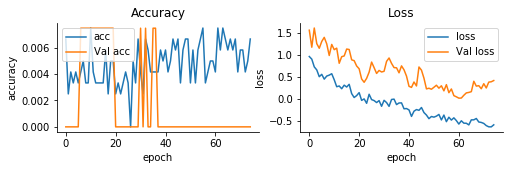

In [236]:
plot_training_curves(history.history)

In [237]:
score = model.evaluate(test_vecs_w2v,y_test["sentimentscore"], batch_size=128, verbose=2)


In [238]:
print (score[1]*100)

0.597014932879


In [239]:
a= model.predict(test_vecs_w2v)
cx = a.astype(float).flatten()
from sklearn.metrics.pairwise import cosine_similarity
cx= cx.reshape(1,-1)
cy= y_test['sentimentscore'].reshape(1,-1)

C:\Users\PRPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [240]:
cosine_similarity(cx,cy)

array([[ 0.46058743]])

In [277]:
x_test1['Sentimentscore']=y_test1['sentimentscore']
x_test1['Prediction']=a


In [278]:
Finaloutput1 = x_test1.drop('merged_spans', 1)
Finaloutput1 = Finaloutput1.drop('tokenized_sents', 1)

In [279]:
Finaloutput1.head(15)

cashtag                  id  \
447    $HZNP  719573068864032768   
752    $NEPT            14646229   
1133    $PNC             7211448   
546    $AAPL             7764961   
1644    $ELN            32427089   
138    $YHOO  719619301754273792   
577    $TSLA  719640388731068416   
72      $FXP             5588045   
349     $AGN  719578962985381888   
296     $WMB            23970758   
496    $SBUX  719839353325756416   
494    $BIDU             5409344   
803     $KCG             8961086   
215    $DGAZ            29835080   
1486    $FRO            37546841   

                                                  spans      source  \
447   [plus its Irish based,  getting rid of its gen...     twitter   
752               [gets a patent and goes up .20 today]  stocktwits   
1133                        [Dividend Hike Green Light]  stocktwits   
546                [Added., Bounce off of, for ride to]  stocktwits   
1644            [Quality Stocks With High Cash Returns]  stocktwits   
138         [Bad governance, not confident in core biz]     twitter   
577                                          [Bullshit]     twitter   
72                         [Add to $FXP $SKF positions]  stocktwits   
349            [I'll take the other side of that trade]     twitter   
296   [New recommendation from Carl Kirst of BMO Cap...  stocktwits   
496   [downgraded to neutral at Deutsche Bank, Price...     twitter   
494                     [trying to drag $bidu with it.]  stocktwits   
803                          [Receivable going to zero]  stocktwits   
215   [Looks like that support line around 24.90 hel...  stocktwits   
1486                            [then shorted it down.]  stocktwits   

      Sentimentscore  Prediction  
447            0.226    0.160435  
752            0.432   -0.359210  
1133           0.316    0.321628  
546            0.470    0.619765  
1644           0.274    0.512970  
138           -0.331   -0.522870  
577           -0.209   -0.229612  
72             0.500    0.526336  
349            0.422    0.296357  
296            0.566   -0.422276  
496           -0.446    0.089286  
494           -0.524   -0.744655  
803           -0.343   -0.105920  
215            0.331    0.413007  
1486          -0.405   -0.706777

# Model2 -  MPL model with sentiment score 0 and 1

In [241]:
model2 = Sequential()
model2.add(Dense(32, activation='tanh', input_dim=input_dim))
model2.add(Dense(64, activation='tanh', input_dim=input_dim))
model2.add(Dense(64, activation='tanh', input_dim=input_dim))
model2.add(Dropout(0.2))
model2.add(Dense(120, activation='tanh', input_dim=input_dim))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='tanh', input_dim=input_dim))
model2.add(Dense(32, activation='tanh', input_dim=input_dim))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='tanh'))
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [246]:
history2= model2.fit(train_vecs_w2v, y_train["new_senti"],  validation_data=(valid_vecs_w2v, y_valid["new_senti"]) , epochs=75, batch_size=120, verbose=2)

Train on 1204 samples, validate on 134 samples
Epoch 1/75
0s - loss: 0.2214 - acc: 0.6354 - val_loss: 2.1999 - val_acc: 0.6119
Epoch 2/75
0s - loss: 0.1929 - acc: 0.6420 - val_loss: 2.4638 - val_acc: 0.5970
Epoch 3/75
0s - loss: 0.1987 - acc: 0.6420 - val_loss: 2.4793 - val_acc: 0.5821
Epoch 4/75
0s - loss: 0.1927 - acc: 0.6445 - val_loss: 2.5933 - val_acc: 0.5821
Epoch 5/75
0s - loss: 0.1848 - acc: 0.6420 - val_loss: 2.5938 - val_acc: 0.5821
Epoch 6/75
0s - loss: 0.1783 - acc: 0.6453 - val_loss: 2.5903 - val_acc: 0.5821
Epoch 7/75
0s - loss: 0.1944 - acc: 0.6404 - val_loss: 2.7088 - val_acc: 0.5672
Epoch 8/75
0s - loss: 0.1973 - acc: 0.6420 - val_loss: 2.5840 - val_acc: 0.5821
Epoch 9/75
0s - loss: 0.2083 - acc: 0.6362 - val_loss: 2.5087 - val_acc: 0.5896
Epoch 10/75
0s - loss: 0.2100 - acc: 0.6362 - val_loss: 2.5116 - val_acc: 0.5746
Epoch 11/75
0s - loss: 0.2147 - acc: 0.6370 - val_loss: 2.6139 - val_acc: 0.5672
Epoch 12/75
0s - loss: 0.2100 - acc: 0.6379 - val_loss: 2.5003 - val_ac

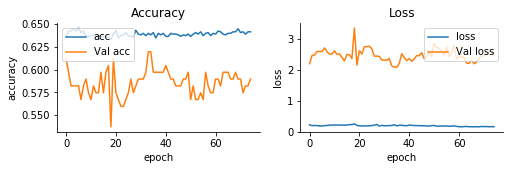

In [248]:
plot_training_curves(history2.history)

In [249]:
score2 = model2.evaluate(test_vecs_w2v,y_test["new_senti"], batch_size=128, verbose=2)


In [250]:
print (score2[1]*100)

55.2238812198


In [251]:
a2= model2.predict(test_vecs_w2v)
cx = a2.astype(float).flatten()
from sklearn.metrics.pairwise import cosine_similarity
cx= cx.reshape(1,-1)
cy= y_test['new_senti'].reshape(1,-1)

C:\Users\PRPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [252]:
cosine_similarity(cx,cy)

array([[ 0.55062247]])

In [258]:
a2.shape

(335, 1)

In [266]:
x_test1['Sentimentscore']=y_test1['sentimentscore']
x_test1['Prediction']=a2


In [269]:
Finaloutput = x_test1.drop('merged_spans', 1)
Finaloutput = Finaloutput.drop('tokenized_sents', 1)

In [276]:
Finaloutput.head(15)

cashtag                  id  \
447    $HZNP  719573068864032768   
752    $NEPT            14646229   
1133    $PNC             7211448   
546    $AAPL             7764961   
1644    $ELN            32427089   
138    $YHOO  719619301754273792   
577    $TSLA  719640388731068416   
72      $FXP             5588045   
349     $AGN  719578962985381888   
296     $WMB            23970758   
496    $SBUX  719839353325756416   
494    $BIDU             5409344   
803     $KCG             8961086   
215    $DGAZ            29835080   
1486    $FRO            37546841   

                                                  spans      source  \
447   [plus its Irish based,  getting rid of its gen...     twitter   
752               [gets a patent and goes up .20 today]  stocktwits   
1133                        [Dividend Hike Green Light]  stocktwits   
546                [Added., Bounce off of, for ride to]  stocktwits   
1644            [Quality Stocks With High Cash Returns]  stocktwits   
138         [Bad governance, not confident in core biz]     twitter   
577                                          [Bullshit]     twitter   
72                         [Add to $FXP $SKF positions]  stocktwits   
349            [I'll take the other side of that trade]     twitter   
296   [New recommendation from Carl Kirst of BMO Cap...  stocktwits   
496   [downgraded to neutral at Deutsche Bank, Price...     twitter   
494                     [trying to drag $bidu with it.]  stocktwits   
803                          [Receivable going to zero]  stocktwits   
215   [Looks like that support line around 24.90 hel...  stocktwits   
1486                            [then shorted it down.]  stocktwits   

      Sentimentscore  Prediction  
447            0.226    0.999402  
752            0.432    0.882515  
1133           0.316    0.999395  
546            0.470    0.999403  
1644           0.274    0.999396  
138           -0.331   -0.997176  
577           -0.209    0.872595  
72             0.500    0.999405  
349            0.422    0.999404  
296            0.566    0.999403  
496           -0.446    0.999122  
494           -0.524   -0.997212  
803           -0.343    0.999399  
215            0.331    0.999400  
1486          -0.405   -0.997120